In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [32]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data =  EMNISTDataProvider('test', batch_size=15800, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f7bcd26d908>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f7c001c62b0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f7c001c62b0>)


In [3]:
def evaluation_acc(dataset, model):
    for inputs, targets in dataset:
        activations = model.fprop(inputs, evaluation=True)
        predictions = activations[-1]
        acc = (predictions.argmax(-1) == targets.argmax(-1)).mean()
    return acc

In [4]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule, AdamLearningRule
from mlp.optimisers import Optimiser
from collections import OrderedDict

In [5]:
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
error = CrossEntropySoftmaxError()
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

## Adam

### initial coarse experiments

Epoch 1: 5.2s to complete
    error(train)=7.84e-01, acc(train)=7.58e-01, error(valid)=8.04e-01, acc(valid)=7.54e-01


Epoch 2: 5.7s to complete
    error(train)=5.93e-01, acc(train)=8.10e-01, error(valid)=6.28e-01, acc(valid)=7.99e-01


Epoch 3: 5.7s to complete
    error(train)=5.13e-01, acc(train)=8.31e-01, error(valid)=5.61e-01, acc(valid)=8.18e-01


Epoch 4: 6.2s to complete
    error(train)=4.69e-01, acc(train)=8.43e-01, error(valid)=5.41e-01, acc(valid)=8.24e-01


Epoch 5: 5.7s to complete
    error(train)=4.44e-01, acc(train)=8.47e-01, error(valid)=5.25e-01, acc(valid)=8.28e-01


Epoch 6: 5.7s to complete
    error(train)=4.31e-01, acc(train)=8.51e-01, error(valid)=5.34e-01, acc(valid)=8.25e-01


Epoch 7: 5.0s to complete
    error(train)=3.96e-01, acc(train)=8.62e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


Epoch 8: 4.8s to complete
    error(train)=3.92e-01, acc(train)=8.62e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 9: 5.1s to complete
    error(train)=3.64e-01, acc(train)=8.70e-01, error(valid)=5.11e-01, acc(valid)=8.38e-01


Epoch 10: 5.4s to complete
    error(train)=3.72e-01, acc(train)=8.68e-01, error(valid)=5.30e-01, acc(valid)=8.33e-01


Epoch 11: 5.7s to complete
    error(train)=3.48e-01, acc(train)=8.75e-01, error(valid)=5.29e-01, acc(valid)=8.32e-01


Epoch 12: 6.0s to complete
    error(train)=3.29e-01, acc(train)=8.81e-01, error(valid)=5.22e-01, acc(valid)=8.38e-01


Epoch 13: 5.8s to complete
    error(train)=3.21e-01, acc(train)=8.83e-01, error(valid)=5.31e-01, acc(valid)=8.38e-01


Epoch 14: 6.1s to complete
    error(train)=3.13e-01, acc(train)=8.86e-01, error(valid)=5.32e-01, acc(valid)=8.37e-01


Epoch 15: 7.4s to complete
    error(train)=3.10e-01, acc(train)=8.86e-01, error(valid)=5.54e-01, acc(valid)=8.35e-01


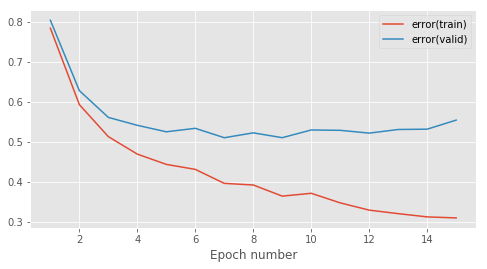

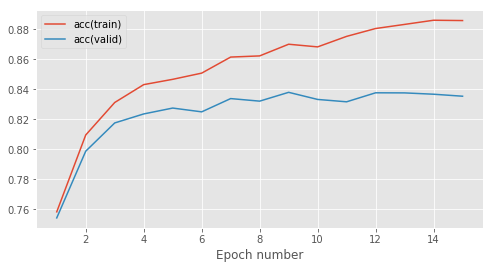

Epoch 1: 6.3s to complete
    error(train)=8.12e-01, acc(train)=7.46e-01, error(valid)=8.30e-01, acc(valid)=7.43e-01


Epoch 2: 6.5s to complete
    error(train)=6.03e-01, acc(train)=8.05e-01, error(valid)=6.43e-01, acc(valid)=7.95e-01


Epoch 3: 5.2s to complete
    error(train)=5.31e-01, acc(train)=8.27e-01, error(valid)=5.86e-01, acc(valid)=8.13e-01


Epoch 4: 5.9s to complete
    error(train)=4.94e-01, acc(train)=8.35e-01, error(valid)=5.70e-01, acc(valid)=8.14e-01


Epoch 5: 6.1s to complete
    error(train)=4.63e-01, acc(train)=8.40e-01, error(valid)=5.54e-01, acc(valid)=8.16e-01


Epoch 6: 6.4s to complete
    error(train)=4.23e-01, acc(train)=8.54e-01, error(valid)=5.26e-01, acc(valid)=8.28e-01


Epoch 7: 6.7s to complete
    error(train)=4.12e-01, acc(train)=8.57e-01, error(valid)=5.37e-01, acc(valid)=8.23e-01


Epoch 8: 5.6s to complete
    error(train)=3.85e-01, acc(train)=8.65e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 9: 5.8s to complete
    error(train)=3.67e-01, acc(train)=8.70e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 10: 5.7s to complete
    error(train)=3.55e-01, acc(train)=8.73e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 11: 6.0s to complete
    error(train)=3.45e-01, acc(train)=8.76e-01, error(valid)=5.31e-01, acc(valid)=8.34e-01


Epoch 12: 6.9s to complete
    error(train)=3.25e-01, acc(train)=8.82e-01, error(valid)=5.22e-01, acc(valid)=8.37e-01


Epoch 13: 6.7s to complete
    error(train)=3.28e-01, acc(train)=8.81e-01, error(valid)=5.49e-01, acc(valid)=8.32e-01


Epoch 14: 6.5s to complete
    error(train)=3.16e-01, acc(train)=8.83e-01, error(valid)=5.37e-01, acc(valid)=8.32e-01


Epoch 15: 5.9s to complete
    error(train)=3.05e-01, acc(train)=8.88e-01, error(valid)=5.56e-01, acc(valid)=8.33e-01


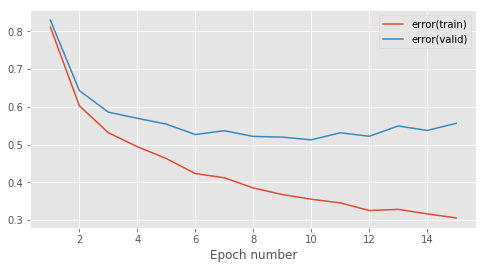

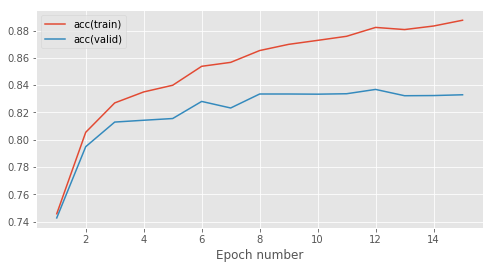

Epoch 1: 4.9s to complete
    error(train)=7.75e-01, acc(train)=7.61e-01, error(valid)=8.04e-01, acc(valid)=7.53e-01


Epoch 2: 5.7s to complete
    error(train)=5.93e-01, acc(train)=8.10e-01, error(valid)=6.32e-01, acc(valid)=7.99e-01


Epoch 3: 5.9s to complete
    error(train)=5.26e-01, acc(train)=8.22e-01, error(valid)=5.82e-01, acc(valid)=8.08e-01


Epoch 4: 6.0s to complete
    error(train)=4.85e-01, acc(train)=8.37e-01, error(valid)=5.63e-01, acc(valid)=8.16e-01


Epoch 5: 6.2s to complete
    error(train)=4.45e-01, acc(train)=8.49e-01, error(valid)=5.35e-01, acc(valid)=8.24e-01


Epoch 6: 5.8s to complete
    error(train)=4.11e-01, acc(train)=8.58e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 7: 6.3s to complete
    error(train)=3.88e-01, acc(train)=8.64e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


Epoch 8: 5.7s to complete
    error(train)=4.02e-01, acc(train)=8.57e-01, error(valid)=5.33e-01, acc(valid)=8.24e-01


Epoch 9: 7.0s to complete
    error(train)=3.81e-01, acc(train)=8.64e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 10: 6.0s to complete
    error(train)=3.62e-01, acc(train)=8.70e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 11: 5.9s to complete
    error(train)=3.32e-01, acc(train)=8.80e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


Epoch 12: 6.2s to complete
    error(train)=3.39e-01, acc(train)=8.77e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 13: 5.9s to complete
    error(train)=3.07e-01, acc(train)=8.86e-01, error(valid)=4.95e-01, acc(valid)=8.42e-01


Epoch 14: 5.5s to complete
    error(train)=3.06e-01, acc(train)=8.87e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 15: 5.8s to complete
    error(train)=2.92e-01, acc(train)=8.92e-01, error(valid)=5.17e-01, acc(valid)=8.40e-01


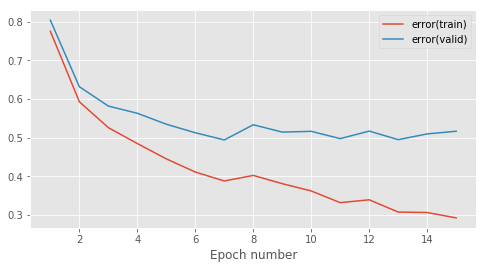

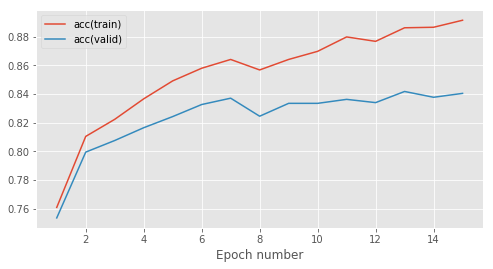

Epoch 1: 6.1s to complete
    error(train)=7.82e-01, acc(train)=7.54e-01, error(valid)=8.05e-01, acc(valid)=7.49e-01


Epoch 2: 6.6s to complete
    error(train)=6.01e-01, acc(train)=8.06e-01, error(valid)=6.40e-01, acc(valid)=7.94e-01


Epoch 3: 5.6s to complete
    error(train)=5.32e-01, acc(train)=8.23e-01, error(valid)=5.92e-01, acc(valid)=8.07e-01


Epoch 4: 6.2s to complete
    error(train)=4.97e-01, acc(train)=8.32e-01, error(valid)=5.74e-01, acc(valid)=8.11e-01


Epoch 5: 6.0s to complete
    error(train)=4.66e-01, acc(train)=8.42e-01, error(valid)=5.55e-01, acc(valid)=8.20e-01


Epoch 6: 5.8s to complete
    error(train)=4.43e-01, acc(train)=8.47e-01, error(valid)=5.40e-01, acc(valid)=8.23e-01


Epoch 7: 5.6s to complete
    error(train)=4.21e-01, acc(train)=8.50e-01, error(valid)=5.35e-01, acc(valid)=8.25e-01


Epoch 8: 5.4s to complete
    error(train)=4.07e-01, acc(train)=8.56e-01, error(valid)=5.34e-01, acc(valid)=8.23e-01


Epoch 9: 6.0s to complete
    error(train)=3.68e-01, acc(train)=8.68e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


Epoch 10: 5.9s to complete
    error(train)=3.63e-01, acc(train)=8.70e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 11: 5.8s to complete
    error(train)=3.42e-01, acc(train)=8.76e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


Epoch 12: 6.0s to complete
    error(train)=3.35e-01, acc(train)=8.77e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 13: 6.5s to complete
    error(train)=3.26e-01, acc(train)=8.81e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


Epoch 14: 6.5s to complete
    error(train)=3.09e-01, acc(train)=8.87e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


Epoch 15: 5.0s to complete
    error(train)=3.13e-01, acc(train)=8.85e-01, error(valid)=5.26e-01, acc(valid)=8.35e-01


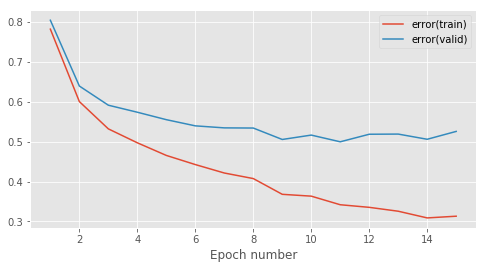

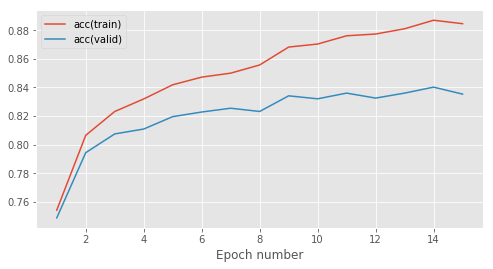

Epoch 1: 6.5s to complete
    error(train)=8.00e-01, acc(train)=7.48e-01, error(valid)=8.14e-01, acc(valid)=7.47e-01


Epoch 2: 6.2s to complete
    error(train)=6.16e-01, acc(train)=8.04e-01, error(valid)=6.52e-01, acc(valid)=7.95e-01


Epoch 3: 6.1s to complete
    error(train)=5.23e-01, acc(train)=8.28e-01, error(valid)=5.72e-01, acc(valid)=8.17e-01


Epoch 4: 5.1s to complete
    error(train)=4.82e-01, acc(train)=8.37e-01, error(valid)=5.53e-01, acc(valid)=8.19e-01


Epoch 5: 7.4s to complete
    error(train)=4.42e-01, acc(train)=8.49e-01, error(valid)=5.28e-01, acc(valid)=8.25e-01


Epoch 6: 6.2s to complete
    error(train)=4.37e-01, acc(train)=8.48e-01, error(valid)=5.35e-01, acc(valid)=8.25e-01


Epoch 7: 6.9s to complete
    error(train)=4.13e-01, acc(train)=8.57e-01, error(valid)=5.23e-01, acc(valid)=8.27e-01


Epoch 8: 6.3s to complete
    error(train)=3.89e-01, acc(train)=8.63e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 9: 6.7s to complete
    error(train)=3.63e-01, acc(train)=8.70e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 10: 7.4s to complete
    error(train)=3.57e-01, acc(train)=8.73e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 11: 6.1s to complete
    error(train)=3.44e-01, acc(train)=8.77e-01, error(valid)=5.25e-01, acc(valid)=8.37e-01


Epoch 12: 5.6s to complete
    error(train)=3.47e-01, acc(train)=8.76e-01, error(valid)=5.45e-01, acc(valid)=8.30e-01


Epoch 13: 6.5s to complete
    error(train)=3.25e-01, acc(train)=8.81e-01, error(valid)=5.24e-01, acc(valid)=8.36e-01


Epoch 14: 6.3s to complete
    error(train)=3.16e-01, acc(train)=8.81e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


Epoch 15: 7.1s to complete
    error(train)=3.16e-01, acc(train)=8.83e-01, error(valid)=5.44e-01, acc(valid)=8.33e-01


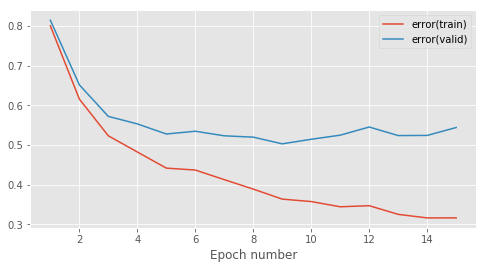

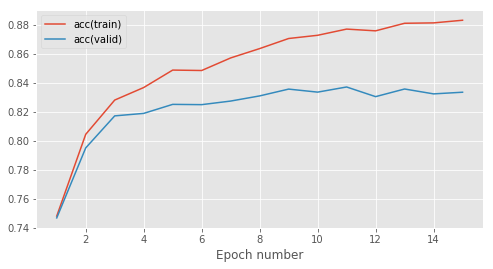

Epoch 1: 5.3s to complete
    error(train)=7.63e-01, acc(train)=7.66e-01, error(valid)=7.89e-01, acc(valid)=7.59e-01


Epoch 2: 5.2s to complete
    error(train)=6.17e-01, acc(train)=7.99e-01, error(valid)=6.53e-01, acc(valid)=7.87e-01


Epoch 3: 5.0s to complete
    error(train)=5.35e-01, acc(train)=8.20e-01, error(valid)=5.88e-01, acc(valid)=8.06e-01


Epoch 4: 6.1s to complete
    error(train)=4.76e-01, acc(train)=8.39e-01, error(valid)=5.49e-01, acc(valid)=8.19e-01


Epoch 5: 5.6s to complete
    error(train)=4.46e-01, acc(train)=8.48e-01, error(valid)=5.29e-01, acc(valid)=8.27e-01


Epoch 6: 6.1s to complete
    error(train)=4.16e-01, acc(train)=8.54e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 7: 5.7s to complete
    error(train)=4.04e-01, acc(train)=8.59e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


Epoch 8: 5.8s to complete
    error(train)=3.96e-01, acc(train)=8.61e-01, error(valid)=5.29e-01, acc(valid)=8.31e-01


Epoch 9: 6.7s to complete
    error(train)=3.54e-01, acc(train)=8.76e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 10: 5.6s to complete
    error(train)=3.52e-01, acc(train)=8.74e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


Epoch 11: 6.8s to complete
    error(train)=3.35e-01, acc(train)=8.79e-01, error(valid)=5.12e-01, acc(valid)=8.38e-01


Epoch 12: 6.2s to complete
    error(train)=3.35e-01, acc(train)=8.79e-01, error(valid)=5.32e-01, acc(valid)=8.34e-01


Epoch 13: 6.5s to complete
    error(train)=3.22e-01, acc(train)=8.82e-01, error(valid)=5.30e-01, acc(valid)=8.35e-01


Epoch 14: 7.4s to complete
    error(train)=3.11e-01, acc(train)=8.87e-01, error(valid)=5.43e-01, acc(valid)=8.37e-01


Epoch 15: 6.1s to complete
    error(train)=3.09e-01, acc(train)=8.87e-01, error(valid)=5.34e-01, acc(valid)=8.33e-01


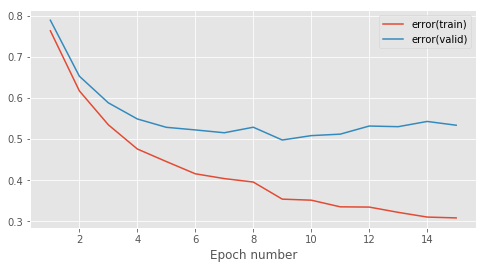

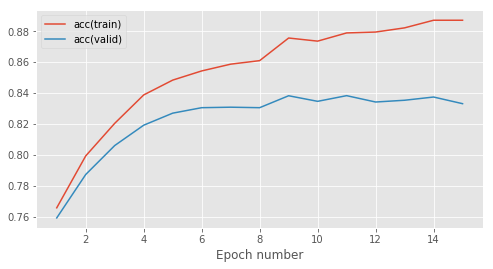

Epoch 1: 5.7s to complete
    error(train)=7.55e-01, acc(train)=7.66e-01, error(valid)=7.80e-01, acc(valid)=7.59e-01


Epoch 2: 5.2s to complete
    error(train)=6.29e-01, acc(train)=7.94e-01, error(valid)=6.71e-01, acc(valid)=7.82e-01


Epoch 3: 5.6s to complete
    error(train)=5.15e-01, acc(train)=8.29e-01, error(valid)=5.74e-01, acc(valid)=8.14e-01


Epoch 4: 5.9s to complete
    error(train)=4.67e-01, acc(train)=8.40e-01, error(valid)=5.41e-01, acc(valid)=8.21e-01


Epoch 5: 6.5s to complete
    error(train)=4.60e-01, acc(train)=8.41e-01, error(valid)=5.47e-01, acc(valid)=8.21e-01


Epoch 6: 7.4s to complete
    error(train)=4.13e-01, acc(train)=8.57e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 7: 5.5s to complete
    error(train)=3.92e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 8: 5.6s to complete
    error(train)=3.70e-01, acc(train)=8.70e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


Epoch 9: 6.5s to complete
    error(train)=3.73e-01, acc(train)=8.66e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 10: 6.1s to complete
    error(train)=3.58e-01, acc(train)=8.71e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


Epoch 11: 5.3s to complete
    error(train)=3.44e-01, acc(train)=8.76e-01, error(valid)=5.26e-01, acc(valid)=8.36e-01


Epoch 12: 6.3s to complete
    error(train)=3.09e-01, acc(train)=8.89e-01, error(valid)=4.99e-01, acc(valid)=8.42e-01


Epoch 13: 6.6s to complete
    error(train)=3.09e-01, acc(train)=8.87e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 14: 6.7s to complete
    error(train)=3.25e-01, acc(train)=8.79e-01, error(valid)=5.50e-01, acc(valid)=8.31e-01


Epoch 15: 6.7s to complete
    error(train)=2.93e-01, acc(train)=8.91e-01, error(valid)=5.25e-01, acc(valid)=8.37e-01


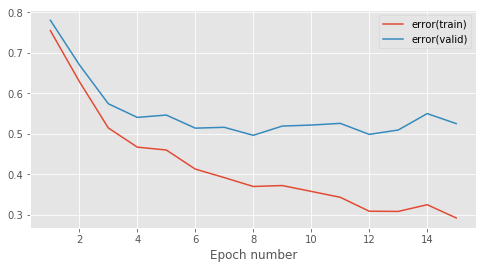

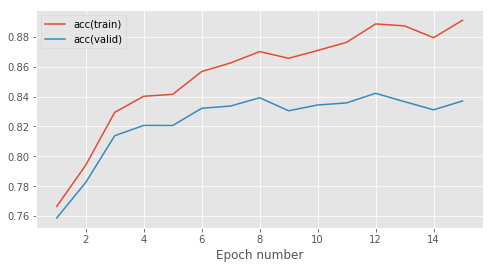

Epoch 1: 6.2s to complete
    error(train)=7.49e-01, acc(train)=7.66e-01, error(valid)=7.66e-01, acc(valid)=7.59e-01


Epoch 2: 6.5s to complete
    error(train)=6.01e-01, acc(train)=8.05e-01, error(valid)=6.43e-01, acc(valid)=7.93e-01


Epoch 3: 5.6s to complete
    error(train)=5.25e-01, acc(train)=8.27e-01, error(valid)=5.82e-01, acc(valid)=8.12e-01


Epoch 4: 5.9s to complete
    error(train)=4.75e-01, acc(train)=8.39e-01, error(valid)=5.43e-01, acc(valid)=8.22e-01


Epoch 5: 7.4s to complete
    error(train)=4.44e-01, acc(train)=8.46e-01, error(valid)=5.23e-01, acc(valid)=8.25e-01


Epoch 6: 5.5s to complete
    error(train)=4.17e-01, acc(train)=8.56e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


Epoch 7: 7.0s to complete
    error(train)=4.05e-01, acc(train)=8.58e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


Epoch 8: 6.2s to complete
    error(train)=3.80e-01, acc(train)=8.65e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


Epoch 9: 5.9s to complete
    error(train)=3.65e-01, acc(train)=8.68e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


Epoch 10: 6.0s to complete
    error(train)=3.54e-01, acc(train)=8.71e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 11: 5.9s to complete
    error(train)=3.37e-01, acc(train)=8.77e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


Epoch 12: 6.0s to complete
    error(train)=3.27e-01, acc(train)=8.81e-01, error(valid)=4.95e-01, acc(valid)=8.41e-01


Epoch 13: 5.3s to complete
    error(train)=3.05e-01, acc(train)=8.88e-01, error(valid)=4.83e-01, acc(valid)=8.45e-01


Epoch 14: 6.5s to complete
    error(train)=3.03e-01, acc(train)=8.86e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


Epoch 15: 5.9s to complete
    error(train)=3.11e-01, acc(train)=8.84e-01, error(valid)=5.12e-01, acc(valid)=8.38e-01


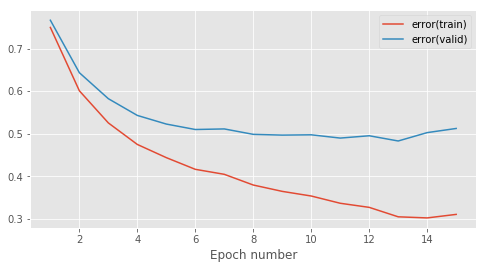

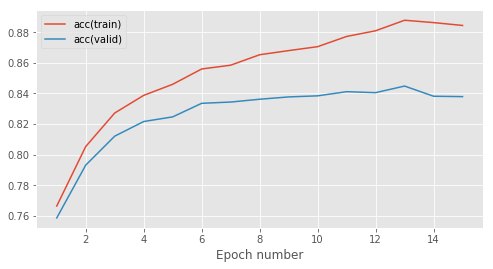

Epoch 1: 5.7s to complete
    error(train)=7.86e-01, acc(train)=7.57e-01, error(valid)=8.05e-01, acc(valid)=7.51e-01


Epoch 2: 4.9s to complete
    error(train)=6.10e-01, acc(train)=8.01e-01, error(valid)=6.53e-01, acc(valid)=7.92e-01


Epoch 3: 5.1s to complete
    error(train)=5.37e-01, acc(train)=8.22e-01, error(valid)=5.92e-01, acc(valid)=8.09e-01


Epoch 4: 6.2s to complete
    error(train)=4.79e-01, acc(train)=8.33e-01, error(valid)=5.55e-01, acc(valid)=8.13e-01


Epoch 5: 6.0s to complete
    error(train)=4.48e-01, acc(train)=8.46e-01, error(valid)=5.43e-01, acc(valid)=8.21e-01


Epoch 6: 5.3s to complete
    error(train)=4.21e-01, acc(train)=8.52e-01, error(valid)=5.31e-01, acc(valid)=8.24e-01


Epoch 7: 5.5s to complete
    error(train)=3.90e-01, acc(train)=8.62e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 8: 6.6s to complete
    error(train)=3.85e-01, acc(train)=8.63e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 9: 6.7s to complete
    error(train)=3.74e-01, acc(train)=8.66e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 10: 6.0s to complete
    error(train)=3.49e-01, acc(train)=8.74e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 11: 6.5s to complete
    error(train)=3.44e-01, acc(train)=8.76e-01, error(valid)=5.28e-01, acc(valid)=8.34e-01


Epoch 12: 6.2s to complete
    error(train)=3.18e-01, acc(train)=8.85e-01, error(valid)=5.22e-01, acc(valid)=8.38e-01


Epoch 13: 6.2s to complete
    error(train)=3.33e-01, acc(train)=8.77e-01, error(valid)=5.47e-01, acc(valid)=8.29e-01


Epoch 14: 5.8s to complete
    error(train)=3.22e-01, acc(train)=8.82e-01, error(valid)=5.71e-01, acc(valid)=8.33e-01


Epoch 15: 6.4s to complete
    error(train)=3.11e-01, acc(train)=8.85e-01, error(valid)=5.68e-01, acc(valid)=8.35e-01


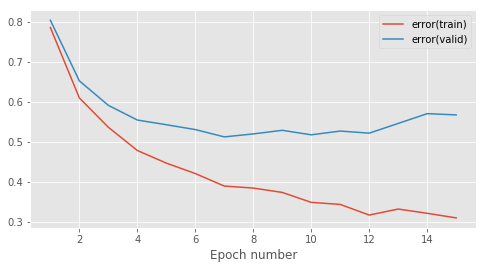

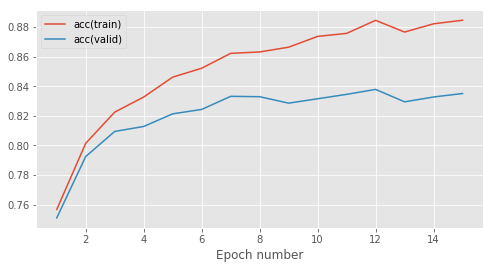

Epoch 1: 6.2s to complete
    error(train)=7.71e-01, acc(train)=7.59e-01, error(valid)=7.90e-01, acc(valid)=7.51e-01


Epoch 2: 5.5s to complete
    error(train)=5.96e-01, acc(train)=8.05e-01, error(valid)=6.33e-01, acc(valid)=7.95e-01


Epoch 3: 5.4s to complete
    error(train)=5.50e-01, acc(train)=8.17e-01, error(valid)=6.00e-01, acc(valid)=8.03e-01


Epoch 4: 5.9s to complete
    error(train)=4.81e-01, acc(train)=8.39e-01, error(valid)=5.53e-01, acc(valid)=8.20e-01


Epoch 5: 5.2s to complete
    error(train)=4.54e-01, acc(train)=8.45e-01, error(valid)=5.44e-01, acc(valid)=8.22e-01


Epoch 6: 5.3s to complete
    error(train)=4.21e-01, acc(train)=8.55e-01, error(valid)=5.21e-01, acc(valid)=8.24e-01


Epoch 7: 5.2s to complete
    error(train)=4.14e-01, acc(train)=8.54e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


Epoch 8: 5.7s to complete
    error(train)=3.82e-01, acc(train)=8.65e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


Epoch 9: 5.9s to complete
    error(train)=3.71e-01, acc(train)=8.67e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


Epoch 10: 6.4s to complete
    error(train)=3.63e-01, acc(train)=8.69e-01, error(valid)=5.19e-01, acc(valid)=8.29e-01


Epoch 11: 6.0s to complete
    error(train)=3.56e-01, acc(train)=8.71e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


Epoch 12: 5.6s to complete
    error(train)=3.41e-01, acc(train)=8.76e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


Epoch 13: 6.0s to complete
    error(train)=3.27e-01, acc(train)=8.80e-01, error(valid)=5.41e-01, acc(valid)=8.32e-01


Epoch 14: 5.9s to complete
    error(train)=3.22e-01, acc(train)=8.81e-01, error(valid)=5.50e-01, acc(valid)=8.32e-01


Epoch 15: 6.0s to complete
    error(train)=3.30e-01, acc(train)=8.78e-01, error(valid)=5.72e-01, acc(valid)=8.23e-01


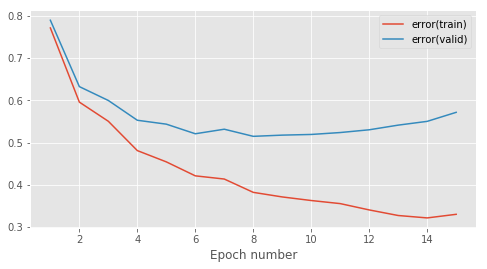

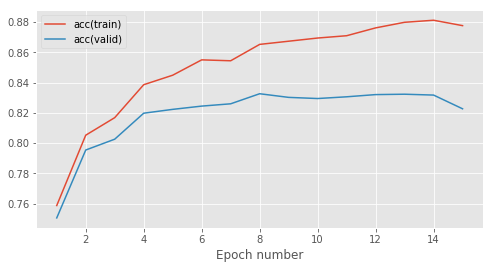

Epoch 1: 5.6s to complete
    error(train)=7.71e-01, acc(train)=7.61e-01, error(valid)=7.97e-01, acc(valid)=7.55e-01


Epoch 2: 5.5s to complete
    error(train)=6.13e-01, acc(train)=8.03e-01, error(valid)=6.53e-01, acc(valid)=7.92e-01


Epoch 3: 5.9s to complete
    error(train)=5.34e-01, acc(train)=8.23e-01, error(valid)=5.94e-01, acc(valid)=8.06e-01


Epoch 4: 6.3s to complete
    error(train)=4.85e-01, acc(train)=8.35e-01, error(valid)=5.62e-01, acc(valid)=8.12e-01


Epoch 5: 6.2s to complete
    error(train)=4.57e-01, acc(train)=8.43e-01, error(valid)=5.46e-01, acc(valid)=8.15e-01


Epoch 6: 6.0s to complete
    error(train)=4.09e-01, acc(train)=8.60e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 7: 5.3s to complete
    error(train)=4.11e-01, acc(train)=8.55e-01, error(valid)=5.36e-01, acc(valid)=8.25e-01


Epoch 8: 6.6s to complete
    error(train)=3.72e-01, acc(train)=8.67e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


Epoch 9: 6.7s to complete
    error(train)=3.65e-01, acc(train)=8.70e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 10: 5.7s to complete
    error(train)=3.54e-01, acc(train)=8.73e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 11: 5.6s to complete
    error(train)=3.46e-01, acc(train)=8.75e-01, error(valid)=5.33e-01, acc(valid)=8.31e-01


Epoch 12: 6.7s to complete
    error(train)=3.21e-01, acc(train)=8.82e-01, error(valid)=5.16e-01, acc(valid)=8.37e-01


Epoch 13: 5.9s to complete
    error(train)=3.12e-01, acc(train)=8.84e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 14: 5.9s to complete
    error(train)=3.05e-01, acc(train)=8.88e-01, error(valid)=5.33e-01, acc(valid)=8.36e-01


Epoch 15: 5.8s to complete
    error(train)=3.00e-01, acc(train)=8.87e-01, error(valid)=5.41e-01, acc(valid)=8.31e-01


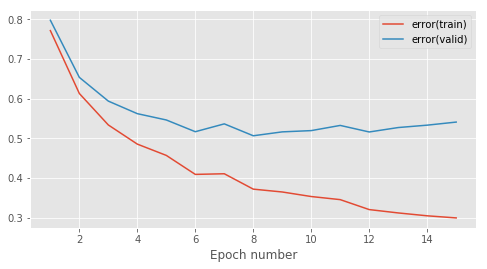

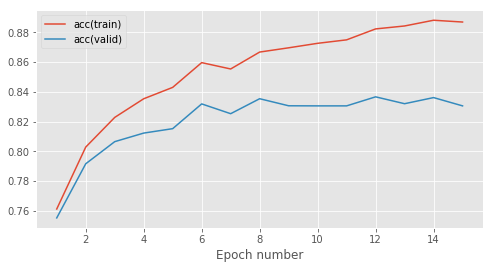

Epoch 1: 5.3s to complete
    error(train)=7.31e-01, acc(train)=7.74e-01, error(valid)=7.57e-01, acc(valid)=7.68e-01


Epoch 2: 5.9s to complete
    error(train)=5.91e-01, acc(train)=8.09e-01, error(valid)=6.31e-01, acc(valid)=7.97e-01


Epoch 3: 5.1s to complete
    error(train)=5.23e-01, acc(train)=8.22e-01, error(valid)=5.80e-01, acc(valid)=8.07e-01


Epoch 4: 6.2s to complete
    error(train)=4.70e-01, acc(train)=8.37e-01, error(valid)=5.38e-01, acc(valid)=8.22e-01


Epoch 5: 5.5s to complete
    error(train)=4.52e-01, acc(train)=8.42e-01, error(valid)=5.43e-01, acc(valid)=8.21e-01


Epoch 6: 5.6s to complete
    error(train)=4.21e-01, acc(train)=8.54e-01, error(valid)=5.14e-01, acc(valid)=8.30e-01


Epoch 7: 6.3s to complete
    error(train)=4.01e-01, acc(train)=8.58e-01, error(valid)=5.18e-01, acc(valid)=8.27e-01


Epoch 8: 7.0s to complete
    error(train)=3.80e-01, acc(train)=8.65e-01, error(valid)=5.14e-01, acc(valid)=8.27e-01


Epoch 9: 6.6s to complete
    error(train)=3.67e-01, acc(train)=8.68e-01, error(valid)=5.09e-01, acc(valid)=8.32e-01


Epoch 10: 6.3s to complete
    error(train)=3.48e-01, acc(train)=8.77e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 11: 5.3s to complete
    error(train)=3.32e-01, acc(train)=8.80e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 12: 6.3s to complete
    error(train)=3.34e-01, acc(train)=8.77e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 13: 6.5s to complete
    error(train)=3.19e-01, acc(train)=8.82e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 14: 5.8s to complete
    error(train)=3.01e-01, acc(train)=8.88e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 15: 5.3s to complete
    error(train)=3.03e-01, acc(train)=8.87e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


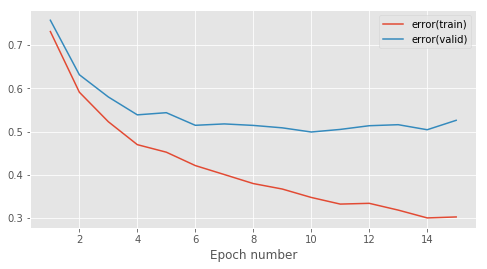

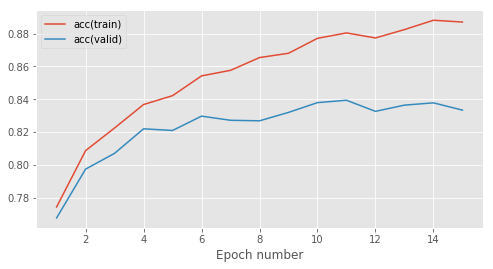

Epoch 1: 6.2s to complete
    error(train)=7.83e-01, acc(train)=7.55e-01, error(valid)=7.99e-01, acc(valid)=7.50e-01


Epoch 2: 5.8s to complete
    error(train)=6.13e-01, acc(train)=8.01e-01, error(valid)=6.45e-01, acc(valid)=7.92e-01


Epoch 3: 5.7s to complete
    error(train)=5.35e-01, acc(train)=8.24e-01, error(valid)=5.87e-01, acc(valid)=8.10e-01


Epoch 4: 6.0s to complete
    error(train)=4.78e-01, acc(train)=8.40e-01, error(valid)=5.42e-01, acc(valid)=8.22e-01


Epoch 5: 5.6s to complete
    error(train)=4.50e-01, acc(train)=8.48e-01, error(valid)=5.31e-01, acc(valid)=8.26e-01


Epoch 6: 5.9s to complete
    error(train)=4.22e-01, acc(train)=8.54e-01, error(valid)=5.12e-01, acc(valid)=8.31e-01


Epoch 7: 5.6s to complete
    error(train)=4.14e-01, acc(train)=8.57e-01, error(valid)=5.23e-01, acc(valid)=8.27e-01


Epoch 8: 6.5s to complete
    error(train)=3.86e-01, acc(train)=8.63e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 9: 5.7s to complete
    error(train)=3.71e-01, acc(train)=8.68e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 10: 5.9s to complete
    error(train)=3.68e-01, acc(train)=8.67e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


Epoch 11: 7.3s to complete
    error(train)=3.53e-01, acc(train)=8.71e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 12: 6.4s to complete
    error(train)=3.36e-01, acc(train)=8.77e-01, error(valid)=5.29e-01, acc(valid)=8.33e-01


Epoch 13: 5.8s to complete
    error(train)=3.20e-01, acc(train)=8.83e-01, error(valid)=5.27e-01, acc(valid)=8.36e-01


Epoch 14: 7.5s to complete
    error(train)=3.22e-01, acc(train)=8.80e-01, error(valid)=5.45e-01, acc(valid)=8.28e-01


Epoch 15: 7.0s to complete
    error(train)=3.01e-01, acc(train)=8.88e-01, error(valid)=5.43e-01, acc(valid)=8.35e-01


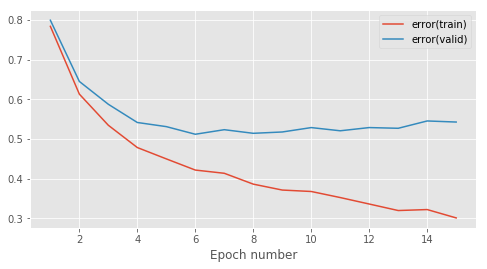

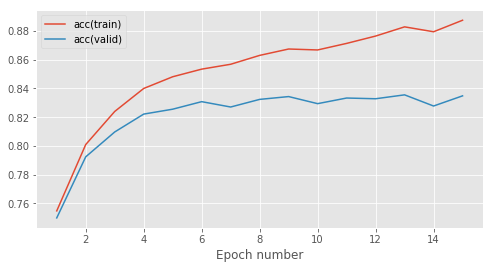

Epoch 1: 5.7s to complete
    error(train)=7.72e-01, acc(train)=7.62e-01, error(valid)=7.93e-01, acc(valid)=7.54e-01


Epoch 2: 5.6s to complete
    error(train)=6.05e-01, acc(train)=8.05e-01, error(valid)=6.44e-01, acc(valid)=7.94e-01


Epoch 3: 5.7s to complete
    error(train)=5.33e-01, acc(train)=8.24e-01, error(valid)=5.93e-01, acc(valid)=8.10e-01


Epoch 4: 5.9s to complete
    error(train)=4.82e-01, acc(train)=8.33e-01, error(valid)=5.52e-01, acc(valid)=8.15e-01


Epoch 5: 6.7s to complete
    error(train)=4.39e-01, acc(train)=8.51e-01, error(valid)=5.21e-01, acc(valid)=8.29e-01


Epoch 6: 6.5s to complete
    error(train)=4.22e-01, acc(train)=8.54e-01, error(valid)=5.17e-01, acc(valid)=8.29e-01


Epoch 7: 6.2s to complete
    error(train)=3.96e-01, acc(train)=8.62e-01, error(valid)=5.10e-01, acc(valid)=8.32e-01


Epoch 8: 5.6s to complete
    error(train)=3.91e-01, acc(train)=8.61e-01, error(valid)=5.19e-01, acc(valid)=8.29e-01


Epoch 9: 5.8s to complete
    error(train)=3.63e-01, acc(train)=8.72e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


Epoch 10: 5.7s to complete
    error(train)=3.52e-01, acc(train)=8.73e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


Epoch 11: 5.6s to complete
    error(train)=3.41e-01, acc(train)=8.76e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 12: 5.7s to complete
    error(train)=3.33e-01, acc(train)=8.79e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 13: 5.7s to complete
    error(train)=3.13e-01, acc(train)=8.84e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 14: 6.4s to complete
    error(train)=3.09e-01, acc(train)=8.86e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


Epoch 15: 6.6s to complete
    error(train)=3.04e-01, acc(train)=8.88e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01


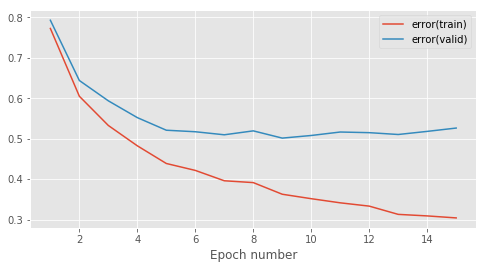

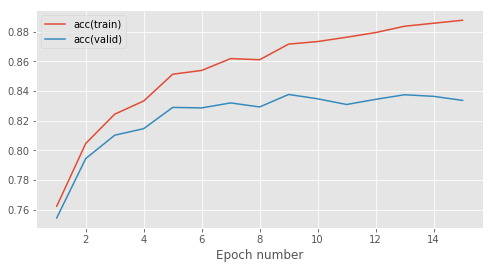

Epoch 1: 6.3s to complete
    error(train)=7.90e-01, acc(train)=7.55e-01, error(valid)=8.16e-01, acc(valid)=7.51e-01


Epoch 2: 5.5s to complete
    error(train)=6.23e-01, acc(train)=7.96e-01, error(valid)=6.62e-01, acc(valid)=7.88e-01


Epoch 3: 6.1s to complete
    error(train)=5.38e-01, acc(train)=8.24e-01, error(valid)=5.98e-01, acc(valid)=8.07e-01


Epoch 4: 6.0s to complete
    error(train)=4.92e-01, acc(train)=8.33e-01, error(valid)=5.64e-01, acc(valid)=8.13e-01


Epoch 5: 5.3s to complete
    error(train)=4.58e-01, acc(train)=8.43e-01, error(valid)=5.49e-01, acc(valid)=8.20e-01


Epoch 6: 6.7s to complete
    error(train)=4.27e-01, acc(train)=8.54e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


Epoch 7: 6.1s to complete
    error(train)=4.01e-01, acc(train)=8.60e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 8: 5.5s to complete
    error(train)=3.82e-01, acc(train)=8.66e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 9: 6.6s to complete
    error(train)=3.72e-01, acc(train)=8.69e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 10: 6.7s to complete
    error(train)=3.51e-01, acc(train)=8.73e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 11: 5.3s to complete
    error(train)=3.52e-01, acc(train)=8.70e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


Epoch 12: 6.1s to complete
    error(train)=3.19e-01, acc(train)=8.82e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


Epoch 13: 6.9s to complete
    error(train)=3.24e-01, acc(train)=8.82e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 14: 5.8s to complete
    error(train)=3.19e-01, acc(train)=8.81e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01


Epoch 15: 5.8s to complete
    error(train)=3.06e-01, acc(train)=8.87e-01, error(valid)=5.34e-01, acc(valid)=8.37e-01


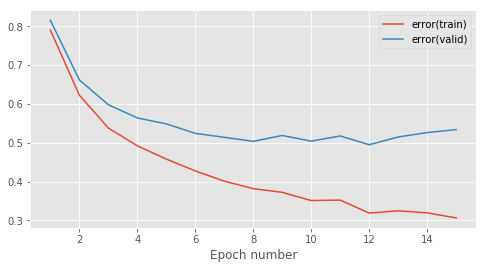

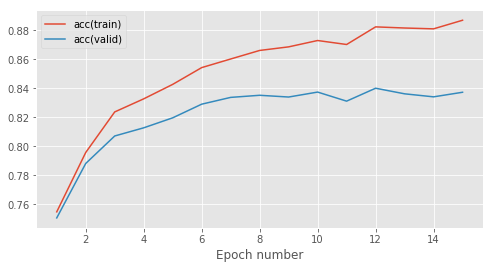

Epoch 1: 6.3s to complete
    error(train)=7.75e-01, acc(train)=7.59e-01, error(valid)=7.98e-01, acc(valid)=7.51e-01


Epoch 2: 5.7s to complete
    error(train)=6.28e-01, acc(train)=7.98e-01, error(valid)=6.67e-01, acc(valid)=7.89e-01


Epoch 3: 6.0s to complete
    error(train)=5.51e-01, acc(train)=8.14e-01, error(valid)=6.03e-01, acc(valid)=7.96e-01


Epoch 4: 6.1s to complete
    error(train)=5.03e-01, acc(train)=8.32e-01, error(valid)=5.66e-01, acc(valid)=8.17e-01


Epoch 5: 6.4s to complete
    error(train)=4.54e-01, acc(train)=8.42e-01, error(valid)=5.37e-01, acc(valid)=8.17e-01


Epoch 6: 6.2s to complete
    error(train)=4.33e-01, acc(train)=8.52e-01, error(valid)=5.28e-01, acc(valid)=8.27e-01


Epoch 7: 5.7s to complete
    error(train)=4.23e-01, acc(train)=8.55e-01, error(valid)=5.31e-01, acc(valid)=8.27e-01


Epoch 8: 5.7s to complete
    error(train)=3.87e-01, acc(train)=8.64e-01, error(valid)=4.99e-01, acc(valid)=8.33e-01


Epoch 9: 5.6s to complete
    error(train)=3.77e-01, acc(train)=8.66e-01, error(valid)=5.12e-01, acc(valid)=8.31e-01


Epoch 10: 5.7s to complete
    error(train)=3.60e-01, acc(train)=8.71e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


Epoch 11: 5.9s to complete
    error(train)=3.51e-01, acc(train)=8.73e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 12: 6.2s to complete
    error(train)=3.41e-01, acc(train)=8.76e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


Epoch 13: 7.1s to complete
    error(train)=3.56e-01, acc(train)=8.70e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


Epoch 14: 6.6s to complete
    error(train)=3.13e-01, acc(train)=8.85e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 15: 5.5s to complete
    error(train)=3.08e-01, acc(train)=8.85e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


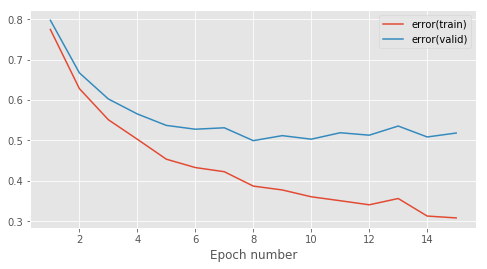

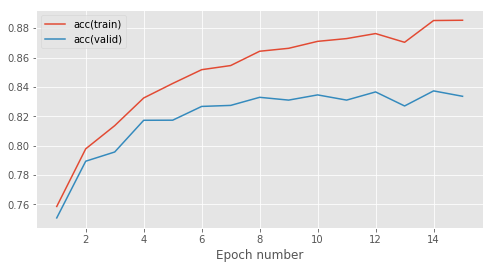

Epoch 1: 5.8s to complete
    error(train)=9.47e-01, acc(train)=7.20e-01, error(valid)=9.58e-01, acc(valid)=7.17e-01


Epoch 2: 6.6s to complete
    error(train)=7.41e-01, acc(train)=7.74e-01, error(valid)=7.60e-01, acc(valid)=7.69e-01


Epoch 3: 6.0s to complete
    error(train)=6.42e-01, acc(train)=7.97e-01, error(valid)=6.78e-01, acc(valid)=7.88e-01


Epoch 4: 6.3s to complete
    error(train)=5.74e-01, acc(train)=8.18e-01, error(valid)=6.22e-01, acc(valid)=8.05e-01


Epoch 5: 5.2s to complete
    error(train)=5.38e-01, acc(train)=8.22e-01, error(valid)=5.98e-01, acc(valid)=8.07e-01


Epoch 6: 6.2s to complete
    error(train)=5.05e-01, acc(train)=8.33e-01, error(valid)=5.73e-01, acc(valid)=8.14e-01


Epoch 7: 6.0s to complete
    error(train)=4.79e-01, acc(train)=8.39e-01, error(valid)=5.60e-01, acc(valid)=8.19e-01


Epoch 8: 5.7s to complete
    error(train)=4.54e-01, acc(train)=8.49e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


Epoch 9: 6.5s to complete
    error(train)=4.37e-01, acc(train)=8.54e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


Epoch 10: 5.7s to complete
    error(train)=4.24e-01, acc(train)=8.56e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


Epoch 11: 5.9s to complete
    error(train)=4.04e-01, acc(train)=8.64e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


Epoch 12: 6.1s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


Epoch 13: 6.8s to complete
    error(train)=3.91e-01, acc(train)=8.66e-01, error(valid)=5.34e-01, acc(valid)=8.31e-01


Epoch 14: 6.0s to complete
    error(train)=3.72e-01, acc(train)=8.70e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


Epoch 15: 5.9s to complete
    error(train)=3.62e-01, acc(train)=8.73e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 16: 5.7s to complete
    error(train)=3.62e-01, acc(train)=8.72e-01, error(valid)=5.34e-01, acc(valid)=8.29e-01


Epoch 17: 5.6s to complete
    error(train)=3.53e-01, acc(train)=8.75e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


Epoch 18: 6.8s to complete
    error(train)=3.38e-01, acc(train)=8.81e-01, error(valid)=5.34e-01, acc(valid)=8.31e-01


Epoch 19: 4.7s to complete
    error(train)=3.19e-01, acc(train)=8.88e-01, error(valid)=5.25e-01, acc(valid)=8.37e-01


Epoch 20: 5.9s to complete
    error(train)=3.17e-01, acc(train)=8.87e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


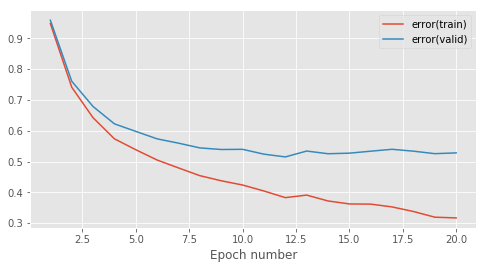

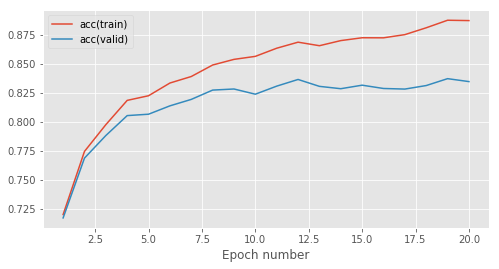

Epoch 1: 5.1s to complete
    error(train)=9.76e-01, acc(train)=7.13e-01, error(valid)=9.87e-01, acc(valid)=7.05e-01


Epoch 2: 5.5s to complete
    error(train)=7.33e-01, acc(train)=7.76e-01, error(valid)=7.51e-01, acc(valid)=7.70e-01


Epoch 3: 5.5s to complete
    error(train)=6.37e-01, acc(train)=7.98e-01, error(valid)=6.72e-01, acc(valid)=7.87e-01


Epoch 4: 5.7s to complete
    error(train)=5.77e-01, acc(train)=8.14e-01, error(valid)=6.26e-01, acc(valid)=8.01e-01


Epoch 5: 6.1s to complete
    error(train)=5.22e-01, acc(train)=8.29e-01, error(valid)=5.85e-01, acc(valid)=8.12e-01


Epoch 6: 6.5s to complete
    error(train)=4.88e-01, acc(train)=8.40e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


Epoch 7: 5.0s to complete
    error(train)=4.66e-01, acc(train)=8.45e-01, error(valid)=5.51e-01, acc(valid)=8.19e-01


Epoch 8: 5.2s to complete
    error(train)=4.42e-01, acc(train)=8.51e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


Epoch 9: 5.4s to complete
    error(train)=4.19e-01, acc(train)=8.59e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 10: 5.7s to complete
    error(train)=4.13e-01, acc(train)=8.58e-01, error(valid)=5.23e-01, acc(valid)=8.26e-01


Epoch 11: 5.2s to complete
    error(train)=3.95e-01, acc(train)=8.64e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 12: 5.1s to complete
    error(train)=3.79e-01, acc(train)=8.70e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


Epoch 13: 6.1s to complete
    error(train)=3.81e-01, acc(train)=8.68e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 14: 5.1s to complete
    error(train)=3.64e-01, acc(train)=8.72e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


Epoch 15: 6.7s to complete
    error(train)=3.53e-01, acc(train)=8.76e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 16: 6.0s to complete
    error(train)=3.33e-01, acc(train)=8.84e-01, error(valid)=5.02e-01, acc(valid)=8.41e-01


Epoch 17: 6.3s to complete
    error(train)=3.40e-01, acc(train)=8.78e-01, error(valid)=5.15e-01, acc(valid)=8.38e-01


Epoch 18: 6.5s to complete
    error(train)=3.29e-01, acc(train)=8.84e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 19: 7.4s to complete
    error(train)=3.24e-01, acc(train)=8.83e-01, error(valid)=5.28e-01, acc(valid)=8.34e-01


Epoch 20: 6.0s to complete
    error(train)=3.15e-01, acc(train)=8.87e-01, error(valid)=5.30e-01, acc(valid)=8.37e-01


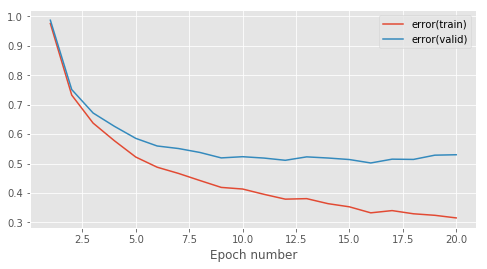

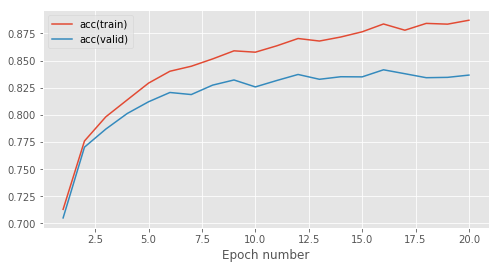

Epoch 1: 6.2s to complete
    error(train)=9.33e-01, acc(train)=7.23e-01, error(valid)=9.48e-01, acc(valid)=7.23e-01


Epoch 2: 5.5s to complete
    error(train)=7.07e-01, acc(train)=7.85e-01, error(valid)=7.29e-01, acc(valid)=7.79e-01


Epoch 3: 5.8s to complete
    error(train)=6.34e-01, acc(train)=8.00e-01, error(valid)=6.67e-01, acc(valid)=7.94e-01


Epoch 4: 5.6s to complete
    error(train)=5.75e-01, acc(train)=8.13e-01, error(valid)=6.24e-01, acc(valid)=8.00e-01


Epoch 5: 6.1s to complete
    error(train)=5.21e-01, acc(train)=8.29e-01, error(valid)=5.77e-01, acc(valid)=8.14e-01


Epoch 6: 6.5s to complete
    error(train)=4.91e-01, acc(train)=8.37e-01, error(valid)=5.55e-01, acc(valid)=8.21e-01


Epoch 7: 5.7s to complete
    error(train)=4.69e-01, acc(train)=8.43e-01, error(valid)=5.45e-01, acc(valid)=8.23e-01


Epoch 8: 6.1s to complete
    error(train)=4.45e-01, acc(train)=8.50e-01, error(valid)=5.34e-01, acc(valid)=8.23e-01


Epoch 9: 5.8s to complete
    error(train)=4.26e-01, acc(train)=8.56e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


Epoch 10: 6.7s to complete
    error(train)=4.03e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 11: 6.4s to complete
    error(train)=3.99e-01, acc(train)=8.64e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 12: 6.4s to complete
    error(train)=3.89e-01, acc(train)=8.65e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 13: 6.0s to complete
    error(train)=3.82e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.26e-01


Epoch 14: 6.4s to complete
    error(train)=3.59e-01, acc(train)=8.74e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


Epoch 15: 5.6s to complete
    error(train)=3.42e-01, acc(train)=8.81e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


Epoch 16: 5.2s to complete
    error(train)=3.66e-01, acc(train)=8.71e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 17: 5.3s to complete
    error(train)=3.31e-01, acc(train)=8.83e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


Epoch 18: 5.3s to complete
    error(train)=3.27e-01, acc(train)=8.83e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 19: 6.7s to complete
    error(train)=3.28e-01, acc(train)=8.82e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 20: 5.5s to complete
    error(train)=3.21e-01, acc(train)=8.83e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


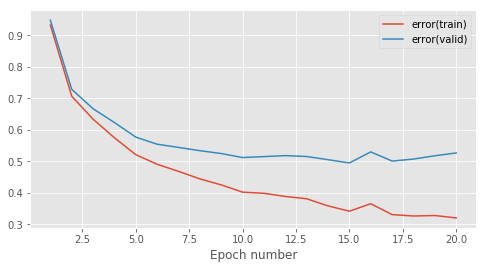

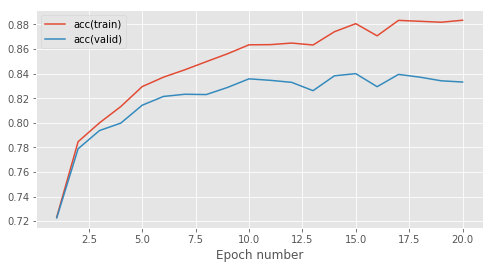

Epoch 1: 6.2s to complete
    error(train)=9.24e-01, acc(train)=7.24e-01, error(valid)=9.41e-01, acc(valid)=7.21e-01


Epoch 2: 5.7s to complete
    error(train)=7.30e-01, acc(train)=7.76e-01, error(valid)=7.61e-01, acc(valid)=7.66e-01


Epoch 3: 6.7s to complete
    error(train)=6.32e-01, acc(train)=8.03e-01, error(valid)=6.75e-01, acc(valid)=7.89e-01


Epoch 4: 5.6s to complete
    error(train)=5.85e-01, acc(train)=8.14e-01, error(valid)=6.36e-01, acc(valid)=7.99e-01


Epoch 5: 6.5s to complete
    error(train)=5.36e-01, acc(train)=8.26e-01, error(valid)=5.99e-01, acc(valid)=8.10e-01


Epoch 6: 5.7s to complete
    error(train)=5.17e-01, acc(train)=8.31e-01, error(valid)=5.88e-01, acc(valid)=8.12e-01


Epoch 7: 6.7s to complete
    error(train)=4.84e-01, acc(train)=8.37e-01, error(valid)=5.66e-01, acc(valid)=8.17e-01


Epoch 8: 5.8s to complete
    error(train)=4.57e-01, acc(train)=8.48e-01, error(valid)=5.47e-01, acc(valid)=8.24e-01


Epoch 9: 5.6s to complete
    error(train)=4.35e-01, acc(train)=8.53e-01, error(valid)=5.33e-01, acc(valid)=8.25e-01


Epoch 10: 6.6s to complete
    error(train)=4.31e-01, acc(train)=8.52e-01, error(valid)=5.42e-01, acc(valid)=8.23e-01


Epoch 11: 5.8s to complete
    error(train)=3.98e-01, acc(train)=8.64e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 12: 5.7s to complete
    error(train)=3.94e-01, acc(train)=8.61e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


Epoch 13: 6.0s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=5.06e-01, acc(valid)=8.33e-01


Epoch 14: 6.2s to complete
    error(train)=3.72e-01, acc(train)=8.70e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 15: 6.8s to complete
    error(train)=3.54e-01, acc(train)=8.76e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


Epoch 16: 6.7s to complete
    error(train)=3.54e-01, acc(train)=8.75e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 17: 7.0s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 18: 6.2s to complete
    error(train)=3.45e-01, acc(train)=8.78e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 19: 6.6s to complete
    error(train)=3.23e-01, acc(train)=8.85e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


Epoch 20: 5.7s to complete
    error(train)=3.08e-01, acc(train)=8.90e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


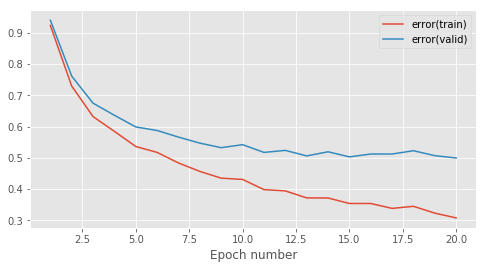

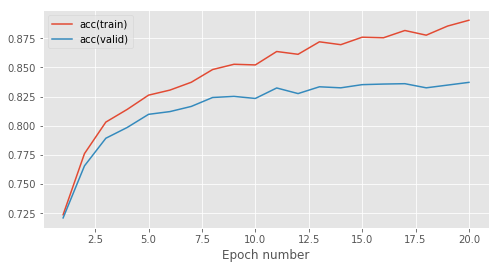

Epoch 1: 6.0s to complete
    error(train)=9.79e-01, acc(train)=7.11e-01, error(valid)=9.90e-01, acc(valid)=7.07e-01


Epoch 2: 5.6s to complete
    error(train)=7.46e-01, acc(train)=7.72e-01, error(valid)=7.69e-01, acc(valid)=7.64e-01


Epoch 3: 5.5s to complete
    error(train)=6.38e-01, acc(train)=8.00e-01, error(valid)=6.74e-01, acc(valid)=7.87e-01


Epoch 4: 5.2s to complete
    error(train)=5.72e-01, acc(train)=8.19e-01, error(valid)=6.12e-01, acc(valid)=8.05e-01


Epoch 5: 5.3s to complete
    error(train)=5.34e-01, acc(train)=8.27e-01, error(valid)=5.87e-01, acc(valid)=8.12e-01


Epoch 6: 5.5s to complete
    error(train)=4.91e-01, acc(train)=8.40e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


Epoch 7: 5.7s to complete
    error(train)=4.75e-01, acc(train)=8.44e-01, error(valid)=5.50e-01, acc(valid)=8.19e-01


Epoch 8: 5.6s to complete
    error(train)=4.47e-01, acc(train)=8.51e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 9: 6.1s to complete
    error(train)=4.30e-01, acc(train)=8.57e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


Epoch 10: 5.4s to complete
    error(train)=4.18e-01, acc(train)=8.59e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 11: 6.1s to complete
    error(train)=4.05e-01, acc(train)=8.60e-01, error(valid)=5.21e-01, acc(valid)=8.29e-01


Epoch 12: 6.3s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 13: 6.7s to complete
    error(train)=3.79e-01, acc(train)=8.68e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


Epoch 14: 6.3s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 15: 5.2s to complete
    error(train)=3.61e-01, acc(train)=8.74e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 16: 7.1s to complete
    error(train)=3.59e-01, acc(train)=8.74e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


Epoch 17: 5.9s to complete
    error(train)=3.35e-01, acc(train)=8.82e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 18: 6.2s to complete
    error(train)=3.27e-01, acc(train)=8.85e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


Epoch 19: 6.1s to complete
    error(train)=3.25e-01, acc(train)=8.85e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


Epoch 20: 6.6s to complete
    error(train)=3.13e-01, acc(train)=8.88e-01, error(valid)=5.18e-01, acc(valid)=8.38e-01


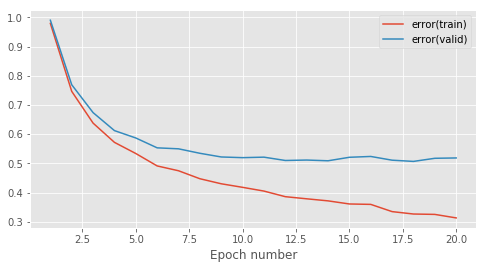

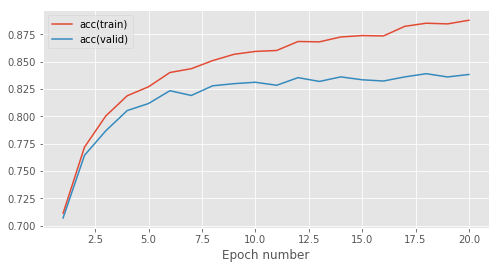

Epoch 1: 5.9s to complete
    error(train)=9.50e-01, acc(train)=7.19e-01, error(valid)=9.64e-01, acc(valid)=7.12e-01


Epoch 2: 6.0s to complete
    error(train)=7.58e-01, acc(train)=7.68e-01, error(valid)=7.87e-01, acc(valid)=7.62e-01


Epoch 3: 6.8s to complete
    error(train)=6.51e-01, acc(train)=7.94e-01, error(valid)=6.92e-01, acc(valid)=7.82e-01


Epoch 4: 6.5s to complete
    error(train)=5.82e-01, acc(train)=8.13e-01, error(valid)=6.30e-01, acc(valid)=7.99e-01


Epoch 5: 7.4s to complete
    error(train)=5.35e-01, acc(train)=8.26e-01, error(valid)=5.95e-01, acc(valid)=8.09e-01


Epoch 6: 7.6s to complete
    error(train)=5.01e-01, acc(train)=8.34e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


Epoch 7: 5.7s to complete
    error(train)=4.81e-01, acc(train)=8.41e-01, error(valid)=5.62e-01, acc(valid)=8.19e-01


Epoch 8: 6.4s to complete
    error(train)=4.45e-01, acc(train)=8.51e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


Epoch 9: 6.7s to complete
    error(train)=4.43e-01, acc(train)=8.49e-01, error(valid)=5.40e-01, acc(valid)=8.23e-01


Epoch 10: 5.5s to complete
    error(train)=4.07e-01, acc(train)=8.63e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


Epoch 11: 7.0s to complete
    error(train)=4.08e-01, acc(train)=8.60e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


Epoch 12: 5.4s to complete
    error(train)=3.88e-01, acc(train)=8.68e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 13: 5.8s to complete
    error(train)=3.80e-01, acc(train)=8.68e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01


Epoch 14: 5.8s to complete
    error(train)=3.74e-01, acc(train)=8.70e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 15: 6.0s to complete
    error(train)=3.56e-01, acc(train)=8.77e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 16: 6.7s to complete
    error(train)=3.54e-01, acc(train)=8.76e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 17: 6.2s to complete
    error(train)=3.37e-01, acc(train)=8.82e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


Epoch 18: 7.2s to complete
    error(train)=3.38e-01, acc(train)=8.81e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


Epoch 19: 6.2s to complete
    error(train)=3.24e-01, acc(train)=8.85e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 20: 6.4s to complete
    error(train)=3.17e-01, acc(train)=8.87e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


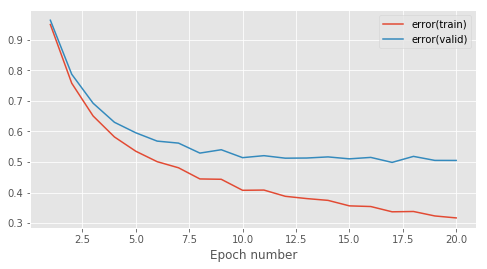

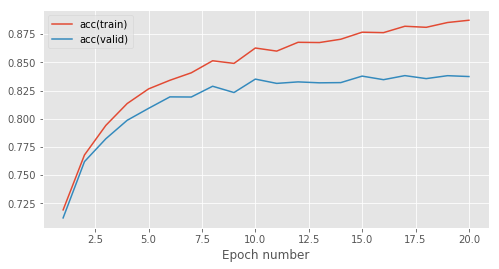

Epoch 1: 5.5s to complete
    error(train)=9.55e-01, acc(train)=7.17e-01, error(valid)=9.75e-01, acc(valid)=7.11e-01


Epoch 2: 5.6s to complete
    error(train)=7.45e-01, acc(train)=7.73e-01, error(valid)=7.72e-01, acc(valid)=7.61e-01


Epoch 3: 5.0s to complete
    error(train)=6.36e-01, acc(train)=7.98e-01, error(valid)=6.69e-01, acc(valid)=7.87e-01


Epoch 4: 5.9s to complete
    error(train)=5.73e-01, acc(train)=8.15e-01, error(valid)=6.18e-01, acc(valid)=8.03e-01


Epoch 5: 6.4s to complete
    error(train)=5.61e-01, acc(train)=8.15e-01, error(valid)=6.15e-01, acc(valid)=8.05e-01


Epoch 6: 5.9s to complete
    error(train)=4.93e-01, acc(train)=8.38e-01, error(valid)=5.61e-01, acc(valid)=8.17e-01


Epoch 7: 6.5s to complete
    error(train)=4.74e-01, acc(train)=8.43e-01, error(valid)=5.49e-01, acc(valid)=8.25e-01


Epoch 8: 6.3s to complete
    error(train)=4.43e-01, acc(train)=8.53e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 9: 5.3s to complete
    error(train)=4.26e-01, acc(train)=8.55e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


Epoch 10: 6.2s to complete
    error(train)=4.19e-01, acc(train)=8.57e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 11: 5.6s to complete
    error(train)=3.98e-01, acc(train)=8.65e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


Epoch 12: 5.2s to complete
    error(train)=3.84e-01, acc(train)=8.67e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 13: 5.7s to complete
    error(train)=3.66e-01, acc(train)=8.72e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


Epoch 14: 5.8s to complete
    error(train)=3.69e-01, acc(train)=8.70e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 15: 6.1s to complete
    error(train)=3.49e-01, acc(train)=8.76e-01, error(valid)=4.91e-01, acc(valid)=8.41e-01


Epoch 16: 7.6s to complete
    error(train)=3.53e-01, acc(train)=8.73e-01, error(valid)=5.11e-01, acc(valid)=8.31e-01


Epoch 17: 6.6s to complete
    error(train)=3.26e-01, acc(train)=8.84e-01, error(valid)=4.92e-01, acc(valid)=8.41e-01


Epoch 18: 5.7s to complete
    error(train)=3.20e-01, acc(train)=8.87e-01, error(valid)=4.89e-01, acc(valid)=8.44e-01


Epoch 19: 5.6s to complete
    error(train)=3.22e-01, acc(train)=8.85e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


Epoch 20: 6.0s to complete
    error(train)=3.09e-01, acc(train)=8.89e-01, error(valid)=4.98e-01, acc(valid)=8.41e-01


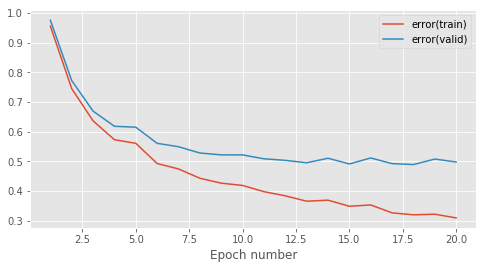

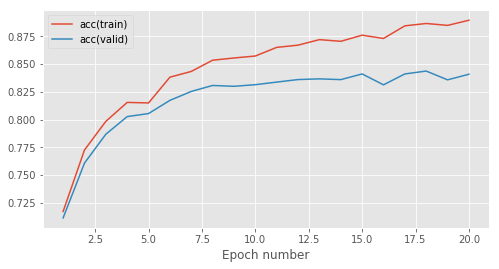

Epoch 1: 5.7s to complete
    error(train)=9.50e-01, acc(train)=7.18e-01, error(valid)=9.65e-01, acc(valid)=7.14e-01


Epoch 2: 5.7s to complete
    error(train)=7.47e-01, acc(train)=7.69e-01, error(valid)=7.67e-01, acc(valid)=7.64e-01


Epoch 3: 6.1s to complete
    error(train)=6.35e-01, acc(train)=8.01e-01, error(valid)=6.69e-01, acc(valid)=7.94e-01


Epoch 4: 6.0s to complete
    error(train)=5.72e-01, acc(train)=8.15e-01, error(valid)=6.09e-01, acc(valid)=8.07e-01


Epoch 5: 6.5s to complete
    error(train)=5.39e-01, acc(train)=8.25e-01, error(valid)=5.89e-01, acc(valid)=8.09e-01


Epoch 6: 6.7s to complete
    error(train)=4.99e-01, acc(train)=8.35e-01, error(valid)=5.59e-01, acc(valid)=8.19e-01


Epoch 7: 5.8s to complete
    error(train)=4.75e-01, acc(train)=8.42e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


Epoch 8: 6.6s to complete
    error(train)=4.55e-01, acc(train)=8.49e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


Epoch 9: 6.5s to complete
    error(train)=4.31e-01, acc(train)=8.55e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 10: 6.2s to complete
    error(train)=4.22e-01, acc(train)=8.57e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 11: 5.5s to complete
    error(train)=4.06e-01, acc(train)=8.61e-01, error(valid)=5.08e-01, acc(valid)=8.32e-01


Epoch 12: 7.2s to complete
    error(train)=3.92e-01, acc(train)=8.65e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


Epoch 13: 6.1s to complete
    error(train)=3.78e-01, acc(train)=8.69e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


Epoch 14: 6.7s to complete
    error(train)=3.73e-01, acc(train)=8.70e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


Epoch 15: 5.7s to complete
    error(train)=3.51e-01, acc(train)=8.78e-01, error(valid)=4.89e-01, acc(valid)=8.40e-01


Epoch 16: 7.2s to complete
    error(train)=3.56e-01, acc(train)=8.75e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


Epoch 17: 6.5s to complete
    error(train)=3.39e-01, acc(train)=8.80e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


Epoch 18: 6.4s to complete
    error(train)=3.34e-01, acc(train)=8.83e-01, error(valid)=5.00e-01, acc(valid)=8.40e-01


Epoch 19: 5.6s to complete
    error(train)=3.24e-01, acc(train)=8.86e-01, error(valid)=4.96e-01, acc(valid)=8.36e-01


Epoch 20: 6.1s to complete
    error(train)=3.16e-01, acc(train)=8.87e-01, error(valid)=4.99e-01, acc(valid)=8.43e-01


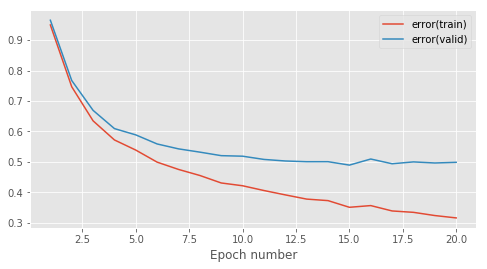

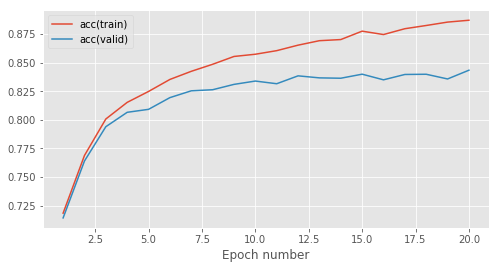

Epoch 1: 5.2s to complete
    error(train)=9.91e-01, acc(train)=7.08e-01, error(valid)=1.01e+00, acc(valid)=7.03e-01


Epoch 2: 4.5s to complete
    error(train)=7.50e-01, acc(train)=7.70e-01, error(valid)=7.77e-01, acc(valid)=7.63e-01


Epoch 3: 5.8s to complete
    error(train)=6.48e-01, acc(train)=7.96e-01, error(valid)=6.84e-01, acc(valid)=7.85e-01


Epoch 4: 5.9s to complete
    error(train)=5.74e-01, acc(train)=8.18e-01, error(valid)=6.19e-01, acc(valid)=8.03e-01


Epoch 5: 5.6s to complete
    error(train)=5.35e-01, acc(train)=8.27e-01, error(valid)=5.91e-01, acc(valid)=8.11e-01


Epoch 6: 5.4s to complete
    error(train)=5.05e-01, acc(train)=8.33e-01, error(valid)=5.66e-01, acc(valid)=8.13e-01


Epoch 7: 5.0s to complete
    error(train)=4.87e-01, acc(train)=8.33e-01, error(valid)=5.63e-01, acc(valid)=8.12e-01


Epoch 8: 5.5s to complete
    error(train)=4.54e-01, acc(train)=8.48e-01, error(valid)=5.41e-01, acc(valid)=8.25e-01


Epoch 9: 5.3s to complete
    error(train)=4.39e-01, acc(train)=8.53e-01, error(valid)=5.36e-01, acc(valid)=8.25e-01


Epoch 10: 6.2s to complete
    error(train)=4.16e-01, acc(train)=8.58e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


Epoch 11: 5.5s to complete
    error(train)=4.03e-01, acc(train)=8.62e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 12: 6.0s to complete
    error(train)=3.87e-01, acc(train)=8.66e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


Epoch 13: 6.7s to complete
    error(train)=3.73e-01, acc(train)=8.71e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 14: 6.8s to complete
    error(train)=3.60e-01, acc(train)=8.74e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


Epoch 15: 5.9s to complete
    error(train)=3.54e-01, acc(train)=8.76e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 16: 6.5s to complete
    error(train)=3.51e-01, acc(train)=8.75e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 17: 5.5s to complete
    error(train)=3.39e-01, acc(train)=8.80e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 18: 7.1s to complete
    error(train)=3.29e-01, acc(train)=8.84e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 19: 7.1s to complete
    error(train)=3.29e-01, acc(train)=8.83e-01, error(valid)=5.37e-01, acc(valid)=8.35e-01


Epoch 20: 6.2s to complete
    error(train)=3.13e-01, acc(train)=8.87e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


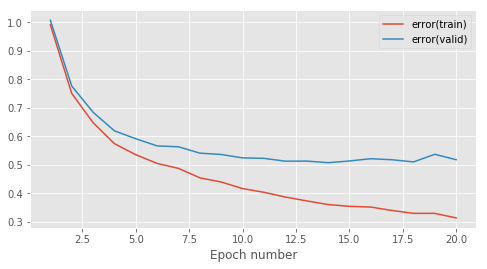

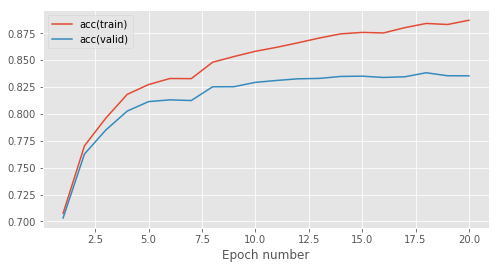

Epoch 1: 6.0s to complete
    error(train)=9.65e-01, acc(train)=7.19e-01, error(valid)=9.77e-01, acc(valid)=7.16e-01


Epoch 2: 6.2s to complete
    error(train)=7.48e-01, acc(train)=7.72e-01, error(valid)=7.70e-01, acc(valid)=7.67e-01


Epoch 3: 6.7s to complete
    error(train)=6.54e-01, acc(train)=7.95e-01, error(valid)=6.89e-01, acc(valid)=7.87e-01


Epoch 4: 6.6s to complete
    error(train)=5.87e-01, acc(train)=8.13e-01, error(valid)=6.29e-01, acc(valid)=8.00e-01


Epoch 5: 6.4s to complete
    error(train)=5.57e-01, acc(train)=8.20e-01, error(valid)=6.10e-01, acc(valid)=8.08e-01


Epoch 6: 5.5s to complete
    error(train)=4.97e-01, acc(train)=8.37e-01, error(valid)=5.53e-01, acc(valid)=8.21e-01


Epoch 7: 5.1s to complete
    error(train)=4.71e-01, acc(train)=8.43e-01, error(valid)=5.41e-01, acc(valid)=8.24e-01


Epoch 8: 6.1s to complete
    error(train)=4.49e-01, acc(train)=8.50e-01, error(valid)=5.28e-01, acc(valid)=8.26e-01


Epoch 9: 6.6s to complete
    error(train)=4.37e-01, acc(train)=8.52e-01, error(valid)=5.26e-01, acc(valid)=8.25e-01


Epoch 10: 6.0s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


Epoch 11: 6.9s to complete
    error(train)=4.10e-01, acc(train)=8.58e-01, error(valid)=5.11e-01, acc(valid)=8.29e-01


Epoch 12: 6.2s to complete
    error(train)=3.87e-01, acc(train)=8.68e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 13: 6.1s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


Epoch 14: 6.4s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


Epoch 15: 5.8s to complete
    error(train)=3.49e-01, acc(train)=8.78e-01, error(valid)=4.85e-01, acc(valid)=8.40e-01


Epoch 16: 6.4s to complete
    error(train)=3.43e-01, acc(train)=8.78e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


Epoch 17: 5.9s to complete
    error(train)=3.30e-01, acc(train)=8.83e-01, error(valid)=4.96e-01, acc(valid)=8.41e-01


Epoch 18: 7.1s to complete
    error(train)=3.29e-01, acc(train)=8.83e-01, error(valid)=4.96e-01, acc(valid)=8.40e-01


Epoch 19: 6.6s to complete
    error(train)=3.16e-01, acc(train)=8.88e-01, error(valid)=4.88e-01, acc(valid)=8.44e-01


Epoch 20: 6.4s to complete
    error(train)=3.24e-01, acc(train)=8.82e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


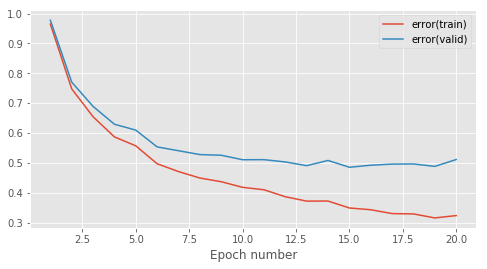

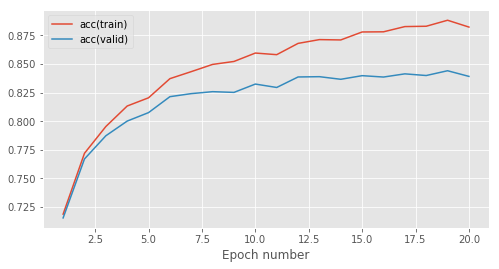

Epoch 1: 5.6s to complete
    error(train)=9.30e-01, acc(train)=7.23e-01, error(valid)=9.37e-01, acc(valid)=7.22e-01


Epoch 2: 6.0s to complete
    error(train)=7.19e-01, acc(train)=7.75e-01, error(valid)=7.48e-01, acc(valid)=7.67e-01


Epoch 3: 6.1s to complete
    error(train)=6.11e-01, acc(train)=8.07e-01, error(valid)=6.49e-01, acc(valid)=7.97e-01


Epoch 4: 5.6s to complete
    error(train)=5.71e-01, acc(train)=8.15e-01, error(valid)=6.15e-01, acc(valid)=8.03e-01


Epoch 5: 5.5s to complete
    error(train)=5.23e-01, acc(train)=8.29e-01, error(valid)=5.81e-01, acc(valid)=8.13e-01


Epoch 6: 4.8s to complete
    error(train)=4.96e-01, acc(train)=8.35e-01, error(valid)=5.65e-01, acc(valid)=8.16e-01


Epoch 7: 5.2s to complete
    error(train)=4.69e-01, acc(train)=8.45e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


Epoch 8: 5.9s to complete
    error(train)=4.44e-01, acc(train)=8.49e-01, error(valid)=5.28e-01, acc(valid)=8.26e-01


Epoch 9: 6.4s to complete
    error(train)=4.29e-01, acc(train)=8.53e-01, error(valid)=5.29e-01, acc(valid)=8.24e-01


Epoch 10: 6.2s to complete
    error(train)=4.11e-01, acc(train)=8.57e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


Epoch 11: 5.4s to complete
    error(train)=3.90e-01, acc(train)=8.65e-01, error(valid)=5.02e-01, acc(valid)=8.33e-01


Epoch 12: 5.9s to complete
    error(train)=3.75e-01, acc(train)=8.70e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


Epoch 13: 6.0s to complete
    error(train)=3.63e-01, acc(train)=8.73e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


Epoch 14: 6.1s to complete
    error(train)=3.66e-01, acc(train)=8.70e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


Epoch 15: 6.8s to complete
    error(train)=3.54e-01, acc(train)=8.76e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 16: 6.1s to complete
    error(train)=3.39e-01, acc(train)=8.80e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


Epoch 17: 5.4s to complete
    error(train)=3.33e-01, acc(train)=8.81e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


Epoch 18: 5.7s to complete
    error(train)=3.28e-01, acc(train)=8.83e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 19: 5.6s to complete
    error(train)=3.17e-01, acc(train)=8.84e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


Epoch 20: 5.9s to complete
    error(train)=3.20e-01, acc(train)=8.85e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


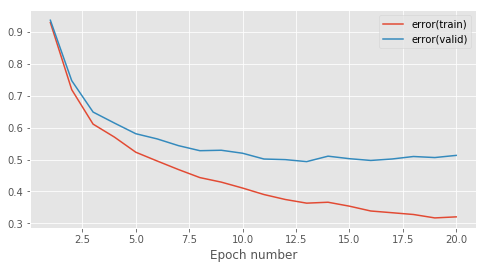

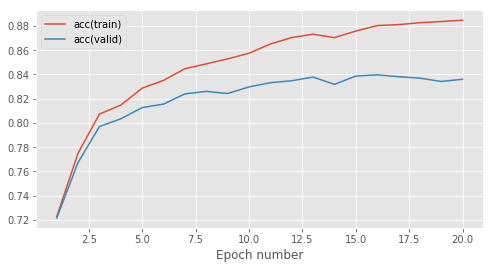

Epoch 1: 5.8s to complete
    error(train)=9.07e-01, acc(train)=7.28e-01, error(valid)=9.23e-01, acc(valid)=7.25e-01


Epoch 2: 6.6s to complete
    error(train)=7.15e-01, acc(train)=7.77e-01, error(valid)=7.41e-01, acc(valid)=7.70e-01


Epoch 3: 6.0s to complete
    error(train)=6.21e-01, acc(train)=8.03e-01, error(valid)=6.59e-01, acc(valid)=7.92e-01


Epoch 4: 6.0s to complete
    error(train)=5.63e-01, acc(train)=8.18e-01, error(valid)=6.13e-01, acc(valid)=8.03e-01


Epoch 5: 5.7s to complete
    error(train)=5.37e-01, acc(train)=8.25e-01, error(valid)=5.92e-01, acc(valid)=8.08e-01


Epoch 6: 6.8s to complete
    error(train)=5.00e-01, acc(train)=8.35e-01, error(valid)=5.68e-01, acc(valid)=8.15e-01


Epoch 7: 5.7s to complete
    error(train)=4.67e-01, acc(train)=8.44e-01, error(valid)=5.42e-01, acc(valid)=8.23e-01


Epoch 8: 5.4s to complete
    error(train)=4.48e-01, acc(train)=8.47e-01, error(valid)=5.33e-01, acc(valid)=8.25e-01


Epoch 9: 6.1s to complete
    error(train)=4.35e-01, acc(train)=8.53e-01, error(valid)=5.23e-01, acc(valid)=8.28e-01


Epoch 10: 6.4s to complete
    error(train)=4.19e-01, acc(train)=8.55e-01, error(valid)=5.19e-01, acc(valid)=8.27e-01


Epoch 11: 5.8s to complete
    error(train)=3.97e-01, acc(train)=8.65e-01, error(valid)=5.07e-01, acc(valid)=8.34e-01


Epoch 12: 6.6s to complete
    error(train)=3.94e-01, acc(train)=8.61e-01, error(valid)=5.14e-01, acc(valid)=8.29e-01


Epoch 13: 6.7s to complete
    error(train)=3.77e-01, acc(train)=8.68e-01, error(valid)=5.02e-01, acc(valid)=8.32e-01


Epoch 14: 5.9s to complete
    error(train)=3.87e-01, acc(train)=8.64e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


Epoch 15: 6.2s to complete
    error(train)=3.58e-01, acc(train)=8.74e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


Epoch 16: 6.4s to complete
    error(train)=3.48e-01, acc(train)=8.77e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


Epoch 17: 5.2s to complete
    error(train)=3.37e-01, acc(train)=8.80e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


Epoch 18: 6.8s to complete
    error(train)=3.27e-01, acc(train)=8.83e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


Epoch 19: 6.1s to complete
    error(train)=3.37e-01, acc(train)=8.77e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


Epoch 20: 6.9s to complete
    error(train)=3.30e-01, acc(train)=8.78e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


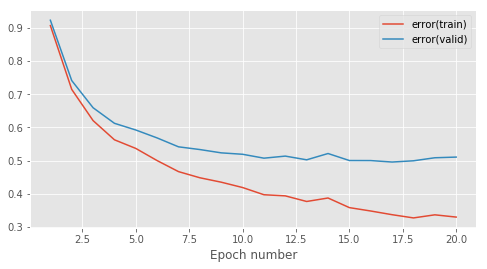

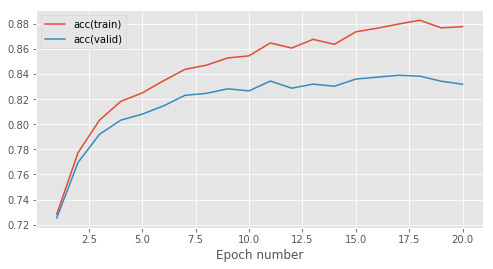

Epoch 1: 6.2s to complete
    error(train)=9.74e-01, acc(train)=7.15e-01, error(valid)=9.85e-01, acc(valid)=7.12e-01


Epoch 2: 6.8s to complete
    error(train)=7.53e-01, acc(train)=7.68e-01, error(valid)=7.77e-01, acc(valid)=7.61e-01


Epoch 3: 6.1s to complete
    error(train)=6.44e-01, acc(train)=7.98e-01, error(valid)=6.79e-01, acc(valid)=7.90e-01


Epoch 4: 5.6s to complete
    error(train)=5.80e-01, acc(train)=8.14e-01, error(valid)=6.25e-01, acc(valid)=8.04e-01


Epoch 5: 5.4s to complete
    error(train)=5.32e-01, acc(train)=8.27e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


Epoch 6: 5.9s to complete
    error(train)=5.06e-01, acc(train)=8.35e-01, error(valid)=5.78e-01, acc(valid)=8.15e-01


Epoch 7: 5.6s to complete
    error(train)=4.63e-01, acc(train)=8.47e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


Epoch 8: 6.1s to complete
    error(train)=4.63e-01, acc(train)=8.45e-01, error(valid)=5.55e-01, acc(valid)=8.21e-01


Epoch 9: 6.0s to complete
    error(train)=4.30e-01, acc(train)=8.56e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


Epoch 10: 5.6s to complete
    error(train)=4.20e-01, acc(train)=8.57e-01, error(valid)=5.30e-01, acc(valid)=8.27e-01


Epoch 11: 6.8s to complete
    error(train)=4.17e-01, acc(train)=8.56e-01, error(valid)=5.36e-01, acc(valid)=8.26e-01


Epoch 12: 6.2s to complete
    error(train)=3.90e-01, acc(train)=8.65e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


Epoch 13: 6.0s to complete
    error(train)=3.82e-01, acc(train)=8.68e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


Epoch 14: 5.7s to complete
    error(train)=3.72e-01, acc(train)=8.70e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


Epoch 15: 5.5s to complete
    error(train)=3.64e-01, acc(train)=8.72e-01, error(valid)=5.29e-01, acc(valid)=8.28e-01


Epoch 16: 5.9s to complete
    error(train)=3.51e-01, acc(train)=8.76e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 17: 7.5s to complete
    error(train)=3.40e-01, acc(train)=8.80e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 18: 6.1s to complete
    error(train)=3.33e-01, acc(train)=8.82e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 19: 7.0s to complete
    error(train)=3.23e-01, acc(train)=8.84e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


Epoch 20: 6.1s to complete
    error(train)=3.20e-01, acc(train)=8.85e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


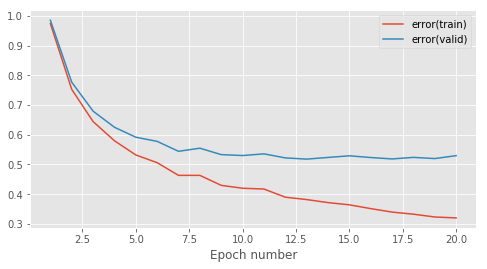

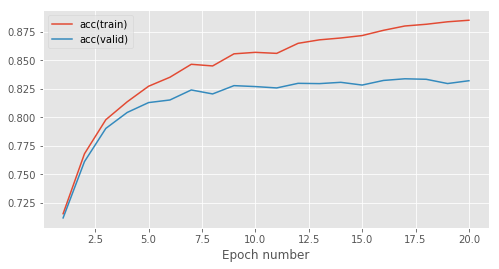

Epoch 1: 5.6s to complete
    error(train)=9.61e-01, acc(train)=7.16e-01, error(valid)=9.74e-01, acc(valid)=7.12e-01


Epoch 2: 5.9s to complete
    error(train)=7.41e-01, acc(train)=7.75e-01, error(valid)=7.61e-01, acc(valid)=7.66e-01


Epoch 3: 5.9s to complete
    error(train)=6.36e-01, acc(train)=8.02e-01, error(valid)=6.73e-01, acc(valid)=7.90e-01


Epoch 4: 5.6s to complete
    error(train)=5.74e-01, acc(train)=8.18e-01, error(valid)=6.19e-01, acc(valid)=8.04e-01


Epoch 5: 6.0s to complete
    error(train)=5.23e-01, acc(train)=8.32e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


Epoch 6: 5.8s to complete
    error(train)=4.98e-01, acc(train)=8.36e-01, error(valid)=5.68e-01, acc(valid)=8.17e-01


Epoch 7: 6.0s to complete
    error(train)=4.70e-01, acc(train)=8.44e-01, error(valid)=5.46e-01, acc(valid)=8.26e-01


Epoch 8: 6.6s to complete
    error(train)=4.42e-01, acc(train)=8.51e-01, error(valid)=5.32e-01, acc(valid)=8.25e-01


Epoch 9: 6.5s to complete
    error(train)=4.36e-01, acc(train)=8.52e-01, error(valid)=5.35e-01, acc(valid)=8.26e-01


Epoch 10: 5.7s to complete
    error(train)=4.11e-01, acc(train)=8.60e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 11: 5.8s to complete
    error(train)=4.06e-01, acc(train)=8.60e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


Epoch 12: 6.0s to complete
    error(train)=3.90e-01, acc(train)=8.65e-01, error(valid)=5.17e-01, acc(valid)=8.30e-01


Epoch 13: 5.2s to complete
    error(train)=3.77e-01, acc(train)=8.68e-01, error(valid)=5.17e-01, acc(valid)=8.30e-01


Epoch 14: 6.6s to complete
    error(train)=3.64e-01, acc(train)=8.73e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 15: 6.6s to complete
    error(train)=3.53e-01, acc(train)=8.75e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 16: 6.3s to complete
    error(train)=3.50e-01, acc(train)=8.77e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 17: 6.4s to complete
    error(train)=3.37e-01, acc(train)=8.81e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


Epoch 18: 5.4s to complete
    error(train)=3.32e-01, acc(train)=8.81e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 19: 6.0s to complete
    error(train)=3.15e-01, acc(train)=8.86e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 20: 5.6s to complete
    error(train)=3.16e-01, acc(train)=8.87e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


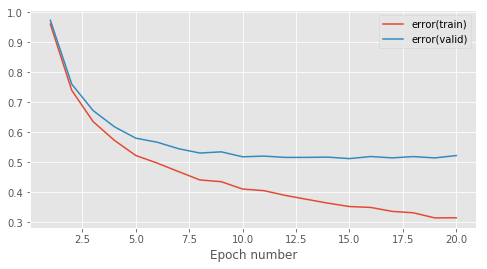

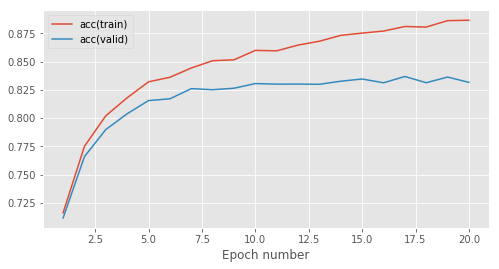

Epoch 1: 5.8s to complete
    error(train)=9.74e-01, acc(train)=7.10e-01, error(valid)=9.87e-01, acc(valid)=7.04e-01


Epoch 2: 6.4s to complete
    error(train)=7.35e-01, acc(train)=7.74e-01, error(valid)=7.56e-01, acc(valid)=7.65e-01


Epoch 3: 5.8s to complete
    error(train)=6.35e-01, acc(train)=7.98e-01, error(valid)=6.65e-01, acc(valid)=7.89e-01


Epoch 4: 5.9s to complete
    error(train)=5.79e-01, acc(train)=8.14e-01, error(valid)=6.22e-01, acc(valid)=7.99e-01


Epoch 5: 5.4s to complete
    error(train)=5.24e-01, acc(train)=8.30e-01, error(valid)=5.79e-01, acc(valid)=8.15e-01


Epoch 6: 5.7s to complete
    error(train)=4.87e-01, acc(train)=8.40e-01, error(valid)=5.52e-01, acc(valid)=8.22e-01


Epoch 7: 5.5s to complete
    error(train)=4.85e-01, acc(train)=8.36e-01, error(valid)=5.62e-01, acc(valid)=8.17e-01


Epoch 8: 7.5s to complete
    error(train)=4.57e-01, acc(train)=8.46e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


Epoch 9: 5.2s to complete
    error(train)=4.42e-01, acc(train)=8.49e-01, error(valid)=5.36e-01, acc(valid)=8.25e-01


Epoch 10: 5.5s to complete
    error(train)=4.13e-01, acc(train)=8.59e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


Epoch 11: 5.9s to complete
    error(train)=4.04e-01, acc(train)=8.61e-01, error(valid)=5.16e-01, acc(valid)=8.30e-01


Epoch 12: 5.1s to complete
    error(train)=3.87e-01, acc(train)=8.68e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


Epoch 13: 6.1s to complete
    error(train)=3.80e-01, acc(train)=8.68e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 14: 5.8s to complete
    error(train)=3.78e-01, acc(train)=8.67e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


Epoch 15: 6.2s to complete
    error(train)=3.59e-01, acc(train)=8.74e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 16: 6.0s to complete
    error(train)=3.51e-01, acc(train)=8.78e-01, error(valid)=5.11e-01, acc(valid)=8.38e-01


Epoch 17: 6.2s to complete
    error(train)=3.37e-01, acc(train)=8.82e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


Epoch 18: 6.1s to complete
    error(train)=3.30e-01, acc(train)=8.83e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


Epoch 19: 6.0s to complete
    error(train)=3.28e-01, acc(train)=8.83e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


Epoch 20: 5.5s to complete
    error(train)=3.13e-01, acc(train)=8.89e-01, error(valid)=5.11e-01, acc(valid)=8.40e-01


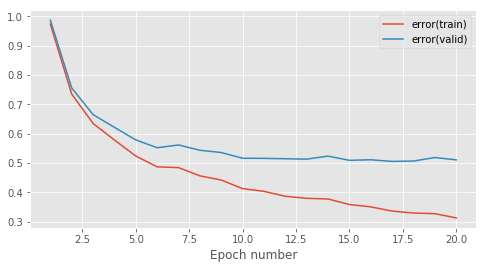

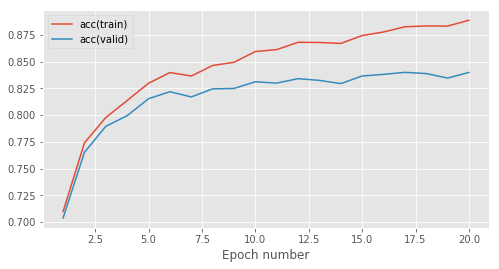

Epoch 1: 4.9s to complete
    error(train)=9.10e-01, acc(train)=7.29e-01, error(valid)=9.22e-01, acc(valid)=7.25e-01


Epoch 2: 5.1s to complete
    error(train)=7.10e-01, acc(train)=7.79e-01, error(valid)=7.34e-01, acc(valid)=7.73e-01


Epoch 3: 6.0s to complete
    error(train)=6.25e-01, acc(train)=8.03e-01, error(valid)=6.63e-01, acc(valid)=7.90e-01


Epoch 4: 5.6s to complete
    error(train)=5.66e-01, acc(train)=8.18e-01, error(valid)=6.16e-01, acc(valid)=8.03e-01


Epoch 5: 5.6s to complete
    error(train)=5.17e-01, acc(train)=8.32e-01, error(valid)=5.75e-01, acc(valid)=8.15e-01


Epoch 6: 6.3s to complete
    error(train)=5.03e-01, acc(train)=8.35e-01, error(valid)=5.69e-01, acc(valid)=8.14e-01


Epoch 7: 5.6s to complete
    error(train)=4.75e-01, acc(train)=8.41e-01, error(valid)=5.55e-01, acc(valid)=8.21e-01


Epoch 8: 5.9s to complete
    error(train)=4.57e-01, acc(train)=8.42e-01, error(valid)=5.48e-01, acc(valid)=8.18e-01


Epoch 9: 5.6s to complete
    error(train)=4.36e-01, acc(train)=8.52e-01, error(valid)=5.35e-01, acc(valid)=8.26e-01


Epoch 10: 5.7s to complete
    error(train)=4.19e-01, acc(train)=8.54e-01, error(valid)=5.28e-01, acc(valid)=8.23e-01


Epoch 11: 6.5s to complete
    error(train)=4.08e-01, acc(train)=8.55e-01, error(valid)=5.25e-01, acc(valid)=8.25e-01


Epoch 12: 6.3s to complete
    error(train)=3.90e-01, acc(train)=8.66e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


Epoch 13: 5.6s to complete
    error(train)=3.80e-01, acc(train)=8.69e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 14: 5.2s to complete
    error(train)=3.70e-01, acc(train)=8.70e-01, error(valid)=5.10e-01, acc(valid)=8.32e-01


Epoch 15: 6.6s to complete
    error(train)=3.57e-01, acc(train)=8.74e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


Epoch 16: 6.5s to complete
    error(train)=3.54e-01, acc(train)=8.74e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 17: 6.3s to complete
    error(train)=3.43e-01, acc(train)=8.78e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 18: 6.1s to complete
    error(train)=3.37e-01, acc(train)=8.79e-01, error(valid)=5.17e-01, acc(valid)=8.30e-01


Epoch 19: 6.2s to complete
    error(train)=3.19e-01, acc(train)=8.86e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


Epoch 20: 5.9s to complete
    error(train)=3.17e-01, acc(train)=8.86e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


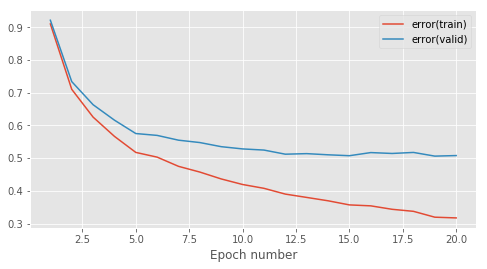

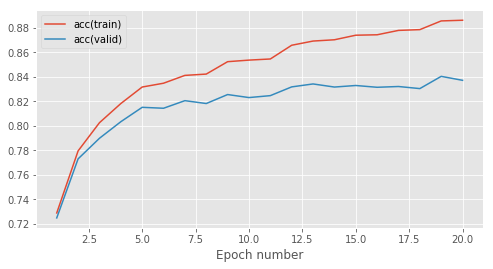

Epoch 1: 7.5s to complete
    error(train)=1.20e+00, acc(train)=6.59e-01, error(valid)=1.21e+00, acc(valid)=6.57e-01


Epoch 2: 5.6s to complete
    error(train)=9.47e-01, acc(train)=7.23e-01, error(valid)=9.64e-01, acc(valid)=7.15e-01


Epoch 3: 5.2s to complete
    error(train)=8.08e-01, acc(train)=7.56e-01, error(valid)=8.31e-01, acc(valid)=7.49e-01


Epoch 4: 5.5s to complete
    error(train)=7.24e-01, acc(train)=7.79e-01, error(valid)=7.51e-01, acc(valid)=7.71e-01


Epoch 5: 6.4s to complete
    error(train)=6.76e-01, acc(train)=7.93e-01, error(valid)=7.13e-01, acc(valid)=7.83e-01


Epoch 6: 4.9s to complete
    error(train)=6.33e-01, acc(train)=8.03e-01, error(valid)=6.74e-01, acc(valid)=7.94e-01


Epoch 7: 5.8s to complete
    error(train)=6.00e-01, acc(train)=8.12e-01, error(valid)=6.51e-01, acc(valid)=7.97e-01


Epoch 8: 5.7s to complete
    error(train)=5.73e-01, acc(train)=8.18e-01, error(valid)=6.26e-01, acc(valid)=8.04e-01


Epoch 9: 5.8s to complete
    error(train)=5.49e-01, acc(train)=8.25e-01, error(valid)=6.06e-01, acc(valid)=8.08e-01


Epoch 10: 5.9s to complete
    error(train)=5.23e-01, acc(train)=8.34e-01, error(valid)=5.83e-01, acc(valid)=8.15e-01


Epoch 11: 5.6s to complete
    error(train)=5.12e-01, acc(train)=8.36e-01, error(valid)=5.80e-01, acc(valid)=8.18e-01


Epoch 12: 6.6s to complete
    error(train)=5.00e-01, acc(train)=8.39e-01, error(valid)=5.74e-01, acc(valid)=8.19e-01


Epoch 13: 5.9s to complete
    error(train)=4.82e-01, acc(train)=8.43e-01, error(valid)=5.61e-01, acc(valid)=8.20e-01


Epoch 14: 5.0s to complete
    error(train)=4.71e-01, acc(train)=8.47e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


Epoch 15: 6.0s to complete
    error(train)=4.62e-01, acc(train)=8.49e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


Epoch 16: 6.0s to complete
    error(train)=4.57e-01, acc(train)=8.48e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 17: 5.8s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=5.42e-01, acc(valid)=8.28e-01


Epoch 18: 4.7s to complete
    error(train)=4.31e-01, acc(train)=8.56e-01, error(valid)=5.34e-01, acc(valid)=8.29e-01


Epoch 19: 5.9s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


Epoch 20: 5.5s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


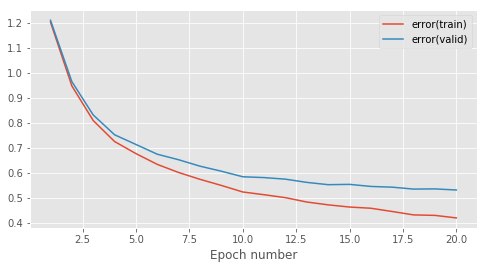

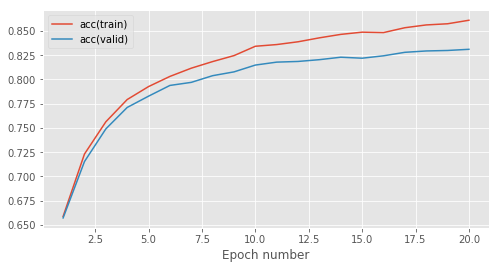

Epoch 1: 5.9s to complete
    error(train)=1.20e+00, acc(train)=6.58e-01, error(valid)=1.21e+00, acc(valid)=6.52e-01


Epoch 2: 6.5s to complete
    error(train)=9.55e-01, acc(train)=7.20e-01, error(valid)=9.64e-01, acc(valid)=7.15e-01


Epoch 3: 6.2s to complete
    error(train)=8.16e-01, acc(train)=7.57e-01, error(valid)=8.32e-01, acc(valid)=7.50e-01


Epoch 4: 5.5s to complete
    error(train)=7.33e-01, acc(train)=7.77e-01, error(valid)=7.53e-01, acc(valid)=7.69e-01


Epoch 5: 6.1s to complete
    error(train)=6.75e-01, acc(train)=7.93e-01, error(valid)=7.03e-01, acc(valid)=7.82e-01


Epoch 6: 5.9s to complete
    error(train)=6.32e-01, acc(train)=8.04e-01, error(valid)=6.65e-01, acc(valid)=7.94e-01


Epoch 7: 4.9s to complete
    error(train)=5.92e-01, acc(train)=8.16e-01, error(valid)=6.35e-01, acc(valid)=8.02e-01


Epoch 8: 5.2s to complete
    error(train)=5.68e-01, acc(train)=8.19e-01, error(valid)=6.15e-01, acc(valid)=8.04e-01


Epoch 9: 5.8s to complete
    error(train)=5.48e-01, acc(train)=8.26e-01, error(valid)=6.01e-01, acc(valid)=8.09e-01


Epoch 10: 5.6s to complete
    error(train)=5.18e-01, acc(train)=8.32e-01, error(valid)=5.78e-01, acc(valid)=8.15e-01


Epoch 11: 5.9s to complete
    error(train)=5.05e-01, acc(train)=8.35e-01, error(valid)=5.70e-01, acc(valid)=8.16e-01


Epoch 12: 5.1s to complete
    error(train)=4.95e-01, acc(train)=8.37e-01, error(valid)=5.67e-01, acc(valid)=8.16e-01


Epoch 13: 5.6s to complete
    error(train)=4.75e-01, acc(train)=8.45e-01, error(valid)=5.49e-01, acc(valid)=8.26e-01


Epoch 14: 7.0s to complete
    error(train)=4.65e-01, acc(train)=8.48e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


Epoch 15: 6.6s to complete
    error(train)=4.49e-01, acc(train)=8.53e-01, error(valid)=5.34e-01, acc(valid)=8.29e-01


Epoch 16: 5.5s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


Epoch 17: 6.5s to complete
    error(train)=4.31e-01, acc(train)=8.56e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


Epoch 18: 6.4s to complete
    error(train)=4.28e-01, acc(train)=8.56e-01, error(valid)=5.31e-01, acc(valid)=8.27e-01


Epoch 19: 6.2s to complete
    error(train)=4.12e-01, acc(train)=8.62e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


Epoch 20: 6.3s to complete
    error(train)=4.07e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


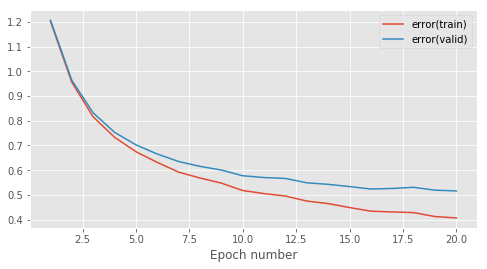

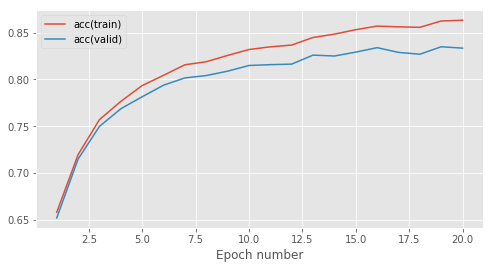

Epoch 1: 6.7s to complete
    error(train)=1.17e+00, acc(train)=6.69e-01, error(valid)=1.19e+00, acc(valid)=6.61e-01


Epoch 2: 6.8s to complete
    error(train)=9.36e-01, acc(train)=7.25e-01, error(valid)=9.54e-01, acc(valid)=7.21e-01


Epoch 3: 5.9s to complete
    error(train)=8.09e-01, acc(train)=7.58e-01, error(valid)=8.31e-01, acc(valid)=7.51e-01


Epoch 4: 5.8s to complete
    error(train)=7.33e-01, acc(train)=7.76e-01, error(valid)=7.60e-01, acc(valid)=7.69e-01


Epoch 5: 5.8s to complete
    error(train)=6.62e-01, acc(train)=7.95e-01, error(valid)=6.94e-01, acc(valid)=7.89e-01


Epoch 6: 6.4s to complete
    error(train)=6.30e-01, acc(train)=8.02e-01, error(valid)=6.73e-01, acc(valid)=7.91e-01


Epoch 7: 6.9s to complete
    error(train)=5.94e-01, acc(train)=8.13e-01, error(valid)=6.35e-01, acc(valid)=8.04e-01


Epoch 8: 5.4s to complete
    error(train)=5.69e-01, acc(train)=8.19e-01, error(valid)=6.22e-01, acc(valid)=8.07e-01


Epoch 9: 5.9s to complete
    error(train)=5.41e-01, acc(train)=8.27e-01, error(valid)=5.98e-01, acc(valid)=8.12e-01


Epoch 10: 6.1s to complete
    error(train)=5.30e-01, acc(train)=8.29e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


Epoch 11: 6.3s to complete
    error(train)=5.09e-01, acc(train)=8.35e-01, error(valid)=5.77e-01, acc(valid)=8.13e-01


Epoch 12: 5.7s to complete
    error(train)=4.95e-01, acc(train)=8.39e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


Epoch 13: 7.2s to complete
    error(train)=4.80e-01, acc(train)=8.42e-01, error(valid)=5.59e-01, acc(valid)=8.18e-01


Epoch 14: 6.3s to complete
    error(train)=4.70e-01, acc(train)=8.44e-01, error(valid)=5.56e-01, acc(valid)=8.19e-01


Epoch 15: 7.4s to complete
    error(train)=4.57e-01, acc(train)=8.50e-01, error(valid)=5.46e-01, acc(valid)=8.23e-01


Epoch 16: 5.8s to complete
    error(train)=4.47e-01, acc(train)=8.53e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 17: 5.5s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.41e-01, acc(valid)=8.25e-01


Epoch 18: 5.7s to complete
    error(train)=4.28e-01, acc(train)=8.57e-01, error(valid)=5.34e-01, acc(valid)=8.26e-01


Epoch 19: 6.4s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=5.29e-01, acc(valid)=8.28e-01


Epoch 20: 5.3s to complete
    error(train)=4.17e-01, acc(train)=8.60e-01, error(valid)=5.33e-01, acc(valid)=8.24e-01


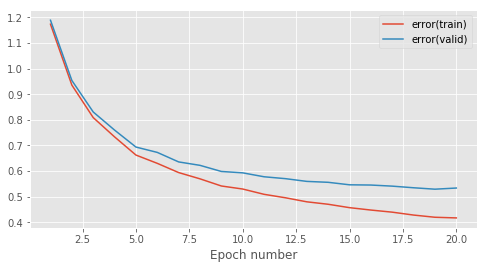

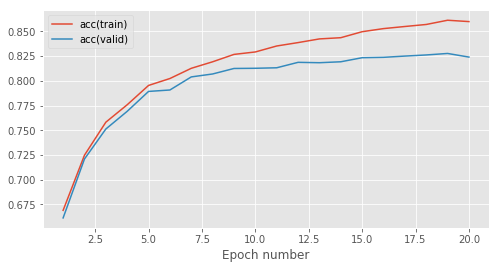

Epoch 1: 5.9s to complete
    error(train)=1.09e+00, acc(train)=6.86e-01, error(valid)=1.09e+00, acc(valid)=6.86e-01


Epoch 2: 6.3s to complete
    error(train)=8.77e-01, acc(train)=7.38e-01, error(valid)=8.87e-01, acc(valid)=7.34e-01


Epoch 3: 5.7s to complete
    error(train)=7.77e-01, acc(train)=7.65e-01, error(valid)=7.94e-01, acc(valid)=7.61e-01


Epoch 4: 5.5s to complete
    error(train)=6.88e-01, acc(train)=7.90e-01, error(valid)=7.08e-01, acc(valid)=7.84e-01


Epoch 5: 5.4s to complete
    error(train)=6.53e-01, acc(train)=7.97e-01, error(valid)=6.78e-01, acc(valid)=7.89e-01


Epoch 6: 5.4s to complete
    error(train)=6.11e-01, acc(train)=8.09e-01, error(valid)=6.46e-01, acc(valid)=8.00e-01


Epoch 7: 6.2s to complete
    error(train)=5.84e-01, acc(train)=8.16e-01, error(valid)=6.24e-01, acc(valid)=8.02e-01


Epoch 8: 6.2s to complete
    error(train)=5.55e-01, acc(train)=8.23e-01, error(valid)=6.02e-01, acc(valid)=8.10e-01


Epoch 9: 6.2s to complete
    error(train)=5.46e-01, acc(train)=8.26e-01, error(valid)=5.97e-01, acc(valid)=8.12e-01


Epoch 10: 6.4s to complete
    error(train)=5.15e-01, acc(train)=8.33e-01, error(valid)=5.74e-01, acc(valid)=8.17e-01


Epoch 11: 5.8s to complete
    error(train)=4.98e-01, acc(train)=8.39e-01, error(valid)=5.61e-01, acc(valid)=8.20e-01


Epoch 12: 6.0s to complete
    error(train)=4.95e-01, acc(train)=8.38e-01, error(valid)=5.63e-01, acc(valid)=8.18e-01


Epoch 13: 6.1s to complete
    error(train)=4.76e-01, acc(train)=8.43e-01, error(valid)=5.50e-01, acc(valid)=8.23e-01


Epoch 14: 5.8s to complete
    error(train)=4.60e-01, acc(train)=8.49e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


Epoch 15: 5.5s to complete
    error(train)=4.49e-01, acc(train)=8.52e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


Epoch 16: 5.4s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 17: 5.8s to complete
    error(train)=4.32e-01, acc(train)=8.56e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 18: 5.1s to complete
    error(train)=4.26e-01, acc(train)=8.57e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 19: 5.5s to complete
    error(train)=4.17e-01, acc(train)=8.60e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


Epoch 20: 5.4s to complete
    error(train)=4.08e-01, acc(train)=8.62e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


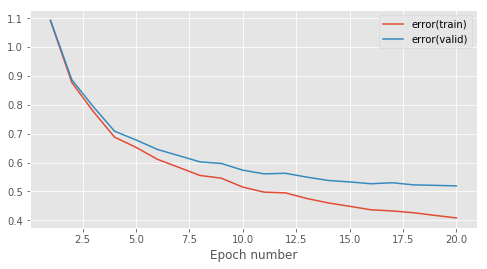

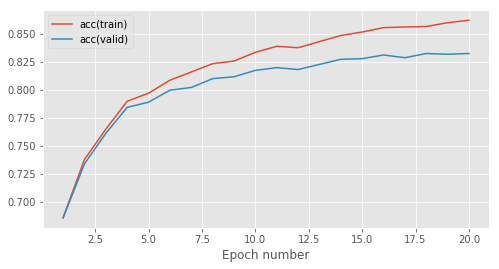

Epoch 1: 5.3s to complete
    error(train)=1.20e+00, acc(train)=6.58e-01, error(valid)=1.20e+00, acc(valid)=6.60e-01


Epoch 2: 6.0s to complete
    error(train)=9.37e-01, acc(train)=7.27e-01, error(valid)=9.49e-01, acc(valid)=7.21e-01


Epoch 3: 6.8s to complete
    error(train)=8.01e-01, acc(train)=7.59e-01, error(valid)=8.20e-01, acc(valid)=7.55e-01


Epoch 4: 5.8s to complete
    error(train)=7.29e-01, acc(train)=7.79e-01, error(valid)=7.52e-01, acc(valid)=7.70e-01


Epoch 5: 6.2s to complete
    error(train)=6.63e-01, acc(train)=7.96e-01, error(valid)=6.91e-01, acc(valid)=7.87e-01


Epoch 6: 5.7s to complete
    error(train)=6.30e-01, acc(train)=8.02e-01, error(valid)=6.64e-01, acc(valid)=7.94e-01


Epoch 7: 5.8s to complete
    error(train)=5.95e-01, acc(train)=8.15e-01, error(valid)=6.34e-01, acc(valid)=8.04e-01


Epoch 8: 5.9s to complete
    error(train)=5.66e-01, acc(train)=8.21e-01, error(valid)=6.09e-01, acc(valid)=8.07e-01


Epoch 9: 5.7s to complete
    error(train)=5.40e-01, acc(train)=8.28e-01, error(valid)=5.88e-01, acc(valid)=8.15e-01


Epoch 10: 5.8s to complete
    error(train)=5.19e-01, acc(train)=8.33e-01, error(valid)=5.69e-01, acc(valid)=8.20e-01


Epoch 11: 6.4s to complete
    error(train)=5.12e-01, acc(train)=8.34e-01, error(valid)=5.71e-01, acc(valid)=8.18e-01


Epoch 12: 6.7s to complete
    error(train)=4.87e-01, acc(train)=8.43e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01


Epoch 13: 6.9s to complete
    error(train)=4.77e-01, acc(train)=8.45e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 14: 6.1s to complete
    error(train)=4.62e-01, acc(train)=8.48e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


Epoch 15: 6.6s to complete
    error(train)=4.53e-01, acc(train)=8.50e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


Epoch 16: 5.5s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


Epoch 17: 6.4s to complete
    error(train)=4.32e-01, acc(train)=8.57e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 18: 6.4s to complete
    error(train)=4.25e-01, acc(train)=8.58e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


Epoch 19: 6.6s to complete
    error(train)=4.18e-01, acc(train)=8.58e-01, error(valid)=5.17e-01, acc(valid)=8.30e-01


Epoch 20: 6.6s to complete
    error(train)=4.10e-01, acc(train)=8.62e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


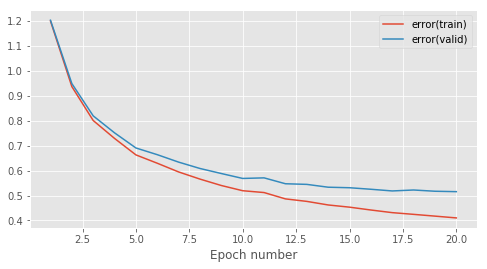

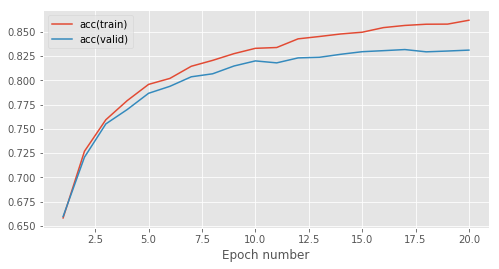

Epoch 1: 5.2s to complete
    error(train)=1.22e+00, acc(train)=6.51e-01, error(valid)=1.22e+00, acc(valid)=6.51e-01


Epoch 2: 5.5s to complete
    error(train)=9.75e-01, acc(train)=7.16e-01, error(valid)=9.87e-01, acc(valid)=7.08e-01


Epoch 3: 5.3s to complete
    error(train)=8.38e-01, acc(train)=7.51e-01, error(valid)=8.53e-01, acc(valid)=7.45e-01


Epoch 4: 6.0s to complete
    error(train)=7.60e-01, acc(train)=7.71e-01, error(valid)=7.80e-01, acc(valid)=7.64e-01


Epoch 5: 5.2s to complete
    error(train)=6.98e-01, acc(train)=7.87e-01, error(valid)=7.23e-01, acc(valid)=7.81e-01


Epoch 6: 6.9s to complete
    error(train)=6.61e-01, acc(train)=7.95e-01, error(valid)=6.89e-01, acc(valid)=7.85e-01


Epoch 7: 5.6s to complete
    error(train)=6.20e-01, acc(train)=8.06e-01, error(valid)=6.53e-01, acc(valid)=7.97e-01


Epoch 8: 5.9s to complete
    error(train)=5.95e-01, acc(train)=8.11e-01, error(valid)=6.38e-01, acc(valid)=7.99e-01


Epoch 9: 6.1s to complete
    error(train)=5.59e-01, acc(train)=8.23e-01, error(valid)=6.06e-01, acc(valid)=8.09e-01


Epoch 10: 3.4s to complete
    error(train)=5.49e-01, acc(train)=8.20e-01, error(valid)=6.01e-01, acc(valid)=8.06e-01


Epoch 11: 2.6s to complete
    error(train)=5.24e-01, acc(train)=8.31e-01, error(valid)=5.80e-01, acc(valid)=8.16e-01


Epoch 12: 2.6s to complete
    error(train)=5.05e-01, acc(train)=8.37e-01, error(valid)=5.66e-01, acc(valid)=8.17e-01


Epoch 13: 2.6s to complete
    error(train)=4.87e-01, acc(train)=8.41e-01, error(valid)=5.55e-01, acc(valid)=8.20e-01


Epoch 14: 5.4s to complete
    error(train)=4.77e-01, acc(train)=8.42e-01, error(valid)=5.49e-01, acc(valid)=8.20e-01


Epoch 15: 6.6s to complete
    error(train)=4.66e-01, acc(train)=8.46e-01, error(valid)=5.45e-01, acc(valid)=8.23e-01


Epoch 16: 6.4s to complete
    error(train)=4.51e-01, acc(train)=8.50e-01, error(valid)=5.37e-01, acc(valid)=8.24e-01


Epoch 17: 6.0s to complete
    error(train)=4.43e-01, acc(train)=8.54e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


Epoch 18: 6.8s to complete
    error(train)=4.33e-01, acc(train)=8.55e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


Epoch 19: 6.9s to complete
    error(train)=4.26e-01, acc(train)=8.57e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 20: 5.6s to complete
    error(train)=4.16e-01, acc(train)=8.60e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


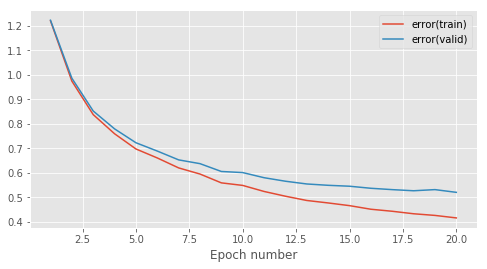

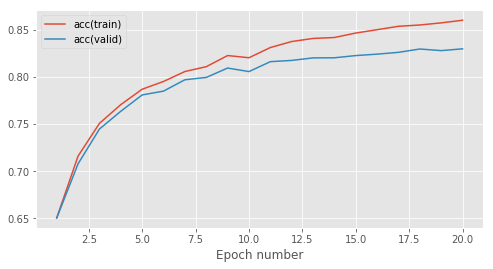

Epoch 1: 5.5s to complete
    error(train)=1.18e+00, acc(train)=6.65e-01, error(valid)=1.19e+00, acc(valid)=6.59e-01


Epoch 2: 6.8s to complete
    error(train)=9.47e-01, acc(train)=7.25e-01, error(valid)=9.64e-01, acc(valid)=7.16e-01


Epoch 3: 6.1s to complete
    error(train)=8.13e-01, acc(train)=7.55e-01, error(valid)=8.37e-01, acc(valid)=7.45e-01


Epoch 4: 5.9s to complete
    error(train)=7.29e-01, acc(train)=7.77e-01, error(valid)=7.57e-01, acc(valid)=7.66e-01


Epoch 5: 7.2s to complete
    error(train)=6.75e-01, acc(train)=7.93e-01, error(valid)=7.09e-01, acc(valid)=7.82e-01


Epoch 6: 5.9s to complete
    error(train)=6.25e-01, acc(train)=8.06e-01, error(valid)=6.65e-01, acc(valid)=7.95e-01


Epoch 7: 6.4s to complete
    error(train)=5.92e-01, acc(train)=8.14e-01, error(valid)=6.36e-01, acc(valid)=8.00e-01


Epoch 8: 6.7s to complete
    error(train)=5.62e-01, acc(train)=8.22e-01, error(valid)=6.11e-01, acc(valid)=8.09e-01


Epoch 9: 6.0s to complete
    error(train)=5.46e-01, acc(train)=8.25e-01, error(valid)=6.01e-01, acc(valid)=8.07e-01


Epoch 10: 5.7s to complete
    error(train)=5.27e-01, acc(train)=8.29e-01, error(valid)=5.86e-01, acc(valid)=8.12e-01


Epoch 11: 6.2s to complete
    error(train)=5.09e-01, acc(train)=8.34e-01, error(valid)=5.71e-01, acc(valid)=8.16e-01


Epoch 12: 6.0s to complete
    error(train)=4.95e-01, acc(train)=8.40e-01, error(valid)=5.64e-01, acc(valid)=8.18e-01


Epoch 13: 5.2s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


Epoch 14: 6.2s to complete
    error(train)=4.65e-01, acc(train)=8.49e-01, error(valid)=5.43e-01, acc(valid)=8.23e-01


Epoch 15: 7.1s to complete
    error(train)=4.62e-01, acc(train)=8.48e-01, error(valid)=5.47e-01, acc(valid)=8.25e-01


Epoch 16: 6.2s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 17: 6.5s to complete
    error(train)=4.35e-01, acc(train)=8.56e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


Epoch 18: 6.4s to complete
    error(train)=4.37e-01, acc(train)=8.50e-01, error(valid)=5.36e-01, acc(valid)=8.21e-01


Epoch 19: 6.5s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 20: 6.8s to complete
    error(train)=4.23e-01, acc(train)=8.56e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


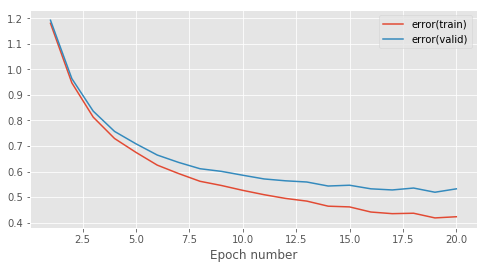

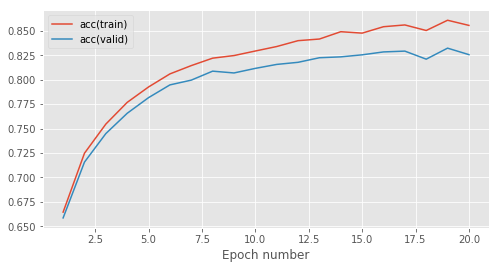

Epoch 1: 5.5s to complete
    error(train)=1.09e+00, acc(train)=6.86e-01, error(valid)=1.10e+00, acc(valid)=6.82e-01


Epoch 2: 5.2s to complete
    error(train)=8.75e-01, acc(train)=7.42e-01, error(valid)=8.91e-01, acc(valid)=7.36e-01


Epoch 3: 5.3s to complete
    error(train)=7.72e-01, acc(train)=7.67e-01, error(valid)=7.92e-01, acc(valid)=7.60e-01


Epoch 4: 5.3s to complete
    error(train)=7.01e-01, acc(train)=7.86e-01, error(valid)=7.25e-01, acc(valid)=7.79e-01


Epoch 5: 5.8s to complete
    error(train)=6.57e-01, acc(train)=7.96e-01, error(valid)=6.90e-01, acc(valid)=7.86e-01


Epoch 6: 5.0s to complete
    error(train)=6.07e-01, acc(train)=8.08e-01, error(valid)=6.46e-01, acc(valid)=7.97e-01


Epoch 7: 5.8s to complete
    error(train)=5.73e-01, acc(train)=8.19e-01, error(valid)=6.20e-01, acc(valid)=8.04e-01


Epoch 8: 6.3s to complete
    error(train)=5.47e-01, acc(train)=8.25e-01, error(valid)=5.99e-01, acc(valid)=8.10e-01


Epoch 9: 6.0s to complete
    error(train)=5.30e-01, acc(train)=8.29e-01, error(valid)=5.89e-01, acc(valid)=8.11e-01


Epoch 10: 6.0s to complete
    error(train)=5.06e-01, acc(train)=8.36e-01, error(valid)=5.73e-01, acc(valid)=8.14e-01


Epoch 11: 6.9s to complete
    error(train)=5.00e-01, acc(train)=8.35e-01, error(valid)=5.73e-01, acc(valid)=8.14e-01


Epoch 12: 5.9s to complete
    error(train)=4.85e-01, acc(train)=8.40e-01, error(valid)=5.63e-01, acc(valid)=8.16e-01


Epoch 13: 6.0s to complete
    error(train)=4.70e-01, acc(train)=8.42e-01, error(valid)=5.51e-01, acc(valid)=8.18e-01


Epoch 14: 5.5s to complete
    error(train)=4.51e-01, acc(train)=8.49e-01, error(valid)=5.38e-01, acc(valid)=8.23e-01


Epoch 15: 6.0s to complete
    error(train)=4.40e-01, acc(train)=8.52e-01, error(valid)=5.32e-01, acc(valid)=8.25e-01


Epoch 16: 6.4s to complete
    error(train)=4.30e-01, acc(train)=8.56e-01, error(valid)=5.28e-01, acc(valid)=8.28e-01


Epoch 17: 6.0s to complete
    error(train)=4.27e-01, acc(train)=8.56e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


Epoch 18: 5.9s to complete
    error(train)=4.11e-01, acc(train)=8.60e-01, error(valid)=5.17e-01, acc(valid)=8.30e-01


Epoch 19: 6.3s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=5.22e-01, acc(valid)=8.28e-01


Epoch 20: 5.4s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


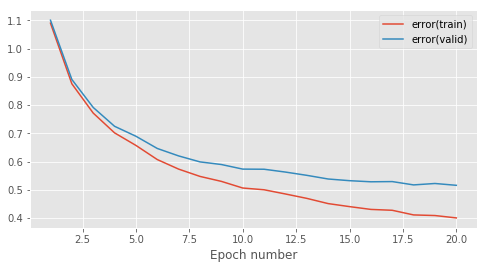

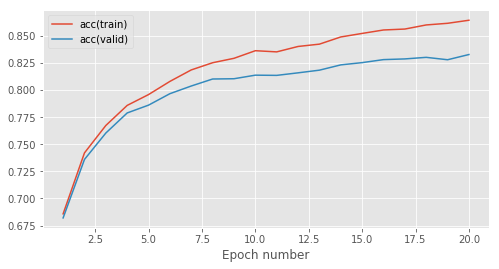

Epoch 1: 6.0s to complete
    error(train)=1.20e+00, acc(train)=6.62e-01, error(valid)=1.20e+00, acc(valid)=6.62e-01


Epoch 2: 5.7s to complete
    error(train)=9.26e-01, acc(train)=7.31e-01, error(valid)=9.38e-01, acc(valid)=7.29e-01


Epoch 3: 6.2s to complete
    error(train)=8.00e-01, acc(train)=7.62e-01, error(valid)=8.16e-01, acc(valid)=7.62e-01


Epoch 4: 6.6s to complete
    error(train)=7.10e-01, acc(train)=7.84e-01, error(valid)=7.36e-01, acc(valid)=7.81e-01


Epoch 5: 4.9s to complete
    error(train)=6.62e-01, acc(train)=7.96e-01, error(valid)=6.97e-01, acc(valid)=7.88e-01


Epoch 6: 5.6s to complete
    error(train)=6.24e-01, acc(train)=8.05e-01, error(valid)=6.64e-01, acc(valid)=7.94e-01


Epoch 7: 6.5s to complete
    error(train)=5.88e-01, acc(train)=8.16e-01, error(valid)=6.35e-01, acc(valid)=8.03e-01


Epoch 8: 6.0s to complete
    error(train)=5.61e-01, acc(train)=8.20e-01, error(valid)=6.14e-01, acc(valid)=8.06e-01


Epoch 9: 5.9s to complete
    error(train)=5.38e-01, acc(train)=8.29e-01, error(valid)=5.95e-01, acc(valid)=8.15e-01


Epoch 10: 5.8s to complete
    error(train)=5.25e-01, acc(train)=8.30e-01, error(valid)=5.85e-01, acc(valid)=8.14e-01


Epoch 11: 6.2s to complete
    error(train)=4.99e-01, acc(train)=8.38e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


Epoch 12: 6.2s to complete
    error(train)=4.86e-01, acc(train)=8.42e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


Epoch 13: 6.7s to complete
    error(train)=4.74e-01, acc(train)=8.45e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


Epoch 14: 6.8s to complete
    error(train)=4.58e-01, acc(train)=8.49e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


Epoch 15: 6.5s to complete
    error(train)=4.54e-01, acc(train)=8.50e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 16: 5.9s to complete
    error(train)=4.38e-01, acc(train)=8.52e-01, error(valid)=5.32e-01, acc(valid)=8.27e-01


Epoch 17: 5.9s to complete
    error(train)=4.27e-01, acc(train)=8.56e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


Epoch 18: 6.2s to complete
    error(train)=4.26e-01, acc(train)=8.56e-01, error(valid)=5.31e-01, acc(valid)=8.26e-01


Epoch 19: 5.7s to complete
    error(train)=4.14e-01, acc(train)=8.60e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


Epoch 20: 6.2s to complete
    error(train)=4.08e-01, acc(train)=8.62e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


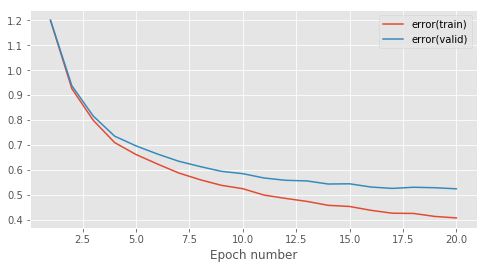

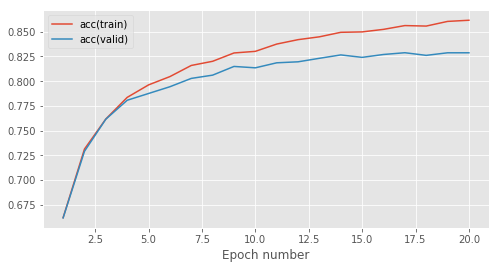

Epoch 1: 5.6s to complete
    error(train)=1.20e+00, acc(train)=6.60e-01, error(valid)=1.21e+00, acc(valid)=6.60e-01


Epoch 2: 4.6s to complete
    error(train)=9.65e-01, acc(train)=7.21e-01, error(valid)=9.75e-01, acc(valid)=7.20e-01


Epoch 3: 5.4s to complete
    error(train)=8.18e-01, acc(train)=7.59e-01, error(valid)=8.35e-01, acc(valid)=7.52e-01


Epoch 4: 7.1s to complete
    error(train)=7.49e-01, acc(train)=7.73e-01, error(valid)=7.73e-01, acc(valid)=7.68e-01


Epoch 5: 6.1s to complete
    error(train)=6.92e-01, acc(train)=7.88e-01, error(valid)=7.21e-01, acc(valid)=7.79e-01


Epoch 6: 5.6s to complete
    error(train)=6.37e-01, acc(train)=8.03e-01, error(valid)=6.70e-01, acc(valid)=7.95e-01


Epoch 7: 6.1s to complete
    error(train)=6.06e-01, acc(train)=8.08e-01, error(valid)=6.47e-01, acc(valid)=7.97e-01


Epoch 8: 5.7s to complete
    error(train)=5.78e-01, acc(train)=8.17e-01, error(valid)=6.24e-01, acc(valid)=8.02e-01


Epoch 9: 6.6s to complete
    error(train)=5.47e-01, acc(train)=8.24e-01, error(valid)=5.94e-01, acc(valid)=8.10e-01


Epoch 10: 6.6s to complete
    error(train)=5.24e-01, acc(train)=8.31e-01, error(valid)=5.80e-01, acc(valid)=8.13e-01


Epoch 11: 6.0s to complete
    error(train)=5.04e-01, acc(train)=8.38e-01, error(valid)=5.67e-01, acc(valid)=8.18e-01


Epoch 12: 6.2s to complete
    error(train)=4.97e-01, acc(train)=8.39e-01, error(valid)=5.63e-01, acc(valid)=8.17e-01


Epoch 13: 6.5s to complete
    error(train)=4.75e-01, acc(train)=8.46e-01, error(valid)=5.50e-01, acc(valid)=8.23e-01


Epoch 14: 6.2s to complete
    error(train)=4.68e-01, acc(train)=8.46e-01, error(valid)=5.49e-01, acc(valid)=8.23e-01


Epoch 15: 6.6s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


Epoch 16: 6.6s to complete
    error(train)=4.40e-01, acc(train)=8.55e-01, error(valid)=5.29e-01, acc(valid)=8.27e-01


Epoch 17: 6.1s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=5.25e-01, acc(valid)=8.28e-01


Epoch 18: 5.9s to complete
    error(train)=4.34e-01, acc(train)=8.55e-01, error(valid)=5.33e-01, acc(valid)=8.25e-01


Epoch 19: 5.9s to complete
    error(train)=4.13e-01, acc(train)=8.62e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


Epoch 20: 5.5s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=5.15e-01, acc(valid)=8.31e-01


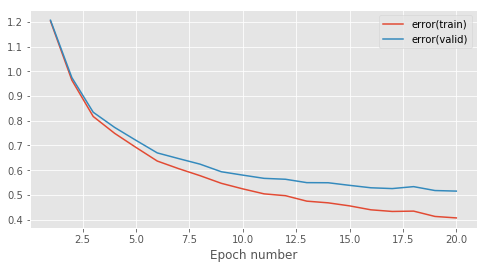

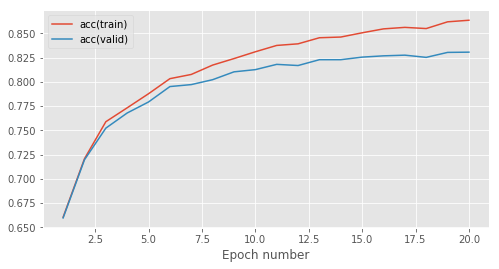

Epoch 1: 6.2s to complete
    error(train)=1.18e+00, acc(train)=6.68e-01, error(valid)=1.18e+00, acc(valid)=6.64e-01


Epoch 2: 6.0s to complete
    error(train)=9.25e-01, acc(train)=7.30e-01, error(valid)=9.40e-01, acc(valid)=7.26e-01


Epoch 3: 6.2s to complete
    error(train)=8.08e-01, acc(train)=7.60e-01, error(valid)=8.24e-01, acc(valid)=7.56e-01


Epoch 4: 5.9s to complete
    error(train)=7.22e-01, acc(train)=7.81e-01, error(valid)=7.45e-01, acc(valid)=7.75e-01


Epoch 5: 6.8s to complete
    error(train)=6.76e-01, acc(train)=7.92e-01, error(valid)=7.03e-01, acc(valid)=7.86e-01


Epoch 6: 6.2s to complete
    error(train)=6.21e-01, acc(train)=8.07e-01, error(valid)=6.53e-01, acc(valid)=7.98e-01


Epoch 7: 5.6s to complete
    error(train)=6.04e-01, acc(train)=8.11e-01, error(valid)=6.44e-01, acc(valid)=7.98e-01


Epoch 8: 6.4s to complete
    error(train)=5.63e-01, acc(train)=8.23e-01, error(valid)=6.08e-01, acc(valid)=8.09e-01


Epoch 9: 6.5s to complete
    error(train)=5.40e-01, acc(train)=8.28e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


Epoch 10: 5.6s to complete
    error(train)=5.17e-01, acc(train)=8.32e-01, error(valid)=5.76e-01, acc(valid)=8.16e-01


Epoch 11: 5.3s to complete
    error(train)=4.99e-01, acc(train)=8.39e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


Epoch 12: 5.3s to complete
    error(train)=4.89e-01, acc(train)=8.39e-01, error(valid)=5.56e-01, acc(valid)=8.21e-01


Epoch 13: 5.5s to complete
    error(train)=4.72e-01, acc(train)=8.44e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 14: 6.1s to complete
    error(train)=4.66e-01, acc(train)=8.41e-01, error(valid)=5.42e-01, acc(valid)=8.19e-01


Epoch 15: 6.4s to complete
    error(train)=4.48e-01, acc(train)=8.50e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


Epoch 16: 6.4s to complete
    error(train)=4.35e-01, acc(train)=8.55e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


Epoch 17: 6.9s to complete
    error(train)=4.24e-01, acc(train)=8.58e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


Epoch 18: 10.9s to complete
    error(train)=4.23e-01, acc(train)=8.56e-01, error(valid)=5.22e-01, acc(valid)=8.28e-01


Epoch 19: 10.3s to complete
    error(train)=4.09e-01, acc(train)=8.61e-01, error(valid)=5.13e-01, acc(valid)=8.31e-01


Epoch 20: 11.3s to complete
    error(train)=4.05e-01, acc(train)=8.61e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


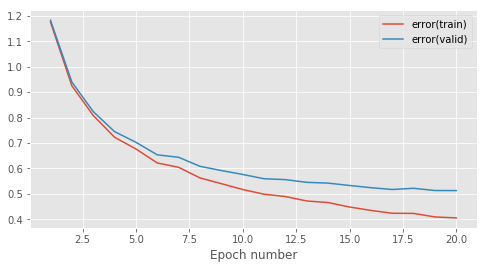

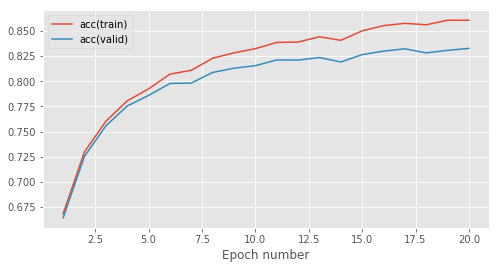

Epoch 1: 9.1s to complete
    error(train)=1.12e+00, acc(train)=6.80e-01, error(valid)=1.13e+00, acc(valid)=6.76e-01


Epoch 2: 10.3s to complete
    error(train)=8.91e-01, acc(train)=7.37e-01, error(valid)=9.01e-01, acc(valid)=7.36e-01


Epoch 3: 9.2s to complete
    error(train)=7.69e-01, acc(train)=7.70e-01, error(valid)=7.87e-01, acc(valid)=7.64e-01


Epoch 4: 9.4s to complete
    error(train)=6.91e-01, acc(train)=7.87e-01, error(valid)=7.14e-01, acc(valid)=7.80e-01


Epoch 5: 10.2s to complete
    error(train)=6.40e-01, acc(train)=8.01e-01, error(valid)=6.69e-01, acc(valid)=7.91e-01


Epoch 6: 10.2s to complete
    error(train)=5.98e-01, acc(train)=8.13e-01, error(valid)=6.31e-01, acc(valid)=8.05e-01


Epoch 7: 10.0s to complete
    error(train)=5.68e-01, acc(train)=8.20e-01, error(valid)=6.10e-01, acc(valid)=8.07e-01


Epoch 8: 10.3s to complete
    error(train)=5.44e-01, acc(train)=8.28e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


Epoch 9: 10.8s to complete
    error(train)=5.36e-01, acc(train)=8.27e-01, error(valid)=5.91e-01, acc(valid)=8.09e-01


Epoch 10: 9.9s to complete
    error(train)=5.12e-01, acc(train)=8.32e-01, error(valid)=5.72e-01, acc(valid)=8.16e-01


Epoch 11: 12.2s to complete
    error(train)=4.90e-01, acc(train)=8.40e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 12: 9.9s to complete
    error(train)=4.80e-01, acc(train)=8.42e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01


Epoch 13: 10.5s to complete
    error(train)=4.61e-01, acc(train)=8.48e-01, error(valid)=5.38e-01, acc(valid)=8.25e-01


Epoch 14: 9.1s to complete
    error(train)=4.56e-01, acc(train)=8.48e-01, error(valid)=5.37e-01, acc(valid)=8.24e-01


Epoch 15: 10.4s to complete
    error(train)=4.36e-01, acc(train)=8.55e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 16: 9.7s to complete
    error(train)=4.30e-01, acc(train)=8.57e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


Epoch 17: 11.2s to complete
    error(train)=4.31e-01, acc(train)=8.55e-01, error(valid)=5.30e-01, acc(valid)=8.28e-01


Epoch 18: 11.8s to complete
    error(train)=4.15e-01, acc(train)=8.59e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 19: 10.2s to complete
    error(train)=4.16e-01, acc(train)=8.58e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


Epoch 20: 8.9s to complete
    error(train)=3.97e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


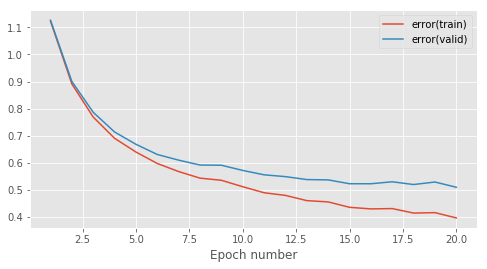

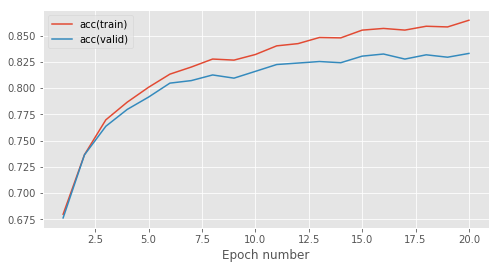

Epoch 1: 7.8s to complete
    error(train)=1.24e+00, acc(train)=6.48e-01, error(valid)=1.25e+00, acc(valid)=6.46e-01


Epoch 2: 10.9s to complete
    error(train)=9.81e-01, acc(train)=7.18e-01, error(valid)=9.94e-01, acc(valid)=7.14e-01


Epoch 3: 9.9s to complete
    error(train)=8.33e-01, acc(train)=7.53e-01, error(valid)=8.52e-01, acc(valid)=7.47e-01


Epoch 4: 9.6s to complete
    error(train)=7.61e-01, acc(train)=7.68e-01, error(valid)=7.83e-01, acc(valid)=7.63e-01


Epoch 5: 11.2s to complete
    error(train)=6.90e-01, acc(train)=7.88e-01, error(valid)=7.21e-01, acc(valid)=7.77e-01


Epoch 6: 11.1s to complete
    error(train)=6.47e-01, acc(train)=7.96e-01, error(valid)=6.79e-01, acc(valid)=7.88e-01


Epoch 7: 12.0s to complete
    error(train)=6.18e-01, acc(train)=8.05e-01, error(valid)=6.60e-01, acc(valid)=7.93e-01


Epoch 8: 9.8s to complete
    error(train)=5.85e-01, acc(train)=8.16e-01, error(valid)=6.33e-01, acc(valid)=7.99e-01


Epoch 9: 10.1s to complete
    error(train)=5.59e-01, acc(train)=8.23e-01, error(valid)=6.13e-01, acc(valid)=8.07e-01


Epoch 10: 9.1s to complete
    error(train)=5.35e-01, acc(train)=8.30e-01, error(valid)=5.98e-01, acc(valid)=8.10e-01


Epoch 11: 11.8s to complete
    error(train)=5.24e-01, acc(train)=8.32e-01, error(valid)=5.90e-01, acc(valid)=8.13e-01


Epoch 12: 10.3s to complete
    error(train)=5.00e-01, acc(train)=8.39e-01, error(valid)=5.71e-01, acc(valid)=8.17e-01


Epoch 13: 11.4s to complete
    error(train)=4.88e-01, acc(train)=8.42e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


Epoch 14: 10.5s to complete
    error(train)=4.77e-01, acc(train)=8.44e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


Epoch 15: 10.0s to complete
    error(train)=4.70e-01, acc(train)=8.46e-01, error(valid)=5.56e-01, acc(valid)=8.19e-01


Epoch 16: 10.3s to complete
    error(train)=4.55e-01, acc(train)=8.50e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01


Epoch 17: 9.9s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=5.39e-01, acc(valid)=8.25e-01


Epoch 18: 9.6s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.37e-01, acc(valid)=8.25e-01


Epoch 19: 11.3s to complete
    error(train)=4.30e-01, acc(train)=8.57e-01, error(valid)=5.33e-01, acc(valid)=8.25e-01


Epoch 20: 11.2s to complete
    error(train)=4.17e-01, acc(train)=8.60e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


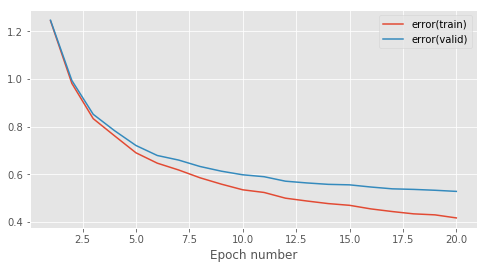

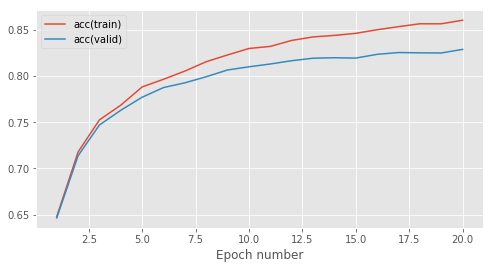

Epoch 1: 8.9s to complete
    error(train)=1.23e+00, acc(train)=6.54e-01, error(valid)=1.23e+00, acc(valid)=6.50e-01


Epoch 2: 9.4s to complete
    error(train)=9.78e-01, acc(train)=7.16e-01, error(valid)=9.90e-01, acc(valid)=7.09e-01


Epoch 3: 11.0s to complete
    error(train)=8.31e-01, acc(train)=7.54e-01, error(valid)=8.47e-01, acc(valid)=7.48e-01


Epoch 4: 10.0s to complete
    error(train)=7.48e-01, acc(train)=7.74e-01, error(valid)=7.68e-01, acc(valid)=7.69e-01


Epoch 5: 11.2s to complete
    error(train)=6.88e-01, acc(train)=7.87e-01, error(valid)=7.14e-01, acc(valid)=7.80e-01


Epoch 6: 11.0s to complete
    error(train)=6.39e-01, acc(train)=7.99e-01, error(valid)=6.71e-01, acc(valid)=7.90e-01


Epoch 7: 10.6s to complete
    error(train)=6.15e-01, acc(train)=8.06e-01, error(valid)=6.54e-01, acc(valid)=7.95e-01


Epoch 8: 11.3s to complete
    error(train)=5.77e-01, acc(train)=8.17e-01, error(valid)=6.18e-01, acc(valid)=8.04e-01


Epoch 9: 9.4s to complete
    error(train)=5.54e-01, acc(train)=8.23e-01, error(valid)=6.04e-01, acc(valid)=8.10e-01


Epoch 10: 10.7s to complete
    error(train)=5.30e-01, acc(train)=8.30e-01, error(valid)=5.82e-01, acc(valid)=8.18e-01


Epoch 11: 11.2s to complete
    error(train)=5.15e-01, acc(train)=8.32e-01, error(valid)=5.76e-01, acc(valid)=8.15e-01


Epoch 12: 11.0s to complete
    error(train)=5.01e-01, acc(train)=8.38e-01, error(valid)=5.67e-01, acc(valid)=8.18e-01


Epoch 13: 10.1s to complete
    error(train)=4.82e-01, acc(train)=8.43e-01, error(valid)=5.55e-01, acc(valid)=8.22e-01


Epoch 14: 9.8s to complete
    error(train)=4.77e-01, acc(train)=8.43e-01, error(valid)=5.50e-01, acc(valid)=8.21e-01


Epoch 15: 9.3s to complete
    error(train)=4.62e-01, acc(train)=8.48e-01, error(valid)=5.44e-01, acc(valid)=8.25e-01


Epoch 16: 10.2s to complete
    error(train)=4.55e-01, acc(train)=8.50e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


Epoch 17: 10.4s to complete
    error(train)=4.38e-01, acc(train)=8.54e-01, error(valid)=5.28e-01, acc(valid)=8.27e-01


Epoch 18: 10.5s to complete
    error(train)=4.31e-01, acc(train)=8.56e-01, error(valid)=5.28e-01, acc(valid)=8.27e-01


Epoch 19: 11.4s to complete
    error(train)=4.17e-01, acc(train)=8.60e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


Epoch 20: 12.5s to complete
    error(train)=4.13e-01, acc(train)=8.62e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


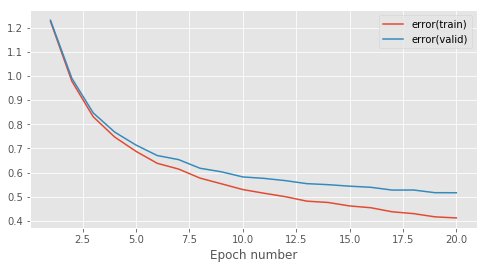

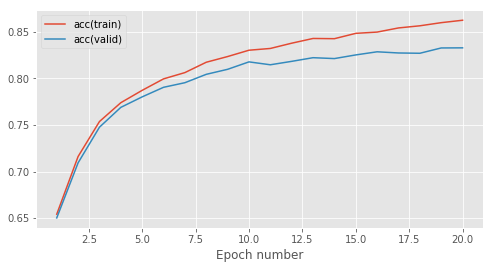

Epoch 1: 10.1s to complete
    error(train)=1.22e+00, acc(train)=6.51e-01, error(valid)=1.23e+00, acc(valid)=6.47e-01


Epoch 2: 11.0s to complete
    error(train)=9.86e-01, acc(train)=7.16e-01, error(valid)=9.95e-01, acc(valid)=7.13e-01


Epoch 3: 11.7s to complete
    error(train)=8.42e-01, acc(train)=7.50e-01, error(valid)=8.56e-01, acc(valid)=7.45e-01


Epoch 4: 10.7s to complete
    error(train)=7.48e-01, acc(train)=7.75e-01, error(valid)=7.68e-01, acc(valid)=7.69e-01


Epoch 5: 11.3s to complete
    error(train)=6.93e-01, acc(train)=7.88e-01, error(valid)=7.22e-01, acc(valid)=7.77e-01


Epoch 6: 10.6s to complete
    error(train)=6.47e-01, acc(train)=8.00e-01, error(valid)=6.82e-01, acc(valid)=7.87e-01


Epoch 7: 10.3s to complete
    error(train)=6.09e-01, acc(train)=8.10e-01, error(valid)=6.53e-01, acc(valid)=7.96e-01


Epoch 8: 11.1s to complete
    error(train)=5.78e-01, acc(train)=8.19e-01, error(valid)=6.25e-01, acc(valid)=8.03e-01


Epoch 9: 10.8s to complete
    error(train)=5.54e-01, acc(train)=8.25e-01, error(valid)=6.07e-01, acc(valid)=8.06e-01


Epoch 10: 9.0s to complete
    error(train)=5.26e-01, acc(train)=8.33e-01, error(valid)=5.82e-01, acc(valid)=8.14e-01


Epoch 11: 11.1s to complete
    error(train)=5.17e-01, acc(train)=8.34e-01, error(valid)=5.77e-01, acc(valid)=8.16e-01


Epoch 12: 11.3s to complete
    error(train)=4.98e-01, acc(train)=8.39e-01, error(valid)=5.65e-01, acc(valid)=8.20e-01


Epoch 13: 9.8s to complete
    error(train)=4.86e-01, acc(train)=8.43e-01, error(valid)=5.63e-01, acc(valid)=8.18e-01


Epoch 14: 11.0s to complete
    error(train)=4.74e-01, acc(train)=8.44e-01, error(valid)=5.54e-01, acc(valid)=8.21e-01


Epoch 15: 9.2s to complete
    error(train)=4.58e-01, acc(train)=8.50e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


Epoch 16: 6.4s to complete
    error(train)=4.55e-01, acc(train)=8.50e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


Epoch 17: 7.4s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 18: 5.1s to complete
    error(train)=4.30e-01, acc(train)=8.57e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 19: 6.2s to complete
    error(train)=4.22e-01, acc(train)=8.60e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


Epoch 20: 6.4s to complete
    error(train)=4.12e-01, acc(train)=8.61e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


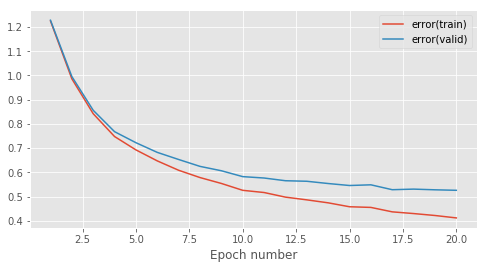

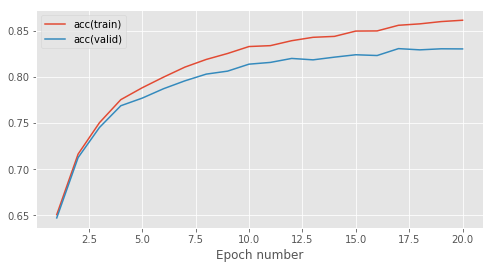

Epoch 1: 5.6s to complete
    error(train)=1.13e+00, acc(train)=6.76e-01, error(valid)=1.14e+00, acc(valid)=6.73e-01


Epoch 2: 5.6s to complete
    error(train)=8.97e-01, acc(train)=7.35e-01, error(valid)=9.11e-01, acc(valid)=7.29e-01


Epoch 3: 5.0s to complete
    error(train)=7.72e-01, acc(train)=7.67e-01, error(valid)=7.93e-01, acc(valid)=7.64e-01


Epoch 4: 5.3s to complete
    error(train)=7.08e-01, acc(train)=7.85e-01, error(valid)=7.35e-01, acc(valid)=7.76e-01


Epoch 5: 5.2s to complete
    error(train)=6.42e-01, acc(train)=8.00e-01, error(valid)=6.77e-01, acc(valid)=7.90e-01


Epoch 6: 5.5s to complete
    error(train)=6.09e-01, acc(train)=8.09e-01, error(valid)=6.49e-01, acc(valid)=7.98e-01


Epoch 7: 5.4s to complete
    error(train)=5.74e-01, acc(train)=8.18e-01, error(valid)=6.23e-01, acc(valid)=8.03e-01


Epoch 8: 6.9s to complete
    error(train)=5.57e-01, acc(train)=8.20e-01, error(valid)=6.09e-01, acc(valid)=8.02e-01


Epoch 9: 5.9s to complete
    error(train)=5.27e-01, acc(train)=8.31e-01, error(valid)=5.79e-01, acc(valid)=8.16e-01


Epoch 10: 6.0s to complete
    error(train)=5.13e-01, acc(train)=8.33e-01, error(valid)=5.73e-01, acc(valid)=8.14e-01


Epoch 11: 5.9s to complete
    error(train)=4.94e-01, acc(train)=8.40e-01, error(valid)=5.58e-01, acc(valid)=8.19e-01


Epoch 12: 5.3s to complete
    error(train)=4.83e-01, acc(train)=8.42e-01, error(valid)=5.51e-01, acc(valid)=8.21e-01


Epoch 13: 5.6s to complete
    error(train)=4.71e-01, acc(train)=8.46e-01, error(valid)=5.47e-01, acc(valid)=8.24e-01


Epoch 14: 5.5s to complete
    error(train)=4.59e-01, acc(train)=8.48e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


Epoch 15: 5.7s to complete
    error(train)=4.42e-01, acc(train)=8.53e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


Epoch 16: 6.2s to complete
    error(train)=4.38e-01, acc(train)=8.55e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 17: 6.0s to complete
    error(train)=4.25e-01, acc(train)=8.57e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


Epoch 18: 6.2s to complete
    error(train)=4.18e-01, acc(train)=8.59e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 19: 6.0s to complete
    error(train)=4.11e-01, acc(train)=8.61e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 20: 6.5s to complete
    error(train)=4.04e-01, acc(train)=8.63e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


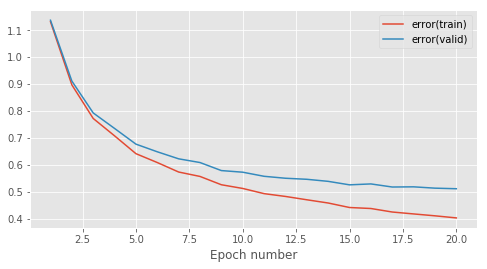

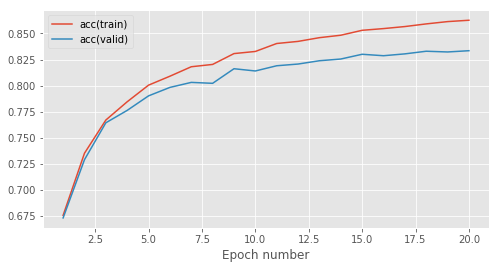

Epoch 1: 5.4s to complete
    error(train)=1.63e+00, acc(train)=5.64e-01, error(valid)=1.63e+00, acc(valid)=5.60e-01


Epoch 2: 4.6s to complete
    error(train)=1.28e+00, acc(train)=6.45e-01, error(valid)=1.29e+00, acc(valid)=6.37e-01


Epoch 3: 5.5s to complete
    error(train)=1.13e+00, acc(train)=6.81e-01, error(valid)=1.15e+00, acc(valid)=6.77e-01


Epoch 4: 6.1s to complete
    error(train)=1.04e+00, acc(train)=7.04e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 5: 6.2s to complete
    error(train)=9.59e-01, acc(train)=7.23e-01, error(valid)=9.73e-01, acc(valid)=7.15e-01


Epoch 6: 5.8s to complete
    error(train)=9.02e-01, acc(train)=7.39e-01, error(valid)=9.16e-01, acc(valid)=7.31e-01


Epoch 7: 5.7s to complete
    error(train)=8.59e-01, acc(train)=7.48e-01, error(valid)=8.78e-01, acc(valid)=7.39e-01


Epoch 8: 7.2s to complete
    error(train)=8.12e-01, acc(train)=7.60e-01, error(valid)=8.30e-01, acc(valid)=7.51e-01


Epoch 9: 6.1s to complete
    error(train)=7.81e-01, acc(train)=7.68e-01, error(valid)=8.02e-01, acc(valid)=7.57e-01


Epoch 10: 5.9s to complete
    error(train)=7.49e-01, acc(train)=7.76e-01, error(valid)=7.73e-01, acc(valid)=7.68e-01


Epoch 11: 5.4s to complete
    error(train)=7.22e-01, acc(train)=7.82e-01, error(valid)=7.47e-01, acc(valid)=7.73e-01


Epoch 12: 5.7s to complete
    error(train)=7.04e-01, acc(train)=7.89e-01, error(valid)=7.31e-01, acc(valid)=7.79e-01


Epoch 13: 5.5s to complete
    error(train)=6.82e-01, acc(train)=7.92e-01, error(valid)=7.14e-01, acc(valid)=7.83e-01


Epoch 14: 6.0s to complete
    error(train)=6.59e-01, acc(train)=7.99e-01, error(valid)=6.91e-01, acc(valid)=7.89e-01


Epoch 15: 5.6s to complete
    error(train)=6.43e-01, acc(train)=8.04e-01, error(valid)=6.78e-01, acc(valid)=7.91e-01


Epoch 16: 5.6s to complete
    error(train)=6.26e-01, acc(train)=8.07e-01, error(valid)=6.63e-01, acc(valid)=7.94e-01


Epoch 17: 5.6s to complete
    error(train)=6.19e-01, acc(train)=8.09e-01, error(valid)=6.58e-01, acc(valid)=7.98e-01


Epoch 18: 6.0s to complete
    error(train)=6.03e-01, acc(train)=8.13e-01, error(valid)=6.43e-01, acc(valid)=8.01e-01


Epoch 19: 5.4s to complete
    error(train)=5.94e-01, acc(train)=8.15e-01, error(valid)=6.38e-01, acc(valid)=8.03e-01


Epoch 20: 5.8s to complete
    error(train)=5.81e-01, acc(train)=8.19e-01, error(valid)=6.27e-01, acc(valid)=8.06e-01


Epoch 21: 6.1s to complete
    error(train)=5.69e-01, acc(train)=8.22e-01, error(valid)=6.17e-01, acc(valid)=8.09e-01


Epoch 22: 6.2s to complete
    error(train)=5.59e-01, acc(train)=8.25e-01, error(valid)=6.10e-01, acc(valid)=8.09e-01


Epoch 23: 6.2s to complete
    error(train)=5.51e-01, acc(train)=8.27e-01, error(valid)=6.02e-01, acc(valid)=8.13e-01


Epoch 24: 5.3s to complete
    error(train)=5.41e-01, acc(train)=8.30e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


Epoch 25: 5.8s to complete
    error(train)=5.37e-01, acc(train)=8.29e-01, error(valid)=5.94e-01, acc(valid)=8.12e-01


Epoch 26: 6.2s to complete
    error(train)=5.31e-01, acc(train)=8.32e-01, error(valid)=5.92e-01, acc(valid)=8.11e-01


Epoch 27: 6.2s to complete
    error(train)=5.21e-01, acc(train)=8.34e-01, error(valid)=5.81e-01, acc(valid)=8.18e-01


Epoch 28: 5.7s to complete
    error(train)=5.15e-01, acc(train)=8.36e-01, error(valid)=5.79e-01, acc(valid)=8.18e-01


Epoch 29: 5.9s to complete
    error(train)=5.07e-01, acc(train)=8.38e-01, error(valid)=5.73e-01, acc(valid)=8.20e-01


Epoch 30: 5.3s to complete
    error(train)=5.03e-01, acc(train)=8.39e-01, error(valid)=5.69e-01, acc(valid)=8.21e-01


Epoch 31: 6.6s to complete
    error(train)=4.98e-01, acc(train)=8.40e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


Epoch 32: 6.3s to complete
    error(train)=4.91e-01, acc(train)=8.43e-01, error(valid)=5.63e-01, acc(valid)=8.22e-01


Epoch 33: 6.2s to complete
    error(train)=4.83e-01, acc(train)=8.45e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 34: 6.7s to complete
    error(train)=4.82e-01, acc(train)=8.45e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


Epoch 35: 5.6s to complete
    error(train)=4.77e-01, acc(train)=8.45e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 36: 6.5s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


Epoch 37: 5.4s to complete
    error(train)=4.63e-01, acc(train)=8.51e-01, error(valid)=5.45e-01, acc(valid)=8.26e-01


Epoch 38: 11.0s to complete
    error(train)=4.64e-01, acc(train)=8.50e-01, error(valid)=5.49e-01, acc(valid)=8.25e-01


Epoch 39: 11.1s to complete
    error(train)=4.59e-01, acc(train)=8.52e-01, error(valid)=5.45e-01, acc(valid)=8.28e-01


Epoch 40: 10.9s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


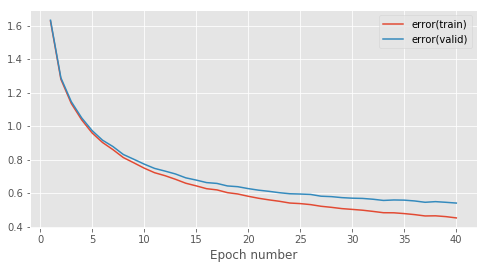

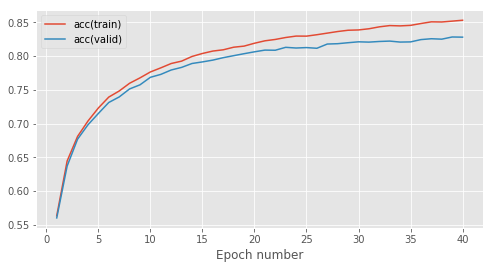

Epoch 1: 9.7s to complete
    error(train)=1.58e+00, acc(train)=5.70e-01, error(valid)=1.58e+00, acc(valid)=5.68e-01


Epoch 2: 12.6s to complete
    error(train)=1.26e+00, acc(train)=6.48e-01, error(valid)=1.26e+00, acc(valid)=6.48e-01


Epoch 3: 10.9s to complete
    error(train)=1.11e+00, acc(train)=6.84e-01, error(valid)=1.12e+00, acc(valid)=6.84e-01


Epoch 4: 10.8s to complete
    error(train)=1.01e+00, acc(train)=7.10e-01, error(valid)=1.02e+00, acc(valid)=7.08e-01


Epoch 5: 11.7s to complete
    error(train)=9.36e-01, acc(train)=7.29e-01, error(valid)=9.52e-01, acc(valid)=7.25e-01


Epoch 6: 9.7s to complete
    error(train)=8.78e-01, acc(train)=7.44e-01, error(valid)=8.98e-01, acc(valid)=7.38e-01


Epoch 7: 10.9s to complete
    error(train)=8.35e-01, acc(train)=7.54e-01, error(valid)=8.57e-01, acc(valid)=7.48e-01


Epoch 8: 9.9s to complete
    error(train)=7.92e-01, acc(train)=7.67e-01, error(valid)=8.16e-01, acc(valid)=7.59e-01


Epoch 9: 10.0s to complete
    error(train)=7.59e-01, acc(train)=7.74e-01, error(valid)=7.87e-01, acc(valid)=7.69e-01


Epoch 10: 9.7s to complete
    error(train)=7.30e-01, acc(train)=7.82e-01, error(valid)=7.57e-01, acc(valid)=7.74e-01


Epoch 11: 9.4s to complete
    error(train)=7.06e-01, acc(train)=7.88e-01, error(valid)=7.36e-01, acc(valid)=7.81e-01


Epoch 12: 11.8s to complete
    error(train)=6.83e-01, acc(train)=7.94e-01, error(valid)=7.15e-01, acc(valid)=7.84e-01


Epoch 13: 12.3s to complete
    error(train)=6.66e-01, acc(train)=7.97e-01, error(valid)=6.99e-01, acc(valid)=7.86e-01


Epoch 14: 10.8s to complete
    error(train)=6.52e-01, acc(train)=8.02e-01, error(valid)=6.89e-01, acc(valid)=7.90e-01


Epoch 15: 11.7s to complete
    error(train)=6.34e-01, acc(train)=8.07e-01, error(valid)=6.72e-01, acc(valid)=7.97e-01


Epoch 16: 12.0s to complete
    error(train)=6.20e-01, acc(train)=8.09e-01, error(valid)=6.60e-01, acc(valid)=7.98e-01


Epoch 17: 9.1s to complete
    error(train)=6.04e-01, acc(train)=8.14e-01, error(valid)=6.46e-01, acc(valid)=8.00e-01


Epoch 18: 11.6s to complete
    error(train)=5.96e-01, acc(train)=8.16e-01, error(valid)=6.41e-01, acc(valid)=8.04e-01


Epoch 19: 11.1s to complete
    error(train)=5.84e-01, acc(train)=8.19e-01, error(valid)=6.31e-01, acc(valid)=8.03e-01


Epoch 20: 10.5s to complete
    error(train)=5.77e-01, acc(train)=8.20e-01, error(valid)=6.25e-01, acc(valid)=8.09e-01


Epoch 21: 9.9s to complete
    error(train)=5.64e-01, acc(train)=8.24e-01, error(valid)=6.16e-01, acc(valid)=8.10e-01


Epoch 22: 10.6s to complete
    error(train)=5.54e-01, acc(train)=8.26e-01, error(valid)=6.08e-01, acc(valid)=8.11e-01


Epoch 23: 10.5s to complete
    error(train)=5.44e-01, acc(train)=8.30e-01, error(valid)=6.01e-01, acc(valid)=8.15e-01


Epoch 24: 10.9s to complete
    error(train)=5.41e-01, acc(train)=8.30e-01, error(valid)=5.98e-01, acc(valid)=8.13e-01


Epoch 25: 10.1s to complete
    error(train)=5.30e-01, acc(train)=8.33e-01, error(valid)=5.87e-01, acc(valid)=8.18e-01


Epoch 26: 10.2s to complete
    error(train)=5.23e-01, acc(train)=8.34e-01, error(valid)=5.86e-01, acc(valid)=8.17e-01


Epoch 27: 10.3s to complete
    error(train)=5.14e-01, acc(train)=8.37e-01, error(valid)=5.78e-01, acc(valid)=8.18e-01


Epoch 28: 10.2s to complete
    error(train)=5.13e-01, acc(train)=8.37e-01, error(valid)=5.80e-01, acc(valid)=8.18e-01


Epoch 29: 11.2s to complete
    error(train)=5.03e-01, acc(train)=8.39e-01, error(valid)=5.70e-01, acc(valid)=8.22e-01


Epoch 30: 11.3s to complete
    error(train)=4.99e-01, acc(train)=8.41e-01, error(valid)=5.72e-01, acc(valid)=8.20e-01


Epoch 31: 10.8s to complete
    error(train)=4.93e-01, acc(train)=8.43e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


Epoch 32: 11.5s to complete
    error(train)=4.89e-01, acc(train)=8.43e-01, error(valid)=5.66e-01, acc(valid)=8.20e-01


Epoch 33: 11.9s to complete
    error(train)=4.87e-01, acc(train)=8.44e-01, error(valid)=5.65e-01, acc(valid)=8.23e-01


Epoch 34: 8.6s to complete
    error(train)=4.79e-01, acc(train)=8.45e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


Epoch 35: 9.8s to complete
    error(train)=4.69e-01, acc(train)=8.49e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


Epoch 36: 9.6s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


Epoch 37: 10.8s to complete
    error(train)=4.65e-01, acc(train)=8.49e-01, error(valid)=5.51e-01, acc(valid)=8.26e-01


Epoch 38: 10.0s to complete
    error(train)=4.56e-01, acc(train)=8.52e-01, error(valid)=5.45e-01, acc(valid)=8.27e-01


Epoch 39: 11.0s to complete
    error(train)=4.54e-01, acc(train)=8.52e-01, error(valid)=5.46e-01, acc(valid)=8.26e-01


Epoch 40: 11.7s to complete
    error(train)=4.47e-01, acc(train)=8.55e-01, error(valid)=5.42e-01, acc(valid)=8.28e-01


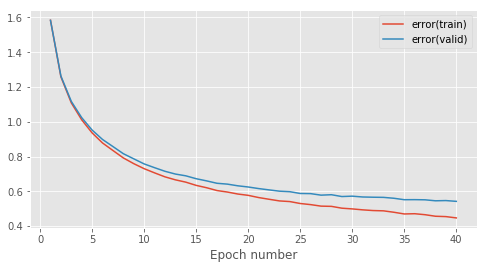

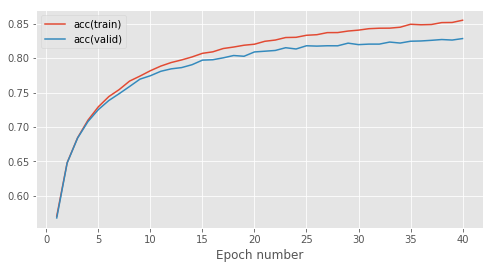

Epoch 1: 9.8s to complete
    error(train)=1.56e+00, acc(train)=5.72e-01, error(valid)=1.56e+00, acc(valid)=5.67e-01


Epoch 2: 9.8s to complete
    error(train)=1.24e+00, acc(train)=6.51e-01, error(valid)=1.25e+00, acc(valid)=6.47e-01


Epoch 3: 9.1s to complete
    error(train)=1.10e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.83e-01


Epoch 4: 11.2s to complete
    error(train)=9.97e-01, acc(train)=7.14e-01, error(valid)=1.01e+00, acc(valid)=7.10e-01


Epoch 5: 10.5s to complete
    error(train)=9.22e-01, acc(train)=7.34e-01, error(valid)=9.36e-01, acc(valid)=7.28e-01


Epoch 6: 11.9s to complete
    error(train)=8.64e-01, acc(train)=7.45e-01, error(valid)=8.81e-01, acc(valid)=7.40e-01


Epoch 7: 11.5s to complete
    error(train)=8.17e-01, acc(train)=7.58e-01, error(valid)=8.41e-01, acc(valid)=7.50e-01


Epoch 8: 11.3s to complete
    error(train)=7.73e-01, acc(train)=7.70e-01, error(valid)=7.96e-01, acc(valid)=7.59e-01


Epoch 9: 8.5s to complete
    error(train)=7.36e-01, acc(train)=7.80e-01, error(valid)=7.62e-01, acc(valid)=7.70e-01


Epoch 10: 10.3s to complete
    error(train)=7.12e-01, acc(train)=7.85e-01, error(valid)=7.42e-01, acc(valid)=7.75e-01


Epoch 11: 11.6s to complete
    error(train)=6.86e-01, acc(train)=7.92e-01, error(valid)=7.19e-01, acc(valid)=7.81e-01


Epoch 12: 10.6s to complete
    error(train)=6.67e-01, acc(train)=7.95e-01, error(valid)=7.04e-01, acc(valid)=7.83e-01


Epoch 13: 11.0s to complete
    error(train)=6.44e-01, acc(train)=8.02e-01, error(valid)=6.80e-01, acc(valid)=7.90e-01


Epoch 14: 11.5s to complete
    error(train)=6.27e-01, acc(train)=8.06e-01, error(valid)=6.66e-01, acc(valid)=7.94e-01


Epoch 15: 10.2s to complete
    error(train)=6.12e-01, acc(train)=8.11e-01, error(valid)=6.54e-01, acc(valid)=7.99e-01


Epoch 16: 12.3s to complete
    error(train)=5.98e-01, acc(train)=8.15e-01, error(valid)=6.42e-01, acc(valid)=8.00e-01


Epoch 17: 10.0s to complete
    error(train)=5.87e-01, acc(train)=8.17e-01, error(valid)=6.32e-01, acc(valid)=8.02e-01


Epoch 18: 11.1s to complete
    error(train)=5.74e-01, acc(train)=8.21e-01, error(valid)=6.21e-01, acc(valid)=8.05e-01


Epoch 19: 9.0s to complete
    error(train)=5.65e-01, acc(train)=8.22e-01, error(valid)=6.16e-01, acc(valid)=8.06e-01


Epoch 20: 8.6s to complete
    error(train)=5.56e-01, acc(train)=8.25e-01, error(valid)=6.10e-01, acc(valid)=8.07e-01


Epoch 21: 9.4s to complete
    error(train)=5.49e-01, acc(train)=8.25e-01, error(valid)=6.03e-01, acc(valid)=8.10e-01


Epoch 22: 11.6s to complete
    error(train)=5.38e-01, acc(train)=8.30e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


Epoch 23: 10.8s to complete
    error(train)=5.28e-01, acc(train)=8.31e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


Epoch 24: 9.7s to complete
    error(train)=5.26e-01, acc(train)=8.32e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


Epoch 25: 10.3s to complete
    error(train)=5.14e-01, acc(train)=8.36e-01, error(valid)=5.79e-01, acc(valid)=8.15e-01


Epoch 26: 11.6s to complete
    error(train)=5.08e-01, acc(train)=8.36e-01, error(valid)=5.76e-01, acc(valid)=8.17e-01


Epoch 27: 12.0s to complete
    error(train)=5.05e-01, acc(train)=8.37e-01, error(valid)=5.76e-01, acc(valid)=8.17e-01


Epoch 28: 10.4s to complete
    error(train)=5.00e-01, acc(train)=8.38e-01, error(valid)=5.72e-01, acc(valid)=8.16e-01


Epoch 29: 11.0s to complete
    error(train)=4.93e-01, acc(train)=8.40e-01, error(valid)=5.66e-01, acc(valid)=8.19e-01


Epoch 30: 8.7s to complete
    error(train)=4.87e-01, acc(train)=8.41e-01, error(valid)=5.64e-01, acc(valid)=8.18e-01


Epoch 31: 10.1s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 32: 10.3s to complete
    error(train)=4.79e-01, acc(train)=8.43e-01, error(valid)=5.60e-01, acc(valid)=8.20e-01


Epoch 33: 11.9s to complete
    error(train)=4.69e-01, acc(train)=8.48e-01, error(valid)=5.52e-01, acc(valid)=8.22e-01


Epoch 34: 10.2s to complete
    error(train)=4.65e-01, acc(train)=8.47e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


Epoch 35: 10.2s to complete
    error(train)=4.62e-01, acc(train)=8.49e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 36: 11.2s to complete
    error(train)=4.54e-01, acc(train)=8.51e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


Epoch 37: 11.9s to complete
    error(train)=4.53e-01, acc(train)=8.51e-01, error(valid)=5.44e-01, acc(valid)=8.22e-01


Epoch 38: 12.0s to complete
    error(train)=4.45e-01, acc(train)=8.53e-01, error(valid)=5.39e-01, acc(valid)=8.25e-01


Epoch 39: 10.4s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 40: 11.5s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


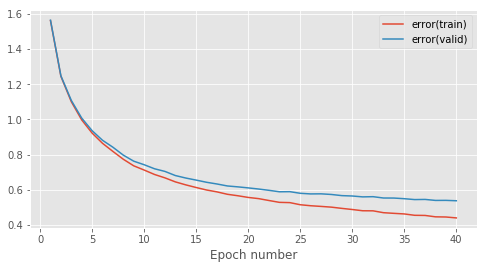

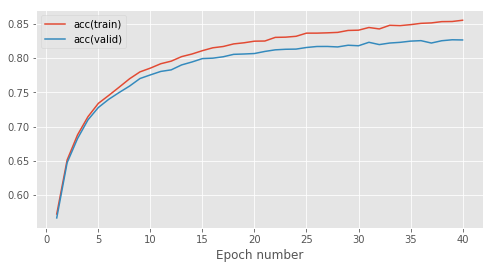

Epoch 1: 11.4s to complete
    error(train)=1.46e+00, acc(train)=5.96e-01, error(valid)=1.46e+00, acc(valid)=5.94e-01


Epoch 2: 10.9s to complete
    error(train)=1.19e+00, acc(train)=6.65e-01, error(valid)=1.20e+00, acc(valid)=6.62e-01


Epoch 3: 12.8s to complete
    error(train)=1.06e+00, acc(train)=6.96e-01, error(valid)=1.08e+00, acc(valid)=6.93e-01


Epoch 4: 12.7s to complete
    error(train)=9.75e-01, acc(train)=7.18e-01, error(valid)=9.89e-01, acc(valid)=7.13e-01


Epoch 5: 11.3s to complete
    error(train)=9.10e-01, acc(train)=7.35e-01, error(valid)=9.29e-01, acc(valid)=7.28e-01


Epoch 6: 11.4s to complete
    error(train)=8.59e-01, acc(train)=7.48e-01, error(valid)=8.79e-01, acc(valid)=7.41e-01


Epoch 7: 10.4s to complete
    error(train)=8.11e-01, acc(train)=7.59e-01, error(valid)=8.37e-01, acc(valid)=7.51e-01


Epoch 8: 11.8s to complete
    error(train)=7.74e-01, acc(train)=7.70e-01, error(valid)=8.01e-01, acc(valid)=7.61e-01


Epoch 9: 9.7s to complete
    error(train)=7.41e-01, acc(train)=7.78e-01, error(valid)=7.72e-01, acc(valid)=7.69e-01


Epoch 10: 11.4s to complete
    error(train)=7.18e-01, acc(train)=7.83e-01, error(valid)=7.51e-01, acc(valid)=7.72e-01


Epoch 11: 10.5s to complete
    error(train)=6.91e-01, acc(train)=7.91e-01, error(valid)=7.26e-01, acc(valid)=7.80e-01


Epoch 12: 9.2s to complete
    error(train)=6.74e-01, acc(train)=7.95e-01, error(valid)=7.10e-01, acc(valid)=7.85e-01


Epoch 13: 9.7s to complete
    error(train)=6.56e-01, acc(train)=7.97e-01, error(valid)=6.97e-01, acc(valid)=7.82e-01


Epoch 14: 10.9s to complete
    error(train)=6.41e-01, acc(train)=8.03e-01, error(valid)=6.83e-01, acc(valid)=7.89e-01


Epoch 15: 11.3s to complete
    error(train)=6.21e-01, acc(train)=8.08e-01, error(valid)=6.65e-01, acc(valid)=7.95e-01


Epoch 16: 9.0s to complete
    error(train)=6.11e-01, acc(train)=8.11e-01, error(valid)=6.57e-01, acc(valid)=7.96e-01


Epoch 17: 11.4s to complete
    error(train)=5.95e-01, acc(train)=8.15e-01, error(valid)=6.44e-01, acc(valid)=7.97e-01


Epoch 18: 11.0s to complete
    error(train)=5.85e-01, acc(train)=8.17e-01, error(valid)=6.37e-01, acc(valid)=8.03e-01


Epoch 19: 11.5s to complete
    error(train)=5.73e-01, acc(train)=8.20e-01, error(valid)=6.25e-01, acc(valid)=8.04e-01


Epoch 20: 10.1s to complete
    error(train)=5.63e-01, acc(train)=8.23e-01, error(valid)=6.19e-01, acc(valid)=8.05e-01


Epoch 21: 11.3s to complete
    error(train)=5.55e-01, acc(train)=8.24e-01, error(valid)=6.11e-01, acc(valid)=8.07e-01


Epoch 22: 11.3s to complete
    error(train)=5.44e-01, acc(train)=8.29e-01, error(valid)=6.01e-01, acc(valid)=8.13e-01


Epoch 23: 10.9s to complete
    error(train)=5.35e-01, acc(train)=8.31e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


Epoch 24: 10.3s to complete
    error(train)=5.32e-01, acc(train)=8.30e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


Epoch 25: 10.9s to complete
    error(train)=5.22e-01, acc(train)=8.33e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


Epoch 26: 12.6s to complete
    error(train)=5.16e-01, acc(train)=8.36e-01, error(valid)=5.81e-01, acc(valid)=8.15e-01


Epoch 27: 10.0s to complete
    error(train)=5.07e-01, acc(train)=8.37e-01, error(valid)=5.73e-01, acc(valid)=8.17e-01


Epoch 28: 12.9s to complete
    error(train)=5.00e-01, acc(train)=8.39e-01, error(valid)=5.72e-01, acc(valid)=8.18e-01


Epoch 29: 10.6s to complete
    error(train)=4.93e-01, acc(train)=8.41e-01, error(valid)=5.66e-01, acc(valid)=8.20e-01


Epoch 30: 11.3s to complete
    error(train)=4.87e-01, acc(train)=8.43e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


Epoch 31: 10.1s to complete
    error(train)=4.84e-01, acc(train)=8.44e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 32: 10.8s to complete
    error(train)=4.80e-01, acc(train)=8.44e-01, error(valid)=5.57e-01, acc(valid)=8.21e-01


Epoch 33: 9.9s to complete
    error(train)=4.72e-01, acc(train)=8.47e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 34: 10.1s to complete
    error(train)=4.67e-01, acc(train)=8.48e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


Epoch 35: 11.8s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.45e-01, acc(valid)=8.23e-01


Epoch 36: 10.3s to complete
    error(train)=4.61e-01, acc(train)=8.50e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


Epoch 37: 11.0s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


Epoch 38: 9.9s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.39e-01, acc(valid)=8.25e-01


Epoch 39: 10.9s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


Epoch 40: 9.6s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


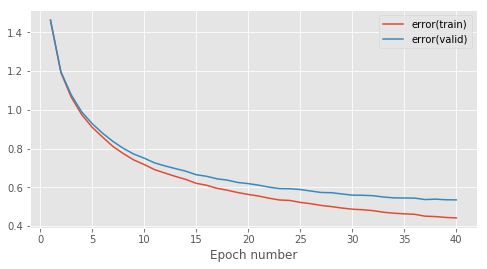

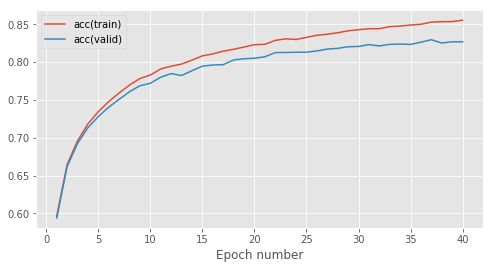

Epoch 1: 11.3s to complete
    error(train)=1.66e+00, acc(train)=5.54e-01, error(valid)=1.66e+00, acc(valid)=5.51e-01


Epoch 2: 10.2s to complete
    error(train)=1.29e+00, acc(train)=6.38e-01, error(valid)=1.29e+00, acc(valid)=6.32e-01


Epoch 3: 12.0s to complete
    error(train)=1.14e+00, acc(train)=6.78e-01, error(valid)=1.14e+00, acc(valid)=6.73e-01


Epoch 4: 11.4s to complete
    error(train)=1.03e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.00e-01


Epoch 5: 11.7s to complete
    error(train)=9.44e-01, acc(train)=7.27e-01, error(valid)=9.57e-01, acc(valid)=7.22e-01


Epoch 6: 11.0s to complete
    error(train)=8.86e-01, acc(train)=7.41e-01, error(valid)=9.02e-01, acc(valid)=7.35e-01


Epoch 7: 10.9s to complete
    error(train)=8.35e-01, acc(train)=7.55e-01, error(valid)=8.52e-01, acc(valid)=7.48e-01


Epoch 8: 11.4s to complete
    error(train)=7.99e-01, acc(train)=7.62e-01, error(valid)=8.19e-01, acc(valid)=7.58e-01


Epoch 9: 12.3s to complete
    error(train)=7.60e-01, acc(train)=7.73e-01, error(valid)=7.82e-01, acc(valid)=7.66e-01


Epoch 10: 9.8s to complete
    error(train)=7.34e-01, acc(train)=7.78e-01, error(valid)=7.59e-01, acc(valid)=7.69e-01


Epoch 11: 10.2s to complete
    error(train)=7.12e-01, acc(train)=7.84e-01, error(valid)=7.40e-01, acc(valid)=7.76e-01


Epoch 12: 11.2s to complete
    error(train)=6.86e-01, acc(train)=7.92e-01, error(valid)=7.12e-01, acc(valid)=7.85e-01


Epoch 13: 9.3s to complete
    error(train)=6.74e-01, acc(train)=7.93e-01, error(valid)=7.07e-01, acc(valid)=7.80e-01


Epoch 14: 10.1s to complete
    error(train)=6.47e-01, acc(train)=8.01e-01, error(valid)=6.80e-01, acc(valid)=7.90e-01


Epoch 15: 11.0s to complete
    error(train)=6.31e-01, acc(train)=8.06e-01, error(valid)=6.66e-01, acc(valid)=7.96e-01


Epoch 16: 11.2s to complete
    error(train)=6.22e-01, acc(train)=8.07e-01, error(valid)=6.63e-01, acc(valid)=7.99e-01


Epoch 17: 11.2s to complete
    error(train)=6.07e-01, acc(train)=8.11e-01, error(valid)=6.45e-01, acc(valid)=7.97e-01


Epoch 18: 12.5s to complete
    error(train)=5.93e-01, acc(train)=8.16e-01, error(valid)=6.35e-01, acc(valid)=8.04e-01


Epoch 19: 10.5s to complete
    error(train)=5.84e-01, acc(train)=8.17e-01, error(valid)=6.29e-01, acc(valid)=8.04e-01


Epoch 20: 9.7s to complete
    error(train)=5.72e-01, acc(train)=8.20e-01, error(valid)=6.21e-01, acc(valid)=8.03e-01


Epoch 21: 11.0s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=6.15e-01, acc(valid)=8.08e-01


Epoch 22: 11.1s to complete
    error(train)=5.57e-01, acc(train)=8.23e-01, error(valid)=6.10e-01, acc(valid)=8.04e-01


Epoch 23: 12.2s to complete
    error(train)=5.47e-01, acc(train)=8.25e-01, error(valid)=6.03e-01, acc(valid)=8.08e-01


Epoch 24: 12.7s to complete
    error(train)=5.37e-01, acc(train)=8.30e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


Epoch 25: 11.4s to complete
    error(train)=5.31e-01, acc(train)=8.31e-01, error(valid)=5.91e-01, acc(valid)=8.12e-01


Epoch 26: 11.9s to complete
    error(train)=5.25e-01, acc(train)=8.32e-01, error(valid)=5.88e-01, acc(valid)=8.14e-01


Epoch 27: 11.7s to complete
    error(train)=5.20e-01, acc(train)=8.34e-01, error(valid)=5.86e-01, acc(valid)=8.15e-01


Epoch 28: 11.8s to complete
    error(train)=5.12e-01, acc(train)=8.37e-01, error(valid)=5.79e-01, acc(valid)=8.15e-01


Epoch 29: 10.8s to complete
    error(train)=5.06e-01, acc(train)=8.38e-01, error(valid)=5.75e-01, acc(valid)=8.17e-01


Epoch 30: 12.1s to complete
    error(train)=4.99e-01, acc(train)=8.39e-01, error(valid)=5.72e-01, acc(valid)=8.17e-01


Epoch 31: 11.0s to complete
    error(train)=4.91e-01, acc(train)=8.42e-01, error(valid)=5.67e-01, acc(valid)=8.19e-01


Epoch 32: 11.0s to complete
    error(train)=4.88e-01, acc(train)=8.43e-01, error(valid)=5.65e-01, acc(valid)=8.20e-01


Epoch 33: 10.7s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=5.62e-01, acc(valid)=8.20e-01


Epoch 34: 12.0s to complete
    error(train)=4.77e-01, acc(train)=8.46e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


Epoch 35: 11.1s to complete
    error(train)=4.72e-01, acc(train)=8.47e-01, error(valid)=5.57e-01, acc(valid)=8.22e-01


Epoch 36: 12.2s to complete
    error(train)=4.69e-01, acc(train)=8.48e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


Epoch 37: 9.9s to complete
    error(train)=4.66e-01, acc(train)=8.49e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 38: 11.3s to complete
    error(train)=4.59e-01, acc(train)=8.52e-01, error(valid)=5.50e-01, acc(valid)=8.22e-01


Epoch 39: 12.8s to complete
    error(train)=4.57e-01, acc(train)=8.52e-01, error(valid)=5.50e-01, acc(valid)=8.25e-01


Epoch 40: 11.4s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


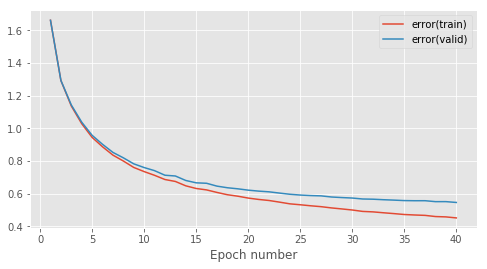

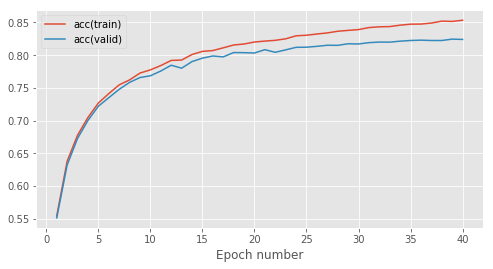

Epoch 1: 11.0s to complete
    error(train)=1.58e+00, acc(train)=5.76e-01, error(valid)=1.58e+00, acc(valid)=5.79e-01


Epoch 2: 10.9s to complete
    error(train)=1.24e+00, acc(train)=6.55e-01, error(valid)=1.24e+00, acc(valid)=6.52e-01


Epoch 3: 11.4s to complete
    error(train)=1.10e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.84e-01


Epoch 4: 12.1s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.04e-01


Epoch 5: 10.0s to complete
    error(train)=9.31e-01, acc(train)=7.31e-01, error(valid)=9.44e-01, acc(valid)=7.26e-01


Epoch 6: 11.5s to complete
    error(train)=8.75e-01, acc(train)=7.44e-01, error(valid)=8.91e-01, acc(valid)=7.42e-01


Epoch 7: 11.2s to complete
    error(train)=8.29e-01, acc(train)=7.55e-01, error(valid)=8.46e-01, acc(valid)=7.49e-01


Epoch 8: 10.8s to complete
    error(train)=7.91e-01, acc(train)=7.65e-01, error(valid)=8.11e-01, acc(valid)=7.59e-01


Epoch 9: 11.1s to complete
    error(train)=7.53e-01, acc(train)=7.75e-01, error(valid)=7.75e-01, acc(valid)=7.69e-01


Epoch 10: 12.6s to complete
    error(train)=7.26e-01, acc(train)=7.82e-01, error(valid)=7.51e-01, acc(valid)=7.74e-01


Epoch 11: 10.6s to complete
    error(train)=7.02e-01, acc(train)=7.87e-01, error(valid)=7.28e-01, acc(valid)=7.78e-01


Epoch 12: 10.6s to complete
    error(train)=6.82e-01, acc(train)=7.93e-01, error(valid)=7.12e-01, acc(valid)=7.84e-01


Epoch 13: 11.2s to complete
    error(train)=6.63e-01, acc(train)=7.98e-01, error(valid)=6.95e-01, acc(valid)=7.89e-01


Epoch 14: 10.0s to complete
    error(train)=6.42e-01, acc(train)=8.04e-01, error(valid)=6.76e-01, acc(valid)=7.94e-01


Epoch 15: 10.5s to complete
    error(train)=6.28e-01, acc(train)=8.06e-01, error(valid)=6.66e-01, acc(valid)=7.96e-01


Epoch 16: 10.2s to complete
    error(train)=6.13e-01, acc(train)=8.11e-01, error(valid)=6.53e-01, acc(valid)=7.97e-01


Epoch 17: 11.2s to complete
    error(train)=6.00e-01, acc(train)=8.15e-01, error(valid)=6.43e-01, acc(valid)=8.01e-01


Epoch 18: 10.1s to complete
    error(train)=5.93e-01, acc(train)=8.14e-01, error(valid)=6.39e-01, acc(valid)=8.01e-01


Epoch 19: 10.2s to complete
    error(train)=5.79e-01, acc(train)=8.20e-01, error(valid)=6.27e-01, acc(valid)=8.07e-01


Epoch 20: 12.0s to complete
    error(train)=5.73e-01, acc(train)=8.22e-01, error(valid)=6.24e-01, acc(valid)=8.09e-01


Epoch 21: 11.2s to complete
    error(train)=5.63e-01, acc(train)=8.23e-01, error(valid)=6.16e-01, acc(valid)=8.07e-01


Epoch 22: 11.4s to complete
    error(train)=5.55e-01, acc(train)=8.25e-01, error(valid)=6.11e-01, acc(valid)=8.10e-01


Epoch 23: 11.7s to complete
    error(train)=5.41e-01, acc(train)=8.30e-01, error(valid)=6.01e-01, acc(valid)=8.14e-01


Epoch 24: 12.6s to complete
    error(train)=5.37e-01, acc(train)=8.30e-01, error(valid)=6.00e-01, acc(valid)=8.12e-01


Epoch 25: 10.1s to complete
    error(train)=5.26e-01, acc(train)=8.35e-01, error(valid)=5.91e-01, acc(valid)=8.12e-01


Epoch 26: 10.1s to complete
    error(train)=5.20e-01, acc(train)=8.36e-01, error(valid)=5.89e-01, acc(valid)=8.16e-01


Epoch 27: 9.5s to complete
    error(train)=5.16e-01, acc(train)=8.37e-01, error(valid)=5.85e-01, acc(valid)=8.18e-01


Epoch 28: 11.8s to complete
    error(train)=5.10e-01, acc(train)=8.37e-01, error(valid)=5.82e-01, acc(valid)=8.16e-01


Epoch 29: 9.6s to complete
    error(train)=5.04e-01, acc(train)=8.38e-01, error(valid)=5.79e-01, acc(valid)=8.17e-01


Epoch 30: 10.3s to complete
    error(train)=4.97e-01, acc(train)=8.42e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


Epoch 31: 10.0s to complete
    error(train)=4.94e-01, acc(train)=8.43e-01, error(valid)=5.73e-01, acc(valid)=8.20e-01


Epoch 32: 10.8s to complete
    error(train)=4.87e-01, acc(train)=8.44e-01, error(valid)=5.69e-01, acc(valid)=8.21e-01


Epoch 33: 13.1s to complete
    error(train)=4.82e-01, acc(train)=8.45e-01, error(valid)=5.67e-01, acc(valid)=8.24e-01


Epoch 34: 10.0s to complete
    error(train)=4.80e-01, acc(train)=8.46e-01, error(valid)=5.67e-01, acc(valid)=8.22e-01


Epoch 35: 11.9s to complete
    error(train)=4.70e-01, acc(train)=8.49e-01, error(valid)=5.60e-01, acc(valid)=8.25e-01


Epoch 36: 11.1s to complete
    error(train)=4.65e-01, acc(train)=8.51e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


Epoch 37: 9.4s to complete
    error(train)=4.65e-01, acc(train)=8.50e-01, error(valid)=5.58e-01, acc(valid)=8.26e-01


Epoch 38: 12.9s to complete
    error(train)=4.56e-01, acc(train)=8.53e-01, error(valid)=5.52e-01, acc(valid)=8.28e-01


Epoch 39: 10.6s to complete
    error(train)=4.55e-01, acc(train)=8.52e-01, error(valid)=5.53e-01, acc(valid)=8.26e-01


Epoch 40: 11.2s to complete
    error(train)=4.49e-01, acc(train)=8.55e-01, error(valid)=5.51e-01, acc(valid)=8.27e-01


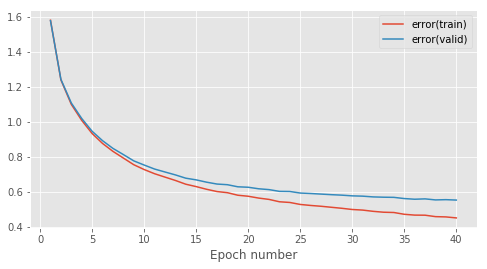

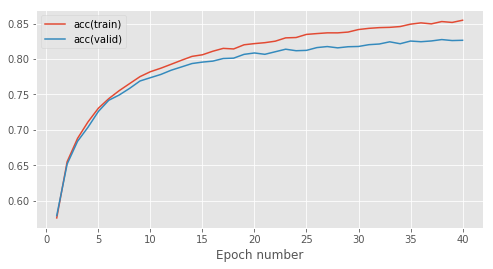

Epoch 1: 11.3s to complete
    error(train)=1.59e+00, acc(train)=5.71e-01, error(valid)=1.59e+00, acc(valid)=5.73e-01


Epoch 2: 10.0s to complete
    error(train)=1.27e+00, acc(train)=6.46e-01, error(valid)=1.27e+00, acc(valid)=6.45e-01


Epoch 3: 9.3s to complete
    error(train)=1.12e+00, acc(train)=6.83e-01, error(valid)=1.12e+00, acc(valid)=6.79e-01


Epoch 4: 12.5s to complete
    error(train)=1.02e+00, acc(train)=7.07e-01, error(valid)=1.03e+00, acc(valid)=7.03e-01


Epoch 5: 11.4s to complete
    error(train)=9.40e-01, acc(train)=7.27e-01, error(valid)=9.54e-01, acc(valid)=7.23e-01


Epoch 6: 10.1s to complete
    error(train)=8.80e-01, acc(train)=7.42e-01, error(valid)=8.96e-01, acc(valid)=7.35e-01


Epoch 7: 10.1s to complete
    error(train)=8.30e-01, acc(train)=7.54e-01, error(valid)=8.48e-01, acc(valid)=7.48e-01


Epoch 8: 10.0s to complete
    error(train)=7.89e-01, acc(train)=7.65e-01, error(valid)=8.10e-01, acc(valid)=7.57e-01


Epoch 9: 10.2s to complete
    error(train)=7.58e-01, acc(train)=7.72e-01, error(valid)=7.79e-01, acc(valid)=7.67e-01


Epoch 10: 11.5s to complete
    error(train)=7.31e-01, acc(train)=7.78e-01, error(valid)=7.54e-01, acc(valid)=7.71e-01


Epoch 11: 13.0s to complete
    error(train)=7.04e-01, acc(train)=7.85e-01, error(valid)=7.28e-01, acc(valid)=7.78e-01


Epoch 12: 10.8s to complete
    error(train)=6.82e-01, acc(train)=7.91e-01, error(valid)=7.08e-01, acc(valid)=7.83e-01


Epoch 13: 11.6s to complete
    error(train)=6.62e-01, acc(train)=7.96e-01, error(valid)=6.89e-01, acc(valid)=7.89e-01


Epoch 14: 9.9s to complete
    error(train)=6.49e-01, acc(train)=7.99e-01, error(valid)=6.78e-01, acc(valid)=7.91e-01


Epoch 15: 11.5s to complete
    error(train)=6.29e-01, acc(train)=8.05e-01, error(valid)=6.61e-01, acc(valid)=7.96e-01


Epoch 16: 11.5s to complete
    error(train)=6.17e-01, acc(train)=8.08e-01, error(valid)=6.51e-01, acc(valid)=7.97e-01


Epoch 17: 11.1s to complete
    error(train)=6.06e-01, acc(train)=8.10e-01, error(valid)=6.44e-01, acc(valid)=7.98e-01


Epoch 18: 10.0s to complete
    error(train)=5.95e-01, acc(train)=8.12e-01, error(valid)=6.33e-01, acc(valid)=8.02e-01


Epoch 19: 11.7s to complete
    error(train)=5.82e-01, acc(train)=8.18e-01, error(valid)=6.22e-01, acc(valid)=8.06e-01


Epoch 20: 11.3s to complete
    error(train)=5.74e-01, acc(train)=8.18e-01, error(valid)=6.16e-01, acc(valid)=8.08e-01


Epoch 21: 10.2s to complete
    error(train)=5.71e-01, acc(train)=8.18e-01, error(valid)=6.16e-01, acc(valid)=8.06e-01


Epoch 22: 10.3s to complete
    error(train)=5.56e-01, acc(train)=8.24e-01, error(valid)=6.02e-01, acc(valid)=8.12e-01


Epoch 23: 11.6s to complete
    error(train)=5.47e-01, acc(train)=8.26e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


Epoch 24: 11.3s to complete
    error(train)=5.35e-01, acc(train)=8.30e-01, error(valid)=5.87e-01, acc(valid)=8.15e-01


Epoch 25: 9.0s to complete
    error(train)=5.35e-01, acc(train)=8.29e-01, error(valid)=5.89e-01, acc(valid)=8.12e-01


Epoch 26: 11.6s to complete
    error(train)=5.25e-01, acc(train)=8.33e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


Epoch 27: 9.3s to complete
    error(train)=5.26e-01, acc(train)=8.32e-01, error(valid)=5.82e-01, acc(valid)=8.17e-01


Epoch 28: 12.3s to complete
    error(train)=5.12e-01, acc(train)=8.36e-01, error(valid)=5.73e-01, acc(valid)=8.18e-01


Epoch 29: 11.3s to complete
    error(train)=5.02e-01, acc(train)=8.38e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01


Epoch 30: 11.0s to complete
    error(train)=5.01e-01, acc(train)=8.39e-01, error(valid)=5.65e-01, acc(valid)=8.19e-01


Epoch 31: 10.5s to complete
    error(train)=5.01e-01, acc(train)=8.38e-01, error(valid)=5.67e-01, acc(valid)=8.19e-01


Epoch 32: 11.9s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


Epoch 33: 10.7s to complete
    error(train)=4.86e-01, acc(train)=8.42e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


Epoch 34: 9.7s to complete
    error(train)=4.75e-01, acc(train)=8.46e-01, error(valid)=5.47e-01, acc(valid)=8.26e-01


Epoch 35: 12.0s to complete
    error(train)=4.77e-01, acc(train)=8.44e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


Epoch 36: 11.5s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.47e-01, acc(valid)=8.25e-01


Epoch 37: 11.1s to complete
    error(train)=4.65e-01, acc(train)=8.49e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


Epoch 38: 11.5s to complete
    error(train)=4.61e-01, acc(train)=8.49e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


Epoch 39: 12.8s to complete
    error(train)=4.56e-01, acc(train)=8.51e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


Epoch 40: 12.0s to complete
    error(train)=4.52e-01, acc(train)=8.51e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


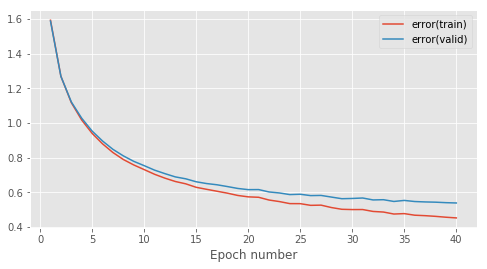

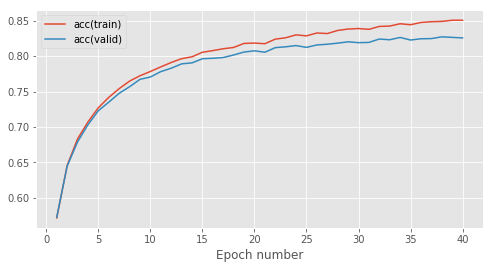

Epoch 1: 10.9s to complete
    error(train)=1.47e+00, acc(train)=5.93e-01, error(valid)=1.47e+00, acc(valid)=5.92e-01


Epoch 2: 9.8s to complete
    error(train)=1.21e+00, acc(train)=6.60e-01, error(valid)=1.21e+00, acc(valid)=6.54e-01


Epoch 3: 8.9s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01


Epoch 4: 10.5s to complete
    error(train)=9.81e-01, acc(train)=7.18e-01, error(valid)=9.90e-01, acc(valid)=7.14e-01


Epoch 5: 10.1s to complete
    error(train)=9.06e-01, acc(train)=7.37e-01, error(valid)=9.16e-01, acc(valid)=7.33e-01


Epoch 6: 10.9s to complete
    error(train)=8.52e-01, acc(train)=7.50e-01, error(valid)=8.68e-01, acc(valid)=7.43e-01


Epoch 7: 10.1s to complete
    error(train)=8.08e-01, acc(train)=7.61e-01, error(valid)=8.25e-01, acc(valid)=7.56e-01


Epoch 8: 10.9s to complete
    error(train)=7.72e-01, acc(train)=7.68e-01, error(valid)=7.92e-01, acc(valid)=7.64e-01


Epoch 9: 10.2s to complete
    error(train)=7.36e-01, acc(train)=7.77e-01, error(valid)=7.59e-01, acc(valid)=7.74e-01


Epoch 10: 9.4s to complete
    error(train)=7.10e-01, acc(train)=7.83e-01, error(valid)=7.36e-01, acc(valid)=7.80e-01


Epoch 11: 12.1s to complete
    error(train)=6.82e-01, acc(train)=7.90e-01, error(valid)=7.09e-01, acc(valid)=7.87e-01


Epoch 12: 12.5s to complete
    error(train)=6.61e-01, acc(train)=7.95e-01, error(valid)=6.91e-01, acc(valid)=7.87e-01


Epoch 13: 10.2s to complete
    error(train)=6.46e-01, acc(train)=8.00e-01, error(valid)=6.80e-01, acc(valid)=7.91e-01


Epoch 14: 11.9s to complete
    error(train)=6.28e-01, acc(train)=8.03e-01, error(valid)=6.66e-01, acc(valid)=7.95e-01


Epoch 15: 10.5s to complete
    error(train)=6.09e-01, acc(train)=8.10e-01, error(valid)=6.50e-01, acc(valid)=8.02e-01


Epoch 16: 11.6s to complete
    error(train)=5.96e-01, acc(train)=8.14e-01, error(valid)=6.38e-01, acc(valid)=8.04e-01


Epoch 17: 11.3s to complete
    error(train)=5.88e-01, acc(train)=8.14e-01, error(valid)=6.35e-01, acc(valid)=8.04e-01


Epoch 18: 10.9s to complete
    error(train)=5.74e-01, acc(train)=8.20e-01, error(valid)=6.22e-01, acc(valid)=8.08e-01


Epoch 19: 10.0s to complete
    error(train)=5.65e-01, acc(train)=8.20e-01, error(valid)=6.18e-01, acc(valid)=8.08e-01


Epoch 20: 9.4s to complete
    error(train)=5.56e-01, acc(train)=8.23e-01, error(valid)=6.07e-01, acc(valid)=8.10e-01


Epoch 21: 9.9s to complete
    error(train)=5.41e-01, acc(train)=8.28e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


Epoch 22: 11.5s to complete
    error(train)=5.36e-01, acc(train)=8.27e-01, error(valid)=5.93e-01, acc(valid)=8.15e-01


Epoch 23: 10.3s to complete
    error(train)=5.29e-01, acc(train)=8.31e-01, error(valid)=5.91e-01, acc(valid)=8.16e-01


Epoch 24: 10.1s to complete
    error(train)=5.20e-01, acc(train)=8.34e-01, error(valid)=5.83e-01, acc(valid)=8.18e-01


Epoch 25: 11.9s to complete
    error(train)=5.08e-01, acc(train)=8.36e-01, error(valid)=5.73e-01, acc(valid)=8.21e-01


Epoch 26: 11.2s to complete
    error(train)=5.08e-01, acc(train)=8.37e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


Epoch 27: 10.0s to complete
    error(train)=5.03e-01, acc(train)=8.38e-01, error(valid)=5.74e-01, acc(valid)=8.19e-01


Epoch 28: 10.7s to complete
    error(train)=4.92e-01, acc(train)=8.41e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01


Epoch 29: 11.8s to complete
    error(train)=4.90e-01, acc(train)=8.40e-01, error(valid)=5.65e-01, acc(valid)=8.20e-01


Epoch 30: 11.1s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 31: 10.0s to complete
    error(train)=4.77e-01, acc(train)=8.46e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01


Epoch 32: 11.8s to complete
    error(train)=4.72e-01, acc(train)=8.47e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


Epoch 33: 11.3s to complete
    error(train)=4.65e-01, acc(train)=8.47e-01, error(valid)=5.48e-01, acc(valid)=8.26e-01


Epoch 34: 11.2s to complete
    error(train)=4.63e-01, acc(train)=8.46e-01, error(valid)=5.47e-01, acc(valid)=8.22e-01


Epoch 35: 12.7s to complete
    error(train)=4.56e-01, acc(train)=8.51e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


Epoch 36: 11.3s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


Epoch 37: 11.5s to complete
    error(train)=4.46e-01, acc(train)=8.54e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


Epoch 38: 10.7s to complete
    error(train)=4.43e-01, acc(train)=8.54e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 39: 10.9s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.34e-01, acc(valid)=8.30e-01


Epoch 40: 11.4s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


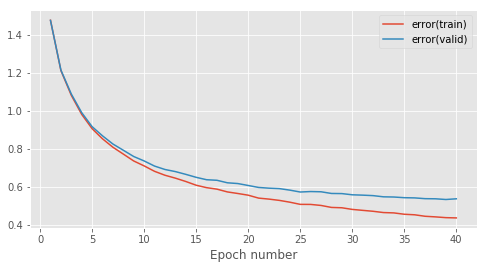

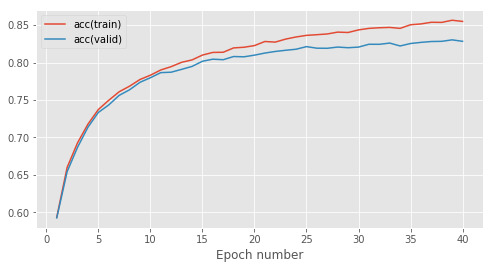

Epoch 1: 9.9s to complete
    error(train)=1.63e+00, acc(train)=5.65e-01, error(valid)=1.63e+00, acc(valid)=5.64e-01


Epoch 2: 9.5s to complete
    error(train)=1.29e+00, acc(train)=6.42e-01, error(valid)=1.29e+00, acc(valid)=6.40e-01


Epoch 3: 9.6s to complete
    error(train)=1.15e+00, acc(train)=6.77e-01, error(valid)=1.16e+00, acc(valid)=6.74e-01


Epoch 4: 11.5s to complete
    error(train)=1.05e+00, acc(train)=7.03e-01, error(valid)=1.06e+00, acc(valid)=7.01e-01


Epoch 5: 10.9s to complete
    error(train)=9.79e-01, acc(train)=7.18e-01, error(valid)=9.94e-01, acc(valid)=7.14e-01


Epoch 6: 9.9s to complete
    error(train)=9.18e-01, acc(train)=7.33e-01, error(valid)=9.33e-01, acc(valid)=7.25e-01


Epoch 7: 10.2s to complete
    error(train)=8.69e-01, acc(train)=7.45e-01, error(valid)=8.88e-01, acc(valid)=7.42e-01


Epoch 8: 9.5s to complete
    error(train)=8.25e-01, acc(train)=7.57e-01, error(valid)=8.44e-01, acc(valid)=7.49e-01


Epoch 9: 11.5s to complete
    error(train)=7.91e-01, acc(train)=7.65e-01, error(valid)=8.10e-01, acc(valid)=7.60e-01


Epoch 10: 10.7s to complete
    error(train)=7.57e-01, acc(train)=7.74e-01, error(valid)=7.79e-01, acc(valid)=7.68e-01


Epoch 11: 10.2s to complete
    error(train)=7.27e-01, acc(train)=7.82e-01, error(valid)=7.52e-01, acc(valid)=7.72e-01


Epoch 12: 11.5s to complete
    error(train)=7.07e-01, acc(train)=7.88e-01, error(valid)=7.35e-01, acc(valid)=7.78e-01


Epoch 13: 10.8s to complete
    error(train)=6.83e-01, acc(train)=7.92e-01, error(valid)=7.13e-01, acc(valid)=7.82e-01


Epoch 14: 12.8s to complete
    error(train)=6.66e-01, acc(train)=7.96e-01, error(valid)=6.99e-01, acc(valid)=7.87e-01


Epoch 15: 10.8s to complete
    error(train)=6.49e-01, acc(train)=8.01e-01, error(valid)=6.85e-01, acc(valid)=7.87e-01


Epoch 16: 12.1s to complete
    error(train)=6.30e-01, acc(train)=8.07e-01, error(valid)=6.69e-01, acc(valid)=7.95e-01


Epoch 17: 13.0s to complete
    error(train)=6.19e-01, acc(train)=8.10e-01, error(valid)=6.59e-01, acc(valid)=7.98e-01


Epoch 18: 11.3s to complete
    error(train)=6.04e-01, acc(train)=8.13e-01, error(valid)=6.47e-01, acc(valid)=8.01e-01


Epoch 19: 11.4s to complete
    error(train)=5.95e-01, acc(train)=8.16e-01, error(valid)=6.39e-01, acc(valid)=8.03e-01


Epoch 20: 11.2s to complete
    error(train)=5.93e-01, acc(train)=8.16e-01, error(valid)=6.39e-01, acc(valid)=8.03e-01


Epoch 21: 11.9s to complete
    error(train)=5.73e-01, acc(train)=8.21e-01, error(valid)=6.23e-01, acc(valid)=8.08e-01


Epoch 22: 11.6s to complete
    error(train)=5.70e-01, acc(train)=8.22e-01, error(valid)=6.22e-01, acc(valid)=8.06e-01


Epoch 23: 11.5s to complete
    error(train)=5.58e-01, acc(train)=8.25e-01, error(valid)=6.13e-01, acc(valid)=8.11e-01


Epoch 24: 11.9s to complete
    error(train)=5.50e-01, acc(train)=8.27e-01, error(valid)=6.05e-01, acc(valid)=8.09e-01


Epoch 25: 12.8s to complete
    error(train)=5.47e-01, acc(train)=8.27e-01, error(valid)=6.04e-01, acc(valid)=8.09e-01


Epoch 26: 9.6s to complete
    error(train)=5.37e-01, acc(train)=8.30e-01, error(valid)=5.98e-01, acc(valid)=8.14e-01


Epoch 27: 11.6s to complete
    error(train)=5.27e-01, acc(train)=8.34e-01, error(valid)=5.90e-01, acc(valid)=8.15e-01


Epoch 28: 12.1s to complete
    error(train)=5.24e-01, acc(train)=8.34e-01, error(valid)=5.89e-01, acc(valid)=8.17e-01


Epoch 29: 10.4s to complete
    error(train)=5.17e-01, acc(train)=8.35e-01, error(valid)=5.82e-01, acc(valid)=8.19e-01


Epoch 30: 10.8s to complete
    error(train)=5.12e-01, acc(train)=8.37e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


Epoch 31: 11.6s to complete
    error(train)=5.08e-01, acc(train)=8.37e-01, error(valid)=5.79e-01, acc(valid)=8.19e-01


Epoch 32: 12.5s to complete
    error(train)=5.02e-01, acc(train)=8.40e-01, error(valid)=5.71e-01, acc(valid)=8.22e-01


Epoch 33: 10.6s to complete
    error(train)=4.95e-01, acc(train)=8.42e-01, error(valid)=5.69e-01, acc(valid)=8.22e-01


Epoch 34: 10.4s to complete
    error(train)=4.91e-01, acc(train)=8.43e-01, error(valid)=5.69e-01, acc(valid)=8.21e-01


Epoch 35: 10.3s to complete
    error(train)=4.90e-01, acc(train)=8.43e-01, error(valid)=5.68e-01, acc(valid)=8.22e-01


Epoch 36: 10.3s to complete
    error(train)=4.81e-01, acc(train)=8.45e-01, error(valid)=5.61e-01, acc(valid)=8.23e-01


Epoch 37: 10.8s to complete
    error(train)=4.75e-01, acc(train)=8.47e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


Epoch 38: 10.0s to complete
    error(train)=4.75e-01, acc(train)=8.46e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 39: 11.9s to complete
    error(train)=4.71e-01, acc(train)=8.47e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


Epoch 40: 10.2s to complete
    error(train)=4.62e-01, acc(train)=8.52e-01, error(valid)=5.48e-01, acc(valid)=8.28e-01


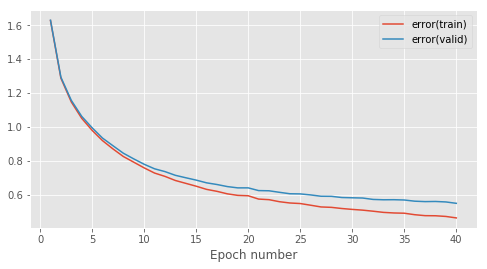

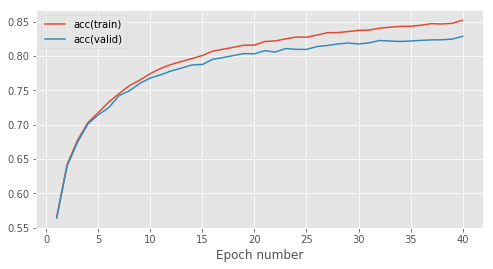

Epoch 1: 11.7s to complete
    error(train)=1.58e+00, acc(train)=5.74e-01, error(valid)=1.58e+00, acc(valid)=5.71e-01


Epoch 2: 12.6s to complete
    error(train)=1.25e+00, acc(train)=6.49e-01, error(valid)=1.26e+00, acc(valid)=6.46e-01


Epoch 3: 10.9s to complete
    error(train)=1.11e+00, acc(train)=6.82e-01, error(valid)=1.12e+00, acc(valid)=6.77e-01


Epoch 4: 9.8s to complete
    error(train)=1.02e+00, acc(train)=7.06e-01, error(valid)=1.03e+00, acc(valid)=6.98e-01


Epoch 5: 10.2s to complete
    error(train)=9.36e-01, acc(train)=7.27e-01, error(valid)=9.50e-01, acc(valid)=7.24e-01


Epoch 6: 11.7s to complete
    error(train)=8.74e-01, acc(train)=7.45e-01, error(valid)=8.90e-01, acc(valid)=7.40e-01


Epoch 7: 11.0s to complete
    error(train)=8.27e-01, acc(train)=7.56e-01, error(valid)=8.45e-01, acc(valid)=7.52e-01


Epoch 8: 13.6s to complete
    error(train)=7.84e-01, acc(train)=7.67e-01, error(valid)=8.04e-01, acc(valid)=7.63e-01


Epoch 9: 9.7s to complete
    error(train)=7.50e-01, acc(train)=7.76e-01, error(valid)=7.72e-01, acc(valid)=7.68e-01


Epoch 10: 11.2s to complete
    error(train)=7.23e-01, acc(train)=7.82e-01, error(valid)=7.46e-01, acc(valid)=7.73e-01


Epoch 11: 11.9s to complete
    error(train)=6.97e-01, acc(train)=7.89e-01, error(valid)=7.23e-01, acc(valid)=7.79e-01


Epoch 12: 12.8s to complete
    error(train)=6.76e-01, acc(train)=7.95e-01, error(valid)=7.04e-01, acc(valid)=7.85e-01


Epoch 13: 11.1s to complete
    error(train)=6.54e-01, acc(train)=8.01e-01, error(valid)=6.86e-01, acc(valid)=7.89e-01


Epoch 14: 10.1s to complete
    error(train)=6.36e-01, acc(train)=8.03e-01, error(valid)=6.70e-01, acc(valid)=7.92e-01


Epoch 15: 12.2s to complete
    error(train)=6.18e-01, acc(train)=8.10e-01, error(valid)=6.56e-01, acc(valid)=7.98e-01


Epoch 16: 11.5s to complete
    error(train)=6.12e-01, acc(train)=8.11e-01, error(valid)=6.51e-01, acc(valid)=7.98e-01


Epoch 17: 11.7s to complete
    error(train)=5.94e-01, acc(train)=8.15e-01, error(valid)=6.35e-01, acc(valid)=8.03e-01


Epoch 18: 11.6s to complete
    error(train)=5.87e-01, acc(train)=8.17e-01, error(valid)=6.28e-01, acc(valid)=8.05e-01


Epoch 19: 11.6s to complete
    error(train)=5.71e-01, acc(train)=8.21e-01, error(valid)=6.17e-01, acc(valid)=8.08e-01


Epoch 20: 12.9s to complete
    error(train)=5.59e-01, acc(train)=8.24e-01, error(valid)=6.08e-01, acc(valid)=8.09e-01


Epoch 21: 10.0s to complete
    error(train)=5.48e-01, acc(train)=8.27e-01, error(valid)=6.00e-01, acc(valid)=8.12e-01


Epoch 22: 10.9s to complete
    error(train)=5.38e-01, acc(train)=8.30e-01, error(valid)=5.93e-01, acc(valid)=8.12e-01


Epoch 23: 9.9s to complete
    error(train)=5.37e-01, acc(train)=8.29e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


Epoch 24: 12.4s to complete
    error(train)=5.27e-01, acc(train)=8.33e-01, error(valid)=5.86e-01, acc(valid)=8.14e-01


Epoch 25: 9.9s to complete
    error(train)=5.16e-01, acc(train)=8.36e-01, error(valid)=5.78e-01, acc(valid)=8.15e-01


Epoch 26: 10.9s to complete
    error(train)=5.11e-01, acc(train)=8.36e-01, error(valid)=5.73e-01, acc(valid)=8.18e-01


Epoch 27: 11.7s to complete
    error(train)=5.05e-01, acc(train)=8.38e-01, error(valid)=5.69e-01, acc(valid)=8.17e-01


Epoch 28: 9.1s to complete
    error(train)=4.97e-01, acc(train)=8.39e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


Epoch 29: 10.2s to complete
    error(train)=4.91e-01, acc(train)=8.42e-01, error(valid)=5.60e-01, acc(valid)=8.20e-01


Epoch 30: 11.4s to complete
    error(train)=4.82e-01, acc(train)=8.45e-01, error(valid)=5.54e-01, acc(valid)=8.23e-01


Epoch 31: 10.4s to complete
    error(train)=4.77e-01, acc(train)=8.46e-01, error(valid)=5.49e-01, acc(valid)=8.21e-01


Epoch 32: 9.7s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.47e-01, acc(valid)=8.24e-01


Epoch 33: 12.5s to complete
    error(train)=4.71e-01, acc(train)=8.45e-01, error(valid)=5.49e-01, acc(valid)=8.19e-01


Epoch 34: 11.7s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.43e-01, acc(valid)=8.21e-01


Epoch 35: 11.4s to complete
    error(train)=4.60e-01, acc(train)=8.49e-01, error(valid)=5.44e-01, acc(valid)=8.23e-01


Epoch 36: 13.5s to complete
    error(train)=4.52e-01, acc(train)=8.54e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


Epoch 37: 12.7s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


Epoch 38: 10.0s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 39: 11.1s to complete
    error(train)=4.41e-01, acc(train)=8.57e-01, error(valid)=5.33e-01, acc(valid)=8.26e-01


Epoch 40: 10.0s to complete
    error(train)=4.36e-01, acc(train)=8.58e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


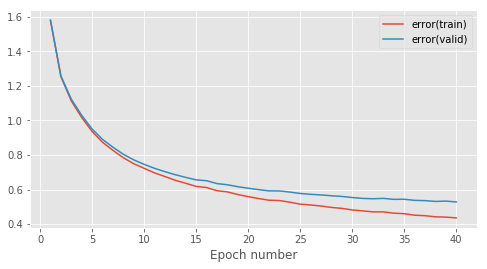

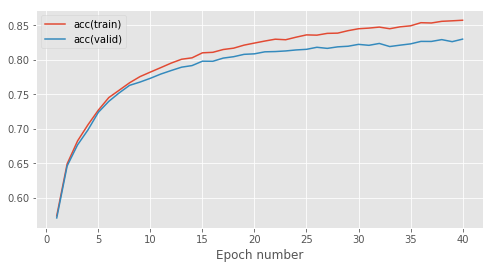

Epoch 1: 11.8s to complete
    error(train)=1.63e+00, acc(train)=5.60e-01, error(valid)=1.63e+00, acc(valid)=5.59e-01


Epoch 2: 10.7s to complete
    error(train)=1.26e+00, acc(train)=6.50e-01, error(valid)=1.26e+00, acc(valid)=6.46e-01


Epoch 3: 9.6s to complete
    error(train)=1.10e+00, acc(train)=6.86e-01, error(valid)=1.11e+00, acc(valid)=6.82e-01


Epoch 4: 11.8s to complete
    error(train)=9.95e-01, acc(train)=7.15e-01, error(valid)=1.01e+00, acc(valid)=7.09e-01


Epoch 5: 10.0s to complete
    error(train)=9.18e-01, acc(train)=7.34e-01, error(valid)=9.30e-01, acc(valid)=7.28e-01


Epoch 6: 11.2s to complete
    error(train)=8.52e-01, acc(train)=7.50e-01, error(valid)=8.68e-01, acc(valid)=7.43e-01


Epoch 7: 9.5s to complete
    error(train)=8.10e-01, acc(train)=7.61e-01, error(valid)=8.28e-01, acc(valid)=7.55e-01


Epoch 8: 9.8s to complete
    error(train)=7.70e-01, acc(train)=7.71e-01, error(valid)=7.93e-01, acc(valid)=7.63e-01


Epoch 9: 11.9s to complete
    error(train)=7.40e-01, acc(train)=7.78e-01, error(valid)=7.65e-01, acc(valid)=7.69e-01


Epoch 10: 11.8s to complete
    error(train)=7.12e-01, acc(train)=7.86e-01, error(valid)=7.37e-01, acc(valid)=7.80e-01


Epoch 11: 11.5s to complete
    error(train)=6.87e-01, acc(train)=7.91e-01, error(valid)=7.17e-01, acc(valid)=7.81e-01


Epoch 12: 11.9s to complete
    error(train)=6.72e-01, acc(train)=7.95e-01, error(valid)=7.05e-01, acc(valid)=7.87e-01


Epoch 13: 8.6s to complete
    error(train)=6.46e-01, acc(train)=8.03e-01, error(valid)=6.79e-01, acc(valid)=7.92e-01


Epoch 14: 11.9s to complete
    error(train)=6.37e-01, acc(train)=8.03e-01, error(valid)=6.75e-01, acc(valid)=7.92e-01


Epoch 15: 11.6s to complete
    error(train)=6.24e-01, acc(train)=8.06e-01, error(valid)=6.60e-01, acc(valid)=7.96e-01


Epoch 16: 11.2s to complete
    error(train)=6.07e-01, acc(train)=8.12e-01, error(valid)=6.48e-01, acc(valid)=7.99e-01


Epoch 17: 11.4s to complete
    error(train)=5.90e-01, acc(train)=8.16e-01, error(valid)=6.35e-01, acc(valid)=8.01e-01


Epoch 18: 14.5s to complete
    error(train)=5.79e-01, acc(train)=8.20e-01, error(valid)=6.26e-01, acc(valid)=8.04e-01


Epoch 19: 10.7s to complete
    error(train)=5.73e-01, acc(train)=8.20e-01, error(valid)=6.23e-01, acc(valid)=8.07e-01


Epoch 20: 10.7s to complete
    error(train)=5.62e-01, acc(train)=8.22e-01, error(valid)=6.13e-01, acc(valid)=8.08e-01


Epoch 21: 12.0s to complete
    error(train)=5.50e-01, acc(train)=8.25e-01, error(valid)=6.05e-01, acc(valid)=8.11e-01


Epoch 22: 11.3s to complete
    error(train)=5.44e-01, acc(train)=8.28e-01, error(valid)=6.02e-01, acc(valid)=8.11e-01


Epoch 23: 11.1s to complete
    error(train)=5.33e-01, acc(train)=8.32e-01, error(valid)=5.94e-01, acc(valid)=8.15e-01


Epoch 24: 9.2s to complete
    error(train)=5.26e-01, acc(train)=8.33e-01, error(valid)=5.87e-01, acc(valid)=8.17e-01


Epoch 25: 11.6s to complete
    error(train)=5.20e-01, acc(train)=8.34e-01, error(valid)=5.83e-01, acc(valid)=8.15e-01


Epoch 26: 11.4s to complete
    error(train)=5.11e-01, acc(train)=8.37e-01, error(valid)=5.77e-01, acc(valid)=8.17e-01


Epoch 27: 11.2s to complete
    error(train)=5.05e-01, acc(train)=8.39e-01, error(valid)=5.76e-01, acc(valid)=8.20e-01


Epoch 28: 10.9s to complete
    error(train)=4.97e-01, acc(train)=8.41e-01, error(valid)=5.69e-01, acc(valid)=8.20e-01


Epoch 29: 10.3s to complete
    error(train)=4.94e-01, acc(train)=8.41e-01, error(valid)=5.69e-01, acc(valid)=8.17e-01


Epoch 30: 10.2s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.66e-01, acc(valid)=8.20e-01


Epoch 31: 11.4s to complete
    error(train)=4.82e-01, acc(train)=8.45e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


Epoch 32: 10.9s to complete
    error(train)=4.78e-01, acc(train)=8.46e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


Epoch 33: 11.5s to complete
    error(train)=4.73e-01, acc(train)=8.47e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


Epoch 34: 9.2s to complete
    error(train)=4.69e-01, acc(train)=8.48e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


Epoch 35: 12.4s to complete
    error(train)=4.65e-01, acc(train)=8.49e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


Epoch 36: 12.3s to complete
    error(train)=4.60e-01, acc(train)=8.51e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01


Epoch 37: 11.3s to complete
    error(train)=4.51e-01, acc(train)=8.54e-01, error(valid)=5.43e-01, acc(valid)=8.27e-01


Epoch 38: 10.6s to complete
    error(train)=4.53e-01, acc(train)=8.53e-01, error(valid)=5.46e-01, acc(valid)=8.26e-01


Epoch 39: 11.3s to complete
    error(train)=4.46e-01, acc(train)=8.54e-01, error(valid)=5.41e-01, acc(valid)=8.28e-01


Epoch 40: 11.3s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=5.42e-01, acc(valid)=8.25e-01


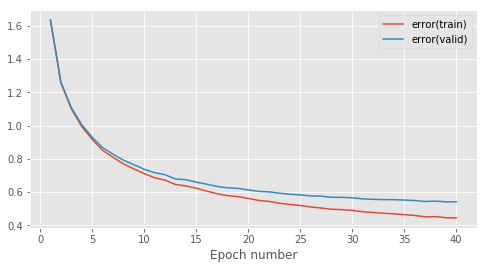

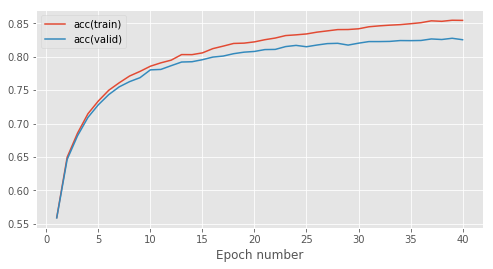

Epoch 1: 10.2s to complete
    error(train)=1.42e+00, acc(train)=6.05e-01, error(valid)=1.42e+00, acc(valid)=6.00e-01


Epoch 2: 12.4s to complete
    error(train)=1.15e+00, acc(train)=6.72e-01, error(valid)=1.16e+00, acc(valid)=6.71e-01


Epoch 3: 12.3s to complete
    error(train)=1.02e+00, acc(train)=7.06e-01, error(valid)=1.03e+00, acc(valid)=7.04e-01


Epoch 4: 9.5s to complete
    error(train)=9.32e-01, acc(train)=7.27e-01, error(valid)=9.43e-01, acc(valid)=7.24e-01


Epoch 5: 8.8s to complete
    error(train)=8.60e-01, acc(train)=7.47e-01, error(valid)=8.78e-01, acc(valid)=7.43e-01


Epoch 6: 8.7s to complete
    error(train)=8.16e-01, acc(train)=7.58e-01, error(valid)=8.37e-01, acc(valid)=7.51e-01


Epoch 7: 8.6s to complete
    error(train)=7.74e-01, acc(train)=7.68e-01, error(valid)=7.99e-01, acc(valid)=7.62e-01


Epoch 8: 7.9s to complete
    error(train)=7.50e-01, acc(train)=7.75e-01, error(valid)=7.78e-01, acc(valid)=7.67e-01


Epoch 9: 9.3s to complete
    error(train)=7.24e-01, acc(train)=7.81e-01, error(valid)=7.54e-01, acc(valid)=7.75e-01


Epoch 10: 6.9s to complete
    error(train)=6.96e-01, acc(train)=7.89e-01, error(valid)=7.30e-01, acc(valid)=7.80e-01


Epoch 11: 6.2s to complete
    error(train)=6.75e-01, acc(train)=7.95e-01, error(valid)=7.14e-01, acc(valid)=7.84e-01


Epoch 12: 6.9s to complete
    error(train)=6.58e-01, acc(train)=7.99e-01, error(valid)=6.99e-01, acc(valid)=7.90e-01


Epoch 13: 6.6s to complete
    error(train)=6.45e-01, acc(train)=8.04e-01, error(valid)=6.89e-01, acc(valid)=7.91e-01


Epoch 14: 9.8s to complete
    error(train)=6.30e-01, acc(train)=8.06e-01, error(valid)=6.76e-01, acc(valid)=7.93e-01


Epoch 15: 7.0s to complete
    error(train)=6.15e-01, acc(train)=8.09e-01, error(valid)=6.65e-01, acc(valid)=7.98e-01


Epoch 16: 7.6s to complete
    error(train)=6.05e-01, acc(train)=8.11e-01, error(valid)=6.56e-01, acc(valid)=7.96e-01


Epoch 17: 8.4s to complete
    error(train)=5.90e-01, acc(train)=8.17e-01, error(valid)=6.44e-01, acc(valid)=8.01e-01


Epoch 18: 7.3s to complete
    error(train)=5.85e-01, acc(train)=8.18e-01, error(valid)=6.40e-01, acc(valid)=8.03e-01


Epoch 19: 10.2s to complete
    error(train)=5.75e-01, acc(train)=8.19e-01, error(valid)=6.33e-01, acc(valid)=8.03e-01


Epoch 20: 5.2s to complete
    error(train)=5.62e-01, acc(train)=8.24e-01, error(valid)=6.25e-01, acc(valid)=8.05e-01


Epoch 21: 8.7s to complete
    error(train)=5.52e-01, acc(train)=8.26e-01, error(valid)=6.14e-01, acc(valid)=8.07e-01


Epoch 22: 7.4s to complete
    error(train)=5.48e-01, acc(train)=8.26e-01, error(valid)=6.13e-01, acc(valid)=8.10e-01


Epoch 23: 7.9s to complete
    error(train)=5.36e-01, acc(train)=8.29e-01, error(valid)=6.02e-01, acc(valid)=8.13e-01


Epoch 24: 8.5s to complete
    error(train)=5.30e-01, acc(train)=8.32e-01, error(valid)=5.97e-01, acc(valid)=8.15e-01


Epoch 25: 8.5s to complete
    error(train)=5.23e-01, acc(train)=8.35e-01, error(valid)=5.95e-01, acc(valid)=8.15e-01


Epoch 26: 6.7s to complete
    error(train)=5.15e-01, acc(train)=8.36e-01, error(valid)=5.86e-01, acc(valid)=8.16e-01


Epoch 27: 5.5s to complete
    error(train)=5.09e-01, acc(train)=8.38e-01, error(valid)=5.82e-01, acc(valid)=8.17e-01


Epoch 28: 5.9s to complete
    error(train)=5.05e-01, acc(train)=8.37e-01, error(valid)=5.82e-01, acc(valid)=8.16e-01


Epoch 29: 7.5s to complete
    error(train)=4.95e-01, acc(train)=8.42e-01, error(valid)=5.72e-01, acc(valid)=8.21e-01


Epoch 30: 6.6s to complete
    error(train)=4.93e-01, acc(train)=8.42e-01, error(valid)=5.73e-01, acc(valid)=8.20e-01


Epoch 31: 5.2s to complete
    error(train)=4.85e-01, acc(train)=8.44e-01, error(valid)=5.67e-01, acc(valid)=8.23e-01


Epoch 32: 8.0s to complete
    error(train)=4.85e-01, acc(train)=8.43e-01, error(valid)=5.68e-01, acc(valid)=8.22e-01


Epoch 33: 9.4s to complete
    error(train)=4.77e-01, acc(train)=8.45e-01, error(valid)=5.62e-01, acc(valid)=8.24e-01


Epoch 34: 8.2s to complete
    error(train)=4.74e-01, acc(train)=8.45e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


Epoch 35: 5.1s to complete
    error(train)=4.67e-01, acc(train)=8.49e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01


Epoch 36: 7.3s to complete
    error(train)=4.61e-01, acc(train)=8.51e-01, error(valid)=5.53e-01, acc(valid)=8.26e-01


Epoch 37: 8.6s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


Epoch 38: 8.5s to complete
    error(train)=4.56e-01, acc(train)=8.53e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


Epoch 39: 8.3s to complete
    error(train)=4.50e-01, acc(train)=8.53e-01, error(valid)=5.48e-01, acc(valid)=8.28e-01


Epoch 40: 8.2s to complete
    error(train)=4.48e-01, acc(train)=8.53e-01, error(valid)=5.47e-01, acc(valid)=8.27e-01


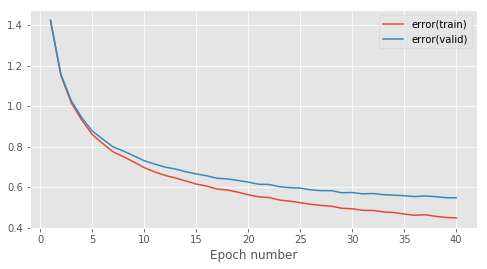

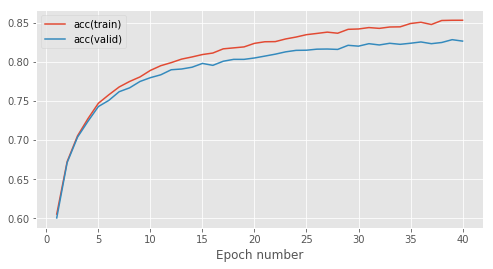

Epoch 1: 5.7s to complete
    error(train)=1.62e+00, acc(train)=5.58e-01, error(valid)=1.62e+00, acc(valid)=5.55e-01


Epoch 2: 5.8s to complete
    error(train)=1.26e+00, acc(train)=6.41e-01, error(valid)=1.26e+00, acc(valid)=6.42e-01


Epoch 3: 7.6s to complete
    error(train)=1.12e+00, acc(train)=6.77e-01, error(valid)=1.12e+00, acc(valid)=6.77e-01


Epoch 4: 8.5s to complete
    error(train)=1.02e+00, acc(train)=7.06e-01, error(valid)=1.02e+00, acc(valid)=7.04e-01


Epoch 5: 8.9s to complete
    error(train)=9.40e-01, acc(train)=7.25e-01, error(valid)=9.53e-01, acc(valid)=7.23e-01


Epoch 6: 6.5s to complete
    error(train)=8.77e-01, acc(train)=7.42e-01, error(valid)=8.94e-01, acc(valid)=7.37e-01


Epoch 7: 6.5s to complete
    error(train)=8.22e-01, acc(train)=7.56e-01, error(valid)=8.42e-01, acc(valid)=7.52e-01


Epoch 8: 6.4s to complete
    error(train)=7.86e-01, acc(train)=7.64e-01, error(valid)=8.09e-01, acc(valid)=7.57e-01


Epoch 9: 10.3s to complete
    error(train)=7.46e-01, acc(train)=7.76e-01, error(valid)=7.74e-01, acc(valid)=7.68e-01


Epoch 10: 10.2s to complete
    error(train)=7.21e-01, acc(train)=7.80e-01, error(valid)=7.49e-01, acc(valid)=7.71e-01


Epoch 11: 9.5s to complete
    error(train)=6.88e-01, acc(train)=7.91e-01, error(valid)=7.18e-01, acc(valid)=7.81e-01


Epoch 12: 6.6s to complete
    error(train)=6.73e-01, acc(train)=7.94e-01, error(valid)=7.06e-01, acc(valid)=7.85e-01


Epoch 13: 8.7s to complete
    error(train)=6.52e-01, acc(train)=8.01e-01, error(valid)=6.85e-01, acc(valid)=7.91e-01


Epoch 14: 6.9s to complete
    error(train)=6.36e-01, acc(train)=8.04e-01, error(valid)=6.73e-01, acc(valid)=7.93e-01


Epoch 15: 8.4s to complete
    error(train)=6.23e-01, acc(train)=8.06e-01, error(valid)=6.61e-01, acc(valid)=7.95e-01


Epoch 16: 7.8s to complete
    error(train)=6.05e-01, acc(train)=8.13e-01, error(valid)=6.47e-01, acc(valid)=7.99e-01


Epoch 17: 7.0s to complete
    error(train)=5.93e-01, acc(train)=8.15e-01, error(valid)=6.35e-01, acc(valid)=8.02e-01


Epoch 18: 6.7s to complete
    error(train)=5.81e-01, acc(train)=8.19e-01, error(valid)=6.25e-01, acc(valid)=8.04e-01


Epoch 19: 7.4s to complete
    error(train)=5.72e-01, acc(train)=8.21e-01, error(valid)=6.19e-01, acc(valid)=8.06e-01


Epoch 20: 9.6s to complete
    error(train)=5.60e-01, acc(train)=8.25e-01, error(valid)=6.11e-01, acc(valid)=8.08e-01


Epoch 21: 7.8s to complete
    error(train)=5.51e-01, acc(train)=8.28e-01, error(valid)=6.01e-01, acc(valid)=8.11e-01


Epoch 22: 8.3s to complete
    error(train)=5.48e-01, acc(train)=8.26e-01, error(valid)=6.00e-01, acc(valid)=8.10e-01


Epoch 23: 7.8s to complete
    error(train)=5.34e-01, acc(train)=8.31e-01, error(valid)=5.89e-01, acc(valid)=8.16e-01


Epoch 24: 7.1s to complete
    error(train)=5.25e-01, acc(train)=8.32e-01, error(valid)=5.84e-01, acc(valid)=8.15e-01


Epoch 25: 8.8s to complete
    error(train)=5.23e-01, acc(train)=8.33e-01, error(valid)=5.84e-01, acc(valid)=8.16e-01


Epoch 26: 10.4s to complete
    error(train)=5.12e-01, acc(train)=8.37e-01, error(valid)=5.73e-01, acc(valid)=8.19e-01


Epoch 27: 9.3s to complete
    error(train)=5.03e-01, acc(train)=8.40e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


Epoch 28: 6.1s to complete
    error(train)=4.97e-01, acc(train)=8.41e-01, error(valid)=5.66e-01, acc(valid)=8.19e-01


Epoch 29: 7.7s to complete
    error(train)=4.96e-01, acc(train)=8.41e-01, error(valid)=5.66e-01, acc(valid)=8.20e-01


Epoch 30: 9.8s to complete
    error(train)=4.84e-01, acc(train)=8.44e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


Epoch 31: 7.0s to complete
    error(train)=4.82e-01, acc(train)=8.45e-01, error(valid)=5.57e-01, acc(valid)=8.22e-01


Epoch 32: 7.0s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=5.55e-01, acc(valid)=8.22e-01


Epoch 33: 8.8s to complete
    error(train)=4.75e-01, acc(train)=8.46e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


Epoch 34: 7.3s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


Epoch 35: 8.0s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.44e-01, acc(valid)=8.23e-01


Epoch 36: 10.3s to complete
    error(train)=4.57e-01, acc(train)=8.51e-01, error(valid)=5.41e-01, acc(valid)=8.27e-01


Epoch 37: 7.3s to complete
    error(train)=4.56e-01, acc(train)=8.51e-01, error(valid)=5.42e-01, acc(valid)=8.26e-01


Epoch 38: 7.3s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 39: 12.2s to complete
    error(train)=4.46e-01, acc(train)=8.54e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


Epoch 40: 8.4s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


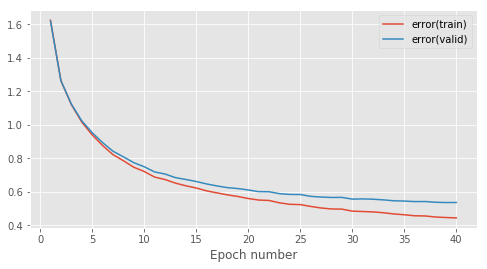

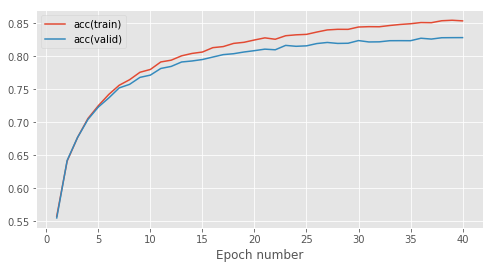

Epoch 1: 7.9s to complete
    error(train)=1.66e+00, acc(train)=5.55e-01, error(valid)=1.66e+00, acc(valid)=5.51e-01


Epoch 2: 8.8s to complete
    error(train)=1.28e+00, acc(train)=6.44e-01, error(valid)=1.29e+00, acc(valid)=6.43e-01


Epoch 3: 6.1s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.79e-01


Epoch 4: 8.2s to complete
    error(train)=1.01e+00, acc(train)=7.08e-01, error(valid)=1.03e+00, acc(valid)=7.03e-01


Epoch 5: 6.1s to complete
    error(train)=9.32e-01, acc(train)=7.30e-01, error(valid)=9.51e-01, acc(valid)=7.25e-01


Epoch 6: 6.0s to complete
    error(train)=8.78e-01, acc(train)=7.43e-01, error(valid)=9.01e-01, acc(valid)=7.37e-01


Epoch 7: 7.9s to complete
    error(train)=8.29e-01, acc(train)=7.55e-01, error(valid)=8.54e-01, acc(valid)=7.49e-01


Epoch 8: 5.5s to complete
    error(train)=7.89e-01, acc(train)=7.67e-01, error(valid)=8.17e-01, acc(valid)=7.59e-01


Epoch 9: 6.4s to complete
    error(train)=7.58e-01, acc(train)=7.75e-01, error(valid)=7.88e-01, acc(valid)=7.68e-01


Epoch 10: 8.6s to complete
    error(train)=7.33e-01, acc(train)=7.79e-01, error(valid)=7.66e-01, acc(valid)=7.71e-01


Epoch 11: 7.7s to complete
    error(train)=7.07e-01, acc(train)=7.85e-01, error(valid)=7.42e-01, acc(valid)=7.77e-01


Epoch 12: 6.2s to complete
    error(train)=6.82e-01, acc(train)=7.93e-01, error(valid)=7.21e-01, acc(valid)=7.84e-01


Epoch 13: 6.5s to complete
    error(train)=6.61e-01, acc(train)=7.98e-01, error(valid)=6.99e-01, acc(valid)=7.91e-01


Epoch 14: 7.0s to complete
    error(train)=6.47e-01, acc(train)=8.02e-01, error(valid)=6.87e-01, acc(valid)=7.93e-01


Epoch 15: 5.5s to complete
    error(train)=6.28e-01, acc(train)=8.07e-01, error(valid)=6.70e-01, acc(valid)=7.97e-01


Epoch 16: 9.6s to complete
    error(train)=6.13e-01, acc(train)=8.11e-01, error(valid)=6.61e-01, acc(valid)=7.97e-01


Epoch 17: 5.5s to complete
    error(train)=6.01e-01, acc(train)=8.14e-01, error(valid)=6.48e-01, acc(valid)=8.00e-01


Epoch 18: 7.9s to complete
    error(train)=5.86e-01, acc(train)=8.18e-01, error(valid)=6.33e-01, acc(valid)=8.05e-01


Epoch 19: 6.9s to complete
    error(train)=5.75e-01, acc(train)=8.21e-01, error(valid)=6.26e-01, acc(valid)=8.07e-01


Epoch 20: 9.3s to complete
    error(train)=5.67e-01, acc(train)=8.22e-01, error(valid)=6.18e-01, acc(valid)=8.09e-01


Epoch 21: 7.8s to complete
    error(train)=5.57e-01, acc(train)=8.25e-01, error(valid)=6.12e-01, acc(valid)=8.07e-01


Epoch 22: 7.5s to complete
    error(train)=5.46e-01, acc(train)=8.29e-01, error(valid)=6.04e-01, acc(valid)=8.12e-01


Epoch 23: 7.1s to complete
    error(train)=5.38e-01, acc(train)=8.30e-01, error(valid)=5.97e-01, acc(valid)=8.14e-01


Epoch 24: 8.8s to complete
    error(train)=5.29e-01, acc(train)=8.33e-01, error(valid)=5.91e-01, acc(valid)=8.12e-01


Epoch 25: 5.8s to complete
    error(train)=5.23e-01, acc(train)=8.33e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


Epoch 26: 6.8s to complete
    error(train)=5.17e-01, acc(train)=8.34e-01, error(valid)=5.82e-01, acc(valid)=8.13e-01


Epoch 27: 9.2s to complete
    error(train)=5.09e-01, acc(train)=8.38e-01, error(valid)=5.76e-01, acc(valid)=8.17e-01


Epoch 28: 9.1s to complete
    error(train)=4.99e-01, acc(train)=8.41e-01, error(valid)=5.70e-01, acc(valid)=8.18e-01


Epoch 29: 7.2s to complete
    error(train)=4.94e-01, acc(train)=8.42e-01, error(valid)=5.65e-01, acc(valid)=8.18e-01


Epoch 30: 7.7s to complete
    error(train)=4.88e-01, acc(train)=8.43e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


Epoch 31: 8.9s to complete
    error(train)=4.84e-01, acc(train)=8.44e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01


Epoch 32: 10.2s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


Epoch 33: 5.7s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.52e-01, acc(valid)=8.21e-01


Epoch 34: 7.8s to complete
    error(train)=4.68e-01, acc(train)=8.50e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 35: 7.6s to complete
    error(train)=4.63e-01, acc(train)=8.50e-01, error(valid)=5.50e-01, acc(valid)=8.22e-01


Epoch 36: 7.0s to complete
    error(train)=4.59e-01, acc(train)=8.49e-01, error(valid)=5.46e-01, acc(valid)=8.21e-01


Epoch 37: 9.1s to complete
    error(train)=4.55e-01, acc(train)=8.52e-01, error(valid)=5.43e-01, acc(valid)=8.28e-01


Epoch 38: 6.7s to complete
    error(train)=4.47e-01, acc(train)=8.54e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


Epoch 39: 6.3s to complete
    error(train)=4.44e-01, acc(train)=8.55e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


Epoch 40: 9.9s to complete
    error(train)=4.41e-01, acc(train)=8.57e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


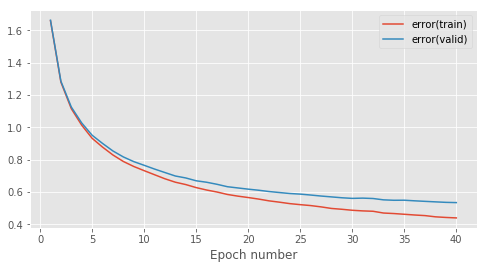

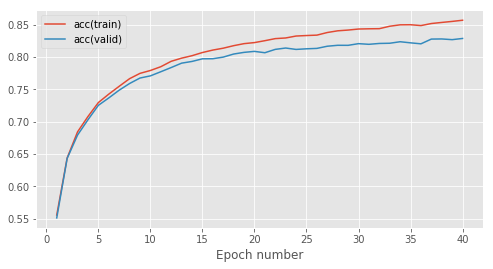

Epoch 1: 10.1s to complete
    error(train)=1.58e+00, acc(train)=5.67e-01, error(valid)=1.58e+00, acc(valid)=5.68e-01


Epoch 2: 8.6s to complete
    error(train)=1.26e+00, acc(train)=6.46e-01, error(valid)=1.26e+00, acc(valid)=6.43e-01


Epoch 3: 8.9s to complete
    error(train)=1.11e+00, acc(train)=6.82e-01, error(valid)=1.11e+00, acc(valid)=6.81e-01


Epoch 4: 7.0s to complete
    error(train)=1.01e+00, acc(train)=7.08e-01, error(valid)=1.02e+00, acc(valid)=7.05e-01


Epoch 5: 8.3s to complete
    error(train)=9.35e-01, acc(train)=7.28e-01, error(valid)=9.44e-01, acc(valid)=7.23e-01


Epoch 6: 7.8s to complete
    error(train)=8.75e-01, acc(train)=7.44e-01, error(valid)=8.89e-01, acc(valid)=7.38e-01


Epoch 7: 7.3s to complete
    error(train)=8.23e-01, acc(train)=7.56e-01, error(valid)=8.41e-01, acc(valid)=7.51e-01


Epoch 8: 6.2s to complete
    error(train)=7.88e-01, acc(train)=7.66e-01, error(valid)=8.08e-01, acc(valid)=7.60e-01


Epoch 9: 7.3s to complete
    error(train)=7.56e-01, acc(train)=7.74e-01, error(valid)=7.79e-01, acc(valid)=7.68e-01


Epoch 10: 10.5s to complete
    error(train)=7.25e-01, acc(train)=7.81e-01, error(valid)=7.52e-01, acc(valid)=7.72e-01


Epoch 11: 13.2s to complete
    error(train)=6.98e-01, acc(train)=7.88e-01, error(valid)=7.28e-01, acc(valid)=7.81e-01


Epoch 12: 10.0s to complete
    error(train)=6.80e-01, acc(train)=7.92e-01, error(valid)=7.13e-01, acc(valid)=7.82e-01


Epoch 13: 9.5s to complete
    error(train)=6.60e-01, acc(train)=7.98e-01, error(valid)=6.95e-01, acc(valid)=7.88e-01


Epoch 14: 11.7s to complete
    error(train)=6.39e-01, acc(train)=8.03e-01, error(valid)=6.76e-01, acc(valid)=7.92e-01


Epoch 15: 13.0s to complete
    error(train)=6.26e-01, acc(train)=8.07e-01, error(valid)=6.65e-01, acc(valid)=7.96e-01


Epoch 16: 13.0s to complete
    error(train)=6.15e-01, acc(train)=8.09e-01, error(valid)=6.59e-01, acc(valid)=7.96e-01


Epoch 17: 13.2s to complete
    error(train)=6.02e-01, acc(train)=8.13e-01, error(valid)=6.49e-01, acc(valid)=7.97e-01


Epoch 18: 11.1s to complete
    error(train)=5.86e-01, acc(train)=8.17e-01, error(valid)=6.34e-01, acc(valid)=8.04e-01


Epoch 19: 11.4s to complete
    error(train)=5.76e-01, acc(train)=8.20e-01, error(valid)=6.25e-01, acc(valid)=8.04e-01


Epoch 20: 12.3s to complete
    error(train)=5.65e-01, acc(train)=8.23e-01, error(valid)=6.16e-01, acc(valid)=8.07e-01


Epoch 21: 12.9s to complete
    error(train)=5.57e-01, acc(train)=8.25e-01, error(valid)=6.11e-01, acc(valid)=8.07e-01


Epoch 22: 10.5s to complete
    error(train)=5.48e-01, acc(train)=8.29e-01, error(valid)=6.03e-01, acc(valid)=8.09e-01


Epoch 23: 12.3s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=6.00e-01, acc(valid)=8.12e-01


Epoch 24: 15.4s to complete
    error(train)=5.33e-01, acc(train)=8.31e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


Epoch 25: 10.6s to complete
    error(train)=5.24e-01, acc(train)=8.32e-01, error(valid)=5.87e-01, acc(valid)=8.17e-01


Epoch 26: 11.4s to complete
    error(train)=5.14e-01, acc(train)=8.37e-01, error(valid)=5.81e-01, acc(valid)=8.15e-01


Epoch 27: 12.6s to complete
    error(train)=5.13e-01, acc(train)=8.38e-01, error(valid)=5.80e-01, acc(valid)=8.17e-01


Epoch 28: 11.3s to complete
    error(train)=5.03e-01, acc(train)=8.40e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


Epoch 29: 10.9s to complete
    error(train)=4.96e-01, acc(train)=8.42e-01, error(valid)=5.70e-01, acc(valid)=8.20e-01


Epoch 30: 10.9s to complete
    error(train)=4.88e-01, acc(train)=8.44e-01, error(valid)=5.65e-01, acc(valid)=8.22e-01


Epoch 31: 12.4s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.69e-01, acc(valid)=8.20e-01


Epoch 32: 11.7s to complete
    error(train)=4.78e-01, acc(train)=8.47e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


Epoch 33: 13.7s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.54e-01, acc(valid)=8.26e-01


Epoch 34: 11.4s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


Epoch 35: 14.8s to complete
    error(train)=4.64e-01, acc(train)=8.49e-01, error(valid)=5.51e-01, acc(valid)=8.25e-01


Epoch 36: 11.8s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.49e-01, acc(valid)=8.27e-01


Epoch 37: 13.8s to complete
    error(train)=4.51e-01, acc(train)=8.55e-01, error(valid)=5.45e-01, acc(valid)=8.28e-01


Epoch 38: 12.8s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.49e-01, acc(valid)=8.27e-01


Epoch 39: 14.1s to complete
    error(train)=4.45e-01, acc(train)=8.55e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


Epoch 40: 14.1s to complete
    error(train)=4.47e-01, acc(train)=8.53e-01, error(valid)=5.47e-01, acc(valid)=8.26e-01


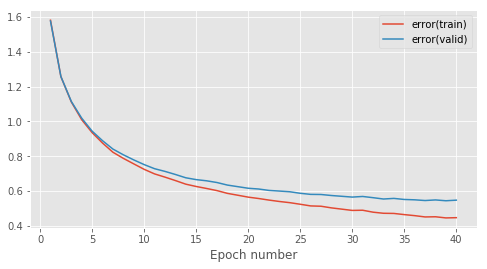

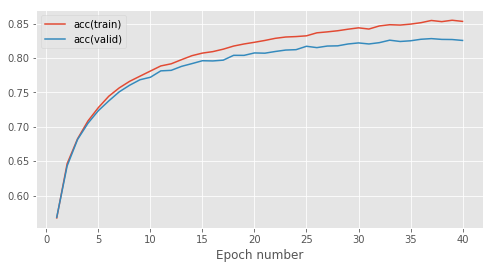

Epoch 1: 11.8s to complete
    error(train)=1.46e+00, acc(train)=5.99e-01, error(valid)=1.46e+00, acc(valid)=5.99e-01


Epoch 2: 13.3s to complete
    error(train)=1.18e+00, acc(train)=6.66e-01, error(valid)=1.19e+00, acc(valid)=6.62e-01


Epoch 3: 12.7s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


Epoch 4: 10.7s to complete
    error(train)=9.49e-01, acc(train)=7.25e-01, error(valid)=9.61e-01, acc(valid)=7.23e-01


Epoch 5: 12.2s to complete
    error(train)=8.77e-01, acc(train)=7.43e-01, error(valid)=8.91e-01, acc(valid)=7.41e-01


Epoch 6: 12.0s to complete
    error(train)=8.27e-01, acc(train)=7.55e-01, error(valid)=8.45e-01, acc(valid)=7.48e-01


Epoch 7: 11.8s to complete
    error(train)=7.85e-01, acc(train)=7.67e-01, error(valid)=8.07e-01, acc(valid)=7.59e-01


Epoch 8: 11.3s to complete
    error(train)=7.52e-01, acc(train)=7.75e-01, error(valid)=7.76e-01, acc(valid)=7.67e-01


Epoch 9: 11.9s to complete
    error(train)=7.25e-01, acc(train)=7.83e-01, error(valid)=7.51e-01, acc(valid)=7.77e-01


Epoch 10: 11.7s to complete
    error(train)=7.02e-01, acc(train)=7.88e-01, error(valid)=7.33e-01, acc(valid)=7.78e-01


Epoch 11: 10.5s to complete
    error(train)=6.78e-01, acc(train)=7.94e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


Epoch 12: 12.3s to complete
    error(train)=6.64e-01, acc(train)=7.96e-01, error(valid)=7.00e-01, acc(valid)=7.88e-01


Epoch 13: 12.1s to complete
    error(train)=6.44e-01, acc(train)=8.02e-01, error(valid)=6.83e-01, acc(valid)=7.92e-01


Epoch 14: 12.2s to complete
    error(train)=6.24e-01, acc(train)=8.09e-01, error(valid)=6.66e-01, acc(valid)=7.98e-01


Epoch 15: 12.8s to complete
    error(train)=6.09e-01, acc(train)=8.12e-01, error(valid)=6.54e-01, acc(valid)=7.98e-01


Epoch 16: 11.5s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=6.43e-01, acc(valid)=8.02e-01


Epoch 17: 14.3s to complete
    error(train)=5.88e-01, acc(train)=8.16e-01, error(valid)=6.36e-01, acc(valid)=8.01e-01


Epoch 18: 11.2s to complete
    error(train)=5.79e-01, acc(train)=8.19e-01, error(valid)=6.29e-01, acc(valid)=8.01e-01


Epoch 19: 12.6s to complete
    error(train)=5.65e-01, acc(train)=8.23e-01, error(valid)=6.17e-01, acc(valid)=8.09e-01


Epoch 20: 10.8s to complete
    error(train)=5.62e-01, acc(train)=8.22e-01, error(valid)=6.16e-01, acc(valid)=8.04e-01


Epoch 21: 11.1s to complete
    error(train)=5.56e-01, acc(train)=8.24e-01, error(valid)=6.13e-01, acc(valid)=8.07e-01


Epoch 22: 11.8s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=6.00e-01, acc(valid)=8.13e-01


Epoch 23: 12.8s to complete
    error(train)=5.35e-01, acc(train)=8.31e-01, error(valid)=5.94e-01, acc(valid)=8.11e-01


Epoch 24: 12.1s to complete
    error(train)=5.23e-01, acc(train)=8.35e-01, error(valid)=5.84e-01, acc(valid)=8.15e-01


Epoch 25: 12.5s to complete
    error(train)=5.20e-01, acc(train)=8.35e-01, error(valid)=5.85e-01, acc(valid)=8.15e-01


Epoch 26: 11.4s to complete
    error(train)=5.14e-01, acc(train)=8.37e-01, error(valid)=5.82e-01, acc(valid)=8.15e-01


Epoch 27: 12.5s to complete
    error(train)=5.07e-01, acc(train)=8.39e-01, error(valid)=5.76e-01, acc(valid)=8.18e-01


Epoch 28: 12.2s to complete
    error(train)=5.05e-01, acc(train)=8.38e-01, error(valid)=5.74e-01, acc(valid)=8.15e-01


Epoch 29: 13.6s to complete
    error(train)=4.92e-01, acc(train)=8.43e-01, error(valid)=5.65e-01, acc(valid)=8.20e-01


Epoch 30: 11.8s to complete
    error(train)=4.83e-01, acc(train)=8.45e-01, error(valid)=5.56e-01, acc(valid)=8.21e-01


Epoch 31: 12.3s to complete
    error(train)=4.87e-01, acc(train)=8.42e-01, error(valid)=5.62e-01, acc(valid)=8.15e-01


Epoch 32: 11.6s to complete
    error(train)=4.76e-01, acc(train)=8.47e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


Epoch 33: 12.0s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.52e-01, acc(valid)=8.21e-01


Epoch 34: 11.3s to complete
    error(train)=4.73e-01, acc(train)=8.48e-01, error(valid)=5.55e-01, acc(valid)=8.21e-01


Epoch 35: 11.3s to complete
    error(train)=4.60e-01, acc(train)=8.52e-01, error(valid)=5.45e-01, acc(valid)=8.27e-01


Epoch 36: 11.0s to complete
    error(train)=4.57e-01, acc(train)=8.52e-01, error(valid)=5.42e-01, acc(valid)=8.25e-01


Epoch 37: 10.5s to complete
    error(train)=4.55e-01, acc(train)=8.52e-01, error(valid)=5.44e-01, acc(valid)=8.24e-01


Epoch 38: 11.7s to complete
    error(train)=4.50e-01, acc(train)=8.54e-01, error(valid)=5.41e-01, acc(valid)=8.23e-01


Epoch 39: 11.6s to complete
    error(train)=4.46e-01, acc(train)=8.54e-01, error(valid)=5.38e-01, acc(valid)=8.24e-01


Epoch 40: 12.1s to complete
    error(train)=4.40e-01, acc(train)=8.57e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


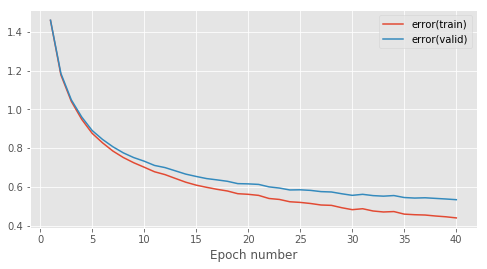

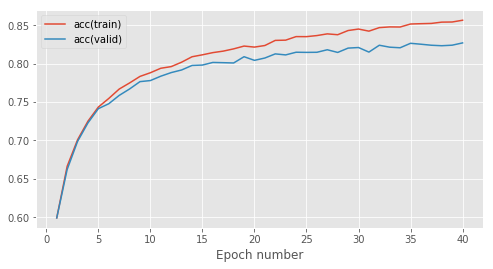

Epoch 1: 13.4s to complete
    error(train)=2.40e+00, acc(train)=4.22e-01, error(valid)=2.39e+00, acc(valid)=4.21e-01


Epoch 2: 10.8s to complete
    error(train)=1.64e+00, acc(train)=5.66e-01, error(valid)=1.64e+00, acc(valid)=5.64e-01


Epoch 3: 12.2s to complete
    error(train)=1.41e+00, acc(train)=6.14e-01, error(valid)=1.41e+00, acc(valid)=6.09e-01


Epoch 4: 12.6s to complete
    error(train)=1.29e+00, acc(train)=6.41e-01, error(valid)=1.30e+00, acc(valid)=6.35e-01


Epoch 5: 11.0s to complete
    error(train)=1.21e+00, acc(train)=6.62e-01, error(valid)=1.22e+00, acc(valid)=6.54e-01


Epoch 6: 10.5s to complete
    error(train)=1.15e+00, acc(train)=6.77e-01, error(valid)=1.16e+00, acc(valid)=6.73e-01


Epoch 7: 13.4s to complete
    error(train)=1.10e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.83e-01


Epoch 8: 12.3s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.98e-01


Epoch 9: 13.0s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.08e-01


Epoch 10: 11.2s to complete
    error(train)=9.76e-01, acc(train)=7.20e-01, error(valid)=9.88e-01, acc(valid)=7.15e-01


Epoch 11: 11.5s to complete
    error(train)=9.39e-01, acc(train)=7.29e-01, error(valid)=9.53e-01, acc(valid)=7.26e-01


Epoch 12: 10.3s to complete
    error(train)=9.09e-01, acc(train)=7.37e-01, error(valid)=9.24e-01, acc(valid)=7.33e-01


Epoch 13: 11.5s to complete
    error(train)=8.87e-01, acc(train)=7.41e-01, error(valid)=9.02e-01, acc(valid)=7.39e-01


Epoch 14: 9.6s to complete
    error(train)=8.58e-01, acc(train)=7.49e-01, error(valid)=8.75e-01, acc(valid)=7.44e-01


Epoch 15: 11.8s to complete
    error(train)=8.36e-01, acc(train)=7.55e-01, error(valid)=8.56e-01, acc(valid)=7.49e-01


Epoch 16: 12.4s to complete
    error(train)=8.13e-01, acc(train)=7.59e-01, error(valid)=8.33e-01, acc(valid)=7.55e-01


Epoch 17: 11.9s to complete
    error(train)=7.94e-01, acc(train)=7.65e-01, error(valid)=8.14e-01, acc(valid)=7.62e-01


Epoch 18: 10.1s to complete
    error(train)=7.74e-01, acc(train)=7.70e-01, error(valid)=7.96e-01, acc(valid)=7.64e-01


Epoch 19: 11.8s to complete
    error(train)=7.60e-01, acc(train)=7.74e-01, error(valid)=7.82e-01, acc(valid)=7.69e-01


Epoch 20: 14.5s to complete
    error(train)=7.44e-01, acc(train)=7.78e-01, error(valid)=7.69e-01, acc(valid)=7.71e-01


Epoch 21: 13.5s to complete
    error(train)=7.32e-01, acc(train)=7.81e-01, error(valid)=7.57e-01, acc(valid)=7.75e-01


Epoch 22: 12.2s to complete
    error(train)=7.18e-01, acc(train)=7.84e-01, error(valid)=7.45e-01, acc(valid)=7.78e-01


Epoch 23: 9.9s to complete
    error(train)=7.06e-01, acc(train)=7.87e-01, error(valid)=7.34e-01, acc(valid)=7.81e-01


Epoch 24: 10.0s to complete
    error(train)=6.93e-01, acc(train)=7.91e-01, error(valid)=7.21e-01, acc(valid)=7.85e-01


Epoch 25: 12.3s to complete
    error(train)=6.86e-01, acc(train)=7.91e-01, error(valid)=7.16e-01, acc(valid)=7.86e-01


Epoch 26: 12.8s to complete
    error(train)=6.73e-01, acc(train)=7.96e-01, error(valid)=7.05e-01, acc(valid)=7.87e-01


Epoch 27: 10.5s to complete
    error(train)=6.64e-01, acc(train)=7.98e-01, error(valid)=6.97e-01, acc(valid)=7.91e-01


Epoch 28: 17.1s to complete
    error(train)=6.57e-01, acc(train)=7.99e-01, error(valid)=6.91e-01, acc(valid)=7.90e-01


Epoch 29: 17.5s to complete
    error(train)=6.48e-01, acc(train)=8.02e-01, error(valid)=6.82e-01, acc(valid)=7.94e-01


Epoch 30: 17.5s to complete
    error(train)=6.40e-01, acc(train)=8.03e-01, error(valid)=6.76e-01, acc(valid)=7.93e-01


Epoch 31: 16.4s to complete
    error(train)=6.33e-01, acc(train)=8.06e-01, error(valid)=6.72e-01, acc(valid)=7.94e-01


Epoch 32: 15.9s to complete
    error(train)=6.25e-01, acc(train)=8.08e-01, error(valid)=6.64e-01, acc(valid)=7.97e-01


Epoch 33: 17.8s to complete
    error(train)=6.20e-01, acc(train)=8.08e-01, error(valid)=6.61e-01, acc(valid)=8.00e-01


Epoch 34: 17.0s to complete
    error(train)=6.11e-01, acc(train)=8.12e-01, error(valid)=6.52e-01, acc(valid)=8.00e-01


Epoch 35: 16.7s to complete
    error(train)=6.04e-01, acc(train)=8.14e-01, error(valid)=6.47e-01, acc(valid)=8.01e-01


Epoch 36: 14.1s to complete
    error(train)=6.01e-01, acc(train)=8.13e-01, error(valid)=6.44e-01, acc(valid)=8.01e-01


Epoch 37: 11.7s to complete
    error(train)=5.94e-01, acc(train)=8.15e-01, error(valid)=6.39e-01, acc(valid)=8.02e-01


Epoch 38: 13.8s to complete
    error(train)=5.87e-01, acc(train)=8.19e-01, error(valid)=6.33e-01, acc(valid)=8.04e-01


Epoch 39: 11.9s to complete
    error(train)=5.84e-01, acc(train)=8.19e-01, error(valid)=6.30e-01, acc(valid)=8.04e-01


Epoch 40: 11.1s to complete
    error(train)=5.78e-01, acc(train)=8.21e-01, error(valid)=6.25e-01, acc(valid)=8.06e-01


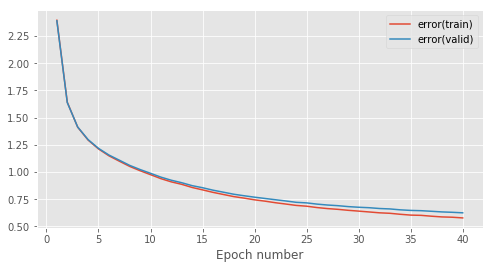

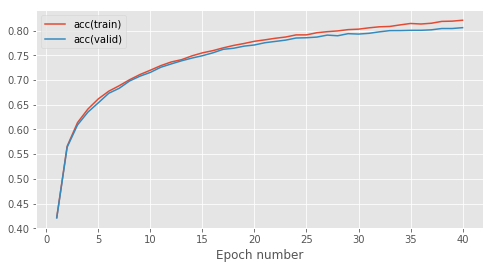

Epoch 1: 11.5s to complete
    error(train)=2.30e+00, acc(train)=4.21e-01, error(valid)=2.30e+00, acc(valid)=4.20e-01


Epoch 2: 12.0s to complete
    error(train)=1.63e+00, acc(train)=5.60e-01, error(valid)=1.63e+00, acc(valid)=5.59e-01


Epoch 3: 11.9s to complete
    error(train)=1.40e+00, acc(train)=6.10e-01, error(valid)=1.41e+00, acc(valid)=6.06e-01


Epoch 4: 10.2s to complete
    error(train)=1.28e+00, acc(train)=6.42e-01, error(valid)=1.29e+00, acc(valid)=6.40e-01


Epoch 5: 11.2s to complete
    error(train)=1.20e+00, acc(train)=6.60e-01, error(valid)=1.21e+00, acc(valid)=6.58e-01


Epoch 6: 10.6s to complete
    error(train)=1.14e+00, acc(train)=6.78e-01, error(valid)=1.15e+00, acc(valid)=6.75e-01


Epoch 7: 11.5s to complete
    error(train)=1.09e+00, acc(train)=6.91e-01, error(valid)=1.09e+00, acc(valid)=6.93e-01


Epoch 8: 14.4s to complete
    error(train)=1.04e+00, acc(train)=7.04e-01, error(valid)=1.05e+00, acc(valid)=7.01e-01


Epoch 9: 11.7s to complete
    error(train)=1.00e+00, acc(train)=7.14e-01, error(valid)=1.01e+00, acc(valid)=7.11e-01


Epoch 10: 10.8s to complete
    error(train)=9.66e-01, acc(train)=7.23e-01, error(valid)=9.78e-01, acc(valid)=7.22e-01


Epoch 11: 11.1s to complete
    error(train)=9.35e-01, acc(train)=7.31e-01, error(valid)=9.48e-01, acc(valid)=7.26e-01


Epoch 12: 10.9s to complete
    error(train)=9.08e-01, acc(train)=7.38e-01, error(valid)=9.24e-01, acc(valid)=7.33e-01


Epoch 13: 11.9s to complete
    error(train)=8.81e-01, acc(train)=7.45e-01, error(valid)=8.97e-01, acc(valid)=7.41e-01


Epoch 14: 12.8s to complete
    error(train)=8.57e-01, acc(train)=7.50e-01, error(valid)=8.74e-01, acc(valid)=7.45e-01


Epoch 15: 11.4s to complete
    error(train)=8.39e-01, acc(train)=7.54e-01, error(valid)=8.57e-01, acc(valid)=7.49e-01


Epoch 16: 12.0s to complete
    error(train)=8.18e-01, acc(train)=7.61e-01, error(valid)=8.37e-01, acc(valid)=7.53e-01


Epoch 17: 10.6s to complete
    error(train)=8.01e-01, acc(train)=7.64e-01, error(valid)=8.20e-01, acc(valid)=7.59e-01


Epoch 18: 14.1s to complete
    error(train)=7.82e-01, acc(train)=7.68e-01, error(valid)=8.03e-01, acc(valid)=7.64e-01


Epoch 19: 11.7s to complete
    error(train)=7.70e-01, acc(train)=7.70e-01, error(valid)=7.95e-01, acc(valid)=7.62e-01


Epoch 20: 11.5s to complete
    error(train)=7.55e-01, acc(train)=7.75e-01, error(valid)=7.78e-01, acc(valid)=7.68e-01


Epoch 21: 13.4s to complete
    error(train)=7.41e-01, acc(train)=7.79e-01, error(valid)=7.65e-01, acc(valid)=7.72e-01


Epoch 22: 11.0s to complete
    error(train)=7.30e-01, acc(train)=7.81e-01, error(valid)=7.56e-01, acc(valid)=7.74e-01


Epoch 23: 12.0s to complete
    error(train)=7.15e-01, acc(train)=7.85e-01, error(valid)=7.42e-01, acc(valid)=7.79e-01


Epoch 24: 12.4s to complete
    error(train)=7.05e-01, acc(train)=7.87e-01, error(valid)=7.34e-01, acc(valid)=7.82e-01


Epoch 25: 12.3s to complete
    error(train)=6.96e-01, acc(train)=7.89e-01, error(valid)=7.25e-01, acc(valid)=7.81e-01


Epoch 26: 11.7s to complete
    error(train)=6.83e-01, acc(train)=7.93e-01, error(valid)=7.16e-01, acc(valid)=7.86e-01


Epoch 27: 12.3s to complete
    error(train)=6.75e-01, acc(train)=7.95e-01, error(valid)=7.08e-01, acc(valid)=7.88e-01


Epoch 28: 11.8s to complete
    error(train)=6.66e-01, acc(train)=7.98e-01, error(valid)=6.99e-01, acc(valid)=7.91e-01


Epoch 29: 11.6s to complete
    error(train)=6.60e-01, acc(train)=7.99e-01, error(valid)=6.96e-01, acc(valid)=7.89e-01


Epoch 30: 12.7s to complete
    error(train)=6.52e-01, acc(train)=8.01e-01, error(valid)=6.88e-01, acc(valid)=7.90e-01


Epoch 31: 12.4s to complete
    error(train)=6.41e-01, acc(train)=8.04e-01, error(valid)=6.80e-01, acc(valid)=7.93e-01


Epoch 32: 12.9s to complete
    error(train)=6.34e-01, acc(train)=8.06e-01, error(valid)=6.74e-01, acc(valid)=7.97e-01


Epoch 33: 12.5s to complete
    error(train)=6.28e-01, acc(train)=8.08e-01, error(valid)=6.69e-01, acc(valid)=7.98e-01


Epoch 34: 12.1s to complete
    error(train)=6.22e-01, acc(train)=8.09e-01, error(valid)=6.64e-01, acc(valid)=7.97e-01


Epoch 35: 13.4s to complete
    error(train)=6.15e-01, acc(train)=8.12e-01, error(valid)=6.59e-01, acc(valid)=8.00e-01


Epoch 36: 11.4s to complete
    error(train)=6.09e-01, acc(train)=8.13e-01, error(valid)=6.53e-01, acc(valid)=8.01e-01


Epoch 37: 11.7s to complete
    error(train)=6.02e-01, acc(train)=8.14e-01, error(valid)=6.48e-01, acc(valid)=8.02e-01


Epoch 38: 12.1s to complete
    error(train)=5.97e-01, acc(train)=8.16e-01, error(valid)=6.43e-01, acc(valid)=8.04e-01


Epoch 39: 11.3s to complete
    error(train)=5.93e-01, acc(train)=8.17e-01, error(valid)=6.42e-01, acc(valid)=8.04e-01


Epoch 40: 10.2s to complete
    error(train)=5.88e-01, acc(train)=8.18e-01, error(valid)=6.37e-01, acc(valid)=8.04e-01


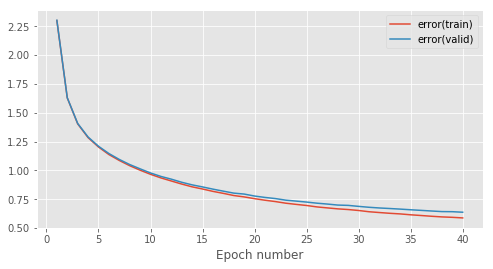

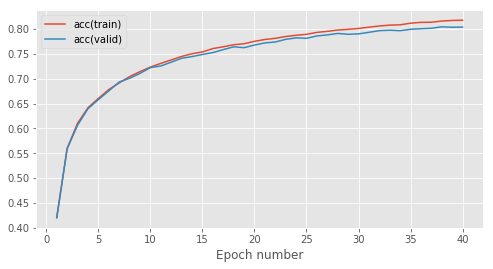

Epoch 1: 13.6s to complete
    error(train)=2.22e+00, acc(train)=4.46e-01, error(valid)=2.22e+00, acc(valid)=4.45e-01


Epoch 2: 12.2s to complete
    error(train)=1.59e+00, acc(train)=5.72e-01, error(valid)=1.59e+00, acc(valid)=5.68e-01


Epoch 3: 13.1s to complete
    error(train)=1.37e+00, acc(train)=6.21e-01, error(valid)=1.37e+00, acc(valid)=6.16e-01


Epoch 4: 11.4s to complete
    error(train)=1.26e+00, acc(train)=6.48e-01, error(valid)=1.26e+00, acc(valid)=6.46e-01


Epoch 5: 12.3s to complete
    error(train)=1.18e+00, acc(train)=6.70e-01, error(valid)=1.18e+00, acc(valid)=6.69e-01


Epoch 6: 9.1s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.84e-01


Epoch 7: 11.1s to complete
    error(train)=1.07e+00, acc(train)=6.98e-01, error(valid)=1.08e+00, acc(valid)=6.95e-01


Epoch 8: 12.9s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.03e+00, acc(valid)=7.04e-01


Epoch 9: 10.1s to complete
    error(train)=9.80e-01, acc(train)=7.19e-01, error(valid)=9.93e-01, acc(valid)=7.14e-01


Epoch 10: 12.4s to complete
    error(train)=9.44e-01, acc(train)=7.27e-01, error(valid)=9.60e-01, acc(valid)=7.21e-01


Epoch 11: 10.0s to complete
    error(train)=9.15e-01, acc(train)=7.33e-01, error(valid)=9.33e-01, acc(valid)=7.28e-01


Epoch 12: 12.4s to complete
    error(train)=8.85e-01, acc(train)=7.41e-01, error(valid)=9.05e-01, acc(valid)=7.35e-01


Epoch 13: 12.8s to complete
    error(train)=8.59e-01, acc(train)=7.48e-01, error(valid)=8.81e-01, acc(valid)=7.42e-01


Epoch 14: 12.9s to complete
    error(train)=8.34e-01, acc(train)=7.55e-01, error(valid)=8.56e-01, acc(valid)=7.48e-01


Epoch 15: 12.2s to complete
    error(train)=8.13e-01, acc(train)=7.60e-01, error(valid)=8.36e-01, acc(valid)=7.53e-01


Epoch 16: 10.9s to complete
    error(train)=7.90e-01, acc(train)=7.67e-01, error(valid)=8.13e-01, acc(valid)=7.60e-01


Epoch 17: 13.2s to complete
    error(train)=7.78e-01, acc(train)=7.69e-01, error(valid)=8.02e-01, acc(valid)=7.62e-01


Epoch 18: 13.0s to complete
    error(train)=7.59e-01, acc(train)=7.75e-01, error(valid)=7.84e-01, acc(valid)=7.69e-01


Epoch 19: 10.7s to complete
    error(train)=7.45e-01, acc(train)=7.77e-01, error(valid)=7.72e-01, acc(valid)=7.72e-01


Epoch 20: 13.9s to complete
    error(train)=7.31e-01, acc(train)=7.81e-01, error(valid)=7.59e-01, acc(valid)=7.75e-01


Epoch 21: 12.4s to complete
    error(train)=7.19e-01, acc(train)=7.84e-01, error(valid)=7.48e-01, acc(valid)=7.77e-01


Epoch 22: 10.7s to complete
    error(train)=7.06e-01, acc(train)=7.88e-01, error(valid)=7.35e-01, acc(valid)=7.81e-01


Epoch 23: 11.0s to complete
    error(train)=6.96e-01, acc(train)=7.90e-01, error(valid)=7.26e-01, acc(valid)=7.82e-01


Epoch 24: 12.7s to complete
    error(train)=6.84e-01, acc(train)=7.92e-01, error(valid)=7.16e-01, acc(valid)=7.83e-01


Epoch 25: 10.5s to complete
    error(train)=6.76e-01, acc(train)=7.94e-01, error(valid)=7.09e-01, acc(valid)=7.87e-01


Epoch 26: 11.4s to complete
    error(train)=6.65e-01, acc(train)=7.98e-01, error(valid)=6.98e-01, acc(valid)=7.90e-01


Epoch 27: 10.2s to complete
    error(train)=6.59e-01, acc(train)=8.00e-01, error(valid)=6.93e-01, acc(valid)=7.92e-01


Epoch 28: 10.9s to complete
    error(train)=6.50e-01, acc(train)=8.01e-01, error(valid)=6.84e-01, acc(valid)=7.92e-01


Epoch 29: 12.3s to complete
    error(train)=6.40e-01, acc(train)=8.04e-01, error(valid)=6.75e-01, acc(valid)=7.94e-01


Epoch 30: 11.9s to complete
    error(train)=6.38e-01, acc(train)=8.04e-01, error(valid)=6.76e-01, acc(valid)=7.91e-01


Epoch 31: 10.2s to complete
    error(train)=6.28e-01, acc(train)=8.07e-01, error(valid)=6.67e-01, acc(valid)=7.95e-01


Epoch 32: 12.2s to complete
    error(train)=6.22e-01, acc(train)=8.08e-01, error(valid)=6.61e-01, acc(valid)=7.99e-01


Epoch 33: 11.4s to complete
    error(train)=6.14e-01, acc(train)=8.11e-01, error(valid)=6.55e-01, acc(valid)=8.00e-01


Epoch 34: 11.4s to complete
    error(train)=6.08e-01, acc(train)=8.12e-01, error(valid)=6.49e-01, acc(valid)=8.01e-01


Epoch 35: 8.8s to complete
    error(train)=6.03e-01, acc(train)=8.13e-01, error(valid)=6.46e-01, acc(valid)=8.00e-01


Epoch 36: 11.9s to complete
    error(train)=5.97e-01, acc(train)=8.16e-01, error(valid)=6.40e-01, acc(valid)=8.03e-01


Epoch 37: 11.7s to complete
    error(train)=5.89e-01, acc(train)=8.18e-01, error(valid)=6.33e-01, acc(valid)=8.04e-01


Epoch 38: 11.6s to complete
    error(train)=5.86e-01, acc(train)=8.18e-01, error(valid)=6.31e-01, acc(valid)=8.04e-01


Epoch 39: 11.7s to complete
    error(train)=5.81e-01, acc(train)=8.19e-01, error(valid)=6.27e-01, acc(valid)=8.06e-01


Epoch 40: 12.7s to complete
    error(train)=5.74e-01, acc(train)=8.21e-01, error(valid)=6.21e-01, acc(valid)=8.07e-01


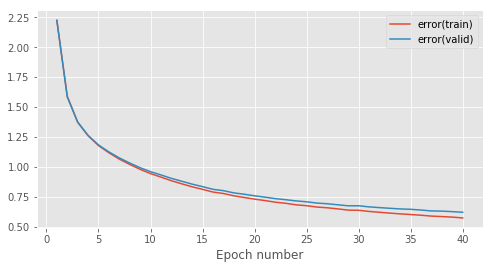

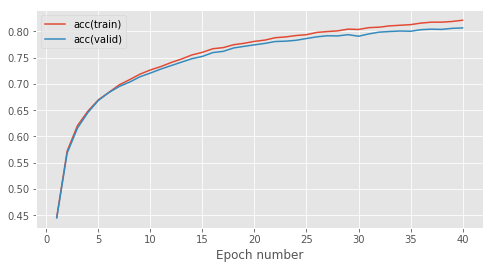

Epoch 1: 12.8s to complete
    error(train)=1.87e+00, acc(train)=5.16e-01, error(valid)=1.87e+00, acc(valid)=5.18e-01


Epoch 2: 12.5s to complete
    error(train)=1.42e+00, acc(train)=6.06e-01, error(valid)=1.42e+00, acc(valid)=6.04e-01


Epoch 3: 12.2s to complete
    error(train)=1.27e+00, acc(train)=6.44e-01, error(valid)=1.27e+00, acc(valid)=6.38e-01


Epoch 4: 12.1s to complete
    error(train)=1.18e+00, acc(train)=6.67e-01, error(valid)=1.17e+00, acc(valid)=6.64e-01


Epoch 5: 10.7s to complete
    error(train)=1.10e+00, acc(train)=6.87e-01, error(valid)=1.10e+00, acc(valid)=6.86e-01


Epoch 6: 12.1s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


Epoch 7: 13.6s to complete
    error(train)=9.99e-01, acc(train)=7.13e-01, error(valid)=1.00e+00, acc(valid)=7.09e-01


Epoch 8: 11.4s to complete
    error(train)=9.51e-01, acc(train)=7.25e-01, error(valid)=9.60e-01, acc(valid)=7.21e-01


Epoch 9: 11.9s to complete
    error(train)=9.16e-01, acc(train)=7.35e-01, error(valid)=9.25e-01, acc(valid)=7.28e-01


Epoch 10: 11.8s to complete
    error(train)=8.83e-01, acc(train)=7.43e-01, error(valid)=8.94e-01, acc(valid)=7.36e-01


Epoch 11: 13.4s to complete
    error(train)=8.56e-01, acc(train)=7.49e-01, error(valid)=8.68e-01, acc(valid)=7.41e-01


Epoch 12: 12.4s to complete
    error(train)=8.31e-01, acc(train)=7.56e-01, error(valid)=8.45e-01, acc(valid)=7.47e-01


Epoch 13: 11.6s to complete
    error(train)=8.08e-01, acc(train)=7.63e-01, error(valid)=8.23e-01, acc(valid)=7.53e-01


Epoch 14: 14.0s to complete
    error(train)=7.89e-01, acc(train)=7.67e-01, error(valid)=8.06e-01, acc(valid)=7.60e-01


Epoch 15: 13.1s to complete
    error(train)=7.71e-01, acc(train)=7.71e-01, error(valid)=7.88e-01, acc(valid)=7.65e-01


Epoch 16: 12.3s to complete
    error(train)=7.53e-01, acc(train)=7.76e-01, error(valid)=7.71e-01, acc(valid)=7.70e-01


Epoch 17: 11.7s to complete
    error(train)=7.37e-01, acc(train)=7.80e-01, error(valid)=7.57e-01, acc(valid)=7.75e-01


Epoch 18: 10.6s to complete
    error(train)=7.27e-01, acc(train)=7.82e-01, error(valid)=7.48e-01, acc(valid)=7.76e-01


Epoch 19: 12.8s to complete
    error(train)=7.12e-01, acc(train)=7.86e-01, error(valid)=7.34e-01, acc(valid)=7.80e-01


Epoch 20: 12.5s to complete
    error(train)=7.00e-01, acc(train)=7.89e-01, error(valid)=7.25e-01, acc(valid)=7.80e-01


Epoch 21: 10.8s to complete
    error(train)=6.89e-01, acc(train)=7.92e-01, error(valid)=7.14e-01, acc(valid)=7.85e-01


Epoch 22: 11.7s to complete
    error(train)=6.81e-01, acc(train)=7.93e-01, error(valid)=7.07e-01, acc(valid)=7.86e-01


Epoch 23: 9.8s to complete
    error(train)=6.73e-01, acc(train)=7.95e-01, error(valid)=6.99e-01, acc(valid)=7.87e-01


Epoch 24: 13.0s to complete
    error(train)=6.60e-01, acc(train)=7.98e-01, error(valid)=6.88e-01, acc(valid)=7.92e-01


Epoch 25: 11.9s to complete
    error(train)=6.51e-01, acc(train)=8.02e-01, error(valid)=6.79e-01, acc(valid)=7.95e-01


Epoch 26: 11.8s to complete
    error(train)=6.43e-01, acc(train)=8.03e-01, error(valid)=6.73e-01, acc(valid)=7.96e-01


Epoch 27: 11.9s to complete
    error(train)=6.33e-01, acc(train)=8.06e-01, error(valid)=6.65e-01, acc(valid)=7.96e-01


Epoch 28: 12.6s to complete
    error(train)=6.27e-01, acc(train)=8.07e-01, error(valid)=6.59e-01, acc(valid)=7.99e-01


Epoch 29: 9.3s to complete
    error(train)=6.20e-01, acc(train)=8.08e-01, error(valid)=6.54e-01, acc(valid)=7.99e-01


Epoch 30: 13.0s to complete
    error(train)=6.16e-01, acc(train)=8.09e-01, error(valid)=6.53e-01, acc(valid)=7.99e-01


Epoch 31: 12.9s to complete
    error(train)=6.05e-01, acc(train)=8.13e-01, error(valid)=6.42e-01, acc(valid)=8.06e-01


Epoch 32: 11.3s to complete
    error(train)=6.00e-01, acc(train)=8.14e-01, error(valid)=6.39e-01, acc(valid)=8.05e-01


Epoch 33: 13.0s to complete
    error(train)=5.93e-01, acc(train)=8.15e-01, error(valid)=6.32e-01, acc(valid)=8.03e-01


Epoch 34: 12.2s to complete
    error(train)=5.85e-01, acc(train)=8.18e-01, error(valid)=6.26e-01, acc(valid)=8.09e-01


Epoch 35: 11.4s to complete
    error(train)=5.80e-01, acc(train)=8.21e-01, error(valid)=6.24e-01, acc(valid)=8.09e-01


Epoch 36: 14.3s to complete
    error(train)=5.75e-01, acc(train)=8.20e-01, error(valid)=6.18e-01, acc(valid)=8.08e-01


Epoch 37: 8.9s to complete
    error(train)=5.71e-01, acc(train)=8.22e-01, error(valid)=6.18e-01, acc(valid)=8.11e-01


Epoch 38: 13.0s to complete
    error(train)=5.65e-01, acc(train)=8.23e-01, error(valid)=6.12e-01, acc(valid)=8.11e-01


Epoch 39: 11.5s to complete
    error(train)=5.58e-01, acc(train)=8.25e-01, error(valid)=6.07e-01, acc(valid)=8.12e-01


Epoch 40: 11.8s to complete
    error(train)=5.54e-01, acc(train)=8.27e-01, error(valid)=6.04e-01, acc(valid)=8.11e-01


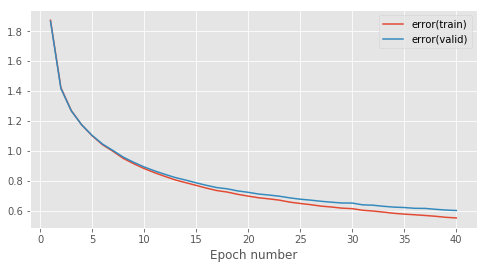

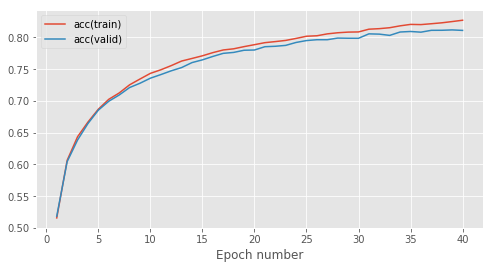

Epoch 1: 11.0s to complete
    error(train)=2.30e+00, acc(train)=4.42e-01, error(valid)=2.30e+00, acc(valid)=4.38e-01


Epoch 2: 11.2s to complete
    error(train)=1.59e+00, acc(train)=5.71e-01, error(valid)=1.59e+00, acc(valid)=5.68e-01


Epoch 3: 12.2s to complete
    error(train)=1.37e+00, acc(train)=6.18e-01, error(valid)=1.37e+00, acc(valid)=6.15e-01


Epoch 4: 10.8s to complete
    error(train)=1.26e+00, acc(train)=6.47e-01, error(valid)=1.26e+00, acc(valid)=6.43e-01


Epoch 5: 15.6s to complete
    error(train)=1.18e+00, acc(train)=6.68e-01, error(valid)=1.18e+00, acc(valid)=6.62e-01


Epoch 6: 13.2s to complete
    error(train)=1.12e+00, acc(train)=6.83e-01, error(valid)=1.12e+00, acc(valid)=6.78e-01


Epoch 7: 13.0s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.93e-01


Epoch 8: 12.0s to complete
    error(train)=1.02e+00, acc(train)=7.09e-01, error(valid)=1.02e+00, acc(valid)=7.04e-01


Epoch 9: 14.5s to complete
    error(train)=9.78e-01, acc(train)=7.19e-01, error(valid)=9.87e-01, acc(valid)=7.12e-01


Epoch 10: 11.3s to complete
    error(train)=9.40e-01, acc(train)=7.28e-01, error(valid)=9.51e-01, acc(valid)=7.23e-01


Epoch 11: 14.6s to complete
    error(train)=9.09e-01, acc(train)=7.36e-01, error(valid)=9.23e-01, acc(valid)=7.31e-01


Epoch 12: 12.3s to complete
    error(train)=8.81e-01, acc(train)=7.44e-01, error(valid)=8.96e-01, acc(valid)=7.38e-01


Epoch 13: 13.3s to complete
    error(train)=8.55e-01, acc(train)=7.50e-01, error(valid)=8.71e-01, acc(valid)=7.43e-01


Epoch 14: 13.3s to complete
    error(train)=8.32e-01, acc(train)=7.56e-01, error(valid)=8.51e-01, acc(valid)=7.50e-01


Epoch 15: 13.3s to complete
    error(train)=8.10e-01, acc(train)=7.62e-01, error(valid)=8.30e-01, acc(valid)=7.56e-01


Epoch 16: 14.2s to complete
    error(train)=7.92e-01, acc(train)=7.66e-01, error(valid)=8.14e-01, acc(valid)=7.61e-01


Epoch 17: 12.8s to complete
    error(train)=7.75e-01, acc(train)=7.71e-01, error(valid)=7.97e-01, acc(valid)=7.65e-01


Epoch 18: 14.3s to complete
    error(train)=7.58e-01, acc(train)=7.75e-01, error(valid)=7.81e-01, acc(valid)=7.67e-01


Epoch 19: 13.9s to complete
    error(train)=7.45e-01, acc(train)=7.79e-01, error(valid)=7.70e-01, acc(valid)=7.69e-01


Epoch 20: 12.5s to complete
    error(train)=7.31e-01, acc(train)=7.81e-01, error(valid)=7.56e-01, acc(valid)=7.72e-01


Epoch 21: 11.3s to complete
    error(train)=7.17e-01, acc(train)=7.86e-01, error(valid)=7.44e-01, acc(valid)=7.76e-01


Epoch 22: 13.1s to complete
    error(train)=7.06e-01, acc(train)=7.86e-01, error(valid)=7.36e-01, acc(valid)=7.77e-01


Epoch 23: 12.7s to complete
    error(train)=6.91e-01, acc(train)=7.92e-01, error(valid)=7.20e-01, acc(valid)=7.82e-01


Epoch 24: 13.3s to complete
    error(train)=6.85e-01, acc(train)=7.91e-01, error(valid)=7.16e-01, acc(valid)=7.80e-01


Epoch 25: 12.9s to complete
    error(train)=6.71e-01, acc(train)=7.97e-01, error(valid)=7.02e-01, acc(valid)=7.86e-01


Epoch 26: 14.3s to complete
    error(train)=6.64e-01, acc(train)=7.98e-01, error(valid)=6.96e-01, acc(valid)=7.87e-01


Epoch 27: 13.2s to complete
    error(train)=6.55e-01, acc(train)=8.01e-01, error(valid)=6.89e-01, acc(valid)=7.90e-01


Epoch 28: 13.3s to complete
    error(train)=6.46e-01, acc(train)=8.03e-01, error(valid)=6.80e-01, acc(valid)=7.92e-01


Epoch 29: 13.7s to complete
    error(train)=6.36e-01, acc(train)=8.05e-01, error(valid)=6.72e-01, acc(valid)=7.93e-01


Epoch 30: 14.1s to complete
    error(train)=6.31e-01, acc(train)=8.07e-01, error(valid)=6.69e-01, acc(valid)=7.94e-01


Epoch 31: 13.2s to complete
    error(train)=6.23e-01, acc(train)=8.10e-01, error(valid)=6.62e-01, acc(valid)=7.98e-01


Epoch 32: 13.5s to complete
    error(train)=6.15e-01, acc(train)=8.12e-01, error(valid)=6.55e-01, acc(valid)=7.99e-01


Epoch 33: 11.4s to complete
    error(train)=6.10e-01, acc(train)=8.12e-01, error(valid)=6.50e-01, acc(valid)=8.00e-01


Epoch 34: 13.3s to complete
    error(train)=6.03e-01, acc(train)=8.13e-01, error(valid)=6.44e-01, acc(valid)=8.00e-01


Epoch 35: 11.3s to complete
    error(train)=5.96e-01, acc(train)=8.16e-01, error(valid)=6.39e-01, acc(valid)=8.01e-01


Epoch 36: 14.2s to complete
    error(train)=5.90e-01, acc(train)=8.18e-01, error(valid)=6.35e-01, acc(valid)=8.04e-01


Epoch 37: 11.1s to complete
    error(train)=5.84e-01, acc(train)=8.20e-01, error(valid)=6.28e-01, acc(valid)=8.04e-01


Epoch 38: 13.5s to complete
    error(train)=5.79e-01, acc(train)=8.20e-01, error(valid)=6.25e-01, acc(valid)=8.05e-01


Epoch 39: 13.3s to complete
    error(train)=5.74e-01, acc(train)=8.22e-01, error(valid)=6.19e-01, acc(valid)=8.07e-01


Epoch 40: 13.0s to complete
    error(train)=5.73e-01, acc(train)=8.22e-01, error(valid)=6.19e-01, acc(valid)=8.07e-01


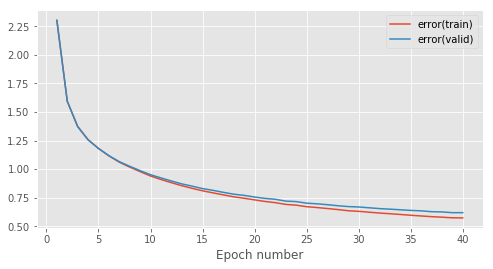

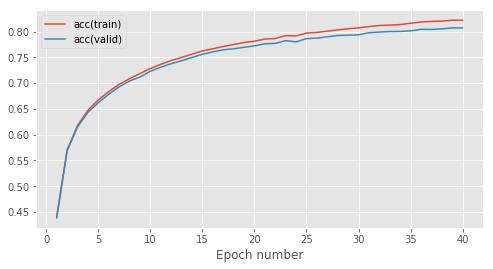

Epoch 1: 11.7s to complete
    error(train)=2.34e+00, acc(train)=4.49e-01, error(valid)=2.33e+00, acc(valid)=4.49e-01


Epoch 2: 11.7s to complete
    error(train)=1.61e+00, acc(train)=5.67e-01, error(valid)=1.61e+00, acc(valid)=5.63e-01


Epoch 3: 12.4s to complete
    error(train)=1.39e+00, acc(train)=6.17e-01, error(valid)=1.39e+00, acc(valid)=6.12e-01


Epoch 4: 12.4s to complete
    error(train)=1.27e+00, acc(train)=6.46e-01, error(valid)=1.28e+00, acc(valid)=6.38e-01


Epoch 5: 11.3s to complete
    error(train)=1.19e+00, acc(train)=6.67e-01, error(valid)=1.20e+00, acc(valid)=6.63e-01


Epoch 6: 10.9s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.79e-01


Epoch 7: 11.9s to complete
    error(train)=1.07e+00, acc(train)=6.98e-01, error(valid)=1.08e+00, acc(valid)=6.92e-01


Epoch 8: 11.8s to complete
    error(train)=1.02e+00, acc(train)=7.10e-01, error(valid)=1.03e+00, acc(valid)=7.03e-01


Epoch 9: 11.9s to complete
    error(train)=9.82e-01, acc(train)=7.18e-01, error(valid)=9.97e-01, acc(valid)=7.13e-01


Epoch 10: 12.8s to complete
    error(train)=9.45e-01, acc(train)=7.28e-01, error(valid)=9.62e-01, acc(valid)=7.20e-01


Epoch 11: 10.7s to complete
    error(train)=9.11e-01, acc(train)=7.37e-01, error(valid)=9.31e-01, acc(valid)=7.29e-01


Epoch 12: 11.3s to complete
    error(train)=8.82e-01, acc(train)=7.42e-01, error(valid)=9.01e-01, acc(valid)=7.35e-01


Epoch 13: 12.3s to complete
    error(train)=8.57e-01, acc(train)=7.48e-01, error(valid)=8.79e-01, acc(valid)=7.40e-01


Epoch 14: 13.3s to complete
    error(train)=8.34e-01, acc(train)=7.55e-01, error(valid)=8.56e-01, acc(valid)=7.48e-01


Epoch 15: 12.1s to complete
    error(train)=8.13e-01, acc(train)=7.60e-01, error(valid)=8.37e-01, acc(valid)=7.51e-01


Epoch 16: 12.8s to complete
    error(train)=7.95e-01, acc(train)=7.66e-01, error(valid)=8.19e-01, acc(valid)=7.55e-01


Epoch 17: 14.7s to complete
    error(train)=7.79e-01, acc(train)=7.69e-01, error(valid)=8.03e-01, acc(valid)=7.60e-01


Epoch 18: 13.7s to complete
    error(train)=7.65e-01, acc(train)=7.72e-01, error(valid)=7.89e-01, acc(valid)=7.63e-01


Epoch 19: 12.3s to complete
    error(train)=7.45e-01, acc(train)=7.77e-01, error(valid)=7.72e-01, acc(valid)=7.66e-01


Epoch 20: 13.4s to complete
    error(train)=7.34e-01, acc(train)=7.80e-01, error(valid)=7.62e-01, acc(valid)=7.72e-01


Epoch 21: 13.7s to complete
    error(train)=7.20e-01, acc(train)=7.85e-01, error(valid)=7.48e-01, acc(valid)=7.75e-01


Epoch 22: 12.7s to complete
    error(train)=7.07e-01, acc(train)=7.87e-01, error(valid)=7.36e-01, acc(valid)=7.78e-01


Epoch 23: 12.5s to complete
    error(train)=6.96e-01, acc(train)=7.89e-01, error(valid)=7.27e-01, acc(valid)=7.79e-01


Epoch 24: 12.1s to complete
    error(train)=6.84e-01, acc(train)=7.94e-01, error(valid)=7.15e-01, acc(valid)=7.83e-01


Epoch 25: 11.9s to complete
    error(train)=6.78e-01, acc(train)=7.95e-01, error(valid)=7.10e-01, acc(valid)=7.88e-01


Epoch 26: 12.4s to complete
    error(train)=6.67e-01, acc(train)=7.97e-01, error(valid)=7.01e-01, acc(valid)=7.85e-01


Epoch 27: 14.4s to complete
    error(train)=6.56e-01, acc(train)=8.01e-01, error(valid)=6.90e-01, acc(valid)=7.90e-01


Epoch 28: 12.4s to complete
    error(train)=6.48e-01, acc(train)=8.03e-01, error(valid)=6.83e-01, acc(valid)=7.91e-01


Epoch 29: 14.0s to complete
    error(train)=6.39e-01, acc(train)=8.05e-01, error(valid)=6.76e-01, acc(valid)=7.93e-01


Epoch 30: 12.2s to complete
    error(train)=6.32e-01, acc(train)=8.06e-01, error(valid)=6.71e-01, acc(valid)=7.95e-01


Epoch 31: 12.7s to complete
    error(train)=6.24e-01, acc(train)=8.09e-01, error(valid)=6.63e-01, acc(valid)=7.98e-01


Epoch 32: 11.5s to complete
    error(train)=6.20e-01, acc(train)=8.09e-01, error(valid)=6.60e-01, acc(valid)=7.94e-01


Epoch 33: 11.3s to complete
    error(train)=6.11e-01, acc(train)=8.13e-01, error(valid)=6.53e-01, acc(valid)=8.00e-01


Epoch 34: 11.8s to complete
    error(train)=6.05e-01, acc(train)=8.14e-01, error(valid)=6.48e-01, acc(valid)=8.00e-01


Epoch 35: 13.3s to complete
    error(train)=5.98e-01, acc(train)=8.16e-01, error(valid)=6.42e-01, acc(valid)=8.03e-01


Epoch 36: 12.1s to complete
    error(train)=5.94e-01, acc(train)=8.18e-01, error(valid)=6.40e-01, acc(valid)=8.03e-01


Epoch 37: 14.1s to complete
    error(train)=5.85e-01, acc(train)=8.20e-01, error(valid)=6.31e-01, acc(valid)=8.04e-01


Epoch 38: 12.3s to complete
    error(train)=5.80e-01, acc(train)=8.21e-01, error(valid)=6.28e-01, acc(valid)=8.06e-01


Epoch 39: 13.1s to complete
    error(train)=5.77e-01, acc(train)=8.22e-01, error(valid)=6.25e-01, acc(valid)=8.06e-01


Epoch 40: 13.8s to complete
    error(train)=5.71e-01, acc(train)=8.23e-01, error(valid)=6.21e-01, acc(valid)=8.07e-01


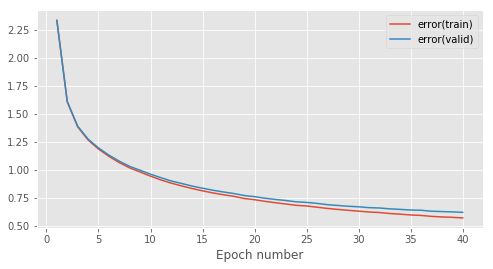

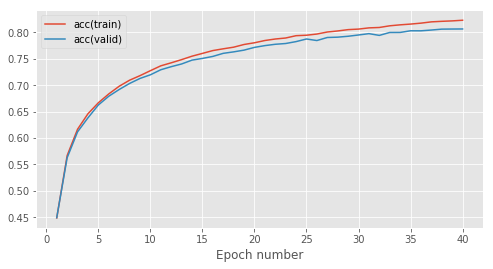

Epoch 1: 11.6s to complete
    error(train)=2.37e+00, acc(train)=4.37e-01, error(valid)=2.37e+00, acc(valid)=4.36e-01


Epoch 2: 11.1s to complete
    error(train)=1.62e+00, acc(train)=5.73e-01, error(valid)=1.62e+00, acc(valid)=5.73e-01


Epoch 3: 10.2s to complete
    error(train)=1.37e+00, acc(train)=6.22e-01, error(valid)=1.37e+00, acc(valid)=6.20e-01


Epoch 4: 11.2s to complete
    error(train)=1.25e+00, acc(train)=6.50e-01, error(valid)=1.25e+00, acc(valid)=6.48e-01


Epoch 5: 10.4s to complete
    error(train)=1.16e+00, acc(train)=6.72e-01, error(valid)=1.17e+00, acc(valid)=6.70e-01


Epoch 6: 12.0s to complete
    error(train)=1.10e+00, acc(train)=6.87e-01, error(valid)=1.11e+00, acc(valid)=6.82e-01


Epoch 7: 11.3s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.07e+00, acc(valid)=6.96e-01


Epoch 8: 12.8s to complete
    error(train)=1.01e+00, acc(train)=7.10e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01


Epoch 9: 12.1s to complete
    error(train)=9.70e-01, acc(train)=7.21e-01, error(valid)=9.89e-01, acc(valid)=7.15e-01


Epoch 10: 11.9s to complete
    error(train)=9.35e-01, acc(train)=7.31e-01, error(valid)=9.55e-01, acc(valid)=7.22e-01


Epoch 11: 12.1s to complete
    error(train)=9.04e-01, acc(train)=7.37e-01, error(valid)=9.25e-01, acc(valid)=7.31e-01


Epoch 12: 12.0s to complete
    error(train)=8.80e-01, acc(train)=7.44e-01, error(valid)=9.01e-01, acc(valid)=7.38e-01


Epoch 13: 12.4s to complete
    error(train)=8.55e-01, acc(train)=7.51e-01, error(valid)=8.77e-01, acc(valid)=7.45e-01


Epoch 14: 13.4s to complete
    error(train)=8.33e-01, acc(train)=7.57e-01, error(valid)=8.58e-01, acc(valid)=7.49e-01


Epoch 15: 12.7s to complete
    error(train)=8.15e-01, acc(train)=7.60e-01, error(valid)=8.40e-01, acc(valid)=7.53e-01


Epoch 16: 13.4s to complete
    error(train)=7.93e-01, acc(train)=7.67e-01, error(valid)=8.21e-01, acc(valid)=7.57e-01


Epoch 17: 12.9s to complete
    error(train)=7.76e-01, acc(train)=7.71e-01, error(valid)=8.03e-01, acc(valid)=7.62e-01


Epoch 18: 13.8s to complete
    error(train)=7.59e-01, acc(train)=7.74e-01, error(valid)=7.87e-01, acc(valid)=7.67e-01


Epoch 19: 13.1s to complete
    error(train)=7.43e-01, acc(train)=7.80e-01, error(valid)=7.72e-01, acc(valid)=7.71e-01


Epoch 20: 12.4s to complete
    error(train)=7.30e-01, acc(train)=7.82e-01, error(valid)=7.61e-01, acc(valid)=7.73e-01


Epoch 21: 12.7s to complete
    error(train)=7.19e-01, acc(train)=7.84e-01, error(valid)=7.50e-01, acc(valid)=7.78e-01


Epoch 22: 12.5s to complete
    error(train)=7.05e-01, acc(train)=7.89e-01, error(valid)=7.38e-01, acc(valid)=7.81e-01


Epoch 23: 12.4s to complete
    error(train)=6.95e-01, acc(train)=7.92e-01, error(valid)=7.28e-01, acc(valid)=7.82e-01


Epoch 24: 11.6s to complete
    error(train)=6.85e-01, acc(train)=7.94e-01, error(valid)=7.20e-01, acc(valid)=7.84e-01


Epoch 25: 12.8s to complete
    error(train)=6.74e-01, acc(train)=7.96e-01, error(valid)=7.12e-01, acc(valid)=7.86e-01


Epoch 26: 11.8s to complete
    error(train)=6.64e-01, acc(train)=8.00e-01, error(valid)=7.02e-01, acc(valid)=7.88e-01


Epoch 27: 11.2s to complete
    error(train)=6.55e-01, acc(train)=8.02e-01, error(valid)=6.93e-01, acc(valid)=7.91e-01


Epoch 28: 11.9s to complete
    error(train)=6.49e-01, acc(train)=8.03e-01, error(valid)=6.90e-01, acc(valid)=7.93e-01


Epoch 29: 12.6s to complete
    error(train)=6.39e-01, acc(train)=8.06e-01, error(valid)=6.81e-01, acc(valid)=7.96e-01


Epoch 30: 12.7s to complete
    error(train)=6.31e-01, acc(train)=8.09e-01, error(valid)=6.75e-01, acc(valid)=7.94e-01


Epoch 31: 13.8s to complete
    error(train)=6.26e-01, acc(train)=8.08e-01, error(valid)=6.69e-01, acc(valid)=7.97e-01


Epoch 32: 11.5s to complete
    error(train)=6.17e-01, acc(train)=8.12e-01, error(valid)=6.62e-01, acc(valid)=8.00e-01


Epoch 33: 9.1s to complete
    error(train)=6.14e-01, acc(train)=8.11e-01, error(valid)=6.60e-01, acc(valid)=7.99e-01


Epoch 34: 13.0s to complete
    error(train)=6.05e-01, acc(train)=8.14e-01, error(valid)=6.53e-01, acc(valid)=8.01e-01


Epoch 35: 11.1s to complete
    error(train)=5.98e-01, acc(train)=8.16e-01, error(valid)=6.48e-01, acc(valid)=8.02e-01


Epoch 36: 11.2s to complete
    error(train)=5.92e-01, acc(train)=8.18e-01, error(valid)=6.42e-01, acc(valid)=8.05e-01


Epoch 37: 11.3s to complete
    error(train)=5.87e-01, acc(train)=8.19e-01, error(valid)=6.39e-01, acc(valid)=8.04e-01


Epoch 38: 10.0s to complete
    error(train)=5.83e-01, acc(train)=8.20e-01, error(valid)=6.35e-01, acc(valid)=8.05e-01


Epoch 39: 12.5s to complete
    error(train)=5.79e-01, acc(train)=8.20e-01, error(valid)=6.33e-01, acc(valid)=8.04e-01


Epoch 40: 12.9s to complete
    error(train)=5.74e-01, acc(train)=8.22e-01, error(valid)=6.29e-01, acc(valid)=8.07e-01


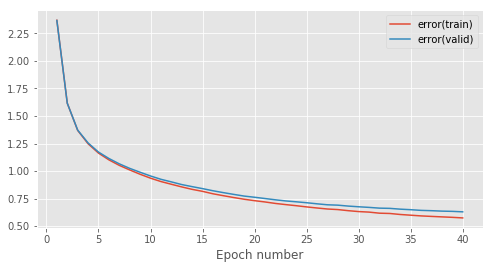

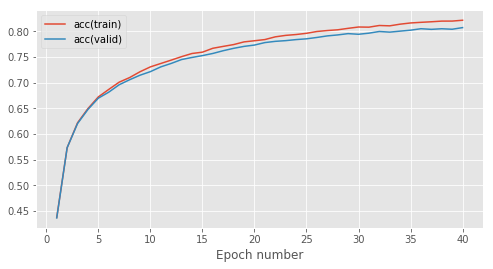

Epoch 1: 11.7s to complete
    error(train)=1.97e+00, acc(train)=5.03e-01, error(valid)=1.97e+00, acc(valid)=5.04e-01


Epoch 2: 11.8s to complete
    error(train)=1.47e+00, acc(train)=5.97e-01, error(valid)=1.47e+00, acc(valid)=5.95e-01


Epoch 3: 11.2s to complete
    error(train)=1.29e+00, acc(train)=6.41e-01, error(valid)=1.30e+00, acc(valid)=6.35e-01


Epoch 4: 12.4s to complete
    error(train)=1.19e+00, acc(train)=6.65e-01, error(valid)=1.19e+00, acc(valid)=6.62e-01


Epoch 5: 14.4s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.12e+00, acc(valid)=6.83e-01


Epoch 6: 13.1s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.95e-01


Epoch 7: 10.7s to complete
    error(train)=1.00e+00, acc(train)=7.13e-01, error(valid)=1.02e+00, acc(valid)=7.09e-01


Epoch 8: 13.5s to complete
    error(train)=9.61e-01, acc(train)=7.23e-01, error(valid)=9.75e-01, acc(valid)=7.16e-01


Epoch 9: 11.4s to complete
    error(train)=9.26e-01, acc(train)=7.32e-01, error(valid)=9.44e-01, acc(valid)=7.26e-01


Epoch 10: 11.3s to complete
    error(train)=8.93e-01, acc(train)=7.41e-01, error(valid)=9.12e-01, acc(valid)=7.33e-01


Epoch 11: 12.6s to complete
    error(train)=8.67e-01, acc(train)=7.48e-01, error(valid)=8.86e-01, acc(valid)=7.40e-01


Epoch 12: 12.7s to complete
    error(train)=8.42e-01, acc(train)=7.54e-01, error(valid)=8.63e-01, acc(valid)=7.46e-01


Epoch 13: 13.2s to complete
    error(train)=8.20e-01, acc(train)=7.58e-01, error(valid)=8.42e-01, acc(valid)=7.50e-01


Epoch 14: 10.7s to complete
    error(train)=8.00e-01, acc(train)=7.63e-01, error(valid)=8.23e-01, acc(valid)=7.54e-01


Epoch 15: 11.4s to complete
    error(train)=7.83e-01, acc(train)=7.68e-01, error(valid)=8.06e-01, acc(valid)=7.61e-01


Epoch 16: 15.3s to complete
    error(train)=7.64e-01, acc(train)=7.73e-01, error(valid)=7.89e-01, acc(valid)=7.64e-01


Epoch 17: 12.0s to complete
    error(train)=7.47e-01, acc(train)=7.78e-01, error(valid)=7.73e-01, acc(valid)=7.68e-01


Epoch 18: 10.7s to complete
    error(train)=7.37e-01, acc(train)=7.80e-01, error(valid)=7.64e-01, acc(valid)=7.72e-01


Epoch 19: 10.4s to complete
    error(train)=7.26e-01, acc(train)=7.81e-01, error(valid)=7.53e-01, acc(valid)=7.72e-01


Epoch 20: 12.5s to complete
    error(train)=7.09e-01, acc(train)=7.86e-01, error(valid)=7.37e-01, acc(valid)=7.78e-01


Epoch 21: 12.7s to complete
    error(train)=6.99e-01, acc(train)=7.88e-01, error(valid)=7.28e-01, acc(valid)=7.80e-01


Epoch 22: 10.9s to complete
    error(train)=6.86e-01, acc(train)=7.92e-01, error(valid)=7.17e-01, acc(valid)=7.81e-01


Epoch 23: 11.3s to complete
    error(train)=6.76e-01, acc(train)=7.96e-01, error(valid)=7.08e-01, acc(valid)=7.85e-01


Epoch 24: 12.5s to complete
    error(train)=6.65e-01, acc(train)=7.97e-01, error(valid)=6.98e-01, acc(valid)=7.86e-01


Epoch 25: 13.3s to complete
    error(train)=6.57e-01, acc(train)=8.00e-01, error(valid)=6.91e-01, acc(valid)=7.89e-01


Epoch 26: 11.4s to complete
    error(train)=6.47e-01, acc(train)=8.02e-01, error(valid)=6.81e-01, acc(valid)=7.90e-01


Epoch 27: 12.6s to complete
    error(train)=6.38e-01, acc(train)=8.04e-01, error(valid)=6.74e-01, acc(valid)=7.92e-01


Epoch 28: 12.3s to complete
    error(train)=6.35e-01, acc(train)=8.05e-01, error(valid)=6.72e-01, acc(valid)=7.93e-01


Epoch 29: 11.6s to complete
    error(train)=6.25e-01, acc(train)=8.07e-01, error(valid)=6.64e-01, acc(valid)=7.95e-01


Epoch 30: 12.7s to complete
    error(train)=6.17e-01, acc(train)=8.11e-01, error(valid)=6.56e-01, acc(valid)=7.98e-01


Epoch 31: 13.9s to complete
    error(train)=6.09e-01, acc(train)=8.12e-01, error(valid)=6.48e-01, acc(valid)=8.01e-01


Epoch 32: 13.6s to complete
    error(train)=6.04e-01, acc(train)=8.13e-01, error(valid)=6.45e-01, acc(valid)=8.02e-01


Epoch 33: 12.8s to complete
    error(train)=5.97e-01, acc(train)=8.15e-01, error(valid)=6.39e-01, acc(valid)=8.01e-01


Epoch 34: 13.2s to complete
    error(train)=5.89e-01, acc(train)=8.17e-01, error(valid)=6.33e-01, acc(valid)=8.05e-01


Epoch 35: 12.1s to complete
    error(train)=5.86e-01, acc(train)=8.18e-01, error(valid)=6.31e-01, acc(valid)=8.06e-01


Epoch 36: 10.9s to complete
    error(train)=5.81e-01, acc(train)=8.19e-01, error(valid)=6.26e-01, acc(valid)=8.05e-01


Epoch 37: 11.6s to complete
    error(train)=5.74e-01, acc(train)=8.21e-01, error(valid)=6.19e-01, acc(valid)=8.06e-01


Epoch 38: 12.4s to complete
    error(train)=5.73e-01, acc(train)=8.19e-01, error(valid)=6.20e-01, acc(valid)=8.06e-01


Epoch 39: 13.0s to complete
    error(train)=5.68e-01, acc(train)=8.21e-01, error(valid)=6.17e-01, acc(valid)=8.07e-01


Epoch 40: 13.3s to complete
    error(train)=5.58e-01, acc(train)=8.25e-01, error(valid)=6.07e-01, acc(valid)=8.09e-01


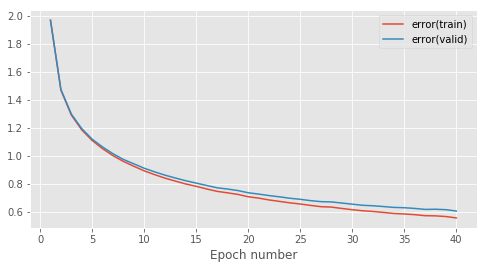

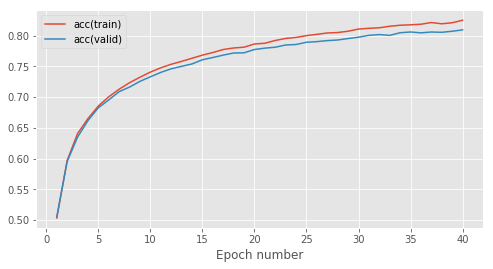

Epoch 1: 11.0s to complete
    error(train)=2.31e+00, acc(train)=4.25e-01, error(valid)=2.32e+00, acc(valid)=4.20e-01


Epoch 2: 12.6s to complete
    error(train)=1.61e+00, acc(train)=5.56e-01, error(valid)=1.62e+00, acc(valid)=5.54e-01


Epoch 3: 12.8s to complete
    error(train)=1.38e+00, acc(train)=6.14e-01, error(valid)=1.39e+00, acc(valid)=6.10e-01


Epoch 4: 12.2s to complete
    error(train)=1.26e+00, acc(train)=6.46e-01, error(valid)=1.27e+00, acc(valid)=6.42e-01


Epoch 5: 11.1s to complete
    error(train)=1.17e+00, acc(train)=6.68e-01, error(valid)=1.18e+00, acc(valid)=6.65e-01


Epoch 6: 12.0s to complete
    error(train)=1.11e+00, acc(train)=6.86e-01, error(valid)=1.12e+00, acc(valid)=6.81e-01


Epoch 7: 12.6s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 8: 12.2s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01


Epoch 9: 11.4s to complete
    error(train)=9.69e-01, acc(train)=7.21e-01, error(valid)=9.81e-01, acc(valid)=7.15e-01


Epoch 10: 12.7s to complete
    error(train)=9.32e-01, acc(train)=7.30e-01, error(valid)=9.47e-01, acc(valid)=7.20e-01


Epoch 11: 12.8s to complete
    error(train)=8.98e-01, acc(train)=7.39e-01, error(valid)=9.13e-01, acc(valid)=7.31e-01


Epoch 12: 12.5s to complete
    error(train)=8.69e-01, acc(train)=7.47e-01, error(valid)=8.84e-01, acc(valid)=7.41e-01


Epoch 13: 11.3s to complete
    error(train)=8.45e-01, acc(train)=7.53e-01, error(valid)=8.61e-01, acc(valid)=7.45e-01


Epoch 14: 13.4s to complete
    error(train)=8.21e-01, acc(train)=7.58e-01, error(valid)=8.40e-01, acc(valid)=7.49e-01


Epoch 15: 11.7s to complete
    error(train)=7.98e-01, acc(train)=7.64e-01, error(valid)=8.18e-01, acc(valid)=7.57e-01


Epoch 16: 12.7s to complete
    error(train)=7.79e-01, acc(train)=7.70e-01, error(valid)=8.01e-01, acc(valid)=7.61e-01


Epoch 17: 11.8s to complete
    error(train)=7.61e-01, acc(train)=7.75e-01, error(valid)=7.83e-01, acc(valid)=7.66e-01


Epoch 18: 11.9s to complete
    error(train)=7.47e-01, acc(train)=7.77e-01, error(valid)=7.71e-01, acc(valid)=7.71e-01


Epoch 19: 12.8s to complete
    error(train)=7.32e-01, acc(train)=7.82e-01, error(valid)=7.58e-01, acc(valid)=7.72e-01


Epoch 20: 13.0s to complete
    error(train)=7.15e-01, acc(train)=7.85e-01, error(valid)=7.43e-01, acc(valid)=7.78e-01


Epoch 21: 13.9s to complete
    error(train)=7.03e-01, acc(train)=7.88e-01, error(valid)=7.30e-01, acc(valid)=7.77e-01


Epoch 22: 12.4s to complete
    error(train)=6.89e-01, acc(train)=7.93e-01, error(valid)=7.17e-01, acc(valid)=7.82e-01


Epoch 23: 12.5s to complete
    error(train)=6.77e-01, acc(train)=7.96e-01, error(valid)=7.08e-01, acc(valid)=7.86e-01


Epoch 24: 11.7s to complete
    error(train)=6.68e-01, acc(train)=7.98e-01, error(valid)=7.02e-01, acc(valid)=7.89e-01


Epoch 25: 11.4s to complete
    error(train)=6.56e-01, acc(train)=8.01e-01, error(valid)=6.90e-01, acc(valid)=7.89e-01


Epoch 26: 13.3s to complete
    error(train)=6.47e-01, acc(train)=8.04e-01, error(valid)=6.81e-01, acc(valid)=7.93e-01


Epoch 27: 10.4s to complete
    error(train)=6.39e-01, acc(train)=8.05e-01, error(valid)=6.74e-01, acc(valid)=7.92e-01


Epoch 28: 13.7s to complete
    error(train)=6.30e-01, acc(train)=8.08e-01, error(valid)=6.67e-01, acc(valid)=7.93e-01


Epoch 29: 12.4s to complete
    error(train)=6.21e-01, acc(train)=8.10e-01, error(valid)=6.60e-01, acc(valid)=7.95e-01


Epoch 30: 11.1s to complete
    error(train)=6.14e-01, acc(train)=8.12e-01, error(valid)=6.53e-01, acc(valid)=7.99e-01


Epoch 31: 12.9s to complete
    error(train)=6.09e-01, acc(train)=8.12e-01, error(valid)=6.50e-01, acc(valid)=7.98e-01


Epoch 32: 12.0s to complete
    error(train)=6.01e-01, acc(train)=8.15e-01, error(valid)=6.43e-01, acc(valid)=8.01e-01


Epoch 33: 11.6s to complete
    error(train)=5.94e-01, acc(train)=8.18e-01, error(valid)=6.36e-01, acc(valid)=8.03e-01


Epoch 34: 10.8s to complete
    error(train)=5.88e-01, acc(train)=8.19e-01, error(valid)=6.31e-01, acc(valid)=8.06e-01


Epoch 35: 11.1s to complete
    error(train)=5.80e-01, acc(train)=8.21e-01, error(valid)=6.26e-01, acc(valid)=8.06e-01


Epoch 36: 13.3s to complete
    error(train)=5.75e-01, acc(train)=8.23e-01, error(valid)=6.21e-01, acc(valid)=8.07e-01


Epoch 37: 11.8s to complete
    error(train)=5.71e-01, acc(train)=8.23e-01, error(valid)=6.18e-01, acc(valid)=8.08e-01


Epoch 38: 13.3s to complete
    error(train)=5.66e-01, acc(train)=8.25e-01, error(valid)=6.14e-01, acc(valid)=8.10e-01


Epoch 39: 14.1s to complete
    error(train)=5.60e-01, acc(train)=8.26e-01, error(valid)=6.08e-01, acc(valid)=8.11e-01


Epoch 40: 12.7s to complete
    error(train)=5.57e-01, acc(train)=8.27e-01, error(valid)=6.07e-01, acc(valid)=8.10e-01


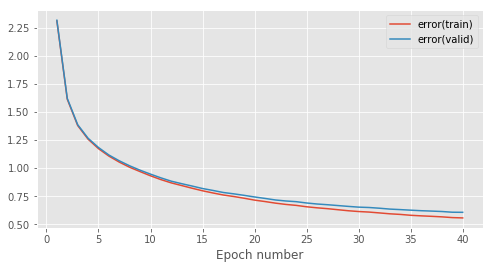

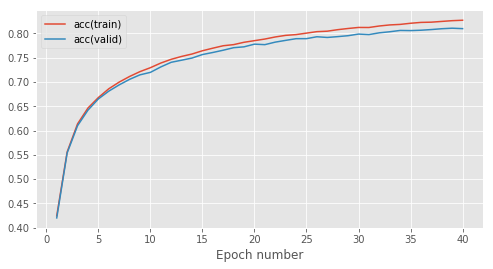

Epoch 1: 11.7s to complete
    error(train)=2.32e+00, acc(train)=4.36e-01, error(valid)=2.31e+00, acc(valid)=4.38e-01


Epoch 2: 13.2s to complete
    error(train)=1.61e+00, acc(train)=5.70e-01, error(valid)=1.60e+00, acc(valid)=5.72e-01


Epoch 3: 12.2s to complete
    error(train)=1.38e+00, acc(train)=6.20e-01, error(valid)=1.38e+00, acc(valid)=6.19e-01


Epoch 4: 12.6s to complete
    error(train)=1.26e+00, acc(train)=6.50e-01, error(valid)=1.26e+00, acc(valid)=6.47e-01


Epoch 5: 10.5s to complete
    error(train)=1.17e+00, acc(train)=6.71e-01, error(valid)=1.18e+00, acc(valid)=6.69e-01


Epoch 6: 12.9s to complete
    error(train)=1.11e+00, acc(train)=6.87e-01, error(valid)=1.12e+00, acc(valid)=6.83e-01


Epoch 7: 11.1s to complete
    error(train)=1.06e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=7.00e-01


Epoch 8: 11.1s to complete
    error(train)=1.01e+00, acc(train)=7.12e-01, error(valid)=1.02e+00, acc(valid)=7.07e-01


Epoch 9: 12.5s to complete
    error(train)=9.73e-01, acc(train)=7.21e-01, error(valid)=9.86e-01, acc(valid)=7.17e-01


Epoch 10: 12.8s to complete
    error(train)=9.39e-01, acc(train)=7.30e-01, error(valid)=9.52e-01, acc(valid)=7.24e-01


Epoch 11: 10.8s to complete
    error(train)=9.07e-01, acc(train)=7.37e-01, error(valid)=9.22e-01, acc(valid)=7.34e-01


Epoch 12: 13.0s to complete
    error(train)=8.79e-01, acc(train)=7.45e-01, error(valid)=8.94e-01, acc(valid)=7.40e-01


Epoch 13: 12.8s to complete
    error(train)=8.54e-01, acc(train)=7.51e-01, error(valid)=8.72e-01, acc(valid)=7.46e-01


Epoch 14: 12.8s to complete
    error(train)=8.34e-01, acc(train)=7.56e-01, error(valid)=8.53e-01, acc(valid)=7.48e-01


Epoch 15: 13.3s to complete
    error(train)=8.15e-01, acc(train)=7.59e-01, error(valid)=8.36e-01, acc(valid)=7.52e-01


Epoch 16: 10.2s to complete
    error(train)=7.94e-01, acc(train)=7.65e-01, error(valid)=8.16e-01, acc(valid)=7.59e-01


Epoch 17: 12.7s to complete
    error(train)=7.76e-01, acc(train)=7.71e-01, error(valid)=8.00e-01, acc(valid)=7.63e-01


Epoch 18: 13.6s to complete
    error(train)=7.59e-01, acc(train)=7.74e-01, error(valid)=7.84e-01, acc(valid)=7.68e-01


Epoch 19: 12.0s to complete
    error(train)=7.46e-01, acc(train)=7.77e-01, error(valid)=7.70e-01, acc(valid)=7.70e-01


Epoch 20: 12.2s to complete
    error(train)=7.32e-01, acc(train)=7.81e-01, error(valid)=7.60e-01, acc(valid)=7.74e-01


Epoch 21: 13.7s to complete
    error(train)=7.17e-01, acc(train)=7.84e-01, error(valid)=7.46e-01, acc(valid)=7.77e-01


Epoch 22: 13.7s to complete
    error(train)=7.06e-01, acc(train)=7.88e-01, error(valid)=7.36e-01, acc(valid)=7.78e-01


Epoch 23: 13.4s to complete
    error(train)=6.92e-01, acc(train)=7.91e-01, error(valid)=7.23e-01, acc(valid)=7.80e-01


Epoch 24: 11.3s to complete
    error(train)=6.81e-01, acc(train)=7.94e-01, error(valid)=7.13e-01, acc(valid)=7.83e-01


Epoch 25: 12.2s to complete
    error(train)=6.70e-01, acc(train)=7.96e-01, error(valid)=7.04e-01, acc(valid)=7.86e-01


Epoch 26: 11.7s to complete
    error(train)=6.64e-01, acc(train)=7.98e-01, error(valid)=6.97e-01, acc(valid)=7.87e-01


Epoch 27: 11.2s to complete
    error(train)=6.54e-01, acc(train)=8.01e-01, error(valid)=6.90e-01, acc(valid)=7.89e-01


Epoch 28: 13.0s to complete
    error(train)=6.43e-01, acc(train)=8.04e-01, error(valid)=6.81e-01, acc(valid)=7.89e-01


Epoch 29: 11.4s to complete
    error(train)=6.33e-01, acc(train)=8.07e-01, error(valid)=6.71e-01, acc(valid)=7.96e-01


Epoch 30: 12.0s to complete
    error(train)=6.26e-01, acc(train)=8.09e-01, error(valid)=6.65e-01, acc(valid)=7.97e-01


Epoch 31: 12.8s to complete
    error(train)=6.19e-01, acc(train)=8.11e-01, error(valid)=6.58e-01, acc(valid)=7.97e-01


Epoch 32: 14.1s to complete
    error(train)=6.11e-01, acc(train)=8.12e-01, error(valid)=6.53e-01, acc(valid)=7.97e-01


Epoch 33: 12.6s to complete
    error(train)=6.05e-01, acc(train)=8.14e-01, error(valid)=6.48e-01, acc(valid)=8.00e-01


Epoch 34: 11.3s to complete
    error(train)=5.98e-01, acc(train)=8.16e-01, error(valid)=6.41e-01, acc(valid)=8.03e-01


Epoch 35: 13.5s to complete
    error(train)=5.94e-01, acc(train)=8.17e-01, error(valid)=6.40e-01, acc(valid)=8.02e-01


Epoch 36: 10.8s to complete
    error(train)=5.86e-01, acc(train)=8.19e-01, error(valid)=6.33e-01, acc(valid)=8.04e-01


Epoch 37: 11.7s to complete
    error(train)=5.82e-01, acc(train)=8.20e-01, error(valid)=6.29e-01, acc(valid)=8.07e-01


Epoch 38: 12.7s to complete
    error(train)=5.75e-01, acc(train)=8.22e-01, error(valid)=6.23e-01, acc(valid)=8.06e-01


Epoch 39: 10.9s to complete
    error(train)=5.73e-01, acc(train)=8.22e-01, error(valid)=6.24e-01, acc(valid)=8.06e-01


Epoch 40: 11.8s to complete
    error(train)=5.65e-01, acc(train)=8.23e-01, error(valid)=6.16e-01, acc(valid)=8.07e-01


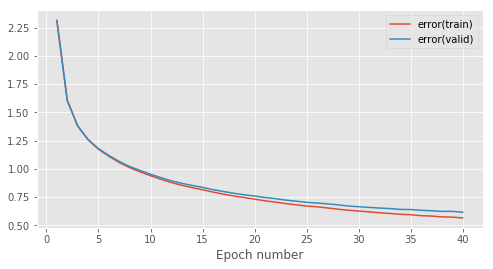

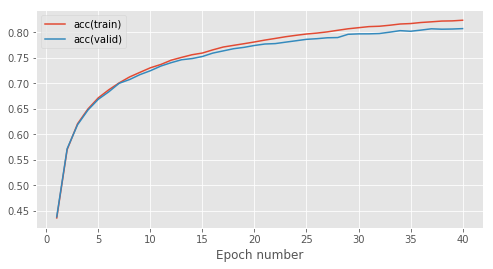

Epoch 1: 12.9s to complete
    error(train)=2.24e+00, acc(train)=4.44e-01, error(valid)=2.23e+00, acc(valid)=4.47e-01


Epoch 2: 11.1s to complete
    error(train)=1.57e+00, acc(train)=5.74e-01, error(valid)=1.56e+00, acc(valid)=5.72e-01


Epoch 3: 11.7s to complete
    error(train)=1.36e+00, acc(train)=6.22e-01, error(valid)=1.36e+00, acc(valid)=6.18e-01


Epoch 4: 11.7s to complete
    error(train)=1.24e+00, acc(train)=6.52e-01, error(valid)=1.25e+00, acc(valid)=6.48e-01


Epoch 5: 12.9s to complete
    error(train)=1.16e+00, acc(train)=6.74e-01, error(valid)=1.17e+00, acc(valid)=6.71e-01


Epoch 6: 10.2s to complete
    error(train)=1.10e+00, acc(train)=6.90e-01, error(valid)=1.11e+00, acc(valid)=6.86e-01


Epoch 7: 13.7s to complete
    error(train)=1.05e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=7.00e-01


Epoch 8: 12.1s to complete
    error(train)=1.00e+00, acc(train)=7.14e-01, error(valid)=1.01e+00, acc(valid)=7.12e-01


Epoch 9: 10.8s to complete
    error(train)=9.60e-01, acc(train)=7.25e-01, error(valid)=9.69e-01, acc(valid)=7.20e-01


Epoch 10: 12.3s to complete
    error(train)=9.27e-01, acc(train)=7.33e-01, error(valid)=9.37e-01, acc(valid)=7.30e-01


Epoch 11: 10.7s to complete
    error(train)=8.96e-01, acc(train)=7.39e-01, error(valid)=9.07e-01, acc(valid)=7.36e-01


Epoch 12: 11.2s to complete
    error(train)=8.68e-01, acc(train)=7.46e-01, error(valid)=8.81e-01, acc(valid)=7.43e-01


Epoch 13: 10.0s to complete
    error(train)=8.45e-01, acc(train)=7.53e-01, error(valid)=8.58e-01, acc(valid)=7.47e-01


Epoch 14: 12.8s to complete
    error(train)=8.21e-01, acc(train)=7.58e-01, error(valid)=8.35e-01, acc(valid)=7.55e-01


Epoch 15: 12.7s to complete
    error(train)=8.01e-01, acc(train)=7.64e-01, error(valid)=8.15e-01, acc(valid)=7.59e-01


Epoch 16: 14.7s to complete
    error(train)=7.82e-01, acc(train)=7.68e-01, error(valid)=7.96e-01, acc(valid)=7.63e-01


Epoch 17: 10.2s to complete
    error(train)=7.64e-01, acc(train)=7.73e-01, error(valid)=7.80e-01, acc(valid)=7.67e-01


Epoch 18: 12.7s to complete
    error(train)=7.49e-01, acc(train)=7.76e-01, error(valid)=7.66e-01, acc(valid)=7.72e-01


Epoch 19: 11.6s to complete
    error(train)=7.35e-01, acc(train)=7.79e-01, error(valid)=7.54e-01, acc(valid)=7.71e-01


Epoch 20: 11.3s to complete
    error(train)=7.21e-01, acc(train)=7.83e-01, error(valid)=7.40e-01, acc(valid)=7.79e-01


Epoch 21: 11.8s to complete
    error(train)=7.10e-01, acc(train)=7.86e-01, error(valid)=7.31e-01, acc(valid)=7.80e-01


Epoch 22: 12.4s to complete
    error(train)=6.98e-01, acc(train)=7.89e-01, error(valid)=7.20e-01, acc(valid)=7.81e-01


Epoch 23: 12.1s to complete
    error(train)=6.89e-01, acc(train)=7.92e-01, error(valid)=7.11e-01, acc(valid)=7.85e-01


Epoch 24: 10.6s to complete
    error(train)=6.80e-01, acc(train)=7.95e-01, error(valid)=7.03e-01, acc(valid)=7.86e-01


Epoch 25: 13.0s to complete
    error(train)=6.68e-01, acc(train)=7.99e-01, error(valid)=6.92e-01, acc(valid)=7.89e-01


Epoch 26: 13.1s to complete
    error(train)=6.61e-01, acc(train)=7.99e-01, error(valid)=6.87e-01, acc(valid)=7.90e-01


Epoch 27: 11.1s to complete
    error(train)=6.50e-01, acc(train)=8.03e-01, error(valid)=6.75e-01, acc(valid)=7.93e-01


Epoch 28: 11.7s to complete
    error(train)=6.44e-01, acc(train)=8.03e-01, error(valid)=6.70e-01, acc(valid)=7.94e-01


Epoch 29: 12.0s to complete
    error(train)=6.38e-01, acc(train)=8.05e-01, error(valid)=6.66e-01, acc(valid)=7.96e-01


Epoch 30: 9.8s to complete
    error(train)=6.30e-01, acc(train)=8.07e-01, error(valid)=6.61e-01, acc(valid)=7.96e-01


Epoch 31: 10.1s to complete
    error(train)=6.23e-01, acc(train)=8.08e-01, error(valid)=6.53e-01, acc(valid)=7.98e-01


Epoch 32: 11.7s to complete
    error(train)=6.17e-01, acc(train)=8.09e-01, error(valid)=6.48e-01, acc(valid)=8.00e-01


Epoch 33: 12.2s to complete
    error(train)=6.09e-01, acc(train)=8.12e-01, error(valid)=6.41e-01, acc(valid)=8.01e-01


Epoch 34: 11.5s to complete
    error(train)=6.02e-01, acc(train)=8.13e-01, error(valid)=6.36e-01, acc(valid)=8.04e-01


Epoch 35: 13.3s to complete
    error(train)=5.96e-01, acc(train)=8.16e-01, error(valid)=6.31e-01, acc(valid)=8.05e-01


Epoch 36: 12.2s to complete
    error(train)=5.90e-01, acc(train)=8.17e-01, error(valid)=6.27e-01, acc(valid)=8.07e-01


Epoch 37: 10.4s to complete
    error(train)=5.85e-01, acc(train)=8.18e-01, error(valid)=6.22e-01, acc(valid)=8.05e-01


Epoch 38: 14.9s to complete
    error(train)=5.81e-01, acc(train)=8.20e-01, error(valid)=6.20e-01, acc(valid)=8.08e-01


Epoch 39: 14.2s to complete
    error(train)=5.74e-01, acc(train)=8.22e-01, error(valid)=6.14e-01, acc(valid)=8.09e-01


Epoch 40: 12.1s to complete
    error(train)=5.71e-01, acc(train)=8.21e-01, error(valid)=6.13e-01, acc(valid)=8.08e-01


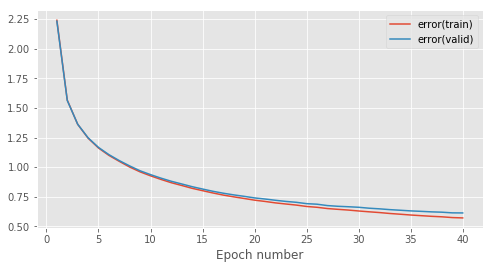

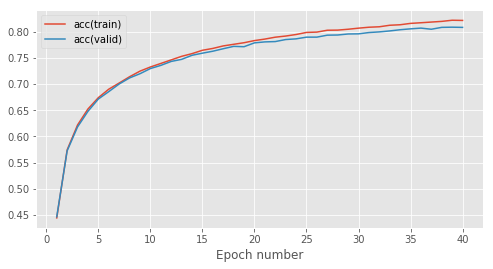

Epoch 1: 12.0s to complete
    error(train)=1.92e+00, acc(train)=5.11e-01, error(valid)=1.92e+00, acc(valid)=5.09e-01


Epoch 2: 15.3s to complete
    error(train)=1.44e+00, acc(train)=6.03e-01, error(valid)=1.44e+00, acc(valid)=5.98e-01


Epoch 3: 11.4s to complete
    error(train)=1.28e+00, acc(train)=6.42e-01, error(valid)=1.28e+00, acc(valid)=6.39e-01


Epoch 4: 12.2s to complete
    error(train)=1.19e+00, acc(train)=6.65e-01, error(valid)=1.19e+00, acc(valid)=6.61e-01


Epoch 5: 10.5s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.12e+00, acc(valid)=6.79e-01


Epoch 6: 10.6s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.93e-01


Epoch 7: 11.1s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.05e-01


Epoch 8: 11.8s to complete
    error(train)=9.65e-01, acc(train)=7.22e-01, error(valid)=9.76e-01, acc(valid)=7.16e-01


Epoch 9: 12.1s to complete
    error(train)=9.27e-01, acc(train)=7.34e-01, error(valid)=9.41e-01, acc(valid)=7.26e-01


Epoch 10: 14.1s to complete
    error(train)=8.96e-01, acc(train)=7.40e-01, error(valid)=9.11e-01, acc(valid)=7.33e-01


Epoch 11: 12.8s to complete
    error(train)=8.68e-01, acc(train)=7.47e-01, error(valid)=8.85e-01, acc(valid)=7.39e-01


Epoch 12: 10.9s to complete
    error(train)=8.43e-01, acc(train)=7.53e-01, error(valid)=8.60e-01, acc(valid)=7.46e-01


Epoch 13: 11.5s to complete
    error(train)=8.17e-01, acc(train)=7.61e-01, error(valid)=8.36e-01, acc(valid)=7.54e-01


Epoch 14: 10.5s to complete
    error(train)=7.99e-01, acc(train)=7.64e-01, error(valid)=8.20e-01, acc(valid)=7.56e-01


Epoch 15: 11.7s to complete
    error(train)=7.78e-01, acc(train)=7.71e-01, error(valid)=8.01e-01, acc(valid)=7.62e-01


Epoch 16: 12.1s to complete
    error(train)=7.59e-01, acc(train)=7.77e-01, error(valid)=7.83e-01, acc(valid)=7.69e-01


Epoch 17: 12.2s to complete
    error(train)=7.47e-01, acc(train)=7.78e-01, error(valid)=7.72e-01, acc(valid)=7.70e-01


Epoch 18: 11.1s to complete
    error(train)=7.32e-01, acc(train)=7.82e-01, error(valid)=7.59e-01, acc(valid)=7.72e-01


Epoch 19: 11.2s to complete
    error(train)=7.16e-01, acc(train)=7.87e-01, error(valid)=7.43e-01, acc(valid)=7.77e-01


Epoch 20: 12.9s to complete
    error(train)=7.08e-01, acc(train)=7.88e-01, error(valid)=7.37e-01, acc(valid)=7.79e-01


Epoch 21: 12.6s to complete
    error(train)=6.95e-01, acc(train)=7.91e-01, error(valid)=7.25e-01, acc(valid)=7.82e-01


Epoch 22: 14.0s to complete
    error(train)=6.81e-01, acc(train)=7.96e-01, error(valid)=7.12e-01, acc(valid)=7.87e-01


Epoch 23: 11.3s to complete
    error(train)=6.74e-01, acc(train)=7.96e-01, error(valid)=7.05e-01, acc(valid)=7.88e-01


Epoch 24: 13.9s to complete
    error(train)=6.63e-01, acc(train)=8.00e-01, error(valid)=6.97e-01, acc(valid)=7.88e-01


Epoch 25: 12.8s to complete
    error(train)=6.54e-01, acc(train)=8.03e-01, error(valid)=6.88e-01, acc(valid)=7.89e-01


Epoch 26: 12.4s to complete
    error(train)=6.49e-01, acc(train)=8.03e-01, error(valid)=6.86e-01, acc(valid)=7.88e-01


Epoch 27: 11.0s to complete
    error(train)=6.37e-01, acc(train)=8.06e-01, error(valid)=6.74e-01, acc(valid)=7.93e-01


Epoch 28: 13.5s to complete
    error(train)=6.31e-01, acc(train)=8.08e-01, error(valid)=6.69e-01, acc(valid)=7.93e-01


Epoch 29: 14.2s to complete
    error(train)=6.21e-01, acc(train)=8.10e-01, error(valid)=6.60e-01, acc(valid)=7.98e-01


Epoch 30: 12.6s to complete
    error(train)=6.16e-01, acc(train)=8.11e-01, error(valid)=6.57e-01, acc(valid)=7.98e-01


Epoch 31: 14.3s to complete
    error(train)=6.08e-01, acc(train)=8.14e-01, error(valid)=6.49e-01, acc(valid)=7.97e-01


Epoch 32: 12.9s to complete
    error(train)=6.03e-01, acc(train)=8.14e-01, error(valid)=6.46e-01, acc(valid)=8.00e-01


Epoch 33: 13.0s to complete
    error(train)=5.96e-01, acc(train)=8.17e-01, error(valid)=6.37e-01, acc(valid)=8.03e-01


Epoch 34: 12.9s to complete
    error(train)=5.90e-01, acc(train)=8.17e-01, error(valid)=6.34e-01, acc(valid)=8.04e-01


Epoch 35: 13.8s to complete
    error(train)=5.84e-01, acc(train)=8.18e-01, error(valid)=6.30e-01, acc(valid)=8.05e-01


Epoch 36: 13.9s to complete
    error(train)=5.80e-01, acc(train)=8.20e-01, error(valid)=6.27e-01, acc(valid)=8.05e-01


Epoch 37: 11.9s to complete
    error(train)=5.73e-01, acc(train)=8.21e-01, error(valid)=6.20e-01, acc(valid)=8.06e-01


Epoch 38: 11.8s to complete
    error(train)=5.69e-01, acc(train)=8.23e-01, error(valid)=6.17e-01, acc(valid)=8.07e-01


Epoch 39: 11.2s to complete
    error(train)=5.60e-01, acc(train)=8.25e-01, error(valid)=6.11e-01, acc(valid)=8.10e-01


Epoch 40: 13.0s to complete
    error(train)=5.59e-01, acc(train)=8.26e-01, error(valid)=6.11e-01, acc(valid)=8.10e-01


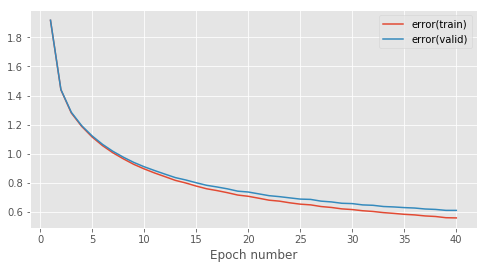

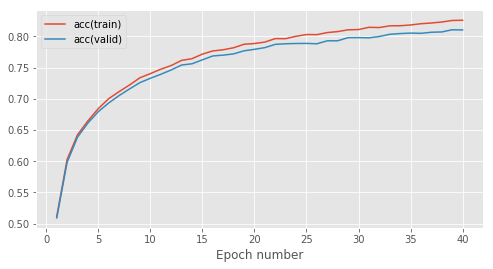

Epoch 1: 11.2s to complete
    error(train)=2.38e+00, acc(train)=4.11e-01, error(valid)=2.39e+00, acc(valid)=4.14e-01


Epoch 2: 11.7s to complete
    error(train)=1.63e+00, acc(train)=5.61e-01, error(valid)=1.63e+00, acc(valid)=5.58e-01


Epoch 3: 10.2s to complete
    error(train)=1.37e+00, acc(train)=6.20e-01, error(valid)=1.37e+00, acc(valid)=6.16e-01


Epoch 4: 12.1s to complete
    error(train)=1.23e+00, acc(train)=6.55e-01, error(valid)=1.24e+00, acc(valid)=6.52e-01


Epoch 5: 10.5s to complete
    error(train)=1.14e+00, acc(train)=6.78e-01, error(valid)=1.15e+00, acc(valid)=6.73e-01


Epoch 6: 12.8s to complete
    error(train)=1.08e+00, acc(train)=6.95e-01, error(valid)=1.09e+00, acc(valid)=6.89e-01


Epoch 7: 11.0s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.04e+00, acc(valid)=7.01e-01


Epoch 8: 12.8s to complete
    error(train)=9.78e-01, acc(train)=7.19e-01, error(valid)=9.93e-01, acc(valid)=7.14e-01


Epoch 9: 12.2s to complete
    error(train)=9.39e-01, acc(train)=7.30e-01, error(valid)=9.56e-01, acc(valid)=7.24e-01


Epoch 10: 14.8s to complete
    error(train)=9.10e-01, acc(train)=7.35e-01, error(valid)=9.29e-01, acc(valid)=7.30e-01


Epoch 11: 10.9s to complete
    error(train)=8.77e-01, acc(train)=7.44e-01, error(valid)=8.96e-01, acc(valid)=7.40e-01


Epoch 12: 12.6s to complete
    error(train)=8.49e-01, acc(train)=7.51e-01, error(valid)=8.70e-01, acc(valid)=7.48e-01


Epoch 13: 12.3s to complete
    error(train)=8.28e-01, acc(train)=7.56e-01, error(valid)=8.50e-01, acc(valid)=7.50e-01


Epoch 14: 10.7s to complete
    error(train)=8.06e-01, acc(train)=7.62e-01, error(valid)=8.29e-01, acc(valid)=7.56e-01


Epoch 15: 13.1s to complete
    error(train)=7.86e-01, acc(train)=7.66e-01, error(valid)=8.08e-01, acc(valid)=7.60e-01


Epoch 16: 10.4s to complete
    error(train)=7.70e-01, acc(train)=7.69e-01, error(valid)=7.95e-01, acc(valid)=7.60e-01


Epoch 17: 12.5s to complete
    error(train)=7.53e-01, acc(train)=7.76e-01, error(valid)=7.79e-01, acc(valid)=7.68e-01


Epoch 18: 13.9s to complete
    error(train)=7.37e-01, acc(train)=7.79e-01, error(valid)=7.65e-01, acc(valid)=7.71e-01


Epoch 19: 11.6s to complete
    error(train)=7.23e-01, acc(train)=7.81e-01, error(valid)=7.51e-01, acc(valid)=7.72e-01


Epoch 20: 13.4s to complete
    error(train)=7.11e-01, acc(train)=7.85e-01, error(valid)=7.39e-01, acc(valid)=7.75e-01


Epoch 21: 12.6s to complete
    error(train)=7.04e-01, acc(train)=7.85e-01, error(valid)=7.34e-01, acc(valid)=7.75e-01


Epoch 22: 11.0s to complete
    error(train)=6.87e-01, acc(train)=7.92e-01, error(valid)=7.18e-01, acc(valid)=7.79e-01


Epoch 23: 11.3s to complete
    error(train)=6.78e-01, acc(train)=7.92e-01, error(valid)=7.10e-01, acc(valid)=7.80e-01


Epoch 24: 11.4s to complete
    error(train)=6.67e-01, acc(train)=7.96e-01, error(valid)=7.00e-01, acc(valid)=7.84e-01


Epoch 25: 13.1s to complete
    error(train)=6.57e-01, acc(train)=7.99e-01, error(valid)=6.91e-01, acc(valid)=7.88e-01


Epoch 26: 12.5s to complete
    error(train)=6.49e-01, acc(train)=8.01e-01, error(valid)=6.86e-01, acc(valid)=7.88e-01


Epoch 27: 12.7s to complete
    error(train)=6.41e-01, acc(train)=8.04e-01, error(valid)=6.78e-01, acc(valid)=7.90e-01


Epoch 28: 11.7s to complete
    error(train)=6.32e-01, acc(train)=8.05e-01, error(valid)=6.72e-01, acc(valid)=7.94e-01


Epoch 29: 12.2s to complete
    error(train)=6.26e-01, acc(train)=8.06e-01, error(valid)=6.67e-01, acc(valid)=7.93e-01


Epoch 30: 11.7s to complete
    error(train)=6.18e-01, acc(train)=8.10e-01, error(valid)=6.60e-01, acc(valid)=7.95e-01


Epoch 31: 12.3s to complete
    error(train)=6.11e-01, acc(train)=8.11e-01, error(valid)=6.54e-01, acc(valid)=7.97e-01


Epoch 32: 12.1s to complete
    error(train)=6.04e-01, acc(train)=8.13e-01, error(valid)=6.48e-01, acc(valid)=8.00e-01


Epoch 33: 10.8s to complete
    error(train)=5.99e-01, acc(train)=8.15e-01, error(valid)=6.43e-01, acc(valid)=8.01e-01


Epoch 34: 12.3s to complete
    error(train)=5.90e-01, acc(train)=8.17e-01, error(valid)=6.37e-01, acc(valid)=8.02e-01


Epoch 35: 11.9s to complete
    error(train)=5.86e-01, acc(train)=8.18e-01, error(valid)=6.33e-01, acc(valid)=8.02e-01


Epoch 36: 13.2s to complete
    error(train)=5.82e-01, acc(train)=8.19e-01, error(valid)=6.30e-01, acc(valid)=8.01e-01


Epoch 37: 13.0s to complete
    error(train)=5.75e-01, acc(train)=8.21e-01, error(valid)=6.24e-01, acc(valid)=8.06e-01


Epoch 38: 10.8s to complete
    error(train)=5.69e-01, acc(train)=8.22e-01, error(valid)=6.21e-01, acc(valid)=8.05e-01


Epoch 39: 13.6s to complete
    error(train)=5.67e-01, acc(train)=8.22e-01, error(valid)=6.20e-01, acc(valid)=8.02e-01


Epoch 40: 14.3s to complete
    error(train)=5.62e-01, acc(train)=8.23e-01, error(valid)=6.15e-01, acc(valid)=8.08e-01


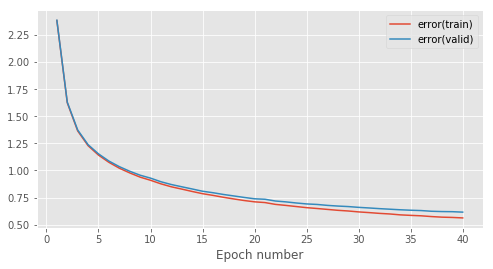

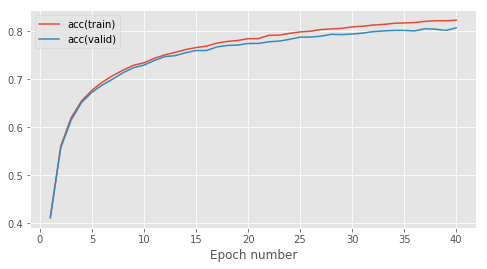

Epoch 1: 12.6s to complete
    error(train)=2.32e+00, acc(train)=4.30e-01, error(valid)=2.32e+00, acc(valid)=4.28e-01


Epoch 2: 12.5s to complete
    error(train)=1.62e+00, acc(train)=5.67e-01, error(valid)=1.62e+00, acc(valid)=5.65e-01


Epoch 3: 10.8s to complete
    error(train)=1.39e+00, acc(train)=6.20e-01, error(valid)=1.39e+00, acc(valid)=6.16e-01


Epoch 4: 12.2s to complete
    error(train)=1.27e+00, acc(train)=6.47e-01, error(valid)=1.27e+00, acc(valid)=6.41e-01


Epoch 5: 11.2s to complete
    error(train)=1.18e+00, acc(train)=6.70e-01, error(valid)=1.19e+00, acc(valid)=6.65e-01


Epoch 6: 13.1s to complete
    error(train)=1.11e+00, acc(train)=6.86e-01, error(valid)=1.12e+00, acc(valid)=6.82e-01


Epoch 7: 12.1s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.95e-01


Epoch 8: 12.2s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.03e+00, acc(valid)=7.05e-01


Epoch 9: 13.2s to complete
    error(train)=9.74e-01, acc(train)=7.21e-01, error(valid)=9.89e-01, acc(valid)=7.16e-01


Epoch 10: 10.6s to complete
    error(train)=9.38e-01, acc(train)=7.29e-01, error(valid)=9.54e-01, acc(valid)=7.24e-01


Epoch 11: 13.2s to complete
    error(train)=9.06e-01, acc(train)=7.40e-01, error(valid)=9.23e-01, acc(valid)=7.32e-01


Epoch 12: 10.9s to complete
    error(train)=8.81e-01, acc(train)=7.43e-01, error(valid)=8.99e-01, acc(valid)=7.38e-01


Epoch 13: 11.1s to complete
    error(train)=8.53e-01, acc(train)=7.52e-01, error(valid)=8.73e-01, acc(valid)=7.44e-01


Epoch 14: 12.2s to complete
    error(train)=8.32e-01, acc(train)=7.58e-01, error(valid)=8.53e-01, acc(valid)=7.48e-01


Epoch 15: 12.4s to complete
    error(train)=8.10e-01, acc(train)=7.62e-01, error(valid)=8.31e-01, acc(valid)=7.55e-01


Epoch 16: 10.0s to complete
    error(train)=7.94e-01, acc(train)=7.67e-01, error(valid)=8.17e-01, acc(valid)=7.59e-01


Epoch 17: 14.6s to complete
    error(train)=7.75e-01, acc(train)=7.71e-01, error(valid)=7.99e-01, acc(valid)=7.65e-01


Epoch 18: 12.5s to complete
    error(train)=7.61e-01, acc(train)=7.73e-01, error(valid)=7.85e-01, acc(valid)=7.66e-01


Epoch 19: 13.2s to complete
    error(train)=7.43e-01, acc(train)=7.79e-01, error(valid)=7.70e-01, acc(valid)=7.70e-01


Epoch 20: 12.7s to complete
    error(train)=7.31e-01, acc(train)=7.82e-01, error(valid)=7.60e-01, acc(valid)=7.75e-01


Epoch 21: 12.1s to complete
    error(train)=7.16e-01, acc(train)=7.85e-01, error(valid)=7.44e-01, acc(valid)=7.77e-01


Epoch 22: 11.5s to complete
    error(train)=7.04e-01, acc(train)=7.88e-01, error(valid)=7.34e-01, acc(valid)=7.81e-01


Epoch 23: 13.9s to complete
    error(train)=6.93e-01, acc(train)=7.91e-01, error(valid)=7.25e-01, acc(valid)=7.83e-01


Epoch 24: 13.0s to complete
    error(train)=6.83e-01, acc(train)=7.93e-01, error(valid)=7.17e-01, acc(valid)=7.83e-01


Epoch 25: 13.2s to complete
    error(train)=6.73e-01, acc(train)=7.97e-01, error(valid)=7.08e-01, acc(valid)=7.87e-01


Epoch 26: 10.8s to complete
    error(train)=6.63e-01, acc(train)=7.99e-01, error(valid)=6.99e-01, acc(valid)=7.89e-01


Epoch 27: 12.1s to complete
    error(train)=6.54e-01, acc(train)=8.01e-01, error(valid)=6.92e-01, acc(valid)=7.92e-01


Epoch 28: 13.0s to complete
    error(train)=6.47e-01, acc(train)=8.03e-01, error(valid)=6.86e-01, acc(valid)=7.94e-01


Epoch 29: 13.5s to complete
    error(train)=6.37e-01, acc(train)=8.06e-01, error(valid)=6.77e-01, acc(valid)=7.95e-01


Epoch 30: 14.3s to complete
    error(train)=6.29e-01, acc(train)=8.07e-01, error(valid)=6.70e-01, acc(valid)=7.97e-01


Epoch 31: 13.6s to complete
    error(train)=6.21e-01, acc(train)=8.10e-01, error(valid)=6.64e-01, acc(valid)=7.98e-01


Epoch 32: 11.6s to complete
    error(train)=6.16e-01, acc(train)=8.10e-01, error(valid)=6.61e-01, acc(valid)=7.98e-01


Epoch 33: 11.9s to complete
    error(train)=6.07e-01, acc(train)=8.13e-01, error(valid)=6.52e-01, acc(valid)=8.01e-01


Epoch 34: 11.9s to complete
    error(train)=6.05e-01, acc(train)=8.13e-01, error(valid)=6.53e-01, acc(valid)=8.00e-01


Epoch 35: 11.3s to complete
    error(train)=5.95e-01, acc(train)=8.16e-01, error(valid)=6.42e-01, acc(valid)=8.02e-01


Epoch 36: 13.2s to complete
    error(train)=5.90e-01, acc(train)=8.16e-01, error(valid)=6.41e-01, acc(valid)=8.04e-01


Epoch 37: 12.6s to complete
    error(train)=5.84e-01, acc(train)=8.18e-01, error(valid)=6.34e-01, acc(valid)=8.05e-01


Epoch 38: 10.2s to complete
    error(train)=5.78e-01, acc(train)=8.20e-01, error(valid)=6.30e-01, acc(valid)=8.05e-01


Epoch 39: 11.9s to complete
    error(train)=5.75e-01, acc(train)=8.20e-01, error(valid)=6.27e-01, acc(valid)=8.04e-01


Epoch 40: 10.9s to complete
    error(train)=5.67e-01, acc(train)=8.22e-01, error(valid)=6.21e-01, acc(valid)=8.07e-01


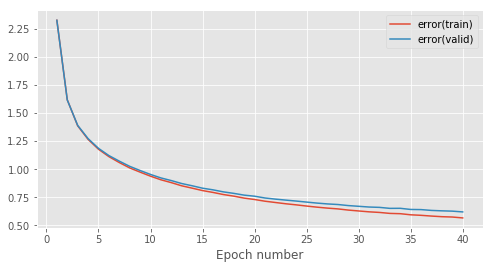

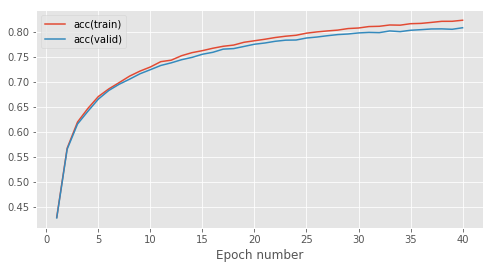

Epoch 1: 12.7s to complete
    error(train)=2.33e+00, acc(train)=4.30e-01, error(valid)=2.32e+00, acc(valid)=4.29e-01


Epoch 2: 11.9s to complete
    error(train)=1.62e+00, acc(train)=5.71e-01, error(valid)=1.62e+00, acc(valid)=5.72e-01


Epoch 3: 13.2s to complete
    error(train)=1.38e+00, acc(train)=6.22e-01, error(valid)=1.38e+00, acc(valid)=6.18e-01


Epoch 4: 13.7s to complete
    error(train)=1.25e+00, acc(train)=6.52e-01, error(valid)=1.26e+00, acc(valid)=6.43e-01


Epoch 5: 11.1s to complete
    error(train)=1.17e+00, acc(train)=6.71e-01, error(valid)=1.18e+00, acc(valid)=6.67e-01


Epoch 6: 11.5s to complete
    error(train)=1.10e+00, acc(train)=6.89e-01, error(valid)=1.11e+00, acc(valid)=6.83e-01


Epoch 7: 10.0s to complete
    error(train)=1.05e+00, acc(train)=7.03e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


Epoch 8: 12.2s to complete
    error(train)=1.00e+00, acc(train)=7.16e-01, error(valid)=1.01e+00, acc(valid)=7.09e-01


Epoch 9: 10.4s to complete
    error(train)=9.59e-01, acc(train)=7.26e-01, error(valid)=9.76e-01, acc(valid)=7.17e-01


Epoch 10: 12.2s to complete
    error(train)=9.21e-01, acc(train)=7.35e-01, error(valid)=9.38e-01, acc(valid)=7.29e-01


Epoch 11: 12.8s to complete
    error(train)=8.92e-01, acc(train)=7.41e-01, error(valid)=9.10e-01, acc(valid)=7.34e-01


Epoch 12: 10.7s to complete
    error(train)=8.64e-01, acc(train)=7.50e-01, error(valid)=8.83e-01, acc(valid)=7.44e-01


Epoch 13: 9.8s to complete
    error(train)=8.41e-01, acc(train)=7.55e-01, error(valid)=8.63e-01, acc(valid)=7.47e-01


Epoch 14: 11.3s to complete
    error(train)=8.18e-01, acc(train)=7.61e-01, error(valid)=8.40e-01, acc(valid)=7.54e-01


Epoch 15: 12.7s to complete
    error(train)=7.99e-01, acc(train)=7.65e-01, error(valid)=8.21e-01, acc(valid)=7.59e-01


Epoch 16: 9.3s to complete
    error(train)=7.80e-01, acc(train)=7.70e-01, error(valid)=8.05e-01, acc(valid)=7.61e-01


Epoch 17: 12.8s to complete
    error(train)=7.63e-01, acc(train)=7.75e-01, error(valid)=7.88e-01, acc(valid)=7.66e-01


Epoch 18: 13.1s to complete
    error(train)=7.48e-01, acc(train)=7.79e-01, error(valid)=7.75e-01, acc(valid)=7.69e-01


Epoch 19: 12.0s to complete
    error(train)=7.34e-01, acc(train)=7.83e-01, error(valid)=7.61e-01, acc(valid)=7.74e-01


Epoch 20: 11.7s to complete
    error(train)=7.20e-01, acc(train)=7.86e-01, error(valid)=7.48e-01, acc(valid)=7.78e-01


Epoch 21: 11.5s to complete
    error(train)=7.06e-01, acc(train)=7.90e-01, error(valid)=7.37e-01, acc(valid)=7.81e-01


Epoch 22: 12.1s to complete
    error(train)=6.96e-01, acc(train)=7.91e-01, error(valid)=7.26e-01, acc(valid)=7.82e-01


Epoch 23: 11.4s to complete
    error(train)=6.84e-01, acc(train)=7.95e-01, error(valid)=7.16e-01, acc(valid)=7.84e-01


Epoch 24: 12.1s to complete
    error(train)=6.74e-01, acc(train)=7.96e-01, error(valid)=7.06e-01, acc(valid)=7.86e-01


Epoch 25: 12.1s to complete
    error(train)=6.64e-01, acc(train)=8.00e-01, error(valid)=6.98e-01, acc(valid)=7.89e-01


Epoch 26: 11.2s to complete
    error(train)=6.56e-01, acc(train)=8.01e-01, error(valid)=6.91e-01, acc(valid)=7.90e-01


Epoch 27: 11.2s to complete
    error(train)=6.46e-01, acc(train)=8.03e-01, error(valid)=6.82e-01, acc(valid)=7.92e-01


Epoch 28: 13.0s to complete
    error(train)=6.40e-01, acc(train)=8.04e-01, error(valid)=6.78e-01, acc(valid)=7.92e-01


Epoch 29: 11.1s to complete
    error(train)=6.29e-01, acc(train)=8.08e-01, error(valid)=6.68e-01, acc(valid)=7.95e-01


Epoch 30: 11.8s to complete
    error(train)=6.20e-01, acc(train)=8.11e-01, error(valid)=6.58e-01, acc(valid)=7.99e-01


Epoch 31: 12.9s to complete
    error(train)=6.14e-01, acc(train)=8.12e-01, error(valid)=6.54e-01, acc(valid)=7.97e-01


Epoch 32: 12.1s to complete
    error(train)=6.09e-01, acc(train)=8.12e-01, error(valid)=6.50e-01, acc(valid)=7.99e-01


Epoch 33: 11.1s to complete
    error(train)=6.02e-01, acc(train)=8.14e-01, error(valid)=6.44e-01, acc(valid)=8.00e-01


Epoch 34: 12.7s to complete
    error(train)=5.96e-01, acc(train)=8.15e-01, error(valid)=6.38e-01, acc(valid)=8.00e-01


Epoch 35: 12.0s to complete
    error(train)=5.89e-01, acc(train)=8.18e-01, error(valid)=6.34e-01, acc(valid)=8.04e-01


Epoch 36: 10.8s to complete
    error(train)=5.82e-01, acc(train)=8.20e-01, error(valid)=6.28e-01, acc(valid)=8.06e-01


Epoch 37: 11.0s to complete
    error(train)=5.77e-01, acc(train)=8.20e-01, error(valid)=6.25e-01, acc(valid)=8.06e-01


Epoch 38: 9.5s to complete
    error(train)=5.73e-01, acc(train)=8.22e-01, error(valid)=6.21e-01, acc(valid)=8.05e-01


Epoch 39: 5.8s to complete
    error(train)=5.68e-01, acc(train)=8.23e-01, error(valid)=6.16e-01, acc(valid)=8.06e-01


Epoch 40: 5.9s to complete
    error(train)=5.63e-01, acc(train)=8.24e-01, error(valid)=6.11e-01, acc(valid)=8.09e-01


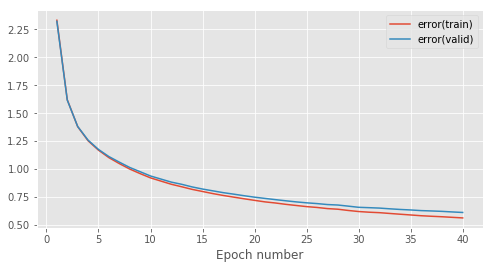

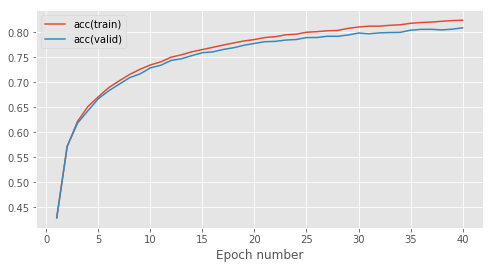

Epoch 1: 6.5s to complete
    error(train)=1.99e+00, acc(train)=4.86e-01, error(valid)=1.99e+00, acc(valid)=4.83e-01


Epoch 2: 6.2s to complete
    error(train)=1.48e+00, acc(train)=5.93e-01, error(valid)=1.49e+00, acc(valid)=5.88e-01


Epoch 3: 5.5s to complete
    error(train)=1.31e+00, acc(train)=6.36e-01, error(valid)=1.31e+00, acc(valid)=6.26e-01


Epoch 4: 6.7s to complete
    error(train)=1.20e+00, acc(train)=6.62e-01, error(valid)=1.21e+00, acc(valid)=6.55e-01


Epoch 5: 6.7s to complete
    error(train)=1.12e+00, acc(train)=6.82e-01, error(valid)=1.13e+00, acc(valid)=6.78e-01


Epoch 6: 6.2s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 7: 6.4s to complete
    error(train)=1.01e+00, acc(train)=7.10e-01, error(valid)=1.02e+00, acc(valid)=7.02e-01


Epoch 8: 6.2s to complete
    error(train)=9.72e-01, acc(train)=7.19e-01, error(valid)=9.85e-01, acc(valid)=7.13e-01


Epoch 9: 5.2s to complete
    error(train)=9.31e-01, acc(train)=7.30e-01, error(valid)=9.46e-01, acc(valid)=7.24e-01


Epoch 10: 6.3s to complete
    error(train)=8.99e-01, acc(train)=7.39e-01, error(valid)=9.15e-01, acc(valid)=7.31e-01


Epoch 11: 5.8s to complete
    error(train)=8.69e-01, acc(train)=7.48e-01, error(valid)=8.86e-01, acc(valid)=7.39e-01


Epoch 12: 6.1s to complete
    error(train)=8.43e-01, acc(train)=7.53e-01, error(valid)=8.61e-01, acc(valid)=7.42e-01


Epoch 13: 5.1s to complete
    error(train)=8.19e-01, acc(train)=7.60e-01, error(valid)=8.39e-01, acc(valid)=7.52e-01


Epoch 14: 6.7s to complete
    error(train)=7.97e-01, acc(train)=7.64e-01, error(valid)=8.18e-01, acc(valid)=7.56e-01


Epoch 15: 6.4s to complete
    error(train)=7.77e-01, acc(train)=7.69e-01, error(valid)=7.99e-01, acc(valid)=7.61e-01


Epoch 16: 6.6s to complete
    error(train)=7.58e-01, acc(train)=7.74e-01, error(valid)=7.81e-01, acc(valid)=7.65e-01


Epoch 17: 6.8s to complete
    error(train)=7.42e-01, acc(train)=7.79e-01, error(valid)=7.65e-01, acc(valid)=7.70e-01


Epoch 18: 7.5s to complete
    error(train)=7.26e-01, acc(train)=7.82e-01, error(valid)=7.52e-01, acc(valid)=7.74e-01


Epoch 19: 8.1s to complete
    error(train)=7.11e-01, acc(train)=7.86e-01, error(valid)=7.37e-01, acc(valid)=7.77e-01


Epoch 20: 6.5s to complete
    error(train)=7.00e-01, acc(train)=7.89e-01, error(valid)=7.27e-01, acc(valid)=7.78e-01


Epoch 21: 7.0s to complete
    error(train)=6.89e-01, acc(train)=7.90e-01, error(valid)=7.18e-01, acc(valid)=7.79e-01


Epoch 22: 6.6s to complete
    error(train)=6.75e-01, acc(train)=7.97e-01, error(valid)=7.04e-01, acc(valid)=7.86e-01


Epoch 23: 6.3s to complete
    error(train)=6.66e-01, acc(train)=7.98e-01, error(valid)=6.97e-01, acc(valid)=7.86e-01


Epoch 24: 5.7s to complete
    error(train)=6.53e-01, acc(train)=8.01e-01, error(valid)=6.86e-01, acc(valid)=7.89e-01


Epoch 25: 6.2s to complete
    error(train)=6.46e-01, acc(train)=8.02e-01, error(valid)=6.80e-01, acc(valid)=7.90e-01


Epoch 26: 6.0s to complete
    error(train)=6.38e-01, acc(train)=8.05e-01, error(valid)=6.73e-01, acc(valid)=7.93e-01


Epoch 27: 6.2s to complete
    error(train)=6.29e-01, acc(train)=8.06e-01, error(valid)=6.66e-01, acc(valid)=7.94e-01


Epoch 28: 5.8s to complete
    error(train)=6.19e-01, acc(train)=8.10e-01, error(valid)=6.57e-01, acc(valid)=7.96e-01


Epoch 29: 5.9s to complete
    error(train)=6.14e-01, acc(train)=8.10e-01, error(valid)=6.55e-01, acc(valid)=7.95e-01


Epoch 30: 6.2s to complete
    error(train)=6.05e-01, acc(train)=8.12e-01, error(valid)=6.46e-01, acc(valid)=7.99e-01


Epoch 31: 7.4s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=6.40e-01, acc(valid)=8.00e-01


Epoch 32: 5.8s to complete
    error(train)=5.93e-01, acc(train)=8.16e-01, error(valid)=6.35e-01, acc(valid)=8.02e-01


Epoch 33: 6.8s to complete
    error(train)=5.84e-01, acc(train)=8.19e-01, error(valid)=6.28e-01, acc(valid)=8.04e-01


Epoch 34: 6.2s to complete
    error(train)=5.80e-01, acc(train)=8.19e-01, error(valid)=6.25e-01, acc(valid)=8.04e-01


Epoch 35: 6.6s to complete
    error(train)=5.75e-01, acc(train)=8.20e-01, error(valid)=6.22e-01, acc(valid)=8.04e-01


Epoch 36: 6.8s to complete
    error(train)=5.68e-01, acc(train)=8.23e-01, error(valid)=6.16e-01, acc(valid)=8.06e-01


Epoch 37: 5.7s to complete
    error(train)=5.63e-01, acc(train)=8.24e-01, error(valid)=6.13e-01, acc(valid)=8.08e-01


Epoch 38: 5.4s to complete
    error(train)=5.58e-01, acc(train)=8.25e-01, error(valid)=6.08e-01, acc(valid)=8.09e-01


Epoch 39: 5.8s to complete
    error(train)=5.51e-01, acc(train)=8.28e-01, error(valid)=6.04e-01, acc(valid)=8.11e-01


Epoch 40: 6.6s to complete
    error(train)=5.48e-01, acc(train)=8.28e-01, error(valid)=6.02e-01, acc(valid)=8.12e-01


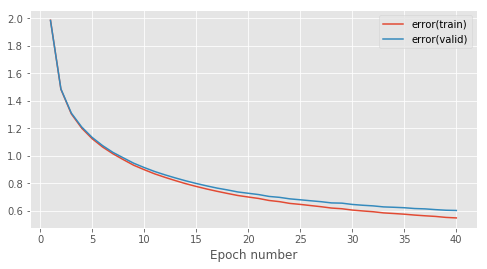

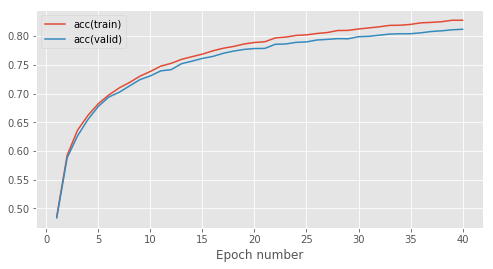

In [6]:
epochs = [15, 20, 20, 40, 40, 40]
adam_learning_rates = [0.001, 0.0005, 0.00025, 0.0001, 0.00005]
b1 = [0.5, 0.75, 0.9, 0.95]
b2 = [0.9, 0.94, 0.98, 0.999]
adam_models = OrderedDict()
adam_stats = OrderedDict()
final_train_errors = []
final_valid_errors = []
final_train_accs = []
final_valid_accs = []


for learning_rate, num_epochs in zip(adam_learning_rates, epochs):
    for beta_1 in b1:
        for beta_2 in b2:
            layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
                      ReluLayer(),
                      AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
                      ReluLayer(),
                      AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
                      ReluLayer(),
                      AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]
        
            model = MultipleLayerModel(layers)
        
            learning_rule = AdamLearningRule(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2)
            stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
                model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
            plt.show()
        
            adam_models[(learning_rate, beta_1, beta_2)] = model
            adam_stats[(learning_rate, beta_1, beta_2)] = stats
        
            final_train_errors.append(stats[-1, keys['error(train)']])
            final_valid_errors.append(stats[-1, keys['error(valid)']])
            final_train_accs.append(stats[-1, keys['acc(train)']])
            final_valid_accs.append(stats[-1, keys['acc(valid)']])

In [13]:
print('| learning_rate | beta_1, beta_2 | ith epoch  | best valid error | best valid acc |')
print('|---------------|----------------|------------|------------------|----------------|')
for learning_rate in adam_learning_rates:
    for beta_1 in b1:
        for beta_2 in b2:
            stats = adam_stats[(learning_rate, beta_1, beta_2)]
            print('| {0:.5f}       | {1:.2f}, {2:.3f}    | {3:2d}         | {4:.3e}        | {5:.3f}          |'
                    .format(learning_rate, beta_1, beta_2, np.argmax(stats[1:, -1]),
                            stats[1:, -2][np.argmax(stats[1:, -1])], np.max(stats[1:, -1])))

| learning_rate | beta_1, beta_2 | ith epoch  | best valid error | best valid acc |
|---------------|----------------|------------|------------------|----------------|
| 0.00100       | 0.50, 0.900    |  8         | 5.105e-01        | 0.838          |
| 0.00100       | 0.50, 0.940    | 11         | 5.219e-01        | 0.837          |
| 0.00100       | 0.50, 0.980    | 12         | 4.948e-01        | 0.842          |
| 0.00100       | 0.50, 0.999    | 13         | 5.061e-01        | 0.840          |
| 0.00100       | 0.75, 0.900    | 10         | 5.247e-01        | 0.837          |
| 0.00100       | 0.75, 0.940    | 10         | 5.121e-01        | 0.838          |
| 0.00100       | 0.75, 0.980    | 11         | 4.988e-01        | 0.842          |
| 0.00100       | 0.75, 0.999    | 12         | 4.831e-01        | 0.845          |
| 0.00100       | 0.90, 0.900    | 11         | 5.224e-01        | 0.838          |
| 0.00100       | 0.90, 0.940    |  7         | 5.148e-01        | 0.833    

### Final Setting

Epoch 1: 3.9s to complete
    error(train)=7.63e-01, acc(train)=7.64e-01, error(valid)=7.91e-01, acc(valid)=7.53e-01


Epoch 2: 4.0s to complete
    error(train)=6.08e-01, acc(train)=8.03e-01, error(valid)=6.45e-01, acc(valid)=7.93e-01


Epoch 3: 3.9s to complete
    error(train)=5.34e-01, acc(train)=8.24e-01, error(valid)=5.91e-01, acc(valid)=8.07e-01


Epoch 4: 3.8s to complete
    error(train)=4.97e-01, acc(train)=8.34e-01, error(valid)=5.61e-01, acc(valid)=8.16e-01


Epoch 5: 4.0s to complete
    error(train)=4.49e-01, acc(train)=8.47e-01, error(valid)=5.20e-01, acc(valid)=8.25e-01


Epoch 6: 4.1s to complete
    error(train)=4.33e-01, acc(train)=8.50e-01, error(valid)=5.30e-01, acc(valid)=8.25e-01


Epoch 7: 3.9s to complete
    error(train)=4.14e-01, acc(train)=8.55e-01, error(valid)=5.19e-01, acc(valid)=8.25e-01


Epoch 8: 4.1s to complete
    error(train)=3.92e-01, acc(train)=8.62e-01, error(valid)=5.08e-01, acc(valid)=8.31e-01


Epoch 9: 4.1s to complete
    error(train)=3.83e-01, acc(train)=8.64e-01, error(valid)=5.16e-01, acc(valid)=8.30e-01


Epoch 10: 4.2s to complete
    error(train)=3.53e-01, acc(train)=8.73e-01, error(valid)=4.95e-01, acc(valid)=8.34e-01


Epoch 11: 4.4s to complete
    error(train)=3.54e-01, acc(train)=8.72e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


Epoch 12: 4.1s to complete
    error(train)=3.34e-01, acc(train)=8.77e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 13: 4.3s to complete
    error(train)=3.32e-01, acc(train)=8.77e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 14: 4.1s to complete
    error(train)=3.17e-01, acc(train)=8.83e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


Epoch 15: 4.6s to complete
    error(train)=3.07e-01, acc(train)=8.86e-01, error(valid)=5.12e-01, acc(valid)=8.38e-01


Epoch 16: 4.1s to complete
    error(train)=3.09e-01, acc(train)=8.84e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01


Epoch 17: 4.2s to complete
    error(train)=3.04e-01, acc(train)=8.86e-01, error(valid)=5.36e-01, acc(valid)=8.31e-01


Epoch 18: 4.5s to complete
    error(train)=2.95e-01, acc(train)=8.88e-01, error(valid)=5.39e-01, acc(valid)=8.35e-01


Epoch 19: 4.4s to complete
    error(train)=2.76e-01, acc(train)=8.96e-01, error(valid)=5.32e-01, acc(valid)=8.35e-01


Epoch 20: 4.6s to complete
    error(train)=2.72e-01, acc(train)=8.97e-01, error(valid)=5.42e-01, acc(valid)=8.36e-01


Epoch 21: 5.1s to complete
    error(train)=2.60e-01, acc(train)=9.00e-01, error(valid)=5.44e-01, acc(valid)=8.38e-01


Epoch 22: 4.1s to complete
    error(train)=2.66e-01, acc(train)=8.97e-01, error(valid)=5.63e-01, acc(valid)=8.34e-01


Epoch 23: 4.3s to complete
    error(train)=2.48e-01, acc(train)=9.03e-01, error(valid)=5.64e-01, acc(valid)=8.34e-01


Epoch 24: 4.3s to complete
    error(train)=2.52e-01, acc(train)=9.02e-01, error(valid)=5.71e-01, acc(valid)=8.35e-01


Epoch 25: 4.2s to complete
    error(train)=2.48e-01, acc(train)=9.05e-01, error(valid)=5.94e-01, acc(valid)=8.34e-01


Epoch 26: 4.4s to complete
    error(train)=2.46e-01, acc(train)=9.04e-01, error(valid)=5.95e-01, acc(valid)=8.34e-01


Epoch 27: 4.1s to complete
    error(train)=2.47e-01, acc(train)=9.03e-01, error(valid)=6.09e-01, acc(valid)=8.32e-01


Epoch 28: 4.1s to complete
    error(train)=2.25e-01, acc(train)=9.11e-01, error(valid)=6.05e-01, acc(valid)=8.32e-01


Epoch 29: 4.2s to complete
    error(train)=2.49e-01, acc(train)=9.01e-01, error(valid)=6.40e-01, acc(valid)=8.26e-01


Epoch 30: 4.2s to complete
    error(train)=2.29e-01, acc(train)=9.11e-01, error(valid)=6.30e-01, acc(valid)=8.32e-01


Epoch 31: 4.4s to complete
    error(train)=2.21e-01, acc(train)=9.12e-01, error(valid)=6.32e-01, acc(valid)=8.29e-01


Epoch 32: 4.3s to complete
    error(train)=2.43e-01, acc(train)=9.03e-01, error(valid)=6.74e-01, acc(valid)=8.23e-01


Epoch 33: 4.1s to complete
    error(train)=2.09e-01, acc(train)=9.16e-01, error(valid)=6.38e-01, acc(valid)=8.32e-01


Epoch 34: 4.0s to complete
    error(train)=2.27e-01, acc(train)=9.09e-01, error(valid)=6.60e-01, acc(valid)=8.28e-01


Epoch 35: 5.2s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=6.58e-01, acc(valid)=8.28e-01


Epoch 36: 4.9s to complete
    error(train)=2.04e-01, acc(train)=9.17e-01, error(valid)=6.77e-01, acc(valid)=8.30e-01


Epoch 37: 4.4s to complete
    error(train)=2.02e-01, acc(train)=9.18e-01, error(valid)=6.89e-01, acc(valid)=8.28e-01


Epoch 38: 4.9s to complete
    error(train)=1.98e-01, acc(train)=9.21e-01, error(valid)=6.88e-01, acc(valid)=8.30e-01


Epoch 39: 4.4s to complete
    error(train)=1.99e-01, acc(train)=9.21e-01, error(valid)=7.14e-01, acc(valid)=8.32e-01


Epoch 40: 4.5s to complete
    error(train)=2.11e-01, acc(train)=9.17e-01, error(valid)=7.45e-01, acc(valid)=8.30e-01


Epoch 41: 4.4s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=7.25e-01, acc(valid)=8.27e-01


Epoch 42: 4.3s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=7.61e-01, acc(valid)=8.27e-01


Epoch 43: 4.4s to complete
    error(train)=1.93e-01, acc(train)=9.21e-01, error(valid)=7.68e-01, acc(valid)=8.29e-01


Epoch 44: 4.4s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=7.50e-01, acc(valid)=8.30e-01


Epoch 45: 4.3s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=7.73e-01, acc(valid)=8.26e-01


Epoch 46: 4.3s to complete
    error(train)=2.09e-01, acc(train)=9.16e-01, error(valid)=8.02e-01, acc(valid)=8.23e-01


Epoch 47: 4.1s to complete
    error(train)=1.78e-01, acc(train)=9.27e-01, error(valid)=7.93e-01, acc(valid)=8.28e-01


Epoch 48: 4.3s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=8.32e-01, acc(valid)=8.25e-01


Epoch 49: 4.2s to complete
    error(train)=1.98e-01, acc(train)=9.17e-01, error(valid)=8.54e-01, acc(valid)=8.17e-01


Epoch 50: 4.1s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=8.69e-01, acc(valid)=8.22e-01


Epoch 51: 4.3s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=8.29e-01, acc(valid)=8.23e-01


Epoch 52: 4.0s to complete
    error(train)=1.69e-01, acc(train)=9.32e-01, error(valid)=8.36e-01, acc(valid)=8.26e-01


Epoch 53: 4.2s to complete
    error(train)=1.70e-01, acc(train)=9.31e-01, error(valid)=8.60e-01, acc(valid)=8.25e-01


Epoch 54: 4.2s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=9.09e-01, acc(valid)=8.22e-01


Epoch 55: 4.3s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=8.82e-01, acc(valid)=8.20e-01


Epoch 56: 4.2s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=9.01e-01, acc(valid)=8.25e-01


Epoch 57: 4.9s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=9.30e-01, acc(valid)=8.16e-01


Epoch 58: 4.2s to complete
    error(train)=1.68e-01, acc(train)=9.32e-01, error(valid)=9.19e-01, acc(valid)=8.19e-01


Epoch 59: 4.1s to complete
    error(train)=1.63e-01, acc(train)=9.33e-01, error(valid)=9.18e-01, acc(valid)=8.26e-01


Epoch 60: 4.4s to complete
    error(train)=1.67e-01, acc(train)=9.31e-01, error(valid)=9.29e-01, acc(valid)=8.19e-01


Epoch 61: 5.3s to complete
    error(train)=1.70e-01, acc(train)=9.30e-01, error(valid)=9.62e-01, acc(valid)=8.19e-01


Epoch 62: 5.1s to complete
    error(train)=1.63e-01, acc(train)=9.32e-01, error(valid)=9.54e-01, acc(valid)=8.21e-01


Epoch 63: 4.2s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=1.01e+00, acc(valid)=8.16e-01


Epoch 64: 4.2s to complete
    error(train)=1.58e-01, acc(train)=9.34e-01, error(valid)=9.88e-01, acc(valid)=8.22e-01


Epoch 65: 4.4s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=1.01e+00, acc(valid)=8.19e-01


Epoch 66: 4.3s to complete
    error(train)=1.68e-01, acc(train)=9.31e-01, error(valid)=9.99e-01, acc(valid)=8.19e-01


Epoch 67: 4.2s to complete
    error(train)=1.53e-01, acc(train)=9.38e-01, error(valid)=1.01e+00, acc(valid)=8.22e-01


Epoch 68: 4.2s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=1.04e+00, acc(valid)=8.20e-01


Epoch 69: 4.2s to complete
    error(train)=1.55e-01, acc(train)=9.35e-01, error(valid)=1.01e+00, acc(valid)=8.15e-01


Epoch 70: 4.2s to complete
    error(train)=1.58e-01, acc(train)=9.37e-01, error(valid)=1.03e+00, acc(valid)=8.23e-01


Epoch 71: 4.2s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=1.04e+00, acc(valid)=8.21e-01


Epoch 72: 4.2s to complete
    error(train)=1.71e-01, acc(train)=9.32e-01, error(valid)=1.07e+00, acc(valid)=8.18e-01


Epoch 73: 4.2s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=1.06e+00, acc(valid)=8.18e-01


Epoch 74: 4.2s to complete
    error(train)=1.50e-01, acc(train)=9.38e-01, error(valid)=1.06e+00, acc(valid)=8.18e-01


Epoch 75: 4.1s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=1.08e+00, acc(valid)=8.18e-01


Epoch 76: 4.1s to complete
    error(train)=1.55e-01, acc(train)=9.36e-01, error(valid)=1.09e+00, acc(valid)=8.15e-01


Epoch 77: 4.5s to complete
    error(train)=1.42e-01, acc(train)=9.40e-01, error(valid)=1.10e+00, acc(valid)=8.19e-01


Epoch 78: 4.3s to complete
    error(train)=1.40e-01, acc(train)=9.42e-01, error(valid)=1.08e+00, acc(valid)=8.20e-01


Epoch 79: 4.2s to complete
    error(train)=1.44e-01, acc(train)=9.40e-01, error(valid)=1.10e+00, acc(valid)=8.22e-01


Epoch 80: 4.4s to complete
    error(train)=1.44e-01, acc(train)=9.40e-01, error(valid)=1.15e+00, acc(valid)=8.18e-01


Epoch 81: 4.6s to complete
    error(train)=1.65e-01, acc(train)=9.34e-01, error(valid)=1.18e+00, acc(valid)=8.10e-01


Epoch 82: 4.5s to complete
    error(train)=1.35e-01, acc(train)=9.44e-01, error(valid)=1.16e+00, acc(valid)=8.20e-01


Epoch 83: 4.0s to complete
    error(train)=1.74e-01, acc(train)=9.32e-01, error(valid)=1.21e+00, acc(valid)=8.13e-01


Epoch 84: 4.4s to complete
    error(train)=1.54e-01, acc(train)=9.38e-01, error(valid)=1.21e+00, acc(valid)=8.21e-01


Epoch 85: 4.0s to complete
    error(train)=1.32e-01, acc(train)=9.45e-01, error(valid)=1.15e+00, acc(valid)=8.19e-01


Epoch 86: 4.3s to complete
    error(train)=1.48e-01, acc(train)=9.40e-01, error(valid)=1.16e+00, acc(valid)=8.19e-01


Epoch 87: 4.0s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=1.22e+00, acc(valid)=8.15e-01


Epoch 88: 4.2s to complete
    error(train)=1.59e-01, acc(train)=9.38e-01, error(valid)=1.24e+00, acc(valid)=8.14e-01


Epoch 89: 3.9s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=1.22e+00, acc(valid)=8.13e-01


Epoch 90: 4.2s to complete
    error(train)=1.48e-01, acc(train)=9.41e-01, error(valid)=1.26e+00, acc(valid)=8.17e-01


Epoch 91: 4.1s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=1.23e+00, acc(valid)=8.20e-01


Epoch 92: 4.0s to complete
    error(train)=1.53e-01, acc(train)=9.40e-01, error(valid)=1.30e+00, acc(valid)=8.10e-01


Epoch 93: 4.1s to complete
    error(train)=1.56e-01, acc(train)=9.38e-01, error(valid)=1.32e+00, acc(valid)=8.13e-01


Epoch 94: 4.0s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=1.28e+00, acc(valid)=8.16e-01


Epoch 95: 4.0s to complete
    error(train)=1.31e-01, acc(train)=9.46e-01, error(valid)=1.29e+00, acc(valid)=8.24e-01


Epoch 96: 4.2s to complete
    error(train)=1.42e-01, acc(train)=9.43e-01, error(valid)=1.32e+00, acc(valid)=8.14e-01


Epoch 97: 4.2s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=1.31e+00, acc(valid)=8.14e-01


Epoch 98: 4.3s to complete
    error(train)=1.46e-01, acc(train)=9.41e-01, error(valid)=1.31e+00, acc(valid)=8.15e-01


Epoch 99: 5.4s to complete
    error(train)=1.48e-01, acc(train)=9.43e-01, error(valid)=1.36e+00, acc(valid)=8.17e-01


Epoch 100: 5.3s to complete
    error(train)=1.45e-01, acc(train)=9.42e-01, error(valid)=1.34e+00, acc(valid)=8.15e-01


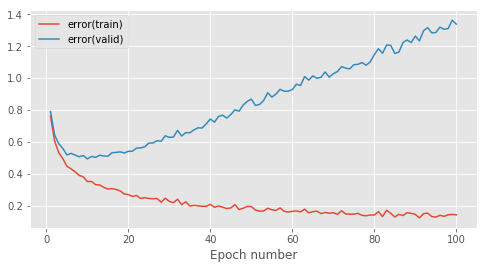

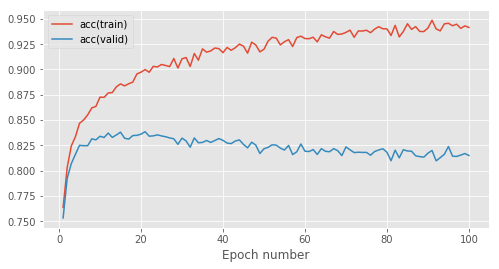

Epoch 1: 3.6s to complete
    error(train)=9.70e-01, acc(train)=7.14e-01, error(valid)=9.80e-01, acc(valid)=7.11e-01


Epoch 2: 3.6s to complete
    error(train)=7.53e-01, acc(train)=7.72e-01, error(valid)=7.79e-01, acc(valid)=7.63e-01


Epoch 3: 3.7s to complete
    error(train)=6.46e-01, acc(train)=7.99e-01, error(valid)=6.80e-01, acc(valid)=7.89e-01


Epoch 4: 3.4s to complete
    error(train)=5.87e-01, acc(train)=8.15e-01, error(valid)=6.39e-01, acc(valid)=7.97e-01


Epoch 5: 3.7s to complete
    error(train)=5.38e-01, acc(train)=8.24e-01, error(valid)=5.95e-01, acc(valid)=8.07e-01


Epoch 6: 3.6s to complete
    error(train)=5.01e-01, acc(train)=8.37e-01, error(valid)=5.67e-01, acc(valid)=8.17e-01


Epoch 7: 3.9s to complete
    error(train)=4.73e-01, acc(train)=8.44e-01, error(valid)=5.47e-01, acc(valid)=8.22e-01


Epoch 8: 3.9s to complete
    error(train)=4.54e-01, acc(train)=8.49e-01, error(valid)=5.43e-01, acc(valid)=8.23e-01


Epoch 9: 3.9s to complete
    error(train)=4.34e-01, acc(train)=8.53e-01, error(valid)=5.35e-01, acc(valid)=8.26e-01


Epoch 10: 3.9s to complete
    error(train)=4.17e-01, acc(train)=8.60e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


Epoch 11: 3.9s to complete
    error(train)=4.10e-01, acc(train)=8.59e-01, error(valid)=5.30e-01, acc(valid)=8.25e-01


Epoch 12: 3.8s to complete
    error(train)=3.95e-01, acc(train)=8.65e-01, error(valid)=5.29e-01, acc(valid)=8.32e-01


Epoch 13: 3.8s to complete
    error(train)=3.81e-01, acc(train)=8.68e-01, error(valid)=5.19e-01, acc(valid)=8.30e-01


Epoch 14: 3.9s to complete
    error(train)=3.70e-01, acc(train)=8.71e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 15: 4.0s to complete
    error(train)=3.64e-01, acc(train)=8.73e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


Epoch 16: 3.7s to complete
    error(train)=3.45e-01, acc(train)=8.79e-01, error(valid)=5.09e-01, acc(valid)=8.34e-01


Epoch 17: 3.8s to complete
    error(train)=3.39e-01, acc(train)=8.79e-01, error(valid)=5.10e-01, acc(valid)=8.31e-01


Epoch 18: 3.9s to complete
    error(train)=3.41e-01, acc(train)=8.79e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 19: 3.9s to complete
    error(train)=3.30e-01, acc(train)=8.82e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 20: 3.9s to complete
    error(train)=3.26e-01, acc(train)=8.84e-01, error(valid)=5.33e-01, acc(valid)=8.34e-01


Epoch 21: 4.1s to complete
    error(train)=3.06e-01, acc(train)=8.90e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


Epoch 22: 4.9s to complete
    error(train)=3.05e-01, acc(train)=8.89e-01, error(valid)=5.25e-01, acc(valid)=8.34e-01


Epoch 23: 4.4s to complete
    error(train)=3.06e-01, acc(train)=8.91e-01, error(valid)=5.41e-01, acc(valid)=8.31e-01


Epoch 24: 4.4s to complete
    error(train)=2.95e-01, acc(train)=8.93e-01, error(valid)=5.43e-01, acc(valid)=8.32e-01


Epoch 25: 4.3s to complete
    error(train)=2.94e-01, acc(train)=8.92e-01, error(valid)=5.48e-01, acc(valid)=8.30e-01


Epoch 26: 3.9s to complete
    error(train)=2.85e-01, acc(train)=8.94e-01, error(valid)=5.49e-01, acc(valid)=8.33e-01


Epoch 27: 3.9s to complete
    error(train)=2.75e-01, acc(train)=8.99e-01, error(valid)=5.44e-01, acc(valid)=8.36e-01


Epoch 28: 4.0s to complete
    error(train)=2.71e-01, acc(train)=9.00e-01, error(valid)=5.59e-01, acc(valid)=8.34e-01


Epoch 29: 3.9s to complete
    error(train)=2.62e-01, acc(train)=9.04e-01, error(valid)=5.59e-01, acc(valid)=8.34e-01


Epoch 30: 4.0s to complete
    error(train)=2.65e-01, acc(train)=9.03e-01, error(valid)=5.67e-01, acc(valid)=8.32e-01


Epoch 31: 4.1s to complete
    error(train)=2.62e-01, acc(train)=9.02e-01, error(valid)=5.72e-01, acc(valid)=8.31e-01


Epoch 32: 4.0s to complete
    error(train)=2.52e-01, acc(train)=9.06e-01, error(valid)=5.71e-01, acc(valid)=8.34e-01


Epoch 33: 4.0s to complete
    error(train)=2.53e-01, acc(train)=9.05e-01, error(valid)=5.88e-01, acc(valid)=8.32e-01


Epoch 34: 4.3s to complete
    error(train)=2.45e-01, acc(train)=9.08e-01, error(valid)=5.88e-01, acc(valid)=8.32e-01


Epoch 35: 4.1s to complete
    error(train)=2.44e-01, acc(train)=9.07e-01, error(valid)=5.97e-01, acc(valid)=8.28e-01


Epoch 36: 3.8s to complete
    error(train)=2.30e-01, acc(train)=9.13e-01, error(valid)=5.94e-01, acc(valid)=8.34e-01


Epoch 37: 4.0s to complete
    error(train)=2.30e-01, acc(train)=9.14e-01, error(valid)=6.05e-01, acc(valid)=8.32e-01


Epoch 38: 4.6s to complete
    error(train)=2.47e-01, acc(train)=9.07e-01, error(valid)=6.44e-01, acc(valid)=8.27e-01


Epoch 39: 3.7s to complete
    error(train)=2.31e-01, acc(train)=9.12e-01, error(valid)=6.25e-01, acc(valid)=8.27e-01


Epoch 40: 3.9s to complete
    error(train)=2.26e-01, acc(train)=9.14e-01, error(valid)=6.29e-01, acc(valid)=8.32e-01


Epoch 41: 4.0s to complete
    error(train)=2.29e-01, acc(train)=9.11e-01, error(valid)=6.35e-01, acc(valid)=8.24e-01


Epoch 42: 4.0s to complete
    error(train)=2.16e-01, acc(train)=9.17e-01, error(valid)=6.46e-01, acc(valid)=8.27e-01


Epoch 43: 3.8s to complete
    error(train)=2.04e-01, acc(train)=9.23e-01, error(valid)=6.45e-01, acc(valid)=8.30e-01


Epoch 44: 4.2s to complete
    error(train)=2.11e-01, acc(train)=9.19e-01, error(valid)=6.52e-01, acc(valid)=8.27e-01


Epoch 45: 4.3s to complete
    error(train)=2.11e-01, acc(train)=9.19e-01, error(valid)=6.65e-01, acc(valid)=8.30e-01


Epoch 46: 4.8s to complete
    error(train)=2.06e-01, acc(train)=9.21e-01, error(valid)=6.62e-01, acc(valid)=8.28e-01


Epoch 47: 4.3s to complete
    error(train)=1.99e-01, acc(train)=9.22e-01, error(valid)=6.72e-01, acc(valid)=8.31e-01


Epoch 48: 4.0s to complete
    error(train)=1.93e-01, acc(train)=9.25e-01, error(valid)=6.91e-01, acc(valid)=8.28e-01


Epoch 49: 4.1s to complete
    error(train)=1.94e-01, acc(train)=9.25e-01, error(valid)=6.97e-01, acc(valid)=8.27e-01


Epoch 50: 4.1s to complete
    error(train)=2.07e-01, acc(train)=9.18e-01, error(valid)=7.39e-01, acc(valid)=8.24e-01


Epoch 51: 3.9s to complete
    error(train)=1.91e-01, acc(train)=9.25e-01, error(valid)=7.11e-01, acc(valid)=8.26e-01


Epoch 52: 4.0s to complete
    error(train)=1.85e-01, acc(train)=9.27e-01, error(valid)=7.27e-01, acc(valid)=8.23e-01


Epoch 53: 3.9s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=7.45e-01, acc(valid)=8.20e-01


Epoch 54: 4.5s to complete
    error(train)=1.94e-01, acc(train)=9.24e-01, error(valid)=7.60e-01, acc(valid)=8.23e-01


Epoch 55: 4.8s to complete
    error(train)=1.88e-01, acc(train)=9.27e-01, error(valid)=7.61e-01, acc(valid)=8.22e-01


Epoch 56: 4.8s to complete
    error(train)=2.00e-01, acc(train)=9.19e-01, error(valid)=7.92e-01, acc(valid)=8.16e-01


Epoch 57: 4.0s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=7.69e-01, acc(valid)=8.25e-01


Epoch 58: 4.2s to complete
    error(train)=1.72e-01, acc(train)=9.32e-01, error(valid)=7.82e-01, acc(valid)=8.25e-01


Epoch 59: 4.0s to complete
    error(train)=1.71e-01, acc(train)=9.32e-01, error(valid)=7.96e-01, acc(valid)=8.22e-01


Epoch 60: 4.0s to complete
    error(train)=1.72e-01, acc(train)=9.32e-01, error(valid)=8.12e-01, acc(valid)=8.24e-01


Epoch 61: 4.1s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=7.97e-01, acc(valid)=8.19e-01


Epoch 62: 4.0s to complete
    error(train)=1.68e-01, acc(train)=9.32e-01, error(valid)=8.24e-01, acc(valid)=8.22e-01


Epoch 63: 4.4s to complete
    error(train)=1.62e-01, acc(train)=9.35e-01, error(valid)=8.39e-01, acc(valid)=8.21e-01


Epoch 64: 4.1s to complete
    error(train)=1.64e-01, acc(train)=9.35e-01, error(valid)=8.34e-01, acc(valid)=8.23e-01


Epoch 65: 4.0s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=8.46e-01, acc(valid)=8.20e-01


Epoch 66: 4.2s to complete
    error(train)=1.65e-01, acc(train)=9.34e-01, error(valid)=8.70e-01, acc(valid)=8.19e-01


Epoch 67: 4.2s to complete
    error(train)=1.55e-01, acc(train)=9.39e-01, error(valid)=8.67e-01, acc(valid)=8.21e-01


Epoch 68: 4.2s to complete
    error(train)=1.58e-01, acc(train)=9.37e-01, error(valid)=8.98e-01, acc(valid)=8.22e-01


Epoch 69: 3.9s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=9.14e-01, acc(valid)=8.20e-01


Epoch 70: 4.1s to complete
    error(train)=1.50e-01, acc(train)=9.40e-01, error(valid)=8.99e-01, acc(valid)=8.18e-01


Epoch 71: 4.7s to complete
    error(train)=1.56e-01, acc(train)=9.37e-01, error(valid)=9.23e-01, acc(valid)=8.20e-01


Epoch 72: 3.7s to complete
    error(train)=1.65e-01, acc(train)=9.34e-01, error(valid)=9.46e-01, acc(valid)=8.16e-01


Epoch 73: 4.0s to complete
    error(train)=1.48e-01, acc(train)=9.41e-01, error(valid)=9.59e-01, acc(valid)=8.19e-01


Epoch 74: 3.8s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=9.32e-01, acc(valid)=8.19e-01


Epoch 75: 3.8s to complete
    error(train)=1.48e-01, acc(train)=9.41e-01, error(valid)=9.64e-01, acc(valid)=8.20e-01


Epoch 76: 4.0s to complete
    error(train)=1.48e-01, acc(train)=9.40e-01, error(valid)=9.86e-01, acc(valid)=8.16e-01


Epoch 77: 3.8s to complete
    error(train)=1.45e-01, acc(train)=9.40e-01, error(valid)=9.89e-01, acc(valid)=8.18e-01


Epoch 78: 4.0s to complete
    error(train)=1.52e-01, acc(train)=9.39e-01, error(valid)=1.01e+00, acc(valid)=8.15e-01


Epoch 79: 3.9s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=1.03e+00, acc(valid)=8.20e-01


Epoch 80: 3.8s to complete
    error(train)=1.40e-01, acc(train)=9.43e-01, error(valid)=1.01e+00, acc(valid)=8.17e-01


Epoch 81: 4.0s to complete
    error(train)=1.37e-01, acc(train)=9.44e-01, error(valid)=1.04e+00, acc(valid)=8.19e-01


Epoch 82: 3.8s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=1.09e+00, acc(valid)=8.13e-01


Epoch 83: 4.3s to complete
    error(train)=1.37e-01, acc(train)=9.44e-01, error(valid)=1.07e+00, acc(valid)=8.14e-01


Epoch 84: 4.7s to complete
    error(train)=1.32e-01, acc(train)=9.46e-01, error(valid)=1.07e+00, acc(valid)=8.14e-01


Epoch 85: 3.9s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=1.07e+00, acc(valid)=8.14e-01


Epoch 86: 4.0s to complete
    error(train)=1.27e-01, acc(train)=9.48e-01, error(valid)=1.06e+00, acc(valid)=8.15e-01


Epoch 87: 4.0s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.11e+00, acc(valid)=8.16e-01


Epoch 88: 4.1s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=1.12e+00, acc(valid)=8.13e-01


Epoch 89: 4.5s to complete
    error(train)=1.23e-01, acc(train)=9.50e-01, error(valid)=1.13e+00, acc(valid)=8.17e-01


Epoch 90: 4.1s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=1.15e+00, acc(valid)=8.17e-01


Epoch 91: 3.9s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.15e+00, acc(valid)=8.11e-01


Epoch 92: 4.0s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=1.16e+00, acc(valid)=8.13e-01


Epoch 93: 4.2s to complete
    error(train)=1.19e-01, acc(train)=9.51e-01, error(valid)=1.16e+00, acc(valid)=8.14e-01


Epoch 94: 4.5s to complete
    error(train)=1.22e-01, acc(train)=9.51e-01, error(valid)=1.18e+00, acc(valid)=8.15e-01


Epoch 95: 4.1s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=1.17e+00, acc(valid)=8.12e-01


Epoch 96: 3.9s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.19e+00, acc(valid)=8.13e-01


Epoch 97: 4.2s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=1.23e+00, acc(valid)=8.05e-01


Epoch 98: 4.2s to complete
    error(train)=1.20e-01, acc(train)=9.51e-01, error(valid)=1.24e+00, acc(valid)=8.13e-01


Epoch 99: 4.2s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=1.26e+00, acc(valid)=8.10e-01


Epoch 100: 4.0s to complete
    error(train)=1.13e-01, acc(train)=9.55e-01, error(valid)=1.26e+00, acc(valid)=8.13e-01


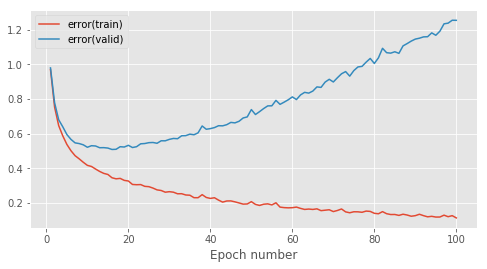

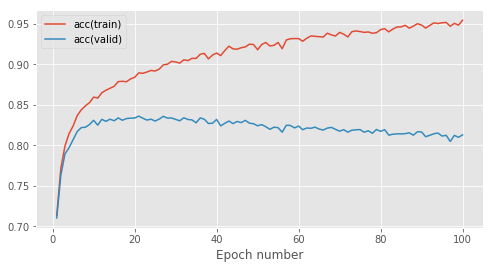

Epoch 1: 3.4s to complete
    error(train)=1.18e+00, acc(train)=6.68e-01, error(valid)=1.18e+00, acc(valid)=6.64e-01


Epoch 2: 3.7s to complete
    error(train)=9.53e-01, acc(train)=7.22e-01, error(valid)=9.63e-01, acc(valid)=7.19e-01


Epoch 3: 3.8s to complete
    error(train)=8.32e-01, acc(train)=7.52e-01, error(valid)=8.49e-01, acc(valid)=7.49e-01


Epoch 4: 3.7s to complete
    error(train)=7.44e-01, acc(train)=7.75e-01, error(valid)=7.66e-01, acc(valid)=7.70e-01


Epoch 5: 3.8s to complete
    error(train)=6.82e-01, acc(train)=7.93e-01, error(valid)=7.10e-01, acc(valid)=7.88e-01


Epoch 6: 3.7s to complete
    error(train)=6.31e-01, acc(train)=8.05e-01, error(valid)=6.66e-01, acc(valid)=7.97e-01


Epoch 7: 3.7s to complete
    error(train)=6.04e-01, acc(train)=8.11e-01, error(valid)=6.48e-01, acc(valid)=8.00e-01


Epoch 8: 3.6s to complete
    error(train)=5.75e-01, acc(train)=8.19e-01, error(valid)=6.21e-01, acc(valid)=8.09e-01


Epoch 9: 3.6s to complete
    error(train)=5.53e-01, acc(train)=8.23e-01, error(valid)=6.05e-01, acc(valid)=8.09e-01


Epoch 10: 3.6s to complete
    error(train)=5.29e-01, acc(train)=8.32e-01, error(valid)=5.89e-01, acc(valid)=8.14e-01


Epoch 11: 3.9s to complete
    error(train)=5.23e-01, acc(train)=8.31e-01, error(valid)=5.87e-01, acc(valid)=8.12e-01


Epoch 12: 3.6s to complete
    error(train)=5.08e-01, acc(train)=8.35e-01, error(valid)=5.80e-01, acc(valid)=8.15e-01


Epoch 13: 3.7s to complete
    error(train)=4.88e-01, acc(train)=8.42e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01


Epoch 14: 3.9s to complete
    error(train)=4.71e-01, acc(train)=8.45e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


Epoch 15: 3.8s to complete
    error(train)=4.68e-01, acc(train)=8.46e-01, error(valid)=5.56e-01, acc(valid)=8.25e-01


Epoch 16: 4.9s to complete
    error(train)=4.55e-01, acc(train)=8.50e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


Epoch 17: 4.0s to complete
    error(train)=4.41e-01, acc(train)=8.54e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


Epoch 18: 4.1s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


Epoch 19: 4.0s to complete
    error(train)=4.30e-01, acc(train)=8.55e-01, error(valid)=5.42e-01, acc(valid)=8.29e-01


Epoch 20: 3.7s to complete
    error(train)=4.28e-01, acc(train)=8.55e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01


Epoch 21: 3.6s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=5.32e-01, acc(valid)=8.32e-01


Epoch 22: 3.8s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 23: 3.6s to complete
    error(train)=3.95e-01, acc(train)=8.66e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 24: 3.7s to complete
    error(train)=3.84e-01, acc(train)=8.71e-01, error(valid)=5.23e-01, acc(valid)=8.35e-01


Epoch 25: 3.6s to complete
    error(train)=3.80e-01, acc(train)=8.71e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


Epoch 26: 3.8s to complete
    error(train)=3.77e-01, acc(train)=8.72e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


Epoch 27: 3.8s to complete
    error(train)=3.71e-01, acc(train)=8.73e-01, error(valid)=5.30e-01, acc(valid)=8.34e-01


Epoch 28: 3.7s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


Epoch 29: 3.7s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=5.28e-01, acc(valid)=8.34e-01


Epoch 30: 3.7s to complete
    error(train)=3.62e-01, acc(train)=8.74e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


Epoch 31: 3.7s to complete
    error(train)=3.51e-01, acc(train)=8.78e-01, error(valid)=5.27e-01, acc(valid)=8.35e-01


Epoch 32: 3.7s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 33: 4.0s to complete
    error(train)=3.36e-01, acc(train)=8.84e-01, error(valid)=5.26e-01, acc(valid)=8.36e-01


Epoch 34: 4.2s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


Epoch 35: 4.5s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=5.34e-01, acc(valid)=8.33e-01


Epoch 36: 3.9s to complete
    error(train)=3.24e-01, acc(train)=8.87e-01, error(valid)=5.30e-01, acc(valid)=8.37e-01


Epoch 37: 3.9s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=5.22e-01, acc(valid)=8.36e-01


Epoch 38: 3.8s to complete
    error(train)=3.21e-01, acc(train)=8.87e-01, error(valid)=5.39e-01, acc(valid)=8.34e-01


Epoch 39: 4.0s to complete
    error(train)=3.18e-01, acc(train)=8.88e-01, error(valid)=5.41e-01, acc(valid)=8.33e-01


Epoch 40: 3.9s to complete
    error(train)=3.27e-01, acc(train)=8.85e-01, error(valid)=5.55e-01, acc(valid)=8.31e-01


Epoch 41: 4.8s to complete
    error(train)=3.09e-01, acc(train)=8.91e-01, error(valid)=5.45e-01, acc(valid)=8.33e-01


Epoch 42: 4.8s to complete
    error(train)=3.09e-01, acc(train)=8.91e-01, error(valid)=5.46e-01, acc(valid)=8.34e-01


Epoch 43: 4.1s to complete
    error(train)=3.03e-01, acc(train)=8.94e-01, error(valid)=5.47e-01, acc(valid)=8.32e-01


Epoch 44: 3.9s to complete
    error(train)=3.04e-01, acc(train)=8.92e-01, error(valid)=5.50e-01, acc(valid)=8.32e-01


Epoch 45: 3.8s to complete
    error(train)=2.90e-01, acc(train)=8.97e-01, error(valid)=5.44e-01, acc(valid)=8.33e-01


Epoch 46: 3.8s to complete
    error(train)=3.01e-01, acc(train)=8.93e-01, error(valid)=5.60e-01, acc(valid)=8.33e-01


Epoch 47: 3.7s to complete
    error(train)=2.95e-01, acc(train)=8.95e-01, error(valid)=5.63e-01, acc(valid)=8.31e-01


Epoch 48: 3.8s to complete
    error(train)=2.82e-01, acc(train)=9.01e-01, error(valid)=5.50e-01, acc(valid)=8.35e-01


Epoch 49: 3.7s to complete
    error(train)=2.79e-01, acc(train)=9.02e-01, error(valid)=5.56e-01, acc(valid)=8.33e-01


Epoch 50: 3.9s to complete
    error(train)=2.82e-01, acc(train)=8.99e-01, error(valid)=5.62e-01, acc(valid)=8.32e-01


Epoch 51: 3.9s to complete
    error(train)=2.78e-01, acc(train)=9.00e-01, error(valid)=5.63e-01, acc(valid)=8.34e-01


Epoch 52: 3.8s to complete
    error(train)=2.90e-01, acc(train)=8.96e-01, error(valid)=5.83e-01, acc(valid)=8.27e-01


Epoch 53: 3.9s to complete
    error(train)=2.69e-01, acc(train)=9.04e-01, error(valid)=5.72e-01, acc(valid)=8.32e-01


Epoch 54: 3.9s to complete
    error(train)=2.69e-01, acc(train)=9.04e-01, error(valid)=5.75e-01, acc(valid)=8.31e-01


Epoch 55: 3.8s to complete
    error(train)=2.63e-01, acc(train)=9.06e-01, error(valid)=5.71e-01, acc(valid)=8.33e-01


Epoch 56: 4.1s to complete
    error(train)=2.64e-01, acc(train)=9.05e-01, error(valid)=5.79e-01, acc(valid)=8.31e-01


Epoch 57: 4.1s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=5.86e-01, acc(valid)=8.29e-01


Epoch 58: 4.1s to complete
    error(train)=2.55e-01, acc(train)=9.08e-01, error(valid)=5.77e-01, acc(valid)=8.35e-01


Epoch 59: 3.7s to complete
    error(train)=2.53e-01, acc(train)=9.09e-01, error(valid)=5.87e-01, acc(valid)=8.29e-01


Epoch 60: 4.0s to complete
    error(train)=2.59e-01, acc(train)=9.07e-01, error(valid)=6.04e-01, acc(valid)=8.29e-01


Epoch 61: 3.8s to complete
    error(train)=2.57e-01, acc(train)=9.05e-01, error(valid)=6.01e-01, acc(valid)=8.26e-01


Epoch 62: 4.4s to complete
    error(train)=2.48e-01, acc(train)=9.10e-01, error(valid)=5.94e-01, acc(valid)=8.31e-01


Epoch 63: 4.2s to complete
    error(train)=2.45e-01, acc(train)=9.11e-01, error(valid)=5.99e-01, acc(valid)=8.33e-01


Epoch 64: 3.6s to complete
    error(train)=2.52e-01, acc(train)=9.09e-01, error(valid)=6.09e-01, acc(valid)=8.31e-01


Epoch 65: 3.8s to complete
    error(train)=2.41e-01, acc(train)=9.13e-01, error(valid)=6.06e-01, acc(valid)=8.30e-01


Epoch 66: 4.0s to complete
    error(train)=2.37e-01, acc(train)=9.13e-01, error(valid)=6.02e-01, acc(valid)=8.33e-01


Epoch 67: 3.9s to complete
    error(train)=2.51e-01, acc(train)=9.08e-01, error(valid)=6.19e-01, acc(valid)=8.29e-01


Epoch 68: 4.2s to complete
    error(train)=2.34e-01, acc(train)=9.14e-01, error(valid)=6.16e-01, acc(valid)=8.32e-01


Epoch 69: 3.8s to complete
    error(train)=2.33e-01, acc(train)=9.15e-01, error(valid)=6.22e-01, acc(valid)=8.31e-01


Epoch 70: 3.7s to complete
    error(train)=2.32e-01, acc(train)=9.15e-01, error(valid)=6.22e-01, acc(valid)=8.28e-01


Epoch 71: 4.0s to complete
    error(train)=2.26e-01, acc(train)=9.17e-01, error(valid)=6.26e-01, acc(valid)=8.29e-01


Epoch 72: 3.7s to complete
    error(train)=2.29e-01, acc(train)=9.16e-01, error(valid)=6.34e-01, acc(valid)=8.26e-01


Epoch 73: 3.7s to complete
    error(train)=2.25e-01, acc(train)=9.16e-01, error(valid)=6.38e-01, acc(valid)=8.30e-01


Epoch 74: 3.8s to complete
    error(train)=2.22e-01, acc(train)=9.19e-01, error(valid)=6.39e-01, acc(valid)=8.30e-01


Epoch 75: 3.8s to complete
    error(train)=2.22e-01, acc(train)=9.18e-01, error(valid)=6.46e-01, acc(valid)=8.27e-01


Epoch 76: 3.9s to complete
    error(train)=2.16e-01, acc(train)=9.21e-01, error(valid)=6.39e-01, acc(valid)=8.26e-01


Epoch 77: 3.8s to complete
    error(train)=2.17e-01, acc(train)=9.20e-01, error(valid)=6.50e-01, acc(valid)=8.28e-01


Epoch 78: 4.0s to complete
    error(train)=2.20e-01, acc(train)=9.20e-01, error(valid)=6.51e-01, acc(valid)=8.27e-01


Epoch 79: 4.0s to complete
    error(train)=2.13e-01, acc(train)=9.21e-01, error(valid)=6.66e-01, acc(valid)=8.25e-01


Epoch 80: 4.1s to complete
    error(train)=2.12e-01, acc(train)=9.21e-01, error(valid)=6.75e-01, acc(valid)=8.27e-01


Epoch 81: 3.9s to complete
    error(train)=2.18e-01, acc(train)=9.19e-01, error(valid)=6.74e-01, acc(valid)=8.21e-01


Epoch 82: 3.8s to complete
    error(train)=2.09e-01, acc(train)=9.23e-01, error(valid)=6.74e-01, acc(valid)=8.22e-01


Epoch 83: 3.6s to complete
    error(train)=2.06e-01, acc(train)=9.24e-01, error(valid)=6.73e-01, acc(valid)=8.27e-01


Epoch 84: 4.2s to complete
    error(train)=2.09e-01, acc(train)=9.23e-01, error(valid)=6.76e-01, acc(valid)=8.24e-01


Epoch 85: 4.1s to complete
    error(train)=2.06e-01, acc(train)=9.23e-01, error(valid)=6.83e-01, acc(valid)=8.24e-01


Epoch 86: 3.9s to complete
    error(train)=1.99e-01, acc(train)=9.26e-01, error(valid)=6.88e-01, acc(valid)=8.29e-01


Epoch 87: 3.8s to complete
    error(train)=2.02e-01, acc(train)=9.24e-01, error(valid)=6.99e-01, acc(valid)=8.26e-01


Epoch 88: 4.0s to complete
    error(train)=2.02e-01, acc(train)=9.25e-01, error(valid)=7.08e-01, acc(valid)=8.22e-01


Epoch 89: 4.1s to complete
    error(train)=1.97e-01, acc(train)=9.27e-01, error(valid)=7.04e-01, acc(valid)=8.21e-01


Epoch 90: 4.2s to complete
    error(train)=2.00e-01, acc(train)=9.26e-01, error(valid)=7.09e-01, acc(valid)=8.21e-01


Epoch 91: 4.5s to complete
    error(train)=1.86e-01, acc(train)=9.32e-01, error(valid)=7.01e-01, acc(valid)=8.29e-01


Epoch 92: 4.7s to complete
    error(train)=1.93e-01, acc(train)=9.27e-01, error(valid)=7.09e-01, acc(valid)=8.23e-01


Epoch 93: 4.6s to complete
    error(train)=1.93e-01, acc(train)=9.27e-01, error(valid)=7.23e-01, acc(valid)=8.22e-01


Epoch 94: 4.2s to complete
    error(train)=1.87e-01, acc(train)=9.31e-01, error(valid)=7.27e-01, acc(valid)=8.21e-01


Epoch 95: 3.9s to complete
    error(train)=1.84e-01, acc(train)=9.32e-01, error(valid)=7.39e-01, acc(valid)=8.21e-01


Epoch 96: 3.8s to complete
    error(train)=1.82e-01, acc(train)=9.33e-01, error(valid)=7.30e-01, acc(valid)=8.25e-01


Epoch 97: 3.9s to complete
    error(train)=1.89e-01, acc(train)=9.29e-01, error(valid)=7.40e-01, acc(valid)=8.25e-01


Epoch 98: 3.6s to complete
    error(train)=1.88e-01, acc(train)=9.29e-01, error(valid)=7.41e-01, acc(valid)=8.24e-01


Epoch 99: 3.8s to complete
    error(train)=1.82e-01, acc(train)=9.31e-01, error(valid)=7.57e-01, acc(valid)=8.21e-01


Epoch 100: 3.7s to complete
    error(train)=1.88e-01, acc(train)=9.30e-01, error(valid)=7.64e-01, acc(valid)=8.20e-01


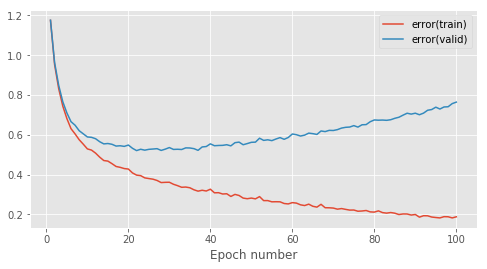

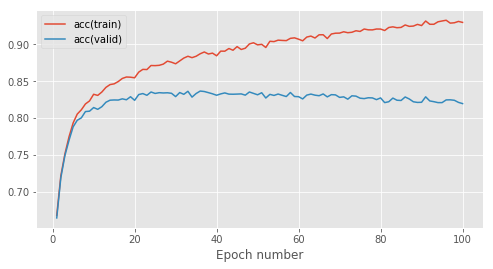

Epoch 1: 3.7s to complete
    error(train)=1.44e+00, acc(train)=6.05e-01, error(valid)=1.45e+00, acc(valid)=6.04e-01


Epoch 2: 3.7s to complete
    error(train)=1.20e+00, acc(train)=6.63e-01, error(valid)=1.20e+00, acc(valid)=6.62e-01


Epoch 3: 3.5s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.09e+00, acc(valid)=6.91e-01


Epoch 4: 3.6s to complete
    error(train)=9.95e-01, acc(train)=7.14e-01, error(valid)=1.00e+00, acc(valid)=7.10e-01


Epoch 5: 3.7s to complete
    error(train)=9.23e-01, acc(train)=7.32e-01, error(valid)=9.31e-01, acc(valid)=7.27e-01


Epoch 6: 4.1s to complete
    error(train)=8.66e-01, acc(train)=7.46e-01, error(valid)=8.79e-01, acc(valid)=7.41e-01


Epoch 7: 3.7s to complete
    error(train)=8.15e-01, acc(train)=7.58e-01, error(valid)=8.30e-01, acc(valid)=7.53e-01


Epoch 8: 3.6s to complete
    error(train)=7.75e-01, acc(train)=7.68e-01, error(valid)=7.91e-01, acc(valid)=7.64e-01


Epoch 9: 3.6s to complete
    error(train)=7.38e-01, acc(train)=7.78e-01, error(valid)=7.58e-01, acc(valid)=7.70e-01


Epoch 10: 3.6s to complete
    error(train)=7.13e-01, acc(train)=7.83e-01, error(valid)=7.36e-01, acc(valid)=7.77e-01


Epoch 11: 3.7s to complete
    error(train)=6.86e-01, acc(train)=7.91e-01, error(valid)=7.11e-01, acc(valid)=7.83e-01


Epoch 12: 4.3s to complete
    error(train)=6.66e-01, acc(train)=7.96e-01, error(valid)=6.94e-01, acc(valid)=7.88e-01


Epoch 13: 4.0s to complete
    error(train)=6.45e-01, acc(train)=8.02e-01, error(valid)=6.79e-01, acc(valid)=7.91e-01


Epoch 14: 4.0s to complete
    error(train)=6.32e-01, acc(train)=8.05e-01, error(valid)=6.68e-01, acc(valid)=7.96e-01


Epoch 15: 3.8s to complete
    error(train)=6.10e-01, acc(train)=8.12e-01, error(valid)=6.48e-01, acc(valid)=8.01e-01


Epoch 16: 3.7s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=6.38e-01, acc(valid)=8.04e-01


Epoch 17: 3.8s to complete
    error(train)=5.88e-01, acc(train)=8.16e-01, error(valid)=6.31e-01, acc(valid)=8.04e-01


Epoch 18: 3.8s to complete
    error(train)=5.73e-01, acc(train)=8.21e-01, error(valid)=6.17e-01, acc(valid)=8.08e-01


Epoch 19: 3.8s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=6.15e-01, acc(valid)=8.07e-01


Epoch 20: 3.7s to complete
    error(train)=5.58e-01, acc(train)=8.23e-01, error(valid)=6.09e-01, acc(valid)=8.09e-01


Epoch 21: 3.7s to complete
    error(train)=5.44e-01, acc(train)=8.28e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


Epoch 22: 3.8s to complete
    error(train)=5.38e-01, acc(train)=8.31e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


Epoch 23: 3.6s to complete
    error(train)=5.31e-01, acc(train)=8.32e-01, error(valid)=5.90e-01, acc(valid)=8.15e-01


Epoch 24: 3.9s to complete
    error(train)=5.26e-01, acc(train)=8.32e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


Epoch 25: 4.1s to complete
    error(train)=5.18e-01, acc(train)=8.35e-01, error(valid)=5.82e-01, acc(valid)=8.18e-01


Epoch 26: 3.9s to complete
    error(train)=5.10e-01, acc(train)=8.36e-01, error(valid)=5.76e-01, acc(valid)=8.18e-01


Epoch 27: 3.7s to complete
    error(train)=5.03e-01, acc(train)=8.39e-01, error(valid)=5.70e-01, acc(valid)=8.20e-01


Epoch 28: 3.9s to complete
    error(train)=4.97e-01, acc(train)=8.40e-01, error(valid)=5.69e-01, acc(valid)=8.17e-01


Epoch 29: 3.9s to complete
    error(train)=4.89e-01, acc(train)=8.43e-01, error(valid)=5.64e-01, acc(valid)=8.21e-01


Epoch 30: 3.8s to complete
    error(train)=4.87e-01, acc(train)=8.42e-01, error(valid)=5.63e-01, acc(valid)=8.18e-01


Epoch 31: 3.8s to complete
    error(train)=4.77e-01, acc(train)=8.46e-01, error(valid)=5.57e-01, acc(valid)=8.20e-01


Epoch 32: 3.9s to complete
    error(train)=4.76e-01, acc(train)=8.45e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


Epoch 33: 4.2s to complete
    error(train)=4.69e-01, acc(train)=8.48e-01, error(valid)=5.53e-01, acc(valid)=8.25e-01


Epoch 34: 3.8s to complete
    error(train)=4.64e-01, acc(train)=8.49e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


Epoch 35: 4.0s to complete
    error(train)=4.61e-01, acc(train)=8.49e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


Epoch 36: 3.8s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.44e-01, acc(valid)=8.23e-01


Epoch 37: 3.6s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.45e-01, acc(valid)=8.23e-01


Epoch 38: 3.7s to complete
    error(train)=4.44e-01, acc(train)=8.56e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


Epoch 39: 3.8s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 40: 3.9s to complete
    error(train)=4.38e-01, acc(train)=8.56e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 41: 3.9s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.38e-01, acc(valid)=8.26e-01


Epoch 42: 3.8s to complete
    error(train)=4.33e-01, acc(train)=8.57e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 43: 3.9s to complete
    error(train)=4.26e-01, acc(train)=8.60e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 44: 3.9s to complete
    error(train)=4.25e-01, acc(train)=8.58e-01, error(valid)=5.32e-01, acc(valid)=8.27e-01


Epoch 45: 3.7s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.30e-01, acc(valid)=8.29e-01


Epoch 46: 3.7s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


Epoch 47: 3.8s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


Epoch 48: 3.9s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 49: 3.8s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 50: 3.6s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


Epoch 51: 3.7s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


Epoch 52: 4.2s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.20e-01, acc(valid)=8.30e-01


Epoch 53: 4.0s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01


Epoch 54: 3.9s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 55: 4.1s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=5.27e-01, acc(valid)=8.28e-01


Epoch 56: 4.1s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 57: 3.9s to complete
    error(train)=3.86e-01, acc(train)=8.70e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 58: 4.3s to complete
    error(train)=3.84e-01, acc(train)=8.70e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 59: 3.8s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 60: 3.8s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


Epoch 61: 4.4s to complete
    error(train)=3.74e-01, acc(train)=8.74e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 62: 4.0s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


Epoch 63: 3.7s to complete
    error(train)=3.72e-01, acc(train)=8.75e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 64: 4.0s to complete
    error(train)=3.70e-01, acc(train)=8.76e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


Epoch 65: 3.9s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


Epoch 66: 3.9s to complete
    error(train)=3.64e-01, acc(train)=8.78e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 67: 3.7s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 68: 3.8s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 69: 3.9s to complete
    error(train)=3.56e-01, acc(train)=8.79e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


Epoch 70: 3.8s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 71: 4.2s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 72: 4.2s to complete
    error(train)=3.53e-01, acc(train)=8.81e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 73: 3.8s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


Epoch 74: 3.5s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=5.16e-01, acc(valid)=8.37e-01


Epoch 75: 3.8s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


Epoch 76: 4.2s to complete
    error(train)=3.45e-01, acc(train)=8.83e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 77: 4.2s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 78: 4.3s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 79: 3.9s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 80: 3.6s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 81: 3.6s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


Epoch 82: 3.9s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


Epoch 83: 3.8s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 84: 4.3s to complete
    error(train)=3.30e-01, acc(train)=8.88e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


Epoch 85: 4.2s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.21e-01, acc(valid)=8.35e-01


Epoch 86: 3.8s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=5.15e-01, acc(valid)=8.38e-01


Epoch 87: 3.8s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 88: 3.8s to complete
    error(train)=3.23e-01, acc(train)=8.90e-01, error(valid)=5.16e-01, acc(valid)=8.38e-01


Epoch 89: 4.4s to complete
    error(train)=3.24e-01, acc(train)=8.89e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


Epoch 90: 3.9s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


Epoch 91: 3.7s to complete
    error(train)=3.23e-01, acc(train)=8.88e-01, error(valid)=5.23e-01, acc(valid)=8.35e-01


Epoch 92: 3.9s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


Epoch 93: 4.1s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


Epoch 94: 3.6s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.21e-01, acc(valid)=8.36e-01


Epoch 95: 3.9s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


Epoch 96: 4.0s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 97: 3.8s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 98: 3.6s to complete
    error(train)=3.13e-01, acc(train)=8.91e-01, error(valid)=5.28e-01, acc(valid)=8.33e-01


Epoch 99: 3.8s to complete
    error(train)=3.08e-01, acc(train)=8.94e-01, error(valid)=5.24e-01, acc(valid)=8.36e-01


Epoch 100: 4.3s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01


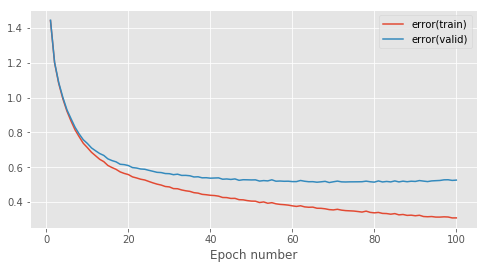

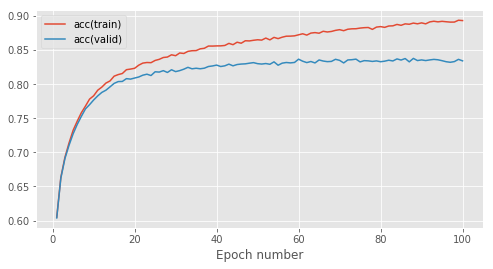

Epoch 1: 4.0s to complete
    error(train)=1.99e+00, acc(train)=4.88e-01, error(valid)=1.99e+00, acc(valid)=4.91e-01


Epoch 2: 4.0s to complete
    error(train)=1.46e+00, acc(train)=5.98e-01, error(valid)=1.46e+00, acc(valid)=6.00e-01


Epoch 3: 3.8s to complete
    error(train)=1.30e+00, acc(train)=6.35e-01, error(valid)=1.30e+00, acc(valid)=6.37e-01


Epoch 4: 3.8s to complete
    error(train)=1.21e+00, acc(train)=6.59e-01, error(valid)=1.21e+00, acc(valid)=6.59e-01


Epoch 5: 4.6s to complete
    error(train)=1.14e+00, acc(train)=6.77e-01, error(valid)=1.15e+00, acc(valid)=6.77e-01


Epoch 6: 3.5s to complete
    error(train)=1.08e+00, acc(train)=6.92e-01, error(valid)=1.09e+00, acc(valid)=6.92e-01


Epoch 7: 3.6s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=7.01e-01


Epoch 8: 4.2s to complete
    error(train)=9.95e-01, acc(train)=7.14e-01, error(valid)=1.01e+00, acc(valid)=7.09e-01


Epoch 9: 3.8s to complete
    error(train)=9.60e-01, acc(train)=7.23e-01, error(valid)=9.74e-01, acc(valid)=7.21e-01


Epoch 10: 3.7s to complete
    error(train)=9.31e-01, acc(train)=7.30e-01, error(valid)=9.45e-01, acc(valid)=7.26e-01


Epoch 11: 3.8s to complete
    error(train)=9.02e-01, acc(train)=7.37e-01, error(valid)=9.19e-01, acc(valid)=7.35e-01


Epoch 12: 3.5s to complete
    error(train)=8.74e-01, acc(train)=7.46e-01, error(valid)=8.93e-01, acc(valid)=7.41e-01


Epoch 13: 3.8s to complete
    error(train)=8.51e-01, acc(train)=7.51e-01, error(valid)=8.72e-01, acc(valid)=7.44e-01


Epoch 14: 3.9s to complete
    error(train)=8.30e-01, acc(train)=7.56e-01, error(valid)=8.53e-01, acc(valid)=7.51e-01


Epoch 15: 4.5s to complete
    error(train)=8.09e-01, acc(train)=7.61e-01, error(valid)=8.31e-01, acc(valid)=7.56e-01


Epoch 16: 4.6s to complete
    error(train)=7.89e-01, acc(train)=7.67e-01, error(valid)=8.13e-01, acc(valid)=7.60e-01


Epoch 17: 4.5s to complete
    error(train)=7.74e-01, acc(train)=7.70e-01, error(valid)=7.99e-01, acc(valid)=7.64e-01


Epoch 18: 4.3s to complete
    error(train)=7.59e-01, acc(train)=7.74e-01, error(valid)=7.86e-01, acc(valid)=7.66e-01


Epoch 19: 4.0s to complete
    error(train)=7.43e-01, acc(train)=7.78e-01, error(valid)=7.71e-01, acc(valid)=7.71e-01


Epoch 20: 3.9s to complete
    error(train)=7.32e-01, acc(train)=7.81e-01, error(valid)=7.61e-01, acc(valid)=7.74e-01


Epoch 21: 3.8s to complete
    error(train)=7.15e-01, acc(train)=7.85e-01, error(valid)=7.45e-01, acc(valid)=7.78e-01


Epoch 22: 4.0s to complete
    error(train)=7.05e-01, acc(train)=7.88e-01, error(valid)=7.35e-01, acc(valid)=7.81e-01


Epoch 23: 4.3s to complete
    error(train)=6.95e-01, acc(train)=7.90e-01, error(valid)=7.28e-01, acc(valid)=7.81e-01


Epoch 24: 4.7s to complete
    error(train)=6.85e-01, acc(train)=7.91e-01, error(valid)=7.20e-01, acc(valid)=7.80e-01


Epoch 25: 4.6s to complete
    error(train)=6.73e-01, acc(train)=7.95e-01, error(valid)=7.10e-01, acc(valid)=7.85e-01


Epoch 26: 4.1s to complete
    error(train)=6.62e-01, acc(train)=7.98e-01, error(valid)=7.00e-01, acc(valid)=7.87e-01


Epoch 27: 4.1s to complete
    error(train)=6.53e-01, acc(train)=8.00e-01, error(valid)=6.90e-01, acc(valid)=7.90e-01


Epoch 28: 4.1s to complete
    error(train)=6.45e-01, acc(train)=8.03e-01, error(valid)=6.85e-01, acc(valid)=7.93e-01


Epoch 29: 4.0s to complete
    error(train)=6.35e-01, acc(train)=8.05e-01, error(valid)=6.76e-01, acc(valid)=7.93e-01


Epoch 30: 4.0s to complete
    error(train)=6.30e-01, acc(train)=8.07e-01, error(valid)=6.72e-01, acc(valid)=7.94e-01


Epoch 31: 2.2s to complete
    error(train)=6.19e-01, acc(train)=8.10e-01, error(valid)=6.62e-01, acc(valid)=7.96e-01


Epoch 32: 2.3s to complete
    error(train)=6.12e-01, acc(train)=8.11e-01, error(valid)=6.57e-01, acc(valid)=7.97e-01


Epoch 33: 2.3s to complete
    error(train)=6.07e-01, acc(train)=8.13e-01, error(valid)=6.54e-01, acc(valid)=7.99e-01


Epoch 34: 2.2s to complete
    error(train)=6.00e-01, acc(train)=8.15e-01, error(valid)=6.47e-01, acc(valid)=7.99e-01


Epoch 35: 2.1s to complete
    error(train)=5.94e-01, acc(train)=8.17e-01, error(valid)=6.43e-01, acc(valid)=8.00e-01


Epoch 36: 2.2s to complete
    error(train)=5.86e-01, acc(train)=8.18e-01, error(valid)=6.36e-01, acc(valid)=8.03e-01


Epoch 37: 2.2s to complete
    error(train)=5.83e-01, acc(train)=8.19e-01, error(valid)=6.34e-01, acc(valid)=8.03e-01


Epoch 38: 2.2s to complete
    error(train)=5.77e-01, acc(train)=8.20e-01, error(valid)=6.28e-01, acc(valid)=8.06e-01


Epoch 39: 2.2s to complete
    error(train)=5.69e-01, acc(train)=8.23e-01, error(valid)=6.22e-01, acc(valid)=8.07e-01


Epoch 40: 2.3s to complete
    error(train)=5.63e-01, acc(train)=8.25e-01, error(valid)=6.18e-01, acc(valid)=8.07e-01


Epoch 41: 2.1s to complete
    error(train)=5.61e-01, acc(train)=8.25e-01, error(valid)=6.16e-01, acc(valid)=8.07e-01


Epoch 42: 2.3s to complete
    error(train)=5.56e-01, acc(train)=8.27e-01, error(valid)=6.11e-01, acc(valid)=8.10e-01


Epoch 43: 2.2s to complete
    error(train)=5.50e-01, acc(train)=8.27e-01, error(valid)=6.09e-01, acc(valid)=8.10e-01


Epoch 44: 2.1s to complete
    error(train)=5.47e-01, acc(train)=8.29e-01, error(valid)=6.08e-01, acc(valid)=8.10e-01


Epoch 45: 2.2s to complete
    error(train)=5.41e-01, acc(train)=8.30e-01, error(valid)=6.02e-01, acc(valid)=8.12e-01


Epoch 46: 2.2s to complete
    error(train)=5.37e-01, acc(train)=8.31e-01, error(valid)=5.99e-01, acc(valid)=8.12e-01


Epoch 47: 2.3s to complete
    error(train)=5.33e-01, acc(train)=8.31e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


Epoch 48: 2.4s to complete
    error(train)=5.29e-01, acc(train)=8.34e-01, error(valid)=5.93e-01, acc(valid)=8.14e-01


Epoch 49: 2.3s to complete
    error(train)=5.24e-01, acc(train)=8.34e-01, error(valid)=5.90e-01, acc(valid)=8.14e-01


Epoch 50: 2.2s to complete
    error(train)=5.23e-01, acc(train)=8.34e-01, error(valid)=5.88e-01, acc(valid)=8.13e-01


Epoch 51: 2.2s to complete
    error(train)=5.18e-01, acc(train)=8.36e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


Epoch 52: 2.4s to complete
    error(train)=5.14e-01, acc(train)=8.37e-01, error(valid)=5.83e-01, acc(valid)=8.15e-01


Epoch 53: 2.3s to complete
    error(train)=5.10e-01, acc(train)=8.38e-01, error(valid)=5.80e-01, acc(valid)=8.15e-01


Epoch 54: 2.2s to complete
    error(train)=5.08e-01, acc(train)=8.39e-01, error(valid)=5.78e-01, acc(valid)=8.17e-01


Epoch 55: 2.3s to complete
    error(train)=5.03e-01, acc(train)=8.39e-01, error(valid)=5.75e-01, acc(valid)=8.19e-01


Epoch 56: 2.2s to complete
    error(train)=5.02e-01, acc(train)=8.39e-01, error(valid)=5.75e-01, acc(valid)=8.17e-01


Epoch 57: 2.2s to complete
    error(train)=4.99e-01, acc(train)=8.40e-01, error(valid)=5.74e-01, acc(valid)=8.17e-01


Epoch 58: 2.1s to complete
    error(train)=4.94e-01, acc(train)=8.42e-01, error(valid)=5.69e-01, acc(valid)=8.21e-01


Epoch 59: 2.5s to complete
    error(train)=4.94e-01, acc(train)=8.43e-01, error(valid)=5.71e-01, acc(valid)=8.20e-01


Epoch 60: 2.2s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


Epoch 61: 2.2s to complete
    error(train)=4.85e-01, acc(train)=8.45e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01


Epoch 62: 2.1s to complete
    error(train)=4.84e-01, acc(train)=8.44e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


Epoch 63: 2.2s to complete
    error(train)=4.80e-01, acc(train)=8.46e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


Epoch 64: 2.1s to complete
    error(train)=4.79e-01, acc(train)=8.45e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


Epoch 65: 2.1s to complete
    error(train)=4.76e-01, acc(train)=8.46e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 66: 2.3s to complete
    error(train)=4.74e-01, acc(train)=8.46e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


Epoch 67: 2.1s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.57e-01, acc(valid)=8.22e-01


Epoch 68: 2.3s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.57e-01, acc(valid)=8.22e-01


Epoch 69: 2.1s to complete
    error(train)=4.66e-01, acc(train)=8.50e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


Epoch 70: 2.1s to complete
    error(train)=4.62e-01, acc(train)=8.51e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


Epoch 71: 2.1s to complete
    error(train)=4.62e-01, acc(train)=8.51e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 72: 2.1s to complete
    error(train)=4.61e-01, acc(train)=8.50e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


Epoch 73: 2.1s to complete
    error(train)=4.57e-01, acc(train)=8.52e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 74: 2.2s to complete
    error(train)=4.54e-01, acc(train)=8.53e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


Epoch 75: 2.1s to complete
    error(train)=4.53e-01, acc(train)=8.53e-01, error(valid)=5.47e-01, acc(valid)=8.26e-01


Epoch 76: 2.1s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 77: 2.2s to complete
    error(train)=4.47e-01, acc(train)=8.54e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


Epoch 78: 2.3s to complete
    error(train)=4.46e-01, acc(train)=8.54e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


Epoch 79: 2.1s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


Epoch 80: 2.3s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.40e-01, acc(valid)=8.26e-01


Epoch 81: 2.2s to complete
    error(train)=4.41e-01, acc(train)=8.57e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


Epoch 82: 2.3s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


Epoch 83: 2.2s to complete
    error(train)=4.35e-01, acc(train)=8.58e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


Epoch 84: 2.2s to complete
    error(train)=4.36e-01, acc(train)=8.57e-01, error(valid)=5.38e-01, acc(valid)=8.26e-01


Epoch 85: 2.2s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 86: 2.2s to complete
    error(train)=4.31e-01, acc(train)=8.59e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


Epoch 87: 2.2s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


Epoch 88: 2.2s to complete
    error(train)=4.25e-01, acc(train)=8.61e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


Epoch 89: 2.3s to complete
    error(train)=4.24e-01, acc(train)=8.61e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 90: 2.2s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.32e-01, acc(valid)=8.29e-01


Epoch 91: 2.2s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


Epoch 92: 2.2s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 93: 2.1s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 94: 2.1s to complete
    error(train)=4.15e-01, acc(train)=8.64e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


Epoch 95: 2.1s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


Epoch 96: 2.1s to complete
    error(train)=4.12e-01, acc(train)=8.64e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


Epoch 97: 2.2s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


Epoch 98: 2.1s to complete
    error(train)=4.10e-01, acc(train)=8.65e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


Epoch 99: 2.1s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


Epoch 100: 2.2s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


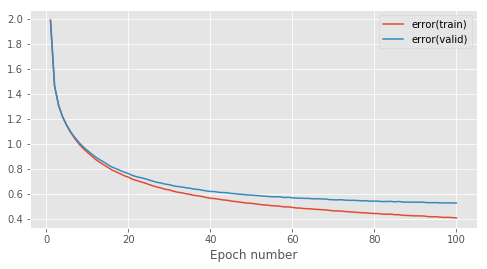

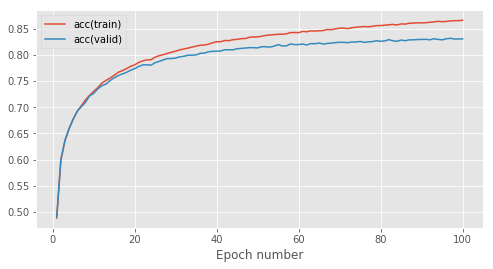

In [31]:
num_epochs = 100
Adam_learning_rates = [0.001, 0.0005, 0.00025, 0.0001, 0.00005]
B1 = [0.75, 0.9, 0.5, 0.5, 0.95]
B2 = [0.999, 0.94, 0.94, 0.999 , 0.999]
Adam_models = OrderedDict()
Adam_stats = OrderedDict()
final_train_errors = []
final_valid_errors = []
final_train_accs = []
final_valid_accs = []


for learning_rate,  beta_1, beta_2 in zip(Adam_learning_rates, B1, B2):
    layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
                      ReluLayer(),
                      AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
                      ReluLayer(),
                      AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
                      ReluLayer(),
                      AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]
        
    model = MultipleLayerModel(layers)
        
    learning_rule = AdamLearningRule(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2)
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
                model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    plt.show()
        
    Adam_models[(learning_rate, beta_1, beta_2)] = model
    Adam_stats[(learning_rate, beta_1, beta_2)] = stats
        
    final_train_errors.append(stats[-1, keys['error(train)']])
    final_valid_errors.append(stats[-1, keys['error(valid)']])
    final_train_accs.append(stats[-1, keys['acc(train)']])
    final_valid_accs.append(stats[-1, keys['acc(valid)']])

In [33]:
print('| learning_rate | beta_1, beta_2 | ith epoch  | best valid error | best valid acc |')
print('|---------------|----------------|------------|------------------|----------------|')
for learning_rate, num_epochs, beta_1, beta_2 in zip(Adam_learning_rates, epochs, B1, B2):
            stats = Adam_stats[(learning_rate, beta_1, beta_2)]
            print('| {0:.5f}       | {1:.2f}, {2:.3f}    | {3:2d}         | {4:.3e}        | {5:.3f}          |'
                    .format(learning_rate, beta_1, beta_2, np.argmax(stats[1:, -1]),
                            stats[1:, -2][np.argmax(stats[1:, -1])], np.max(stats[1:, -1]) *100))

| learning_rate | beta_1, beta_2 | ith epoch  | best valid error | best valid acc |
|---------------|----------------|------------|------------------|----------------|
| 0.00100       | 0.75, 0.999    | 20         | 5.435e-01        | 83.848          |
| 0.00050       | 0.90, 0.940    | 20         | 5.198e-01        | 83.627          |
| 0.00025       | 0.50, 0.940    | 35         | 5.305e-01        | 83.665          |
| 0.00010       | 0.50, 0.999    | 87         | 5.164e-01        | 83.778          |
| 0.00005       | 0.95, 0.999    | 96         | 5.256e-01        | 83.165          |


lr:1.00e-03, num:30, beta_1:0.75, beta_2:1.00


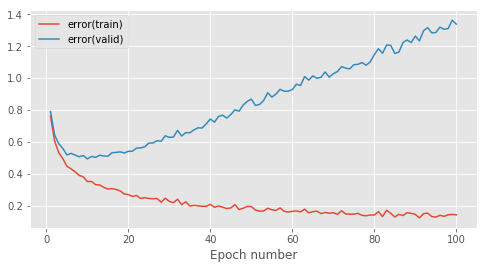

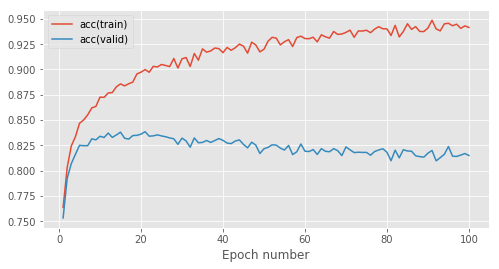

lr:5.00e-04, num:30, beta_1:0.90, beta_2:0.94


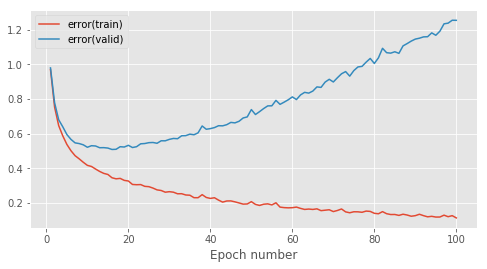

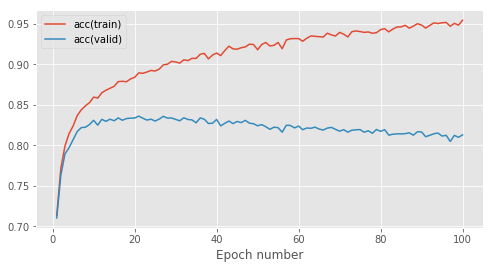

lr:2.50e-04, num:60, beta_1:0.50, beta_2:0.94


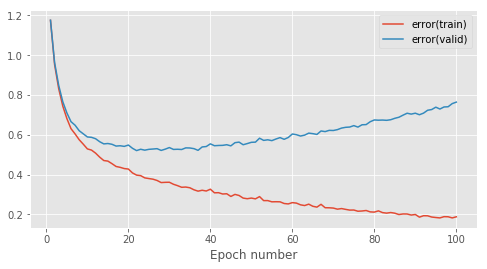

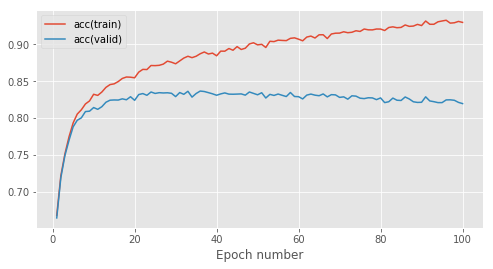

lr:1.00e-04, num:100, beta_1:0.50, beta_2:1.00


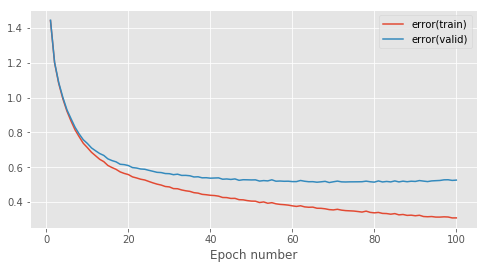

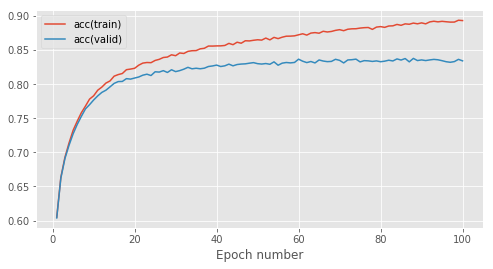

lr:5.00e-05, num:100, beta_1:0.95, beta_2:1.00


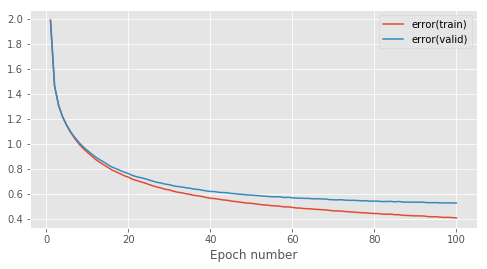

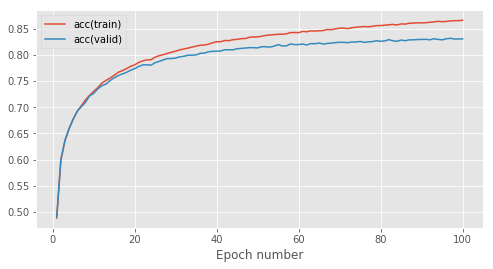

In [34]:
for learning_rate, num_epochs, beta_1, beta_2 in zip(Adam_learning_rates, epochs, B1, B2):
        print('lr:{0:.2e}, num:{1}, beta_1:{2:.2f}, beta_2:{3:.2f}'
              .format(learning_rate, num_epochs, beta_1, beta_2))
        stats = Adam_stats[(learning_rate, beta_1, beta_2)]
        
        fig_1 = plt.figure(figsize=(8, 4))
        ax_1 = fig_1.add_subplot(111)
        for k in ['error(train)', 'error(valid)']:
            ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      stats[1:, keys[k]], label=k)
        ax_1.legend(loc=0)
        ax_1.set_xlabel('Epoch number')

        # Plot the change in the validation and training set accuracy over training.
        fig_2 = plt.figure(figsize=(8, 4))
        ax_2 = fig_2.add_subplot(111)
        for k in ['acc(train)', 'acc(valid)']:
            ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      stats[1:, keys[k]], label=k)
        ax_2.legend(loc=0)
        ax_2.set_xlabel('Epoch number')
        
        plt.show()

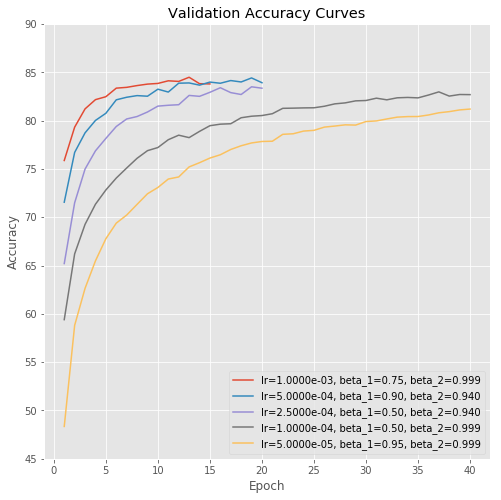

In [24]:
# plot validation acc
plt.figure(figsize=(8,8))

labels = []
for learning_rate, num_epochs, beta_1, beta_2 in zip(Adam_learning_rates, epochs, B1, B2):
            labels.append('lr={0:.4e}, beta_1={1:.2f}, beta_2={2:.3f}'
                          .format(learning_rate, beta_1, beta_2))
i = 0
for learning_rate, num_epochs, beta_1, beta_2 in zip(Adam_learning_rates, epochs, B1, B2):
            stats = adam_stats[(learning_rate, beta_1, beta_2)]
            plt.plot(np.arange(1, stats.shape[0]) * stats_interval, stats[1:, -1] * 100, label=labels[i])
            i+=1
plt.ylim((45, 90))
plt.legend(loc=0)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Validation Accuracy Curves')
plt.show()

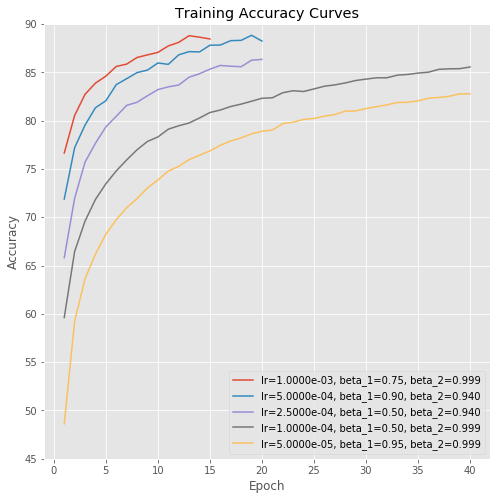

In [26]:
# plot train acc
plt.figure(figsize=(8,8))

labels = []
for learning_rate, num_epochs, beta_1, beta_2 in zip(Adam_learning_rates, epochs, B1, B2):
            labels.append('lr={0:.4e}, beta_1={1:.2f}, beta_2={2:.3f}'
                          .format(learning_rate, beta_1, beta_2))
i = 0
for learning_rate, num_epochs, beta_1, beta_2 in zip(Adam_learning_rates, epochs, B1, B2):
            stats = adam_stats[(learning_rate, beta_1, beta_2)]
            plt.plot(np.arange(1, stats.shape[0]) * stats_interval, stats[1:, 1] * 100, label=labels[i])
            i+=1
plt.ylim((45, 90))
plt.legend(loc=0)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training Accuracy Curves')
plt.show()

In [ ]:
0.0001  0.5  0.999  58

In [ ]:
indices = []
for idx in indices:
    model = list(models.values())[idx]
    acc = evaluation_acc(test_data, model)
    test_accs.append(acc)

In [ ]:
print('| num_hidden_layers | final test acc |')
print('|-------------------|----------------|')
for i,num in enumerate(num_hidden_layers):
    print('| {0:d}                 | {1:3f}       |'
            .format(num, test_accs[i]))

## RMSProp

Initial Experiments

Epoch 1: 5.5s to complete
    error(train)=7.52e-01, acc(train)=7.63e-01, error(valid)=7.88e-01, acc(valid)=7.53e-01


Epoch 2: 5.4s to complete
    error(train)=6.25e-01, acc(train)=7.92e-01, error(valid)=6.81e-01, acc(valid)=7.80e-01


Epoch 3: 6.3s to complete
    error(train)=6.10e-01, acc(train)=8.05e-01, error(valid)=6.93e-01, acc(valid)=7.88e-01


Epoch 4: 6.3s to complete
    error(train)=6.62e-01, acc(train)=7.99e-01, error(valid)=7.79e-01, acc(valid)=7.87e-01


Epoch 5: 6.2s to complete
    error(train)=6.76e-01, acc(train)=7.96e-01, error(valid)=8.01e-01, acc(valid)=7.82e-01


Epoch 6: 6.6s to complete
    error(train)=6.46e-01, acc(train)=8.02e-01, error(valid)=7.61e-01, acc(valid)=7.82e-01


Epoch 7: 5.4s to complete
    error(train)=7.76e-01, acc(train)=7.83e-01, error(valid)=9.22e-01, acc(valid)=7.68e-01


Epoch 8: 5.9s to complete
    error(train)=7.99e-01, acc(train)=7.72e-01, error(valid)=9.49e-01, acc(valid)=7.55e-01


Epoch 9: 5.8s to complete
    error(train)=7.19e-01, acc(train)=7.81e-01, error(valid)=8.72e-01, acc(valid)=7.63e-01


Epoch 10: 5.1s to complete
    error(train)=9.38e-01, acc(train)=7.41e-01, error(valid)=1.12e+00, acc(valid)=7.18e-01


Epoch 11: 6.1s to complete
    error(train)=8.49e-01, acc(train)=7.72e-01, error(valid)=1.07e+00, acc(valid)=7.57e-01


Epoch 12: 4.5s to complete
    error(train)=9.60e-01, acc(train)=7.62e-01, error(valid)=1.17e+00, acc(valid)=7.44e-01


Epoch 13: 5.3s to complete
    error(train)=8.77e-01, acc(train)=7.37e-01, error(valid)=1.04e+00, acc(valid)=7.19e-01


Epoch 14: 5.5s to complete
    error(train)=9.43e-01, acc(train)=7.33e-01, error(valid)=1.11e+00, acc(valid)=7.17e-01


Epoch 15: 5.4s to complete
    error(train)=9.85e-01, acc(train)=7.20e-01, error(valid)=1.18e+00, acc(valid)=7.01e-01


Epoch 16: 4.5s to complete
    error(train)=1.01e+00, acc(train)=7.35e-01, error(valid)=1.26e+00, acc(valid)=7.18e-01


Epoch 17: 4.8s to complete
    error(train)=9.18e-01, acc(train)=7.62e-01, error(valid)=1.24e+00, acc(valid)=7.40e-01


Epoch 18: 5.5s to complete
    error(train)=1.15e+00, acc(train)=7.39e-01, error(valid)=1.44e+00, acc(valid)=7.20e-01


Epoch 19: 5.0s to complete
    error(train)=8.92e-01, acc(train)=7.51e-01, error(valid)=1.12e+00, acc(valid)=7.31e-01


Epoch 20: 6.0s to complete
    error(train)=1.16e+00, acc(train)=6.92e-01, error(valid)=1.39e+00, acc(valid)=6.76e-01


Epoch 21: 5.2s to complete
    error(train)=9.90e-01, acc(train)=7.37e-01, error(valid)=1.23e+00, acc(valid)=7.16e-01


Epoch 22: 5.4s to complete
    error(train)=1.21e+00, acc(train)=7.27e-01, error(valid)=1.50e+00, acc(valid)=7.10e-01


Epoch 23: 6.6s to complete
    error(train)=1.38e+00, acc(train)=6.88e-01, error(valid)=1.67e+00, acc(valid)=6.72e-01


Epoch 24: 6.2s to complete
    error(train)=1.50e+00, acc(train)=7.04e-01, error(valid)=1.83e+00, acc(valid)=6.88e-01


Epoch 25: 6.4s to complete
    error(train)=1.26e+00, acc(train)=7.32e-01, error(valid)=1.68e+00, acc(valid)=7.08e-01


Epoch 26: 5.4s to complete
    error(train)=1.27e+00, acc(train)=7.23e-01, error(valid)=1.59e+00, acc(valid)=7.03e-01


Epoch 27: 6.0s to complete
    error(train)=1.24e+00, acc(train)=6.98e-01, error(valid)=1.52e+00, acc(valid)=6.77e-01


Epoch 28: 5.5s to complete
    error(train)=1.38e+00, acc(train)=6.92e-01, error(valid)=1.71e+00, acc(valid)=6.77e-01


Epoch 29: 4.7s to complete
    error(train)=1.29e+00, acc(train)=6.78e-01, error(valid)=1.63e+00, acc(valid)=6.60e-01


Epoch 30: 5.6s to complete
    error(train)=1.49e+00, acc(train)=6.82e-01, error(valid)=1.84e+00, acc(valid)=6.68e-01


Epoch 31: 5.5s to complete
    error(train)=1.97e+00, acc(train)=6.07e-01, error(valid)=2.31e+00, acc(valid)=5.94e-01


Epoch 32: 4.6s to complete
    error(train)=2.01e+00, acc(train)=6.06e-01, error(valid)=2.37e+00, acc(valid)=5.91e-01


Epoch 33: 4.9s to complete
    error(train)=1.98e+00, acc(train)=5.36e-01, error(valid)=2.19e+00, acc(valid)=5.20e-01


Epoch 34: 5.2s to complete
    error(train)=1.64e+00, acc(train)=6.70e-01, error(valid)=2.06e+00, acc(valid)=6.58e-01


Epoch 35: 5.6s to complete
    error(train)=2.43e+00, acc(train)=6.48e-01, error(valid)=3.05e+00, acc(valid)=6.29e-01


Epoch 36: 4.9s to complete
    error(train)=2.10e+00, acc(train)=5.80e-01, error(valid)=2.55e+00, acc(valid)=5.61e-01


Epoch 37: 4.9s to complete
    error(train)=3.14e+00, acc(train)=6.18e-01, error(valid)=3.67e+00, acc(valid)=6.02e-01


Epoch 38: 4.7s to complete
    error(train)=2.44e+00, acc(train)=5.66e-01, error(valid)=2.86e+00, acc(valid)=5.52e-01


Epoch 39: 6.4s to complete
    error(train)=2.01e+00, acc(train)=5.82e-01, error(valid)=2.40e+00, acc(valid)=5.63e-01


Epoch 40: 5.3s to complete
    error(train)=2.45e+00, acc(train)=5.43e-01, error(valid)=2.88e+00, acc(valid)=5.28e-01


Epoch 41: 6.5s to complete
    error(train)=4.00e+00, acc(train)=4.79e-01, error(valid)=4.41e+00, acc(valid)=4.67e-01


Epoch 42: 7.0s to complete
    error(train)=5.12e+00, acc(train)=4.27e-01, error(valid)=5.49e+00, acc(valid)=4.24e-01


Epoch 43: 5.5s to complete
    error(train)=2.47e+00, acc(train)=3.85e-01, error(valid)=2.68e+00, acc(valid)=3.79e-01


Epoch 44: 4.7s to complete
    error(train)=6.06e+00, acc(train)=3.66e-01, error(valid)=6.29e+00, acc(valid)=3.62e-01


Epoch 45: 5.2s to complete
    error(train)=2.98e+00, acc(train)=4.22e-01, error(valid)=3.29e+00, acc(valid)=4.13e-01


Epoch 46: 6.0s to complete
    error(train)=4.88e+00, acc(train)=4.24e-01, error(valid)=5.37e+00, acc(valid)=4.22e-01


Epoch 47: 5.2s to complete
    error(train)=3.19e+00, acc(train)=3.90e-01, error(valid)=3.33e+00, acc(valid)=3.91e-01


Epoch 48: 5.1s to complete
    error(train)=2.63e+00, acc(train)=3.24e-01, error(valid)=2.81e+00, acc(valid)=3.20e-01


Epoch 49: 5.0s to complete
    error(train)=3.69e+00, acc(train)=3.10e-01, error(valid)=3.83e+00, acc(valid)=3.04e-01


Epoch 50: 5.9s to complete
    error(train)=4.24e+01, acc(train)=3.21e-01, error(valid)=4.39e+01, acc(valid)=3.14e-01


Epoch 51: 4.7s to complete
    error(train)=2.13e+01, acc(train)=4.40e-01, error(valid)=2.23e+01, acc(valid)=4.34e-01


Epoch 52: 5.7s to complete
    error(train)=6.72e+01, acc(train)=2.97e-01, error(valid)=6.80e+01, acc(valid)=2.97e-01


Epoch 53: 5.1s to complete
    error(train)=1.35e+01, acc(train)=3.72e-01, error(valid)=1.38e+01, acc(valid)=3.74e-01


Epoch 54: 5.1s to complete
    error(train)=3.50e+00, acc(train)=1.46e-01, error(valid)=3.58e+00, acc(valid)=1.49e-01


Epoch 55: 5.5s to complete
    error(train)=3.69e+00, acc(train)=2.18e-01, error(valid)=3.82e+00, acc(valid)=2.19e-01


Epoch 56: 5.4s to complete
    error(train)=1.48e+01, acc(train)=1.11e-01, error(valid)=1.52e+01, acc(valid)=1.11e-01


Epoch 57: 4.8s to complete
    error(train)=3.97e+00, acc(train)=6.37e-02, error(valid)=4.04e+00, acc(valid)=5.93e-02


Epoch 58: 6.7s to complete
    error(train)=3.58e+00, acc(train)=9.57e-02, error(valid)=3.60e+00, acc(valid)=9.96e-02


Epoch 59: 5.0s to complete
    error(train)=3.78e+00, acc(train)=4.34e-02, error(valid)=3.78e+00, acc(valid)=4.00e-02


Epoch 60: 5.0s to complete
    error(train)=3.82e+00, acc(train)=6.30e-02, error(valid)=3.84e+00, acc(valid)=6.27e-02


Epoch 61: 5.3s to complete
    error(train)=3.82e+00, acc(train)=2.96e-02, error(valid)=3.82e+00, acc(valid)=2.75e-02


Epoch 62: 5.0s to complete
    error(train)=3.82e+00, acc(train)=3.01e-02, error(valid)=3.82e+00, acc(valid)=2.85e-02


Epoch 63: 5.2s to complete
    error(train)=3.80e+00, acc(train)=3.96e-02, error(valid)=3.81e+00, acc(valid)=4.06e-02


Epoch 64: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.24e-02, error(valid)=3.85e+00, acc(valid)=2.11e-02


Epoch 65: 5.6s to complete
    error(train)=3.83e+00, acc(train)=2.62e-02, error(valid)=3.84e+00, acc(valid)=2.33e-02


Epoch 66: 5.2s to complete
    error(train)=3.83e+00, acc(train)=2.64e-02, error(valid)=3.83e+00, acc(valid)=2.53e-02


Epoch 67: 5.0s to complete
    error(train)=3.83e+00, acc(train)=2.56e-02, error(valid)=3.83e+00, acc(valid)=2.49e-02


Epoch 68: 4.7s to complete
    error(train)=3.82e+00, acc(train)=2.98e-02, error(valid)=3.82e+00, acc(valid)=2.91e-02


Epoch 69: 5.0s to complete
    error(train)=3.83e+00, acc(train)=2.78e-02, error(valid)=3.82e+00, acc(valid)=2.74e-02


Epoch 70: 5.2s to complete
    error(train)=3.83e+00, acc(train)=3.49e-02, error(valid)=3.82e+00, acc(valid)=3.28e-02


Epoch 71: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02


Epoch 72: 4.7s to complete
    error(train)=7.13e+02, acc(train)=2.14e-02, error(valid)=7.11e+02, acc(valid)=2.01e-02


Epoch 73: 5.3s to complete
    error(train)=3.85e+00, acc(train)=2.19e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


Epoch 74: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.24e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02


Epoch 75: 6.0s to complete
    error(train)=3.83e+00, acc(train)=2.68e-02, error(valid)=3.83e+00, acc(valid)=2.61e-02


Epoch 76: 5.0s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=1.91e-02


Epoch 77: 5.1s to complete
    error(train)=3.85e+00, acc(train)=2.19e-02, error(valid)=3.85e+00, acc(valid)=2.25e-02


Epoch 78: 5.0s to complete
    error(train)=3.84e+00, acc(train)=2.26e-02, error(valid)=3.85e+00, acc(valid)=2.32e-02


Epoch 79: 5.0s to complete
    error(train)=3.84e+00, acc(train)=2.41e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02


Epoch 80: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


Epoch 81: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02


Epoch 82: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.19e-02, error(valid)=3.85e+00, acc(valid)=2.00e-02


Epoch 83: 4.7s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02


Epoch 84: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.18e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


Epoch 85: 5.1s to complete
    error(train)=3.85e+00, acc(train)=2.24e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


Epoch 86: 6.3s to complete
    error(train)=3.84e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


Epoch 87: 5.7s to complete
    error(train)=3.85e+00, acc(train)=2.20e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


Epoch 88: 6.0s to complete
    error(train)=3.84e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.23e-02


Epoch 89: 5.2s to complete
    error(train)=3.25e+02, acc(train)=2.36e-02, error(valid)=3.26e+02, acc(valid)=2.37e-02


Epoch 90: 5.7s to complete
    error(train)=3.84e+00, acc(train)=2.34e-02, error(valid)=3.84e+00, acc(valid)=2.25e-02


Epoch 91: 5.4s to complete
    error(train)=3.85e+00, acc(train)=2.22e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


Epoch 92: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.19e-02, error(valid)=3.85e+00, acc(valid)=1.99e-02


Epoch 93: 5.7s to complete
    error(train)=3.84e+00, acc(train)=2.47e-02, error(valid)=3.84e+00, acc(valid)=2.36e-02


Epoch 94: 4.9s to complete
    error(train)=3.84e+00, acc(train)=2.58e-02, error(valid)=3.84e+00, acc(valid)=2.58e-02


Epoch 95: 5.6s to complete
    error(train)=3.85e+00, acc(train)=2.19e-02, error(valid)=3.85e+00, acc(valid)=2.03e-02


Epoch 96: 5.0s to complete
    error(train)=3.84e+00, acc(train)=2.55e-02, error(valid)=3.83e+00, acc(valid)=2.41e-02


Epoch 97: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02


Epoch 98: 4.9s to complete
    error(train)=3.85e+00, acc(train)=2.18e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 99: 4.8s to complete
    error(train)=3.85e+00, acc(train)=2.16e-02, error(valid)=3.85e+00, acc(valid)=2.09e-02


Epoch 100: 4.6s to complete
    error(train)=1.17e+02, acc(train)=3.59e-02, error(valid)=1.17e+02, acc(valid)=3.42e-02


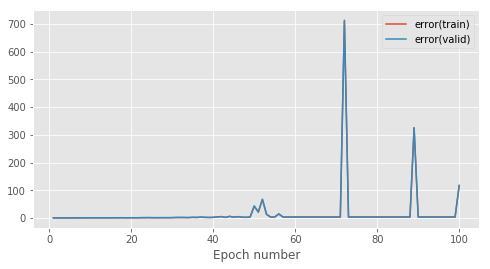

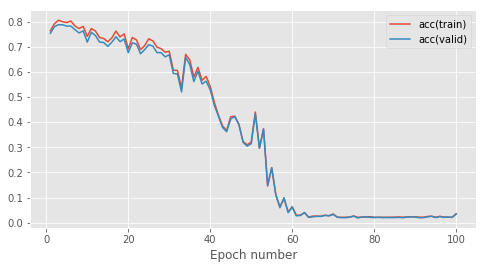

Epoch 1: 6.6s to complete
    error(train)=6.96e-01, acc(train)=7.79e-01, error(valid)=7.25e-01, acc(valid)=7.67e-01


Epoch 2: 5.4s to complete
    error(train)=5.95e-01, acc(train)=8.02e-01, error(valid)=6.50e-01, acc(valid)=7.86e-01


Epoch 3: 5.8s to complete
    error(train)=5.61e-01, acc(train)=8.13e-01, error(valid)=6.35e-01, acc(valid)=7.95e-01


Epoch 4: 5.4s to complete
    error(train)=5.16e-01, acc(train)=8.28e-01, error(valid)=6.05e-01, acc(valid)=8.05e-01


Epoch 5: 5.5s to complete
    error(train)=5.19e-01, acc(train)=8.31e-01, error(valid)=6.35e-01, acc(valid)=8.12e-01


Epoch 6: 5.4s to complete
    error(train)=5.61e-01, acc(train)=8.19e-01, error(valid)=6.71e-01, acc(valid)=7.99e-01


Epoch 7: 6.3s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=7.42e-01, acc(valid)=7.96e-01


Epoch 8: 6.5s to complete
    error(train)=6.00e-01, acc(train)=8.11e-01, error(valid)=7.69e-01, acc(valid)=7.88e-01


Epoch 9: 6.0s to complete
    error(train)=6.52e-01, acc(train)=8.14e-01, error(valid)=8.61e-01, acc(valid)=7.90e-01


Epoch 10: 6.1s to complete
    error(train)=6.74e-01, acc(train)=7.97e-01, error(valid)=8.55e-01, acc(valid)=7.75e-01


Epoch 11: 5.0s to complete
    error(train)=7.21e-01, acc(train)=7.93e-01, error(valid)=9.47e-01, acc(valid)=7.68e-01


Epoch 12: 4.7s to complete
    error(train)=6.63e-01, acc(train)=7.91e-01, error(valid)=8.46e-01, acc(valid)=7.66e-01


Epoch 13: 6.7s to complete
    error(train)=7.03e-01, acc(train)=7.87e-01, error(valid)=9.10e-01, acc(valid)=7.64e-01


Epoch 14: 5.7s to complete
    error(train)=8.43e-01, acc(train)=7.87e-01, error(valid)=1.11e+00, acc(valid)=7.63e-01


Epoch 15: 4.6s to complete
    error(train)=7.10e-01, acc(train)=8.06e-01, error(valid)=9.76e-01, acc(valid)=7.85e-01


Epoch 16: 5.8s to complete
    error(train)=7.16e-01, acc(train)=7.82e-01, error(valid)=9.33e-01, acc(valid)=7.55e-01


Epoch 17: 6.8s to complete
    error(train)=7.68e-01, acc(train)=7.81e-01, error(valid)=1.03e+00, acc(valid)=7.57e-01


Epoch 18: 7.0s to complete
    error(train)=9.96e-01, acc(train)=7.52e-01, error(valid)=1.28e+00, acc(valid)=7.33e-01


Epoch 19: 4.9s to complete
    error(train)=8.57e-01, acc(train)=7.38e-01, error(valid)=1.09e+00, acc(valid)=7.13e-01


Epoch 20: 5.6s to complete
    error(train)=7.81e-01, acc(train)=7.74e-01, error(valid)=1.03e+00, acc(valid)=7.47e-01


Epoch 21: 6.3s to complete
    error(train)=8.01e-01, acc(train)=7.80e-01, error(valid)=1.13e+00, acc(valid)=7.52e-01


Epoch 22: 5.8s to complete
    error(train)=7.80e-01, acc(train)=7.83e-01, error(valid)=1.06e+00, acc(valid)=7.57e-01


Epoch 23: 5.7s to complete
    error(train)=8.00e-01, acc(train)=7.98e-01, error(valid)=1.13e+00, acc(valid)=7.73e-01


Epoch 24: 5.9s to complete
    error(train)=8.75e-01, acc(train)=7.53e-01, error(valid)=1.16e+00, acc(valid)=7.28e-01


Epoch 25: 6.1s to complete
    error(train)=9.34e-01, acc(train)=7.46e-01, error(valid)=1.25e+00, acc(valid)=7.16e-01


Epoch 26: 6.9s to complete
    error(train)=1.14e+00, acc(train)=7.02e-01, error(valid)=1.44e+00, acc(valid)=6.77e-01


Epoch 27: 5.3s to complete
    error(train)=1.08e+00, acc(train)=7.08e-01, error(valid)=1.41e+00, acc(valid)=6.87e-01


Epoch 28: 5.1s to complete
    error(train)=1.11e+00, acc(train)=7.76e-01, error(valid)=1.65e+00, acc(valid)=7.51e-01


Epoch 29: 5.7s to complete
    error(train)=9.25e-01, acc(train)=7.38e-01, error(valid)=1.24e+00, acc(valid)=7.12e-01


Epoch 30: 5.4s to complete
    error(train)=1.12e+00, acc(train)=7.38e-01, error(valid)=1.55e+00, acc(valid)=7.14e-01


Epoch 31: 5.2s to complete
    error(train)=1.05e+00, acc(train)=6.89e-01, error(valid)=1.33e+00, acc(valid)=6.67e-01


Epoch 32: 5.1s to complete
    error(train)=9.94e-01, acc(train)=7.47e-01, error(valid)=1.43e+00, acc(valid)=7.19e-01


Epoch 33: 5.7s to complete
    error(train)=1.04e+00, acc(train)=7.53e-01, error(valid)=1.48e+00, acc(valid)=7.28e-01


Epoch 34: 5.7s to complete
    error(train)=1.29e+00, acc(train)=6.95e-01, error(valid)=1.70e+00, acc(valid)=6.71e-01


Epoch 35: 6.3s to complete
    error(train)=1.25e+00, acc(train)=7.15e-01, error(valid)=1.67e+00, acc(valid)=6.91e-01


Epoch 36: 5.8s to complete
    error(train)=1.18e+00, acc(train)=6.95e-01, error(valid)=1.56e+00, acc(valid)=6.70e-01


Epoch 37: 6.5s to complete
    error(train)=1.45e+00, acc(train)=7.03e-01, error(valid)=1.95e+00, acc(valid)=6.84e-01


Epoch 38: 6.4s to complete
    error(train)=1.34e+00, acc(train)=7.18e-01, error(valid)=1.84e+00, acc(valid)=6.96e-01


Epoch 39: 6.0s to complete
    error(train)=1.32e+00, acc(train)=6.91e-01, error(valid)=1.77e+00, acc(valid)=6.66e-01


Epoch 40: 5.2s to complete
    error(train)=1.40e+00, acc(train)=7.08e-01, error(valid)=1.91e+00, acc(valid)=6.84e-01


Epoch 41: 5.9s to complete
    error(train)=1.23e+00, acc(train)=6.91e-01, error(valid)=1.63e+00, acc(valid)=6.63e-01


Epoch 42: 6.2s to complete
    error(train)=1.99e+00, acc(train)=6.85e-01, error(valid)=2.52e+00, acc(valid)=6.59e-01


Epoch 43: 5.1s to complete
    error(train)=2.05e+00, acc(train)=6.66e-01, error(valid)=2.73e+00, acc(valid)=6.45e-01


Epoch 44: 6.4s to complete
    error(train)=3.21e+00, acc(train)=5.64e-01, error(valid)=3.70e+00, acc(valid)=5.50e-01


Epoch 45: 5.3s to complete
    error(train)=3.29e+00, acc(train)=5.87e-01, error(valid)=3.82e+00, acc(valid)=5.70e-01


Epoch 46: 6.0s to complete
    error(train)=2.22e+00, acc(train)=5.74e-01, error(valid)=2.63e+00, acc(valid)=5.60e-01


Epoch 47: 6.7s to complete
    error(train)=2.79e+00, acc(train)=5.40e-01, error(valid)=3.22e+00, acc(valid)=5.20e-01


Epoch 48: 5.7s to complete
    error(train)=7.78e+00, acc(train)=4.94e-01, error(valid)=8.33e+00, acc(valid)=4.80e-01


Epoch 49: 6.4s to complete
    error(train)=4.38e+00, acc(train)=4.91e-01, error(valid)=4.73e+00, acc(valid)=4.81e-01


Epoch 50: 6.2s to complete
    error(train)=2.26e+00, acc(train)=4.79e-01, error(valid)=2.61e+00, acc(valid)=4.66e-01


Epoch 51: 5.6s to complete
    error(train)=2.00e+00, acc(train)=5.11e-01, error(valid)=2.32e+00, acc(valid)=4.98e-01


Epoch 52: 5.7s to complete
    error(train)=5.27e+00, acc(train)=4.04e-01, error(valid)=5.81e+00, acc(valid)=3.99e-01


Epoch 53: 6.1s to complete
    error(train)=3.25e+00, acc(train)=4.28e-01, error(valid)=3.63e+00, acc(valid)=4.19e-01


Epoch 54: 5.8s to complete
    error(train)=2.75e+00, acc(train)=4.61e-01, error(valid)=3.14e+00, acc(valid)=4.49e-01


Epoch 55: 6.7s to complete
    error(train)=2.82e+00, acc(train)=3.41e-01, error(valid)=2.98e+00, acc(valid)=3.40e-01


Epoch 56: 6.7s to complete
    error(train)=7.33e+00, acc(train)=2.93e-01, error(valid)=7.75e+00, acc(valid)=2.90e-01


Epoch 57: 7.0s to complete
    error(train)=7.04e+00, acc(train)=2.94e-01, error(valid)=7.06e+00, acc(valid)=2.93e-01


Epoch 58: 5.7s to complete
    error(train)=2.85e+00, acc(train)=3.00e-01, error(valid)=2.99e+00, acc(valid)=2.97e-01


Epoch 59: 5.8s to complete
    error(train)=3.01e+00, acc(train)=2.29e-01, error(valid)=3.07e+00, acc(valid)=2.30e-01


Epoch 60: 5.8s to complete
    error(train)=2.87e+00, acc(train)=2.99e-01, error(valid)=3.11e+00, acc(valid)=2.94e-01


Epoch 61: 6.3s to complete
    error(train)=3.06e+00, acc(train)=2.79e-01, error(valid)=3.29e+00, acc(valid)=2.74e-01


Epoch 62: 6.7s to complete
    error(train)=4.27e+00, acc(train)=3.90e-01, error(valid)=4.80e+00, acc(valid)=3.86e-01


Epoch 63: 6.0s to complete
    error(train)=3.20e+00, acc(train)=2.37e-01, error(valid)=3.32e+00, acc(valid)=2.35e-01


Epoch 64: 5.6s to complete
    error(train)=4.81e+00, acc(train)=4.21e-01, error(valid)=5.35e+00, acc(valid)=4.18e-01


Epoch 65: 7.0s to complete
    error(train)=3.56e+00, acc(train)=3.34e-01, error(valid)=3.96e+00, acc(valid)=3.31e-01


Epoch 66: 5.7s to complete
    error(train)=3.17e+01, acc(train)=2.83e-01, error(valid)=3.18e+01, acc(valid)=2.82e-01


Epoch 67: 6.5s to complete
    error(train)=2.91e+00, acc(train)=2.35e-01, error(valid)=3.13e+00, acc(valid)=2.32e-01


Epoch 68: 6.1s to complete
    error(train)=3.38e+01, acc(train)=2.01e-01, error(valid)=3.42e+01, acc(valid)=1.99e-01


Epoch 69: 5.6s to complete
    error(train)=3.42e+00, acc(train)=2.23e-01, error(valid)=3.67e+00, acc(valid)=2.22e-01


Epoch 70: 5.1s to complete
    error(train)=5.56e+00, acc(train)=3.88e-01, error(valid)=6.14e+00, acc(valid)=3.96e-01


Epoch 71: 5.9s to complete
    error(train)=8.89e+00, acc(train)=3.16e-01, error(valid)=9.46e+00, acc(valid)=3.16e-01


Epoch 72: 6.0s to complete
    error(train)=1.09e+01, acc(train)=3.68e-01, error(valid)=1.12e+01, acc(valid)=3.69e-01


Epoch 73: 6.3s to complete
    error(train)=3.50e+00, acc(train)=2.00e-01, error(valid)=3.67e+00, acc(valid)=2.02e-01


Epoch 74: 6.7s to complete
    error(train)=3.46e+00, acc(train)=1.79e-01, error(valid)=3.63e+00, acc(valid)=1.83e-01


Epoch 75: 7.6s to complete
    error(train)=3.30e+00, acc(train)=2.06e-01, error(valid)=3.63e+00, acc(valid)=2.00e-01


Epoch 76: 5.4s to complete
    error(train)=3.39e+00, acc(train)=1.39e-01, error(valid)=3.52e+00, acc(valid)=1.39e-01


Epoch 77: 6.7s to complete
    error(train)=3.37e+00, acc(train)=1.51e-01, error(valid)=3.55e+00, acc(valid)=1.51e-01


Epoch 78: 7.5s to complete
    error(train)=3.21e+00, acc(train)=1.81e-01, error(valid)=3.45e+00, acc(valid)=1.76e-01


Epoch 79: 8.0s to complete
    error(train)=3.44e+00, acc(train)=1.20e-01, error(valid)=3.59e+00, acc(valid)=1.17e-01


Epoch 80: 6.6s to complete
    error(train)=3.44e+00, acc(train)=1.32e-01, error(valid)=3.59e+00, acc(valid)=1.30e-01


Epoch 81: 7.6s to complete
    error(train)=7.29e+00, acc(train)=2.85e-01, error(valid)=8.18e+00, acc(valid)=2.87e-01


Epoch 82: 7.4s to complete
    error(train)=8.03e+00, acc(train)=1.69e-01, error(valid)=8.76e+00, acc(valid)=1.63e-01


Epoch 83: 8.7s to complete
    error(train)=1.48e+01, acc(train)=9.02e-02, error(valid)=1.48e+01, acc(valid)=8.81e-02


Epoch 84: 6.3s to complete
    error(train)=1.46e+02, acc(train)=1.27e-01, error(valid)=1.46e+02, acc(valid)=1.25e-01


Epoch 85: 6.6s to complete
    error(train)=3.50e+00, acc(train)=1.35e-01, error(valid)=3.71e+00, acc(valid)=1.32e-01


Epoch 86: 6.9s to complete
    error(train)=3.63e+00, acc(train)=1.73e-01, error(valid)=4.04e+00, acc(valid)=1.68e-01


Epoch 87: 6.6s to complete
    error(train)=3.64e+00, acc(train)=1.86e-01, error(valid)=4.05e+00, acc(valid)=1.83e-01


Epoch 88: 7.5s to complete
    error(train)=3.65e+00, acc(train)=7.70e-02, error(valid)=3.66e+00, acc(valid)=7.53e-02


Epoch 89: 6.4s to complete
    error(train)=3.45e+00, acc(train)=1.19e-01, error(valid)=3.67e+00, acc(valid)=1.17e-01


Epoch 90: 6.8s to complete
    error(train)=2.77e+02, acc(train)=1.04e-01, error(valid)=2.80e+02, acc(valid)=9.86e-02


Epoch 91: 7.1s to complete
    error(train)=3.54e+00, acc(train)=1.12e-01, error(valid)=3.75e+00, acc(valid)=1.10e-01


Epoch 92: 7.0s to complete
    error(train)=3.65e+00, acc(train)=7.60e-02, error(valid)=3.69e+00, acc(valid)=7.26e-02


Epoch 93: 6.8s to complete
    error(train)=3.67e+00, acc(train)=7.37e-02, error(valid)=3.75e+00, acc(valid)=7.14e-02


Epoch 94: 7.1s to complete
    error(train)=3.89e+00, acc(train)=5.30e-02, error(valid)=3.96e+00, acc(valid)=4.89e-02


Epoch 95: 6.8s to complete
    error(train)=3.87e+00, acc(train)=6.08e-02, error(valid)=3.92e+00, acc(valid)=5.78e-02


Epoch 96: 7.0s to complete
    error(train)=3.69e+00, acc(train)=6.28e-02, error(valid)=3.71e+00, acc(valid)=6.05e-02


Epoch 97: 5.9s to complete
    error(train)=3.78e+00, acc(train)=4.55e-02, error(valid)=3.87e+00, acc(valid)=4.22e-02


Epoch 98: 6.3s to complete
    error(train)=3.67e+00, acc(train)=7.26e-02, error(valid)=3.73e+00, acc(valid)=7.09e-02


Epoch 99: 7.3s to complete
    error(train)=2.01e+01, acc(train)=7.95e-02, error(valid)=1.98e+01, acc(valid)=7.60e-02


Epoch 100: 7.4s to complete
    error(train)=6.45e+01, acc(train)=6.36e-02, error(valid)=6.43e+01, acc(valid)=6.11e-02


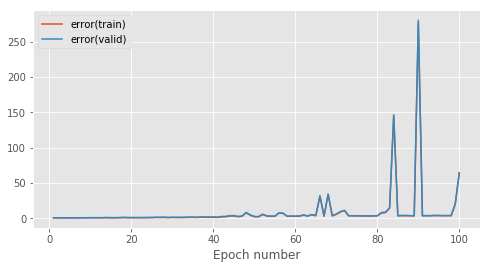

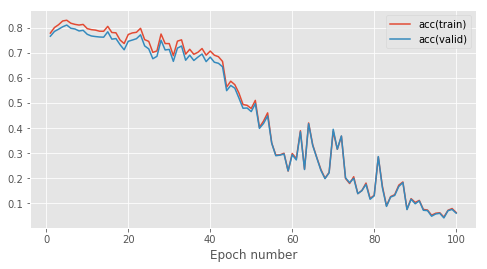

Epoch 1: 5.5s to complete
    error(train)=6.99e-01, acc(train)=7.76e-01, error(valid)=7.27e-01, acc(valid)=7.68e-01


Epoch 2: 7.2s to complete
    error(train)=5.86e-01, acc(train)=8.05e-01, error(valid)=6.62e-01, acc(valid)=7.85e-01


Epoch 3: 5.4s to complete
    error(train)=5.32e-01, acc(train)=8.17e-01, error(valid)=6.18e-01, acc(valid)=7.99e-01


Epoch 4: 6.6s to complete
    error(train)=4.62e-01, acc(train)=8.41e-01, error(valid)=5.77e-01, acc(valid)=8.16e-01


Epoch 5: 5.6s to complete
    error(train)=4.52e-01, acc(train)=8.43e-01, error(valid)=5.92e-01, acc(valid)=8.15e-01


Epoch 6: 5.4s to complete
    error(train)=4.49e-01, acc(train)=8.46e-01, error(valid)=6.16e-01, acc(valid)=8.16e-01


Epoch 7: 6.0s to complete
    error(train)=4.32e-01, acc(train)=8.50e-01, error(valid)=5.95e-01, acc(valid)=8.16e-01


Epoch 8: 5.4s to complete
    error(train)=4.28e-01, acc(train)=8.50e-01, error(valid)=5.97e-01, acc(valid)=8.18e-01


Epoch 9: 5.7s to complete
    error(train)=4.56e-01, acc(train)=8.44e-01, error(valid)=6.59e-01, acc(valid)=8.08e-01


Epoch 10: 5.3s to complete
    error(train)=4.30e-01, acc(train)=8.50e-01, error(valid)=6.20e-01, acc(valid)=8.18e-01


Epoch 11: 5.3s to complete
    error(train)=4.83e-01, acc(train)=8.39e-01, error(valid)=7.16e-01, acc(valid)=8.07e-01


Epoch 12: 6.7s to complete
    error(train)=4.45e-01, acc(train)=8.47e-01, error(valid)=6.51e-01, acc(valid)=8.16e-01


Epoch 13: 5.1s to complete
    error(train)=5.01e-01, acc(train)=8.36e-01, error(valid)=7.44e-01, acc(valid)=8.02e-01


Epoch 14: 6.2s to complete
    error(train)=4.51e-01, acc(train)=8.46e-01, error(valid)=6.87e-01, acc(valid)=8.12e-01


Epoch 15: 5.2s to complete
    error(train)=5.20e-01, acc(train)=8.36e-01, error(valid)=7.96e-01, acc(valid)=8.06e-01


Epoch 16: 5.1s to complete
    error(train)=5.13e-01, acc(train)=8.42e-01, error(valid)=8.46e-01, acc(valid)=8.07e-01


Epoch 17: 5.2s to complete
    error(train)=4.85e-01, acc(train)=8.36e-01, error(valid)=7.32e-01, acc(valid)=8.01e-01


Epoch 18: 4.9s to complete
    error(train)=5.26e-01, acc(train)=8.33e-01, error(valid)=8.21e-01, acc(valid)=7.98e-01


Epoch 19: 4.6s to complete
    error(train)=4.77e-01, acc(train)=8.41e-01, error(valid)=7.63e-01, acc(valid)=8.04e-01


Epoch 20: 5.8s to complete
    error(train)=5.12e-01, acc(train)=8.34e-01, error(valid)=8.47e-01, acc(valid)=7.97e-01


Epoch 21: 6.2s to complete
    error(train)=5.03e-01, acc(train)=8.38e-01, error(valid)=8.14e-01, acc(valid)=8.01e-01


Epoch 22: 5.7s to complete
    error(train)=5.63e-01, acc(train)=8.19e-01, error(valid)=8.66e-01, acc(valid)=7.84e-01


Epoch 23: 5.8s to complete
    error(train)=5.49e-01, acc(train)=8.18e-01, error(valid)=8.49e-01, acc(valid)=7.81e-01


Epoch 24: 5.4s to complete
    error(train)=4.94e-01, acc(train)=8.42e-01, error(valid)=8.72e-01, acc(valid)=8.07e-01


Epoch 25: 5.4s to complete
    error(train)=6.32e-01, acc(train)=8.11e-01, error(valid)=9.98e-01, acc(valid)=7.77e-01


Epoch 26: 6.2s to complete
    error(train)=5.30e-01, acc(train)=8.35e-01, error(valid)=9.40e-01, acc(valid)=7.97e-01


Epoch 27: 4.9s to complete
    error(train)=5.22e-01, acc(train)=8.31e-01, error(valid)=8.54e-01, acc(valid)=7.99e-01


Epoch 28: 6.5s to complete
    error(train)=5.31e-01, acc(train)=8.30e-01, error(valid)=9.14e-01, acc(valid)=7.91e-01


Epoch 29: 6.7s to complete
    error(train)=5.34e-01, acc(train)=8.23e-01, error(valid)=9.12e-01, acc(valid)=7.82e-01


Epoch 30: 6.1s to complete
    error(train)=5.17e-01, acc(train)=8.34e-01, error(valid)=9.01e-01, acc(valid)=7.95e-01


Epoch 31: 5.0s to complete
    error(train)=5.11e-01, acc(train)=8.39e-01, error(valid)=9.56e-01, acc(valid)=8.00e-01


Epoch 32: 3.9s to complete
    error(train)=5.40e-01, acc(train)=8.29e-01, error(valid)=8.75e-01, acc(valid)=7.92e-01


Epoch 33: 5.5s to complete
    error(train)=6.24e-01, acc(train)=8.14e-01, error(valid)=1.04e+00, acc(valid)=7.74e-01


Epoch 34: 5.3s to complete
    error(train)=5.59e-01, acc(train)=8.26e-01, error(valid)=9.80e-01, acc(valid)=7.84e-01


Epoch 35: 5.1s to complete
    error(train)=5.56e-01, acc(train)=8.25e-01, error(valid)=9.37e-01, acc(valid)=7.86e-01


Epoch 36: 5.1s to complete
    error(train)=6.05e-01, acc(train)=8.19e-01, error(valid)=1.13e+00, acc(valid)=7.81e-01


Epoch 37: 4.9s to complete
    error(train)=5.77e-01, acc(train)=8.30e-01, error(valid)=1.10e+00, acc(valid)=7.89e-01


Epoch 38: 4.7s to complete
    error(train)=6.79e-01, acc(train)=8.25e-01, error(valid)=1.25e+00, acc(valid)=7.85e-01


Epoch 39: 5.8s to complete
    error(train)=5.68e-01, acc(train)=8.18e-01, error(valid)=9.95e-01, acc(valid)=7.78e-01


Epoch 40: 5.4s to complete
    error(train)=5.56e-01, acc(train)=8.34e-01, error(valid)=1.06e+00, acc(valid)=7.97e-01


Epoch 41: 6.2s to complete
    error(train)=6.22e-01, acc(train)=8.24e-01, error(valid)=1.18e+00, acc(valid)=7.83e-01


Epoch 42: 5.9s to complete
    error(train)=5.85e-01, acc(train)=8.27e-01, error(valid)=1.04e+00, acc(valid)=7.91e-01


Epoch 43: 7.0s to complete
    error(train)=6.24e-01, acc(train)=8.06e-01, error(valid)=1.10e+00, acc(valid)=7.66e-01


Epoch 44: 5.5s to complete
    error(train)=5.85e-01, acc(train)=8.16e-01, error(valid)=1.15e+00, acc(valid)=7.76e-01


Epoch 45: 5.8s to complete
    error(train)=5.88e-01, acc(train)=8.16e-01, error(valid)=1.08e+00, acc(valid)=7.79e-01


Epoch 46: 5.8s to complete
    error(train)=6.16e-01, acc(train)=8.24e-01, error(valid)=1.23e+00, acc(valid)=7.82e-01


Epoch 47: 7.7s to complete
    error(train)=6.20e-01, acc(train)=8.25e-01, error(valid)=1.21e+00, acc(valid)=7.85e-01


Epoch 48: 6.1s to complete
    error(train)=5.76e-01, acc(train)=8.28e-01, error(valid)=1.20e+00, acc(valid)=7.86e-01


Epoch 49: 5.6s to complete
    error(train)=5.72e-01, acc(train)=8.23e-01, error(valid)=1.17e+00, acc(valid)=7.81e-01


Epoch 50: 4.8s to complete
    error(train)=7.66e-01, acc(train)=7.81e-01, error(valid)=1.29e+00, acc(valid)=7.45e-01


Epoch 51: 5.5s to complete
    error(train)=6.78e-01, acc(train)=8.33e-01, error(valid)=1.52e+00, acc(valid)=7.95e-01


Epoch 52: 5.3s to complete
    error(train)=6.39e-01, acc(train)=8.03e-01, error(valid)=1.16e+00, acc(valid)=7.61e-01


Epoch 53: 4.8s to complete
    error(train)=6.57e-01, acc(train)=8.03e-01, error(valid)=1.24e+00, acc(valid)=7.63e-01


Epoch 54: 5.2s to complete
    error(train)=6.84e-01, acc(train)=8.25e-01, error(valid)=1.64e+00, acc(valid)=7.85e-01


Epoch 55: 6.2s to complete
    error(train)=6.68e-01, acc(train)=7.96e-01, error(valid)=1.33e+00, acc(valid)=7.52e-01


Epoch 56: 5.1s to complete
    error(train)=6.67e-01, acc(train)=8.16e-01, error(valid)=1.48e+00, acc(valid)=7.72e-01


Epoch 57: 5.2s to complete
    error(train)=8.11e-01, acc(train)=7.82e-01, error(valid)=1.45e+00, acc(valid)=7.45e-01


Epoch 58: 6.8s to complete
    error(train)=7.53e-01, acc(train)=8.11e-01, error(valid)=1.54e+00, acc(valid)=7.70e-01


Epoch 59: 6.3s to complete
    error(train)=7.32e-01, acc(train)=7.79e-01, error(valid)=1.44e+00, acc(valid)=7.40e-01


Epoch 60: 5.3s to complete
    error(train)=6.97e-01, acc(train)=8.19e-01, error(valid)=1.39e+00, acc(valid)=7.79e-01


Epoch 61: 5.1s to complete
    error(train)=6.63e-01, acc(train)=8.15e-01, error(valid)=1.49e+00, acc(valid)=7.75e-01


Epoch 62: 5.0s to complete
    error(train)=6.55e-01, acc(train)=8.14e-01, error(valid)=1.36e+00, acc(valid)=7.71e-01


Epoch 63: 5.8s to complete
    error(train)=7.51e-01, acc(train)=8.15e-01, error(valid)=1.68e+00, acc(valid)=7.73e-01


Epoch 64: 5.8s to complete
    error(train)=7.09e-01, acc(train)=7.94e-01, error(valid)=1.43e+00, acc(valid)=7.53e-01


Epoch 65: 5.4s to complete
    error(train)=9.07e-01, acc(train)=7.67e-01, error(valid)=1.62e+00, acc(valid)=7.30e-01


Epoch 66: 6.0s to complete
    error(train)=8.30e-01, acc(train)=8.17e-01, error(valid)=1.88e+00, acc(valid)=7.79e-01


Epoch 67: 5.1s to complete
    error(train)=8.29e-01, acc(train)=7.82e-01, error(valid)=1.56e+00, acc(valid)=7.47e-01


Epoch 68: 5.8s to complete
    error(train)=6.63e-01, acc(train)=8.04e-01, error(valid)=1.41e+00, acc(valid)=7.62e-01


Epoch 69: 5.3s to complete
    error(train)=7.81e-01, acc(train)=7.95e-01, error(valid)=1.72e+00, acc(valid)=7.55e-01


Epoch 70: 5.6s to complete
    error(train)=8.41e-01, acc(train)=7.88e-01, error(valid)=1.66e+00, acc(valid)=7.48e-01


Epoch 71: 5.2s to complete
    error(train)=7.69e-01, acc(train)=7.87e-01, error(valid)=1.59e+00, acc(valid)=7.51e-01


Epoch 72: 5.5s to complete
    error(train)=8.68e-01, acc(train)=7.94e-01, error(valid)=1.86e+00, acc(valid)=7.58e-01


Epoch 73: 6.3s to complete
    error(train)=8.03e-01, acc(train)=7.77e-01, error(valid)=1.63e+00, acc(valid)=7.38e-01


Epoch 74: 5.4s to complete
    error(train)=7.61e-01, acc(train)=7.90e-01, error(valid)=1.46e+00, acc(valid)=7.51e-01


Epoch 75: 5.9s to complete
    error(train)=8.43e-01, acc(train)=7.70e-01, error(valid)=1.72e+00, acc(valid)=7.34e-01


Epoch 76: 6.3s to complete
    error(train)=7.53e-01, acc(train)=7.75e-01, error(valid)=1.55e+00, acc(valid)=7.32e-01


Epoch 77: 6.8s to complete
    error(train)=8.75e-01, acc(train)=7.66e-01, error(valid)=1.64e+00, acc(valid)=7.30e-01


Epoch 78: 5.5s to complete
    error(train)=8.10e-01, acc(train)=7.65e-01, error(valid)=1.46e+00, acc(valid)=7.26e-01


Epoch 79: 6.0s to complete
    error(train)=7.41e-01, acc(train)=7.89e-01, error(valid)=1.53e+00, acc(valid)=7.48e-01


Epoch 80: 6.0s to complete
    error(train)=8.74e-01, acc(train)=7.81e-01, error(valid)=1.81e+00, acc(valid)=7.40e-01


Epoch 81: 5.6s to complete
    error(train)=8.25e-01, acc(train)=7.88e-01, error(valid)=1.72e+00, acc(valid)=7.50e-01


Epoch 82: 6.3s to complete
    error(train)=9.48e-01, acc(train)=7.59e-01, error(valid)=1.74e+00, acc(valid)=7.17e-01


Epoch 83: 5.9s to complete
    error(train)=8.28e-01, acc(train)=7.85e-01, error(valid)=1.83e+00, acc(valid)=7.44e-01


Epoch 84: 5.7s to complete
    error(train)=1.52e+00, acc(train)=6.87e-01, error(valid)=2.35e+00, acc(valid)=6.55e-01


Epoch 85: 6.1s to complete
    error(train)=8.38e-01, acc(train)=7.50e-01, error(valid)=1.60e+00, acc(valid)=7.12e-01


Epoch 86: 6.1s to complete
    error(train)=1.03e+00, acc(train)=7.59e-01, error(valid)=2.01e+00, acc(valid)=7.25e-01


Epoch 87: 6.4s to complete
    error(train)=9.37e-01, acc(train)=7.59e-01, error(valid)=1.86e+00, acc(valid)=7.24e-01


Epoch 88: 6.3s to complete
    error(train)=9.19e-01, acc(train)=7.64e-01, error(valid)=1.93e+00, acc(valid)=7.27e-01


Epoch 89: 4.8s to complete
    error(train)=1.25e+00, acc(train)=7.20e-01, error(valid)=2.33e+00, acc(valid)=6.87e-01


Epoch 90: 5.4s to complete
    error(train)=9.71e-01, acc(train)=7.42e-01, error(valid)=1.95e+00, acc(valid)=7.04e-01


Epoch 91: 5.6s to complete
    error(train)=9.80e-01, acc(train)=7.63e-01, error(valid)=2.02e+00, acc(valid)=7.28e-01


Epoch 92: 5.3s to complete
    error(train)=1.04e+00, acc(train)=7.20e-01, error(valid)=1.93e+00, acc(valid)=6.84e-01


Epoch 93: 6.2s to complete
    error(train)=1.11e+00, acc(train)=7.51e-01, error(valid)=2.09e+00, acc(valid)=7.14e-01


Epoch 94: 4.7s to complete
    error(train)=1.14e+00, acc(train)=6.89e-01, error(valid)=1.94e+00, acc(valid)=6.58e-01


Epoch 95: 5.8s to complete
    error(train)=1.10e+00, acc(train)=7.53e-01, error(valid)=2.27e+00, acc(valid)=7.18e-01


Epoch 96: 6.0s to complete
    error(train)=1.10e+00, acc(train)=7.04e-01, error(valid)=1.92e+00, acc(valid)=6.68e-01


Epoch 97: 5.5s to complete
    error(train)=1.42e+00, acc(train)=7.15e-01, error(valid)=2.51e+00, acc(valid)=6.82e-01


Epoch 98: 5.5s to complete
    error(train)=1.15e+00, acc(train)=6.85e-01, error(valid)=1.91e+00, acc(valid)=6.55e-01


Epoch 99: 6.2s to complete
    error(train)=1.04e+00, acc(train)=7.27e-01, error(valid)=1.97e+00, acc(valid)=6.96e-01


Epoch 100: 4.9s to complete
    error(train)=1.17e+00, acc(train)=7.40e-01, error(valid)=2.32e+00, acc(valid)=7.08e-01


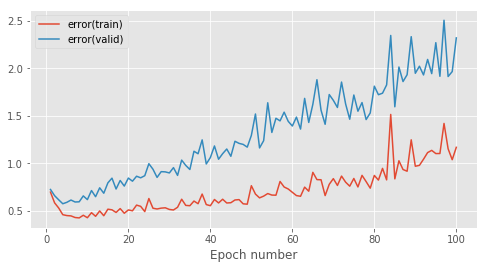

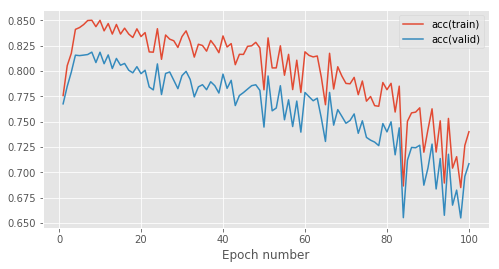

Epoch 1: 4.7s to complete
    error(train)=7.97e-01, acc(train)=7.60e-01, error(valid)=8.19e-01, acc(valid)=7.53e-01


Epoch 2: 5.7s to complete
    error(train)=6.45e-01, acc(train)=7.95e-01, error(valid)=6.86e-01, acc(valid)=7.84e-01


Epoch 3: 6.0s to complete
    error(train)=5.54e-01, acc(train)=8.18e-01, error(valid)=6.10e-01, acc(valid)=8.04e-01


Epoch 4: 5.3s to complete
    error(train)=5.41e-01, acc(train)=8.21e-01, error(valid)=6.15e-01, acc(valid)=8.06e-01


Epoch 5: 6.0s to complete
    error(train)=4.89e-01, acc(train)=8.38e-01, error(valid)=5.77e-01, acc(valid)=8.17e-01


Epoch 6: 5.7s to complete
    error(train)=4.99e-01, acc(train)=8.36e-01, error(valid)=6.05e-01, acc(valid)=8.11e-01


Epoch 7: 5.8s to complete
    error(train)=4.95e-01, acc(train)=8.35e-01, error(valid)=6.10e-01, acc(valid)=8.09e-01


Epoch 8: 4.9s to complete
    error(train)=4.72e-01, acc(train)=8.45e-01, error(valid)=5.89e-01, acc(valid)=8.18e-01


Epoch 9: 5.5s to complete
    error(train)=4.81e-01, acc(train)=8.47e-01, error(valid)=6.32e-01, acc(valid)=8.18e-01


Epoch 10: 5.1s to complete
    error(train)=4.70e-01, acc(train)=8.45e-01, error(valid)=6.12e-01, acc(valid)=8.15e-01


Epoch 11: 5.5s to complete
    error(train)=5.00e-01, acc(train)=8.32e-01, error(valid)=6.45e-01, acc(valid)=8.01e-01


Epoch 12: 5.4s to complete
    error(train)=4.68e-01, acc(train)=8.50e-01, error(valid)=6.51e-01, acc(valid)=8.16e-01


Epoch 13: 6.4s to complete
    error(train)=4.82e-01, acc(train)=8.38e-01, error(valid)=6.34e-01, acc(valid)=8.08e-01


Epoch 14: 6.2s to complete
    error(train)=5.21e-01, acc(train)=8.33e-01, error(valid)=6.97e-01, acc(valid)=8.04e-01


Epoch 15: 5.8s to complete
    error(train)=5.15e-01, acc(train)=8.33e-01, error(valid)=6.93e-01, acc(valid)=8.01e-01


Epoch 16: 6.6s to complete
    error(train)=5.61e-01, acc(train)=8.14e-01, error(valid)=7.25e-01, acc(valid)=7.80e-01


Epoch 17: 5.1s to complete
    error(train)=4.80e-01, acc(train)=8.43e-01, error(valid)=6.61e-01, acc(valid)=8.11e-01


Epoch 18: 5.5s to complete
    error(train)=5.35e-01, acc(train)=8.35e-01, error(valid)=7.60e-01, acc(valid)=8.03e-01


Epoch 19: 6.1s to complete
    error(train)=5.34e-01, acc(train)=8.30e-01, error(valid)=7.52e-01, acc(valid)=7.97e-01


Epoch 20: 4.4s to complete
    error(train)=5.14e-01, acc(train)=8.32e-01, error(valid)=7.10e-01, acc(valid)=8.00e-01


Epoch 21: 5.5s to complete
    error(train)=5.88e-01, acc(train)=8.18e-01, error(valid)=8.30e-01, acc(valid)=7.85e-01


Epoch 22: 5.0s to complete
    error(train)=5.77e-01, acc(train)=8.28e-01, error(valid)=8.48e-01, acc(valid)=7.95e-01


Epoch 23: 5.4s to complete
    error(train)=5.59e-01, acc(train)=8.26e-01, error(valid)=8.25e-01, acc(valid)=7.94e-01


Epoch 24: 6.3s to complete
    error(train)=6.14e-01, acc(train)=8.06e-01, error(valid)=8.35e-01, acc(valid)=7.76e-01


Epoch 25: 5.8s to complete
    error(train)=5.57e-01, acc(train)=8.25e-01, error(valid)=8.29e-01, acc(valid)=7.91e-01


Epoch 26: 4.7s to complete
    error(train)=5.80e-01, acc(train)=8.31e-01, error(valid)=8.98e-01, acc(valid)=7.99e-01


Epoch 27: 6.5s to complete
    error(train)=7.48e-01, acc(train)=7.86e-01, error(valid)=1.04e+00, acc(valid)=7.56e-01


Epoch 28: 5.5s to complete
    error(train)=6.86e-01, acc(train)=7.96e-01, error(valid)=9.57e-01, acc(valid)=7.66e-01


Epoch 29: 5.0s to complete
    error(train)=6.03e-01, acc(train)=8.12e-01, error(valid)=8.79e-01, acc(valid)=7.77e-01


Epoch 30: 5.2s to complete
    error(train)=6.11e-01, acc(train)=8.23e-01, error(valid)=9.27e-01, acc(valid)=7.89e-01


Epoch 31: 5.5s to complete
    error(train)=6.12e-01, acc(train)=8.16e-01, error(valid)=9.24e-01, acc(valid)=7.77e-01


Epoch 32: 5.6s to complete
    error(train)=6.45e-01, acc(train)=8.15e-01, error(valid)=9.74e-01, acc(valid)=7.82e-01


Epoch 33: 5.2s to complete
    error(train)=6.17e-01, acc(train)=8.22e-01, error(valid)=9.23e-01, acc(valid)=7.87e-01


Epoch 34: 5.5s to complete
    error(train)=6.15e-01, acc(train)=8.11e-01, error(valid)=9.09e-01, acc(valid)=7.77e-01


Epoch 35: 6.1s to complete
    error(train)=6.13e-01, acc(train)=8.19e-01, error(valid)=9.39e-01, acc(valid)=7.84e-01


Epoch 36: 4.8s to complete
    error(train)=7.13e-01, acc(train)=7.99e-01, error(valid)=1.04e+00, acc(valid)=7.67e-01


Epoch 37: 7.5s to complete
    error(train)=7.15e-01, acc(train)=7.87e-01, error(valid)=1.03e+00, acc(valid)=7.53e-01


Epoch 38: 5.3s to complete
    error(train)=7.05e-01, acc(train)=8.17e-01, error(valid)=1.15e+00, acc(valid)=7.86e-01


Epoch 39: 4.6s to complete
    error(train)=6.59e-01, acc(train)=8.14e-01, error(valid)=1.11e+00, acc(valid)=7.80e-01


Epoch 40: 5.3s to complete
    error(train)=7.27e-01, acc(train)=8.03e-01, error(valid)=1.20e+00, acc(valid)=7.67e-01


Epoch 41: 5.7s to complete
    error(train)=6.55e-01, acc(train)=8.00e-01, error(valid)=9.94e-01, acc(valid)=7.66e-01


Epoch 42: 6.5s to complete
    error(train)=6.77e-01, acc(train)=8.01e-01, error(valid)=1.06e+00, acc(valid)=7.63e-01


Epoch 43: 6.3s to complete
    error(train)=6.69e-01, acc(train)=8.05e-01, error(valid)=1.09e+00, acc(valid)=7.70e-01


Epoch 44: 6.3s to complete
    error(train)=7.11e-01, acc(train)=7.92e-01, error(valid)=1.08e+00, acc(valid)=7.57e-01


Epoch 45: 5.6s to complete
    error(train)=6.46e-01, acc(train)=8.14e-01, error(valid)=1.05e+00, acc(valid)=7.77e-01


Epoch 46: 4.9s to complete
    error(train)=6.71e-01, acc(train)=8.03e-01, error(valid)=1.06e+00, acc(valid)=7.69e-01


Epoch 47: 5.6s to complete
    error(train)=7.35e-01, acc(train)=7.90e-01, error(valid)=1.18e+00, acc(valid)=7.52e-01


Epoch 48: 4.9s to complete
    error(train)=7.65e-01, acc(train)=8.07e-01, error(valid)=1.33e+00, acc(valid)=7.68e-01


Epoch 49: 5.0s to complete
    error(train)=6.90e-01, acc(train)=7.97e-01, error(valid)=1.10e+00, acc(valid)=7.59e-01


Epoch 50: 5.7s to complete
    error(train)=8.66e-01, acc(train)=7.84e-01, error(valid)=1.40e+00, acc(valid)=7.50e-01


Epoch 51: 5.7s to complete
    error(train)=7.41e-01, acc(train)=8.04e-01, error(valid)=1.25e+00, acc(valid)=7.66e-01


Epoch 52: 4.7s to complete
    error(train)=8.19e-01, acc(train)=7.73e-01, error(valid)=1.24e+00, acc(valid)=7.34e-01


Epoch 53: 4.6s to complete
    error(train)=6.56e-01, acc(train)=8.11e-01, error(valid)=1.11e+00, acc(valid)=7.70e-01


Epoch 54: 5.6s to complete
    error(train)=7.61e-01, acc(train)=7.97e-01, error(valid)=1.28e+00, acc(valid)=7.56e-01


Epoch 55: 6.2s to complete
    error(train)=7.33e-01, acc(train)=8.03e-01, error(valid)=1.24e+00, acc(valid)=7.62e-01


Epoch 56: 6.4s to complete
    error(train)=7.53e-01, acc(train)=7.92e-01, error(valid)=1.27e+00, acc(valid)=7.54e-01


Epoch 57: 5.0s to complete
    error(train)=8.53e-01, acc(train)=7.75e-01, error(valid)=1.36e+00, acc(valid)=7.35e-01


Epoch 58: 5.1s to complete
    error(train)=7.64e-01, acc(train)=7.83e-01, error(valid)=1.24e+00, acc(valid)=7.52e-01


Epoch 59: 4.8s to complete
    error(train)=8.21e-01, acc(train)=7.99e-01, error(valid)=1.43e+00, acc(valid)=7.64e-01


Epoch 60: 5.1s to complete
    error(train)=7.84e-01, acc(train)=7.92e-01, error(valid)=1.33e+00, acc(valid)=7.58e-01


Epoch 61: 4.5s to complete
    error(train)=7.85e-01, acc(train)=7.94e-01, error(valid)=1.34e+00, acc(valid)=7.58e-01


Epoch 62: 6.0s to complete
    error(train)=7.90e-01, acc(train)=7.87e-01, error(valid)=1.38e+00, acc(valid)=7.48e-01


Epoch 63: 5.3s to complete
    error(train)=6.86e-01, acc(train)=8.03e-01, error(valid)=1.18e+00, acc(valid)=7.64e-01


Epoch 64: 5.1s to complete
    error(train)=7.49e-01, acc(train)=8.10e-01, error(valid)=1.43e+00, acc(valid)=7.68e-01


Epoch 65: 6.7s to complete
    error(train)=8.15e-01, acc(train)=8.06e-01, error(valid)=1.57e+00, acc(valid)=7.65e-01


Epoch 66: 5.8s to complete
    error(train)=7.34e-01, acc(train)=7.99e-01, error(valid)=1.27e+00, acc(valid)=7.60e-01


Epoch 67: 5.9s to complete
    error(train)=7.50e-01, acc(train)=7.80e-01, error(valid)=1.25e+00, acc(valid)=7.40e-01


Epoch 68: 5.3s to complete
    error(train)=7.61e-01, acc(train)=7.96e-01, error(valid)=1.40e+00, acc(valid)=7.54e-01


Epoch 69: 5.6s to complete
    error(train)=7.79e-01, acc(train)=8.00e-01, error(valid)=1.52e+00, acc(valid)=7.59e-01


Epoch 70: 5.7s to complete
    error(train)=7.20e-01, acc(train)=8.03e-01, error(valid)=1.32e+00, acc(valid)=7.61e-01


Epoch 71: 4.7s to complete
    error(train)=8.03e-01, acc(train)=7.89e-01, error(valid)=1.45e+00, acc(valid)=7.51e-01


Epoch 72: 5.6s to complete
    error(train)=8.18e-01, acc(train)=7.85e-01, error(valid)=1.50e+00, acc(valid)=7.44e-01


Epoch 73: 6.1s to complete
    error(train)=8.68e-01, acc(train)=7.68e-01, error(valid)=1.47e+00, acc(valid)=7.29e-01


Epoch 74: 5.0s to complete
    error(train)=8.14e-01, acc(train)=8.10e-01, error(valid)=1.67e+00, acc(valid)=7.65e-01


Epoch 75: 4.9s to complete
    error(train)=8.41e-01, acc(train)=7.69e-01, error(valid)=1.54e+00, acc(valid)=7.27e-01


Epoch 76: 5.3s to complete
    error(train)=9.26e-01, acc(train)=7.80e-01, error(valid)=1.65e+00, acc(valid)=7.44e-01


Epoch 77: 6.1s to complete
    error(train)=7.78e-01, acc(train)=7.92e-01, error(valid)=1.46e+00, acc(valid)=7.49e-01


Epoch 78: 4.6s to complete
    error(train)=9.14e-01, acc(train)=7.76e-01, error(valid)=1.62e+00, acc(valid)=7.36e-01


Epoch 79: 5.7s to complete
    error(train)=8.19e-01, acc(train)=7.81e-01, error(valid)=1.51e+00, acc(valid)=7.41e-01


Epoch 80: 5.3s to complete
    error(train)=8.20e-01, acc(train)=7.87e-01, error(valid)=1.50e+00, acc(valid)=7.46e-01


Epoch 81: 5.4s to complete
    error(train)=8.41e-01, acc(train)=7.75e-01, error(valid)=1.46e+00, acc(valid)=7.33e-01


Epoch 82: 4.8s to complete
    error(train)=8.43e-01, acc(train)=8.07e-01, error(valid)=1.70e+00, acc(valid)=7.64e-01


Epoch 83: 4.9s to complete
    error(train)=8.06e-01, acc(train)=7.87e-01, error(valid)=1.42e+00, acc(valid)=7.44e-01


Epoch 84: 4.3s to complete
    error(train)=7.30e-01, acc(train)=8.06e-01, error(valid)=1.36e+00, acc(valid)=7.62e-01


Epoch 85: 4.8s to complete
    error(train)=8.29e-01, acc(train)=7.87e-01, error(valid)=1.49e+00, acc(valid)=7.45e-01


Epoch 86: 6.2s to complete
    error(train)=8.30e-01, acc(train)=7.88e-01, error(valid)=1.55e+00, acc(valid)=7.42e-01


Epoch 87: 6.3s to complete
    error(train)=8.93e-01, acc(train)=7.79e-01, error(valid)=1.70e+00, acc(valid)=7.30e-01


Epoch 88: 5.4s to complete
    error(train)=8.41e-01, acc(train)=7.82e-01, error(valid)=1.53e+00, acc(valid)=7.41e-01


Epoch 89: 6.4s to complete
    error(train)=8.55e-01, acc(train)=7.85e-01, error(valid)=1.67e+00, acc(valid)=7.42e-01


Epoch 90: 5.4s to complete
    error(train)=9.87e-01, acc(train)=7.77e-01, error(valid)=1.92e+00, acc(valid)=7.31e-01


Epoch 91: 5.8s to complete
    error(train)=1.04e+00, acc(train)=7.49e-01, error(valid)=1.82e+00, acc(valid)=7.03e-01


Epoch 92: 5.6s to complete
    error(train)=8.84e-01, acc(train)=7.92e-01, error(valid)=1.78e+00, acc(valid)=7.46e-01


Epoch 93: 5.4s to complete
    error(train)=1.18e+00, acc(train)=7.57e-01, error(valid)=2.09e+00, acc(valid)=7.16e-01


Epoch 94: 5.6s to complete
    error(train)=8.99e-01, acc(train)=7.74e-01, error(valid)=1.71e+00, acc(valid)=7.28e-01


Epoch 95: 5.7s to complete
    error(train)=1.05e+00, acc(train)=7.33e-01, error(valid)=1.79e+00, acc(valid)=6.94e-01


Epoch 96: 5.9s to complete
    error(train)=1.11e+00, acc(train)=7.57e-01, error(valid)=1.99e+00, acc(valid)=7.12e-01


Epoch 97: 6.0s to complete
    error(train)=9.43e-01, acc(train)=7.64e-01, error(valid)=1.81e+00, acc(valid)=7.17e-01


Epoch 98: 6.2s to complete
    error(train)=9.45e-01, acc(train)=7.80e-01, error(valid)=1.83e+00, acc(valid)=7.35e-01


Epoch 99: 5.7s to complete
    error(train)=8.75e-01, acc(train)=7.85e-01, error(valid)=1.76e+00, acc(valid)=7.39e-01


Epoch 100: 5.2s to complete
    error(train)=9.34e-01, acc(train)=7.95e-01, error(valid)=2.01e+00, acc(valid)=7.46e-01


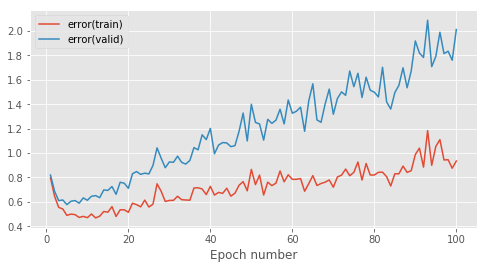

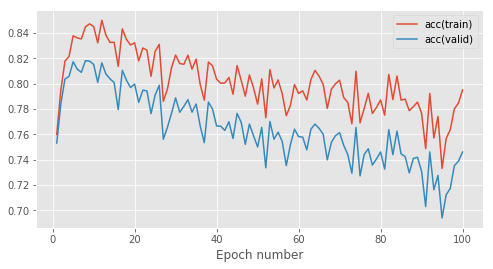

Epoch 1: 6.6s to complete
    error(train)=8.11e-01, acc(train)=7.53e-01, error(valid)=8.29e-01, acc(valid)=7.46e-01


Epoch 2: 4.9s to complete
    error(train)=6.13e-01, acc(train)=8.05e-01, error(valid)=6.48e-01, acc(valid)=7.94e-01


Epoch 3: 6.3s to complete
    error(train)=5.50e-01, acc(train)=8.19e-01, error(valid)=6.01e-01, acc(valid)=8.01e-01


Epoch 4: 5.9s to complete
    error(train)=5.04e-01, acc(train)=8.33e-01, error(valid)=5.72e-01, acc(valid)=8.13e-01


Epoch 5: 5.3s to complete
    error(train)=4.70e-01, acc(train)=8.41e-01, error(valid)=5.52e-01, acc(valid)=8.20e-01


Epoch 6: 6.3s to complete
    error(train)=4.53e-01, acc(train)=8.46e-01, error(valid)=5.54e-01, acc(valid)=8.19e-01


Epoch 7: 6.5s to complete
    error(train)=4.27e-01, acc(train)=8.55e-01, error(valid)=5.51e-01, acc(valid)=8.26e-01


Epoch 8: 5.3s to complete
    error(train)=4.16e-01, acc(train)=8.56e-01, error(valid)=5.55e-01, acc(valid)=8.26e-01


Epoch 9: 5.3s to complete
    error(train)=4.19e-01, acc(train)=8.57e-01, error(valid)=5.71e-01, acc(valid)=8.24e-01


Epoch 10: 3.2s to complete
    error(train)=4.04e-01, acc(train)=8.64e-01, error(valid)=5.85e-01, acc(valid)=8.28e-01


Epoch 11: 3.2s to complete
    error(train)=4.12e-01, acc(train)=8.58e-01, error(valid)=5.88e-01, acc(valid)=8.17e-01


Epoch 12: 3.4s to complete
    error(train)=4.05e-01, acc(train)=8.63e-01, error(valid)=6.07e-01, acc(valid)=8.27e-01


Epoch 13: 3.2s to complete
    error(train)=4.31e-01, acc(train)=8.50e-01, error(valid)=6.18e-01, acc(valid)=8.13e-01


Epoch 14: 3.4s to complete
    error(train)=3.91e-01, acc(train)=8.66e-01, error(valid)=5.97e-01, acc(valid)=8.22e-01


Epoch 15: 3.3s to complete
    error(train)=3.91e-01, acc(train)=8.64e-01, error(valid)=5.98e-01, acc(valid)=8.20e-01


Epoch 16: 3.8s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=6.66e-01, acc(valid)=8.13e-01


Epoch 17: 3.3s to complete
    error(train)=4.36e-01, acc(train)=8.54e-01, error(valid)=6.85e-01, acc(valid)=8.09e-01


Epoch 18: 3.5s to complete
    error(train)=3.92e-01, acc(train)=8.63e-01, error(valid)=6.36e-01, acc(valid)=8.16e-01


Epoch 19: 3.2s to complete
    error(train)=4.11e-01, acc(train)=8.60e-01, error(valid)=6.72e-01, acc(valid)=8.18e-01


Epoch 20: 3.4s to complete
    error(train)=4.15e-01, acc(train)=8.59e-01, error(valid)=6.74e-01, acc(valid)=8.14e-01


Epoch 21: 3.2s to complete
    error(train)=4.34e-01, acc(train)=8.52e-01, error(valid)=6.73e-01, acc(valid)=8.08e-01


Epoch 22: 3.2s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=7.06e-01, acc(valid)=8.10e-01


Epoch 23: 3.1s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=7.50e-01, acc(valid)=8.14e-01


Epoch 24: 3.3s to complete
    error(train)=4.52e-01, acc(train)=8.51e-01, error(valid)=7.42e-01, acc(valid)=8.06e-01


Epoch 25: 3.2s to complete
    error(train)=4.80e-01, acc(train)=8.49e-01, error(valid)=8.16e-01, acc(valid)=8.06e-01


Epoch 26: 3.2s to complete
    error(train)=4.27e-01, acc(train)=8.58e-01, error(valid)=7.51e-01, acc(valid)=8.10e-01


Epoch 27: 3.3s to complete
    error(train)=4.48e-01, acc(train)=8.59e-01, error(valid)=8.12e-01, acc(valid)=8.14e-01


Epoch 28: 3.4s to complete
    error(train)=4.31e-01, acc(train)=8.54e-01, error(valid)=7.47e-01, acc(valid)=8.08e-01


Epoch 29: 3.1s to complete
    error(train)=4.38e-01, acc(train)=8.58e-01, error(valid)=7.58e-01, acc(valid)=8.10e-01


Epoch 30: 3.4s to complete
    error(train)=4.54e-01, acc(train)=8.55e-01, error(valid)=8.32e-01, acc(valid)=8.07e-01


Epoch 31: 3.5s to complete
    error(train)=5.53e-01, acc(train)=8.15e-01, error(valid)=8.34e-01, acc(valid)=7.71e-01


Epoch 32: 3.1s to complete
    error(train)=4.77e-01, acc(train)=8.44e-01, error(valid)=8.60e-01, acc(valid)=7.96e-01


Epoch 33: 3.2s to complete
    error(train)=4.82e-01, acc(train)=8.49e-01, error(valid)=8.69e-01, acc(valid)=8.02e-01


Epoch 34: 3.3s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=8.32e-01, acc(valid)=8.00e-01


Epoch 35: 3.1s to complete
    error(train)=4.82e-01, acc(train)=8.41e-01, error(valid)=8.76e-01, acc(valid)=7.91e-01


Epoch 36: 3.1s to complete
    error(train)=4.63e-01, acc(train)=8.53e-01, error(valid)=8.79e-01, acc(valid)=8.04e-01


Epoch 37: 3.1s to complete
    error(train)=4.54e-01, acc(train)=8.58e-01, error(valid)=9.35e-01, acc(valid)=8.04e-01


Epoch 38: 3.2s to complete
    error(train)=4.40e-01, acc(train)=8.54e-01, error(valid)=8.35e-01, acc(valid)=8.04e-01


Epoch 39: 3.2s to complete
    error(train)=4.98e-01, acc(train)=8.36e-01, error(valid)=8.95e-01, acc(valid)=7.85e-01


Epoch 40: 3.3s to complete
    error(train)=5.44e-01, acc(train)=8.50e-01, error(valid)=1.19e+00, acc(valid)=7.97e-01


Epoch 41: 3.5s to complete
    error(train)=4.83e-01, acc(train)=8.45e-01, error(valid)=9.62e-01, acc(valid)=7.96e-01


Epoch 42: 3.8s to complete
    error(train)=4.61e-01, acc(train)=8.57e-01, error(valid)=9.79e-01, acc(valid)=8.03e-01


Epoch 43: 3.7s to complete
    error(train)=4.50e-01, acc(train)=8.53e-01, error(valid)=9.45e-01, acc(valid)=8.01e-01


Epoch 44: 3.6s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=9.76e-01, acc(valid)=7.97e-01


Epoch 45: 3.5s to complete
    error(train)=4.76e-01, acc(train)=8.54e-01, error(valid)=1.08e+00, acc(valid)=8.06e-01


Epoch 46: 3.8s to complete
    error(train)=5.35e-01, acc(train)=8.47e-01, error(valid)=1.19e+00, acc(valid)=7.96e-01


Epoch 47: 3.5s to complete
    error(train)=4.91e-01, acc(train)=8.48e-01, error(valid)=1.03e+00, acc(valid)=7.96e-01


Epoch 48: 3.0s to complete
    error(train)=4.78e-01, acc(train)=8.52e-01, error(valid)=1.10e+00, acc(valid)=7.96e-01


Epoch 49: 3.1s to complete
    error(train)=4.99e-01, acc(train)=8.40e-01, error(valid)=1.03e+00, acc(valid)=7.85e-01


Epoch 50: 3.1s to complete
    error(train)=4.79e-01, acc(train)=8.43e-01, error(valid)=9.56e-01, acc(valid)=7.93e-01


Epoch 51: 3.4s to complete
    error(train)=5.01e-01, acc(train)=8.47e-01, error(valid)=1.13e+00, acc(valid)=7.91e-01


Epoch 52: 3.2s to complete
    error(train)=5.42e-01, acc(train)=8.31e-01, error(valid)=1.07e+00, acc(valid)=7.81e-01


Epoch 53: 3.2s to complete
    error(train)=5.26e-01, acc(train)=8.45e-01, error(valid)=1.12e+00, acc(valid)=7.94e-01


Epoch 54: 2.9s to complete
    error(train)=4.71e-01, acc(train)=8.61e-01, error(valid)=1.18e+00, acc(valid)=8.05e-01


Epoch 55: 3.1s to complete
    error(train)=5.03e-01, acc(train)=8.50e-01, error(valid)=1.17e+00, acc(valid)=7.96e-01


Epoch 56: 3.0s to complete
    error(train)=4.97e-01, acc(train)=8.44e-01, error(valid)=1.13e+00, acc(valid)=7.87e-01


Epoch 57: 3.1s to complete
    error(train)=6.19e-01, acc(train)=8.31e-01, error(valid)=1.33e+00, acc(valid)=7.80e-01


Epoch 58: 3.0s to complete
    error(train)=5.40e-01, acc(train)=8.41e-01, error(valid)=1.25e+00, acc(valid)=7.86e-01


Epoch 59: 3.1s to complete
    error(train)=5.15e-01, acc(train)=8.50e-01, error(valid)=1.21e+00, acc(valid)=7.97e-01


Epoch 60: 3.3s to complete
    error(train)=4.95e-01, acc(train)=8.50e-01, error(valid)=1.20e+00, acc(valid)=7.97e-01


Epoch 61: 3.4s to complete
    error(train)=5.47e-01, acc(train)=8.49e-01, error(valid)=1.32e+00, acc(valid)=7.96e-01


Epoch 62: 3.1s to complete
    error(train)=5.53e-01, acc(train)=8.30e-01, error(valid)=1.18e+00, acc(valid)=7.81e-01


Epoch 63: 3.1s to complete
    error(train)=5.71e-01, acc(train)=8.26e-01, error(valid)=1.25e+00, acc(valid)=7.74e-01


Epoch 64: 3.0s to complete
    error(train)=5.47e-01, acc(train)=8.36e-01, error(valid)=1.31e+00, acc(valid)=7.86e-01


Epoch 65: 3.3s to complete
    error(train)=5.80e-01, acc(train)=8.32e-01, error(valid)=1.28e+00, acc(valid)=7.82e-01


Epoch 66: 3.7s to complete
    error(train)=5.69e-01, acc(train)=8.46e-01, error(valid)=1.38e+00, acc(valid)=7.93e-01


Epoch 67: 3.6s to complete
    error(train)=5.62e-01, acc(train)=8.22e-01, error(valid)=1.21e+00, acc(valid)=7.64e-01


Epoch 68: 3.7s to complete
    error(train)=5.13e-01, acc(train)=8.47e-01, error(valid)=1.27e+00, acc(valid)=7.89e-01


Epoch 69: 3.4s to complete
    error(train)=5.61e-01, acc(train)=8.29e-01, error(valid)=1.26e+00, acc(valid)=7.79e-01


Epoch 70: 3.7s to complete
    error(train)=5.18e-01, acc(train)=8.51e-01, error(valid)=1.37e+00, acc(valid)=7.94e-01


Epoch 71: 3.2s to complete
    error(train)=6.04e-01, acc(train)=8.35e-01, error(valid)=1.45e+00, acc(valid)=7.84e-01


Epoch 72: 3.2s to complete
    error(train)=5.64e-01, acc(train)=8.36e-01, error(valid)=1.39e+00, acc(valid)=7.83e-01


Epoch 73: 3.1s to complete
    error(train)=5.58e-01, acc(train)=8.39e-01, error(valid)=1.37e+00, acc(valid)=7.81e-01


Epoch 74: 3.2s to complete
    error(train)=5.31e-01, acc(train)=8.35e-01, error(valid)=1.33e+00, acc(valid)=7.79e-01


Epoch 75: 3.2s to complete
    error(train)=5.68e-01, acc(train)=8.49e-01, error(valid)=1.52e+00, acc(valid)=7.94e-01


Epoch 76: 3.7s to complete
    error(train)=5.92e-01, acc(train)=8.38e-01, error(valid)=1.53e+00, acc(valid)=7.87e-01


Epoch 77: 3.2s to complete
    error(train)=5.43e-01, acc(train)=8.48e-01, error(valid)=1.46e+00, acc(valid)=7.94e-01


Epoch 78: 3.1s to complete
    error(train)=5.34e-01, acc(train)=8.44e-01, error(valid)=1.40e+00, acc(valid)=7.84e-01


Epoch 79: 3.2s to complete
    error(train)=5.54e-01, acc(train)=8.35e-01, error(valid)=1.42e+00, acc(valid)=7.76e-01


Epoch 80: 3.2s to complete
    error(train)=5.66e-01, acc(train)=8.38e-01, error(valid)=1.47e+00, acc(valid)=7.80e-01


Epoch 81: 3.3s to complete
    error(train)=5.68e-01, acc(train)=8.39e-01, error(valid)=1.48e+00, acc(valid)=7.84e-01


Epoch 82: 3.1s to complete
    error(train)=6.60e-01, acc(train)=8.23e-01, error(valid)=1.57e+00, acc(valid)=7.72e-01


Epoch 83: 3.2s to complete
    error(train)=5.93e-01, acc(train)=8.29e-01, error(valid)=1.47e+00, acc(valid)=7.74e-01


Epoch 84: 3.1s to complete
    error(train)=6.04e-01, acc(train)=8.41e-01, error(valid)=1.63e+00, acc(valid)=7.86e-01


Epoch 85: 3.0s to complete
    error(train)=6.32e-01, acc(train)=8.49e-01, error(valid)=1.96e+00, acc(valid)=7.90e-01


Epoch 86: 3.4s to complete
    error(train)=6.12e-01, acc(train)=8.39e-01, error(valid)=1.76e+00, acc(valid)=7.81e-01


Epoch 87: 3.2s to complete
    error(train)=6.15e-01, acc(train)=8.22e-01, error(valid)=1.56e+00, acc(valid)=7.71e-01


Epoch 88: 1.9s to complete
    error(train)=6.13e-01, acc(train)=8.22e-01, error(valid)=1.53e+00, acc(valid)=7.66e-01


Epoch 89: 1.7s to complete
    error(train)=5.52e-01, acc(train)=8.37e-01, error(valid)=1.48e+00, acc(valid)=7.79e-01


Epoch 90: 1.7s to complete
    error(train)=5.72e-01, acc(train)=8.36e-01, error(valid)=1.58e+00, acc(valid)=7.81e-01


Epoch 91: 1.7s to complete
    error(train)=5.98e-01, acc(train)=8.24e-01, error(valid)=1.48e+00, acc(valid)=7.73e-01


Epoch 92: 1.9s to complete
    error(train)=6.19e-01, acc(train)=8.21e-01, error(valid)=1.51e+00, acc(valid)=7.66e-01


Epoch 93: 2.0s to complete
    error(train)=6.23e-01, acc(train)=8.43e-01, error(valid)=1.77e+00, acc(valid)=7.87e-01


Epoch 94: 1.7s to complete
    error(train)=7.11e-01, acc(train)=7.91e-01, error(valid)=1.57e+00, acc(valid)=7.38e-01


Epoch 95: 1.8s to complete
    error(train)=6.17e-01, acc(train)=8.33e-01, error(valid)=1.74e+00, acc(valid)=7.77e-01


Epoch 96: 1.8s to complete
    error(train)=5.51e-01, acc(train)=8.28e-01, error(valid)=1.49e+00, acc(valid)=7.68e-01


Epoch 97: 1.7s to complete
    error(train)=6.28e-01, acc(train)=8.34e-01, error(valid)=1.70e+00, acc(valid)=7.79e-01


Epoch 98: 1.7s to complete
    error(train)=5.90e-01, acc(train)=8.28e-01, error(valid)=1.64e+00, acc(valid)=7.71e-01


Epoch 99: 1.7s to complete
    error(train)=5.88e-01, acc(train)=8.38e-01, error(valid)=1.92e+00, acc(valid)=7.75e-01


Epoch 100: 1.7s to complete
    error(train)=6.13e-01, acc(train)=8.31e-01, error(valid)=1.71e+00, acc(valid)=7.74e-01


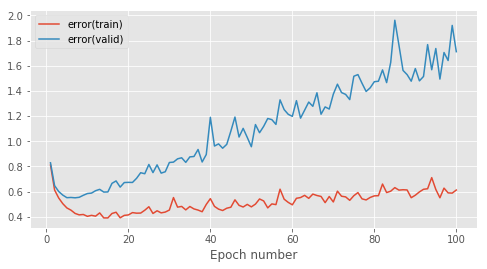

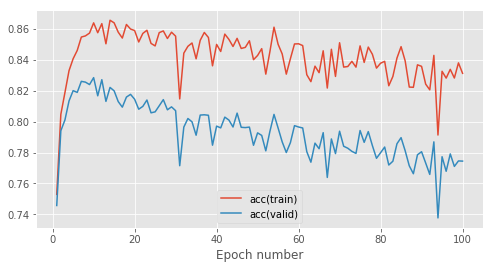

Epoch 1: 1.7s to complete
    error(train)=7.61e-01, acc(train)=7.65e-01, error(valid)=7.76e-01, acc(valid)=7.61e-01


Epoch 2: 1.7s to complete
    error(train)=6.18e-01, acc(train)=7.98e-01, error(valid)=6.60e-01, acc(valid)=7.89e-01


Epoch 3: 1.7s to complete
    error(train)=5.35e-01, acc(train)=8.20e-01, error(valid)=5.97e-01, acc(valid)=8.04e-01


Epoch 4: 1.7s to complete
    error(train)=4.75e-01, acc(train)=8.41e-01, error(valid)=5.45e-01, acc(valid)=8.23e-01


Epoch 5: 2.1s to complete
    error(train)=4.65e-01, acc(train)=8.39e-01, error(valid)=5.54e-01, acc(valid)=8.19e-01


Epoch 6: 1.9s to complete
    error(train)=4.40e-01, acc(train)=8.48e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 7: 1.7s to complete
    error(train)=3.89e-01, acc(train)=8.63e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


Epoch 8: 1.8s to complete
    error(train)=3.81e-01, acc(train)=8.65e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


Epoch 9: 1.8s to complete
    error(train)=3.70e-01, acc(train)=8.68e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


Epoch 10: 1.8s to complete
    error(train)=3.54e-01, acc(train)=8.75e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01


Epoch 11: 1.8s to complete
    error(train)=3.55e-01, acc(train)=8.72e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 12: 1.8s to complete
    error(train)=3.38e-01, acc(train)=8.78e-01, error(valid)=5.25e-01, acc(valid)=8.39e-01


Epoch 13: 1.8s to complete
    error(train)=3.28e-01, acc(train)=8.82e-01, error(valid)=5.23e-01, acc(valid)=8.38e-01


Epoch 14: 1.8s to complete
    error(train)=3.26e-01, acc(train)=8.82e-01, error(valid)=5.27e-01, acc(valid)=8.37e-01


Epoch 15: 1.8s to complete
    error(train)=3.07e-01, acc(train)=8.87e-01, error(valid)=5.27e-01, acc(valid)=8.42e-01


Epoch 16: 1.8s to complete
    error(train)=3.03e-01, acc(train)=8.86e-01, error(valid)=5.61e-01, acc(valid)=8.32e-01


Epoch 17: 1.8s to complete
    error(train)=3.14e-01, acc(train)=8.84e-01, error(valid)=5.88e-01, acc(valid)=8.34e-01


Epoch 18: 2.0s to complete
    error(train)=2.89e-01, acc(train)=8.93e-01, error(valid)=5.74e-01, acc(valid)=8.37e-01


Epoch 19: 1.9s to complete
    error(train)=2.92e-01, acc(train)=8.91e-01, error(valid)=5.71e-01, acc(valid)=8.31e-01


Epoch 20: 1.8s to complete
    error(train)=2.84e-01, acc(train)=8.94e-01, error(valid)=5.93e-01, acc(valid)=8.38e-01


Epoch 21: 1.8s to complete
    error(train)=2.79e-01, acc(train)=8.95e-01, error(valid)=6.14e-01, acc(valid)=8.33e-01


Epoch 22: 1.8s to complete
    error(train)=2.67e-01, acc(train)=8.98e-01, error(valid)=6.14e-01, acc(valid)=8.32e-01


Epoch 23: 1.7s to complete
    error(train)=2.67e-01, acc(train)=8.99e-01, error(valid)=6.35e-01, acc(valid)=8.36e-01


Epoch 24: 1.7s to complete
    error(train)=2.80e-01, acc(train)=8.93e-01, error(valid)=6.31e-01, acc(valid)=8.26e-01


Epoch 25: 1.7s to complete
    error(train)=2.66e-01, acc(train)=9.01e-01, error(valid)=6.81e-01, acc(valid)=8.35e-01


Epoch 26: 1.9s to complete
    error(train)=2.69e-01, acc(train)=8.96e-01, error(valid)=6.68e-01, acc(valid)=8.29e-01


Epoch 27: 1.7s to complete
    error(train)=2.81e-01, acc(train)=8.96e-01, error(valid)=7.35e-01, acc(valid)=8.27e-01


Epoch 28: 1.8s to complete
    error(train)=2.70e-01, acc(train)=8.98e-01, error(valid)=6.94e-01, acc(valid)=8.30e-01


Epoch 29: 1.7s to complete
    error(train)=2.74e-01, acc(train)=8.99e-01, error(valid)=7.46e-01, acc(valid)=8.28e-01


Epoch 30: 1.8s to complete
    error(train)=2.38e-01, acc(train)=9.09e-01, error(valid)=7.27e-01, acc(valid)=8.35e-01


Epoch 31: 1.8s to complete
    error(train)=2.59e-01, acc(train)=9.00e-01, error(valid)=7.21e-01, acc(valid)=8.25e-01


Epoch 32: 1.9s to complete
    error(train)=2.57e-01, acc(train)=9.04e-01, error(valid)=7.79e-01, acc(valid)=8.31e-01


Epoch 33: 1.9s to complete
    error(train)=2.66e-01, acc(train)=9.01e-01, error(valid)=8.22e-01, acc(valid)=8.29e-01


Epoch 34: 1.9s to complete
    error(train)=2.63e-01, acc(train)=9.00e-01, error(valid)=7.94e-01, acc(valid)=8.23e-01


Epoch 35: 2.1s to complete
    error(train)=2.64e-01, acc(train)=8.99e-01, error(valid)=7.85e-01, acc(valid)=8.19e-01


Epoch 36: 1.9s to complete
    error(train)=2.59e-01, acc(train)=9.04e-01, error(valid)=8.58e-01, acc(valid)=8.28e-01


Epoch 37: 1.8s to complete
    error(train)=2.73e-01, acc(train)=8.97e-01, error(valid)=8.40e-01, acc(valid)=8.20e-01


Epoch 38: 1.8s to complete
    error(train)=2.48e-01, acc(train)=9.06e-01, error(valid)=8.43e-01, acc(valid)=8.28e-01


Epoch 39: 1.8s to complete
    error(train)=2.54e-01, acc(train)=9.03e-01, error(valid)=8.62e-01, acc(valid)=8.27e-01


Epoch 40: 1.9s to complete
    error(train)=2.86e-01, acc(train)=8.97e-01, error(valid)=9.70e-01, acc(valid)=8.21e-01


Epoch 41: 1.8s to complete
    error(train)=2.48e-01, acc(train)=9.07e-01, error(valid)=9.18e-01, acc(valid)=8.28e-01


Epoch 42: 1.8s to complete
    error(train)=2.59e-01, acc(train)=9.05e-01, error(valid)=9.46e-01, acc(valid)=8.20e-01


Epoch 43: 1.8s to complete
    error(train)=2.98e-01, acc(train)=8.96e-01, error(valid)=1.02e+00, acc(valid)=8.19e-01


Epoch 44: 1.8s to complete
    error(train)=2.68e-01, acc(train)=8.99e-01, error(valid)=8.79e-01, acc(valid)=8.14e-01


Epoch 45: 1.8s to complete
    error(train)=2.62e-01, acc(train)=8.99e-01, error(valid)=8.67e-01, acc(valid)=8.18e-01


Epoch 46: 1.7s to complete
    error(train)=2.62e-01, acc(train)=9.05e-01, error(valid)=1.01e+00, acc(valid)=8.24e-01


Epoch 47: 1.8s to complete
    error(train)=2.77e-01, acc(train)=9.00e-01, error(valid)=1.05e+00, acc(valid)=8.18e-01


Epoch 48: 1.8s to complete
    error(train)=3.03e-01, acc(train)=9.04e-01, error(valid)=1.20e+00, acc(valid)=8.26e-01


Epoch 49: 1.8s to complete
    error(train)=2.55e-01, acc(train)=9.03e-01, error(valid)=9.46e-01, acc(valid)=8.21e-01


Epoch 50: 1.7s to complete
    error(train)=2.57e-01, acc(train)=9.05e-01, error(valid)=1.04e+00, acc(valid)=8.19e-01


Epoch 51: 1.7s to complete
    error(train)=2.57e-01, acc(train)=9.06e-01, error(valid)=1.05e+00, acc(valid)=8.19e-01


Epoch 52: 2.2s to complete
    error(train)=2.70e-01, acc(train)=9.02e-01, error(valid)=1.05e+00, acc(valid)=8.16e-01


Epoch 53: 2.0s to complete
    error(train)=2.64e-01, acc(train)=9.07e-01, error(valid)=1.13e+00, acc(valid)=8.19e-01


Epoch 54: 1.8s to complete
    error(train)=2.62e-01, acc(train)=9.06e-01, error(valid)=1.10e+00, acc(valid)=8.20e-01


Epoch 55: 1.7s to complete
    error(train)=2.68e-01, acc(train)=9.01e-01, error(valid)=1.11e+00, acc(valid)=8.15e-01


Epoch 56: 1.8s to complete
    error(train)=2.50e-01, acc(train)=9.10e-01, error(valid)=1.14e+00, acc(valid)=8.20e-01


Epoch 57: 2.0s to complete
    error(train)=2.42e-01, acc(train)=9.09e-01, error(valid)=1.07e+00, acc(valid)=8.18e-01


Epoch 58: 1.8s to complete
    error(train)=2.47e-01, acc(train)=9.09e-01, error(valid)=1.14e+00, acc(valid)=8.19e-01


Epoch 59: 2.1s to complete
    error(train)=2.48e-01, acc(train)=9.11e-01, error(valid)=1.21e+00, acc(valid)=8.26e-01


Epoch 60: 1.9s to complete
    error(train)=2.61e-01, acc(train)=9.05e-01, error(valid)=1.18e+00, acc(valid)=8.20e-01


Epoch 61: 1.8s to complete
    error(train)=2.51e-01, acc(train)=9.07e-01, error(valid)=1.17e+00, acc(valid)=8.15e-01


Epoch 62: 1.7s to complete
    error(train)=2.86e-01, acc(train)=9.00e-01, error(valid)=1.19e+00, acc(valid)=8.13e-01


Epoch 63: 1.9s to complete
    error(train)=2.55e-01, acc(train)=9.08e-01, error(valid)=1.23e+00, acc(valid)=8.15e-01


Epoch 64: 1.8s to complete
    error(train)=2.42e-01, acc(train)=9.12e-01, error(valid)=1.24e+00, acc(valid)=8.19e-01


Epoch 65: 1.8s to complete
    error(train)=2.82e-01, acc(train)=9.01e-01, error(valid)=1.25e+00, acc(valid)=8.09e-01


Epoch 66: 1.8s to complete
    error(train)=2.68e-01, acc(train)=9.05e-01, error(valid)=1.29e+00, acc(valid)=8.14e-01


Epoch 67: 2.2s to complete
    error(train)=2.50e-01, acc(train)=9.10e-01, error(valid)=1.26e+00, acc(valid)=8.19e-01


Epoch 68: 1.8s to complete
    error(train)=3.04e-01, acc(train)=8.97e-01, error(valid)=1.37e+00, acc(valid)=8.09e-01


Epoch 69: 1.8s to complete
    error(train)=2.55e-01, acc(train)=9.07e-01, error(valid)=1.30e+00, acc(valid)=8.13e-01


Epoch 70: 1.8s to complete
    error(train)=2.78e-01, acc(train)=9.03e-01, error(valid)=1.32e+00, acc(valid)=8.12e-01


Epoch 71: 1.7s to complete
    error(train)=2.67e-01, acc(train)=9.06e-01, error(valid)=1.36e+00, acc(valid)=8.12e-01


Epoch 72: 1.8s to complete
    error(train)=3.22e-01, acc(train)=9.04e-01, error(valid)=1.65e+00, acc(valid)=8.12e-01


Epoch 73: 1.8s to complete
    error(train)=2.61e-01, acc(train)=9.04e-01, error(valid)=1.36e+00, acc(valid)=8.09e-01


Epoch 74: 1.7s to complete
    error(train)=3.03e-01, acc(train)=8.98e-01, error(valid)=1.41e+00, acc(valid)=8.06e-01


Epoch 75: 1.8s to complete
    error(train)=2.73e-01, acc(train)=9.05e-01, error(valid)=1.41e+00, acc(valid)=8.16e-01


Epoch 76: 1.8s to complete
    error(train)=2.54e-01, acc(train)=9.13e-01, error(valid)=1.53e+00, acc(valid)=8.17e-01


Epoch 77: 2.0s to complete
    error(train)=2.85e-01, acc(train)=9.02e-01, error(valid)=1.51e+00, acc(valid)=8.12e-01


Epoch 78: 1.7s to complete
    error(train)=2.71e-01, acc(train)=9.07e-01, error(valid)=1.55e+00, acc(valid)=8.12e-01


Epoch 79: 1.7s to complete
    error(train)=2.65e-01, acc(train)=9.12e-01, error(valid)=1.63e+00, acc(valid)=8.16e-01


Epoch 80: 1.8s to complete
    error(train)=2.85e-01, acc(train)=9.06e-01, error(valid)=1.56e+00, acc(valid)=8.13e-01


Epoch 81: 1.7s to complete
    error(train)=3.32e-01, acc(train)=8.98e-01, error(valid)=1.69e+00, acc(valid)=8.07e-01


Epoch 82: 1.7s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=1.49e+00, acc(valid)=8.04e-01


Epoch 83: 1.9s to complete
    error(train)=2.65e-01, acc(train)=9.06e-01, error(valid)=1.50e+00, acc(valid)=8.14e-01


Epoch 84: 1.7s to complete
    error(train)=2.83e-01, acc(train)=9.05e-01, error(valid)=1.63e+00, acc(valid)=8.11e-01


Epoch 85: 1.7s to complete
    error(train)=2.65e-01, acc(train)=9.10e-01, error(valid)=1.67e+00, acc(valid)=8.13e-01


Epoch 86: 1.7s to complete
    error(train)=3.32e-01, acc(train)=8.95e-01, error(valid)=1.69e+00, acc(valid)=8.03e-01


Epoch 87: 1.7s to complete
    error(train)=2.68e-01, acc(train)=9.10e-01, error(valid)=1.66e+00, acc(valid)=8.12e-01


Epoch 88: 1.7s to complete
    error(train)=2.72e-01, acc(train)=9.06e-01, error(valid)=1.61e+00, acc(valid)=8.13e-01


Epoch 89: 1.8s to complete
    error(train)=3.14e-01, acc(train)=8.96e-01, error(valid)=1.55e+00, acc(valid)=8.03e-01


Epoch 90: 1.7s to complete
    error(train)=2.96e-01, acc(train)=9.03e-01, error(valid)=1.65e+00, acc(valid)=8.08e-01


Epoch 91: 1.9s to complete
    error(train)=2.77e-01, acc(train)=9.10e-01, error(valid)=1.75e+00, acc(valid)=8.13e-01


Epoch 92: 1.7s to complete
    error(train)=2.96e-01, acc(train)=8.99e-01, error(valid)=1.62e+00, acc(valid)=8.04e-01


Epoch 93: 1.7s to complete
    error(train)=2.88e-01, acc(train)=9.06e-01, error(valid)=1.70e+00, acc(valid)=8.09e-01


Epoch 94: 1.7s to complete
    error(train)=3.21e-01, acc(train)=8.95e-01, error(valid)=1.58e+00, acc(valid)=8.01e-01


Epoch 95: 1.9s to complete
    error(train)=2.74e-01, acc(train)=9.07e-01, error(valid)=1.75e+00, acc(valid)=8.11e-01


Epoch 96: 1.7s to complete
    error(train)=2.74e-01, acc(train)=9.09e-01, error(valid)=1.78e+00, acc(valid)=8.13e-01


Epoch 97: 1.7s to complete
    error(train)=3.12e-01, acc(train)=9.01e-01, error(valid)=1.81e+00, acc(valid)=8.05e-01


Epoch 98: 1.7s to complete
    error(train)=2.78e-01, acc(train)=9.07e-01, error(valid)=1.78e+00, acc(valid)=8.10e-01


Epoch 99: 1.7s to complete
    error(train)=2.68e-01, acc(train)=9.09e-01, error(valid)=1.78e+00, acc(valid)=8.12e-01


Epoch 100: 1.9s to complete
    error(train)=2.53e-01, acc(train)=9.16e-01, error(valid)=1.94e+00, acc(valid)=8.21e-01


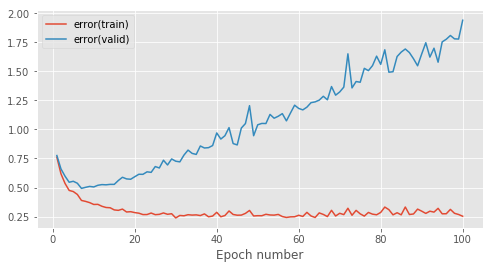

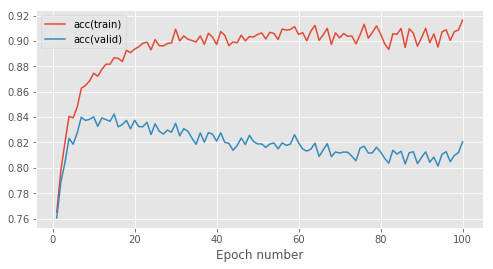

Epoch 1: 1.7s to complete
    error(train)=1.02e+00, acc(train)=7.02e-01, error(valid)=1.03e+00, acc(valid)=7.00e-01


Epoch 2: 1.9s to complete
    error(train)=7.62e-01, acc(train)=7.69e-01, error(valid)=7.84e-01, acc(valid)=7.64e-01


Epoch 3: 1.8s to complete
    error(train)=6.62e-01, acc(train)=7.92e-01, error(valid)=6.90e-01, acc(valid)=7.82e-01


Epoch 4: 1.8s to complete
    error(train)=6.05e-01, acc(train)=8.08e-01, error(valid)=6.45e-01, acc(valid)=7.98e-01


Epoch 5: 1.6s to complete
    error(train)=5.63e-01, acc(train)=8.20e-01, error(valid)=6.09e-01, acc(valid)=8.06e-01


Epoch 6: 1.8s to complete
    error(train)=5.18e-01, acc(train)=8.33e-01, error(valid)=5.77e-01, acc(valid)=8.18e-01


Epoch 7: 1.7s to complete
    error(train)=4.99e-01, acc(train)=8.36e-01, error(valid)=5.64e-01, acc(valid)=8.17e-01


Epoch 8: 1.8s to complete
    error(train)=4.86e-01, acc(train)=8.38e-01, error(valid)=5.59e-01, acc(valid)=8.19e-01


Epoch 9: 1.8s to complete
    error(train)=4.56e-01, acc(train)=8.49e-01, error(valid)=5.46e-01, acc(valid)=8.26e-01


Epoch 10: 1.9s to complete
    error(train)=4.65e-01, acc(train)=8.45e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 11: 1.9s to complete
    error(train)=4.39e-01, acc(train)=8.54e-01, error(valid)=5.45e-01, acc(valid)=8.29e-01


Epoch 12: 2.0s to complete
    error(train)=4.31e-01, acc(train)=8.56e-01, error(valid)=5.47e-01, acc(valid)=8.26e-01


Epoch 13: 1.7s to complete
    error(train)=4.17e-01, acc(train)=8.59e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 14: 1.7s to complete
    error(train)=4.32e-01, acc(train)=8.56e-01, error(valid)=5.63e-01, acc(valid)=8.23e-01


Epoch 15: 1.7s to complete
    error(train)=3.95e-01, acc(train)=8.67e-01, error(valid)=5.32e-01, acc(valid)=8.34e-01


Epoch 16: 1.9s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=5.36e-01, acc(valid)=8.31e-01


Epoch 17: 1.7s to complete
    error(train)=4.04e-01, acc(train)=8.63e-01, error(valid)=5.56e-01, acc(valid)=8.26e-01


Epoch 18: 1.7s to complete
    error(train)=4.11e-01, acc(train)=8.59e-01, error(valid)=5.79e-01, acc(valid)=8.22e-01


Epoch 19: 1.7s to complete
    error(train)=3.94e-01, acc(train)=8.65e-01, error(valid)=5.57e-01, acc(valid)=8.25e-01


Epoch 20: 1.7s to complete
    error(train)=3.92e-01, acc(train)=8.65e-01, error(valid)=5.70e-01, acc(valid)=8.24e-01


Epoch 21: 1.8s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=5.82e-01, acc(valid)=8.29e-01


Epoch 22: 1.9s to complete
    error(train)=3.93e-01, acc(train)=8.66e-01, error(valid)=6.01e-01, acc(valid)=8.21e-01


Epoch 23: 1.7s to complete
    error(train)=4.01e-01, acc(train)=8.64e-01, error(valid)=6.14e-01, acc(valid)=8.23e-01


Epoch 24: 1.8s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=6.07e-01, acc(valid)=8.29e-01


Epoch 25: 1.8s to complete
    error(train)=3.84e-01, acc(train)=8.71e-01, error(valid)=6.06e-01, acc(valid)=8.27e-01


Epoch 26: 1.8s to complete
    error(train)=3.89e-01, acc(train)=8.69e-01, error(valid)=6.30e-01, acc(valid)=8.23e-01


Epoch 27: 1.7s to complete
    error(train)=3.87e-01, acc(train)=8.69e-01, error(valid)=6.22e-01, acc(valid)=8.20e-01


Epoch 28: 1.7s to complete
    error(train)=4.02e-01, acc(train)=8.68e-01, error(valid)=6.60e-01, acc(valid)=8.22e-01


Epoch 29: 1.8s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=6.79e-01, acc(valid)=8.19e-01


Epoch 30: 1.9s to complete
    error(train)=4.06e-01, acc(train)=8.70e-01, error(valid)=7.00e-01, acc(valid)=8.22e-01


Epoch 31: 1.7s to complete
    error(train)=4.06e-01, acc(train)=8.62e-01, error(valid)=6.27e-01, acc(valid)=8.19e-01


Epoch 32: 1.7s to complete
    error(train)=4.08e-01, acc(train)=8.69e-01, error(valid)=7.13e-01, acc(valid)=8.22e-01


Epoch 33: 1.7s to complete
    error(train)=4.57e-01, acc(train)=8.56e-01, error(valid)=7.58e-01, acc(valid)=8.08e-01


Epoch 34: 1.7s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=7.06e-01, acc(valid)=8.12e-01


Epoch 35: 1.6s to complete
    error(train)=4.11e-01, acc(train)=8.63e-01, error(valid)=6.97e-01, acc(valid)=8.13e-01


Epoch 36: 1.9s to complete
    error(train)=4.21e-01, acc(train)=8.65e-01, error(valid)=7.50e-01, acc(valid)=8.15e-01


Epoch 37: 1.6s to complete
    error(train)=4.48e-01, acc(train)=8.57e-01, error(valid)=7.67e-01, acc(valid)=8.11e-01


Epoch 38: 1.7s to complete
    error(train)=4.30e-01, acc(train)=8.56e-01, error(valid)=7.43e-01, acc(valid)=8.04e-01


Epoch 39: 1.7s to complete
    error(train)=4.35e-01, acc(train)=8.59e-01, error(valid)=7.94e-01, acc(valid)=8.10e-01


Epoch 40: 1.7s to complete
    error(train)=4.38e-01, acc(train)=8.59e-01, error(valid)=8.13e-01, acc(valid)=8.08e-01


Epoch 41: 1.8s to complete
    error(train)=4.09e-01, acc(train)=8.67e-01, error(valid)=7.35e-01, acc(valid)=8.13e-01


Epoch 42: 1.7s to complete
    error(train)=4.56e-01, acc(train)=8.45e-01, error(valid)=7.68e-01, acc(valid)=7.94e-01


Epoch 43: 1.7s to complete
    error(train)=4.59e-01, acc(train)=8.54e-01, error(valid)=7.99e-01, acc(valid)=8.04e-01


Epoch 44: 1.8s to complete
    error(train)=4.26e-01, acc(train)=8.66e-01, error(valid)=8.32e-01, acc(valid)=8.13e-01


Epoch 45: 1.7s to complete
    error(train)=4.44e-01, acc(train)=8.50e-01, error(valid)=7.70e-01, acc(valid)=7.99e-01


Epoch 46: 1.8s to complete
    error(train)=4.63e-01, acc(train)=8.54e-01, error(valid)=8.92e-01, acc(valid)=8.02e-01


Epoch 47: 1.7s to complete
    error(train)=4.45e-01, acc(train)=8.52e-01, error(valid)=8.17e-01, acc(valid)=8.00e-01


Epoch 48: 1.6s to complete
    error(train)=4.56e-01, acc(train)=8.47e-01, error(valid)=8.40e-01, acc(valid)=7.95e-01


Epoch 49: 1.7s to complete
    error(train)=4.73e-01, acc(train)=8.53e-01, error(valid)=9.08e-01, acc(valid)=8.02e-01


Epoch 50: 1.7s to complete
    error(train)=4.72e-01, acc(train)=8.60e-01, error(valid)=9.66e-01, acc(valid)=8.03e-01


Epoch 51: 1.7s to complete
    error(train)=4.89e-01, acc(train)=8.39e-01, error(valid)=8.90e-01, acc(valid)=7.89e-01


Epoch 52: 1.7s to complete
    error(train)=4.93e-01, acc(train)=8.54e-01, error(valid)=1.05e+00, acc(valid)=8.02e-01


Epoch 53: 1.7s to complete
    error(train)=4.60e-01, acc(train)=8.53e-01, error(valid)=8.87e-01, acc(valid)=7.99e-01


Epoch 54: 1.7s to complete
    error(train)=4.49e-01, acc(train)=8.59e-01, error(valid)=9.52e-01, acc(valid)=8.02e-01


Epoch 55: 1.8s to complete
    error(train)=4.61e-01, acc(train)=8.54e-01, error(valid)=9.25e-01, acc(valid)=8.00e-01


Epoch 56: 1.7s to complete
    error(train)=4.44e-01, acc(train)=8.64e-01, error(valid)=9.87e-01, acc(valid)=8.08e-01


Epoch 57: 1.7s to complete
    error(train)=4.80e-01, acc(train)=8.46e-01, error(valid)=9.44e-01, acc(valid)=7.93e-01


Epoch 58: 1.7s to complete
    error(train)=4.90e-01, acc(train)=8.46e-01, error(valid)=9.67e-01, acc(valid)=7.89e-01


Epoch 59: 1.6s to complete
    error(train)=4.46e-01, acc(train)=8.60e-01, error(valid)=9.80e-01, acc(valid)=8.02e-01


Epoch 60: 1.7s to complete
    error(train)=4.71e-01, acc(train)=8.55e-01, error(valid)=1.02e+00, acc(valid)=7.95e-01


Epoch 61: 1.7s to complete
    error(train)=4.68e-01, acc(train)=8.57e-01, error(valid)=1.03e+00, acc(valid)=7.99e-01


Epoch 62: 1.8s to complete
    error(train)=4.53e-01, acc(train)=8.61e-01, error(valid)=1.03e+00, acc(valid)=8.02e-01


Epoch 63: 1.8s to complete
    error(train)=4.49e-01, acc(train)=8.58e-01, error(valid)=9.66e-01, acc(valid)=8.00e-01


Epoch 64: 1.9s to complete
    error(train)=4.83e-01, acc(train)=8.45e-01, error(valid)=1.04e+00, acc(valid)=7.87e-01


Epoch 65: 1.7s to complete
    error(train)=4.67e-01, acc(train)=8.52e-01, error(valid)=1.03e+00, acc(valid)=7.94e-01


Epoch 66: 1.7s to complete
    error(train)=4.81e-01, acc(train)=8.53e-01, error(valid)=1.08e+00, acc(valid)=7.95e-01


Epoch 67: 1.7s to complete
    error(train)=5.16e-01, acc(train)=8.42e-01, error(valid)=1.08e+00, acc(valid)=7.90e-01


Epoch 68: 1.7s to complete
    error(train)=4.56e-01, acc(train)=8.55e-01, error(valid)=1.01e+00, acc(valid)=7.98e-01


Epoch 69: 1.7s to complete
    error(train)=5.23e-01, acc(train)=8.30e-01, error(valid)=1.03e+00, acc(valid)=7.74e-01


Epoch 70: 1.7s to complete
    error(train)=4.84e-01, acc(train)=8.55e-01, error(valid)=1.14e+00, acc(valid)=7.97e-01


Epoch 71: 1.7s to complete
    error(train)=5.06e-01, acc(train)=8.51e-01, error(valid)=1.13e+00, acc(valid)=7.96e-01


Epoch 72: 1.7s to complete
    error(train)=4.57e-01, acc(train)=8.61e-01, error(valid)=1.11e+00, acc(valid)=7.99e-01


Epoch 73: 1.7s to complete
    error(train)=5.69e-01, acc(train)=8.51e-01, error(valid)=1.36e+00, acc(valid)=7.94e-01


Epoch 74: 1.7s to complete
    error(train)=5.03e-01, acc(train)=8.44e-01, error(valid)=1.10e+00, acc(valid)=7.88e-01


Epoch 75: 1.7s to complete
    error(train)=4.86e-01, acc(train)=8.51e-01, error(valid)=1.14e+00, acc(valid)=7.91e-01


Epoch 76: 1.7s to complete
    error(train)=4.81e-01, acc(train)=8.45e-01, error(valid)=1.03e+00, acc(valid)=7.85e-01


Epoch 77: 1.9s to complete
    error(train)=4.81e-01, acc(train)=8.50e-01, error(valid)=1.13e+00, acc(valid)=7.94e-01


Epoch 78: 1.7s to complete
    error(train)=4.86e-01, acc(train)=8.58e-01, error(valid)=1.18e+00, acc(valid)=7.97e-01


Epoch 79: 1.7s to complete
    error(train)=5.09e-01, acc(train)=8.50e-01, error(valid)=1.20e+00, acc(valid)=7.92e-01


Epoch 80: 1.7s to complete
    error(train)=4.74e-01, acc(train)=8.55e-01, error(valid)=1.10e+00, acc(valid)=7.97e-01


Epoch 81: 1.7s to complete
    error(train)=4.98e-01, acc(train)=8.52e-01, error(valid)=1.22e+00, acc(valid)=7.93e-01


Epoch 82: 1.8s to complete
    error(train)=5.49e-01, acc(train)=8.35e-01, error(valid)=1.22e+00, acc(valid)=7.79e-01


Epoch 83: 1.9s to complete
    error(train)=4.90e-01, acc(train)=8.49e-01, error(valid)=1.08e+00, acc(valid)=7.87e-01


Epoch 84: 1.7s to complete
    error(train)=4.78e-01, acc(train)=8.46e-01, error(valid)=1.11e+00, acc(valid)=7.85e-01


Epoch 85: 1.7s to complete
    error(train)=4.82e-01, acc(train)=8.51e-01, error(valid)=1.15e+00, acc(valid)=7.88e-01


Epoch 86: 1.7s to complete
    error(train)=5.16e-01, acc(train)=8.57e-01, error(valid)=1.31e+00, acc(valid)=7.97e-01


Epoch 87: 1.8s to complete
    error(train)=4.79e-01, acc(train)=8.62e-01, error(valid)=1.25e+00, acc(valid)=8.02e-01


Epoch 88: 1.7s to complete
    error(train)=4.85e-01, acc(train)=8.59e-01, error(valid)=1.24e+00, acc(valid)=8.01e-01


Epoch 89: 1.6s to complete
    error(train)=4.75e-01, acc(train)=8.55e-01, error(valid)=1.20e+00, acc(valid)=7.95e-01


Epoch 90: 1.6s to complete
    error(train)=6.19e-01, acc(train)=8.35e-01, error(valid)=1.41e+00, acc(valid)=7.79e-01


Epoch 91: 1.7s to complete
    error(train)=5.06e-01, acc(train)=8.56e-01, error(valid)=1.29e+00, acc(valid)=7.95e-01


Epoch 92: 1.7s to complete
    error(train)=4.69e-01, acc(train)=8.54e-01, error(valid)=1.13e+00, acc(valid)=7.95e-01


Epoch 93: 1.7s to complete
    error(train)=4.87e-01, acc(train)=8.54e-01, error(valid)=1.22e+00, acc(valid)=7.97e-01


Epoch 94: 1.7s to complete
    error(train)=5.57e-01, acc(train)=8.45e-01, error(valid)=1.34e+00, acc(valid)=7.91e-01


Epoch 95: 1.8s to complete
    error(train)=5.42e-01, acc(train)=8.42e-01, error(valid)=1.26e+00, acc(valid)=7.84e-01


Epoch 96: 1.7s to complete
    error(train)=5.02e-01, acc(train)=8.53e-01, error(valid)=1.24e+00, acc(valid)=7.88e-01


Epoch 97: 1.7s to complete
    error(train)=5.93e-01, acc(train)=8.22e-01, error(valid)=1.20e+00, acc(valid)=7.68e-01


Epoch 98: 1.7s to complete
    error(train)=5.63e-01, acc(train)=8.39e-01, error(valid)=1.35e+00, acc(valid)=7.85e-01


Epoch 99: 1.8s to complete
    error(train)=4.99e-01, acc(train)=8.45e-01, error(valid)=1.16e+00, acc(valid)=7.85e-01


Epoch 100: 1.7s to complete
    error(train)=5.26e-01, acc(train)=8.44e-01, error(valid)=1.24e+00, acc(valid)=7.90e-01


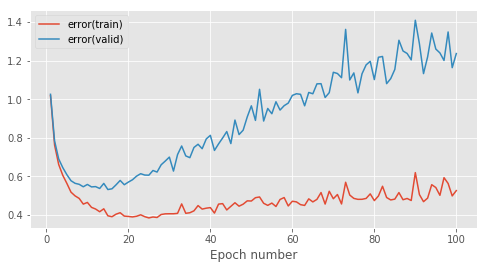

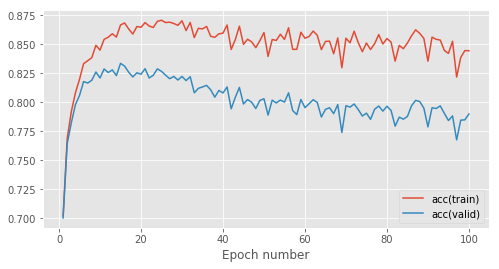

Epoch 1: 1.7s to complete
    error(train)=1.03e+00, acc(train)=7.00e-01, error(valid)=1.05e+00, acc(valid)=6.93e-01


Epoch 2: 1.7s to complete
    error(train)=7.98e-01, acc(train)=7.57e-01, error(valid)=8.26e-01, acc(valid)=7.50e-01


Epoch 3: 1.7s to complete
    error(train)=6.71e-01, acc(train)=7.91e-01, error(valid)=7.10e-01, acc(valid)=7.83e-01


Epoch 4: 1.7s to complete
    error(train)=6.09e-01, acc(train)=8.09e-01, error(valid)=6.58e-01, acc(valid)=7.93e-01


Epoch 5: 1.7s to complete
    error(train)=5.70e-01, acc(train)=8.17e-01, error(valid)=6.29e-01, acc(valid)=7.99e-01


Epoch 6: 1.8s to complete
    error(train)=5.25e-01, acc(train)=8.28e-01, error(valid)=5.91e-01, acc(valid)=8.11e-01


Epoch 7: 1.8s to complete
    error(train)=5.03e-01, acc(train)=8.35e-01, error(valid)=5.77e-01, acc(valid)=8.14e-01


Epoch 8: 1.7s to complete
    error(train)=4.79e-01, acc(train)=8.40e-01, error(valid)=5.70e-01, acc(valid)=8.17e-01


Epoch 9: 1.7s to complete
    error(train)=4.56e-01, acc(train)=8.48e-01, error(valid)=5.55e-01, acc(valid)=8.21e-01


Epoch 10: 1.8s to complete
    error(train)=4.31e-01, acc(train)=8.56e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


Epoch 11: 1.7s to complete
    error(train)=4.37e-01, acc(train)=8.51e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 12: 1.7s to complete
    error(train)=4.13e-01, acc(train)=8.59e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 13: 1.7s to complete
    error(train)=4.28e-01, acc(train)=8.54e-01, error(valid)=5.62e-01, acc(valid)=8.24e-01


Epoch 14: 1.8s to complete
    error(train)=3.97e-01, acc(train)=8.65e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 15: 1.7s to complete
    error(train)=4.01e-01, acc(train)=8.63e-01, error(valid)=5.54e-01, acc(valid)=8.29e-01


Epoch 16: 1.8s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=5.36e-01, acc(valid)=8.34e-01


Epoch 17: 1.8s to complete
    error(train)=3.70e-01, acc(train)=8.71e-01, error(valid)=5.46e-01, acc(valid)=8.32e-01


Epoch 18: 1.8s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=5.39e-01, acc(valid)=8.38e-01


Epoch 19: 1.7s to complete
    error(train)=3.61e-01, acc(train)=8.74e-01, error(valid)=5.53e-01, acc(valid)=8.34e-01


Epoch 20: 1.7s to complete
    error(train)=3.57e-01, acc(train)=8.76e-01, error(valid)=5.60e-01, acc(valid)=8.31e-01


Epoch 21: 1.8s to complete
    error(train)=3.46e-01, acc(train)=8.78e-01, error(valid)=5.59e-01, acc(valid)=8.30e-01


Epoch 22: 1.8s to complete
    error(train)=3.35e-01, acc(train)=8.83e-01, error(valid)=5.57e-01, acc(valid)=8.31e-01


Epoch 23: 1.9s to complete
    error(train)=3.35e-01, acc(train)=8.82e-01, error(valid)=5.62e-01, acc(valid)=8.33e-01


Epoch 24: 1.8s to complete
    error(train)=3.34e-01, acc(train)=8.83e-01, error(valid)=5.79e-01, acc(valid)=8.32e-01


Epoch 25: 1.7s to complete
    error(train)=3.44e-01, acc(train)=8.80e-01, error(valid)=5.91e-01, acc(valid)=8.29e-01


Epoch 26: 1.8s to complete
    error(train)=3.33e-01, acc(train)=8.81e-01, error(valid)=5.82e-01, acc(valid)=8.28e-01


Epoch 27: 1.8s to complete
    error(train)=3.29e-01, acc(train)=8.85e-01, error(valid)=5.85e-01, acc(valid)=8.29e-01


Epoch 28: 1.8s to complete
    error(train)=3.18e-01, acc(train)=8.88e-01, error(valid)=5.97e-01, acc(valid)=8.31e-01


Epoch 29: 1.8s to complete
    error(train)=3.19e-01, acc(train)=8.88e-01, error(valid)=6.08e-01, acc(valid)=8.26e-01


Epoch 30: 1.8s to complete
    error(train)=3.26e-01, acc(train)=8.84e-01, error(valid)=6.20e-01, acc(valid)=8.29e-01


Epoch 31: 1.7s to complete
    error(train)=3.19e-01, acc(train)=8.87e-01, error(valid)=6.22e-01, acc(valid)=8.28e-01


Epoch 32: 1.7s to complete
    error(train)=3.35e-01, acc(train)=8.79e-01, error(valid)=6.35e-01, acc(valid)=8.19e-01


Epoch 33: 1.7s to complete
    error(train)=3.06e-01, acc(train)=8.92e-01, error(valid)=6.16e-01, acc(valid)=8.30e-01


Epoch 34: 2.1s to complete
    error(train)=3.09e-01, acc(train)=8.90e-01, error(valid)=6.22e-01, acc(valid)=8.27e-01


Epoch 35: 2.1s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=6.45e-01, acc(valid)=8.29e-01


Epoch 36: 1.8s to complete
    error(train)=3.11e-01, acc(train)=8.90e-01, error(valid)=6.75e-01, acc(valid)=8.23e-01


Epoch 37: 1.8s to complete
    error(train)=3.05e-01, acc(train)=8.91e-01, error(valid)=6.72e-01, acc(valid)=8.25e-01


Epoch 38: 1.8s to complete
    error(train)=3.07e-01, acc(train)=8.91e-01, error(valid)=6.58e-01, acc(valid)=8.24e-01


Epoch 39: 1.9s to complete
    error(train)=3.24e-01, acc(train)=8.85e-01, error(valid)=6.74e-01, acc(valid)=8.22e-01


Epoch 40: 1.8s to complete
    error(train)=3.02e-01, acc(train)=8.91e-01, error(valid)=6.88e-01, acc(valid)=8.24e-01


Epoch 41: 1.8s to complete
    error(train)=3.02e-01, acc(train)=8.93e-01, error(valid)=6.96e-01, acc(valid)=8.26e-01


Epoch 42: 1.8s to complete
    error(train)=3.27e-01, acc(train)=8.81e-01, error(valid)=6.97e-01, acc(valid)=8.12e-01


Epoch 43: 1.7s to complete
    error(train)=3.13e-01, acc(train)=8.89e-01, error(valid)=7.28e-01, acc(valid)=8.17e-01


Epoch 44: 1.7s to complete
    error(train)=3.28e-01, acc(train)=8.83e-01, error(valid)=7.74e-01, acc(valid)=8.18e-01


Epoch 45: 1.7s to complete
    error(train)=2.96e-01, acc(train)=8.93e-01, error(valid)=7.19e-01, acc(valid)=8.23e-01


Epoch 46: 1.9s to complete
    error(train)=3.04e-01, acc(train)=8.90e-01, error(valid)=7.73e-01, acc(valid)=8.18e-01


Epoch 47: 1.8s to complete
    error(train)=3.05e-01, acc(train)=8.92e-01, error(valid)=7.69e-01, acc(valid)=8.22e-01


Epoch 48: 1.7s to complete
    error(train)=3.00e-01, acc(train)=8.93e-01, error(valid)=7.46e-01, acc(valid)=8.19e-01


Epoch 49: 1.8s to complete
    error(train)=2.97e-01, acc(train)=8.94e-01, error(valid)=7.62e-01, acc(valid)=8.21e-01


Epoch 50: 1.8s to complete
    error(train)=3.23e-01, acc(train)=8.83e-01, error(valid)=7.63e-01, acc(valid)=8.12e-01


Epoch 51: 1.7s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=8.70e-01, acc(valid)=8.12e-01


Epoch 52: 1.7s to complete
    error(train)=3.20e-01, acc(train)=8.94e-01, error(valid)=8.77e-01, acc(valid)=8.23e-01


Epoch 53: 1.7s to complete
    error(train)=3.67e-01, acc(train)=8.80e-01, error(valid)=9.27e-01, acc(valid)=8.10e-01


Epoch 54: 2.0s to complete
    error(train)=3.03e-01, acc(train)=8.94e-01, error(valid)=8.33e-01, acc(valid)=8.21e-01


Epoch 55: 1.8s to complete
    error(train)=3.16e-01, acc(train)=8.84e-01, error(valid)=7.93e-01, acc(valid)=8.07e-01


Epoch 56: 1.8s to complete
    error(train)=3.12e-01, acc(train)=8.92e-01, error(valid)=8.71e-01, acc(valid)=8.17e-01


Epoch 57: 1.7s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=8.71e-01, acc(valid)=8.17e-01


Epoch 58: 1.7s to complete
    error(train)=3.47e-01, acc(train)=8.74e-01, error(valid)=8.09e-01, acc(valid)=7.98e-01


Epoch 59: 1.7s to complete
    error(train)=2.97e-01, acc(train)=8.93e-01, error(valid)=8.06e-01, acc(valid)=8.13e-01


Epoch 60: 1.7s to complete
    error(train)=2.96e-01, acc(train)=8.96e-01, error(valid)=8.73e-01, acc(valid)=8.15e-01


Epoch 61: 1.7s to complete
    error(train)=2.92e-01, acc(train)=8.97e-01, error(valid)=8.08e-01, acc(valid)=8.15e-01


Epoch 62: 1.7s to complete
    error(train)=3.17e-01, acc(train)=8.93e-01, error(valid)=9.30e-01, acc(valid)=8.17e-01


Epoch 63: 1.7s to complete
    error(train)=3.11e-01, acc(train)=8.90e-01, error(valid)=8.67e-01, acc(valid)=8.12e-01


Epoch 64: 1.7s to complete
    error(train)=3.23e-01, acc(train)=8.90e-01, error(valid)=9.65e-01, acc(valid)=8.14e-01


Epoch 65: 1.9s to complete
    error(train)=3.16e-01, acc(train)=8.88e-01, error(valid)=8.88e-01, acc(valid)=8.06e-01


Epoch 66: 1.8s to complete
    error(train)=3.23e-01, acc(train)=8.85e-01, error(valid)=9.13e-01, acc(valid)=8.05e-01


Epoch 67: 1.8s to complete
    error(train)=3.05e-01, acc(train)=8.91e-01, error(valid)=8.85e-01, acc(valid)=8.08e-01


Epoch 68: 1.8s to complete
    error(train)=3.05e-01, acc(train)=8.92e-01, error(valid)=9.10e-01, acc(valid)=8.12e-01


Epoch 69: 1.7s to complete
    error(train)=3.02e-01, acc(train)=8.98e-01, error(valid)=1.01e+00, acc(valid)=8.17e-01


Epoch 70: 1.7s to complete
    error(train)=2.95e-01, acc(train)=8.94e-01, error(valid)=9.37e-01, acc(valid)=8.09e-01


Epoch 71: 1.8s to complete
    error(train)=3.06e-01, acc(train)=8.92e-01, error(valid)=9.73e-01, acc(valid)=8.10e-01


Epoch 72: 1.9s to complete
    error(train)=3.27e-01, acc(train)=8.86e-01, error(valid)=1.01e+00, acc(valid)=8.05e-01


Epoch 73: 2.0s to complete
    error(train)=3.30e-01, acc(train)=8.86e-01, error(valid)=1.03e+00, acc(valid)=8.03e-01


Epoch 74: 1.7s to complete
    error(train)=3.06e-01, acc(train)=8.93e-01, error(valid)=9.82e-01, acc(valid)=8.10e-01


Epoch 75: 1.9s to complete
    error(train)=3.76e-01, acc(train)=8.73e-01, error(valid)=1.04e+00, acc(valid)=7.98e-01


Epoch 76: 1.7s to complete
    error(train)=3.03e-01, acc(train)=8.94e-01, error(valid)=9.94e-01, acc(valid)=8.10e-01


Epoch 77: 1.9s to complete
    error(train)=3.01e-01, acc(train)=8.92e-01, error(valid)=9.98e-01, acc(valid)=8.06e-01


Epoch 78: 1.7s to complete
    error(train)=3.03e-01, acc(train)=8.92e-01, error(valid)=9.89e-01, acc(valid)=8.04e-01


Epoch 79: 1.8s to complete
    error(train)=3.34e-01, acc(train)=8.80e-01, error(valid)=9.43e-01, acc(valid)=7.97e-01


Epoch 80: 1.8s to complete
    error(train)=3.20e-01, acc(train)=8.86e-01, error(valid)=1.04e+00, acc(valid)=8.02e-01


Epoch 81: 1.8s to complete
    error(train)=3.17e-01, acc(train)=8.87e-01, error(valid)=9.98e-01, acc(valid)=8.00e-01


Epoch 82: 1.7s to complete
    error(train)=3.24e-01, acc(train)=8.90e-01, error(valid)=1.13e+00, acc(valid)=8.02e-01


Epoch 83: 1.8s to complete
    error(train)=3.07e-01, acc(train)=8.91e-01, error(valid)=1.05e+00, acc(valid)=8.01e-01


Epoch 84: 1.7s to complete
    error(train)=3.12e-01, acc(train)=8.92e-01, error(valid)=1.10e+00, acc(valid)=8.06e-01


Epoch 85: 1.7s to complete
    error(train)=2.92e-01, acc(train)=8.99e-01, error(valid)=1.12e+00, acc(valid)=8.09e-01


Epoch 86: 1.7s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=1.16e+00, acc(valid)=8.03e-01


Epoch 87: 1.7s to complete
    error(train)=3.21e-01, acc(train)=8.87e-01, error(valid)=1.09e+00, acc(valid)=7.99e-01


Epoch 88: 2.0s to complete
    error(train)=2.80e-01, acc(train)=9.01e-01, error(valid)=1.12e+00, acc(valid)=8.05e-01


Epoch 89: 1.9s to complete
    error(train)=3.09e-01, acc(train)=8.98e-01, error(valid)=1.28e+00, acc(valid)=8.12e-01


Epoch 90: 1.8s to complete
    error(train)=3.45e-01, acc(train)=8.91e-01, error(valid)=1.29e+00, acc(valid)=8.03e-01


Epoch 91: 1.8s to complete
    error(train)=2.99e-01, acc(train)=8.96e-01, error(valid)=1.17e+00, acc(valid)=8.06e-01


Epoch 92: 1.8s to complete
    error(train)=3.41e-01, acc(train)=8.94e-01, error(valid)=1.36e+00, acc(valid)=8.07e-01


Epoch 93: 1.7s to complete
    error(train)=3.01e-01, acc(train)=8.96e-01, error(valid)=1.20e+00, acc(valid)=8.02e-01


Epoch 94: 1.8s to complete
    error(train)=3.12e-01, acc(train)=8.90e-01, error(valid)=1.11e+00, acc(valid)=8.03e-01


Epoch 95: 1.7s to complete
    error(train)=3.17e-01, acc(train)=8.93e-01, error(valid)=1.27e+00, acc(valid)=8.02e-01


Epoch 96: 1.7s to complete
    error(train)=3.31e-01, acc(train)=8.90e-01, error(valid)=1.31e+00, acc(valid)=8.00e-01


Epoch 97: 1.7s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=1.16e+00, acc(valid)=7.90e-01


Epoch 98: 1.7s to complete
    error(train)=3.12e-01, acc(train)=8.98e-01, error(valid)=1.37e+00, acc(valid)=8.05e-01


Epoch 99: 1.8s to complete
    error(train)=3.14e-01, acc(train)=8.89e-01, error(valid)=1.25e+00, acc(valid)=7.95e-01


Epoch 100: 1.7s to complete
    error(train)=3.03e-01, acc(train)=8.95e-01, error(valid)=1.29e+00, acc(valid)=8.00e-01


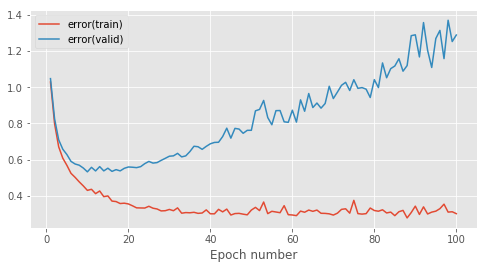

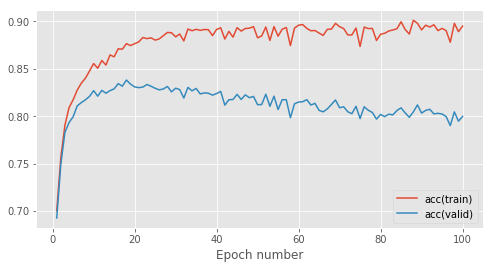

Epoch 1: 1.6s to complete
    error(train)=9.82e-01, acc(train)=7.15e-01, error(valid)=9.89e-01, acc(valid)=7.13e-01


Epoch 2: 1.7s to complete
    error(train)=7.64e-01, acc(train)=7.68e-01, error(valid)=7.85e-01, acc(valid)=7.62e-01


Epoch 3: 1.7s to complete
    error(train)=6.50e-01, acc(train)=7.94e-01, error(valid)=6.83e-01, acc(valid)=7.83e-01


Epoch 4: 1.8s to complete
    error(train)=5.80e-01, acc(train)=8.14e-01, error(valid)=6.23e-01, acc(valid)=8.02e-01


Epoch 5: 1.7s to complete
    error(train)=5.43e-01, acc(train)=8.24e-01, error(valid)=5.97e-01, acc(valid)=8.10e-01


Epoch 6: 1.7s to complete
    error(train)=5.03e-01, acc(train)=8.35e-01, error(valid)=5.69e-01, acc(valid)=8.18e-01


Epoch 7: 1.9s to complete
    error(train)=4.78e-01, acc(train)=8.42e-01, error(valid)=5.49e-01, acc(valid)=8.23e-01


Epoch 8: 1.8s to complete
    error(train)=4.62e-01, acc(train)=8.45e-01, error(valid)=5.43e-01, acc(valid)=8.20e-01


Epoch 9: 1.7s to complete
    error(train)=4.41e-01, acc(train)=8.52e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


Epoch 10: 1.7s to complete
    error(train)=4.14e-01, acc(train)=8.59e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


Epoch 11: 1.7s to complete
    error(train)=4.16e-01, acc(train)=8.58e-01, error(valid)=5.27e-01, acc(valid)=8.27e-01


Epoch 12: 1.7s to complete
    error(train)=4.09e-01, acc(train)=8.60e-01, error(valid)=5.34e-01, acc(valid)=8.26e-01


Epoch 13: 1.8s to complete
    error(train)=3.93e-01, acc(train)=8.64e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


Epoch 14: 1.7s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=5.13e-01, acc(valid)=8.38e-01


Epoch 15: 1.8s to complete
    error(train)=3.60e-01, acc(train)=8.75e-01, error(valid)=5.11e-01, acc(valid)=8.38e-01


Epoch 16: 1.8s to complete
    error(train)=3.53e-01, acc(train)=8.77e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


Epoch 17: 1.9s to complete
    error(train)=3.51e-01, acc(train)=8.76e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 18: 1.9s to complete
    error(train)=3.30e-01, acc(train)=8.84e-01, error(valid)=5.10e-01, acc(valid)=8.41e-01


Epoch 19: 1.7s to complete
    error(train)=3.26e-01, acc(train)=8.85e-01, error(valid)=5.23e-01, acc(valid)=8.36e-01


Epoch 20: 1.8s to complete
    error(train)=3.18e-01, acc(train)=8.88e-01, error(valid)=5.25e-01, acc(valid)=8.36e-01


Epoch 21: 1.7s to complete
    error(train)=3.22e-01, acc(train)=8.85e-01, error(valid)=5.35e-01, acc(valid)=8.35e-01


Epoch 22: 1.9s to complete
    error(train)=3.12e-01, acc(train)=8.89e-01, error(valid)=5.29e-01, acc(valid)=8.38e-01


Epoch 23: 1.7s to complete
    error(train)=2.98e-01, acc(train)=8.94e-01, error(valid)=5.26e-01, acc(valid)=8.37e-01


Epoch 24: 1.7s to complete
    error(train)=2.90e-01, acc(train)=8.96e-01, error(valid)=5.23e-01, acc(valid)=8.39e-01


Epoch 25: 1.7s to complete
    error(train)=2.97e-01, acc(train)=8.90e-01, error(valid)=5.50e-01, acc(valid)=8.32e-01


Epoch 26: 1.8s to complete
    error(train)=2.80e-01, acc(train)=8.98e-01, error(valid)=5.37e-01, acc(valid)=8.34e-01


Epoch 27: 1.7s to complete
    error(train)=2.79e-01, acc(train)=8.99e-01, error(valid)=5.49e-01, acc(valid)=8.39e-01


Epoch 28: 1.7s to complete
    error(train)=2.84e-01, acc(train)=8.96e-01, error(valid)=5.71e-01, acc(valid)=8.32e-01


Epoch 29: 1.7s to complete
    error(train)=2.83e-01, acc(train)=8.95e-01, error(valid)=5.72e-01, acc(valid)=8.33e-01


Epoch 30: 1.8s to complete
    error(train)=2.71e-01, acc(train)=9.00e-01, error(valid)=5.76e-01, acc(valid)=8.32e-01


Epoch 31: 1.8s to complete
    error(train)=2.72e-01, acc(train)=8.99e-01, error(valid)=5.91e-01, acc(valid)=8.33e-01


Epoch 32: 1.8s to complete
    error(train)=2.69e-01, acc(train)=9.00e-01, error(valid)=6.00e-01, acc(valid)=8.32e-01


Epoch 33: 1.8s to complete
    error(train)=2.60e-01, acc(train)=9.03e-01, error(valid)=5.83e-01, acc(valid)=8.35e-01


Epoch 34: 1.7s to complete
    error(train)=2.50e-01, acc(train)=9.08e-01, error(valid)=5.93e-01, acc(valid)=8.35e-01


Epoch 35: 1.7s to complete
    error(train)=2.50e-01, acc(train)=9.06e-01, error(valid)=6.05e-01, acc(valid)=8.33e-01


Epoch 36: 1.7s to complete
    error(train)=2.42e-01, acc(train)=9.10e-01, error(valid)=6.10e-01, acc(valid)=8.36e-01


Epoch 37: 2.0s to complete
    error(train)=2.42e-01, acc(train)=9.10e-01, error(valid)=6.24e-01, acc(valid)=8.33e-01


Epoch 38: 1.7s to complete
    error(train)=2.30e-01, acc(train)=9.13e-01, error(valid)=6.21e-01, acc(valid)=8.35e-01


Epoch 39: 1.7s to complete
    error(train)=2.34e-01, acc(train)=9.12e-01, error(valid)=6.29e-01, acc(valid)=8.30e-01


Epoch 40: 1.7s to complete
    error(train)=2.24e-01, acc(train)=9.16e-01, error(valid)=6.35e-01, acc(valid)=8.33e-01


Epoch 41: 1.7s to complete
    error(train)=2.25e-01, acc(train)=9.16e-01, error(valid)=6.38e-01, acc(valid)=8.30e-01


Epoch 42: 1.7s to complete
    error(train)=2.35e-01, acc(train)=9.10e-01, error(valid)=6.85e-01, acc(valid)=8.26e-01


Epoch 43: 1.7s to complete
    error(train)=2.22e-01, acc(train)=9.16e-01, error(valid)=6.78e-01, acc(valid)=8.28e-01


Epoch 44: 1.8s to complete
    error(train)=2.19e-01, acc(train)=9.16e-01, error(valid)=6.69e-01, acc(valid)=8.28e-01


Epoch 45: 1.7s to complete
    error(train)=2.17e-01, acc(train)=9.18e-01, error(valid)=6.76e-01, acc(valid)=8.27e-01


Epoch 46: 1.8s to complete
    error(train)=2.15e-01, acc(train)=9.18e-01, error(valid)=6.77e-01, acc(valid)=8.30e-01


Epoch 47: 1.7s to complete
    error(train)=2.17e-01, acc(train)=9.16e-01, error(valid)=7.20e-01, acc(valid)=8.25e-01


Epoch 48: 1.7s to complete
    error(train)=2.12e-01, acc(train)=9.18e-01, error(valid)=7.16e-01, acc(valid)=8.26e-01


Epoch 49: 1.9s to complete
    error(train)=1.99e-01, acc(train)=9.23e-01, error(valid)=7.19e-01, acc(valid)=8.28e-01


Epoch 50: 1.7s to complete
    error(train)=2.00e-01, acc(train)=9.22e-01, error(valid)=7.29e-01, acc(valid)=8.24e-01


Epoch 51: 1.7s to complete
    error(train)=2.01e-01, acc(train)=9.23e-01, error(valid)=7.33e-01, acc(valid)=8.26e-01


Epoch 52: 1.7s to complete
    error(train)=2.03e-01, acc(train)=9.22e-01, error(valid)=7.59e-01, acc(valid)=8.26e-01


Epoch 53: 1.8s to complete
    error(train)=2.04e-01, acc(train)=9.21e-01, error(valid)=7.60e-01, acc(valid)=8.24e-01


Epoch 54: 1.8s to complete
    error(train)=1.90e-01, acc(train)=9.26e-01, error(valid)=7.59e-01, acc(valid)=8.28e-01


Epoch 55: 1.8s to complete
    error(train)=1.93e-01, acc(train)=9.25e-01, error(valid)=7.83e-01, acc(valid)=8.23e-01


Epoch 56: 1.8s to complete
    error(train)=1.95e-01, acc(train)=9.25e-01, error(valid)=8.10e-01, acc(valid)=8.26e-01


Epoch 57: 1.8s to complete
    error(train)=2.01e-01, acc(train)=9.22e-01, error(valid)=8.33e-01, acc(valid)=8.22e-01


Epoch 58: 1.8s to complete
    error(train)=1.85e-01, acc(train)=9.28e-01, error(valid)=8.09e-01, acc(valid)=8.23e-01


Epoch 59: 1.7s to complete
    error(train)=1.86e-01, acc(train)=9.28e-01, error(valid)=8.30e-01, acc(valid)=8.21e-01


Epoch 60: 1.8s to complete
    error(train)=1.84e-01, acc(train)=9.29e-01, error(valid)=8.51e-01, acc(valid)=8.24e-01


Epoch 61: 1.7s to complete
    error(train)=1.76e-01, acc(train)=9.30e-01, error(valid)=8.40e-01, acc(valid)=8.19e-01


Epoch 62: 1.7s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=8.55e-01, acc(valid)=8.22e-01


Epoch 63: 1.7s to complete
    error(train)=1.79e-01, acc(train)=9.30e-01, error(valid)=8.68e-01, acc(valid)=8.23e-01


Epoch 64: 1.7s to complete
    error(train)=1.74e-01, acc(train)=9.31e-01, error(valid)=8.82e-01, acc(valid)=8.24e-01


Epoch 65: 1.7s to complete
    error(train)=1.67e-01, acc(train)=9.35e-01, error(valid)=8.89e-01, acc(valid)=8.22e-01


Epoch 66: 1.9s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=9.19e-01, acc(valid)=8.21e-01


Epoch 67: 1.9s to complete
    error(train)=1.71e-01, acc(train)=9.32e-01, error(valid)=8.88e-01, acc(valid)=8.22e-01


Epoch 68: 1.7s to complete
    error(train)=1.65e-01, acc(train)=9.34e-01, error(valid)=9.06e-01, acc(valid)=8.25e-01


Epoch 69: 1.8s to complete
    error(train)=1.70e-01, acc(train)=9.33e-01, error(valid)=9.18e-01, acc(valid)=8.18e-01


Epoch 70: 1.8s to complete
    error(train)=1.65e-01, acc(train)=9.34e-01, error(valid)=9.55e-01, acc(valid)=8.18e-01


Epoch 71: 1.8s to complete
    error(train)=1.63e-01, acc(train)=9.37e-01, error(valid)=9.53e-01, acc(valid)=8.24e-01


Epoch 72: 1.7s to complete
    error(train)=1.62e-01, acc(train)=9.35e-01, error(valid)=9.63e-01, acc(valid)=8.15e-01


Epoch 73: 1.8s to complete
    error(train)=1.65e-01, acc(train)=9.34e-01, error(valid)=9.88e-01, acc(valid)=8.15e-01


Epoch 74: 1.8s to complete
    error(train)=1.59e-01, acc(train)=9.38e-01, error(valid)=9.99e-01, acc(valid)=8.20e-01


Epoch 75: 1.7s to complete
    error(train)=1.52e-01, acc(train)=9.39e-01, error(valid)=9.86e-01, acc(valid)=8.18e-01


Epoch 76: 1.7s to complete
    error(train)=1.64e-01, acc(train)=9.35e-01, error(valid)=1.02e+00, acc(valid)=8.17e-01


Epoch 77: 1.7s to complete
    error(train)=1.69e-01, acc(train)=9.33e-01, error(valid)=1.06e+00, acc(valid)=8.16e-01


Epoch 78: 2.0s to complete
    error(train)=1.51e-01, acc(train)=9.40e-01, error(valid)=1.03e+00, acc(valid)=8.19e-01


Epoch 79: 1.8s to complete
    error(train)=1.68e-01, acc(train)=9.34e-01, error(valid)=1.09e+00, acc(valid)=8.12e-01


Epoch 80: 1.8s to complete
    error(train)=1.53e-01, acc(train)=9.40e-01, error(valid)=1.06e+00, acc(valid)=8.16e-01


Epoch 81: 1.9s to complete
    error(train)=1.66e-01, acc(train)=9.34e-01, error(valid)=1.10e+00, acc(valid)=8.14e-01


Epoch 82: 2.0s to complete
    error(train)=1.60e-01, acc(train)=9.36e-01, error(valid)=1.08e+00, acc(valid)=8.11e-01


Epoch 83: 1.8s to complete
    error(train)=1.41e-01, acc(train)=9.44e-01, error(valid)=1.07e+00, acc(valid)=8.18e-01


Epoch 84: 1.7s to complete
    error(train)=1.59e-01, acc(train)=9.37e-01, error(valid)=1.14e+00, acc(valid)=8.15e-01


Epoch 85: 1.8s to complete
    error(train)=1.39e-01, acc(train)=9.44e-01, error(valid)=1.12e+00, acc(valid)=8.19e-01


Epoch 86: 1.8s to complete
    error(train)=1.47e-01, acc(train)=9.42e-01, error(valid)=1.13e+00, acc(valid)=8.14e-01


Epoch 87: 1.8s to complete
    error(train)=1.44e-01, acc(train)=9.42e-01, error(valid)=1.14e+00, acc(valid)=8.16e-01


Epoch 88: 1.7s to complete
    error(train)=1.45e-01, acc(train)=9.43e-01, error(valid)=1.13e+00, acc(valid)=8.15e-01


Epoch 89: 1.7s to complete
    error(train)=1.57e-01, acc(train)=9.38e-01, error(valid)=1.19e+00, acc(valid)=8.12e-01


Epoch 90: 1.8s to complete
    error(train)=1.42e-01, acc(train)=9.43e-01, error(valid)=1.17e+00, acc(valid)=8.18e-01


Epoch 91: 1.7s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=1.18e+00, acc(valid)=8.16e-01


Epoch 92: 1.7s to complete
    error(train)=1.54e-01, acc(train)=9.39e-01, error(valid)=1.20e+00, acc(valid)=8.10e-01


Epoch 93: 1.7s to complete
    error(train)=1.34e-01, acc(train)=9.46e-01, error(valid)=1.22e+00, acc(valid)=8.17e-01


Epoch 94: 1.7s to complete
    error(train)=1.33e-01, acc(train)=9.47e-01, error(valid)=1.23e+00, acc(valid)=8.15e-01


Epoch 95: 1.7s to complete
    error(train)=1.33e-01, acc(train)=9.47e-01, error(valid)=1.25e+00, acc(valid)=8.15e-01


Epoch 96: 1.8s to complete
    error(train)=1.36e-01, acc(train)=9.46e-01, error(valid)=1.28e+00, acc(valid)=8.15e-01


Epoch 97: 1.8s to complete
    error(train)=1.34e-01, acc(train)=9.46e-01, error(valid)=1.29e+00, acc(valid)=8.11e-01


Epoch 98: 1.7s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=1.27e+00, acc(valid)=8.13e-01


Epoch 99: 1.8s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=1.30e+00, acc(valid)=8.05e-01


Epoch 100: 1.8s to complete
    error(train)=1.18e-01, acc(train)=9.53e-01, error(valid)=1.30e+00, acc(valid)=8.13e-01


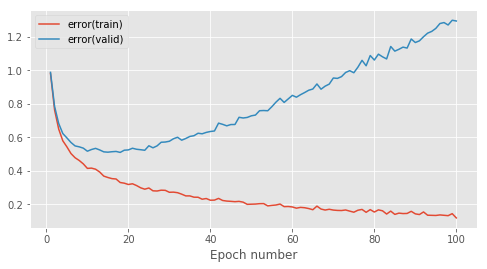

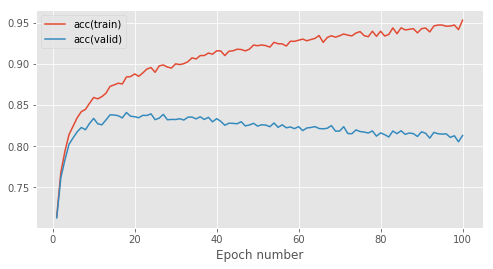

Epoch 1: 1.7s to complete
    error(train)=1.28e+00, acc(train)=6.39e-01, error(valid)=1.28e+00, acc(valid)=6.36e-01


Epoch 2: 1.6s to complete
    error(train)=1.03e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 3: 1.6s to complete
    error(train)=8.88e-01, acc(train)=7.37e-01, error(valid)=9.06e-01, acc(valid)=7.33e-01


Epoch 4: 1.7s to complete
    error(train)=7.94e-01, acc(train)=7.63e-01, error(valid)=8.13e-01, acc(valid)=7.59e-01


Epoch 5: 1.8s to complete
    error(train)=7.29e-01, acc(train)=7.82e-01, error(valid)=7.55e-01, acc(valid)=7.71e-01


Epoch 6: 1.6s to complete
    error(train)=6.74e-01, acc(train)=7.94e-01, error(valid)=7.05e-01, acc(valid)=7.86e-01


Epoch 7: 1.8s to complete
    error(train)=6.31e-01, acc(train)=8.06e-01, error(valid)=6.68e-01, acc(valid)=7.95e-01


Epoch 8: 1.9s to complete
    error(train)=6.07e-01, acc(train)=8.11e-01, error(valid)=6.49e-01, acc(valid)=8.02e-01


Epoch 9: 1.7s to complete
    error(train)=5.74e-01, acc(train)=8.20e-01, error(valid)=6.24e-01, acc(valid)=8.07e-01


Epoch 10: 1.9s to complete
    error(train)=5.55e-01, acc(train)=8.26e-01, error(valid)=6.10e-01, acc(valid)=8.09e-01


Epoch 11: 1.8s to complete
    error(train)=5.46e-01, acc(train)=8.26e-01, error(valid)=6.08e-01, acc(valid)=8.10e-01


Epoch 12: 1.9s to complete
    error(train)=5.29e-01, acc(train)=8.31e-01, error(valid)=5.94e-01, acc(valid)=8.14e-01


Epoch 13: 1.7s to complete
    error(train)=5.09e-01, acc(train)=8.38e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


Epoch 14: 1.6s to complete
    error(train)=5.06e-01, acc(train)=8.37e-01, error(valid)=5.85e-01, acc(valid)=8.19e-01


Epoch 15: 1.7s to complete
    error(train)=4.87e-01, acc(train)=8.43e-01, error(valid)=5.73e-01, acc(valid)=8.18e-01


Epoch 16: 1.6s to complete
    error(train)=4.76e-01, acc(train)=8.46e-01, error(valid)=5.64e-01, acc(valid)=8.22e-01


Epoch 17: 1.7s to complete
    error(train)=4.70e-01, acc(train)=8.47e-01, error(valid)=5.64e-01, acc(valid)=8.20e-01


Epoch 18: 1.9s to complete
    error(train)=4.57e-01, acc(train)=8.52e-01, error(valid)=5.59e-01, acc(valid)=8.25e-01


Epoch 19: 1.7s to complete
    error(train)=4.57e-01, acc(train)=8.51e-01, error(valid)=5.64e-01, acc(valid)=8.21e-01


Epoch 20: 1.7s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=5.51e-01, acc(valid)=8.28e-01


Epoch 21: 1.6s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


Epoch 22: 1.7s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.57e-01, acc(valid)=8.22e-01


Epoch 23: 1.7s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.59e-01, acc(valid)=8.24e-01


Epoch 24: 1.8s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


Epoch 25: 1.6s to complete
    error(train)=4.13e-01, acc(train)=8.62e-01, error(valid)=5.49e-01, acc(valid)=8.27e-01


Epoch 26: 1.7s to complete
    error(train)=4.13e-01, acc(train)=8.61e-01, error(valid)=5.54e-01, acc(valid)=8.23e-01


Epoch 27: 1.8s to complete
    error(train)=4.06e-01, acc(train)=8.64e-01, error(valid)=5.50e-01, acc(valid)=8.25e-01


Epoch 28: 1.7s to complete
    error(train)=4.02e-01, acc(train)=8.64e-01, error(valid)=5.49e-01, acc(valid)=8.27e-01


Epoch 29: 1.8s to complete
    error(train)=3.99e-01, acc(train)=8.66e-01, error(valid)=5.53e-01, acc(valid)=8.27e-01


Epoch 30: 1.8s to complete
    error(train)=3.97e-01, acc(train)=8.68e-01, error(valid)=5.59e-01, acc(valid)=8.25e-01


Epoch 31: 1.7s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=5.54e-01, acc(valid)=8.27e-01


Epoch 32: 1.6s to complete
    error(train)=4.01e-01, acc(train)=8.65e-01, error(valid)=5.80e-01, acc(valid)=8.24e-01


Epoch 33: 1.6s to complete
    error(train)=3.84e-01, acc(train)=8.71e-01, error(valid)=5.58e-01, acc(valid)=8.31e-01


Epoch 34: 1.7s to complete
    error(train)=3.92e-01, acc(train)=8.70e-01, error(valid)=5.79e-01, acc(valid)=8.30e-01


Epoch 35: 1.8s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.62e-01, acc(valid)=8.28e-01


Epoch 36: 1.7s to complete
    error(train)=3.77e-01, acc(train)=8.72e-01, error(valid)=5.56e-01, acc(valid)=8.29e-01


Epoch 37: 1.7s to complete
    error(train)=3.82e-01, acc(train)=8.69e-01, error(valid)=5.67e-01, acc(valid)=8.24e-01


Epoch 38: 1.6s to complete
    error(train)=3.90e-01, acc(train)=8.69e-01, error(valid)=5.99e-01, acc(valid)=8.23e-01


Epoch 39: 1.8s to complete
    error(train)=3.74e-01, acc(train)=8.76e-01, error(valid)=5.82e-01, acc(valid)=8.31e-01


Epoch 40: 1.7s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=5.81e-01, acc(valid)=8.30e-01


Epoch 41: 1.7s to complete
    error(train)=3.78e-01, acc(train)=8.73e-01, error(valid)=5.90e-01, acc(valid)=8.27e-01


Epoch 42: 1.7s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=6.08e-01, acc(valid)=8.23e-01


Epoch 43: 1.7s to complete
    error(train)=3.81e-01, acc(train)=8.68e-01, error(valid)=6.05e-01, acc(valid)=8.17e-01


Epoch 44: 1.7s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=6.04e-01, acc(valid)=8.23e-01


Epoch 45: 1.8s to complete
    error(train)=3.66e-01, acc(train)=8.77e-01, error(valid)=6.20e-01, acc(valid)=8.23e-01


Epoch 46: 1.8s to complete
    error(train)=3.56e-01, acc(train)=8.80e-01, error(valid)=6.00e-01, acc(valid)=8.29e-01


Epoch 47: 1.7s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=6.26e-01, acc(valid)=8.22e-01


Epoch 48: 1.7s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=6.02e-01, acc(valid)=8.23e-01


Epoch 49: 1.7s to complete
    error(train)=3.73e-01, acc(train)=8.72e-01, error(valid)=6.24e-01, acc(valid)=8.21e-01


Epoch 50: 1.6s to complete
    error(train)=3.56e-01, acc(train)=8.80e-01, error(valid)=6.13e-01, acc(valid)=8.23e-01


Epoch 51: 1.7s to complete
    error(train)=3.55e-01, acc(train)=8.79e-01, error(valid)=6.28e-01, acc(valid)=8.28e-01


Epoch 52: 1.8s to complete
    error(train)=3.62e-01, acc(train)=8.76e-01, error(valid)=6.14e-01, acc(valid)=8.21e-01


Epoch 53: 1.8s to complete
    error(train)=3.63e-01, acc(train)=8.74e-01, error(valid)=6.38e-01, acc(valid)=8.18e-01


Epoch 54: 1.9s to complete
    error(train)=3.76e-01, acc(train)=8.76e-01, error(valid)=6.74e-01, acc(valid)=8.22e-01


Epoch 55: 1.8s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=6.45e-01, acc(valid)=8.22e-01


Epoch 56: 1.8s to complete
    error(train)=3.45e-01, acc(train)=8.83e-01, error(valid)=6.48e-01, acc(valid)=8.28e-01


Epoch 57: 1.7s to complete
    error(train)=3.49e-01, acc(train)=8.80e-01, error(valid)=6.27e-01, acc(valid)=8.23e-01


Epoch 58: 1.7s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=6.56e-01, acc(valid)=8.21e-01


Epoch 59: 2.0s to complete
    error(train)=3.47e-01, acc(train)=8.83e-01, error(valid)=6.53e-01, acc(valid)=8.25e-01


Epoch 60: 1.7s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=6.56e-01, acc(valid)=8.23e-01


Epoch 61: 1.7s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=6.85e-01, acc(valid)=8.21e-01


Epoch 62: 1.7s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=6.58e-01, acc(valid)=8.22e-01


Epoch 63: 1.7s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=6.52e-01, acc(valid)=8.17e-01


Epoch 64: 1.7s to complete
    error(train)=3.95e-01, acc(train)=8.70e-01, error(valid)=7.69e-01, acc(valid)=8.15e-01


Epoch 65: 1.7s to complete
    error(train)=3.55e-01, acc(train)=8.79e-01, error(valid)=6.67e-01, acc(valid)=8.21e-01


Epoch 66: 1.7s to complete
    error(train)=3.61e-01, acc(train)=8.80e-01, error(valid)=7.21e-01, acc(valid)=8.21e-01


Epoch 67: 1.6s to complete
    error(train)=3.60e-01, acc(train)=8.78e-01, error(valid)=7.11e-01, acc(valid)=8.19e-01


Epoch 68: 1.7s to complete
    error(train)=3.65e-01, acc(train)=8.80e-01, error(valid)=7.35e-01, acc(valid)=8.17e-01


Epoch 69: 1.8s to complete
    error(train)=3.47e-01, acc(train)=8.81e-01, error(valid)=6.71e-01, acc(valid)=8.17e-01


Epoch 70: 1.8s to complete
    error(train)=3.55e-01, acc(train)=8.82e-01, error(valid)=7.16e-01, acc(valid)=8.20e-01


Epoch 71: 1.7s to complete
    error(train)=3.50e-01, acc(train)=8.83e-01, error(valid)=7.37e-01, acc(valid)=8.21e-01


Epoch 72: 1.7s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=7.53e-01, acc(valid)=8.20e-01


Epoch 73: 1.7s to complete
    error(train)=3.56e-01, acc(train)=8.79e-01, error(valid)=7.41e-01, acc(valid)=8.13e-01


Epoch 74: 1.6s to complete
    error(train)=3.43e-01, acc(train)=8.84e-01, error(valid)=7.15e-01, acc(valid)=8.17e-01


Epoch 75: 1.7s to complete
    error(train)=3.54e-01, acc(train)=8.83e-01, error(valid)=7.62e-01, acc(valid)=8.18e-01


Epoch 76: 1.8s to complete
    error(train)=3.45e-01, acc(train)=8.84e-01, error(valid)=7.42e-01, acc(valid)=8.16e-01


Epoch 77: 1.7s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=7.24e-01, acc(valid)=8.13e-01


Epoch 78: 1.8s to complete
    error(train)=3.46e-01, acc(train)=8.84e-01, error(valid)=7.52e-01, acc(valid)=8.15e-01


Epoch 79: 2.0s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=7.95e-01, acc(valid)=8.09e-01


Epoch 80: 1.9s to complete
    error(train)=3.61e-01, acc(train)=8.82e-01, error(valid)=8.09e-01, acc(valid)=8.13e-01


Epoch 81: 1.7s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=7.58e-01, acc(valid)=8.13e-01


Epoch 82: 1.7s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=7.61e-01, acc(valid)=8.07e-01


Epoch 83: 1.7s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=7.81e-01, acc(valid)=8.10e-01


Epoch 84: 1.7s to complete
    error(train)=3.48e-01, acc(train)=8.85e-01, error(valid)=8.00e-01, acc(valid)=8.16e-01


Epoch 85: 1.7s to complete
    error(train)=3.58e-01, acc(train)=8.77e-01, error(valid)=7.70e-01, acc(valid)=8.07e-01


Epoch 86: 1.8s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=7.74e-01, acc(valid)=8.09e-01


Epoch 87: 1.7s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=8.17e-01, acc(valid)=8.11e-01


Epoch 88: 1.7s to complete
    error(train)=3.55e-01, acc(train)=8.81e-01, error(valid)=8.07e-01, acc(valid)=8.12e-01


Epoch 89: 1.8s to complete
    error(train)=3.57e-01, acc(train)=8.79e-01, error(valid)=7.99e-01, acc(valid)=8.05e-01


Epoch 90: 1.7s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=7.93e-01, acc(valid)=8.12e-01


Epoch 91: 1.8s to complete
    error(train)=3.61e-01, acc(train)=8.79e-01, error(valid)=8.10e-01, acc(valid)=8.09e-01


Epoch 92: 1.7s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=8.14e-01, acc(valid)=8.11e-01


Epoch 93: 1.7s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=8.46e-01, acc(valid)=8.09e-01


Epoch 94: 1.7s to complete
    error(train)=3.80e-01, acc(train)=8.81e-01, error(valid)=9.19e-01, acc(valid)=8.12e-01


Epoch 95: 1.7s to complete
    error(train)=3.60e-01, acc(train)=8.83e-01, error(valid)=8.53e-01, acc(valid)=8.12e-01


Epoch 96: 1.7s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=8.30e-01, acc(valid)=8.11e-01


Epoch 97: 1.8s to complete
    error(train)=3.50e-01, acc(train)=8.86e-01, error(valid)=8.59e-01, acc(valid)=8.14e-01


Epoch 98: 1.7s to complete
    error(train)=3.44e-01, acc(train)=8.86e-01, error(valid)=8.40e-01, acc(valid)=8.12e-01


Epoch 99: 1.7s to complete
    error(train)=3.49e-01, acc(train)=8.85e-01, error(valid)=8.77e-01, acc(valid)=8.13e-01


Epoch 100: 1.8s to complete
    error(train)=3.63e-01, acc(train)=8.85e-01, error(valid)=9.25e-01, acc(valid)=8.10e-01


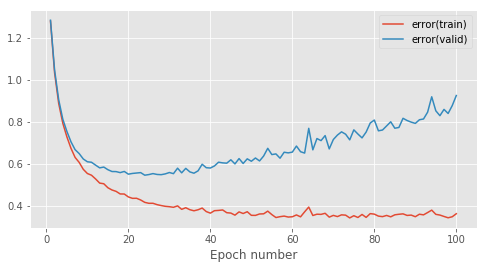

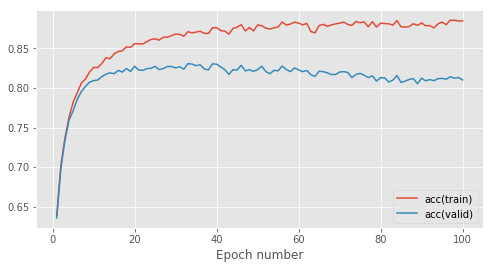

Epoch 1: 1.6s to complete
    error(train)=1.24e+00, acc(train)=6.47e-01, error(valid)=1.24e+00, acc(valid)=6.41e-01


Epoch 2: 1.6s to complete
    error(train)=9.89e-01, acc(train)=7.12e-01, error(valid)=9.97e-01, acc(valid)=7.10e-01


Epoch 3: 1.6s to complete
    error(train)=8.58e-01, acc(train)=7.49e-01, error(valid)=8.71e-01, acc(valid)=7.43e-01


Epoch 4: 1.7s to complete
    error(train)=7.73e-01, acc(train)=7.68e-01, error(valid)=7.94e-01, acc(valid)=7.61e-01


Epoch 5: 1.8s to complete
    error(train)=7.12e-01, acc(train)=7.85e-01, error(valid)=7.34e-01, acc(valid)=7.78e-01


Epoch 6: 1.8s to complete
    error(train)=6.71e-01, acc(train)=7.92e-01, error(valid)=7.01e-01, acc(valid)=7.84e-01


Epoch 7: 1.8s to complete
    error(train)=6.43e-01, acc(train)=8.01e-01, error(valid)=6.80e-01, acc(valid)=7.88e-01


Epoch 8: 1.9s to complete
    error(train)=6.06e-01, acc(train)=8.10e-01, error(valid)=6.49e-01, acc(valid)=7.98e-01


Epoch 9: 1.7s to complete
    error(train)=5.89e-01, acc(train)=8.15e-01, error(valid)=6.40e-01, acc(valid)=8.00e-01


Epoch 10: 1.7s to complete
    error(train)=5.66e-01, acc(train)=8.20e-01, error(valid)=6.20e-01, acc(valid)=8.03e-01


Epoch 11: 1.7s to complete
    error(train)=5.58e-01, acc(train)=8.21e-01, error(valid)=6.16e-01, acc(valid)=8.04e-01


Epoch 12: 1.8s to complete
    error(train)=5.30e-01, acc(train)=8.29e-01, error(valid)=5.91e-01, acc(valid)=8.12e-01


Epoch 13: 1.7s to complete
    error(train)=5.10e-01, acc(train)=8.37e-01, error(valid)=5.79e-01, acc(valid)=8.18e-01


Epoch 14: 1.7s to complete
    error(train)=4.98e-01, acc(train)=8.38e-01, error(valid)=5.73e-01, acc(valid)=8.18e-01


Epoch 15: 1.7s to complete
    error(train)=4.89e-01, acc(train)=8.42e-01, error(valid)=5.67e-01, acc(valid)=8.19e-01


Epoch 16: 1.7s to complete
    error(train)=4.77e-01, acc(train)=8.45e-01, error(valid)=5.60e-01, acc(valid)=8.24e-01


Epoch 17: 1.7s to complete
    error(train)=4.65e-01, acc(train)=8.48e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


Epoch 18: 1.7s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.49e-01, acc(valid)=8.23e-01


Epoch 19: 1.7s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.46e-01, acc(valid)=8.26e-01


Epoch 20: 1.8s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 21: 1.7s to complete
    error(train)=4.38e-01, acc(train)=8.54e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 22: 1.7s to complete
    error(train)=4.19e-01, acc(train)=8.61e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


Epoch 23: 1.7s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


Epoch 24: 1.7s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.42e-01, acc(valid)=8.28e-01


Epoch 25: 1.7s to complete
    error(train)=3.99e-01, acc(train)=8.66e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


Epoch 26: 1.7s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=5.37e-01, acc(valid)=8.31e-01


Epoch 27: 1.7s to complete
    error(train)=3.88e-01, acc(train)=8.70e-01, error(valid)=5.29e-01, acc(valid)=8.32e-01


Epoch 28: 1.7s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=5.36e-01, acc(valid)=8.35e-01


Epoch 29: 1.9s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=5.36e-01, acc(valid)=8.30e-01


Epoch 30: 1.7s to complete
    error(train)=3.81e-01, acc(train)=8.69e-01, error(valid)=5.36e-01, acc(valid)=8.31e-01


Epoch 31: 1.7s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.31e-01, acc(valid)=8.34e-01


Epoch 32: 1.9s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=5.32e-01, acc(valid)=8.33e-01


Epoch 33: 1.9s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=5.31e-01, acc(valid)=8.33e-01


Epoch 34: 1.7s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=5.40e-01, acc(valid)=8.33e-01


Epoch 35: 1.7s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


Epoch 36: 1.7s to complete
    error(train)=3.46e-01, acc(train)=8.82e-01, error(valid)=5.31e-01, acc(valid)=8.35e-01


Epoch 37: 1.7s to complete
    error(train)=3.49e-01, acc(train)=8.80e-01, error(valid)=5.39e-01, acc(valid)=8.31e-01


Epoch 38: 1.7s to complete
    error(train)=3.47e-01, acc(train)=8.81e-01, error(valid)=5.49e-01, acc(valid)=8.32e-01


Epoch 39: 1.7s to complete
    error(train)=3.42e-01, acc(train)=8.83e-01, error(valid)=5.44e-01, acc(valid)=8.32e-01


Epoch 40: 1.7s to complete
    error(train)=3.36e-01, acc(train)=8.84e-01, error(valid)=5.51e-01, acc(valid)=8.32e-01


Epoch 41: 1.7s to complete
    error(train)=3.44e-01, acc(train)=8.81e-01, error(valid)=5.64e-01, acc(valid)=8.28e-01


Epoch 42: 1.7s to complete
    error(train)=3.41e-01, acc(train)=8.82e-01, error(valid)=5.65e-01, acc(valid)=8.27e-01


Epoch 43: 1.7s to complete
    error(train)=3.42e-01, acc(train)=8.81e-01, error(valid)=5.60e-01, acc(valid)=8.24e-01


Epoch 44: 1.9s to complete
    error(train)=3.27e-01, acc(train)=8.87e-01, error(valid)=5.58e-01, acc(valid)=8.31e-01


Epoch 45: 1.7s to complete
    error(train)=3.30e-01, acc(train)=8.85e-01, error(valid)=5.63e-01, acc(valid)=8.27e-01


Epoch 46: 1.8s to complete
    error(train)=3.26e-01, acc(train)=8.87e-01, error(valid)=5.67e-01, acc(valid)=8.28e-01


Epoch 47: 1.7s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=5.68e-01, acc(valid)=8.32e-01


Epoch 48: 1.7s to complete
    error(train)=3.23e-01, acc(train)=8.87e-01, error(valid)=5.71e-01, acc(valid)=8.27e-01


Epoch 49: 1.7s to complete
    error(train)=3.10e-01, acc(train)=8.93e-01, error(valid)=5.65e-01, acc(valid)=8.31e-01


Epoch 50: 1.8s to complete
    error(train)=3.17e-01, acc(train)=8.89e-01, error(valid)=5.83e-01, acc(valid)=8.27e-01


Epoch 51: 1.8s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=5.86e-01, acc(valid)=8.29e-01


Epoch 52: 1.7s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=5.78e-01, acc(valid)=8.28e-01


Epoch 53: 1.7s to complete
    error(train)=3.11e-01, acc(train)=8.89e-01, error(valid)=5.87e-01, acc(valid)=8.23e-01


Epoch 54: 1.8s to complete
    error(train)=3.07e-01, acc(train)=8.91e-01, error(valid)=5.81e-01, acc(valid)=8.28e-01


Epoch 55: 1.7s to complete
    error(train)=3.12e-01, acc(train)=8.91e-01, error(valid)=6.01e-01, acc(valid)=8.28e-01


Epoch 56: 1.7s to complete
    error(train)=3.16e-01, acc(train)=8.90e-01, error(valid)=6.34e-01, acc(valid)=8.25e-01


Epoch 57: 1.7s to complete
    error(train)=3.01e-01, acc(train)=8.95e-01, error(valid)=6.11e-01, acc(valid)=8.28e-01


Epoch 58: 1.7s to complete
    error(train)=3.05e-01, acc(train)=8.92e-01, error(valid)=6.10e-01, acc(valid)=8.26e-01


Epoch 59: 1.8s to complete
    error(train)=3.18e-01, acc(train)=8.85e-01, error(valid)=6.19e-01, acc(valid)=8.20e-01


Epoch 60: 1.7s to complete
    error(train)=2.97e-01, acc(train)=8.95e-01, error(valid)=6.08e-01, acc(valid)=8.27e-01


Epoch 61: 1.8s to complete
    error(train)=2.91e-01, acc(train)=8.97e-01, error(valid)=5.94e-01, acc(valid)=8.29e-01


Epoch 62: 1.7s to complete
    error(train)=2.94e-01, acc(train)=8.96e-01, error(valid)=6.17e-01, acc(valid)=8.25e-01


Epoch 63: 2.0s to complete
    error(train)=2.89e-01, acc(train)=8.98e-01, error(valid)=6.07e-01, acc(valid)=8.27e-01


Epoch 64: 1.7s to complete
    error(train)=2.98e-01, acc(train)=8.95e-01, error(valid)=6.53e-01, acc(valid)=8.22e-01


Epoch 65: 2.0s to complete
    error(train)=2.81e-01, acc(train)=9.02e-01, error(valid)=6.20e-01, acc(valid)=8.31e-01


Epoch 66: 2.0s to complete
    error(train)=2.93e-01, acc(train)=8.97e-01, error(valid)=6.54e-01, acc(valid)=8.25e-01


Epoch 67: 1.7s to complete
    error(train)=2.86e-01, acc(train)=8.98e-01, error(valid)=6.37e-01, acc(valid)=8.23e-01


Epoch 68: 1.8s to complete
    error(train)=2.78e-01, acc(train)=9.01e-01, error(valid)=6.35e-01, acc(valid)=8.25e-01


Epoch 69: 1.7s to complete
    error(train)=2.77e-01, acc(train)=9.02e-01, error(valid)=6.50e-01, acc(valid)=8.28e-01


Epoch 70: 1.7s to complete
    error(train)=2.80e-01, acc(train)=9.01e-01, error(valid)=6.40e-01, acc(valid)=8.27e-01


Epoch 71: 1.7s to complete
    error(train)=2.75e-01, acc(train)=9.03e-01, error(valid)=6.56e-01, acc(valid)=8.24e-01


Epoch 72: 1.7s to complete
    error(train)=2.80e-01, acc(train)=9.01e-01, error(valid)=6.63e-01, acc(valid)=8.20e-01


Epoch 73: 1.8s to complete
    error(train)=2.78e-01, acc(train)=9.02e-01, error(valid)=6.62e-01, acc(valid)=8.27e-01


Epoch 74: 1.8s to complete
    error(train)=2.82e-01, acc(train)=9.00e-01, error(valid)=6.77e-01, acc(valid)=8.20e-01


Epoch 75: 1.7s to complete
    error(train)=2.74e-01, acc(train)=9.03e-01, error(valid)=6.72e-01, acc(valid)=8.21e-01


Epoch 76: 1.7s to complete
    error(train)=2.93e-01, acc(train)=8.95e-01, error(valid)=7.19e-01, acc(valid)=8.16e-01


Epoch 77: 1.7s to complete
    error(train)=2.74e-01, acc(train)=9.02e-01, error(valid)=6.89e-01, acc(valid)=8.18e-01


Epoch 78: 1.8s to complete
    error(train)=2.82e-01, acc(train)=8.98e-01, error(valid)=6.82e-01, acc(valid)=8.16e-01


Epoch 79: 1.7s to complete
    error(train)=2.78e-01, acc(train)=8.99e-01, error(valid)=7.04e-01, acc(valid)=8.15e-01


Epoch 80: 1.8s to complete
    error(train)=2.70e-01, acc(train)=9.03e-01, error(valid)=6.71e-01, acc(valid)=8.16e-01


Epoch 81: 1.8s to complete
    error(train)=2.64e-01, acc(train)=9.07e-01, error(valid)=6.91e-01, acc(valid)=8.22e-01


Epoch 82: 1.7s to complete
    error(train)=2.87e-01, acc(train)=8.99e-01, error(valid)=7.54e-01, acc(valid)=8.16e-01


Epoch 83: 1.7s to complete
    error(train)=2.83e-01, acc(train)=9.00e-01, error(valid)=7.38e-01, acc(valid)=8.19e-01


Epoch 84: 1.8s to complete
    error(train)=2.63e-01, acc(train)=9.07e-01, error(valid)=7.23e-01, acc(valid)=8.20e-01


Epoch 85: 1.7s to complete
    error(train)=2.78e-01, acc(train)=8.99e-01, error(valid)=7.37e-01, acc(valid)=8.14e-01


Epoch 86: 1.7s to complete
    error(train)=2.77e-01, acc(train)=9.01e-01, error(valid)=7.40e-01, acc(valid)=8.11e-01


Epoch 87: 1.8s to complete
    error(train)=2.58e-01, acc(train)=9.08e-01, error(valid)=7.33e-01, acc(valid)=8.21e-01


Epoch 88: 1.7s to complete
    error(train)=2.69e-01, acc(train)=9.02e-01, error(valid)=7.27e-01, acc(valid)=8.15e-01


Epoch 89: 2.0s to complete
    error(train)=2.65e-01, acc(train)=9.05e-01, error(valid)=7.45e-01, acc(valid)=8.19e-01


Epoch 90: 1.8s to complete
    error(train)=2.68e-01, acc(train)=9.05e-01, error(valid)=7.56e-01, acc(valid)=8.19e-01


Epoch 91: 1.7s to complete
    error(train)=2.67e-01, acc(train)=9.03e-01, error(valid)=7.30e-01, acc(valid)=8.10e-01


Epoch 92: 1.8s to complete
    error(train)=2.73e-01, acc(train)=9.00e-01, error(valid)=7.42e-01, acc(valid)=8.10e-01


Epoch 93: 1.7s to complete
    error(train)=2.60e-01, acc(train)=9.07e-01, error(valid)=7.70e-01, acc(valid)=8.12e-01


Epoch 94: 2.0s to complete
    error(train)=2.61e-01, acc(train)=9.08e-01, error(valid)=7.77e-01, acc(valid)=8.17e-01


Epoch 95: 1.9s to complete
    error(train)=2.76e-01, acc(train)=8.98e-01, error(valid)=7.85e-01, acc(valid)=8.09e-01


Epoch 96: 1.7s to complete
    error(train)=2.75e-01, acc(train)=9.00e-01, error(valid)=7.69e-01, acc(valid)=8.12e-01


Epoch 97: 1.9s to complete
    error(train)=2.60e-01, acc(train)=9.06e-01, error(valid)=7.79e-01, acc(valid)=8.15e-01


Epoch 98: 1.8s to complete
    error(train)=2.51e-01, acc(train)=9.10e-01, error(valid)=7.91e-01, acc(valid)=8.13e-01


Epoch 99: 1.7s to complete
    error(train)=2.56e-01, acc(train)=9.09e-01, error(valid)=8.16e-01, acc(valid)=8.13e-01


Epoch 100: 1.7s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=8.04e-01, acc(valid)=8.12e-01


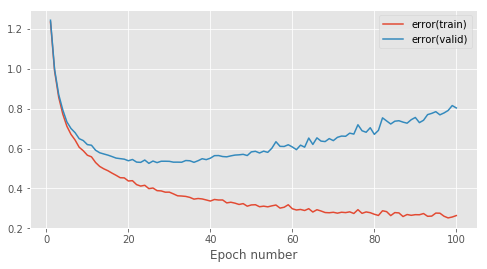

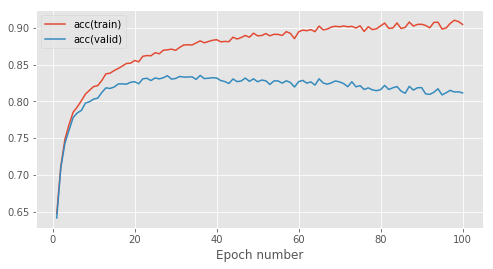

Epoch 1: 1.6s to complete
    error(train)=1.21e+00, acc(train)=6.52e-01, error(valid)=1.22e+00, acc(valid)=6.51e-01


Epoch 2: 1.7s to complete
    error(train)=9.43e-01, acc(train)=7.24e-01, error(valid)=9.56e-01, acc(valid)=7.19e-01


Epoch 3: 1.7s to complete
    error(train)=8.25e-01, acc(train)=7.53e-01, error(valid)=8.45e-01, acc(valid)=7.47e-01


Epoch 4: 1.8s to complete
    error(train)=7.22e-01, acc(train)=7.81e-01, error(valid)=7.50e-01, acc(valid)=7.71e-01


Epoch 5: 1.6s to complete
    error(train)=6.61e-01, acc(train)=7.97e-01, error(valid)=6.97e-01, acc(valid)=7.85e-01


Epoch 6: 1.7s to complete
    error(train)=6.26e-01, acc(train)=8.05e-01, error(valid)=6.69e-01, acc(valid)=7.93e-01


Epoch 7: 2.0s to complete
    error(train)=5.94e-01, acc(train)=8.15e-01, error(valid)=6.41e-01, acc(valid)=8.00e-01


Epoch 8: 1.6s to complete
    error(train)=5.69e-01, acc(train)=8.20e-01, error(valid)=6.20e-01, acc(valid)=8.05e-01


Epoch 9: 1.9s to complete
    error(train)=5.34e-01, acc(train)=8.30e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 10: 1.6s to complete
    error(train)=5.23e-01, acc(train)=8.32e-01, error(valid)=5.85e-01, acc(valid)=8.14e-01


Epoch 11: 1.7s to complete
    error(train)=5.13e-01, acc(train)=8.36e-01, error(valid)=5.82e-01, acc(valid)=8.16e-01


Epoch 12: 1.7s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.63e-01, acc(valid)=8.22e-01


Epoch 13: 1.6s to complete
    error(train)=4.76e-01, acc(train)=8.46e-01, error(valid)=5.55e-01, acc(valid)=8.21e-01


Epoch 14: 1.6s to complete
    error(train)=4.68e-01, acc(train)=8.47e-01, error(valid)=5.49e-01, acc(valid)=8.23e-01


Epoch 15: 1.8s to complete
    error(train)=4.61e-01, acc(train)=8.48e-01, error(valid)=5.52e-01, acc(valid)=8.22e-01


Epoch 16: 1.7s to complete
    error(train)=4.50e-01, acc(train)=8.49e-01, error(valid)=5.46e-01, acc(valid)=8.22e-01


Epoch 17: 1.6s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=5.29e-01, acc(valid)=8.31e-01


Epoch 18: 1.7s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


Epoch 19: 1.8s to complete
    error(train)=4.17e-01, acc(train)=8.60e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 20: 1.7s to complete
    error(train)=4.12e-01, acc(train)=8.62e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


Epoch 21: 1.7s to complete
    error(train)=4.03e-01, acc(train)=8.64e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


Epoch 22: 1.7s to complete
    error(train)=3.99e-01, acc(train)=8.65e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


Epoch 23: 1.7s to complete
    error(train)=3.99e-01, acc(train)=8.65e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


Epoch 24: 1.6s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 25: 1.7s to complete
    error(train)=3.85e-01, acc(train)=8.68e-01, error(valid)=5.28e-01, acc(valid)=8.32e-01


Epoch 26: 1.7s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


Epoch 27: 1.7s to complete
    error(train)=3.76e-01, acc(train)=8.72e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


Epoch 28: 1.7s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


Epoch 29: 1.7s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 30: 1.9s to complete
    error(train)=3.60e-01, acc(train)=8.75e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


Epoch 31: 1.7s to complete
    error(train)=3.47e-01, acc(train)=8.81e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


Epoch 32: 1.9s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01


Epoch 33: 1.7s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


Epoch 34: 1.7s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.27e-01, acc(valid)=8.36e-01


Epoch 35: 1.6s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=5.32e-01, acc(valid)=8.34e-01


Epoch 36: 1.9s to complete
    error(train)=3.31e-01, acc(train)=8.85e-01, error(valid)=5.29e-01, acc(valid)=8.32e-01


Epoch 37: 1.6s to complete
    error(train)=3.26e-01, acc(train)=8.87e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


Epoch 38: 1.6s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=5.31e-01, acc(valid)=8.34e-01


Epoch 39: 1.9s to complete
    error(train)=3.20e-01, acc(train)=8.88e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


Epoch 40: 1.7s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.29e-01, acc(valid)=8.35e-01


Epoch 41: 1.7s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=5.30e-01, acc(valid)=8.34e-01


Epoch 42: 1.6s to complete
    error(train)=3.09e-01, acc(train)=8.92e-01, error(valid)=5.38e-01, acc(valid)=8.34e-01


Epoch 43: 1.8s to complete
    error(train)=3.19e-01, acc(train)=8.86e-01, error(valid)=5.57e-01, acc(valid)=8.25e-01


Epoch 44: 1.6s to complete
    error(train)=3.05e-01, acc(train)=8.93e-01, error(valid)=5.43e-01, acc(valid)=8.34e-01


Epoch 45: 1.8s to complete
    error(train)=3.06e-01, acc(train)=8.92e-01, error(valid)=5.47e-01, acc(valid)=8.33e-01


Epoch 46: 1.8s to complete
    error(train)=3.01e-01, acc(train)=8.94e-01, error(valid)=5.51e-01, acc(valid)=8.31e-01


Epoch 47: 1.7s to complete
    error(train)=3.01e-01, acc(train)=8.92e-01, error(valid)=5.55e-01, acc(valid)=8.30e-01


Epoch 48: 1.7s to complete
    error(train)=2.89e-01, acc(train)=8.99e-01, error(valid)=5.47e-01, acc(valid)=8.35e-01


Epoch 49: 2.0s to complete
    error(train)=2.87e-01, acc(train)=8.99e-01, error(valid)=5.53e-01, acc(valid)=8.32e-01


Epoch 50: 1.6s to complete
    error(train)=2.84e-01, acc(train)=9.00e-01, error(valid)=5.54e-01, acc(valid)=8.34e-01


Epoch 51: 1.8s to complete
    error(train)=2.83e-01, acc(train)=8.99e-01, error(valid)=5.58e-01, acc(valid)=8.29e-01


Epoch 52: 1.7s to complete
    error(train)=2.80e-01, acc(train)=8.99e-01, error(valid)=5.62e-01, acc(valid)=8.28e-01


Epoch 53: 1.8s to complete
    error(train)=2.77e-01, acc(train)=9.02e-01, error(valid)=5.61e-01, acc(valid)=8.35e-01


Epoch 54: 1.7s to complete
    error(train)=2.74e-01, acc(train)=9.04e-01, error(valid)=5.64e-01, acc(valid)=8.34e-01


Epoch 55: 1.8s to complete
    error(train)=2.74e-01, acc(train)=9.02e-01, error(valid)=5.60e-01, acc(valid)=8.28e-01


Epoch 56: 1.6s to complete
    error(train)=2.73e-01, acc(train)=9.02e-01, error(valid)=5.76e-01, acc(valid)=8.30e-01


Epoch 57: 1.8s to complete
    error(train)=2.71e-01, acc(train)=9.03e-01, error(valid)=5.75e-01, acc(valid)=8.31e-01


Epoch 58: 1.6s to complete
    error(train)=2.67e-01, acc(train)=9.05e-01, error(valid)=5.78e-01, acc(valid)=8.30e-01


Epoch 59: 1.7s to complete
    error(train)=2.72e-01, acc(train)=9.02e-01, error(valid)=5.93e-01, acc(valid)=8.31e-01


Epoch 60: 1.7s to complete
    error(train)=2.74e-01, acc(train)=9.02e-01, error(valid)=5.95e-01, acc(valid)=8.29e-01


Epoch 61: 1.8s to complete
    error(train)=2.58e-01, acc(train)=9.07e-01, error(valid)=5.89e-01, acc(valid)=8.30e-01


Epoch 62: 1.8s to complete
    error(train)=2.59e-01, acc(train)=9.07e-01, error(valid)=5.97e-01, acc(valid)=8.29e-01


Epoch 63: 1.8s to complete
    error(train)=2.54e-01, acc(train)=9.09e-01, error(valid)=5.95e-01, acc(valid)=8.31e-01


Epoch 64: 1.7s to complete
    error(train)=2.51e-01, acc(train)=9.10e-01, error(valid)=5.97e-01, acc(valid)=8.28e-01


Epoch 65: 1.7s to complete
    error(train)=2.52e-01, acc(train)=9.09e-01, error(valid)=6.01e-01, acc(valid)=8.30e-01


Epoch 66: 1.7s to complete
    error(train)=2.50e-01, acc(train)=9.11e-01, error(valid)=6.03e-01, acc(valid)=8.31e-01


Epoch 67: 1.7s to complete
    error(train)=2.49e-01, acc(train)=9.10e-01, error(valid)=6.10e-01, acc(valid)=8.25e-01


Epoch 68: 1.7s to complete
    error(train)=2.47e-01, acc(train)=9.10e-01, error(valid)=6.14e-01, acc(valid)=8.27e-01


Epoch 69: 1.7s to complete
    error(train)=2.44e-01, acc(train)=9.11e-01, error(valid)=6.17e-01, acc(valid)=8.26e-01


Epoch 70: 1.8s to complete
    error(train)=2.58e-01, acc(train)=9.07e-01, error(valid)=6.45e-01, acc(valid)=8.26e-01


Epoch 71: 1.7s to complete
    error(train)=2.38e-01, acc(train)=9.14e-01, error(valid)=6.29e-01, acc(valid)=8.29e-01


Epoch 72: 1.7s to complete
    error(train)=2.37e-01, acc(train)=9.14e-01, error(valid)=6.30e-01, acc(valid)=8.28e-01


Epoch 73: 1.7s to complete
    error(train)=2.33e-01, acc(train)=9.15e-01, error(valid)=6.27e-01, acc(valid)=8.25e-01


Epoch 74: 1.9s to complete
    error(train)=2.38e-01, acc(train)=9.13e-01, error(valid)=6.42e-01, acc(valid)=8.24e-01


Epoch 75: 1.7s to complete
    error(train)=2.29e-01, acc(train)=9.16e-01, error(valid)=6.38e-01, acc(valid)=8.26e-01


Epoch 76: 1.7s to complete
    error(train)=2.29e-01, acc(train)=9.15e-01, error(valid)=6.36e-01, acc(valid)=8.21e-01


Epoch 77: 1.7s to complete
    error(train)=2.27e-01, acc(train)=9.17e-01, error(valid)=6.42e-01, acc(valid)=8.24e-01


Epoch 78: 1.7s to complete
    error(train)=2.28e-01, acc(train)=9.17e-01, error(valid)=6.53e-01, acc(valid)=8.24e-01


Epoch 79: 1.8s to complete
    error(train)=2.21e-01, acc(train)=9.19e-01, error(valid)=6.57e-01, acc(valid)=8.27e-01


Epoch 80: 1.8s to complete
    error(train)=2.21e-01, acc(train)=9.19e-01, error(valid)=6.69e-01, acc(valid)=8.26e-01


Epoch 81: 1.7s to complete
    error(train)=2.30e-01, acc(train)=9.15e-01, error(valid)=6.71e-01, acc(valid)=8.21e-01


Epoch 82: 1.7s to complete
    error(train)=2.19e-01, acc(train)=9.19e-01, error(valid)=6.74e-01, acc(valid)=8.22e-01


Epoch 83: 2.1s to complete
    error(train)=2.19e-01, acc(train)=9.19e-01, error(valid)=6.74e-01, acc(valid)=8.24e-01


Epoch 84: 1.7s to complete
    error(train)=2.09e-01, acc(train)=9.24e-01, error(valid)=6.72e-01, acc(valid)=8.25e-01


Epoch 85: 1.8s to complete
    error(train)=2.12e-01, acc(train)=9.22e-01, error(valid)=6.86e-01, acc(valid)=8.21e-01


Epoch 86: 1.8s to complete
    error(train)=2.17e-01, acc(train)=9.19e-01, error(valid)=6.96e-01, acc(valid)=8.19e-01


Epoch 87: 1.8s to complete
    error(train)=2.08e-01, acc(train)=9.24e-01, error(valid)=6.91e-01, acc(valid)=8.21e-01


Epoch 88: 1.9s to complete
    error(train)=2.07e-01, acc(train)=9.24e-01, error(valid)=6.89e-01, acc(valid)=8.21e-01


Epoch 89: 1.7s to complete
    error(train)=2.12e-01, acc(train)=9.22e-01, error(valid)=7.14e-01, acc(valid)=8.20e-01


Epoch 90: 1.7s to complete
    error(train)=2.11e-01, acc(train)=9.21e-01, error(valid)=7.05e-01, acc(valid)=8.15e-01


Epoch 91: 1.9s to complete
    error(train)=2.10e-01, acc(train)=9.20e-01, error(valid)=7.22e-01, acc(valid)=8.15e-01


Epoch 92: 1.8s to complete
    error(train)=2.08e-01, acc(train)=9.22e-01, error(valid)=7.26e-01, acc(valid)=8.16e-01


Epoch 93: 1.8s to complete
    error(train)=2.06e-01, acc(train)=9.23e-01, error(valid)=7.23e-01, acc(valid)=8.19e-01


Epoch 94: 1.7s to complete
    error(train)=1.99e-01, acc(train)=9.27e-01, error(valid)=7.29e-01, acc(valid)=8.20e-01


Epoch 95: 1.7s to complete
    error(train)=2.03e-01, acc(train)=9.25e-01, error(valid)=7.32e-01, acc(valid)=8.19e-01


Epoch 96: 2.1s to complete
    error(train)=2.07e-01, acc(train)=9.24e-01, error(valid)=7.44e-01, acc(valid)=8.16e-01


Epoch 97: 1.9s to complete
    error(train)=1.93e-01, acc(train)=9.28e-01, error(valid)=7.42e-01, acc(valid)=8.18e-01


Epoch 98: 1.7s to complete
    error(train)=1.91e-01, acc(train)=9.29e-01, error(valid)=7.54e-01, acc(valid)=8.19e-01


Epoch 99: 1.8s to complete
    error(train)=1.86e-01, acc(train)=9.32e-01, error(valid)=7.44e-01, acc(valid)=8.18e-01


Epoch 100: 1.8s to complete
    error(train)=1.92e-01, acc(train)=9.29e-01, error(valid)=7.62e-01, acc(valid)=8.18e-01


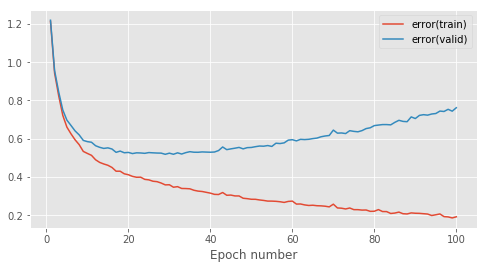

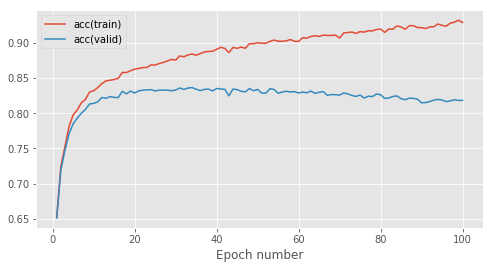

Epoch 1: 1.8s to complete
    error(train)=1.70e+00, acc(train)=5.48e-01, error(valid)=1.70e+00, acc(valid)=5.51e-01


Epoch 2: 1.6s to complete
    error(train)=1.32e+00, acc(train)=6.34e-01, error(valid)=1.32e+00, acc(valid)=6.29e-01


Epoch 3: 1.6s to complete
    error(train)=1.16e+00, acc(train)=6.73e-01, error(valid)=1.16e+00, acc(valid)=6.72e-01


Epoch 4: 1.6s to complete
    error(train)=1.06e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.96e-01


Epoch 5: 1.6s to complete
    error(train)=9.77e-01, acc(train)=7.19e-01, error(valid)=9.83e-01, acc(valid)=7.18e-01


Epoch 6: 1.7s to complete
    error(train)=9.14e-01, acc(train)=7.35e-01, error(valid)=9.21e-01, acc(valid)=7.32e-01


Epoch 7: 1.6s to complete
    error(train)=8.67e-01, acc(train)=7.47e-01, error(valid)=8.78e-01, acc(valid)=7.45e-01


Epoch 8: 1.9s to complete
    error(train)=8.27e-01, acc(train)=7.57e-01, error(valid)=8.40e-01, acc(valid)=7.52e-01


Epoch 9: 1.7s to complete
    error(train)=7.88e-01, acc(train)=7.67e-01, error(valid)=8.05e-01, acc(valid)=7.62e-01


Epoch 10: 1.6s to complete
    error(train)=7.61e-01, acc(train)=7.73e-01, error(valid)=7.81e-01, acc(valid)=7.66e-01


Epoch 11: 1.6s to complete
    error(train)=7.39e-01, acc(train)=7.79e-01, error(valid)=7.60e-01, acc(valid)=7.71e-01


Epoch 12: 1.6s to complete
    error(train)=7.15e-01, acc(train)=7.86e-01, error(valid)=7.38e-01, acc(valid)=7.82e-01


Epoch 13: 1.6s to complete
    error(train)=6.93e-01, acc(train)=7.90e-01, error(valid)=7.20e-01, acc(valid)=7.80e-01


Epoch 14: 1.6s to complete
    error(train)=6.82e-01, acc(train)=7.93e-01, error(valid)=7.10e-01, acc(valid)=7.84e-01


Epoch 15: 1.6s to complete
    error(train)=6.63e-01, acc(train)=7.98e-01, error(valid)=6.91e-01, acc(valid)=7.90e-01


Epoch 16: 1.7s to complete
    error(train)=6.46e-01, acc(train)=8.02e-01, error(valid)=6.76e-01, acc(valid)=7.91e-01


Epoch 17: 1.7s to complete
    error(train)=6.36e-01, acc(train)=8.04e-01, error(valid)=6.68e-01, acc(valid)=7.94e-01


Epoch 18: 1.6s to complete
    error(train)=6.24e-01, acc(train)=8.07e-01, error(valid)=6.60e-01, acc(valid)=7.96e-01


Epoch 19: 1.7s to complete
    error(train)=6.13e-01, acc(train)=8.10e-01, error(valid)=6.49e-01, acc(valid)=7.98e-01


Epoch 20: 1.7s to complete
    error(train)=6.02e-01, acc(train)=8.14e-01, error(valid)=6.41e-01, acc(valid)=8.03e-01


Epoch 21: 1.6s to complete
    error(train)=5.92e-01, acc(train)=8.16e-01, error(valid)=6.33e-01, acc(valid)=8.03e-01


Epoch 22: 1.7s to complete
    error(train)=5.87e-01, acc(train)=8.16e-01, error(valid)=6.31e-01, acc(valid)=8.02e-01


Epoch 23: 1.6s to complete
    error(train)=5.77e-01, acc(train)=8.20e-01, error(valid)=6.23e-01, acc(valid)=8.06e-01


Epoch 24: 1.7s to complete
    error(train)=5.71e-01, acc(train)=8.22e-01, error(valid)=6.19e-01, acc(valid)=8.07e-01


Epoch 25: 1.7s to complete
    error(train)=5.62e-01, acc(train)=8.24e-01, error(valid)=6.10e-01, acc(valid)=8.10e-01


Epoch 26: 1.6s to complete
    error(train)=5.53e-01, acc(train)=8.27e-01, error(valid)=6.06e-01, acc(valid)=8.13e-01


Epoch 27: 1.6s to complete
    error(train)=5.47e-01, acc(train)=8.28e-01, error(valid)=6.02e-01, acc(valid)=8.14e-01


Epoch 28: 1.6s to complete
    error(train)=5.43e-01, acc(train)=8.29e-01, error(valid)=6.01e-01, acc(valid)=8.12e-01


Epoch 29: 1.6s to complete
    error(train)=5.39e-01, acc(train)=8.30e-01, error(valid)=5.97e-01, acc(valid)=8.12e-01


Epoch 30: 1.6s to complete
    error(train)=5.27e-01, acc(train)=8.35e-01, error(valid)=5.88e-01, acc(valid)=8.16e-01


Epoch 31: 1.6s to complete
    error(train)=5.23e-01, acc(train)=8.36e-01, error(valid)=5.87e-01, acc(valid)=8.17e-01


Epoch 32: 1.6s to complete
    error(train)=5.18e-01, acc(train)=8.35e-01, error(valid)=5.82e-01, acc(valid)=8.17e-01


Epoch 33: 1.7s to complete
    error(train)=5.15e-01, acc(train)=8.38e-01, error(valid)=5.85e-01, acc(valid)=8.15e-01


Epoch 34: 1.6s to complete
    error(train)=5.10e-01, acc(train)=8.39e-01, error(valid)=5.79e-01, acc(valid)=8.18e-01


Epoch 35: 1.6s to complete
    error(train)=5.08e-01, acc(train)=8.37e-01, error(valid)=5.82e-01, acc(valid)=8.17e-01


Epoch 36: 1.7s to complete
    error(train)=4.98e-01, acc(train)=8.42e-01, error(valid)=5.72e-01, acc(valid)=8.20e-01


Epoch 37: 1.7s to complete
    error(train)=4.94e-01, acc(train)=8.42e-01, error(valid)=5.73e-01, acc(valid)=8.20e-01


Epoch 38: 1.7s to complete
    error(train)=4.91e-01, acc(train)=8.43e-01, error(valid)=5.71e-01, acc(valid)=8.20e-01


Epoch 39: 1.6s to complete
    error(train)=4.86e-01, acc(train)=8.45e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


Epoch 40: 1.6s to complete
    error(train)=4.81e-01, acc(train)=8.47e-01, error(valid)=5.66e-01, acc(valid)=8.20e-01


Epoch 41: 1.6s to complete
    error(train)=4.82e-01, acc(train)=8.47e-01, error(valid)=5.70e-01, acc(valid)=8.22e-01


Epoch 42: 1.6s to complete
    error(train)=4.78e-01, acc(train)=8.47e-01, error(valid)=5.67e-01, acc(valid)=8.21e-01


Epoch 43: 1.6s to complete
    error(train)=4.70e-01, acc(train)=8.50e-01, error(valid)=5.62e-01, acc(valid)=8.24e-01


Epoch 44: 1.7s to complete
    error(train)=4.72e-01, acc(train)=8.46e-01, error(valid)=5.65e-01, acc(valid)=8.18e-01


Epoch 45: 1.7s to complete
    error(train)=4.66e-01, acc(train)=8.51e-01, error(valid)=5.61e-01, acc(valid)=8.23e-01


Epoch 46: 1.6s to complete
    error(train)=4.65e-01, acc(train)=8.52e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


Epoch 47: 1.7s to complete
    error(train)=4.61e-01, acc(train)=8.51e-01, error(valid)=5.61e-01, acc(valid)=8.24e-01


Epoch 48: 1.7s to complete
    error(train)=4.60e-01, acc(train)=8.54e-01, error(valid)=5.60e-01, acc(valid)=8.25e-01


Epoch 49: 1.6s to complete
    error(train)=4.52e-01, acc(train)=8.55e-01, error(valid)=5.56e-01, acc(valid)=8.26e-01


Epoch 50: 1.6s to complete
    error(train)=4.56e-01, acc(train)=8.53e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


Epoch 51: 1.6s to complete
    error(train)=4.49e-01, acc(train)=8.55e-01, error(valid)=5.57e-01, acc(valid)=8.26e-01


Epoch 52: 1.6s to complete
    error(train)=4.48e-01, acc(train)=8.54e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


Epoch 53: 1.6s to complete
    error(train)=4.46e-01, acc(train)=8.55e-01, error(valid)=5.61e-01, acc(valid)=8.23e-01


Epoch 54: 1.7s to complete
    error(train)=4.41e-01, acc(train)=8.57e-01, error(valid)=5.55e-01, acc(valid)=8.26e-01


Epoch 55: 1.7s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


Epoch 56: 1.7s to complete
    error(train)=4.35e-01, acc(train)=8.59e-01, error(valid)=5.53e-01, acc(valid)=8.25e-01


Epoch 57: 1.7s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


Epoch 58: 1.7s to complete
    error(train)=4.31e-01, acc(train)=8.60e-01, error(valid)=5.55e-01, acc(valid)=8.29e-01


Epoch 59: 1.6s to complete
    error(train)=4.28e-01, acc(train)=8.61e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


Epoch 60: 2.0s to complete
    error(train)=4.25e-01, acc(train)=8.61e-01, error(valid)=5.54e-01, acc(valid)=8.26e-01


Epoch 61: 1.9s to complete
    error(train)=4.29e-01, acc(train)=8.60e-01, error(valid)=5.61e-01, acc(valid)=8.26e-01


Epoch 62: 1.7s to complete
    error(train)=4.31e-01, acc(train)=8.60e-01, error(valid)=5.68e-01, acc(valid)=8.25e-01


Epoch 63: 1.7s to complete
    error(train)=4.22e-01, acc(train)=8.63e-01, error(valid)=5.57e-01, acc(valid)=8.28e-01


Epoch 64: 1.7s to complete
    error(train)=4.26e-01, acc(train)=8.60e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


Epoch 65: 1.7s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.62e-01, acc(valid)=8.26e-01


Epoch 66: 1.6s to complete
    error(train)=4.19e-01, acc(train)=8.63e-01, error(valid)=5.60e-01, acc(valid)=8.25e-01


Epoch 67: 1.7s to complete
    error(train)=4.11e-01, acc(train)=8.66e-01, error(valid)=5.53e-01, acc(valid)=8.30e-01


Epoch 68: 1.6s to complete
    error(train)=4.13e-01, acc(train)=8.65e-01, error(valid)=5.59e-01, acc(valid)=8.26e-01


Epoch 69: 1.8s to complete
    error(train)=4.13e-01, acc(train)=8.65e-01, error(valid)=5.62e-01, acc(valid)=8.28e-01


Epoch 70: 1.7s to complete
    error(train)=4.08e-01, acc(train)=8.66e-01, error(valid)=5.57e-01, acc(valid)=8.25e-01


Epoch 71: 1.6s to complete
    error(train)=4.09e-01, acc(train)=8.67e-01, error(valid)=5.64e-01, acc(valid)=8.25e-01


Epoch 72: 1.6s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.56e-01, acc(valid)=8.26e-01


Epoch 73: 1.6s to complete
    error(train)=4.05e-01, acc(train)=8.66e-01, error(valid)=5.61e-01, acc(valid)=8.25e-01


Epoch 74: 1.6s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=5.62e-01, acc(valid)=8.26e-01


Epoch 75: 1.6s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.57e-01, acc(valid)=8.25e-01


Epoch 76: 1.7s to complete
    error(train)=4.04e-01, acc(train)=8.66e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


Epoch 77: 1.9s to complete
    error(train)=3.97e-01, acc(train)=8.69e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


Epoch 78: 1.9s to complete
    error(train)=3.99e-01, acc(train)=8.68e-01, error(valid)=5.60e-01, acc(valid)=8.24e-01


Epoch 79: 1.6s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.63e-01, acc(valid)=8.24e-01


Epoch 80: 1.7s to complete
    error(train)=3.93e-01, acc(train)=8.70e-01, error(valid)=5.63e-01, acc(valid)=8.25e-01


Epoch 81: 1.8s to complete
    error(train)=3.95e-01, acc(train)=8.70e-01, error(valid)=5.69e-01, acc(valid)=8.22e-01


Epoch 82: 1.7s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=5.63e-01, acc(valid)=8.26e-01


Epoch 83: 1.7s to complete
    error(train)=3.91e-01, acc(train)=8.70e-01, error(valid)=5.61e-01, acc(valid)=8.27e-01


Epoch 84: 1.6s to complete
    error(train)=3.86e-01, acc(train)=8.72e-01, error(valid)=5.59e-01, acc(valid)=8.29e-01


Epoch 85: 1.6s to complete
    error(train)=3.89e-01, acc(train)=8.71e-01, error(valid)=5.64e-01, acc(valid)=8.24e-01


Epoch 86: 1.9s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=5.71e-01, acc(valid)=8.23e-01


Epoch 87: 1.7s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=5.65e-01, acc(valid)=8.26e-01


Epoch 88: 1.8s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=5.84e-01, acc(valid)=8.26e-01


Epoch 89: 1.6s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=5.64e-01, acc(valid)=8.24e-01


Epoch 90: 1.7s to complete
    error(train)=3.79e-01, acc(train)=8.74e-01, error(valid)=5.64e-01, acc(valid)=8.25e-01


Epoch 91: 1.7s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=5.66e-01, acc(valid)=8.23e-01


Epoch 92: 1.6s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=5.75e-01, acc(valid)=8.19e-01


Epoch 93: 1.6s to complete
    error(train)=3.83e-01, acc(train)=8.74e-01, error(valid)=5.84e-01, acc(valid)=8.22e-01


Epoch 94: 1.8s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=5.77e-01, acc(valid)=8.23e-01


Epoch 95: 1.6s to complete
    error(train)=3.82e-01, acc(train)=8.73e-01, error(valid)=5.82e-01, acc(valid)=8.23e-01


Epoch 96: 1.6s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=5.78e-01, acc(valid)=8.23e-01


Epoch 97: 1.7s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=5.72e-01, acc(valid)=8.24e-01


Epoch 98: 1.7s to complete
    error(train)=3.75e-01, acc(train)=8.76e-01, error(valid)=5.79e-01, acc(valid)=8.22e-01


Epoch 99: 1.8s to complete
    error(train)=3.73e-01, acc(train)=8.76e-01, error(valid)=5.76e-01, acc(valid)=8.22e-01


Epoch 100: 1.8s to complete
    error(train)=3.72e-01, acc(train)=8.76e-01, error(valid)=5.79e-01, acc(valid)=8.22e-01


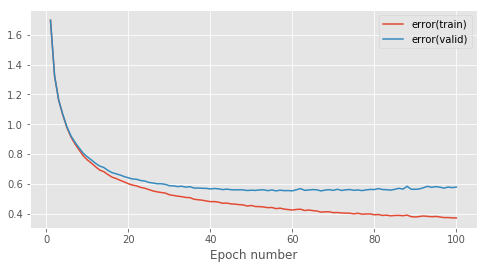

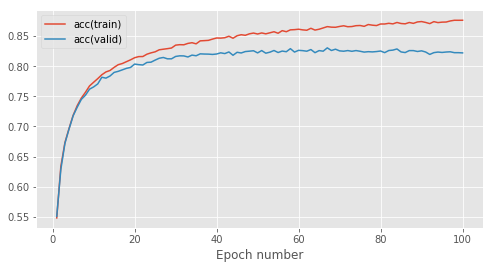

Epoch 1: 1.9s to complete
    error(train)=1.74e+00, acc(train)=5.36e-01, error(valid)=1.74e+00, acc(valid)=5.33e-01


Epoch 2: 1.6s to complete
    error(train)=1.31e+00, acc(train)=6.32e-01, error(valid)=1.32e+00, acc(valid)=6.27e-01


Epoch 3: 1.7s to complete
    error(train)=1.15e+00, acc(train)=6.72e-01, error(valid)=1.16e+00, acc(valid)=6.67e-01


Epoch 4: 1.7s to complete
    error(train)=1.05e+00, acc(train)=6.98e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


Epoch 5: 1.7s to complete
    error(train)=9.62e-01, acc(train)=7.20e-01, error(valid)=9.77e-01, acc(valid)=7.17e-01


Epoch 6: 1.8s to complete
    error(train)=9.01e-01, acc(train)=7.35e-01, error(valid)=9.18e-01, acc(valid)=7.31e-01


Epoch 7: 1.7s to complete
    error(train)=8.52e-01, acc(train)=7.48e-01, error(valid)=8.70e-01, acc(valid)=7.45e-01


Epoch 8: 1.8s to complete
    error(train)=8.10e-01, acc(train)=7.59e-01, error(valid)=8.29e-01, acc(valid)=7.57e-01


Epoch 9: 1.6s to complete
    error(train)=7.80e-01, acc(train)=7.67e-01, error(valid)=8.00e-01, acc(valid)=7.62e-01


Epoch 10: 1.9s to complete
    error(train)=7.49e-01, acc(train)=7.75e-01, error(valid)=7.72e-01, acc(valid)=7.66e-01


Epoch 11: 1.7s to complete
    error(train)=7.28e-01, acc(train)=7.80e-01, error(valid)=7.52e-01, acc(valid)=7.73e-01


Epoch 12: 1.8s to complete
    error(train)=7.05e-01, acc(train)=7.85e-01, error(valid)=7.30e-01, acc(valid)=7.80e-01


Epoch 13: 1.7s to complete
    error(train)=6.86e-01, acc(train)=7.91e-01, error(valid)=7.14e-01, acc(valid)=7.83e-01


Epoch 14: 1.7s to complete
    error(train)=6.68e-01, acc(train)=7.96e-01, error(valid)=6.99e-01, acc(valid)=7.87e-01


Epoch 15: 1.8s to complete
    error(train)=6.56e-01, acc(train)=7.97e-01, error(valid)=6.90e-01, acc(valid)=7.89e-01


Epoch 16: 1.7s to complete
    error(train)=6.43e-01, acc(train)=8.02e-01, error(valid)=6.78e-01, acc(valid)=7.90e-01


Epoch 17: 1.8s to complete
    error(train)=6.26e-01, acc(train)=8.07e-01, error(valid)=6.64e-01, acc(valid)=7.96e-01


Epoch 18: 1.7s to complete
    error(train)=6.13e-01, acc(train)=8.10e-01, error(valid)=6.52e-01, acc(valid)=7.99e-01


Epoch 19: 1.7s to complete
    error(train)=6.03e-01, acc(train)=8.12e-01, error(valid)=6.47e-01, acc(valid)=8.01e-01


Epoch 20: 1.9s to complete
    error(train)=5.94e-01, acc(train)=8.15e-01, error(valid)=6.39e-01, acc(valid)=8.01e-01


Epoch 21: 2.0s to complete
    error(train)=5.84e-01, acc(train)=8.17e-01, error(valid)=6.32e-01, acc(valid)=8.03e-01


Epoch 22: 1.7s to complete
    error(train)=5.74e-01, acc(train)=8.20e-01, error(valid)=6.25e-01, acc(valid)=8.04e-01


Epoch 23: 1.7s to complete
    error(train)=5.71e-01, acc(train)=8.21e-01, error(valid)=6.25e-01, acc(valid)=8.03e-01


Epoch 24: 1.8s to complete
    error(train)=5.62e-01, acc(train)=8.23e-01, error(valid)=6.18e-01, acc(valid)=8.04e-01


Epoch 25: 1.7s to complete
    error(train)=5.52e-01, acc(train)=8.26e-01, error(valid)=6.08e-01, acc(valid)=8.08e-01


Epoch 26: 1.8s to complete
    error(train)=5.46e-01, acc(train)=8.28e-01, error(valid)=6.07e-01, acc(valid)=8.09e-01


Epoch 27: 1.7s to complete
    error(train)=5.40e-01, acc(train)=8.29e-01, error(valid)=6.02e-01, acc(valid)=8.10e-01


Epoch 28: 1.7s to complete
    error(train)=5.31e-01, acc(train)=8.32e-01, error(valid)=5.95e-01, acc(valid)=8.11e-01


Epoch 29: 1.9s to complete
    error(train)=5.24e-01, acc(train)=8.34e-01, error(valid)=5.91e-01, acc(valid)=8.12e-01


Epoch 30: 1.7s to complete
    error(train)=5.19e-01, acc(train)=8.35e-01, error(valid)=5.88e-01, acc(valid)=8.16e-01


Epoch 31: 1.7s to complete
    error(train)=5.14e-01, acc(train)=8.36e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


Epoch 32: 1.8s to complete
    error(train)=5.09e-01, acc(train)=8.38e-01, error(valid)=5.80e-01, acc(valid)=8.18e-01


Epoch 33: 1.7s to complete
    error(train)=5.05e-01, acc(train)=8.38e-01, error(valid)=5.78e-01, acc(valid)=8.15e-01


Epoch 34: 1.7s to complete
    error(train)=4.96e-01, acc(train)=8.42e-01, error(valid)=5.71e-01, acc(valid)=8.20e-01


Epoch 35: 1.7s to complete
    error(train)=4.96e-01, acc(train)=8.42e-01, error(valid)=5.72e-01, acc(valid)=8.16e-01


Epoch 36: 1.7s to complete
    error(train)=4.89e-01, acc(train)=8.45e-01, error(valid)=5.69e-01, acc(valid)=8.20e-01


Epoch 37: 1.7s to complete
    error(train)=4.86e-01, acc(train)=8.45e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


Epoch 38: 1.7s to complete
    error(train)=4.83e-01, acc(train)=8.45e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


Epoch 39: 1.7s to complete
    error(train)=4.75e-01, acc(train)=8.47e-01, error(valid)=5.61e-01, acc(valid)=8.20e-01


Epoch 40: 1.9s to complete
    error(train)=4.79e-01, acc(train)=8.46e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01


Epoch 41: 1.7s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 42: 1.7s to complete
    error(train)=4.66e-01, acc(train)=8.50e-01, error(valid)=5.57e-01, acc(valid)=8.21e-01


Epoch 43: 1.8s to complete
    error(train)=4.63e-01, acc(train)=8.51e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 44: 1.7s to complete
    error(train)=4.61e-01, acc(train)=8.51e-01, error(valid)=5.56e-01, acc(valid)=8.21e-01


Epoch 45: 1.8s to complete
    error(train)=4.65e-01, acc(train)=8.49e-01, error(valid)=5.65e-01, acc(valid)=8.22e-01


Epoch 46: 1.7s to complete
    error(train)=4.50e-01, acc(train)=8.55e-01, error(valid)=5.49e-01, acc(valid)=8.24e-01


Epoch 47: 1.7s to complete
    error(train)=4.48e-01, acc(train)=8.54e-01, error(valid)=5.49e-01, acc(valid)=8.26e-01


Epoch 48: 1.7s to complete
    error(train)=4.46e-01, acc(train)=8.56e-01, error(valid)=5.47e-01, acc(valid)=8.25e-01


Epoch 49: 1.7s to complete
    error(train)=4.45e-01, acc(train)=8.56e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 50: 1.7s to complete
    error(train)=4.42e-01, acc(train)=8.57e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 51: 1.7s to complete
    error(train)=4.39e-01, acc(train)=8.57e-01, error(valid)=5.47e-01, acc(valid)=8.23e-01


Epoch 52: 1.7s to complete
    error(train)=4.32e-01, acc(train)=8.60e-01, error(valid)=5.42e-01, acc(valid)=8.25e-01


Epoch 53: 1.7s to complete
    error(train)=4.36e-01, acc(train)=8.58e-01, error(valid)=5.51e-01, acc(valid)=8.26e-01


Epoch 54: 1.7s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=5.47e-01, acc(valid)=8.25e-01


Epoch 55: 1.7s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


Epoch 56: 1.7s to complete
    error(train)=4.23e-01, acc(train)=8.62e-01, error(valid)=5.41e-01, acc(valid)=8.30e-01


Epoch 57: 1.7s to complete
    error(train)=4.19e-01, acc(train)=8.63e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


Epoch 58: 1.7s to complete
    error(train)=4.20e-01, acc(train)=8.63e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


Epoch 59: 1.7s to complete
    error(train)=4.18e-01, acc(train)=8.63e-01, error(valid)=5.45e-01, acc(valid)=8.26e-01


Epoch 60: 1.7s to complete
    error(train)=4.16e-01, acc(train)=8.64e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


Epoch 61: 1.7s to complete
    error(train)=4.13e-01, acc(train)=8.65e-01, error(valid)=5.43e-01, acc(valid)=8.28e-01


Epoch 62: 1.7s to complete
    error(train)=4.07e-01, acc(train)=8.66e-01, error(valid)=5.38e-01, acc(valid)=8.29e-01


Epoch 63: 1.7s to complete
    error(train)=4.06e-01, acc(train)=8.67e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 64: 1.7s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.42e-01, acc(valid)=8.30e-01


Epoch 65: 1.7s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


Epoch 66: 1.7s to complete
    error(train)=3.99e-01, acc(train)=8.69e-01, error(valid)=5.36e-01, acc(valid)=8.30e-01


Epoch 67: 1.8s to complete
    error(train)=3.93e-01, acc(train)=8.72e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


Epoch 68: 1.7s to complete
    error(train)=3.95e-01, acc(train)=8.70e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


Epoch 69: 1.7s to complete
    error(train)=3.96e-01, acc(train)=8.70e-01, error(valid)=5.40e-01, acc(valid)=8.29e-01


Epoch 70: 1.7s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


Epoch 71: 1.7s to complete
    error(train)=3.89e-01, acc(train)=8.72e-01, error(valid)=5.37e-01, acc(valid)=8.32e-01


Epoch 72: 1.7s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


Epoch 73: 1.7s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=5.34e-01, acc(valid)=8.30e-01


Epoch 74: 1.7s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


Epoch 75: 1.7s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


Epoch 76: 1.8s to complete
    error(train)=3.85e-01, acc(train)=8.72e-01, error(valid)=5.42e-01, acc(valid)=8.26e-01


Epoch 77: 1.8s to complete
    error(train)=3.80e-01, acc(train)=8.75e-01, error(valid)=5.41e-01, acc(valid)=8.28e-01


Epoch 78: 1.7s to complete
    error(train)=3.78e-01, acc(train)=8.75e-01, error(valid)=5.39e-01, acc(valid)=8.29e-01


Epoch 79: 1.7s to complete
    error(train)=3.77e-01, acc(train)=8.75e-01, error(valid)=5.38e-01, acc(valid)=8.29e-01


Epoch 80: 1.7s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=5.44e-01, acc(valid)=8.28e-01


Epoch 81: 1.7s to complete
    error(train)=3.79e-01, acc(train)=8.75e-01, error(valid)=5.45e-01, acc(valid)=8.27e-01


Epoch 82: 1.8s to complete
    error(train)=3.77e-01, acc(train)=8.75e-01, error(valid)=5.42e-01, acc(valid)=8.26e-01


Epoch 83: 1.7s to complete
    error(train)=3.71e-01, acc(train)=8.77e-01, error(valid)=5.42e-01, acc(valid)=8.28e-01


Epoch 84: 1.8s to complete
    error(train)=3.65e-01, acc(train)=8.80e-01, error(valid)=5.36e-01, acc(valid)=8.28e-01


Epoch 85: 1.7s to complete
    error(train)=3.67e-01, acc(train)=8.78e-01, error(valid)=5.39e-01, acc(valid)=8.29e-01


Epoch 86: 1.7s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=5.42e-01, acc(valid)=8.26e-01


Epoch 87: 1.8s to complete
    error(train)=3.67e-01, acc(train)=8.78e-01, error(valid)=5.41e-01, acc(valid)=8.28e-01


Epoch 88: 1.7s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=5.48e-01, acc(valid)=8.27e-01


Epoch 89: 1.8s to complete
    error(train)=3.65e-01, acc(train)=8.79e-01, error(valid)=5.50e-01, acc(valid)=8.28e-01


Epoch 90: 1.7s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=5.50e-01, acc(valid)=8.27e-01


Epoch 91: 1.7s to complete
    error(train)=3.59e-01, acc(train)=8.81e-01, error(valid)=5.45e-01, acc(valid)=8.28e-01


Epoch 92: 1.7s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=5.46e-01, acc(valid)=8.27e-01


Epoch 93: 1.7s to complete
    error(train)=3.59e-01, acc(train)=8.80e-01, error(valid)=5.50e-01, acc(valid)=8.26e-01


Epoch 94: 1.7s to complete
    error(train)=3.55e-01, acc(train)=8.81e-01, error(valid)=5.48e-01, acc(valid)=8.29e-01


Epoch 95: 1.7s to complete
    error(train)=3.56e-01, acc(train)=8.82e-01, error(valid)=5.51e-01, acc(valid)=8.27e-01


Epoch 96: 1.8s to complete
    error(train)=3.51e-01, acc(train)=8.83e-01, error(valid)=5.46e-01, acc(valid)=8.28e-01


Epoch 97: 1.8s to complete
    error(train)=3.53e-01, acc(train)=8.83e-01, error(valid)=5.50e-01, acc(valid)=8.27e-01


Epoch 98: 1.7s to complete
    error(train)=3.56e-01, acc(train)=8.81e-01, error(valid)=5.57e-01, acc(valid)=8.26e-01


Epoch 99: 1.7s to complete
    error(train)=3.49e-01, acc(train)=8.83e-01, error(valid)=5.49e-01, acc(valid)=8.29e-01


Epoch 100: 1.7s to complete
    error(train)=3.48e-01, acc(train)=8.83e-01, error(valid)=5.46e-01, acc(valid)=8.27e-01


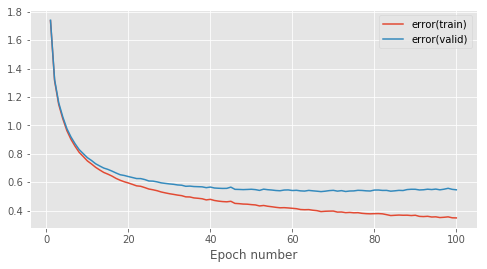

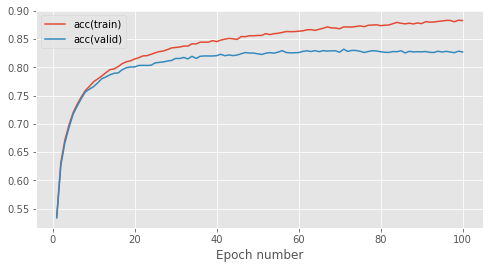

Epoch 1: 1.7s to complete
    error(train)=1.65e+00, acc(train)=5.53e-01, error(valid)=1.66e+00, acc(valid)=5.52e-01


Epoch 2: 1.6s to complete
    error(train)=1.29e+00, acc(train)=6.39e-01, error(valid)=1.30e+00, acc(valid)=6.40e-01


Epoch 3: 1.7s to complete
    error(train)=1.15e+00, acc(train)=6.76e-01, error(valid)=1.16e+00, acc(valid)=6.73e-01


Epoch 4: 1.9s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


Epoch 5: 1.6s to complete
    error(train)=9.64e-01, acc(train)=7.21e-01, error(valid)=9.75e-01, acc(valid)=7.18e-01


Epoch 6: 1.6s to complete
    error(train)=9.02e-01, acc(train)=7.38e-01, error(valid)=9.13e-01, acc(valid)=7.34e-01


Epoch 7: 1.7s to complete
    error(train)=8.51e-01, acc(train)=7.51e-01, error(valid)=8.65e-01, acc(valid)=7.47e-01


Epoch 8: 1.8s to complete
    error(train)=8.01e-01, acc(train)=7.64e-01, error(valid)=8.17e-01, acc(valid)=7.60e-01


Epoch 9: 1.6s to complete
    error(train)=7.66e-01, acc(train)=7.72e-01, error(valid)=7.83e-01, acc(valid)=7.68e-01


Epoch 10: 1.6s to complete
    error(train)=7.33e-01, acc(train)=7.81e-01, error(valid)=7.56e-01, acc(valid)=7.74e-01


Epoch 11: 1.9s to complete
    error(train)=7.05e-01, acc(train)=7.88e-01, error(valid)=7.28e-01, acc(valid)=7.82e-01


Epoch 12: 1.9s to complete
    error(train)=6.84e-01, acc(train)=7.93e-01, error(valid)=7.10e-01, acc(valid)=7.87e-01


Epoch 13: 1.6s to complete
    error(train)=6.60e-01, acc(train)=7.99e-01, error(valid)=6.92e-01, acc(valid)=7.88e-01


Epoch 14: 1.7s to complete
    error(train)=6.43e-01, acc(train)=8.05e-01, error(valid)=6.73e-01, acc(valid)=7.92e-01


Epoch 15: 1.7s to complete
    error(train)=6.24e-01, acc(train)=8.08e-01, error(valid)=6.59e-01, acc(valid)=7.98e-01


Epoch 16: 1.8s to complete
    error(train)=6.16e-01, acc(train)=8.09e-01, error(valid)=6.53e-01, acc(valid)=7.99e-01


Epoch 17: 1.8s to complete
    error(train)=6.00e-01, acc(train)=8.15e-01, error(valid)=6.40e-01, acc(valid)=8.01e-01


Epoch 18: 1.6s to complete
    error(train)=5.87e-01, acc(train)=8.18e-01, error(valid)=6.28e-01, acc(valid)=8.06e-01


Epoch 19: 1.6s to complete
    error(train)=5.80e-01, acc(train)=8.20e-01, error(valid)=6.22e-01, acc(valid)=8.07e-01


Epoch 20: 1.7s to complete
    error(train)=5.66e-01, acc(train)=8.23e-01, error(valid)=6.12e-01, acc(valid)=8.08e-01


Epoch 21: 1.7s to complete
    error(train)=5.55e-01, acc(train)=8.27e-01, error(valid)=6.04e-01, acc(valid)=8.11e-01


Epoch 22: 1.7s to complete
    error(train)=5.48e-01, acc(train)=8.27e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


Epoch 23: 1.6s to complete
    error(train)=5.42e-01, acc(train)=8.28e-01, error(valid)=5.95e-01, acc(valid)=8.11e-01


Epoch 24: 1.8s to complete
    error(train)=5.35e-01, acc(train)=8.31e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


Epoch 25: 1.7s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.82e-01, acc(valid)=8.16e-01


Epoch 26: 1.6s to complete
    error(train)=5.20e-01, acc(train)=8.35e-01, error(valid)=5.77e-01, acc(valid)=8.16e-01


Epoch 27: 1.7s to complete
    error(train)=5.18e-01, acc(train)=8.35e-01, error(valid)=5.79e-01, acc(valid)=8.16e-01


Epoch 28: 1.7s to complete
    error(train)=5.07e-01, acc(train)=8.38e-01, error(valid)=5.69e-01, acc(valid)=8.19e-01


Epoch 29: 1.6s to complete
    error(train)=5.02e-01, acc(train)=8.40e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


Epoch 30: 1.6s to complete
    error(train)=4.96e-01, acc(train)=8.41e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


Epoch 31: 1.6s to complete
    error(train)=4.88e-01, acc(train)=8.44e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


Epoch 32: 1.9s to complete
    error(train)=4.85e-01, acc(train)=8.45e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


Epoch 33: 1.6s to complete
    error(train)=4.80e-01, acc(train)=8.46e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


Epoch 34: 1.7s to complete
    error(train)=4.74e-01, acc(train)=8.47e-01, error(valid)=5.50e-01, acc(valid)=8.23e-01


Epoch 35: 1.7s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.50e-01, acc(valid)=8.25e-01


Epoch 36: 1.7s to complete
    error(train)=4.67e-01, acc(train)=8.49e-01, error(valid)=5.49e-01, acc(valid)=8.23e-01


Epoch 37: 1.8s to complete
    error(train)=4.60e-01, acc(train)=8.52e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


Epoch 38: 1.7s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.45e-01, acc(valid)=8.26e-01


Epoch 39: 1.7s to complete
    error(train)=4.55e-01, acc(train)=8.53e-01, error(valid)=5.42e-01, acc(valid)=8.28e-01


Epoch 40: 1.8s to complete
    error(train)=4.48e-01, acc(train)=8.56e-01, error(valid)=5.38e-01, acc(valid)=8.29e-01


Epoch 41: 1.6s to complete
    error(train)=4.51e-01, acc(train)=8.54e-01, error(valid)=5.42e-01, acc(valid)=8.28e-01


Epoch 42: 1.6s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


Epoch 43: 1.6s to complete
    error(train)=4.38e-01, acc(train)=8.59e-01, error(valid)=5.33e-01, acc(valid)=8.31e-01


Epoch 44: 1.6s to complete
    error(train)=4.36e-01, acc(train)=8.58e-01, error(valid)=5.38e-01, acc(valid)=8.26e-01


Epoch 45: 1.6s to complete
    error(train)=4.30e-01, acc(train)=8.61e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


Epoch 46: 1.6s to complete
    error(train)=4.28e-01, acc(train)=8.60e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 47: 1.7s to complete
    error(train)=4.22e-01, acc(train)=8.63e-01, error(valid)=5.28e-01, acc(valid)=8.32e-01


Epoch 48: 1.7s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 49: 1.6s to complete
    error(train)=4.22e-01, acc(train)=8.62e-01, error(valid)=5.29e-01, acc(valid)=8.30e-01


Epoch 50: 1.6s to complete
    error(train)=4.17e-01, acc(train)=8.64e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 51: 1.6s to complete
    error(train)=4.12e-01, acc(train)=8.65e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 52: 1.8s to complete
    error(train)=4.13e-01, acc(train)=8.65e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


Epoch 53: 1.6s to complete
    error(train)=4.05e-01, acc(train)=8.67e-01, error(valid)=5.21e-01, acc(valid)=8.32e-01


Epoch 54: 1.7s to complete
    error(train)=4.05e-01, acc(train)=8.67e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


Epoch 55: 1.6s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


Epoch 56: 1.7s to complete
    error(train)=4.00e-01, acc(train)=8.69e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


Epoch 57: 1.6s to complete
    error(train)=3.96e-01, acc(train)=8.70e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


Epoch 58: 1.7s to complete
    error(train)=4.01e-01, acc(train)=8.68e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


Epoch 59: 1.7s to complete
    error(train)=3.96e-01, acc(train)=8.70e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


Epoch 60: 1.7s to complete
    error(train)=3.92e-01, acc(train)=8.71e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


Epoch 61: 1.7s to complete
    error(train)=3.85e-01, acc(train)=8.74e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 62: 1.6s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=5.24e-01, acc(valid)=8.32e-01


Epoch 63: 1.8s to complete
    error(train)=3.82e-01, acc(train)=8.74e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 64: 1.6s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


Epoch 65: 1.8s to complete
    error(train)=3.78e-01, acc(train)=8.75e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 66: 1.6s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


Epoch 67: 1.7s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


Epoch 68: 1.8s to complete
    error(train)=3.73e-01, acc(train)=8.76e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 69: 1.7s to complete
    error(train)=3.72e-01, acc(train)=8.76e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


Epoch 70: 1.7s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


Epoch 71: 1.6s to complete
    error(train)=3.69e-01, acc(train)=8.77e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 72: 1.7s to complete
    error(train)=3.66e-01, acc(train)=8.79e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 73: 1.9s to complete
    error(train)=3.66e-01, acc(train)=8.76e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


Epoch 74: 1.7s to complete
    error(train)=3.61e-01, acc(train)=8.80e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 75: 1.7s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 76: 1.9s to complete
    error(train)=3.57e-01, acc(train)=8.81e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 77: 1.7s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


Epoch 78: 1.7s to complete
    error(train)=3.52e-01, acc(train)=8.83e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


Epoch 79: 1.7s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 80: 1.7s to complete
    error(train)=3.51e-01, acc(train)=8.83e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 81: 1.6s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


Epoch 82: 1.6s to complete
    error(train)=3.47e-01, acc(train)=8.83e-01, error(valid)=5.18e-01, acc(valid)=8.34e-01


Epoch 83: 1.6s to complete
    error(train)=3.47e-01, acc(train)=8.83e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


Epoch 84: 1.6s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


Epoch 85: 1.7s to complete
    error(train)=3.40e-01, acc(train)=8.86e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 86: 1.7s to complete
    error(train)=3.40e-01, acc(train)=8.85e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


Epoch 87: 1.6s to complete
    error(train)=3.40e-01, acc(train)=8.86e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 88: 1.8s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 89: 1.7s to complete
    error(train)=3.46e-01, acc(train)=8.82e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


Epoch 90: 1.7s to complete
    error(train)=3.35e-01, acc(train)=8.88e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


Epoch 91: 1.7s to complete
    error(train)=3.33e-01, acc(train)=8.87e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 92: 1.7s to complete
    error(train)=3.34e-01, acc(train)=8.87e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


Epoch 93: 1.7s to complete
    error(train)=3.31e-01, acc(train)=8.88e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


Epoch 94: 1.6s to complete
    error(train)=3.28e-01, acc(train)=8.89e-01, error(valid)=5.21e-01, acc(valid)=8.36e-01


Epoch 95: 1.6s to complete
    error(train)=3.26e-01, acc(train)=8.89e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


Epoch 96: 1.8s to complete
    error(train)=3.29e-01, acc(train)=8.89e-01, error(valid)=5.28e-01, acc(valid)=8.32e-01


Epoch 97: 1.8s to complete
    error(train)=3.22e-01, acc(train)=8.91e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


Epoch 98: 1.7s to complete
    error(train)=3.21e-01, acc(train)=8.91e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


Epoch 99: 1.8s to complete
    error(train)=3.26e-01, acc(train)=8.89e-01, error(valid)=5.30e-01, acc(valid)=8.34e-01


Epoch 100: 1.6s to complete
    error(train)=3.23e-01, acc(train)=8.90e-01, error(valid)=5.32e-01, acc(valid)=8.33e-01


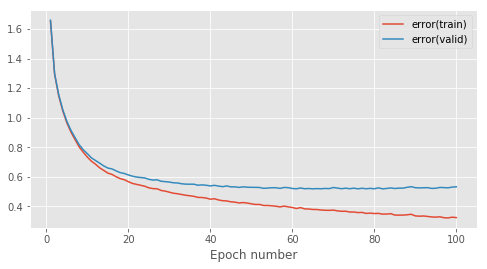

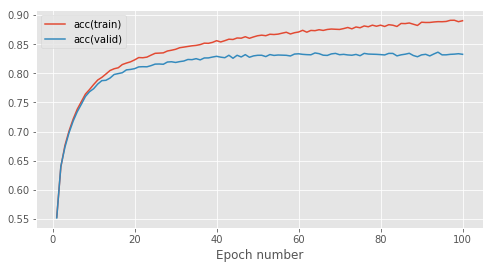

Epoch 1: 1.7s to complete
    error(train)=2.52e+00, acc(train)=3.88e-01, error(valid)=2.53e+00, acc(valid)=3.83e-01


Epoch 2: 1.6s to complete
    error(train)=1.75e+00, acc(train)=5.36e-01, error(valid)=1.75e+00, acc(valid)=5.34e-01


Epoch 3: 1.6s to complete
    error(train)=1.48e+00, acc(train)=5.91e-01, error(valid)=1.49e+00, acc(valid)=5.85e-01


Epoch 4: 1.6s to complete
    error(train)=1.35e+00, acc(train)=6.24e-01, error(valid)=1.36e+00, acc(valid)=6.17e-01


Epoch 5: 1.6s to complete
    error(train)=1.26e+00, acc(train)=6.47e-01, error(valid)=1.27e+00, acc(valid)=6.40e-01


Epoch 6: 1.6s to complete
    error(train)=1.19e+00, acc(train)=6.64e-01, error(valid)=1.20e+00, acc(valid)=6.57e-01


Epoch 7: 1.6s to complete
    error(train)=1.14e+00, acc(train)=6.78e-01, error(valid)=1.15e+00, acc(valid)=6.72e-01


Epoch 8: 1.8s to complete
    error(train)=1.09e+00, acc(train)=6.89e-01, error(valid)=1.11e+00, acc(valid)=6.82e-01


Epoch 9: 1.8s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.94e-01


Epoch 10: 1.6s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.07e-01


Epoch 11: 1.6s to complete
    error(train)=9.77e-01, acc(train)=7.17e-01, error(valid)=9.89e-01, acc(valid)=7.14e-01


Epoch 12: 1.9s to complete
    error(train)=9.45e-01, acc(train)=7.26e-01, error(valid)=9.58e-01, acc(valid)=7.23e-01


Epoch 13: 1.7s to complete
    error(train)=9.16e-01, acc(train)=7.32e-01, error(valid)=9.29e-01, acc(valid)=7.29e-01


Epoch 14: 1.6s to complete
    error(train)=8.89e-01, acc(train)=7.39e-01, error(valid)=9.05e-01, acc(valid)=7.35e-01


Epoch 15: 1.6s to complete
    error(train)=8.64e-01, acc(train)=7.46e-01, error(valid)=8.79e-01, acc(valid)=7.43e-01


Epoch 16: 1.6s to complete
    error(train)=8.40e-01, acc(train)=7.51e-01, error(valid)=8.57e-01, acc(valid)=7.48e-01


Epoch 17: 1.6s to complete
    error(train)=8.19e-01, acc(train)=7.57e-01, error(valid)=8.36e-01, acc(valid)=7.53e-01


Epoch 18: 1.7s to complete
    error(train)=8.00e-01, acc(train)=7.62e-01, error(valid)=8.19e-01, acc(valid)=7.54e-01


Epoch 19: 1.7s to complete
    error(train)=7.84e-01, acc(train)=7.65e-01, error(valid)=8.02e-01, acc(valid)=7.62e-01


Epoch 20: 1.6s to complete
    error(train)=7.68e-01, acc(train)=7.70e-01, error(valid)=7.89e-01, acc(valid)=7.66e-01


Epoch 21: 1.7s to complete
    error(train)=7.56e-01, acc(train)=7.73e-01, error(valid)=7.79e-01, acc(valid)=7.68e-01


Epoch 22: 1.7s to complete
    error(train)=7.40e-01, acc(train)=7.78e-01, error(valid)=7.62e-01, acc(valid)=7.73e-01


Epoch 23: 1.6s to complete
    error(train)=7.24e-01, acc(train)=7.82e-01, error(valid)=7.49e-01, acc(valid)=7.76e-01


Epoch 24: 1.6s to complete
    error(train)=7.12e-01, acc(train)=7.85e-01, error(valid)=7.39e-01, acc(valid)=7.79e-01


Epoch 25: 1.7s to complete
    error(train)=7.02e-01, acc(train)=7.88e-01, error(valid)=7.30e-01, acc(valid)=7.80e-01


Epoch 26: 1.7s to complete
    error(train)=6.93e-01, acc(train)=7.90e-01, error(valid)=7.21e-01, acc(valid)=7.83e-01


Epoch 27: 1.6s to complete
    error(train)=6.83e-01, acc(train)=7.93e-01, error(valid)=7.12e-01, acc(valid)=7.85e-01


Epoch 28: 1.6s to complete
    error(train)=6.72e-01, acc(train)=7.95e-01, error(valid)=7.03e-01, acc(valid)=7.86e-01


Epoch 29: 1.6s to complete
    error(train)=6.65e-01, acc(train)=7.98e-01, error(valid)=6.97e-01, acc(valid)=7.88e-01


Epoch 30: 1.6s to complete
    error(train)=6.58e-01, acc(train)=7.99e-01, error(valid)=6.92e-01, acc(valid)=7.88e-01


Epoch 31: 1.8s to complete
    error(train)=6.50e-01, acc(train)=8.01e-01, error(valid)=6.85e-01, acc(valid)=7.91e-01


Epoch 32: 1.6s to complete
    error(train)=6.44e-01, acc(train)=8.01e-01, error(valid)=6.81e-01, acc(valid)=7.91e-01


Epoch 33: 1.7s to complete
    error(train)=6.34e-01, acc(train)=8.07e-01, error(valid)=6.71e-01, acc(valid)=7.94e-01


Epoch 34: 1.7s to complete
    error(train)=6.28e-01, acc(train)=8.07e-01, error(valid)=6.65e-01, acc(valid)=7.96e-01


Epoch 35: 1.6s to complete
    error(train)=6.22e-01, acc(train)=8.09e-01, error(valid)=6.61e-01, acc(valid)=7.99e-01


Epoch 36: 2.0s to complete
    error(train)=6.17e-01, acc(train)=8.09e-01, error(valid)=6.56e-01, acc(valid)=7.99e-01


Epoch 37: 1.6s to complete
    error(train)=6.11e-01, acc(train)=8.11e-01, error(valid)=6.53e-01, acc(valid)=7.99e-01


Epoch 38: 2.0s to complete
    error(train)=6.08e-01, acc(train)=8.12e-01, error(valid)=6.50e-01, acc(valid)=7.97e-01


Epoch 39: 1.9s to complete
    error(train)=6.01e-01, acc(train)=8.15e-01, error(valid)=6.46e-01, acc(valid)=8.01e-01


Epoch 40: 1.7s to complete
    error(train)=5.96e-01, acc(train)=8.15e-01, error(valid)=6.42e-01, acc(valid)=8.00e-01


Epoch 41: 1.6s to complete
    error(train)=5.91e-01, acc(train)=8.16e-01, error(valid)=6.37e-01, acc(valid)=8.04e-01


Epoch 42: 1.6s to complete
    error(train)=5.86e-01, acc(train)=8.19e-01, error(valid)=6.32e-01, acc(valid)=8.03e-01


Epoch 43: 1.6s to complete
    error(train)=5.82e-01, acc(train)=8.18e-01, error(valid)=6.30e-01, acc(valid)=8.05e-01


Epoch 44: 1.7s to complete
    error(train)=5.78e-01, acc(train)=8.20e-01, error(valid)=6.27e-01, acc(valid)=8.04e-01


Epoch 45: 1.6s to complete
    error(train)=5.74e-01, acc(train)=8.21e-01, error(valid)=6.25e-01, acc(valid)=8.05e-01


Epoch 46: 1.7s to complete
    error(train)=5.70e-01, acc(train)=8.21e-01, error(valid)=6.21e-01, acc(valid)=8.06e-01


Epoch 47: 1.6s to complete
    error(train)=5.64e-01, acc(train)=8.24e-01, error(valid)=6.18e-01, acc(valid)=8.06e-01


Epoch 48: 1.6s to complete
    error(train)=5.61e-01, acc(train)=8.25e-01, error(valid)=6.14e-01, acc(valid)=8.08e-01


Epoch 49: 1.7s to complete
    error(train)=5.59e-01, acc(train)=8.25e-01, error(valid)=6.14e-01, acc(valid)=8.06e-01


Epoch 50: 1.7s to complete
    error(train)=5.54e-01, acc(train)=8.27e-01, error(valid)=6.11e-01, acc(valid)=8.09e-01


Epoch 51: 1.6s to complete
    error(train)=5.50e-01, acc(train)=8.28e-01, error(valid)=6.08e-01, acc(valid)=8.10e-01


Epoch 52: 1.7s to complete
    error(train)=5.47e-01, acc(train)=8.28e-01, error(valid)=6.04e-01, acc(valid)=8.10e-01


Epoch 53: 1.8s to complete
    error(train)=5.44e-01, acc(train)=8.29e-01, error(valid)=6.02e-01, acc(valid)=8.10e-01


Epoch 54: 1.8s to complete
    error(train)=5.40e-01, acc(train)=8.31e-01, error(valid)=5.98e-01, acc(valid)=8.13e-01


Epoch 55: 1.7s to complete
    error(train)=5.41e-01, acc(train)=8.30e-01, error(valid)=6.00e-01, acc(valid)=8.12e-01


Epoch 56: 1.6s to complete
    error(train)=5.36e-01, acc(train)=8.31e-01, error(valid)=5.96e-01, acc(valid)=8.11e-01


Epoch 57: 1.6s to complete
    error(train)=5.35e-01, acc(train)=8.31e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


Epoch 58: 1.6s to complete
    error(train)=5.30e-01, acc(train)=8.32e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


Epoch 59: 1.7s to complete
    error(train)=5.26e-01, acc(train)=8.33e-01, error(valid)=5.90e-01, acc(valid)=8.14e-01


Epoch 60: 1.6s to complete
    error(train)=5.24e-01, acc(train)=8.34e-01, error(valid)=5.89e-01, acc(valid)=8.14e-01


Epoch 61: 1.6s to complete
    error(train)=5.21e-01, acc(train)=8.35e-01, error(valid)=5.87e-01, acc(valid)=8.15e-01


Epoch 62: 1.7s to complete
    error(train)=5.18e-01, acc(train)=8.35e-01, error(valid)=5.84e-01, acc(valid)=8.15e-01


Epoch 63: 2.0s to complete
    error(train)=5.14e-01, acc(train)=8.36e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


Epoch 64: 1.7s to complete
    error(train)=5.15e-01, acc(train)=8.36e-01, error(valid)=5.84e-01, acc(valid)=8.16e-01


Epoch 65: 1.6s to complete
    error(train)=5.10e-01, acc(train)=8.37e-01, error(valid)=5.79e-01, acc(valid)=8.16e-01


Epoch 66: 1.7s to complete
    error(train)=5.09e-01, acc(train)=8.38e-01, error(valid)=5.79e-01, acc(valid)=8.18e-01


Epoch 67: 1.6s to complete
    error(train)=5.08e-01, acc(train)=8.38e-01, error(valid)=5.79e-01, acc(valid)=8.16e-01


Epoch 68: 1.7s to complete
    error(train)=5.02e-01, acc(train)=8.40e-01, error(valid)=5.73e-01, acc(valid)=8.19e-01


Epoch 69: 1.8s to complete
    error(train)=5.01e-01, acc(train)=8.40e-01, error(valid)=5.75e-01, acc(valid)=8.20e-01


Epoch 70: 1.7s to complete
    error(train)=4.99e-01, acc(train)=8.40e-01, error(valid)=5.73e-01, acc(valid)=8.17e-01


Epoch 71: 1.7s to complete
    error(train)=4.97e-01, acc(train)=8.41e-01, error(valid)=5.72e-01, acc(valid)=8.20e-01


Epoch 72: 1.8s to complete
    error(train)=4.94e-01, acc(train)=8.42e-01, error(valid)=5.69e-01, acc(valid)=8.21e-01


Epoch 73: 1.7s to complete
    error(train)=4.94e-01, acc(train)=8.42e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


Epoch 74: 1.6s to complete
    error(train)=4.93e-01, acc(train)=8.42e-01, error(valid)=5.70e-01, acc(valid)=8.18e-01


Epoch 75: 1.7s to complete
    error(train)=4.87e-01, acc(train)=8.45e-01, error(valid)=5.64e-01, acc(valid)=8.22e-01


Epoch 76: 1.6s to complete
    error(train)=4.90e-01, acc(train)=8.43e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


Epoch 77: 1.7s to complete
    error(train)=4.87e-01, acc(train)=8.43e-01, error(valid)=5.66e-01, acc(valid)=8.20e-01


Epoch 78: 1.6s to complete
    error(train)=4.83e-01, acc(train)=8.45e-01, error(valid)=5.64e-01, acc(valid)=8.22e-01


Epoch 79: 1.6s to complete
    error(train)=4.83e-01, acc(train)=8.45e-01, error(valid)=5.64e-01, acc(valid)=8.22e-01


Epoch 80: 1.7s to complete
    error(train)=4.80e-01, acc(train)=8.46e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


Epoch 81: 1.6s to complete
    error(train)=4.77e-01, acc(train)=8.48e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


Epoch 82: 1.7s to complete
    error(train)=4.75e-01, acc(train)=8.48e-01, error(valid)=5.59e-01, acc(valid)=8.24e-01


Epoch 83: 1.6s to complete
    error(train)=4.76e-01, acc(train)=8.47e-01, error(valid)=5.61e-01, acc(valid)=8.20e-01


Epoch 84: 1.6s to complete
    error(train)=4.73e-01, acc(train)=8.47e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


Epoch 85: 1.6s to complete
    error(train)=4.71e-01, acc(train)=8.49e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


Epoch 86: 1.6s to complete
    error(train)=4.70e-01, acc(train)=8.50e-01, error(valid)=5.58e-01, acc(valid)=8.22e-01


Epoch 87: 1.6s to complete
    error(train)=4.67e-01, acc(train)=8.49e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 88: 1.6s to complete
    error(train)=4.65e-01, acc(train)=8.50e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


Epoch 89: 1.7s to complete
    error(train)=4.64e-01, acc(train)=8.51e-01, error(valid)=5.55e-01, acc(valid)=8.21e-01


Epoch 90: 1.7s to complete
    error(train)=4.64e-01, acc(train)=8.51e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


Epoch 91: 1.6s to complete
    error(train)=4.61e-01, acc(train)=8.52e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


Epoch 92: 1.7s to complete
    error(train)=4.61e-01, acc(train)=8.52e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


Epoch 93: 2.0s to complete
    error(train)=4.60e-01, acc(train)=8.52e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


Epoch 94: 1.8s to complete
    error(train)=4.57e-01, acc(train)=8.53e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


Epoch 95: 1.7s to complete
    error(train)=4.56e-01, acc(train)=8.52e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


Epoch 96: 1.7s to complete
    error(train)=4.54e-01, acc(train)=8.54e-01, error(valid)=5.52e-01, acc(valid)=8.26e-01


Epoch 97: 1.8s to complete
    error(train)=4.52e-01, acc(train)=8.54e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


Epoch 98: 1.6s to complete
    error(train)=4.52e-01, acc(train)=8.54e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


Epoch 99: 1.7s to complete
    error(train)=4.51e-01, acc(train)=8.54e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


Epoch 100: 1.6s to complete
    error(train)=4.51e-01, acc(train)=8.55e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


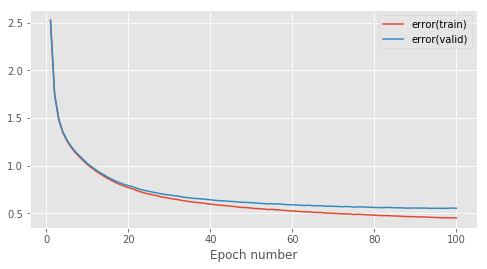

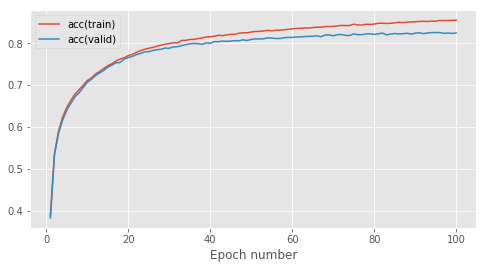

Epoch 1: 1.7s to complete
    error(train)=2.50e+00, acc(train)=4.03e-01, error(valid)=2.50e+00, acc(valid)=4.05e-01


Epoch 2: 1.6s to complete
    error(train)=1.71e+00, acc(train)=5.49e-01, error(valid)=1.71e+00, acc(valid)=5.47e-01


Epoch 3: 1.6s to complete
    error(train)=1.45e+00, acc(train)=6.02e-01, error(valid)=1.45e+00, acc(valid)=5.99e-01


Epoch 4: 1.7s to complete
    error(train)=1.32e+00, acc(train)=6.34e-01, error(valid)=1.32e+00, acc(valid)=6.32e-01


Epoch 5: 1.6s to complete
    error(train)=1.23e+00, acc(train)=6.56e-01, error(valid)=1.24e+00, acc(valid)=6.50e-01


Epoch 6: 1.7s to complete
    error(train)=1.17e+00, acc(train)=6.72e-01, error(valid)=1.17e+00, acc(valid)=6.68e-01


Epoch 7: 1.7s to complete
    error(train)=1.11e+00, acc(train)=6.86e-01, error(valid)=1.12e+00, acc(valid)=6.81e-01


Epoch 8: 1.6s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.94e-01


Epoch 9: 1.6s to complete
    error(train)=1.02e+00, acc(train)=7.11e-01, error(valid)=1.04e+00, acc(valid)=7.06e-01


Epoch 10: 1.7s to complete
    error(train)=9.87e-01, acc(train)=7.19e-01, error(valid)=1.00e+00, acc(valid)=7.13e-01


Epoch 11: 1.8s to complete
    error(train)=9.56e-01, acc(train)=7.27e-01, error(valid)=9.70e-01, acc(valid)=7.19e-01


Epoch 12: 1.6s to complete
    error(train)=9.25e-01, acc(train)=7.35e-01, error(valid)=9.44e-01, acc(valid)=7.27e-01


Epoch 13: 1.7s to complete
    error(train)=8.98e-01, acc(train)=7.42e-01, error(valid)=9.18e-01, acc(valid)=7.33e-01


Epoch 14: 1.7s to complete
    error(train)=8.73e-01, acc(train)=7.47e-01, error(valid)=8.94e-01, acc(valid)=7.40e-01


Epoch 15: 1.7s to complete
    error(train)=8.53e-01, acc(train)=7.54e-01, error(valid)=8.74e-01, acc(valid)=7.46e-01


Epoch 16: 1.6s to complete
    error(train)=8.31e-01, acc(train)=7.58e-01, error(valid)=8.55e-01, acc(valid)=7.48e-01


Epoch 17: 1.6s to complete
    error(train)=8.13e-01, acc(train)=7.63e-01, error(valid)=8.37e-01, acc(valid)=7.54e-01


Epoch 18: 1.8s to complete
    error(train)=7.97e-01, acc(train)=7.66e-01, error(valid)=8.22e-01, acc(valid)=7.57e-01


Epoch 19: 1.8s to complete
    error(train)=7.81e-01, acc(train)=7.70e-01, error(valid)=8.08e-01, acc(valid)=7.61e-01


Epoch 20: 1.7s to complete
    error(train)=7.69e-01, acc(train)=7.72e-01, error(valid)=7.96e-01, acc(valid)=7.62e-01


Epoch 21: 1.7s to complete
    error(train)=7.54e-01, acc(train)=7.77e-01, error(valid)=7.84e-01, acc(valid)=7.67e-01


Epoch 22: 1.7s to complete
    error(train)=7.40e-01, acc(train)=7.81e-01, error(valid)=7.70e-01, acc(valid)=7.72e-01


Epoch 23: 1.8s to complete
    error(train)=7.27e-01, acc(train)=7.83e-01, error(valid)=7.58e-01, acc(valid)=7.74e-01


Epoch 24: 1.7s to complete
    error(train)=7.19e-01, acc(train)=7.86e-01, error(valid)=7.52e-01, acc(valid)=7.77e-01


Epoch 25: 1.6s to complete
    error(train)=7.07e-01, acc(train)=7.88e-01, error(valid)=7.41e-01, acc(valid)=7.77e-01


Epoch 26: 1.6s to complete
    error(train)=6.99e-01, acc(train)=7.90e-01, error(valid)=7.34e-01, acc(valid)=7.78e-01


Epoch 27: 1.6s to complete
    error(train)=6.90e-01, acc(train)=7.92e-01, error(valid)=7.26e-01, acc(valid)=7.79e-01


Epoch 28: 1.7s to complete
    error(train)=6.81e-01, acc(train)=7.94e-01, error(valid)=7.18e-01, acc(valid)=7.81e-01


Epoch 29: 1.7s to complete
    error(train)=6.72e-01, acc(train)=7.97e-01, error(valid)=7.12e-01, acc(valid)=7.84e-01


Epoch 30: 1.7s to complete
    error(train)=6.64e-01, acc(train)=7.99e-01, error(valid)=7.04e-01, acc(valid)=7.86e-01


Epoch 31: 1.7s to complete
    error(train)=6.56e-01, acc(train)=8.02e-01, error(valid)=6.95e-01, acc(valid)=7.89e-01


Epoch 32: 1.7s to complete
    error(train)=6.52e-01, acc(train)=8.02e-01, error(valid)=6.92e-01, acc(valid)=7.88e-01


Epoch 33: 1.7s to complete
    error(train)=6.41e-01, acc(train)=8.05e-01, error(valid)=6.82e-01, acc(valid)=7.92e-01


Epoch 34: 1.7s to complete
    error(train)=6.36e-01, acc(train)=8.07e-01, error(valid)=6.78e-01, acc(valid)=7.95e-01


Epoch 35: 1.7s to complete
    error(train)=6.29e-01, acc(train)=8.08e-01, error(valid)=6.74e-01, acc(valid)=7.94e-01


Epoch 36: 1.7s to complete
    error(train)=6.23e-01, acc(train)=8.10e-01, error(valid)=6.67e-01, acc(valid)=7.96e-01


Epoch 37: 1.7s to complete
    error(train)=6.19e-01, acc(train)=8.09e-01, error(valid)=6.66e-01, acc(valid)=7.95e-01


Epoch 38: 1.9s to complete
    error(train)=6.12e-01, acc(train)=8.12e-01, error(valid)=6.58e-01, acc(valid)=7.99e-01


Epoch 39: 1.8s to complete
    error(train)=6.08e-01, acc(train)=8.14e-01, error(valid)=6.56e-01, acc(valid)=7.99e-01


Epoch 40: 1.6s to complete
    error(train)=6.02e-01, acc(train)=8.15e-01, error(valid)=6.50e-01, acc(valid)=8.00e-01


Epoch 41: 1.9s to complete
    error(train)=6.01e-01, acc(train)=8.15e-01, error(valid)=6.49e-01, acc(valid)=8.00e-01


Epoch 42: 1.8s to complete
    error(train)=5.93e-01, acc(train)=8.17e-01, error(valid)=6.44e-01, acc(valid)=8.04e-01


Epoch 43: 1.7s to complete
    error(train)=5.87e-01, acc(train)=8.19e-01, error(valid)=6.39e-01, acc(valid)=8.03e-01


Epoch 44: 1.7s to complete
    error(train)=5.84e-01, acc(train)=8.20e-01, error(valid)=6.35e-01, acc(valid)=8.05e-01


Epoch 45: 1.7s to complete
    error(train)=5.78e-01, acc(train)=8.21e-01, error(valid)=6.31e-01, acc(valid)=8.05e-01


Epoch 46: 1.7s to complete
    error(train)=5.75e-01, acc(train)=8.22e-01, error(valid)=6.30e-01, acc(valid)=8.04e-01


Epoch 47: 1.7s to complete
    error(train)=5.69e-01, acc(train)=8.23e-01, error(valid)=6.24e-01, acc(valid)=8.07e-01


Epoch 48: 1.9s to complete
    error(train)=5.68e-01, acc(train)=8.23e-01, error(valid)=6.24e-01, acc(valid)=8.06e-01


Epoch 49: 1.6s to complete
    error(train)=5.65e-01, acc(train)=8.25e-01, error(valid)=6.22e-01, acc(valid)=8.07e-01


Epoch 50: 1.8s to complete
    error(train)=5.60e-01, acc(train)=8.26e-01, error(valid)=6.19e-01, acc(valid)=8.07e-01


Epoch 51: 1.6s to complete
    error(train)=5.53e-01, acc(train)=8.28e-01, error(valid)=6.14e-01, acc(valid)=8.09e-01


Epoch 52: 1.6s to complete
    error(train)=5.50e-01, acc(train)=8.28e-01, error(valid)=6.11e-01, acc(valid)=8.09e-01


Epoch 53: 1.7s to complete
    error(train)=5.48e-01, acc(train)=8.29e-01, error(valid)=6.11e-01, acc(valid)=8.09e-01


Epoch 54: 1.7s to complete
    error(train)=5.43e-01, acc(train)=8.30e-01, error(valid)=6.08e-01, acc(valid)=8.10e-01


Epoch 55: 1.7s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=6.04e-01, acc(valid)=8.11e-01


Epoch 56: 1.7s to complete
    error(train)=5.36e-01, acc(train)=8.33e-01, error(valid)=6.03e-01, acc(valid)=8.12e-01


Epoch 57: 1.6s to complete
    error(train)=5.33e-01, acc(train)=8.33e-01, error(valid)=5.99e-01, acc(valid)=8.14e-01


Epoch 58: 1.7s to complete
    error(train)=5.30e-01, acc(train)=8.33e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


Epoch 59: 1.7s to complete
    error(train)=5.28e-01, acc(train)=8.34e-01, error(valid)=5.98e-01, acc(valid)=8.12e-01


Epoch 60: 1.6s to complete
    error(train)=5.26e-01, acc(train)=8.35e-01, error(valid)=5.95e-01, acc(valid)=8.14e-01


Epoch 61: 1.7s to complete
    error(train)=5.22e-01, acc(train)=8.35e-01, error(valid)=5.92e-01, acc(valid)=8.14e-01


Epoch 62: 1.6s to complete
    error(train)=5.18e-01, acc(train)=8.37e-01, error(valid)=5.91e-01, acc(valid)=8.12e-01


Epoch 63: 1.6s to complete
    error(train)=5.16e-01, acc(train)=8.37e-01, error(valid)=5.89e-01, acc(valid)=8.13e-01


Epoch 64: 1.7s to complete
    error(train)=5.13e-01, acc(train)=8.37e-01, error(valid)=5.89e-01, acc(valid)=8.15e-01


Epoch 65: 1.7s to complete
    error(train)=5.13e-01, acc(train)=8.38e-01, error(valid)=5.88e-01, acc(valid)=8.16e-01


Epoch 66: 1.7s to complete
    error(train)=5.09e-01, acc(train)=8.39e-01, error(valid)=5.85e-01, acc(valid)=8.15e-01


Epoch 67: 1.8s to complete
    error(train)=5.04e-01, acc(train)=8.40e-01, error(valid)=5.81e-01, acc(valid)=8.15e-01


Epoch 68: 1.7s to complete
    error(train)=5.03e-01, acc(train)=8.41e-01, error(valid)=5.82e-01, acc(valid)=8.14e-01


Epoch 69: 1.7s to complete
    error(train)=5.00e-01, acc(train)=8.41e-01, error(valid)=5.79e-01, acc(valid)=8.17e-01


Epoch 70: 1.7s to complete
    error(train)=4.99e-01, acc(train)=8.41e-01, error(valid)=5.79e-01, acc(valid)=8.17e-01


Epoch 71: 1.6s to complete
    error(train)=4.96e-01, acc(train)=8.43e-01, error(valid)=5.78e-01, acc(valid)=8.18e-01


Epoch 72: 1.7s to complete
    error(train)=4.94e-01, acc(train)=8.42e-01, error(valid)=5.76e-01, acc(valid)=8.14e-01


Epoch 73: 1.7s to complete
    error(train)=4.91e-01, acc(train)=8.45e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


Epoch 74: 1.9s to complete
    error(train)=4.89e-01, acc(train)=8.45e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


Epoch 75: 1.7s to complete
    error(train)=4.87e-01, acc(train)=8.45e-01, error(valid)=5.73e-01, acc(valid)=8.18e-01


Epoch 76: 1.7s to complete
    error(train)=4.85e-01, acc(train)=8.45e-01, error(valid)=5.70e-01, acc(valid)=8.20e-01


Epoch 77: 1.7s to complete
    error(train)=4.83e-01, acc(train)=8.46e-01, error(valid)=5.69e-01, acc(valid)=8.20e-01


Epoch 78: 1.7s to complete
    error(train)=4.82e-01, acc(train)=8.46e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


Epoch 79: 1.7s to complete
    error(train)=4.78e-01, acc(train)=8.48e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


Epoch 80: 1.7s to complete
    error(train)=4.79e-01, acc(train)=8.47e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


Epoch 81: 1.6s to complete
    error(train)=4.76e-01, acc(train)=8.47e-01, error(valid)=5.66e-01, acc(valid)=8.20e-01


Epoch 82: 1.7s to complete
    error(train)=4.74e-01, acc(train)=8.48e-01, error(valid)=5.65e-01, acc(valid)=8.19e-01


Epoch 83: 1.6s to complete
    error(train)=4.71e-01, acc(train)=8.49e-01, error(valid)=5.64e-01, acc(valid)=8.21e-01


Epoch 84: 1.7s to complete
    error(train)=4.68e-01, acc(train)=8.50e-01, error(valid)=5.62e-01, acc(valid)=8.20e-01


Epoch 85: 1.7s to complete
    error(train)=4.68e-01, acc(train)=8.50e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


Epoch 86: 1.7s to complete
    error(train)=4.64e-01, acc(train)=8.52e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


Epoch 87: 1.7s to complete
    error(train)=4.66e-01, acc(train)=8.50e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01


Epoch 88: 1.7s to complete
    error(train)=4.62e-01, acc(train)=8.51e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


Epoch 89: 1.7s to complete
    error(train)=4.63e-01, acc(train)=8.52e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


Epoch 90: 1.9s to complete
    error(train)=4.57e-01, acc(train)=8.53e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


Epoch 91: 1.7s to complete
    error(train)=4.57e-01, acc(train)=8.54e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


Epoch 92: 1.7s to complete
    error(train)=4.55e-01, acc(train)=8.54e-01, error(valid)=5.56e-01, acc(valid)=8.22e-01


Epoch 93: 1.7s to complete
    error(train)=4.52e-01, acc(train)=8.55e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


Epoch 94: 1.7s to complete
    error(train)=4.52e-01, acc(train)=8.55e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


Epoch 95: 1.8s to complete
    error(train)=4.50e-01, acc(train)=8.56e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


Epoch 96: 1.8s to complete
    error(train)=4.49e-01, acc(train)=8.56e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


Epoch 97: 1.7s to complete
    error(train)=4.49e-01, acc(train)=8.55e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


Epoch 98: 1.8s to complete
    error(train)=4.45e-01, acc(train)=8.57e-01, error(valid)=5.53e-01, acc(valid)=8.25e-01


Epoch 99: 1.7s to complete
    error(train)=4.49e-01, acc(train)=8.55e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


Epoch 100: 1.7s to complete
    error(train)=4.42e-01, acc(train)=8.58e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


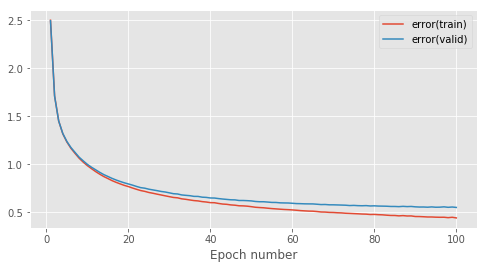

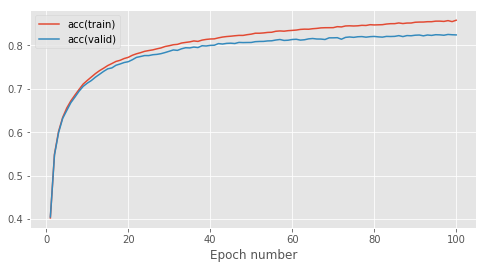

Epoch 1: 1.7s to complete
    error(train)=2.28e+00, acc(train)=4.31e-01, error(valid)=2.28e+00, acc(valid)=4.32e-01


Epoch 2: 1.8s to complete
    error(train)=1.61e+00, acc(train)=5.64e-01, error(valid)=1.61e+00, acc(valid)=5.61e-01


Epoch 3: 1.6s to complete
    error(train)=1.39e+00, acc(train)=6.15e-01, error(valid)=1.39e+00, acc(valid)=6.11e-01


Epoch 4: 1.6s to complete
    error(train)=1.27e+00, acc(train)=6.46e-01, error(valid)=1.26e+00, acc(valid)=6.43e-01


Epoch 5: 1.6s to complete
    error(train)=1.18e+00, acc(train)=6.69e-01, error(valid)=1.18e+00, acc(valid)=6.65e-01


Epoch 6: 1.6s to complete
    error(train)=1.12e+00, acc(train)=6.83e-01, error(valid)=1.12e+00, acc(valid)=6.81e-01


Epoch 7: 1.6s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


Epoch 8: 1.6s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.03e+00, acc(valid)=7.06e-01


Epoch 9: 1.6s to complete
    error(train)=9.86e-01, acc(train)=7.16e-01, error(valid)=9.95e-01, acc(valid)=7.13e-01


Epoch 10: 1.6s to complete
    error(train)=9.52e-01, acc(train)=7.24e-01, error(valid)=9.64e-01, acc(valid)=7.19e-01


Epoch 11: 1.6s to complete
    error(train)=9.23e-01, acc(train)=7.33e-01, error(valid)=9.36e-01, acc(valid)=7.30e-01


Epoch 12: 1.7s to complete
    error(train)=8.99e-01, acc(train)=7.39e-01, error(valid)=9.14e-01, acc(valid)=7.35e-01


Epoch 13: 1.7s to complete
    error(train)=8.72e-01, acc(train)=7.46e-01, error(valid)=8.89e-01, acc(valid)=7.43e-01


Epoch 14: 1.7s to complete
    error(train)=8.49e-01, acc(train)=7.52e-01, error(valid)=8.67e-01, acc(valid)=7.48e-01


Epoch 15: 1.6s to complete
    error(train)=8.29e-01, acc(train)=7.57e-01, error(valid)=8.49e-01, acc(valid)=7.53e-01


Epoch 16: 1.8s to complete
    error(train)=8.11e-01, acc(train)=7.63e-01, error(valid)=8.33e-01, acc(valid)=7.56e-01


Epoch 17: 1.7s to complete
    error(train)=7.93e-01, acc(train)=7.66e-01, error(valid)=8.17e-01, acc(valid)=7.61e-01


Epoch 18: 1.7s to complete
    error(train)=7.80e-01, acc(train)=7.69e-01, error(valid)=8.04e-01, acc(valid)=7.63e-01


Epoch 19: 1.8s to complete
    error(train)=7.66e-01, acc(train)=7.74e-01, error(valid)=7.90e-01, acc(valid)=7.67e-01


Epoch 20: 1.6s to complete
    error(train)=7.49e-01, acc(train)=7.77e-01, error(valid)=7.75e-01, acc(valid)=7.69e-01


Epoch 21: 1.7s to complete
    error(train)=7.37e-01, acc(train)=7.81e-01, error(valid)=7.64e-01, acc(valid)=7.73e-01


Epoch 22: 1.6s to complete
    error(train)=7.25e-01, acc(train)=7.85e-01, error(valid)=7.53e-01, acc(valid)=7.77e-01


Epoch 23: 1.6s to complete
    error(train)=7.14e-01, acc(train)=7.87e-01, error(valid)=7.43e-01, acc(valid)=7.78e-01


Epoch 24: 1.7s to complete
    error(train)=7.03e-01, acc(train)=7.90e-01, error(valid)=7.32e-01, acc(valid)=7.81e-01


Epoch 25: 1.7s to complete
    error(train)=6.92e-01, acc(train)=7.93e-01, error(valid)=7.24e-01, acc(valid)=7.81e-01


Epoch 26: 1.7s to complete
    error(train)=6.83e-01, acc(train)=7.95e-01, error(valid)=7.16e-01, acc(valid)=7.84e-01


Epoch 27: 1.7s to complete
    error(train)=6.75e-01, acc(train)=7.97e-01, error(valid)=7.09e-01, acc(valid)=7.85e-01


Epoch 28: 1.7s to complete
    error(train)=6.66e-01, acc(train)=7.99e-01, error(valid)=7.00e-01, acc(valid)=7.88e-01


Epoch 29: 1.7s to complete
    error(train)=6.57e-01, acc(train)=8.02e-01, error(valid)=6.92e-01, acc(valid)=7.90e-01


Epoch 30: 1.8s to complete
    error(train)=6.52e-01, acc(train)=8.02e-01, error(valid)=6.88e-01, acc(valid)=7.92e-01


Epoch 31: 1.7s to complete
    error(train)=6.45e-01, acc(train)=8.05e-01, error(valid)=6.82e-01, acc(valid)=7.93e-01


Epoch 32: 1.7s to complete
    error(train)=6.37e-01, acc(train)=8.06e-01, error(valid)=6.74e-01, acc(valid)=7.93e-01


Epoch 33: 1.6s to complete
    error(train)=6.29e-01, acc(train)=8.09e-01, error(valid)=6.67e-01, acc(valid)=7.97e-01


Epoch 34: 1.7s to complete
    error(train)=6.25e-01, acc(train)=8.08e-01, error(valid)=6.65e-01, acc(valid)=7.96e-01


Epoch 35: 2.0s to complete
    error(train)=6.19e-01, acc(train)=8.11e-01, error(valid)=6.60e-01, acc(valid)=7.97e-01


Epoch 36: 1.9s to complete
    error(train)=6.11e-01, acc(train)=8.13e-01, error(valid)=6.53e-01, acc(valid)=8.01e-01


Epoch 37: 1.9s to complete
    error(train)=6.06e-01, acc(train)=8.15e-01, error(valid)=6.49e-01, acc(valid)=8.02e-01


Epoch 38: 1.7s to complete
    error(train)=6.01e-01, acc(train)=8.16e-01, error(valid)=6.44e-01, acc(valid)=8.02e-01


Epoch 39: 1.7s to complete
    error(train)=5.97e-01, acc(train)=8.17e-01, error(valid)=6.41e-01, acc(valid)=8.03e-01


Epoch 40: 1.8s to complete
    error(train)=5.91e-01, acc(train)=8.18e-01, error(valid)=6.37e-01, acc(valid)=8.05e-01


Epoch 41: 1.7s to complete
    error(train)=5.87e-01, acc(train)=8.18e-01, error(valid)=6.34e-01, acc(valid)=8.04e-01


Epoch 42: 1.8s to complete
    error(train)=5.81e-01, acc(train)=8.21e-01, error(valid)=6.29e-01, acc(valid)=8.06e-01


Epoch 43: 1.7s to complete
    error(train)=5.78e-01, acc(train)=8.22e-01, error(valid)=6.27e-01, acc(valid)=8.08e-01


Epoch 44: 1.9s to complete
    error(train)=5.72e-01, acc(train)=8.23e-01, error(valid)=6.22e-01, acc(valid)=8.07e-01


Epoch 45: 1.6s to complete
    error(train)=5.69e-01, acc(train)=8.24e-01, error(valid)=6.19e-01, acc(valid)=8.09e-01


Epoch 46: 1.7s to complete
    error(train)=5.66e-01, acc(train)=8.23e-01, error(valid)=6.17e-01, acc(valid)=8.07e-01


Epoch 47: 1.7s to complete
    error(train)=5.62e-01, acc(train)=8.24e-01, error(valid)=6.15e-01, acc(valid)=8.09e-01


Epoch 48: 1.6s to complete
    error(train)=5.56e-01, acc(train)=8.26e-01, error(valid)=6.10e-01, acc(valid)=8.10e-01


Epoch 49: 1.6s to complete
    error(train)=5.55e-01, acc(train)=8.26e-01, error(valid)=6.09e-01, acc(valid)=8.11e-01


Epoch 50: 1.7s to complete
    error(train)=5.49e-01, acc(train)=8.28e-01, error(valid)=6.06e-01, acc(valid)=8.13e-01


Epoch 51: 1.7s to complete
    error(train)=5.47e-01, acc(train)=8.29e-01, error(valid)=6.03e-01, acc(valid)=8.11e-01


Epoch 52: 1.6s to complete
    error(train)=5.42e-01, acc(train)=8.30e-01, error(valid)=5.98e-01, acc(valid)=8.14e-01


Epoch 53: 1.7s to complete
    error(train)=5.41e-01, acc(train)=8.31e-01, error(valid)=5.98e-01, acc(valid)=8.14e-01


Epoch 54: 1.7s to complete
    error(train)=5.34e-01, acc(train)=8.33e-01, error(valid)=5.93e-01, acc(valid)=8.15e-01


Epoch 55: 1.8s to complete
    error(train)=5.33e-01, acc(train)=8.32e-01, error(valid)=5.93e-01, acc(valid)=8.16e-01


Epoch 56: 1.7s to complete
    error(train)=5.28e-01, acc(train)=8.34e-01, error(valid)=5.89e-01, acc(valid)=8.15e-01


Epoch 57: 1.7s to complete
    error(train)=5.26e-01, acc(train)=8.34e-01, error(valid)=5.89e-01, acc(valid)=8.18e-01


Epoch 58: 1.7s to complete
    error(train)=5.20e-01, acc(train)=8.36e-01, error(valid)=5.84e-01, acc(valid)=8.18e-01


Epoch 59: 1.7s to complete
    error(train)=5.19e-01, acc(train)=8.37e-01, error(valid)=5.84e-01, acc(valid)=8.17e-01


Epoch 60: 1.6s to complete
    error(train)=5.16e-01, acc(train)=8.36e-01, error(valid)=5.82e-01, acc(valid)=8.19e-01


Epoch 61: 1.7s to complete
    error(train)=5.13e-01, acc(train)=8.38e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


Epoch 62: 1.6s to complete
    error(train)=5.11e-01, acc(train)=8.37e-01, error(valid)=5.80e-01, acc(valid)=8.17e-01


Epoch 63: 1.8s to complete
    error(train)=5.06e-01, acc(train)=8.39e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


Epoch 64: 1.7s to complete
    error(train)=5.05e-01, acc(train)=8.39e-01, error(valid)=5.77e-01, acc(valid)=8.18e-01


Epoch 65: 1.6s to complete
    error(train)=5.03e-01, acc(train)=8.39e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


Epoch 66: 1.6s to complete
    error(train)=4.99e-01, acc(train)=8.41e-01, error(valid)=5.73e-01, acc(valid)=8.21e-01


Epoch 67: 1.7s to complete
    error(train)=4.97e-01, acc(train)=8.42e-01, error(valid)=5.70e-01, acc(valid)=8.21e-01


Epoch 68: 1.7s to complete
    error(train)=4.94e-01, acc(train)=8.42e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


Epoch 69: 1.7s to complete
    error(train)=4.92e-01, acc(train)=8.43e-01, error(valid)=5.67e-01, acc(valid)=8.22e-01


Epoch 70: 1.7s to complete
    error(train)=4.90e-01, acc(train)=8.44e-01, error(valid)=5.67e-01, acc(valid)=8.22e-01


Epoch 71: 1.6s to complete
    error(train)=4.87e-01, acc(train)=8.44e-01, error(valid)=5.65e-01, acc(valid)=8.22e-01


Epoch 72: 1.6s to complete
    error(train)=4.85e-01, acc(train)=8.45e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01


Epoch 73: 1.7s to complete
    error(train)=4.86e-01, acc(train)=8.44e-01, error(valid)=5.67e-01, acc(valid)=8.21e-01


Epoch 74: 1.7s to complete
    error(train)=4.80e-01, acc(train)=8.46e-01, error(valid)=5.62e-01, acc(valid)=8.23e-01


Epoch 75: 1.6s to complete
    error(train)=4.79e-01, acc(train)=8.46e-01, error(valid)=5.62e-01, acc(valid)=8.23e-01


Epoch 76: 1.9s to complete
    error(train)=4.76e-01, acc(train)=8.48e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


Epoch 77: 1.8s to complete
    error(train)=4.73e-01, acc(train)=8.48e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01


Epoch 78: 1.8s to complete
    error(train)=4.76e-01, acc(train)=8.47e-01, error(valid)=5.61e-01, acc(valid)=8.21e-01


Epoch 79: 1.7s to complete
    error(train)=4.75e-01, acc(train)=8.48e-01, error(valid)=5.63e-01, acc(valid)=8.22e-01


Epoch 80: 1.6s to complete
    error(train)=4.72e-01, acc(train)=8.47e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


Epoch 81: 1.8s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.61e-01, acc(valid)=8.23e-01


Epoch 82: 1.6s to complete
    error(train)=4.64e-01, acc(train)=8.50e-01, error(valid)=5.53e-01, acc(valid)=8.25e-01


Epoch 83: 1.6s to complete
    error(train)=4.63e-01, acc(train)=8.52e-01, error(valid)=5.53e-01, acc(valid)=8.25e-01


Epoch 84: 1.7s to complete
    error(train)=4.60e-01, acc(train)=8.52e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


Epoch 85: 1.7s to complete
    error(train)=4.61e-01, acc(train)=8.50e-01, error(valid)=5.53e-01, acc(valid)=8.24e-01


Epoch 86: 1.7s to complete
    error(train)=4.58e-01, acc(train)=8.52e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


Epoch 87: 1.7s to complete
    error(train)=4.57e-01, acc(train)=8.53e-01, error(valid)=5.51e-01, acc(valid)=8.26e-01


Epoch 88: 1.7s to complete
    error(train)=4.55e-01, acc(train)=8.53e-01, error(valid)=5.50e-01, acc(valid)=8.25e-01


Epoch 89: 1.7s to complete
    error(train)=4.52e-01, acc(train)=8.54e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 90: 1.8s to complete
    error(train)=4.50e-01, acc(train)=8.54e-01, error(valid)=5.47e-01, acc(valid)=8.24e-01


Epoch 91: 1.9s to complete
    error(train)=4.48e-01, acc(train)=8.55e-01, error(valid)=5.47e-01, acc(valid)=8.27e-01


Epoch 92: 1.7s to complete
    error(train)=4.48e-01, acc(train)=8.53e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


Epoch 93: 1.7s to complete
    error(train)=4.44e-01, acc(train)=8.55e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


Epoch 94: 1.8s to complete
    error(train)=4.45e-01, acc(train)=8.55e-01, error(valid)=5.47e-01, acc(valid)=8.24e-01


Epoch 95: 1.9s to complete
    error(train)=4.44e-01, acc(train)=8.56e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


Epoch 96: 1.7s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


Epoch 97: 1.6s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 98: 1.7s to complete
    error(train)=4.37e-01, acc(train)=8.58e-01, error(valid)=5.44e-01, acc(valid)=8.25e-01


Epoch 99: 1.8s to complete
    error(train)=4.37e-01, acc(train)=8.58e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


Epoch 100: 1.7s to complete
    error(train)=4.33e-01, acc(train)=8.59e-01, error(valid)=5.41e-01, acc(valid)=8.27e-01


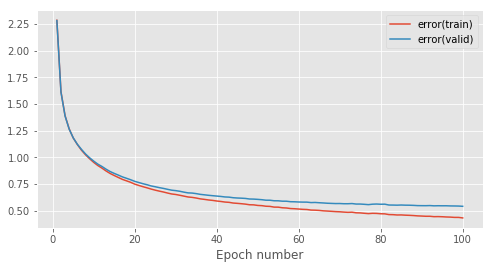

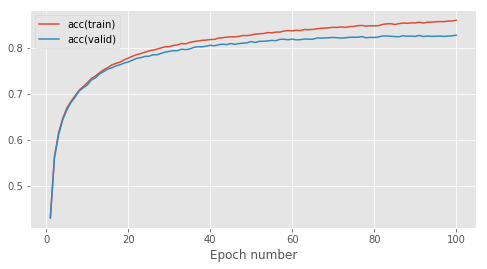

In [7]:
num_epochs = 100
rmsprop_learning_rates = [0.002, 0.001, 0.0005, 0.00025, 0.0001, 0.00005]
b = [0.5, 0.7, 0.9]
rmsprop_models = OrderedDict()
rmsprop_stats = OrderedDict()
final_train_errors = []
final_valid_errors = []
final_train_accs = []
final_valid_accs = []


for learning_rate in rmsprop_learning_rates:
    for beta in b:
        layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
                  ReluLayer(),
                  AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
                  ReluLayer(),
                  AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
                  ReluLayer(),
                  AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]
        
        model = MultipleLayerModel(layers)
        
        learning_rule = RMSPropLearningRule(learning_rate=learning_rate, beta=beta)
        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
                model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
        plt.show()
        
        rmsprop_models[(learning_rate, beta)] = model
        rmsprop_stats[(learning_rate, beta)] = stats
        
        final_train_errors.append(stats[-1, keys['error(train)']])
        final_valid_errors.append(stats[-1, keys['error(valid)']])
        final_train_accs.append(stats[-1, keys['acc(train)']])
        final_valid_accs.append(stats[-1, keys['acc(valid)']])

In [27]:
print('| learning_rate |   beta   |  ith epoch  | best valid error | best valid acc |')
print('|---------------|----------|-------------|------------------|----------------|')
i = 0
for learning_rate in rmsprop_learning_rates:
    for beta in b:
        stats = rmsprop_stats[(learning_rate, beta)]
        print('| {0:.4f}        |   {1:.2f}   |     {2:2d}      |     {3:.3e}    |      {4:.3f}     |'
              .format(learning_rate, beta,
                      np.argmax(stats[1:, -1]),
                      stats[1:, -2][np.argmax(stats[1:, -1])], 
                      np.max(stats[1:, -1])))

| learning_rate |   beta   |  ith epoch  | best valid error | best valid acc |
|---------------|----------|-------------|------------------|----------------|
| 0.0020        |   0.50   |      2      |     6.928e-01    |      0.788     |
| 0.0020        |   0.70   |      4      |     6.347e-01    |      0.812     |
| 0.0020        |   0.90   |      7      |     5.972e-01    |      0.818     |
| 0.0010        |   0.50   |      7      |     5.888e-01    |      0.818     |
| 0.0010        |   0.70   |      9      |     5.848e-01    |      0.828     |
| 0.0010        |   0.90   |     14      |     5.271e-01    |      0.842     |
| 0.0005        |   0.50   |     14      |     5.316e-01    |      0.834     |
| 0.0005        |   0.70   |     17      |     5.388e-01    |      0.838     |
| 0.0005        |   0.90   |     17      |     5.098e-01    |      0.841     |
| 0.0003        |   0.50   |     32      |     5.578e-01    |      0.831     |
| 0.0003        |   0.70   |     35      |     5.306

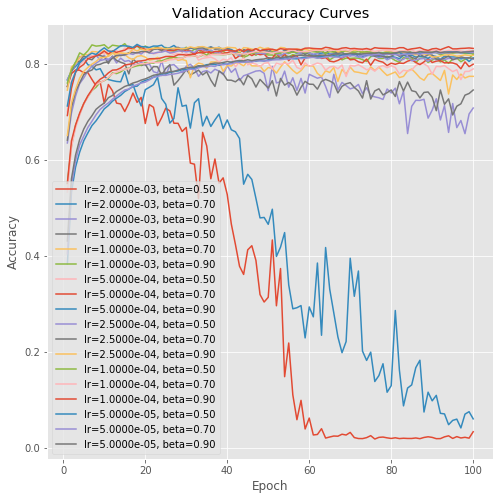

In [29]:
# plot validation acc
plt.figure(figsize=(8,8))

labels = []
for learning_rate in rmsprop_learning_rates:
    for beta in b:
        labels.append('lr={0:.4e}, beta={1:.2f}'
                      .format(learning_rate, beta))
i = 0
for learning_rate in rmsprop_learning_rates:
    for beta in b:
        stats = rmsprop_stats[(learning_rate, beta)]
        plt.plot(np.arange(1, stats.shape[0]) * stats_interval, stats[1:, -1], label=labels[i])
        i += 1
plt.legend(loc=0)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Validation Accuracy Curves')
plt.show()

### final setting

Epoch 1: 5.2s to complete
    error(train)=6.65e-01, acc(train)=7.87e-01, error(valid)=6.93e-01, acc(valid)=7.85e-01


Epoch 2: 8.2s to complete
    error(train)=5.40e-01, acc(train)=8.20e-01, error(valid)=5.97e-01, acc(valid)=8.05e-01


Epoch 3: 10.6s to complete
    error(train)=5.34e-01, acc(train)=8.22e-01, error(valid)=6.09e-01, acc(valid)=8.04e-01


Epoch 4: 5.8s to complete
    error(train)=4.64e-01, acc(train)=8.41e-01, error(valid)=5.57e-01, acc(valid)=8.18e-01


Epoch 5: 7.6s to complete
    error(train)=4.44e-01, acc(train)=8.45e-01, error(valid)=5.66e-01, acc(valid)=8.18e-01


Epoch 6: 4.9s to complete
    error(train)=4.39e-01, acc(train)=8.48e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


Epoch 7: 7.9s to complete
    error(train)=4.62e-01, acc(train)=8.41e-01, error(valid)=6.12e-01, acc(valid)=8.12e-01


Epoch 8: 5.3s to complete
    error(train)=4.10e-01, acc(train)=8.56e-01, error(valid)=5.80e-01, acc(valid)=8.27e-01


Epoch 9: 7.0s to complete
    error(train)=4.34e-01, acc(train)=8.49e-01, error(valid)=6.34e-01, acc(valid)=8.16e-01


Epoch 10: 8.2s to complete
    error(train)=4.30e-01, acc(train)=8.51e-01, error(valid)=6.49e-01, acc(valid)=8.15e-01


Epoch 11: 7.0s to complete
    error(train)=4.40e-01, acc(train)=8.51e-01, error(valid)=6.87e-01, acc(valid)=8.17e-01


Epoch 12: 8.2s to complete
    error(train)=4.47e-01, acc(train)=8.47e-01, error(valid)=6.55e-01, acc(valid)=8.14e-01


Epoch 13: 8.9s to complete
    error(train)=4.47e-01, acc(train)=8.49e-01, error(valid)=6.84e-01, acc(valid)=8.15e-01


Epoch 14: 8.0s to complete
    error(train)=4.47e-01, acc(train)=8.46e-01, error(valid)=6.93e-01, acc(valid)=8.07e-01


Epoch 15: 6.9s to complete
    error(train)=4.42e-01, acc(train)=8.53e-01, error(valid)=7.31e-01, acc(valid)=8.19e-01


Epoch 16: 8.6s to complete
    error(train)=4.70e-01, acc(train)=8.49e-01, error(valid)=7.59e-01, acc(valid)=8.14e-01


Epoch 17: 7.8s to complete
    error(train)=4.79e-01, acc(train)=8.44e-01, error(valid)=7.93e-01, acc(valid)=8.06e-01


Epoch 18: 7.3s to complete
    error(train)=4.49e-01, acc(train)=8.50e-01, error(valid)=7.25e-01, acc(valid)=8.14e-01


Epoch 19: 8.2s to complete
    error(train)=4.85e-01, acc(train)=8.37e-01, error(valid)=7.29e-01, acc(valid)=8.02e-01


Epoch 20: 5.7s to complete
    error(train)=4.97e-01, acc(train)=8.40e-01, error(valid)=8.00e-01, acc(valid)=8.03e-01


Epoch 21: 5.4s to complete
    error(train)=4.90e-01, acc(train)=8.36e-01, error(valid)=7.90e-01, acc(valid)=8.01e-01


Epoch 22: 6.7s to complete
    error(train)=4.87e-01, acc(train)=8.45e-01, error(valid)=8.31e-01, acc(valid)=8.09e-01


Epoch 23: 5.1s to complete
    error(train)=4.91e-01, acc(train)=8.41e-01, error(valid)=8.29e-01, acc(valid)=8.01e-01


Epoch 24: 8.0s to complete
    error(train)=5.23e-01, acc(train)=8.31e-01, error(valid)=8.39e-01, acc(valid)=7.96e-01


Epoch 25: 5.5s to complete
    error(train)=5.28e-01, acc(train)=8.30e-01, error(valid)=8.62e-01, acc(valid)=7.93e-01


Epoch 26: 4.7s to complete
    error(train)=4.93e-01, acc(train)=8.38e-01, error(valid)=8.36e-01, acc(valid)=8.00e-01


Epoch 27: 4.4s to complete
    error(train)=5.76e-01, acc(train)=8.22e-01, error(valid)=9.61e-01, acc(valid)=7.84e-01


Epoch 28: 7.1s to complete
    error(train)=5.65e-01, acc(train)=8.23e-01, error(valid)=9.24e-01, acc(valid)=7.91e-01


Epoch 29: 10.0s to complete
    error(train)=5.30e-01, acc(train)=8.41e-01, error(valid)=9.45e-01, acc(valid)=8.07e-01


Epoch 30: 4.3s to complete
    error(train)=6.63e-01, acc(train)=7.96e-01, error(valid)=9.91e-01, acc(valid)=7.63e-01


Epoch 31: 4.7s to complete
    error(train)=6.37e-01, acc(train)=8.29e-01, error(valid)=1.13e+00, acc(valid)=7.97e-01


Epoch 32: 7.6s to complete
    error(train)=5.29e-01, acc(train)=8.37e-01, error(valid)=9.69e-01, acc(valid)=7.98e-01


Epoch 33: 5.2s to complete
    error(train)=5.21e-01, acc(train)=8.37e-01, error(valid)=1.01e+00, acc(valid)=7.98e-01


Epoch 34: 6.2s to complete
    error(train)=5.31e-01, acc(train)=8.32e-01, error(valid)=9.89e-01, acc(valid)=7.96e-01


Epoch 35: 4.2s to complete
    error(train)=5.69e-01, acc(train)=8.16e-01, error(valid)=9.53e-01, acc(valid)=7.78e-01


Epoch 36: 7.4s to complete
    error(train)=5.27e-01, acc(train)=8.45e-01, error(valid)=1.07e+00, acc(valid)=8.10e-01


Epoch 37: 8.5s to complete
    error(train)=5.59e-01, acc(train)=8.32e-01, error(valid)=1.03e+00, acc(valid)=7.91e-01


Epoch 38: 6.8s to complete
    error(train)=6.17e-01, acc(train)=8.27e-01, error(valid)=1.17e+00, acc(valid)=7.85e-01


Epoch 39: 6.2s to complete
    error(train)=5.48e-01, acc(train)=8.25e-01, error(valid)=9.96e-01, acc(valid)=7.81e-01


Epoch 40: 8.8s to complete
    error(train)=5.91e-01, acc(train)=8.33e-01, error(valid)=1.13e+00, acc(valid)=7.95e-01


Epoch 41: 5.0s to complete
    error(train)=5.73e-01, acc(train)=8.20e-01, error(valid)=1.05e+00, acc(valid)=7.85e-01


Epoch 42: 6.1s to complete
    error(train)=5.72e-01, acc(train)=8.21e-01, error(valid)=1.04e+00, acc(valid)=7.80e-01


Epoch 43: 7.3s to complete
    error(train)=6.35e-01, acc(train)=8.23e-01, error(valid)=1.28e+00, acc(valid)=7.88e-01


Epoch 44: 5.6s to complete
    error(train)=5.93e-01, acc(train)=8.20e-01, error(valid)=1.13e+00, acc(valid)=7.80e-01


Epoch 45: 6.7s to complete
    error(train)=6.50e-01, acc(train)=8.07e-01, error(valid)=1.19e+00, acc(valid)=7.70e-01


Epoch 46: 8.4s to complete
    error(train)=6.63e-01, acc(train)=7.95e-01, error(valid)=1.16e+00, acc(valid)=7.59e-01


Epoch 47: 8.4s to complete
    error(train)=6.52e-01, acc(train)=8.12e-01, error(valid)=1.24e+00, acc(valid)=7.74e-01


Epoch 48: 6.2s to complete
    error(train)=6.45e-01, acc(train)=8.08e-01, error(valid)=1.16e+00, acc(valid)=7.76e-01


Epoch 49: 4.2s to complete
    error(train)=6.53e-01, acc(train)=8.06e-01, error(valid)=1.24e+00, acc(valid)=7.67e-01


Epoch 50: 7.0s to complete
    error(train)=6.75e-01, acc(train)=7.89e-01, error(valid)=1.13e+00, acc(valid)=7.52e-01


Epoch 51: 7.8s to complete
    error(train)=7.00e-01, acc(train)=8.19e-01, error(valid)=1.50e+00, acc(valid)=7.81e-01


Epoch 52: 8.6s to complete
    error(train)=6.84e-01, acc(train)=8.10e-01, error(valid)=1.30e+00, acc(valid)=7.70e-01


Epoch 53: 4.8s to complete
    error(train)=6.23e-01, acc(train)=8.12e-01, error(valid)=1.24e+00, acc(valid)=7.74e-01


Epoch 54: 6.8s to complete
    error(train)=7.30e-01, acc(train)=8.23e-01, error(valid)=1.53e+00, acc(valid)=7.88e-01


Epoch 55: 9.1s to complete
    error(train)=6.43e-01, acc(train)=8.18e-01, error(valid)=1.36e+00, acc(valid)=7.76e-01


Epoch 56: 8.8s to complete
    error(train)=6.88e-01, acc(train)=8.02e-01, error(valid)=1.29e+00, acc(valid)=7.64e-01


Epoch 57: 7.6s to complete
    error(train)=7.13e-01, acc(train)=7.82e-01, error(valid)=1.27e+00, acc(valid)=7.45e-01


Epoch 58: 7.7s to complete
    error(train)=7.30e-01, acc(train)=7.98e-01, error(valid)=1.34e+00, acc(valid)=7.59e-01


Epoch 59: 6.0s to complete
    error(train)=7.41e-01, acc(train)=7.80e-01, error(valid)=1.35e+00, acc(valid)=7.40e-01


Epoch 60: 6.1s to complete
    error(train)=6.99e-01, acc(train)=8.02e-01, error(valid)=1.37e+00, acc(valid)=7.61e-01


Epoch 61: 7.0s to complete
    error(train)=7.13e-01, acc(train)=7.97e-01, error(valid)=1.46e+00, acc(valid)=7.55e-01


Epoch 62: 5.8s to complete
    error(train)=8.00e-01, acc(train)=7.79e-01, error(valid)=1.45e+00, acc(valid)=7.42e-01


Epoch 63: 7.0s to complete
    error(train)=9.99e-01, acc(train)=7.74e-01, error(valid)=1.76e+00, acc(valid)=7.37e-01


Epoch 64: 4.1s to complete
    error(train)=7.46e-01, acc(train)=8.13e-01, error(valid)=1.62e+00, acc(valid)=7.74e-01


Epoch 65: 5.6s to complete
    error(train)=2.12e+00, acc(train)=7.15e-01, error(valid)=2.85e+00, acc(valid)=6.78e-01


Epoch 66: 5.7s to complete
    error(train)=9.67e-01, acc(train)=7.90e-01, error(valid)=1.97e+00, acc(valid)=7.46e-01


Epoch 67: 5.6s to complete
    error(train)=1.24e+00, acc(train)=7.61e-01, error(valid)=2.46e+00, acc(valid)=7.27e-01


Epoch 68: 7.0s to complete
    error(train)=7.74e-01, acc(train)=7.94e-01, error(valid)=1.63e+00, acc(valid)=7.55e-01


Epoch 69: 7.2s to complete
    error(train)=1.01e+00, acc(train)=7.28e-01, error(valid)=1.82e+00, acc(valid)=6.94e-01


Epoch 70: 5.0s to complete
    error(train)=9.52e-01, acc(train)=7.24e-01, error(valid)=1.67e+00, acc(valid)=6.89e-01


Epoch 71: 7.1s to complete
    error(train)=8.76e-01, acc(train)=7.61e-01, error(valid)=1.66e+00, acc(valid)=7.22e-01


Epoch 72: 7.1s to complete
    error(train)=8.10e-01, acc(train)=7.52e-01, error(valid)=1.43e+00, acc(valid)=7.16e-01


Epoch 73: 4.7s to complete
    error(train)=8.25e-01, acc(train)=7.82e-01, error(valid)=1.75e+00, acc(valid)=7.40e-01


Epoch 74: 6.9s to complete
    error(train)=1.02e+00, acc(train)=7.60e-01, error(valid)=1.97e+00, acc(valid)=7.22e-01


Epoch 75: 6.2s to complete
    error(train)=9.43e-01, acc(train)=7.70e-01, error(valid)=1.83e+00, acc(valid)=7.34e-01


Epoch 76: 4.4s to complete
    error(train)=8.37e-01, acc(train)=7.77e-01, error(valid)=1.82e+00, acc(valid)=7.40e-01


Epoch 77: 9.2s to complete
    error(train)=8.33e-01, acc(train)=7.69e-01, error(valid)=1.71e+00, acc(valid)=7.30e-01


Epoch 78: 7.9s to complete
    error(train)=8.18e-01, acc(train)=7.84e-01, error(valid)=1.78e+00, acc(valid)=7.48e-01


Epoch 79: 7.4s to complete
    error(train)=1.07e+00, acc(train)=7.22e-01, error(valid)=2.00e+00, acc(valid)=6.81e-01


Epoch 80: 7.6s to complete
    error(train)=1.21e+00, acc(train)=6.89e-01, error(valid)=2.00e+00, acc(valid)=6.59e-01


Epoch 81: 6.5s to complete
    error(train)=1.05e+00, acc(train)=7.71e-01, error(valid)=2.21e+00, acc(valid)=7.36e-01


Epoch 82: 7.9s to complete
    error(train)=8.56e-01, acc(train)=7.59e-01, error(valid)=1.78e+00, acc(valid)=7.21e-01


Epoch 83: 7.6s to complete
    error(train)=1.09e+00, acc(train)=7.65e-01, error(valid)=2.31e+00, acc(valid)=7.31e-01


Epoch 84: 7.4s to complete
    error(train)=9.76e-01, acc(train)=7.42e-01, error(valid)=1.96e+00, acc(valid)=7.02e-01


Epoch 85: 4.5s to complete
    error(train)=1.12e+00, acc(train)=7.02e-01, error(valid)=2.16e+00, acc(valid)=6.69e-01


Epoch 86: 7.0s to complete
    error(train)=1.11e+00, acc(train)=7.65e-01, error(valid)=2.55e+00, acc(valid)=7.30e-01


Epoch 87: 5.7s to complete
    error(train)=1.00e+00, acc(train)=7.50e-01, error(valid)=2.01e+00, acc(valid)=7.12e-01


Epoch 88: 5.4s to complete
    error(train)=1.03e+00, acc(train)=7.33e-01, error(valid)=2.00e+00, acc(valid)=6.98e-01


Epoch 89: 5.8s to complete
    error(train)=1.07e+00, acc(train)=7.37e-01, error(valid)=2.14e+00, acc(valid)=7.05e-01


Epoch 90: 5.6s to complete
    error(train)=1.12e+00, acc(train)=7.37e-01, error(valid)=2.33e+00, acc(valid)=6.98e-01


Epoch 91: 5.4s to complete
    error(train)=1.03e+00, acc(train)=7.57e-01, error(valid)=2.19e+00, acc(valid)=7.21e-01


Epoch 92: 6.1s to complete
    error(train)=1.01e+00, acc(train)=7.25e-01, error(valid)=2.05e+00, acc(valid)=6.90e-01


Epoch 93: 6.9s to complete
    error(train)=1.05e+00, acc(train)=7.09e-01, error(valid)=1.87e+00, acc(valid)=6.77e-01


Epoch 94: 6.4s to complete
    error(train)=1.12e+00, acc(train)=6.94e-01, error(valid)=1.84e+00, acc(valid)=6.72e-01


Epoch 95: 5.5s to complete
    error(train)=1.34e+00, acc(train)=6.99e-01, error(valid)=2.44e+00, acc(valid)=6.69e-01


Epoch 96: 7.2s to complete
    error(train)=1.13e+00, acc(train)=7.10e-01, error(valid)=2.12e+00, acc(valid)=6.82e-01


Epoch 97: 7.9s to complete
    error(train)=1.30e+00, acc(train)=6.50e-01, error(valid)=2.01e+00, acc(valid)=6.22e-01


Epoch 98: 6.4s to complete
    error(train)=1.22e+00, acc(train)=6.51e-01, error(valid)=1.93e+00, acc(valid)=6.19e-01


Epoch 99: 8.7s to complete
    error(train)=1.39e+00, acc(train)=7.19e-01, error(valid)=2.64e+00, acc(valid)=6.92e-01


Epoch 100: 5.0s to complete
    error(train)=1.62e+00, acc(train)=6.77e-01, error(valid)=3.02e+00, acc(valid)=6.42e-01


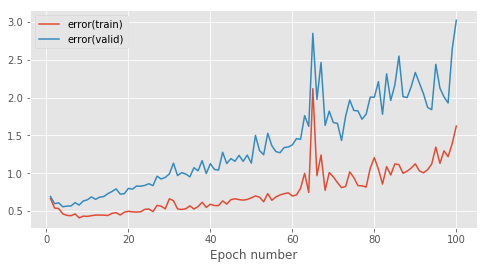

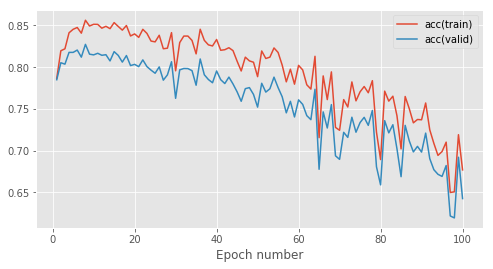

Epoch 1: 9.0s to complete
    error(train)=8.40e-01, acc(train)=7.40e-01, error(valid)=8.65e-01, acc(valid)=7.33e-01


Epoch 2: 7.5s to complete
    error(train)=6.12e-01, acc(train)=8.02e-01, error(valid)=6.54e-01, acc(valid)=7.89e-01


Epoch 3: 5.5s to complete
    error(train)=5.47e-01, acc(train)=8.20e-01, error(valid)=6.06e-01, acc(valid)=8.04e-01


Epoch 4: 5.1s to complete
    error(train)=5.07e-01, acc(train)=8.27e-01, error(valid)=5.80e-01, acc(valid)=8.11e-01


Epoch 5: 5.2s to complete
    error(train)=4.57e-01, acc(train)=8.44e-01, error(valid)=5.50e-01, acc(valid)=8.21e-01


Epoch 6: 8.0s to complete
    error(train)=4.20e-01, acc(train)=8.54e-01, error(valid)=5.28e-01, acc(valid)=8.26e-01


Epoch 7: 8.4s to complete
    error(train)=4.17e-01, acc(train)=8.56e-01, error(valid)=5.34e-01, acc(valid)=8.29e-01


Epoch 8: 6.0s to complete
    error(train)=4.11e-01, acc(train)=8.54e-01, error(valid)=5.49e-01, acc(valid)=8.23e-01


Epoch 9: 8.3s to complete
    error(train)=3.82e-01, acc(train)=8.65e-01, error(valid)=5.36e-01, acc(valid)=8.31e-01


Epoch 10: 6.5s to complete
    error(train)=3.62e-01, acc(train)=8.71e-01, error(valid)=5.30e-01, acc(valid)=8.33e-01


Epoch 11: 7.1s to complete
    error(train)=3.63e-01, acc(train)=8.71e-01, error(valid)=5.50e-01, acc(valid)=8.27e-01


Epoch 12: 6.0s to complete
    error(train)=3.45e-01, acc(train)=8.74e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


Epoch 13: 4.1s to complete
    error(train)=3.36e-01, acc(train)=8.80e-01, error(valid)=5.57e-01, acc(valid)=8.32e-01


Epoch 14: 7.4s to complete
    error(train)=3.23e-01, acc(train)=8.82e-01, error(valid)=5.51e-01, acc(valid)=8.30e-01


Epoch 15: 6.3s to complete
    error(train)=3.32e-01, acc(train)=8.78e-01, error(valid)=5.68e-01, acc(valid)=8.27e-01


Epoch 16: 7.2s to complete
    error(train)=3.18e-01, acc(train)=8.84e-01, error(valid)=5.87e-01, acc(valid)=8.35e-01


Epoch 17: 6.2s to complete
    error(train)=2.88e-01, acc(train)=8.94e-01, error(valid)=5.63e-01, acc(valid)=8.33e-01


Epoch 18: 4.8s to complete
    error(train)=2.96e-01, acc(train)=8.90e-01, error(valid)=5.79e-01, acc(valid)=8.31e-01


Epoch 19: 5.6s to complete
    error(train)=2.92e-01, acc(train)=8.93e-01, error(valid)=5.98e-01, acc(valid)=8.33e-01


Epoch 20: 6.7s to complete
    error(train)=2.78e-01, acc(train)=8.96e-01, error(valid)=5.95e-01, acc(valid)=8.29e-01


Epoch 21: 6.7s to complete
    error(train)=2.82e-01, acc(train)=8.94e-01, error(valid)=6.06e-01, acc(valid)=8.29e-01


Epoch 22: 10.4s to complete
    error(train)=2.94e-01, acc(train)=8.91e-01, error(valid)=6.58e-01, acc(valid)=8.28e-01


Epoch 23: 6.0s to complete
    error(train)=2.75e-01, acc(train)=8.97e-01, error(valid)=6.42e-01, acc(valid)=8.32e-01


Epoch 24: 6.4s to complete
    error(train)=2.74e-01, acc(train)=8.96e-01, error(valid)=6.38e-01, acc(valid)=8.29e-01


Epoch 25: 7.7s to complete
    error(train)=2.83e-01, acc(train)=8.94e-01, error(valid)=6.89e-01, acc(valid)=8.25e-01


Epoch 26: 9.0s to complete
    error(train)=2.68e-01, acc(train)=9.00e-01, error(valid)=6.63e-01, acc(valid)=8.23e-01


Epoch 27: 6.4s to complete
    error(train)=2.50e-01, acc(train)=9.05e-01, error(valid)=6.84e-01, acc(valid)=8.29e-01


Epoch 28: 4.6s to complete
    error(train)=2.76e-01, acc(train)=8.96e-01, error(valid)=7.14e-01, acc(valid)=8.22e-01


Epoch 29: 4.7s to complete
    error(train)=2.53e-01, acc(train)=9.05e-01, error(valid)=7.17e-01, acc(valid)=8.26e-01


Epoch 30: 8.4s to complete
    error(train)=2.50e-01, acc(train)=9.04e-01, error(valid)=7.36e-01, acc(valid)=8.24e-01


Epoch 31: 7.4s to complete
    error(train)=2.69e-01, acc(train)=9.02e-01, error(valid)=8.19e-01, acc(valid)=8.23e-01


Epoch 32: 5.6s to complete
    error(train)=2.53e-01, acc(train)=9.07e-01, error(valid)=7.67e-01, acc(valid)=8.28e-01


Epoch 33: 5.1s to complete
    error(train)=2.50e-01, acc(train)=9.06e-01, error(valid)=7.84e-01, acc(valid)=8.20e-01


Epoch 34: 3.8s to complete
    error(train)=2.76e-01, acc(train)=8.94e-01, error(valid)=7.49e-01, acc(valid)=8.10e-01


Epoch 35: 4.9s to complete
    error(train)=2.80e-01, acc(train)=8.94e-01, error(valid)=8.20e-01, acc(valid)=8.13e-01


Epoch 36: 7.1s to complete
    error(train)=2.69e-01, acc(train)=8.96e-01, error(valid)=8.10e-01, acc(valid)=8.11e-01


Epoch 37: 6.5s to complete
    error(train)=2.53e-01, acc(train)=9.03e-01, error(valid)=8.08e-01, acc(valid)=8.21e-01


Epoch 38: 4.8s to complete
    error(train)=2.37e-01, acc(train)=9.11e-01, error(valid)=8.66e-01, acc(valid)=8.26e-01


Epoch 39: 7.2s to complete
    error(train)=2.50e-01, acc(train)=9.05e-01, error(valid)=8.55e-01, acc(valid)=8.22e-01


Epoch 40: 6.5s to complete
    error(train)=2.76e-01, acc(train)=9.02e-01, error(valid)=9.59e-01, acc(valid)=8.23e-01


Epoch 41: 5.4s to complete
    error(train)=2.42e-01, acc(train)=9.07e-01, error(valid)=8.89e-01, acc(valid)=8.18e-01


Epoch 42: 5.1s to complete
    error(train)=2.67e-01, acc(train)=9.00e-01, error(valid)=8.94e-01, acc(valid)=8.13e-01


Epoch 43: 3.9s to complete
    error(train)=2.45e-01, acc(train)=9.08e-01, error(valid)=9.34e-01, acc(valid)=8.22e-01


Epoch 44: 4.8s to complete
    error(train)=2.37e-01, acc(train)=9.12e-01, error(valid)=9.57e-01, acc(valid)=8.21e-01


Epoch 45: 5.2s to complete
    error(train)=2.35e-01, acc(train)=9.13e-01, error(valid)=9.75e-01, acc(valid)=8.27e-01


Epoch 46: 7.5s to complete
    error(train)=2.37e-01, acc(train)=9.12e-01, error(valid)=9.45e-01, acc(valid)=8.20e-01


Epoch 47: 5.0s to complete
    error(train)=2.74e-01, acc(train)=9.04e-01, error(valid)=1.08e+00, acc(valid)=8.17e-01


Epoch 48: 4.9s to complete
    error(train)=2.57e-01, acc(train)=9.03e-01, error(valid)=9.41e-01, acc(valid)=8.16e-01


Epoch 49: 5.2s to complete
    error(train)=2.56e-01, acc(train)=9.03e-01, error(valid)=9.62e-01, acc(valid)=8.16e-01


Epoch 50: 8.6s to complete
    error(train)=2.47e-01, acc(train)=9.09e-01, error(valid)=1.07e+00, acc(valid)=8.18e-01


Epoch 51: 7.0s to complete
    error(train)=2.48e-01, acc(train)=9.11e-01, error(valid)=1.05e+00, acc(valid)=8.18e-01


Epoch 52: 7.5s to complete
    error(train)=2.45e-01, acc(train)=9.13e-01, error(valid)=1.10e+00, acc(valid)=8.23e-01


Epoch 53: 7.4s to complete
    error(train)=2.55e-01, acc(train)=9.04e-01, error(valid)=1.07e+00, acc(valid)=8.15e-01


Epoch 54: 7.8s to complete
    error(train)=2.64e-01, acc(train)=9.08e-01, error(valid)=1.20e+00, acc(valid)=8.16e-01


Epoch 55: 8.5s to complete
    error(train)=2.49e-01, acc(train)=9.09e-01, error(valid)=1.12e+00, acc(valid)=8.14e-01


Epoch 56: 5.7s to complete
    error(train)=2.49e-01, acc(train)=9.12e-01, error(valid)=1.20e+00, acc(valid)=8.18e-01


Epoch 57: 6.9s to complete
    error(train)=2.44e-01, acc(train)=9.11e-01, error(valid)=1.14e+00, acc(valid)=8.13e-01


Epoch 58: 5.3s to complete
    error(train)=2.72e-01, acc(train)=9.06e-01, error(valid)=1.26e+00, acc(valid)=8.13e-01


Epoch 59: 7.4s to complete
    error(train)=2.60e-01, acc(train)=9.08e-01, error(valid)=1.26e+00, acc(valid)=8.10e-01


Epoch 60: 4.2s to complete
    error(train)=2.66e-01, acc(train)=9.09e-01, error(valid)=1.29e+00, acc(valid)=8.14e-01


Epoch 61: 4.8s to complete
    error(train)=2.65e-01, acc(train)=9.04e-01, error(valid)=1.22e+00, acc(valid)=8.07e-01


Epoch 62: 6.6s to complete
    error(train)=2.45e-01, acc(train)=9.07e-01, error(valid)=1.15e+00, acc(valid)=8.12e-01


Epoch 63: 7.9s to complete
    error(train)=2.61e-01, acc(train)=9.09e-01, error(valid)=1.30e+00, acc(valid)=8.14e-01


Epoch 64: 8.3s to complete
    error(train)=2.52e-01, acc(train)=9.07e-01, error(valid)=1.20e+00, acc(valid)=8.08e-01


Epoch 65: 5.8s to complete
    error(train)=3.05e-01, acc(train)=8.96e-01, error(valid)=1.33e+00, acc(valid)=8.05e-01


Epoch 66: 6.7s to complete
    error(train)=2.51e-01, acc(train)=9.11e-01, error(valid)=1.27e+00, acc(valid)=8.11e-01


Epoch 67: 9.0s to complete
    error(train)=2.44e-01, acc(train)=9.14e-01, error(valid)=1.38e+00, acc(valid)=8.19e-01


Epoch 68: 6.3s to complete
    error(train)=2.58e-01, acc(train)=9.12e-01, error(valid)=1.45e+00, acc(valid)=8.18e-01


Epoch 69: 6.8s to complete
    error(train)=2.69e-01, acc(train)=9.10e-01, error(valid)=1.51e+00, acc(valid)=8.14e-01


Epoch 70: 7.7s to complete
    error(train)=2.59e-01, acc(train)=9.09e-01, error(valid)=1.40e+00, acc(valid)=8.16e-01


Epoch 71: 7.4s to complete
    error(train)=2.58e-01, acc(train)=9.17e-01, error(valid)=1.53e+00, acc(valid)=8.18e-01


Epoch 72: 6.7s to complete
    error(train)=2.52e-01, acc(train)=9.09e-01, error(valid)=1.35e+00, acc(valid)=8.09e-01


Epoch 73: 5.4s to complete
    error(train)=2.89e-01, acc(train)=8.97e-01, error(valid)=1.34e+00, acc(valid)=7.99e-01


Epoch 74: 5.1s to complete
    error(train)=2.98e-01, acc(train)=9.01e-01, error(valid)=1.43e+00, acc(valid)=8.07e-01


Epoch 75: 5.0s to complete
    error(train)=2.46e-01, acc(train)=9.07e-01, error(valid)=1.29e+00, acc(valid)=8.07e-01


Epoch 76: 7.7s to complete
    error(train)=2.60e-01, acc(train)=9.09e-01, error(valid)=1.43e+00, acc(valid)=8.14e-01


Epoch 77: 5.1s to complete
    error(train)=2.88e-01, acc(train)=9.07e-01, error(valid)=1.57e+00, acc(valid)=8.12e-01


Epoch 78: 5.5s to complete
    error(train)=2.92e-01, acc(train)=9.00e-01, error(valid)=1.39e+00, acc(valid)=8.08e-01


Epoch 79: 7.0s to complete
    error(train)=2.74e-01, acc(train)=9.02e-01, error(valid)=1.42e+00, acc(valid)=8.05e-01


Epoch 80: 7.1s to complete
    error(train)=2.71e-01, acc(train)=9.08e-01, error(valid)=1.49e+00, acc(valid)=8.07e-01


Epoch 81: 6.5s to complete
    error(train)=2.64e-01, acc(train)=9.12e-01, error(valid)=1.59e+00, acc(valid)=8.13e-01


Epoch 82: 6.3s to complete
    error(train)=2.74e-01, acc(train)=9.08e-01, error(valid)=1.49e+00, acc(valid)=8.08e-01


Epoch 83: 5.9s to complete
    error(train)=3.02e-01, acc(train)=8.97e-01, error(valid)=1.44e+00, acc(valid)=8.01e-01


Epoch 84: 5.5s to complete
    error(train)=2.47e-01, acc(train)=9.15e-01, error(valid)=1.57e+00, acc(valid)=8.11e-01


Epoch 85: 6.4s to complete
    error(train)=2.66e-01, acc(train)=9.09e-01, error(valid)=1.57e+00, acc(valid)=8.06e-01


Epoch 86: 5.6s to complete
    error(train)=3.14e-01, acc(train)=9.07e-01, error(valid)=1.80e+00, acc(valid)=8.08e-01


Epoch 87: 8.5s to complete
    error(train)=3.13e-01, acc(train)=9.00e-01, error(valid)=1.64e+00, acc(valid)=8.00e-01


Epoch 88: 8.3s to complete
    error(train)=2.71e-01, acc(train)=9.02e-01, error(valid)=1.49e+00, acc(valid)=7.99e-01


Epoch 89: 5.5s to complete
    error(train)=2.58e-01, acc(train)=9.09e-01, error(valid)=1.50e+00, acc(valid)=8.04e-01


Epoch 90: 6.6s to complete
    error(train)=2.80e-01, acc(train)=9.06e-01, error(valid)=1.66e+00, acc(valid)=8.04e-01


Epoch 91: 5.6s to complete
    error(train)=2.66e-01, acc(train)=9.06e-01, error(valid)=1.54e+00, acc(valid)=8.04e-01


Epoch 92: 5.0s to complete
    error(train)=3.06e-01, acc(train)=9.02e-01, error(valid)=1.67e+00, acc(valid)=8.02e-01


Epoch 93: 4.2s to complete
    error(train)=3.10e-01, acc(train)=9.07e-01, error(valid)=1.87e+00, acc(valid)=8.11e-01


Epoch 94: 6.0s to complete
    error(train)=2.79e-01, acc(train)=9.11e-01, error(valid)=1.84e+00, acc(valid)=8.06e-01


Epoch 95: 5.6s to complete
    error(train)=2.94e-01, acc(train)=9.07e-01, error(valid)=1.69e+00, acc(valid)=8.07e-01


Epoch 96: 4.6s to complete
    error(train)=2.94e-01, acc(train)=9.04e-01, error(valid)=1.68e+00, acc(valid)=8.02e-01


Epoch 97: 8.0s to complete
    error(train)=2.91e-01, acc(train)=9.06e-01, error(valid)=1.78e+00, acc(valid)=8.04e-01


Epoch 98: 7.6s to complete
    error(train)=2.61e-01, acc(train)=9.10e-01, error(valid)=1.70e+00, acc(valid)=8.05e-01


Epoch 99: 9.9s to complete
    error(train)=3.17e-01, acc(train)=9.07e-01, error(valid)=1.99e+00, acc(valid)=8.04e-01


Epoch 100: 7.5s to complete
    error(train)=2.86e-01, acc(train)=9.09e-01, error(valid)=1.84e+00, acc(valid)=8.05e-01


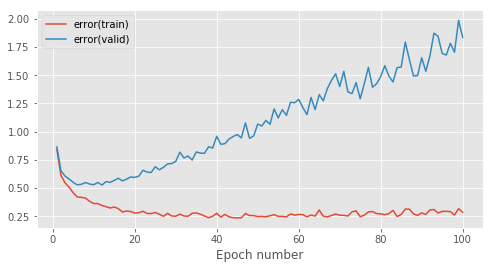

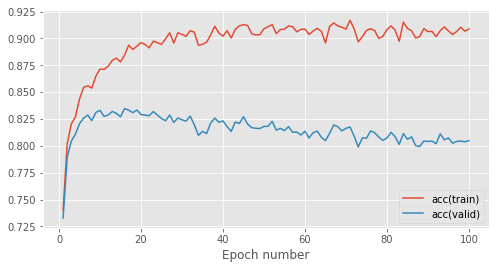

Epoch 1: 10.0s to complete
    error(train)=9.96e-01, acc(train)=7.11e-01, error(valid)=1.01e+00, acc(valid)=7.06e-01


Epoch 2: 9.6s to complete
    error(train)=7.50e-01, acc(train)=7.73e-01, error(valid)=7.74e-01, acc(valid)=7.68e-01


Epoch 3: 9.8s to complete
    error(train)=6.47e-01, acc(train)=7.99e-01, error(valid)=6.80e-01, acc(valid)=7.90e-01


Epoch 4: 12.7s to complete
    error(train)=5.91e-01, acc(train)=8.13e-01, error(valid)=6.34e-01, acc(valid)=7.98e-01


Epoch 5: 13.1s to complete
    error(train)=5.51e-01, acc(train)=8.19e-01, error(valid)=6.02e-01, acc(valid)=8.02e-01


Epoch 6: 11.8s to complete
    error(train)=5.21e-01, acc(train)=8.29e-01, error(valid)=5.78e-01, acc(valid)=8.13e-01


Epoch 7: 11.0s to complete
    error(train)=4.93e-01, acc(train)=8.37e-01, error(valid)=5.65e-01, acc(valid)=8.16e-01


Epoch 8: 12.4s to complete
    error(train)=4.70e-01, acc(train)=8.43e-01, error(valid)=5.51e-01, acc(valid)=8.21e-01


Epoch 9: 10.2s to complete
    error(train)=4.38e-01, acc(train)=8.54e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01


Epoch 10: 11.7s to complete
    error(train)=4.29e-01, acc(train)=8.53e-01, error(valid)=5.26e-01, acc(valid)=8.24e-01


Epoch 11: 10.7s to complete
    error(train)=4.02e-01, acc(train)=8.64e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


Epoch 12: 10.7s to complete
    error(train)=4.02e-01, acc(train)=8.63e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


Epoch 13: 8.1s to complete
    error(train)=3.93e-01, acc(train)=8.63e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


Epoch 14: 9.7s to complete
    error(train)=3.83e-01, acc(train)=8.66e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 15: 8.4s to complete
    error(train)=3.56e-01, acc(train)=8.77e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


Epoch 16: 9.6s to complete
    error(train)=3.55e-01, acc(train)=8.76e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


Epoch 17: 11.2s to complete
    error(train)=3.42e-01, acc(train)=8.81e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 18: 10.7s to complete
    error(train)=3.32e-01, acc(train)=8.84e-01, error(valid)=5.10e-01, acc(valid)=8.39e-01


Epoch 19: 10.8s to complete
    error(train)=3.32e-01, acc(train)=8.83e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


Epoch 20: 12.5s to complete
    error(train)=3.20e-01, acc(train)=8.85e-01, error(valid)=5.26e-01, acc(valid)=8.36e-01


Epoch 21: 14.6s to complete
    error(train)=3.19e-01, acc(train)=8.84e-01, error(valid)=5.33e-01, acc(valid)=8.32e-01


Epoch 22: 11.5s to complete
    error(train)=3.13e-01, acc(train)=8.88e-01, error(valid)=5.39e-01, acc(valid)=8.32e-01


Epoch 23: 11.5s to complete
    error(train)=3.00e-01, acc(train)=8.91e-01, error(valid)=5.32e-01, acc(valid)=8.37e-01


Epoch 24: 10.5s to complete
    error(train)=2.95e-01, acc(train)=8.95e-01, error(valid)=5.37e-01, acc(valid)=8.35e-01


Epoch 25: 10.0s to complete
    error(train)=2.96e-01, acc(train)=8.93e-01, error(valid)=5.49e-01, acc(valid)=8.33e-01


Epoch 26: 10.5s to complete
    error(train)=3.02e-01, acc(train)=8.89e-01, error(valid)=5.64e-01, acc(valid)=8.30e-01


Epoch 27: 8.7s to complete
    error(train)=2.85e-01, acc(train)=8.96e-01, error(valid)=5.50e-01, acc(valid)=8.34e-01


Epoch 28: 7.7s to complete
    error(train)=2.74e-01, acc(train)=9.00e-01, error(valid)=5.58e-01, acc(valid)=8.35e-01


Epoch 29: 12.4s to complete
    error(train)=2.72e-01, acc(train)=9.01e-01, error(valid)=5.58e-01, acc(valid)=8.35e-01


Epoch 30: 11.6s to complete
    error(train)=2.72e-01, acc(train)=9.01e-01, error(valid)=5.73e-01, acc(valid)=8.35e-01


Epoch 31: 7.4s to complete
    error(train)=2.67e-01, acc(train)=9.02e-01, error(valid)=5.72e-01, acc(valid)=8.32e-01


Epoch 32: 9.4s to complete
    error(train)=2.73e-01, acc(train)=8.98e-01, error(valid)=5.90e-01, acc(valid)=8.30e-01


Epoch 33: 10.5s to complete
    error(train)=2.63e-01, acc(train)=9.01e-01, error(valid)=5.99e-01, acc(valid)=8.31e-01


Epoch 34: 13.2s to complete
    error(train)=2.59e-01, acc(train)=9.03e-01, error(valid)=5.97e-01, acc(valid)=8.29e-01


Epoch 35: 9.7s to complete
    error(train)=2.58e-01, acc(train)=9.03e-01, error(valid)=6.20e-01, acc(valid)=8.29e-01


Epoch 36: 10.7s to complete
    error(train)=2.52e-01, acc(train)=9.04e-01, error(valid)=6.29e-01, acc(valid)=8.28e-01


Epoch 37: 10.1s to complete
    error(train)=2.37e-01, acc(train)=9.12e-01, error(valid)=6.22e-01, acc(valid)=8.30e-01


Epoch 38: 13.4s to complete
    error(train)=2.45e-01, acc(train)=9.08e-01, error(valid)=6.36e-01, acc(valid)=8.30e-01


Epoch 39: 7.7s to complete
    error(train)=2.37e-01, acc(train)=9.10e-01, error(valid)=6.23e-01, acc(valid)=8.25e-01


Epoch 40: 10.4s to complete
    error(train)=2.29e-01, acc(train)=9.14e-01, error(valid)=6.51e-01, acc(valid)=8.31e-01


Epoch 41: 6.6s to complete
    error(train)=2.33e-01, acc(train)=9.12e-01, error(valid)=6.36e-01, acc(valid)=8.28e-01


Epoch 42: 11.5s to complete
    error(train)=2.36e-01, acc(train)=9.12e-01, error(valid)=6.48e-01, acc(valid)=8.28e-01


Epoch 43: 11.3s to complete
    error(train)=2.22e-01, acc(train)=9.15e-01, error(valid)=6.66e-01, acc(valid)=8.29e-01


Epoch 44: 10.3s to complete
    error(train)=2.30e-01, acc(train)=9.13e-01, error(valid)=6.68e-01, acc(valid)=8.24e-01


Epoch 45: 11.8s to complete
    error(train)=2.15e-01, acc(train)=9.18e-01, error(valid)=6.79e-01, acc(valid)=8.28e-01


Epoch 46: 10.0s to complete
    error(train)=2.14e-01, acc(train)=9.19e-01, error(valid)=6.78e-01, acc(valid)=8.27e-01


Epoch 47: 12.2s to complete
    error(train)=2.36e-01, acc(train)=9.10e-01, error(valid)=7.09e-01, acc(valid)=8.26e-01


Epoch 48: 11.4s to complete
    error(train)=2.11e-01, acc(train)=9.19e-01, error(valid)=6.92e-01, acc(valid)=8.25e-01


Epoch 49: 11.3s to complete
    error(train)=2.14e-01, acc(train)=9.18e-01, error(valid)=7.38e-01, acc(valid)=8.27e-01


Epoch 50: 9.9s to complete
    error(train)=2.03e-01, acc(train)=9.23e-01, error(valid)=7.30e-01, acc(valid)=8.28e-01


Epoch 51: 8.3s to complete
    error(train)=2.11e-01, acc(train)=9.19e-01, error(valid)=7.44e-01, acc(valid)=8.25e-01


Epoch 52: 6.9s to complete
    error(train)=1.98e-01, acc(train)=9.24e-01, error(valid)=7.31e-01, acc(valid)=8.25e-01


Epoch 53: 11.9s to complete
    error(train)=2.05e-01, acc(train)=9.21e-01, error(valid)=7.72e-01, acc(valid)=8.25e-01


Epoch 54: 8.8s to complete
    error(train)=1.90e-01, acc(train)=9.28e-01, error(valid)=7.58e-01, acc(valid)=8.23e-01


Epoch 55: 10.6s to complete
    error(train)=2.07e-01, acc(train)=9.19e-01, error(valid)=7.91e-01, acc(valid)=8.22e-01


Epoch 56: 9.3s to complete
    error(train)=1.94e-01, acc(train)=9.25e-01, error(valid)=8.04e-01, acc(valid)=8.20e-01


Epoch 57: 9.7s to complete
    error(train)=1.94e-01, acc(train)=9.25e-01, error(valid)=8.15e-01, acc(valid)=8.25e-01


Epoch 58: 11.5s to complete
    error(train)=1.92e-01, acc(train)=9.26e-01, error(valid)=8.08e-01, acc(valid)=8.16e-01


Epoch 59: 8.9s to complete
    error(train)=2.05e-01, acc(train)=9.20e-01, error(valid)=8.24e-01, acc(valid)=8.18e-01


Epoch 60: 10.3s to complete
    error(train)=1.93e-01, acc(train)=9.25e-01, error(valid)=8.54e-01, acc(valid)=8.19e-01


Epoch 61: 10.2s to complete
    error(train)=1.89e-01, acc(train)=9.26e-01, error(valid)=8.55e-01, acc(valid)=8.18e-01


Epoch 62: 8.6s to complete
    error(train)=1.93e-01, acc(train)=9.25e-01, error(valid)=8.66e-01, acc(valid)=8.21e-01


Epoch 63: 10.3s to complete
    error(train)=1.81e-01, acc(train)=9.30e-01, error(valid)=8.59e-01, acc(valid)=8.18e-01


Epoch 64: 9.3s to complete
    error(train)=1.88e-01, acc(train)=9.26e-01, error(valid)=9.02e-01, acc(valid)=8.22e-01


Epoch 65: 8.6s to complete
    error(train)=1.77e-01, acc(train)=9.32e-01, error(valid)=9.00e-01, acc(valid)=8.21e-01


Epoch 66: 12.5s to complete
    error(train)=1.77e-01, acc(train)=9.32e-01, error(valid)=8.92e-01, acc(valid)=8.22e-01


Epoch 67: 10.0s to complete
    error(train)=1.89e-01, acc(train)=9.26e-01, error(valid)=8.90e-01, acc(valid)=8.13e-01


Epoch 68: 8.8s to complete
    error(train)=1.76e-01, acc(train)=9.31e-01, error(valid)=9.16e-01, acc(valid)=8.16e-01


Epoch 69: 9.5s to complete
    error(train)=1.71e-01, acc(train)=9.33e-01, error(valid)=9.17e-01, acc(valid)=8.18e-01


Epoch 70: 9.8s to complete
    error(train)=1.68e-01, acc(train)=9.34e-01, error(valid)=9.01e-01, acc(valid)=8.19e-01


Epoch 71: 11.2s to complete
    error(train)=1.73e-01, acc(train)=9.32e-01, error(valid)=9.36e-01, acc(valid)=8.15e-01


Epoch 72: 5.9s to complete
    error(train)=1.64e-01, acc(train)=9.35e-01, error(valid)=9.53e-01, acc(valid)=8.20e-01


Epoch 73: 11.4s to complete
    error(train)=1.69e-01, acc(train)=9.33e-01, error(valid)=9.60e-01, acc(valid)=8.14e-01


Epoch 74: 13.9s to complete
    error(train)=1.58e-01, acc(train)=9.38e-01, error(valid)=9.93e-01, acc(valid)=8.18e-01


Epoch 75: 11.3s to complete
    error(train)=1.63e-01, acc(train)=9.36e-01, error(valid)=9.99e-01, acc(valid)=8.17e-01


Epoch 76: 11.3s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=1.01e+00, acc(valid)=8.15e-01


Epoch 77: 10.5s to complete
    error(train)=1.85e-01, acc(train)=9.27e-01, error(valid)=1.04e+00, acc(valid)=8.12e-01


Epoch 78: 9.9s to complete
    error(train)=1.54e-01, acc(train)=9.40e-01, error(valid)=1.02e+00, acc(valid)=8.18e-01


Epoch 79: 11.3s to complete
    error(train)=1.67e-01, acc(train)=9.35e-01, error(valid)=1.05e+00, acc(valid)=8.19e-01


Epoch 80: 11.2s to complete
    error(train)=1.49e-01, acc(train)=9.42e-01, error(valid)=1.03e+00, acc(valid)=8.16e-01


Epoch 81: 9.3s to complete
    error(train)=1.68e-01, acc(train)=9.34e-01, error(valid)=1.10e+00, acc(valid)=8.16e-01


Epoch 82: 11.9s to complete
    error(train)=1.51e-01, acc(train)=9.41e-01, error(valid)=1.09e+00, acc(valid)=8.17e-01


Epoch 83: 10.9s to complete
    error(train)=1.60e-01, acc(train)=9.37e-01, error(valid)=1.09e+00, acc(valid)=8.15e-01


Epoch 84: 10.5s to complete
    error(train)=1.68e-01, acc(train)=9.34e-01, error(valid)=1.10e+00, acc(valid)=8.11e-01


Epoch 85: 8.8s to complete
    error(train)=1.47e-01, acc(train)=9.42e-01, error(valid)=1.10e+00, acc(valid)=8.16e-01


Epoch 86: 10.8s to complete
    error(train)=1.46e-01, acc(train)=9.43e-01, error(valid)=1.13e+00, acc(valid)=8.18e-01


Epoch 87: 6.8s to complete
    error(train)=1.46e-01, acc(train)=9.42e-01, error(valid)=1.10e+00, acc(valid)=8.16e-01


Epoch 88: 8.8s to complete
    error(train)=1.58e-01, acc(train)=9.39e-01, error(valid)=1.14e+00, acc(valid)=8.09e-01


Epoch 89: 12.4s to complete
    error(train)=1.41e-01, acc(train)=9.44e-01, error(valid)=1.14e+00, acc(valid)=8.12e-01


Epoch 90: 11.3s to complete
    error(train)=1.52e-01, acc(train)=9.40e-01, error(valid)=1.19e+00, acc(valid)=8.14e-01


Epoch 91: 10.0s to complete
    error(train)=1.42e-01, acc(train)=9.44e-01, error(valid)=1.14e+00, acc(valid)=8.17e-01


Epoch 92: 10.2s to complete
    error(train)=1.35e-01, acc(train)=9.48e-01, error(valid)=1.20e+00, acc(valid)=8.16e-01


Epoch 93: 9.7s to complete
    error(train)=1.55e-01, acc(train)=9.39e-01, error(valid)=1.18e+00, acc(valid)=8.13e-01


Epoch 94: 9.8s to complete
    error(train)=1.50e-01, acc(train)=9.42e-01, error(valid)=1.21e+00, acc(valid)=8.12e-01


Epoch 95: 8.6s to complete
    error(train)=1.37e-01, acc(train)=9.46e-01, error(valid)=1.21e+00, acc(valid)=8.12e-01


Epoch 96: 9.3s to complete
    error(train)=1.54e-01, acc(train)=9.40e-01, error(valid)=1.24e+00, acc(valid)=8.13e-01


Epoch 97: 10.1s to complete
    error(train)=1.59e-01, acc(train)=9.37e-01, error(valid)=1.25e+00, acc(valid)=8.04e-01


Epoch 98: 12.2s to complete
    error(train)=1.38e-01, acc(train)=9.46e-01, error(valid)=1.29e+00, acc(valid)=8.12e-01


Epoch 99: 12.9s to complete
    error(train)=1.49e-01, acc(train)=9.42e-01, error(valid)=1.27e+00, acc(valid)=8.11e-01


Epoch 100: 9.8s to complete
    error(train)=1.30e-01, acc(train)=9.49e-01, error(valid)=1.27e+00, acc(valid)=8.16e-01


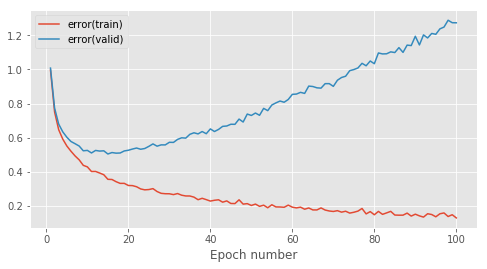

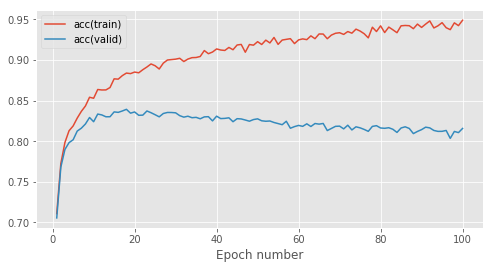

Epoch 1: 10.1s to complete
    error(train)=1.22e+00, acc(train)=6.53e-01, error(valid)=1.23e+00, acc(valid)=6.48e-01


Epoch 2: 9.6s to complete
    error(train)=9.69e-01, acc(train)=7.18e-01, error(valid)=9.88e-01, acc(valid)=7.12e-01


Epoch 3: 11.0s to complete
    error(train)=8.29e-01, acc(train)=7.54e-01, error(valid)=8.51e-01, acc(valid)=7.46e-01


Epoch 4: 8.4s to complete
    error(train)=7.43e-01, acc(train)=7.74e-01, error(valid)=7.74e-01, acc(valid)=7.65e-01


Epoch 5: 11.4s to complete
    error(train)=6.72e-01, acc(train)=7.94e-01, error(valid)=7.05e-01, acc(valid)=7.86e-01


Epoch 6: 10.1s to complete
    error(train)=6.39e-01, acc(train)=8.02e-01, error(valid)=6.85e-01, acc(valid)=7.91e-01


Epoch 7: 8.6s to complete
    error(train)=6.11e-01, acc(train)=8.07e-01, error(valid)=6.54e-01, acc(valid)=7.94e-01


Epoch 8: 7.6s to complete
    error(train)=5.72e-01, acc(train)=8.20e-01, error(valid)=6.24e-01, acc(valid)=8.07e-01


Epoch 9: 9.3s to complete
    error(train)=5.50e-01, acc(train)=8.25e-01, error(valid)=6.09e-01, acc(valid)=8.07e-01


Epoch 10: 8.7s to complete
    error(train)=5.27e-01, acc(train)=8.31e-01, error(valid)=5.91e-01, acc(valid)=8.14e-01


Epoch 11: 10.8s to complete
    error(train)=5.18e-01, acc(train)=8.33e-01, error(valid)=5.82e-01, acc(valid)=8.14e-01


Epoch 12: 10.9s to complete
    error(train)=4.93e-01, acc(train)=8.40e-01, error(valid)=5.65e-01, acc(valid)=8.20e-01


Epoch 13: 11.0s to complete
    error(train)=4.80e-01, acc(train)=8.46e-01, error(valid)=5.61e-01, acc(valid)=8.22e-01


Epoch 14: 10.8s to complete
    error(train)=4.66e-01, acc(train)=8.49e-01, error(valid)=5.51e-01, acc(valid)=8.26e-01


Epoch 15: 8.8s to complete
    error(train)=4.56e-01, acc(train)=8.52e-01, error(valid)=5.46e-01, acc(valid)=8.25e-01


Epoch 16: 9.4s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=5.38e-01, acc(valid)=8.29e-01


Epoch 17: 11.9s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 18: 8.2s to complete
    error(train)=4.28e-01, acc(train)=8.59e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


Epoch 19: 9.6s to complete
    error(train)=4.25e-01, acc(train)=8.58e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


Epoch 20: 9.7s to complete
    error(train)=4.13e-01, acc(train)=8.62e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01


Epoch 21: 9.7s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.28e-01, acc(valid)=8.30e-01


Epoch 22: 12.2s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 23: 9.7s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


Epoch 24: 13.0s to complete
    error(train)=3.84e-01, acc(train)=8.72e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


Epoch 25: 10.9s to complete
    error(train)=3.79e-01, acc(train)=8.73e-01, error(valid)=5.21e-01, acc(valid)=8.35e-01


Epoch 26: 9.7s to complete
    error(train)=3.72e-01, acc(train)=8.75e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


Epoch 27: 11.1s to complete
    error(train)=3.70e-01, acc(train)=8.75e-01, error(valid)=5.25e-01, acc(valid)=8.38e-01


Epoch 28: 11.8s to complete
    error(train)=3.66e-01, acc(train)=8.74e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


Epoch 29: 9.9s to complete
    error(train)=3.63e-01, acc(train)=8.75e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


Epoch 30: 10.7s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


Epoch 31: 11.7s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


Epoch 32: 9.1s to complete
    error(train)=3.40e-01, acc(train)=8.85e-01, error(valid)=5.21e-01, acc(valid)=8.35e-01


Epoch 33: 12.2s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01


Epoch 34: 11.3s to complete
    error(train)=3.31e-01, acc(train)=8.86e-01, error(valid)=5.23e-01, acc(valid)=8.37e-01


Epoch 35: 10.1s to complete
    error(train)=3.33e-01, acc(train)=8.85e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 36: 9.4s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=5.36e-01, acc(valid)=8.32e-01


Epoch 37: 11.0s to complete
    error(train)=3.22e-01, acc(train)=8.87e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


Epoch 38: 11.9s to complete
    error(train)=3.27e-01, acc(train)=8.86e-01, error(valid)=5.36e-01, acc(valid)=8.34e-01


Epoch 39: 14.0s to complete
    error(train)=3.23e-01, acc(train)=8.87e-01, error(valid)=5.35e-01, acc(valid)=8.33e-01


Epoch 40: 8.8s to complete
    error(train)=3.18e-01, acc(train)=8.89e-01, error(valid)=5.35e-01, acc(valid)=8.36e-01


Epoch 41: 9.1s to complete
    error(train)=3.12e-01, acc(train)=8.91e-01, error(valid)=5.38e-01, acc(valid)=8.33e-01


Epoch 42: 12.7s to complete
    error(train)=3.03e-01, acc(train)=8.94e-01, error(valid)=5.34e-01, acc(valid)=8.37e-01


Epoch 43: 11.6s to complete
    error(train)=3.03e-01, acc(train)=8.94e-01, error(valid)=5.42e-01, acc(valid)=8.36e-01


Epoch 44: 9.8s to complete
    error(train)=2.94e-01, acc(train)=8.98e-01, error(valid)=5.35e-01, acc(valid)=8.37e-01


Epoch 45: 10.2s to complete
    error(train)=3.00e-01, acc(train)=8.94e-01, error(valid)=5.42e-01, acc(valid)=8.34e-01


Epoch 46: 10.5s to complete
    error(train)=2.87e-01, acc(train)=8.99e-01, error(valid)=5.36e-01, acc(valid)=8.37e-01


Epoch 47: 11.0s to complete
    error(train)=2.90e-01, acc(train)=8.97e-01, error(valid)=5.46e-01, acc(valid)=8.35e-01


Epoch 48: 8.6s to complete
    error(train)=2.85e-01, acc(train)=8.99e-01, error(valid)=5.40e-01, acc(valid)=8.35e-01


Epoch 49: 9.6s to complete
    error(train)=2.85e-01, acc(train)=9.00e-01, error(valid)=5.53e-01, acc(valid)=8.34e-01


Epoch 50: 9.3s to complete
    error(train)=2.78e-01, acc(train)=9.02e-01, error(valid)=5.52e-01, acc(valid)=8.34e-01


Epoch 51: 11.5s to complete
    error(train)=2.73e-01, acc(train)=9.03e-01, error(valid)=5.54e-01, acc(valid)=8.36e-01


Epoch 52: 10.5s to complete
    error(train)=2.75e-01, acc(train)=9.03e-01, error(valid)=5.54e-01, acc(valid)=8.36e-01


Epoch 53: 10.7s to complete
    error(train)=2.65e-01, acc(train)=9.08e-01, error(valid)=5.55e-01, acc(valid)=8.35e-01


Epoch 54: 10.6s to complete
    error(train)=2.69e-01, acc(train)=9.05e-01, error(valid)=5.66e-01, acc(valid)=8.33e-01


Epoch 55: 8.9s to complete
    error(train)=2.75e-01, acc(train)=9.01e-01, error(valid)=5.84e-01, acc(valid)=8.32e-01


Epoch 56: 10.0s to complete
    error(train)=2.63e-01, acc(train)=9.07e-01, error(valid)=5.68e-01, acc(valid)=8.34e-01


Epoch 57: 8.2s to complete
    error(train)=2.66e-01, acc(train)=9.04e-01, error(valid)=5.75e-01, acc(valid)=8.31e-01


Epoch 58: 7.6s to complete
    error(train)=2.63e-01, acc(train)=9.06e-01, error(valid)=5.83e-01, acc(valid)=8.31e-01


Epoch 59: 7.3s to complete
    error(train)=2.63e-01, acc(train)=9.06e-01, error(valid)=5.81e-01, acc(valid)=8.32e-01


Epoch 60: 6.5s to complete
    error(train)=2.51e-01, acc(train)=9.10e-01, error(valid)=5.74e-01, acc(valid)=8.36e-01


Epoch 61: 8.5s to complete
    error(train)=2.51e-01, acc(train)=9.10e-01, error(valid)=5.88e-01, acc(valid)=8.33e-01


Epoch 62: 6.8s to complete
    error(train)=2.48e-01, acc(train)=9.11e-01, error(valid)=5.85e-01, acc(valid)=8.32e-01


Epoch 63: 5.3s to complete
    error(train)=2.46e-01, acc(train)=9.11e-01, error(valid)=5.95e-01, acc(valid)=8.31e-01


Epoch 64: 6.9s to complete
    error(train)=2.47e-01, acc(train)=9.10e-01, error(valid)=6.01e-01, acc(valid)=8.30e-01


Epoch 65: 5.7s to complete
    error(train)=2.40e-01, acc(train)=9.14e-01, error(valid)=5.98e-01, acc(valid)=8.33e-01


Epoch 66: 7.6s to complete
    error(train)=2.49e-01, acc(train)=9.10e-01, error(valid)=6.18e-01, acc(valid)=8.33e-01


Epoch 67: 7.1s to complete
    error(train)=2.44e-01, acc(train)=9.11e-01, error(valid)=6.18e-01, acc(valid)=8.30e-01


Epoch 68: 5.4s to complete
    error(train)=2.34e-01, acc(train)=9.16e-01, error(valid)=6.15e-01, acc(valid)=8.31e-01


Epoch 69: 7.0s to complete
    error(train)=2.34e-01, acc(train)=9.15e-01, error(valid)=6.15e-01, acc(valid)=8.32e-01


Epoch 70: 9.5s to complete
    error(train)=2.42e-01, acc(train)=9.11e-01, error(valid)=6.25e-01, acc(valid)=8.27e-01


Epoch 71: 8.6s to complete
    error(train)=2.35e-01, acc(train)=9.15e-01, error(valid)=6.32e-01, acc(valid)=8.30e-01


Epoch 72: 6.7s to complete
    error(train)=2.29e-01, acc(train)=9.17e-01, error(valid)=6.33e-01, acc(valid)=8.27e-01


Epoch 73: 5.5s to complete
    error(train)=2.32e-01, acc(train)=9.15e-01, error(valid)=6.43e-01, acc(valid)=8.25e-01


Epoch 74: 7.3s to complete
    error(train)=2.25e-01, acc(train)=9.18e-01, error(valid)=6.36e-01, acc(valid)=8.29e-01


Epoch 75: 6.2s to complete
    error(train)=2.24e-01, acc(train)=9.19e-01, error(valid)=6.47e-01, acc(valid)=8.32e-01


Epoch 76: 8.3s to complete
    error(train)=2.24e-01, acc(train)=9.18e-01, error(valid)=6.51e-01, acc(valid)=8.28e-01


Epoch 77: 7.2s to complete
    error(train)=2.21e-01, acc(train)=9.19e-01, error(valid)=6.52e-01, acc(valid)=8.27e-01


Epoch 78: 6.5s to complete
    error(train)=2.18e-01, acc(train)=9.20e-01, error(valid)=6.55e-01, acc(valid)=8.28e-01


Epoch 79: 6.7s to complete
    error(train)=2.18e-01, acc(train)=9.20e-01, error(valid)=6.64e-01, acc(valid)=8.27e-01


Epoch 80: 6.5s to complete
    error(train)=2.13e-01, acc(train)=9.22e-01, error(valid)=6.64e-01, acc(valid)=8.29e-01


Epoch 81: 6.5s to complete
    error(train)=2.18e-01, acc(train)=9.20e-01, error(valid)=6.70e-01, acc(valid)=8.23e-01


Epoch 82: 5.0s to complete
    error(train)=2.13e-01, acc(train)=9.23e-01, error(valid)=6.82e-01, acc(valid)=8.25e-01


Epoch 83: 6.8s to complete
    error(train)=2.13e-01, acc(train)=9.21e-01, error(valid)=6.83e-01, acc(valid)=8.25e-01


Epoch 84: 7.6s to complete
    error(train)=2.13e-01, acc(train)=9.20e-01, error(valid)=6.97e-01, acc(valid)=8.23e-01


Epoch 85: 6.7s to complete
    error(train)=2.08e-01, acc(train)=9.22e-01, error(valid)=6.90e-01, acc(valid)=8.27e-01


Epoch 86: 8.0s to complete
    error(train)=2.13e-01, acc(train)=9.20e-01, error(valid)=7.09e-01, acc(valid)=8.23e-01


Epoch 87: 5.7s to complete
    error(train)=2.02e-01, acc(train)=9.26e-01, error(valid)=6.92e-01, acc(valid)=8.28e-01


Epoch 88: 4.5s to complete
    error(train)=2.12e-01, acc(train)=9.22e-01, error(valid)=7.18e-01, acc(valid)=8.22e-01


Epoch 89: 6.0s to complete
    error(train)=1.95e-01, acc(train)=9.29e-01, error(valid)=7.15e-01, acc(valid)=8.24e-01


Epoch 90: 6.6s to complete
    error(train)=1.97e-01, acc(train)=9.28e-01, error(valid)=7.15e-01, acc(valid)=8.25e-01


Epoch 91: 5.6s to complete
    error(train)=1.97e-01, acc(train)=9.27e-01, error(valid)=7.28e-01, acc(valid)=8.23e-01


Epoch 92: 6.6s to complete
    error(train)=1.94e-01, acc(train)=9.29e-01, error(valid)=7.29e-01, acc(valid)=8.23e-01


Epoch 93: 5.3s to complete
    error(train)=1.94e-01, acc(train)=9.28e-01, error(valid)=7.32e-01, acc(valid)=8.21e-01


Epoch 94: 7.3s to complete
    error(train)=1.96e-01, acc(train)=9.27e-01, error(valid)=7.34e-01, acc(valid)=8.19e-01


Epoch 95: 6.2s to complete
    error(train)=1.88e-01, acc(train)=9.32e-01, error(valid)=7.39e-01, acc(valid)=8.22e-01


Epoch 96: 5.1s to complete
    error(train)=1.91e-01, acc(train)=9.30e-01, error(valid)=7.51e-01, acc(valid)=8.23e-01


Epoch 97: 5.6s to complete
    error(train)=1.91e-01, acc(train)=9.28e-01, error(valid)=7.48e-01, acc(valid)=8.19e-01


Epoch 98: 9.5s to complete
    error(train)=1.93e-01, acc(train)=9.27e-01, error(valid)=7.57e-01, acc(valid)=8.20e-01


Epoch 99: 4.4s to complete
    error(train)=1.89e-01, acc(train)=9.29e-01, error(valid)=7.79e-01, acc(valid)=8.19e-01


Epoch 100: 5.8s to complete
    error(train)=1.93e-01, acc(train)=9.28e-01, error(valid)=7.79e-01, acc(valid)=8.22e-01


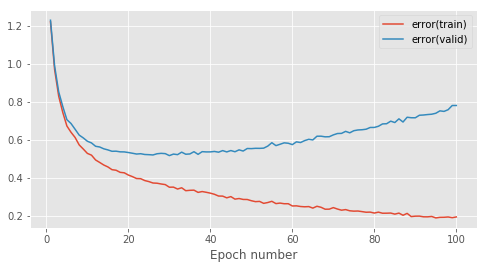

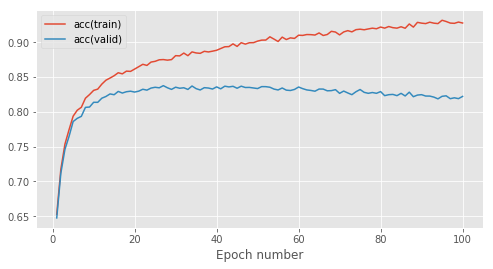

Epoch 1: 8.0s to complete
    error(train)=1.65e+00, acc(train)=5.57e-01, error(valid)=1.65e+00, acc(valid)=5.59e-01


Epoch 2: 4.9s to complete
    error(train)=1.28e+00, acc(train)=6.40e-01, error(valid)=1.29e+00, acc(valid)=6.41e-01


Epoch 3: 4.7s to complete
    error(train)=1.13e+00, acc(train)=6.78e-01, error(valid)=1.13e+00, acc(valid)=6.79e-01


Epoch 4: 5.2s to complete
    error(train)=1.03e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.04e-01


Epoch 5: 7.3s to complete
    error(train)=9.58e-01, acc(train)=7.24e-01, error(valid)=9.70e-01, acc(valid)=7.23e-01


Epoch 6: 6.6s to complete
    error(train)=8.99e-01, acc(train)=7.38e-01, error(valid)=9.13e-01, acc(valid)=7.33e-01


Epoch 7: 7.5s to complete
    error(train)=8.49e-01, acc(train)=7.52e-01, error(valid)=8.68e-01, acc(valid)=7.46e-01


Epoch 8: 6.2s to complete
    error(train)=8.13e-01, acc(train)=7.60e-01, error(valid)=8.34e-01, acc(valid)=7.52e-01


Epoch 9: 7.9s to complete
    error(train)=7.76e-01, acc(train)=7.70e-01, error(valid)=7.98e-01, acc(valid)=7.62e-01


Epoch 10: 6.4s to complete
    error(train)=7.43e-01, acc(train)=7.79e-01, error(valid)=7.68e-01, acc(valid)=7.70e-01


Epoch 11: 7.2s to complete
    error(train)=7.27e-01, acc(train)=7.82e-01, error(valid)=7.53e-01, acc(valid)=7.73e-01


Epoch 12: 8.5s to complete
    error(train)=7.08e-01, acc(train)=7.85e-01, error(valid)=7.36e-01, acc(valid)=7.76e-01


Epoch 13: 4.0s to complete
    error(train)=6.80e-01, acc(train)=7.94e-01, error(valid)=7.10e-01, acc(valid)=7.87e-01


Epoch 14: 4.0s to complete
    error(train)=6.66e-01, acc(train)=7.98e-01, error(valid)=6.98e-01, acc(valid)=7.88e-01


Epoch 15: 6.0s to complete
    error(train)=6.57e-01, acc(train)=7.99e-01, error(valid)=6.91e-01, acc(valid)=7.89e-01


Epoch 16: 7.7s to complete
    error(train)=6.34e-01, acc(train)=8.06e-01, error(valid)=6.69e-01, acc(valid)=7.95e-01


Epoch 17: 5.5s to complete
    error(train)=6.22e-01, acc(train)=8.09e-01, error(valid)=6.59e-01, acc(valid)=7.99e-01


Epoch 18: 5.2s to complete
    error(train)=6.14e-01, acc(train)=8.12e-01, error(valid)=6.51e-01, acc(valid)=7.98e-01


Epoch 19: 5.2s to complete
    error(train)=5.99e-01, acc(train)=8.15e-01, error(valid)=6.41e-01, acc(valid)=8.04e-01


Epoch 20: 6.9s to complete
    error(train)=5.88e-01, acc(train)=8.19e-01, error(valid)=6.31e-01, acc(valid)=8.05e-01


Epoch 21: 8.1s to complete
    error(train)=5.77e-01, acc(train)=8.21e-01, error(valid)=6.24e-01, acc(valid)=8.07e-01


Epoch 22: 7.4s to complete
    error(train)=5.67e-01, acc(train)=8.24e-01, error(valid)=6.15e-01, acc(valid)=8.07e-01


Epoch 23: 8.3s to complete
    error(train)=5.61e-01, acc(train)=8.26e-01, error(valid)=6.12e-01, acc(valid)=8.10e-01


Epoch 24: 6.2s to complete
    error(train)=5.52e-01, acc(train)=8.28e-01, error(valid)=6.04e-01, acc(valid)=8.13e-01


Epoch 25: 6.6s to complete
    error(train)=5.46e-01, acc(train)=8.29e-01, error(valid)=6.01e-01, acc(valid)=8.13e-01


Epoch 26: 5.9s to complete
    error(train)=5.39e-01, acc(train)=8.30e-01, error(valid)=5.95e-01, acc(valid)=8.13e-01


Epoch 27: 6.8s to complete
    error(train)=5.32e-01, acc(train)=8.32e-01, error(valid)=5.93e-01, acc(valid)=8.15e-01


Epoch 28: 7.9s to complete
    error(train)=5.25e-01, acc(train)=8.33e-01, error(valid)=5.86e-01, acc(valid)=8.16e-01


Epoch 29: 9.7s to complete
    error(train)=5.20e-01, acc(train)=8.35e-01, error(valid)=5.81e-01, acc(valid)=8.18e-01


Epoch 30: 7.6s to complete
    error(train)=5.13e-01, acc(train)=8.38e-01, error(valid)=5.77e-01, acc(valid)=8.18e-01


Epoch 31: 7.0s to complete
    error(train)=5.06e-01, acc(train)=8.38e-01, error(valid)=5.73e-01, acc(valid)=8.21e-01


Epoch 32: 5.0s to complete
    error(train)=5.00e-01, acc(train)=8.40e-01, error(valid)=5.72e-01, acc(valid)=8.22e-01


Epoch 33: 7.9s to complete
    error(train)=4.96e-01, acc(train)=8.42e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


Epoch 34: 4.5s to complete
    error(train)=4.87e-01, acc(train)=8.44e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


Epoch 35: 4.9s to complete
    error(train)=4.85e-01, acc(train)=8.45e-01, error(valid)=5.61e-01, acc(valid)=8.24e-01


Epoch 36: 7.8s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 37: 7.1s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 38: 7.1s to complete
    error(train)=4.69e-01, acc(train)=8.49e-01, error(valid)=5.51e-01, acc(valid)=8.27e-01


Epoch 39: 5.0s to complete
    error(train)=4.70e-01, acc(train)=8.48e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


Epoch 40: 4.8s to complete
    error(train)=4.61e-01, acc(train)=8.51e-01, error(valid)=5.46e-01, acc(valid)=8.27e-01


Epoch 41: 7.4s to complete
    error(train)=4.65e-01, acc(train)=8.50e-01, error(valid)=5.53e-01, acc(valid)=8.26e-01


Epoch 42: 7.9s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.50e-01, acc(valid)=8.28e-01


Epoch 43: 5.3s to complete
    error(train)=4.52e-01, acc(train)=8.53e-01, error(valid)=5.45e-01, acc(valid)=8.27e-01


Epoch 44: 6.6s to complete
    error(train)=4.51e-01, acc(train)=8.52e-01, error(valid)=5.47e-01, acc(valid)=8.27e-01


Epoch 45: 4.6s to complete
    error(train)=4.45e-01, acc(train)=8.55e-01, error(valid)=5.43e-01, acc(valid)=8.31e-01


Epoch 46: 4.4s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


Epoch 47: 6.6s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.39e-01, acc(valid)=8.29e-01


Epoch 48: 5.1s to complete
    error(train)=4.34e-01, acc(train)=8.58e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


Epoch 49: 6.9s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


Epoch 50: 8.9s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.38e-01, acc(valid)=8.29e-01


Epoch 51: 4.6s to complete
    error(train)=4.23e-01, acc(train)=8.61e-01, error(valid)=5.34e-01, acc(valid)=8.33e-01


Epoch 52: 7.2s to complete
    error(train)=4.20e-01, acc(train)=8.63e-01, error(valid)=5.33e-01, acc(valid)=8.31e-01


Epoch 53: 7.7s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


Epoch 54: 7.1s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.36e-01, acc(valid)=8.31e-01


Epoch 55: 6.5s to complete
    error(train)=4.14e-01, acc(train)=8.64e-01, error(valid)=5.32e-01, acc(valid)=8.32e-01


Epoch 56: 7.0s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.29e-01, acc(valid)=8.36e-01


Epoch 57: 5.8s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


Epoch 58: 6.9s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


Epoch 59: 8.8s to complete
    error(train)=4.03e-01, acc(train)=8.67e-01, error(valid)=5.32e-01, acc(valid)=8.33e-01


Epoch 60: 6.9s to complete
    error(train)=4.04e-01, acc(train)=8.66e-01, error(valid)=5.34e-01, acc(valid)=8.31e-01


Epoch 61: 5.6s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=5.30e-01, acc(valid)=8.33e-01


Epoch 62: 5.5s to complete
    error(train)=3.97e-01, acc(train)=8.67e-01, error(valid)=5.33e-01, acc(valid)=8.34e-01


Epoch 63: 7.0s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=5.34e-01, acc(valid)=8.33e-01


Epoch 64: 5.7s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


Epoch 65: 5.5s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


Epoch 66: 6.3s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=5.31e-01, acc(valid)=8.33e-01


Epoch 67: 5.8s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


Epoch 68: 6.5s to complete
    error(train)=3.80e-01, acc(train)=8.73e-01, error(valid)=5.28e-01, acc(valid)=8.33e-01


Epoch 69: 7.0s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.33e-01, acc(valid)=8.34e-01


Epoch 70: 7.1s to complete
    error(train)=3.80e-01, acc(train)=8.73e-01, error(valid)=5.32e-01, acc(valid)=8.33e-01


Epoch 71: 6.8s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=5.27e-01, acc(valid)=8.35e-01


Epoch 72: 6.4s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=5.31e-01, acc(valid)=8.34e-01


Epoch 73: 5.8s to complete
    error(train)=3.72e-01, acc(train)=8.75e-01, error(valid)=5.32e-01, acc(valid)=8.33e-01


Epoch 74: 4.9s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=5.28e-01, acc(valid)=8.32e-01


Epoch 75: 7.9s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


Epoch 76: 8.9s to complete
    error(train)=3.64e-01, acc(train)=8.78e-01, error(valid)=5.27e-01, acc(valid)=8.35e-01


Epoch 77: 8.6s to complete
    error(train)=3.65e-01, acc(train)=8.77e-01, error(valid)=5.31e-01, acc(valid)=8.32e-01


Epoch 78: 9.9s to complete
    error(train)=3.62e-01, acc(train)=8.77e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


Epoch 79: 7.5s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


Epoch 80: 6.5s to complete
    error(train)=3.56e-01, acc(train)=8.79e-01, error(valid)=5.28e-01, acc(valid)=8.34e-01


Epoch 81: 5.4s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=5.28e-01, acc(valid)=8.34e-01


Epoch 82: 9.8s to complete
    error(train)=3.56e-01, acc(train)=8.79e-01, error(valid)=5.32e-01, acc(valid)=8.35e-01


Epoch 83: 7.0s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=5.33e-01, acc(valid)=8.34e-01


Epoch 84: 8.3s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.32e-01, acc(valid)=8.33e-01


Epoch 85: 6.4s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=5.34e-01, acc(valid)=8.34e-01


Epoch 86: 9.6s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.33e-01, acc(valid)=8.33e-01


Epoch 87: 6.5s to complete
    error(train)=3.43e-01, acc(train)=8.83e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


Epoch 88: 5.2s to complete
    error(train)=3.42e-01, acc(train)=8.84e-01, error(valid)=5.29e-01, acc(valid)=8.35e-01


Epoch 89: 7.7s to complete
    error(train)=3.43e-01, acc(train)=8.83e-01, error(valid)=5.33e-01, acc(valid)=8.33e-01


Epoch 90: 5.7s to complete
    error(train)=3.46e-01, acc(train)=8.80e-01, error(valid)=5.36e-01, acc(valid)=8.32e-01


Epoch 91: 7.2s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=5.28e-01, acc(valid)=8.36e-01


Epoch 92: 7.2s to complete
    error(train)=3.40e-01, acc(train)=8.85e-01, error(valid)=5.36e-01, acc(valid)=8.32e-01


Epoch 93: 9.1s to complete
    error(train)=3.41e-01, acc(train)=8.82e-01, error(valid)=5.38e-01, acc(valid)=8.31e-01


Epoch 94: 8.1s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=5.37e-01, acc(valid)=8.34e-01


Epoch 95: 3.9s to complete
    error(train)=3.36e-01, acc(train)=8.84e-01, error(valid)=5.40e-01, acc(valid)=8.32e-01


Epoch 96: 7.0s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.39e-01, acc(valid)=8.36e-01


Epoch 97: 8.2s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.42e-01, acc(valid)=8.33e-01


Epoch 98: 8.5s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.44e-01, acc(valid)=8.34e-01


Epoch 99: 6.8s to complete
    error(train)=3.27e-01, acc(train)=8.87e-01, error(valid)=5.38e-01, acc(valid)=8.34e-01


Epoch 100: 7.3s to complete
    error(train)=3.32e-01, acc(train)=8.86e-01, error(valid)=5.47e-01, acc(valid)=8.33e-01


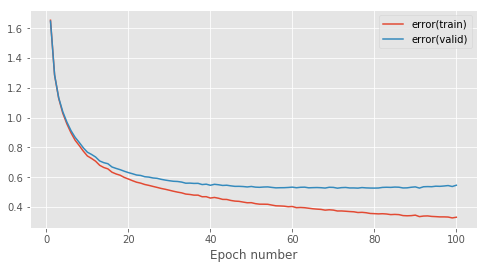

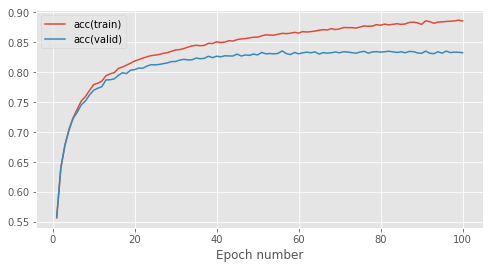

Epoch 1: 10.7s to complete
    error(train)=2.40e+00, acc(train)=4.10e-01, error(valid)=2.40e+00, acc(valid)=4.08e-01


Epoch 2: 6.6s to complete
    error(train)=1.62e+00, acc(train)=5.69e-01, error(valid)=1.62e+00, acc(valid)=5.69e-01


Epoch 3: 6.1s to complete
    error(train)=1.37e+00, acc(train)=6.24e-01, error(valid)=1.38e+00, acc(valid)=6.21e-01


Epoch 4: 6.2s to complete
    error(train)=1.25e+00, acc(train)=6.51e-01, error(valid)=1.25e+00, acc(valid)=6.49e-01


Epoch 5: 8.9s to complete
    error(train)=1.17e+00, acc(train)=6.72e-01, error(valid)=1.17e+00, acc(valid)=6.67e-01


Epoch 6: 5.1s to complete
    error(train)=1.10e+00, acc(train)=6.86e-01, error(valid)=1.11e+00, acc(valid)=6.81e-01


Epoch 7: 6.0s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


Epoch 8: 4.9s to complete
    error(train)=1.00e+00, acc(train)=7.12e-01, error(valid)=1.01e+00, acc(valid)=7.07e-01


Epoch 9: 7.0s to complete
    error(train)=9.62e-01, acc(train)=7.22e-01, error(valid)=9.74e-01, acc(valid)=7.17e-01


Epoch 10: 6.8s to complete
    error(train)=9.27e-01, acc(train)=7.31e-01, error(valid)=9.38e-01, acc(valid)=7.25e-01


Epoch 11: 6.4s to complete
    error(train)=8.96e-01, acc(train)=7.39e-01, error(valid)=9.10e-01, acc(valid)=7.32e-01


Epoch 12: 6.9s to complete
    error(train)=8.69e-01, acc(train)=7.46e-01, error(valid)=8.84e-01, acc(valid)=7.40e-01


Epoch 13: 5.7s to complete
    error(train)=8.43e-01, acc(train)=7.53e-01, error(valid)=8.59e-01, acc(valid)=7.46e-01


Epoch 14: 5.2s to complete
    error(train)=8.21e-01, acc(train)=7.59e-01, error(valid)=8.38e-01, acc(valid)=7.49e-01


Epoch 15: 5.1s to complete
    error(train)=7.99e-01, acc(train)=7.64e-01, error(valid)=8.17e-01, acc(valid)=7.56e-01


Epoch 16: 7.9s to complete
    error(train)=7.81e-01, acc(train)=7.69e-01, error(valid)=8.00e-01, acc(valid)=7.60e-01


Epoch 17: 6.1s to complete
    error(train)=7.62e-01, acc(train)=7.74e-01, error(valid)=7.83e-01, acc(valid)=7.65e-01


Epoch 18: 7.2s to complete
    error(train)=7.52e-01, acc(train)=7.75e-01, error(valid)=7.72e-01, acc(valid)=7.67e-01


Epoch 19: 6.1s to complete
    error(train)=7.32e-01, acc(train)=7.81e-01, error(valid)=7.55e-01, acc(valid)=7.73e-01


Epoch 20: 8.2s to complete
    error(train)=7.19e-01, acc(train)=7.84e-01, error(valid)=7.44e-01, acc(valid)=7.74e-01


Epoch 21: 6.5s to complete
    error(train)=7.06e-01, acc(train)=7.88e-01, error(valid)=7.32e-01, acc(valid)=7.79e-01


Epoch 22: 7.1s to complete
    error(train)=6.99e-01, acc(train)=7.88e-01, error(valid)=7.25e-01, acc(valid)=7.77e-01


Epoch 23: 6.4s to complete
    error(train)=6.86e-01, acc(train)=7.93e-01, error(valid)=7.14e-01, acc(valid)=7.82e-01


Epoch 24: 5.3s to complete
    error(train)=6.76e-01, acc(train)=7.95e-01, error(valid)=7.04e-01, acc(valid)=7.84e-01


Epoch 25: 9.3s to complete
    error(train)=6.68e-01, acc(train)=7.98e-01, error(valid)=6.97e-01, acc(valid)=7.88e-01


Epoch 26: 5.5s to complete
    error(train)=6.55e-01, acc(train)=8.01e-01, error(valid)=6.87e-01, acc(valid)=7.90e-01


Epoch 27: 7.1s to complete
    error(train)=6.48e-01, acc(train)=8.02e-01, error(valid)=6.80e-01, acc(valid)=7.91e-01


Epoch 28: 5.6s to complete
    error(train)=6.39e-01, acc(train)=8.05e-01, error(valid)=6.73e-01, acc(valid)=7.94e-01


Epoch 29: 8.0s to complete
    error(train)=6.29e-01, acc(train)=8.08e-01, error(valid)=6.63e-01, acc(valid)=7.97e-01


Epoch 30: 6.9s to complete
    error(train)=6.26e-01, acc(train)=8.08e-01, error(valid)=6.61e-01, acc(valid)=7.97e-01


Epoch 31: 7.6s to complete
    error(train)=6.16e-01, acc(train)=8.10e-01, error(valid)=6.53e-01, acc(valid)=8.01e-01


Epoch 32: 7.0s to complete
    error(train)=6.11e-01, acc(train)=8.13e-01, error(valid)=6.49e-01, acc(valid)=8.00e-01


Epoch 33: 5.3s to complete
    error(train)=6.02e-01, acc(train)=8.14e-01, error(valid)=6.42e-01, acc(valid)=8.02e-01


Epoch 34: 5.2s to complete
    error(train)=5.98e-01, acc(train)=8.16e-01, error(valid)=6.38e-01, acc(valid)=8.03e-01


Epoch 35: 3.9s to complete
    error(train)=5.90e-01, acc(train)=8.18e-01, error(valid)=6.32e-01, acc(valid)=8.06e-01


Epoch 36: 4.2s to complete
    error(train)=5.85e-01, acc(train)=8.19e-01, error(valid)=6.27e-01, acc(valid)=8.06e-01


Epoch 37: 8.6s to complete
    error(train)=5.82e-01, acc(train)=8.19e-01, error(valid)=6.28e-01, acc(valid)=8.04e-01


Epoch 38: 5.4s to complete
    error(train)=5.77e-01, acc(train)=8.21e-01, error(valid)=6.21e-01, acc(valid)=8.08e-01


Epoch 39: 8.5s to complete
    error(train)=5.69e-01, acc(train)=8.23e-01, error(valid)=6.16e-01, acc(valid)=8.10e-01


Epoch 40: 5.6s to complete
    error(train)=5.64e-01, acc(train)=8.25e-01, error(valid)=6.10e-01, acc(valid)=8.10e-01


Epoch 41: 7.0s to complete
    error(train)=5.59e-01, acc(train)=8.25e-01, error(valid)=6.07e-01, acc(valid)=8.09e-01


Epoch 42: 4.9s to complete
    error(train)=5.54e-01, acc(train)=8.27e-01, error(valid)=6.04e-01, acc(valid)=8.13e-01


Epoch 43: 6.2s to complete
    error(train)=5.50e-01, acc(train)=8.29e-01, error(valid)=6.02e-01, acc(valid)=8.11e-01


Epoch 44: 6.1s to complete
    error(train)=5.47e-01, acc(train)=8.29e-01, error(valid)=5.97e-01, acc(valid)=8.11e-01


Epoch 45: 5.5s to complete
    error(train)=5.41e-01, acc(train)=8.31e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


Epoch 46: 8.0s to complete
    error(train)=5.37e-01, acc(train)=8.32e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


Epoch 47: 9.4s to complete
    error(train)=5.33e-01, acc(train)=8.33e-01, error(valid)=5.88e-01, acc(valid)=8.15e-01


Epoch 48: 7.1s to complete
    error(train)=5.30e-01, acc(train)=8.34e-01, error(valid)=5.86e-01, acc(valid)=8.18e-01


Epoch 49: 5.9s to complete
    error(train)=5.29e-01, acc(train)=8.34e-01, error(valid)=5.87e-01, acc(valid)=8.17e-01


Epoch 50: 4.9s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.82e-01, acc(valid)=8.17e-01


Epoch 51: 5.6s to complete
    error(train)=5.21e-01, acc(train)=8.36e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


Epoch 52: 7.1s to complete
    error(train)=5.16e-01, acc(train)=8.37e-01, error(valid)=5.75e-01, acc(valid)=8.20e-01


Epoch 53: 6.1s to complete
    error(train)=5.15e-01, acc(train)=8.37e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


Epoch 54: 7.4s to complete
    error(train)=5.08e-01, acc(train)=8.39e-01, error(valid)=5.71e-01, acc(valid)=8.22e-01


Epoch 55: 5.9s to complete
    error(train)=5.06e-01, acc(train)=8.40e-01, error(valid)=5.69e-01, acc(valid)=8.22e-01


Epoch 56: 9.3s to complete
    error(train)=5.05e-01, acc(train)=8.39e-01, error(valid)=5.70e-01, acc(valid)=8.22e-01


Epoch 57: 6.3s to complete
    error(train)=5.00e-01, acc(train)=8.41e-01, error(valid)=5.65e-01, acc(valid)=8.22e-01


Epoch 58: 6.7s to complete
    error(train)=4.97e-01, acc(train)=8.43e-01, error(valid)=5.64e-01, acc(valid)=8.23e-01


Epoch 59: 6.9s to complete
    error(train)=4.93e-01, acc(train)=8.44e-01, error(valid)=5.60e-01, acc(valid)=8.24e-01


Epoch 60: 8.6s to complete
    error(train)=4.92e-01, acc(train)=8.43e-01, error(valid)=5.60e-01, acc(valid)=8.25e-01


Epoch 61: 7.2s to complete
    error(train)=4.89e-01, acc(train)=8.43e-01, error(valid)=5.58e-01, acc(valid)=8.25e-01


Epoch 62: 6.6s to complete
    error(train)=4.89e-01, acc(train)=8.43e-01, error(valid)=5.61e-01, acc(valid)=8.22e-01


Epoch 63: 8.9s to complete
    error(train)=4.84e-01, acc(train)=8.46e-01, error(valid)=5.57e-01, acc(valid)=8.25e-01


Epoch 64: 5.9s to complete
    error(train)=4.82e-01, acc(train)=8.46e-01, error(valid)=5.54e-01, acc(valid)=8.24e-01


Epoch 65: 6.3s to complete
    error(train)=4.78e-01, acc(train)=8.47e-01, error(valid)=5.53e-01, acc(valid)=8.28e-01


Epoch 66: 7.5s to complete
    error(train)=4.78e-01, acc(train)=8.46e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


Epoch 67: 6.6s to complete
    error(train)=4.74e-01, acc(train)=8.48e-01, error(valid)=5.51e-01, acc(valid)=8.27e-01


Epoch 68: 9.1s to complete
    error(train)=4.72e-01, acc(train)=8.49e-01, error(valid)=5.49e-01, acc(valid)=8.30e-01


Epoch 69: 9.0s to complete
    error(train)=4.72e-01, acc(train)=8.48e-01, error(valid)=5.50e-01, acc(valid)=8.26e-01


Epoch 70: 8.0s to complete
    error(train)=4.67e-01, acc(train)=8.50e-01, error(valid)=5.48e-01, acc(valid)=8.29e-01


Epoch 71: 6.3s to complete
    error(train)=4.65e-01, acc(train)=8.50e-01, error(valid)=5.47e-01, acc(valid)=8.30e-01


Epoch 72: 5.1s to complete
    error(train)=4.66e-01, acc(train)=8.49e-01, error(valid)=5.48e-01, acc(valid)=8.26e-01


Epoch 73: 5.0s to complete
    error(train)=4.61e-01, acc(train)=8.51e-01, error(valid)=5.44e-01, acc(valid)=8.29e-01


Epoch 74: 9.6s to complete
    error(train)=4.60e-01, acc(train)=8.52e-01, error(valid)=5.43e-01, acc(valid)=8.28e-01


Epoch 75: 9.8s to complete
    error(train)=4.58e-01, acc(train)=8.52e-01, error(valid)=5.45e-01, acc(valid)=8.27e-01


Epoch 76: 8.2s to complete
    error(train)=4.56e-01, acc(train)=8.53e-01, error(valid)=5.42e-01, acc(valid)=8.28e-01


Epoch 77: 9.0s to complete
    error(train)=4.54e-01, acc(train)=8.53e-01, error(valid)=5.43e-01, acc(valid)=8.31e-01


Epoch 78: 6.0s to complete
    error(train)=4.50e-01, acc(train)=8.55e-01, error(valid)=5.40e-01, acc(valid)=8.31e-01


Epoch 79: 8.0s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.38e-01, acc(valid)=8.31e-01


Epoch 80: 4.6s to complete
    error(train)=4.46e-01, acc(train)=8.56e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


Epoch 81: 6.6s to complete
    error(train)=4.46e-01, acc(train)=8.56e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


Epoch 82: 7.0s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=5.37e-01, acc(valid)=8.32e-01


Epoch 83: 7.6s to complete
    error(train)=4.41e-01, acc(train)=8.56e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


Epoch 84: 6.4s to complete
    error(train)=4.40e-01, acc(train)=8.57e-01, error(valid)=5.36e-01, acc(valid)=8.31e-01


Epoch 85: 5.7s to complete
    error(train)=4.36e-01, acc(train)=8.59e-01, error(valid)=5.32e-01, acc(valid)=8.34e-01


Epoch 86: 6.2s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=5.34e-01, acc(valid)=8.30e-01


Epoch 87: 4.4s to complete
    error(train)=4.34e-01, acc(train)=8.59e-01, error(valid)=5.32e-01, acc(valid)=8.34e-01


Epoch 88: 4.7s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.32e-01, acc(valid)=8.32e-01


Epoch 89: 4.5s to complete
    error(train)=4.31e-01, acc(train)=8.59e-01, error(valid)=5.31e-01, acc(valid)=8.33e-01


Epoch 90: 5.7s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


Epoch 91: 7.8s to complete
    error(train)=4.28e-01, acc(train)=8.60e-01, error(valid)=5.32e-01, acc(valid)=8.32e-01


Epoch 92: 4.0s to complete
    error(train)=4.27e-01, acc(train)=8.60e-01, error(valid)=5.30e-01, acc(valid)=8.33e-01


Epoch 93: 3.7s to complete
    error(train)=4.24e-01, acc(train)=8.62e-01, error(valid)=5.28e-01, acc(valid)=8.33e-01


Epoch 94: 6.1s to complete
    error(train)=4.23e-01, acc(train)=8.61e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


Epoch 95: 4.8s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01


Epoch 96: 9.1s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


Epoch 97: 3.6s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


Epoch 98: 3.2s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.29e-01, acc(valid)=8.33e-01


Epoch 99: 3.7s to complete
    error(train)=4.17e-01, acc(train)=8.63e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


Epoch 100: 3.1s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.25e-01, acc(valid)=8.34e-01


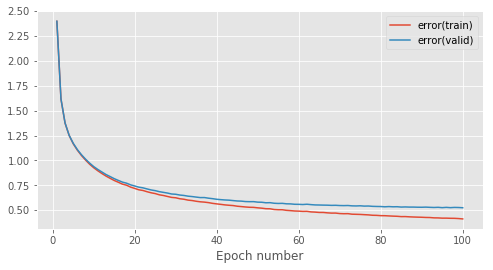

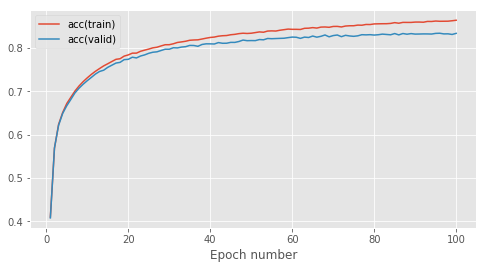

In [30]:
num_epochs = 100
Rmsprop_learning_rates = [0.002, 0.001, 0.0005, 0.00025, 0.0001, 0.00005]
B = [0.9]
Rmsprop_models = OrderedDict()
Rmsprop_stats = OrderedDict()
final_train_errors = []
final_valid_errors = []
final_train_accs = []
final_valid_accs = []


for learning_rate in Rmsprop_learning_rates:
    for beta in B:
        layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
                  ReluLayer(),
                  AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
                  ReluLayer(),
                  AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
                  ReluLayer(),
                  AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]
        
        model = MultipleLayerModel(layers)
        
        learning_rule = RMSPropLearningRule(learning_rate=learning_rate, beta=beta)
        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
                model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
        plt.show()
        
        Rmsprop_models[(learning_rate, beta)] = model
        Rmsprop_stats[(learning_rate, beta)] = stats
        
        final_train_errors.append(stats[-1, keys['error(train)']])
        final_valid_errors.append(stats[-1, keys['error(valid)']])
        final_train_accs.append(stats[-1, keys['acc(train)']])
        final_valid_accs.append(stats[-1, keys['acc(valid)']])

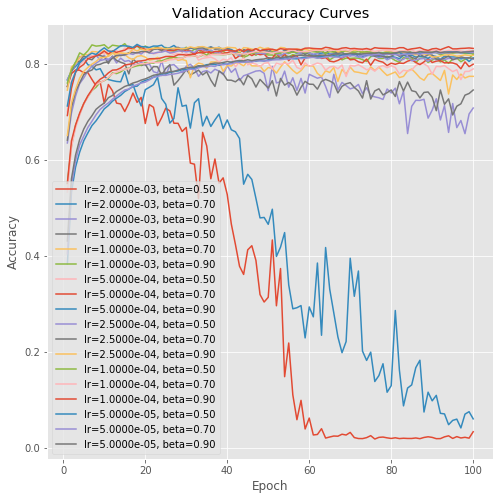

In [28]:
# plot validation acc
plt.figure(figsize=(8,8))

labels = []
for learning_rate in rmsprop_learning_rates:
    for beta in b:
        labels.append('lr={0:.4e}, beta={1:.2f}'
                      .format(learning_rate, beta))
i = 0
for learning_rate in rmsprop_learning_rates:
    for beta in b:
        stats = rmsprop_stats[(learning_rate, beta)]
        plt.plot(np.arange(1, stats.shape[0]) * stats_interval, stats[1:, -1], label=labels[i])
        i += 1
plt.legend(loc=0)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Validation Accuracy Curves')
plt.show()

In [78]:
rmsprop_stats[(0.0002, 0.5)]

KeyError: (0.0002, 0.5)

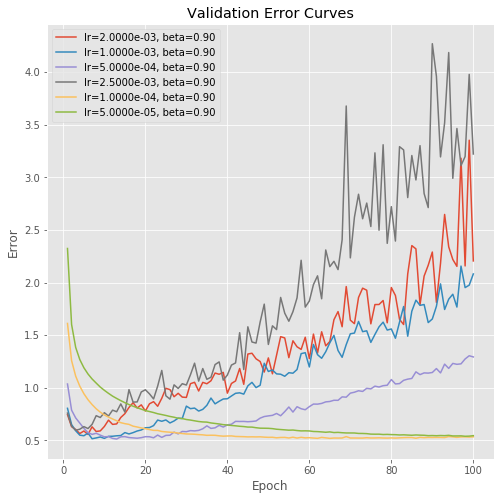

In [89]:
# plot validation error 
plt.figure(figsize=(8,8))

labels = []
for learning_rate in adam_learning_rates:
    for beta in b:
        labels.append('lr={0:.4e}, beta={1:.2f}'
                      .format(learning_rate, beta))
i = 0
for learning_rate in rmsprop_learning_rates:
    for beta in b:
        stats = rmsprop_stats[(learning_rate, beta)]
        plt.plot(np.arange(1, stats.shape[0]) * stats_interval, stats[1:, -2], label=labels[i])
        i+=1
plt.legend(loc=0)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.title('Validation Error Curves')
plt.show()

## SGD

Epoch 1: 1.3s to complete
    error(train)=2.29e+00, acc(train)=4.21e-01, error(valid)=2.29e+00, acc(valid)=4.19e-01


Epoch 2: 1.2s to complete
    error(train)=1.47e+00, acc(train)=5.90e-01, error(valid)=1.47e+00, acc(valid)=5.88e-01


Epoch 3: 1.2s to complete
    error(train)=1.27e+00, acc(train)=6.44e-01, error(valid)=1.27e+00, acc(valid)=6.40e-01


Epoch 4: 1.2s to complete
    error(train)=1.14e+00, acc(train)=6.73e-01, error(valid)=1.15e+00, acc(valid)=6.69e-01


Epoch 5: 1.3s to complete
    error(train)=1.05e+00, acc(train)=6.97e-01, error(valid)=1.06e+00, acc(valid)=6.93e-01


Epoch 6: 1.3s to complete
    error(train)=9.78e-01, acc(train)=7.16e-01, error(valid)=9.91e-01, acc(valid)=7.12e-01


Epoch 7: 1.3s to complete
    error(train)=9.28e-01, acc(train)=7.26e-01, error(valid)=9.41e-01, acc(valid)=7.21e-01


Epoch 8: 1.2s to complete
    error(train)=8.68e-01, acc(train)=7.42e-01, error(valid)=8.85e-01, acc(valid)=7.38e-01


Epoch 9: 1.2s to complete
    error(train)=8.29e-01, acc(train)=7.53e-01, error(valid)=8.47e-01, acc(valid)=7.50e-01


Epoch 10: 1.2s to complete
    error(train)=7.91e-01, acc(train)=7.63e-01, error(valid)=8.12e-01, acc(valid)=7.58e-01


Epoch 11: 1.3s to complete
    error(train)=7.61e-01, acc(train)=7.68e-01, error(valid)=7.82e-01, acc(valid)=7.65e-01


Epoch 12: 1.2s to complete
    error(train)=7.34e-01, acc(train)=7.76e-01, error(valid)=7.58e-01, acc(valid)=7.69e-01


Epoch 13: 1.2s to complete
    error(train)=7.11e-01, acc(train)=7.81e-01, error(valid)=7.38e-01, acc(valid)=7.77e-01


Epoch 14: 1.3s to complete
    error(train)=6.85e-01, acc(train)=7.90e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


Epoch 15: 1.2s to complete
    error(train)=6.69e-01, acc(train)=7.93e-01, error(valid)=6.98e-01, acc(valid)=7.87e-01


Epoch 16: 1.3s to complete
    error(train)=6.51e-01, acc(train)=7.98e-01, error(valid)=6.82e-01, acc(valid)=7.90e-01


Epoch 17: 1.2s to complete
    error(train)=6.33e-01, acc(train)=8.03e-01, error(valid)=6.66e-01, acc(valid)=7.96e-01


Epoch 18: 1.4s to complete
    error(train)=6.22e-01, acc(train)=8.07e-01, error(valid)=6.57e-01, acc(valid)=7.96e-01


Epoch 19: 1.3s to complete
    error(train)=6.13e-01, acc(train)=8.08e-01, error(valid)=6.50e-01, acc(valid)=7.97e-01


Epoch 20: 1.2s to complete
    error(train)=6.02e-01, acc(train)=8.09e-01, error(valid)=6.42e-01, acc(valid)=7.98e-01


Epoch 21: 1.2s to complete
    error(train)=5.94e-01, acc(train)=8.13e-01, error(valid)=6.32e-01, acc(valid)=8.03e-01


Epoch 22: 1.2s to complete
    error(train)=5.77e-01, acc(train)=8.15e-01, error(valid)=6.20e-01, acc(valid)=8.03e-01


Epoch 23: 1.2s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=6.08e-01, acc(valid)=8.07e-01


Epoch 24: 1.2s to complete
    error(train)=5.57e-01, acc(train)=8.22e-01, error(valid)=6.04e-01, acc(valid)=8.08e-01


Epoch 25: 1.2s to complete
    error(train)=5.45e-01, acc(train)=8.26e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


Epoch 26: 1.2s to complete
    error(train)=5.41e-01, acc(train)=8.27e-01, error(valid)=5.91e-01, acc(valid)=8.13e-01


Epoch 27: 1.2s to complete
    error(train)=5.34e-01, acc(train)=8.29e-01, error(valid)=5.87e-01, acc(valid)=8.15e-01


Epoch 28: 1.2s to complete
    error(train)=5.26e-01, acc(train)=8.30e-01, error(valid)=5.82e-01, acc(valid)=8.14e-01


Epoch 29: 1.2s to complete
    error(train)=5.26e-01, acc(train)=8.31e-01, error(valid)=5.81e-01, acc(valid)=8.14e-01


Epoch 30: 1.2s to complete
    error(train)=5.09e-01, acc(train)=8.36e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


Epoch 31: 1.2s to complete
    error(train)=5.06e-01, acc(train)=8.35e-01, error(valid)=5.65e-01, acc(valid)=8.20e-01


Epoch 32: 1.4s to complete
    error(train)=4.97e-01, acc(train)=8.39e-01, error(valid)=5.59e-01, acc(valid)=8.24e-01


Epoch 33: 1.3s to complete
    error(train)=4.98e-01, acc(train)=8.37e-01, error(valid)=5.61e-01, acc(valid)=8.22e-01


Epoch 34: 1.2s to complete
    error(train)=4.90e-01, acc(train)=8.41e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


Epoch 35: 1.2s to complete
    error(train)=4.84e-01, acc(train)=8.41e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 36: 1.3s to complete
    error(train)=4.74e-01, acc(train)=8.45e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


Epoch 37: 1.2s to complete
    error(train)=4.75e-01, acc(train)=8.44e-01, error(valid)=5.47e-01, acc(valid)=8.27e-01


Epoch 38: 1.2s to complete
    error(train)=4.72e-01, acc(train)=8.43e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 39: 1.3s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


Epoch 40: 1.2s to complete
    error(train)=4.62e-01, acc(train)=8.48e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


Epoch 41: 1.3s to complete
    error(train)=4.58e-01, acc(train)=8.49e-01, error(valid)=5.40e-01, acc(valid)=8.31e-01


Epoch 42: 1.3s to complete
    error(train)=4.54e-01, acc(train)=8.51e-01, error(valid)=5.34e-01, acc(valid)=8.31e-01


Epoch 43: 1.3s to complete
    error(train)=4.46e-01, acc(train)=8.52e-01, error(valid)=5.28e-01, acc(valid)=8.32e-01


Epoch 44: 1.3s to complete
    error(train)=4.46e-01, acc(train)=8.50e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


Epoch 45: 1.3s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


Epoch 46: 1.3s to complete
    error(train)=4.32e-01, acc(train)=8.57e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


Epoch 47: 1.5s to complete
    error(train)=4.35e-01, acc(train)=8.54e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


Epoch 48: 1.3s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


Epoch 49: 1.3s to complete
    error(train)=4.22e-01, acc(train)=8.59e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


Epoch 50: 1.2s to complete
    error(train)=4.26e-01, acc(train)=8.57e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


Epoch 51: 1.2s to complete
    error(train)=4.28e-01, acc(train)=8.57e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


Epoch 52: 1.3s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


Epoch 53: 1.3s to complete
    error(train)=4.18e-01, acc(train)=8.58e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


Epoch 54: 1.2s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01


Epoch 55: 1.5s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 56: 1.3s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


Epoch 57: 1.2s to complete
    error(train)=4.05e-01, acc(train)=8.63e-01, error(valid)=5.14e-01, acc(valid)=8.34e-01


Epoch 58: 1.3s to complete
    error(train)=3.98e-01, acc(train)=8.65e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


Epoch 59: 1.2s to complete
    error(train)=4.04e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 60: 1.2s to complete
    error(train)=3.99e-01, acc(train)=8.65e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 61: 1.4s to complete
    error(train)=3.99e-01, acc(train)=8.64e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 62: 1.3s to complete
    error(train)=3.92e-01, acc(train)=8.68e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


Epoch 63: 1.3s to complete
    error(train)=3.87e-01, acc(train)=8.69e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 64: 1.4s to complete
    error(train)=3.93e-01, acc(train)=8.65e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


Epoch 65: 1.2s to complete
    error(train)=3.92e-01, acc(train)=8.65e-01, error(valid)=5.18e-01, acc(valid)=8.33e-01


Epoch 66: 1.3s to complete
    error(train)=3.76e-01, acc(train)=8.72e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 67: 1.2s to complete
    error(train)=3.80e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


Epoch 68: 1.3s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


Epoch 69: 1.3s to complete
    error(train)=3.75e-01, acc(train)=8.73e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


Epoch 70: 1.2s to complete
    error(train)=3.80e-01, acc(train)=8.69e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 71: 1.3s to complete
    error(train)=3.70e-01, acc(train)=8.73e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


Epoch 72: 1.4s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


Epoch 73: 1.2s to complete
    error(train)=3.64e-01, acc(train)=8.75e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


Epoch 74: 1.3s to complete
    error(train)=3.63e-01, acc(train)=8.76e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 75: 1.3s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=4.98e-01, acc(valid)=8.41e-01


Epoch 76: 1.3s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 77: 1.4s to complete
    error(train)=3.58e-01, acc(train)=8.77e-01, error(valid)=5.02e-01, acc(valid)=8.41e-01


Epoch 78: 1.4s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


Epoch 79: 1.3s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 80: 1.3s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


Epoch 81: 1.3s to complete
    error(train)=3.49e-01, acc(train)=8.80e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


Epoch 82: 1.3s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


Epoch 83: 1.3s to complete
    error(train)=3.49e-01, acc(train)=8.80e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


Epoch 84: 1.3s to complete
    error(train)=3.44e-01, acc(train)=8.80e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


Epoch 85: 1.5s to complete
    error(train)=3.47e-01, acc(train)=8.81e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 86: 1.3s to complete
    error(train)=3.44e-01, acc(train)=8.81e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


Epoch 87: 1.3s to complete
    error(train)=3.44e-01, acc(train)=8.80e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


Epoch 88: 1.2s to complete
    error(train)=3.43e-01, acc(train)=8.79e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 89: 1.3s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


Epoch 90: 1.3s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 91: 1.2s to complete
    error(train)=3.29e-01, acc(train)=8.85e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


Epoch 92: 1.3s to complete
    error(train)=3.35e-01, acc(train)=8.83e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


Epoch 93: 1.3s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


Epoch 94: 1.3s to complete
    error(train)=3.32e-01, acc(train)=8.83e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 95: 1.3s to complete
    error(train)=3.29e-01, acc(train)=8.84e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


Epoch 96: 1.2s to complete
    error(train)=3.34e-01, acc(train)=8.83e-01, error(valid)=5.13e-01, acc(valid)=8.38e-01


Epoch 97: 1.3s to complete
    error(train)=3.24e-01, acc(train)=8.87e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 98: 1.3s to complete
    error(train)=3.26e-01, acc(train)=8.87e-01, error(valid)=5.05e-01, acc(valid)=8.41e-01


Epoch 99: 1.3s to complete
    error(train)=3.24e-01, acc(train)=8.87e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01


Epoch 100: 1.3s to complete
    error(train)=3.28e-01, acc(train)=8.85e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


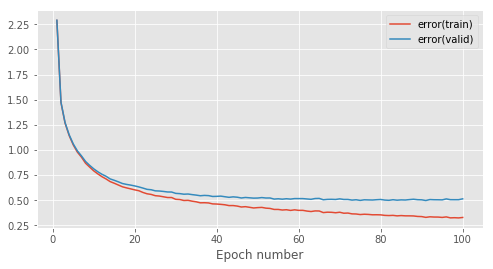

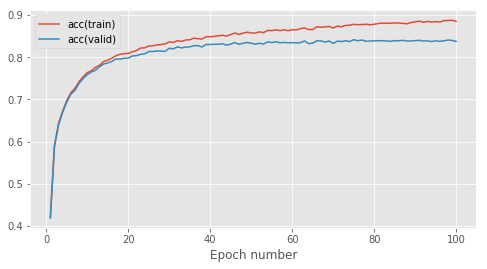

In [8]:
num_epochs = 100
learning_rate = 0.01

layers = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
          ReluLayer(),
          AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]

sgd_model = MultipleLayerModel(layers)
learning_rule = GradientDescentLearningRule(learning_rate)
sgd_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        sgd_model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
plt.show()

### Compare SGD, Adam, RMSProp

In [91]:
Adam_model = list(adam_models.values())[-2]
Adam_stats = list(adam_stats.values())[-2]

In [92]:
RMSProp_model = list(rmsprop_models.values())[-2]
RMSProp_stats = list(rmsprop_stats.values())[-2]

In [94]:
test_accs = []
A = evaluation_acc(test_data, Adam_model)
test_accs.append(A)
R = evaluation_acc(test_data, RMSProp_model)
test_accs.append(R)
S = evaluation_acc(test_data, sgd_model)
test_accs.append(S)

In [97]:
print('| methods | final test acc |')
print('|---------|----------------|')
print('|   Adam  | {0:3f}       |'.format(A))
print('| RMSProp | {0:3f}       |'.format(R))
print('|   SGD   | {0:3f}       |'.format(S))

| methods | final test acc |
|---------|----------------|
|   Adam  | 0.838924       |
| RMSProp | 0.833038       |
|   SGD   | 0.837785       |


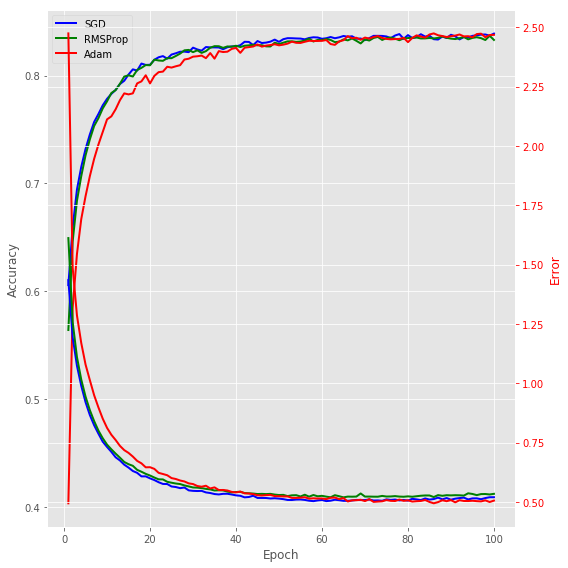

In [102]:
fig, ax1 = plt.subplots(figsize=(8, 8))
labels = ['SGD', 'RMSProp', 'Adam']
models = [Adam_model, RMSProp_model, sgd_model]
stats = [Adam_stats, RMSProp_stats, sgd_stats]
cs = ['b', 'g', 'r']
for k, model, stat, c in zip(labels, models, stats, cs):
    ax1.plot(np.arange(1, stat.shape[0]), stat[1:, -1], label=k, linewidth=2, c=c)
ax1.set_xlabel('Epoch')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Accuracy')  #, color='b')
# ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
for k, model, stat, c in zip(labels, models, stats, cs):
    ax2.plot(np.arange(1, stat.shape[0]), stat[1:, -2], label=k, linewidth=2, c=c)
ax2.set_ylabel('Error', color='r')
ax2.tick_params('y', colors='r')

ax1.legend(loc=0)
fig.tight_layout()
plt.show()